# EDA on Women's Clothing Review Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import pandas_profiling
%matplotlib inline
import nltk
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [3]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv", index_col=0)
df.head()

Clothing ID  Age                    Title  \
0          767   33                      NaN   
1         1080   34                      NaN   
2         1077   60  Some major design flaws   
3         1049   50         My favorite buy!   
4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [5]:
df.describe()

Clothing ID           Age        Rating  Recommended IND  \
count  23486.000000  23486.000000  23486.000000     23486.000000   
mean     918.118709     43.198544      4.196032         0.822362   
std      203.298980     12.279544      1.110031         0.382216   
min        0.000000     18.000000      1.000000         0.000000   
25%      861.000000     34.000000      4.000000         1.000000   
50%      936.000000     41.000000      5.000000         1.000000   
75%     1078.000000     52.000000      5.000000         1.000000   
max     1205.000000     99.000000      5.000000         1.000000   

       Positive Feedback Count  
count             23486.000000  
mean                  2.535936  
std                   5.702202  
min                   0.000000  
25%                   0.000000  
50%                   1.000000  
75%                   3.000000  
max                 122.000000

# EDA - What can you Explore?
- what age gives what type of rating?
- What are recommended in each Division, Class, department of Clothes?
- Which age group gives more comments/ratings on what type of clothes?
- Rating vs Positive feedback count
- Lengthy Reviews for what type of cloth?
- Positive/Negative Reviews for what type of clothes?



## What age group has given what types of Ratings?

Text(0.5,1,'Age Distribution in Data')

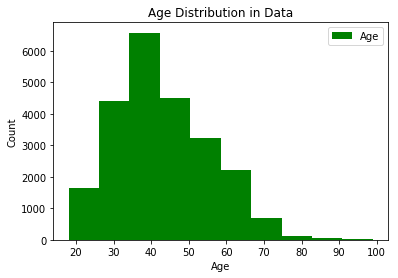

In [6]:
# The age distribution in data
plt.hist(df['Age'], color="green", label = "Age")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution in Data")

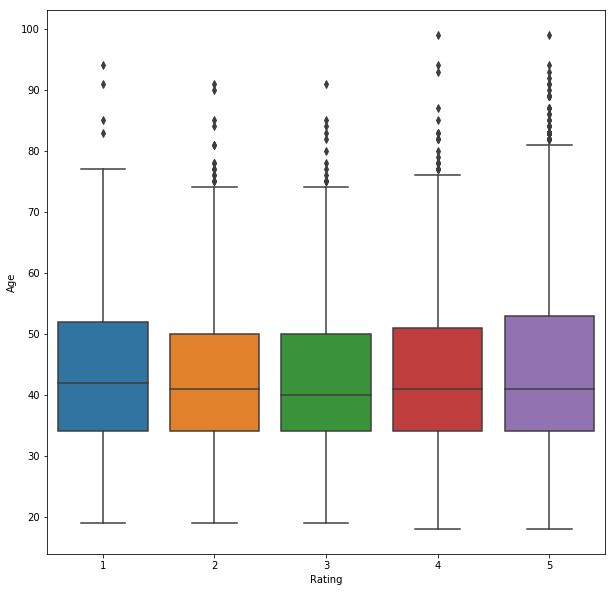

In [7]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'Rating', y = 'Age', data = df)

## What are Recommended Clothes item?

In [8]:
print(df['Division Name'].unique())
print(df['Department Name'].unique())
print(df['Class Name'].unique())

['Initmates' 'General' 'General Petite' nan]
['Intimate' 'Dresses' 'Bottoms' 'Tops' 'Jackets' 'Trend' nan]
['Intimates' 'Dresses' 'Pants' 'Blouses' 'Knits' 'Outerwear' 'Lounge'
 'Sweaters' 'Skirts' 'Fine gauge' 'Sleep' 'Jackets' 'Swim' 'Trend' 'Jeans'
 'Legwear' 'Shorts' 'Layering' 'Casual bottoms' nan 'Chemises']


In [9]:
rd = df[df['Recommended IND'] == 1] # recommended
nrd = df[df['Recommended IND'] == 0] # not recommended
rd.head()

Clothing ID  Age                 Title  \
0          767   33                   NaN   
1         1080   34                   NaN   
3         1049   50      My favorite buy!   
4          847   47      Flattering shirt   
6          858   39  Cagrcoal shimmer fun   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   
6  I aded this in my basket at hte last mintue to...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses  
6                        1  General Petite            Tops      Knits

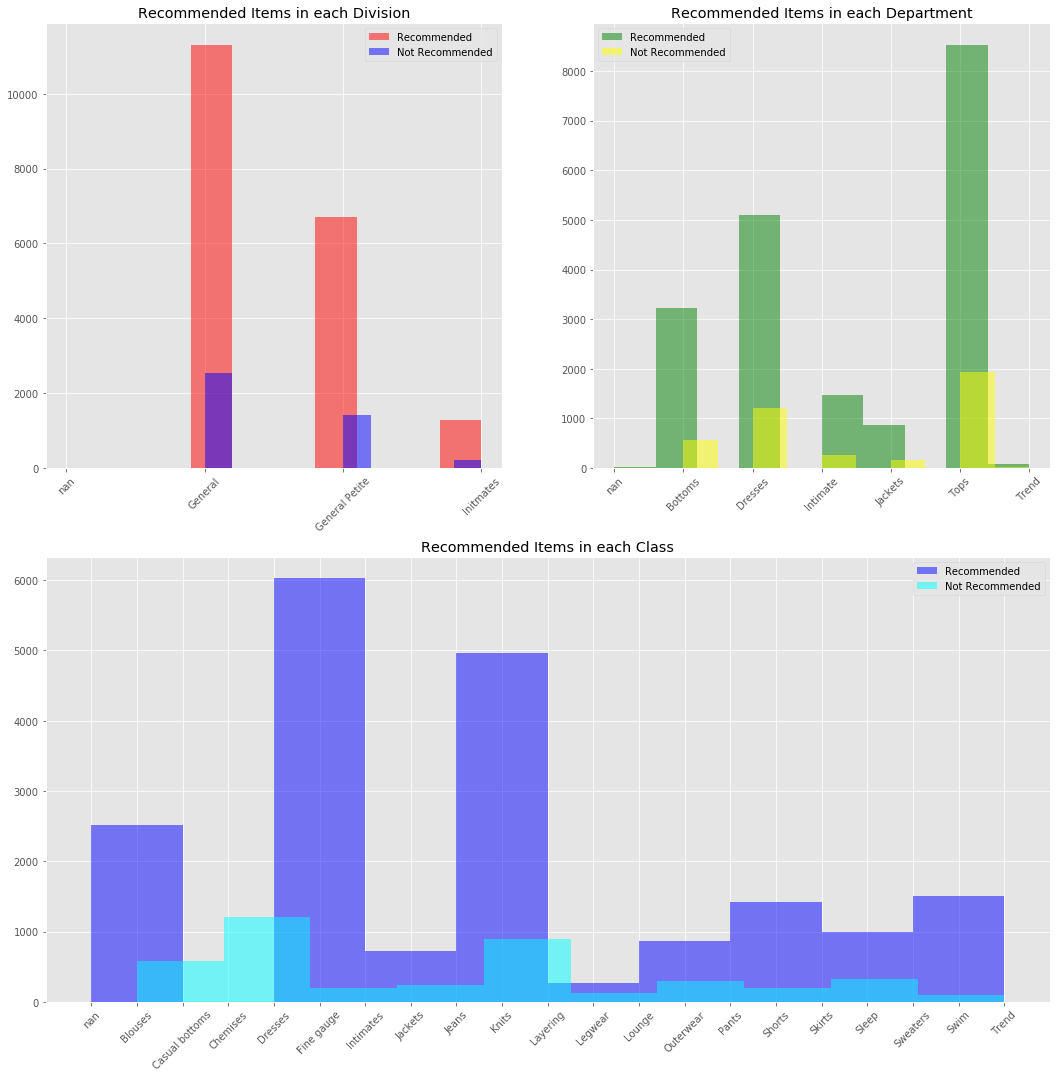

In [10]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(18, 18))
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1 = plt.xticks(rotation=45)
ax1 = plt.hist(rd['Division Name'], color = "red", alpha = 0.5, label = "Recommended")
ax1 = plt.hist(nrd['Division Name'], color = "blue", alpha = 0.5, label = "Not Recommended")
ax1 = plt.title("Recommended Items in each Division")
ax1 = plt.legend()

ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2 = plt.xticks(rotation=45)
ax2 = plt.hist(rd['Department Name'], color="green", alpha = 0.5, label = "Recommended")
ax2 = plt.hist(nrd['Department Name'], color="yellow", alpha = 0.5, label = "Not Recommended")
ax2 = plt.title("Recommended Items in each Department")
ax2 = plt.legend()

ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax3 = plt.xticks(rotation=45)
ax3 = plt.hist(rd['Class Name'], color="blue", alpha = 0.5, label = "Recommended")
ax3 = plt.hist(nrd['Class Name'], color="cyan", alpha = 0.5, label = "Not Recommended")
ax3 = plt.title("Recommended Items in each Class")
ax3 = plt.legend()

# Which age group gives what length of comments on what type of clothes?

In [11]:
df['Review Length'] = df['Review Text'].astype(str).apply(len)
df.head()

Clothing ID  Age                    Title  \
0          767   33                      NaN   
1         1080   34                      NaN   
2         1077   60  Some major design flaws   
3         1049   50         My favorite buy!   
4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  \
0                        0       Initmates        Intimate  Intimates   
1                        4         General         Dresses    Dresses   
2                        0         General         Dresses    Dresses   
3                        0  General Petite         Bottoms      Pants   
4                        6         General            Tops    Blouses   

   Review Length  
0             53  
1            303  
2            500  
3            124  
4            192

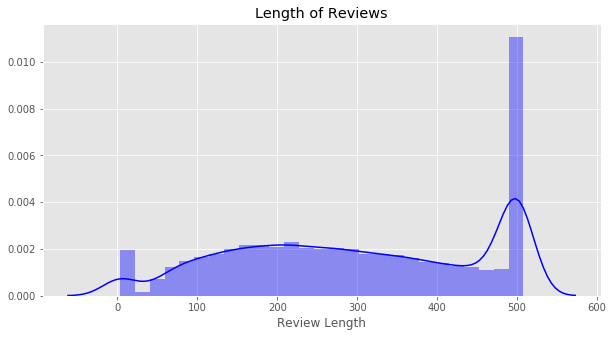

In [12]:
fig = plt.figure(figsize=(10, 5))
#ax1 = plt.hist(df['Review Length'], color = "red", bins = 20)
ax = sns.distplot(df['Review Length'], color="blue")
ax = plt.title("Length of Reviews")

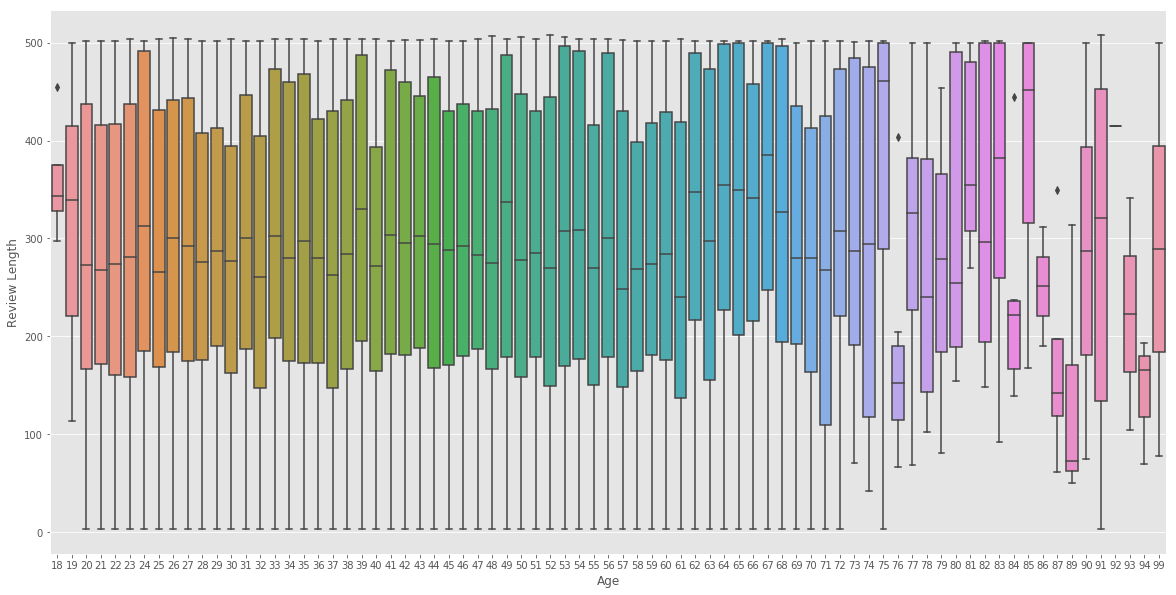

In [13]:
plt.figure(figsize=(20,10))
sns.boxplot(x = 'Age', y = 'Review Length', data = df)

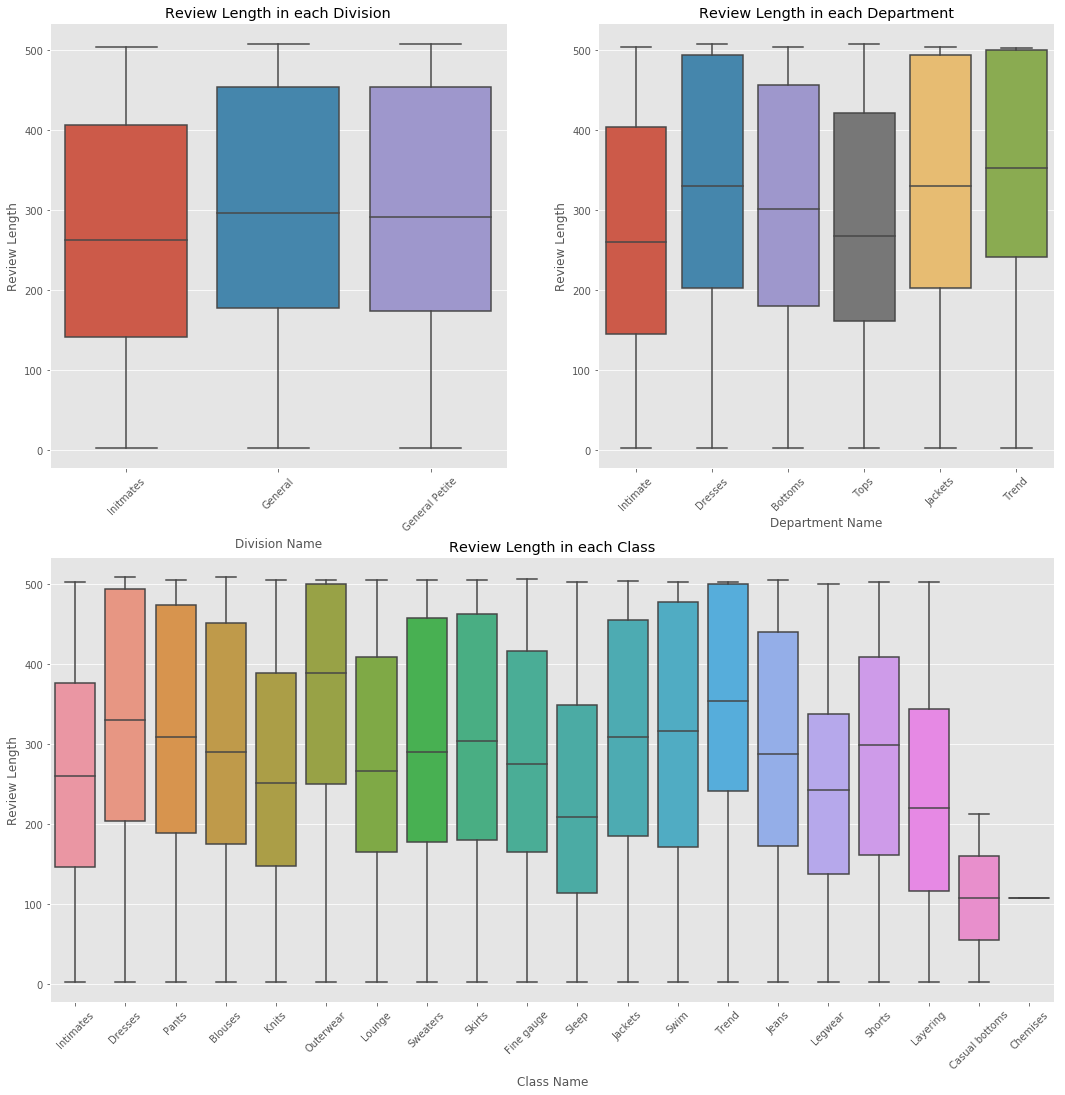

In [14]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(18, 18))
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1 = plt.xticks(rotation=45)
ax1 = sns.boxplot(x = 'Division Name', y = 'Review Length', data = df)
ax1 = plt.title("Review Length in each Division")

ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2 = plt.xticks(rotation=45)
ax2 = sns.boxplot(x = 'Department Name', y = 'Review Length', data = df)
ax2 = plt.title("Review Length in each Department")

ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax3 = plt.xticks(rotation=45)
ax3 = sns.boxplot(x = 'Class Name', y = 'Review Length', data = df)
ax3 = plt.title("Review Length in each Class")

# Ratings vs. Positive Feedback Count

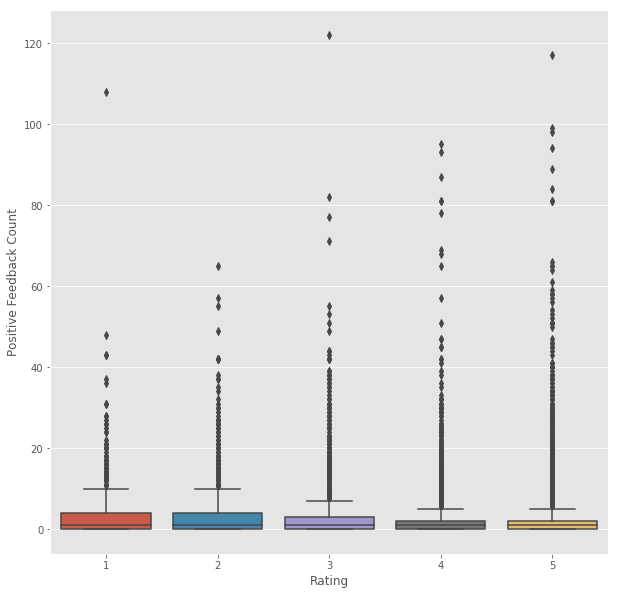

In [15]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'Rating', y = 'Positive Feedback Count', data = df)

# Language Analysis

In [16]:
Reviews = df['Review Text']
print(Reviews.shape)
Reviews[Reviews.isnull()] = "NULL"
Reviews[Reviews.isnull() == True]

(23486,)


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Series([], Name: Review Text, dtype: object)

In [17]:
R_split = []
for i in range(len(Reviews)):
    x = word_tokenize(Reviews[i])
    R_split.append(x)
R_split[3]

['I',
 'love',
 ',',
 'love',
 ',',
 'love',
 'this',
 'jumpsuit',
 '.',
 'it',
 "'s",
 'fun',
 ',',
 'flirty',
 ',',
 'and',
 'fabulous',
 '!',
 'every',
 'time',
 'i',
 'wear',
 'it',
 ',',
 'i',
 'get',
 'nothing',
 'but',
 'great',
 'compliments',
 '!']

In [26]:
R_useful = []
for i in range(len(R_split)):
    useful_words = [word for word in R_split[i] if word not in stopwords.words('english')]
    print(useful_words)
    my_dict = dict([(word, True) for word in useful_words])
    R_useful.append(my_dict)


['Absolutely', 'wonderful', '-', 'silky', 'sexy', 'comfortable']
['Love', 'dress', '!', "'s", 'sooo', 'pretty', '.', 'happened', 'find', 'store', ',', "'m", 'glad', 'bc', 'never', 'would', 'ordered', 'online', 'bc', "'s", 'petite', '.', 'bought', 'petite', "5'8", "''", '.', 'love', 'length', 'me-', 'hits', 'little', 'knee', '.', 'would', 'definitely', 'true', 'midi', 'someone', 'truly', 'petite', '.']
['I', 'high', 'hopes', 'dress', 'really', 'wanted', 'work', '.', 'initially', 'ordered', 'petite', 'small', '(', 'usual', 'size', ')', 'found', 'outrageously', 'small', '.', 'small', 'fact', 'could', 'zip', '!', 'reordered', 'petite', 'medium', ',', 'ok.', 'overall', ',', 'top', 'half', 'comfortable', 'fit', 'nicely', ',', 'bottom', 'half', 'tight', 'layer', 'several', 'somewhat', 'cheap', '(', 'net', ')', 'layers', '.', 'imo', ',', 'major', 'design', 'flaw', 'net', 'layer', 'sewn', 'directly', 'zipper', '-', 'c']
['I', 'love', ',', 'love', ',', 'love', 'jumpsuit', '.', "'s", 'fun', ',', 

['This', 'sweater', 'comfy', 'classic', '-', 'balances', 'quirky', 'hand-knit', 'look', 'beautiful', 'color', 'practical', 'fit', '.', 'bit', 'cropped', 'boxy', 'part', 'style', ',', 'others', 'mentioned', ',', 'gaps', 'knit', 'make', 'see-through', '.', 'opinion', 'makes', 'perfect', 'layering', '!', 'like', 'longer', 'camisole', 'showing', 'underneath', ',', 'wearing', 'little', 'dress', '.', "'s", 'warm', 'still', 'thin', 'enough', 'fit', 'jacket', 'coat', '.']
['Beautifully', 'made', 'pants', 'trend', 'flared', 'crop', '.', 'much', 'cuter', 'person', '.', 'love', '!']
['I', 'never', 'would', 'given', 'pants', 'second', 'look', 'online', ',', 'person', 'much', 'cuter', '!', 'stripes', 'brighter', 'fit', 'flattering', '.', 'crop', 'cute', 'flare', 'right', 'trend', '.', 'brand', 'always', 'run', 'small', ',', "5'8", '140lbs', 'carry', 'chubbiness', 'belly', '.', 'paired', 'collarless', 'loose', 'navy', 'blazer']
['These', 'pants', 'even', 'better', 'person', '.', 'downside', 'need', 

['This', 'dress', 'simply', 'beautiful', 'stunning', '.', 'figure', 'flattering', 'ca', "n't", 'wait', 'wear', '.', 'size', 'small', 'worked', ',', 'since', "'m", 'tall', 'fell', 'right', 'ankle', 'perfect', '.', 'could', 'happier', 'purchase', 'keyhole', 'back', 'beautiful', 'detail', '.']
['3', 'tags', 'sewn', ',', '2', 'small', '(', '1', "''", 'long', ')', '1', 'huge', '(', '2', "''", 'x', '3', "''", ')', '.', 'itchy', 'cut', '.', 'thread', 'left', 'behind', 'plasticy', 'even', 'itchy', '!', 'make', 'intimates', 'item', 'itchy', 'tags', '?', 'comfortable', '!', 'also', '-', 'love', 'bralettes', 'wear', 'time', 'including', 'work', '.', 'b', 'cup', '.', 'however', ',', 'one', 'thin', 'flimsy', 'gives', 'support', 'even', 'b', 'cup', '-', 'would', 'lounging', 'bralette', '-', "n't", 'itchy', '!']
['I', 'recently', 'got', 'sale', 'looking', 'forever', 'wish', 'list', '.', "'m", 'happy', '.', 'comfortable', 'long', 'enough', 'torso', '(', "5'3", ')', '.', 'pattern', 'front', 'flattering

['I', 'tried', 'sale', 'section', ',', '2', '(', 'usually', '0', ')', ',', 'surprisingly', ',', 'size', 'right', 'fit', '.', 'fitted', ',', 'enough', 'room', 'eat', ':', '-', ')', 'te', 'blue', 'light', 'blue', ',', 'almost', 'neutral', ',', 'white', 'embroidery', ',', 'think', 'looked', 'stylish', ',', 'decided', 'keep', '.', 'peplum', 'part', 'hit', 'right', 'spot', ',', 'short', '(', 'petite', ')', 'torso', 'normal', 'size', '...']
['I', 'debated', 'n', 'think', 'looks', 'loose', 'model', ',', 'tighten', ',', 'looks', 'lot', 'flattering', '...', 'tried', 'xs', 'store', '(', 'usually', 'decide', 'need', 'petite', ')', ',', 'looked', 'huge', ',', 'pinched', 'back', 'see', 'xxs', 'would', 'work', ',', 'lot', 'fabric', ',', 'looser', "n't", 'look', 'good', '...', 'like', 'dress', 'overall', ',', 'still', 'recommend', '.', 'like', 'looser', 'look', ',', 'great', '.', 'would', ',', 'however', ',', 'order', 'eptite', "5'1.5", "''", '.', '(', '115', 'lbs', ',', '03', 'dd', 'che']
['Really',

['The', 'color', 'perfect', 'fall', 'winter', '.', 'inside', 'collar', 'photo', 'shows', 'subtle', 'plaid', 'lining', '.', 'lining', 'unexpected', 'bonus', ',', 'adds', 'even', 'dimension', 'shirt', 'sleeves', 'turned', '.', 'fit', 'true', 'size', "'stressed", "'", 'velvet', 'fabric', 'current', 'season', '.', "'m", 'going', 'enjoy', 'wearing', 'shirt', '.']
['The', 'perfect', 'striped', 't-shirt', ',', 'cute', 'little', 'buttons', 'front', 'wonderful', 'accent', 'one', 'different', '.', 'love', '!']
['Great', 'look', 'wear', 'vest', 'almost', 'everything', '.', 'normally', 'wear', 'small', 'mediums', 'fit', 'fine', '(', 'like', 'tied', ')', '.', 'stay', 'closet', 'year', 'round', '.', 'look', 'like', 'wrinkle', 'easily', "n't", 'bother', '.', 'must', 'buy', '!']
['This', 'great', 'pull', 'dress', 'easily', 'dressed', 'wear', 'work', ',', 'bbq', ',', 'happy', 'hour', '.', 'large', 'chest', 'sometimes', 'makes', 'fit', 'look', 'like', 'tent', 'fabric', 'drapes', 'nicely', '.', 'thing', 

['I', 'purchased', 'skirt', 'retailer', 'store', 'texas', '.', 'fell', 'love', 'since', 'saw', '.', 'fabric', 'nice', 'colors', 'pretty', 'cheerful', 'spring/summer', '!', '!', 'pockets', 'sides', '!', "n't", 'love', 'pockets', '?', 'practical', 'lightweight']
['This', 'pretty', 'skirt', 'colors', 'better', 'real', 'life', '.', 'sizing', 'mostly', 'true', 'size', ',', 'slightly', 'tight', 'waist', 'thicker', 'waist', 'compared', 'hips', '.', "'m", "5'7", '138', '#', 'ordered', 'size', '4', '(', 'usually', 'size', '6', 'retailer', 'pencil', 'skirts', '.', ')', '6', 'probably', 'would', 'fit', 'well', ',', 'especially', 'waist', "n't", 'want', 'big', 'hips', '.', 'length', 'perfect', ',', 'knees', '.']
['This', 'skirt', 'wonderful', '!', 'price', 'point', 'seems', 'bit', 'high', 'average', 'office', 'gal', ',', 'quality', 'impeccable', '.', 'really', 'enjoy', 'looking', 'mirror', 'wearing', 'skirt', '.', 'dressed', ',', 'dressed', ',', 'worn', 'seasons', '.', 'design/pattern', 'artsy', '

['I', 'love', 'sweater', '!', '!', 'like', 'sweaters', 'narrow', 'top', 'taper', "n't", 'look', 'like', 'sack', '.', 'plus', ',', 'perfect', 'weight', '.', 'wish', 'would', 'bought', 'one', 'different', 'color', 'comfortable', '.']
['The', 'colors', 'vivid', 'perfectly', 'autumnal', 'fit', 'mess', '.', 'overall', 'large', ',', 'waistline', 'curves', 'front', 'falls', 'small', 'pleats', 'maternityish', ',', 'waistband', 'thicker', 'dress', 'sat', 'away', 'body', 'material', 'cheapish', 'poly', '.', 'outer', 'dress', 'made', 'material', 'lining', ',', 'would', 'liked', 'better', '.', 'modesty', 'closure', 'plus', 'dress', 'already', 'unraveling', 'took', '.', '#', 'returned']
['Love', 'tunic', '!', 'curvy', 'gal', '(', 'extra', "'curves", "'", 'middle', ')', 'perfect', 'top', 'accentuating', 'good', 'masking', 'negative', '.', 'purchased', 'pink', 'color', 'gorgeous', 'peachy-', 'pink', ',', 'much', 'deeper', 'color', 'portrayed', 'picture', '.', 'found', 'true', 'size', '.', 'typically'

['Gorgeous', 'top', ',', 'nice', '.', 'detail', 'work', ',', 'soft', 'flattering', '.', "n't", 'think', 'full', 'bottom', '-', 'mine', 'loose', 'pretty', 'straight', 'silhouette', '.', 'word', 'warning', ':', 'soft', 'pink', 'pink', 'peach', 'pink', '-', 'definitely', 'color', '.', 'peach', "n't", 'flattering', ',', 'heed', 'reviewers', 'comments', 'weighing', 'correctly', '!', 'either', 'return', 'white', 'dye', 'fabric', 'flattering', 'shade', ',', 'bummer', 'thought', 'reviewers', 'might']
['Love', 'fabric', 'shirt', 'even', 'though', 'thinner', 'expected', '.', 'soft', 'skin', 'flattering', '.', 'however', 'returned', 'made', 'women', 'long', 'torso', 'shorter', 'shoulders', '.']
['I', 'already', 'worn', 'several', 'times', '.', 'flattering', ',', 'lightweight', ',', 'easy', 'wear', '.', 'dressy', 'also', 'soft', 'comfortable', '.']
['Very', 'pretty', 'fabric', 'beautiful', 'color', ',', 'agree', 'reviewer', ',', 'fit', 'bit', 'strange', '.', 'waist', 'small', '-', 'need', 'size', 

['I', 'got', 'small', 'mauve', '.', 'fit', 'great', 'length', 'perfect', ',', 'inches', 'knees', '.', 'cute', 'cozy', '!', 'aske', '!', '?']
['I', 'similar', 'pair', 'capris', 'retailer', 'ordered', 'thought', 'different', 'color', '.', 'less', 'flattering', 'may', 'keep', '.']
['Fun', 'detail', 'beading', 'lace', '!', 'arms', 'little', 'longer', 'body', 'sweatshirt', 'little', 'shorter', 'expected', ',', "'s", 'style', 'piece', '.', 'fit', 'tts', 'proportions', 'mind', '.', 'ladies', 'store', 'said', 'ordered', 'size', ',', 'might', 'little', 'longer', 'body', ',', 'arms', 'shoulders', 'would', 'biggest', 'change', '.', 'material', "n't", 'thick', ',', "'s", 'nice', 'lighter', 'layer', 'fall/spring', '.', 'really', 'love', '!']
['I', 'love', 'style', 'top', ',', 'longer', 'length', 'would', 'great', 'leggings', 'fitted', 'shorts', '.', "'s", 'somewhat', 'fitted', 'top', 'yet', "'s", 'a-line', 'shape', 'gives', 'full', 'swing', 'bottom', '.', 'ruffled', 'v-neckline', 'pretty', ',', 'li

['Love', 'look', 'quality', 'jacket', '.', '&', 'amp', ';', '#', '39', ';', 'say', 'fits', 'true', 'size', 'way', 'short', '(', '&', 'amp', ';', '#', '39', ';', '6', '&', 'amp', ';', '#', '39', ';', 'tall', ')', '.', 'wish', 'came', 'tall', 'sizes', '!']
['I', 'really', 'love', 'front', 'shirt', '.', 'however', ',', 'back', 'shirt', 'jersey', 'material', "n't", 'seem', 'match', 'front', 'shirt', '.', 'still', 'wear', 'looks', 'cute', ',', 'threw', 'bit', 'first', '.']
['Absolutely', 'love', 'dress', '!', 'fits', 'true', 'size', 'makes', 'anyone', 'look', 'fabulous']
['I', 'liked', 'color', 'top', "n't", 'really', 'like', 'ruffled', 'stitching', 'around', 'middle', '.', 'looks', 'like', 'someone', 'tacked', 'bottom', 'half', '.', 'bought', 'daughter', 'likes', '.', 'think', 'comfortable', 'good', 'top', 'knock', 'around', '.']
['Per', 'reviewers', ',', 'sized', 'small', 'medium', 'jacket', 'fits', 'right', 'room', 'layers', '.', 'short', '(', 'cropped', ')', ',', 'like', 'hits', 'versat

['I', 'lost', 'favorite', 'denim', 'jacket', 'trip', 'years', 'ago', "n't", 'found', 'one', 'really', 'liked', '...', '.', 'great', 'quality', '-', 'heavy', 'enough', 'heavy', ',', 'stretchy', 'enough', 'stretchy', ',', 'great', 'color/design', '.', 'complaints', '.', 'read', 'reviews', 'happy', 'ordered', 'one', 'size', 'larger', 'normal', '.', 'typically', 'take', 'small', 'medium', 'perfect', '.', 'possible', 'actually', 'like', 'jacket', 'better', 'one', 'lost', 'several', 'years', 'ago', ',', 'big', 'endo']
['Beautiful', 'colors', 'silhouette', '(', 'got', 'navy', ')', '.', 'skirt', 'lined', 'flows', 'wonderfully', 'walk', '.', "'ve", 'gotten', 'ton', 'compliments', '.', "'m", "5'9", "''", 'high', 'hem', 'falls', 'inches', 'knee', ',', 'low', 'hem', 'falls', 'ankles', '.']
['I', 'love', 'culottes', 'think', 'everywhere', 'coming', 'spring', '/', 'summer', '.', 'high', 'waist', 'perfect', 'looks', 'great', 'shorter', 'shirts', 'tucked-in', '.', 'denim', 'high', 'quality', 'nice', '

['I', "n't", 'think', 'anything', 'top', 'online', '(', 'really', "n't", 'care', 'styled', ')', 'store', 'interesting', '.', "'m", 'currently', 'anywhere', '2-4-6', '/', 'xs-s-m', ',', 'depending', 'style', ',', "5'3", "''", '120lb', '34b', '.', 'size', '2', 'regular', 'top', 'fit', 'perfectly', '.', 'reason', ',', ',', 'sleeves', 'elongating', 'flattering', '(', 'closer', 'elbow', ')', 'overall', 'length', 'hit', 'perfectly', 'hip', 'like', 'model', ',', 'fabric', 'lightweight', 'therefore', 'slightly', 'sheer', ',', 'due', 'color', 'p']
['Nice', 'fabric', 'cute', 'design', '.', 'little', 'low', 'cut', '.']
['I', 'absolutely', 'love', 'sweater', '!', '!', "'s", 'soft', ',', 'easy', 'wash', ',', 'looks', 'great', '!']
['The', 'blue', 'motif', 'gorgeous', 'indigo', 'interesting', 'pattern', '.', 'short', 'tunic', 'drapes', 'nicely', 'flattering', '.', 'happy', 'purchase', '.', 'plan', 'buy', '2nd', 'mom', 'keep', 'cool', 'stylish', '.']
['I', 'high', 'hopes', 'top', '.', 'really', 'boxy

['The', 'fabric', 'nothing', 'special', '(', 'usually', 'like', 'cotton/silk', 'blend', 'woven', 'fabric', ',', 'stiff', 'feeling', ')', 'pattern', 'cute', '.', 'made', 'return', 'fact', '1', ')', 'rose', 'gold', 'glitter', 'dots', 'puffy', 'paint', '.', 'literally', '.', 'puffy', '.', 'paint', '.', '2', ')', 'dots', 'quite', 'dry', 'top', 'arrived', '.', 'parts', 'paint', 'came', 'fingers', 'top', 'stuck', '.', 'could', 'barely', 'unfold', '.', "'m", 'sure', 'could', 'cute', ',', 'wants', 'top', 'looks', 'lik']
['Tts', '.', "'m", 'wearing', 'small', '.', 'black', 'goes', 'many', 'charlie', 'print', 'pants', '.', 'washed', 'nicely', '.', 'layers', 'flat', 'dry', '.', 'iron', 'shell', 'underneath', '.', 'great', 'casual', 'office', '.']
['This', 'top', 'good', 'quality', 'cute', '.', 'runs', 'large-', "'m", 'usually', 'medium', 'needed', 'small', '.', 'reason', 'returning', 'flares', 'bottom', 'black', 'unflattering', '.', 'makes', 'look', 'wide', 'waist', 'like', "'m", 'wearing', 'mate

['Disappointed', 'quality', 'dress', '.', 'love', 'style', 'especially', 'colors', '.', 'fabric', 'body', 'dress', 'thin', 'poorly', 'made', '.', 'top', 'bodice', 'substantial', '.', 'worth', 'price', 'tag', '$', '148.00', '.', 'dress', 'run', 'short', '.']
['Comfy', 'cozy', 'bit', 'big', 'size', ',', 'even', 'oversized', 'piece', '.', 'order', 'size', ',', 'even', 'want', 'boxier', 'look', '.', 'unsure', 'fabric', 'hold', 'up-but', 'great', 'get', '.']
['This', 'dress', 'expected', '.', 'bottom', 'half', 'wool-like', 'material-looks', 'like', 'someone', 'worn', '.', 'top', 'snags', 'easily', 'must', 'careful', 'wearing', 'jewelry', '.', 'received', 'dress', 'noticed', 'two', 'small', 'holes', 'arms', '.', 'would', "n't", 'paid', 'full', 'price', 'amount', ',', 'sewed', 'holes', 'packed', 'away', 'winter', '.']
['I', 'ordered', 'sweater', 'medium', 'large', '-', 'reordered', 'small', 'fits', 'perfectly', '.', 'love', 'length-', 'hits', 'mid', 'hip', '.', 'a-line', 'straight', 'show', '

['I', 'bought', 'dress', 'cream', 'skirt', 'large', 'flowers', '.', 'wore', 'wedding', 'comfortable', 'pockets', 'cotton', 'top', ',', 'looked', 'good', '.', 'got', 'lot', 'compliments', 'outfit', '.', 'people', 'thought', 'shirt', 'blouse', 'rather', 'dress', '.', 'loved', 'high', 'low', 'skirt', '.', 'sizing', 'accurate', 'dress', 'easy', 'clean', '.']
['I', 'got', 'dress', 'hopes', 'really', 'nice', 'winter', 'formal', 'dress', '.', 'well', 'made', '!', 'lining', "n't", 'line', 'top', 'layer', 'waist', 'puffed', 'uneven', 'places', '.', 'curvy', 'puffy', 'waistline', 'last', 'thing', 'need', '!', 'fabric', 'nice', ',', 'well', 'made', '.', 'recommend', 'dress', '.']
['Soft', ',', 'comfortable', ',', 'stylish', '.', 'eagerly', 'awaited', 'arrival', 'beautiful', 'sweater', 'disappointed', '.', 'sizing', 'accurate', 'perfect', 'fit', 'love', 'feminine', 'detailing', 'shape', 'necklne', '.', 'ribbons', 'add', 'extra', 'touch', 'style', 'sweater', 'casual', 'elegant', 'time', '.', 'versa

['The', 'cut', 'shirt', 'lovely', 'well', 'thought', ',', 'opening', 'arm', 'big', 'like', 'shirts', '.', 'liked', 'material', 'melon/', 'salmon', 'color', 'ordered', 'vibrant', 'person', '.', 'run', 'large', 'wished', 'ordered', 'one', 'size', '.']
["5'6", "''", '113lbs', 'purchased', 'size', 'small', 'rich', 'navy', '.', 'soft', 'comfy', 'like', 'cuffs', 'help', 'pants', 'ride', '(', 'even', 'sleep', ')', '.', 'like', 'fit', 'slim', 'constricting', 'legs', 'yoga', 'pants', '.', 'tested', 'local', 'vinyasa', 'class', 'held', 'without', 'making', 'hot', '(', 'sweat', 'lot', ')', '.', 'biggest', 'complaint', 'fabric', 'pills', 'right', 'packaging', '.', 'actually', 'tag', 'says', 'fabric', 'time', 'continue']
['Great', 'looking', 'jacket', 'attitude', '.', 'color', 'like', 'faded', 'black', 'deep', 'charcoal', 'grey', '.', "'m", 'usually', 'large', 'petite', 'snug', 'chest', '.', 'luckily', "'s", 'knit', 'make', 'work', 'zipping', 'partway', 'leaving', 'top', 'half', 'open', '.']
['Thes

['This', 'one', 'try', 'appreciate', 'lovely', 'unique', 'design', '.', 'unique', ',', 'flowing', ',', 'romantic', 'piece', '.', 'sheer', 'would', 'wear', 'nude', 'camisole', 'underneath', '.', 'normally', 'size', 'small', 'bought', 'size', '2', '(', 'tried', '6', 'store', 'see', 'looked', 'like', ',', 'fell', 'love', 'look', 'retailer', 'associate', 'recommended', 'buy', 'size', '2', ')', '.', 'love', '!']
['I', 'got', 'try', 'today', 'really', 'like', '.', 'fabric', 'normal', 't-shirt', 'kind', 'fabric', '(', 'hoping', 'would', 'kind', 'special', ')', 'v-neck', 'front', 'go', 'ways', 'cleavage', 'showing', '.', 'would', 'feel', 'comfortable', 'wearing', 'as-is', 'outside', 'work', ',', 'would', 'pair', 'cami', 'would', 'going', 'wear', 'work', '.', 'normally', ',', 'huge', 'fan', 'v-neck', 'back', 'drives', 'crazy', 'thanks', 'cami', "'s", 'days', 'often', 'made', '``', 'versatile', "''", 'v']
['A', 'breath', 'fresh', 'air', '.', 'spring', 'flowers', '!', 'easy', 'wear', '.', 'femini

['This', 'blouse', 'pretty', 'well', 'made', '.', 'new', 'favorite', 'dark', 'jeans', 'boots', '.', 'boho', 'lovely', 'blouse', 'feel', 'dressed', 'bit', 'jeans', 'day', '.', 'loose', 'flattering', 'way', '(', 'look', 'like', 'maternity', 'top', ')', '.', 'happy', '!']
['I', 'love', 'layered', 'look', 'jacket', '.', 'got', 'navy', 'matches', 'everything', '.', 'think', "'s", 'little', 'large', 'side', '.', 'ordered', 'small', '.', "'m", "5'2", "''", '130', 'lbs', '.', 'super', 'comfortable', '.', 'inner', 'layer', 'soft', '.', 'wash', ',', 'outside', 'soft', '.', "'ve", 'already', 'worn', 'mine', 'several', 'times', '.', 'happy', '.']
['I', 'really', 'wanted', 'love', 'dress', ',', 'short', '!', "'m", "5'6", "''", "n't", 'consider', 'really', 'tall', ',', 'dress', 'came', 'couple', 'inches', 'lower', 'butt', '!', 'way', 'short', '.', 'husband', 'asked', 'shirt', 'dress', 'haha', '.', 'think', 'would', 'look', 'adorable', 'someone', 'inches', 'shorter', '.', 'someone', 'younger', 'pull'

['This', 'dress', 'looks', 'great', '.', 'gives', 'slender', 'appearance', 'hides', 'lot', "'s", 'easy', 'comfortable', 'wear', '.']
['Overall', ',', 'gorgeous', 'blouse', ';', 'flattering', '.', 'love', 'sleeves', ';', 'unique', 'also', 'flattering', '.', 'love', 'blouse', 'fit-and-flare', 'bust', '.', "'s", 'fitted', 'bust', '(', 'tight', ')', 'drapes', 'a-line', 'style', '.', 'fit', 'blouse', 'truly', 'flattering', 'figure', '.', 'issues', 'inappropriate', 'amounts', 'cleavage', 'showing', 'anything', '.', 'ties', 'weighted', 'end', 'metal', 'tubes', ',', 'really', 'like', 'makes', 'strings', 'drape', 'nicely', '.', 'back', 'drapes', 'beautifully', '.', 'fe']
['Color', 'like', 'photo', 'fit', "n't", 'work', "'re", 'busty']
['NULL']
['I', 'first', 'saw', 'jacket', 'hanging', 'store', "n't", 'look', 'cute', '.', 'saw', 'sale', 'decided', 'try', '.', "'m", 'glad', '!', 'inside', 'gray', 'material', 'soft', '.', 'broad', 'shoulders', 'jacket', 'hinder', 'arms', '.', 'comfortable', '.', 

['I', 'thought', 'looked', 'like', 'belonged', '15', 'year-old', '.', 'almost', 'see', 'styled', 'model', 'looks', 'like', 'ankle', 'socks', '...', '.ready', 'cheerleading', '.', 'reference', 'fits', 'true', 'size', ',', 'short', '.', "5'2", "''", 'tried', 'regular', 'small', '-', 'least', '5', 'inches', 'knee', '.']
['I', 'loved', 'dress', 'saw', '.', 'however', 'fit', 'way', '.', "5'7", "''", '120', 'lbs', 'small', 'way', 'big', 'waist', '.', 'xs', 'arrived', 'sure', 'would', 'perfect', '.', 'unfortunately', 'waist', 'hit', 'way', 'high', ',', 'rib', 'cage', 'dress', 'short', '.', 'petite', 'size', '.', 'disappointed', 'pretty', ',', 'easy', 'dress', 'throw', 'school', '.', 'unfortunately', 'neither', 'size', 'looked', 'right', 'return', '.', 'material', 'also']
['The', 'jacket', 'great', ',', 'quality', 'good', 'fit', ',', 'best', 'part', 'looks', '!']
['So', 'pretty', ',', 'run', 'large', '.', '8-10', ',', 'got', '8', 'big', 'chest', '.', 'return', 'reason', '.', 'busty', 'side', '

['Love', 'dress', '!', 'wore', 'last', 'night', 'early', 'valentine', "'s", 'dinner', '.', 'classy', ',', 'simple', ',', 'gorgeous', '.', "'m", 'size', '2', 'everything', 'always', 'buy', 'size', '4', 'retailer', 'dresses', "'m", 'tall', '(', "5'9", "''", ')', 'broad', 'shoulders', 'long', 'torso', ',', 'sizing', 'dresses', 'works', 'better', 'around', '.', 'also', 'busty', '(', '32b', ')', '.', 'get', '4.', 'dress', 'little', 'awkward', 'first', 'trying', 'hook', 'zip', 'got', 'worked', '.', 'hook', 'right']
['Fits', 'strange', '.', 'odd', 'cut', '.', 'look', 'well', '.']
['This', 'beautiful', 'top', '.', 'extended', 'longer', 'hoped', 'petite', 'size', 'available', ',', 'ended', 'returning', '.', 'beautiful', 'tassels', 'sides', 'make', 'truly', 'unique', '.']
['Love', 'blouse', '!', 'took', 'chance', 'ordering', "n't", 'sure', 'would', 'think', '.', 'blouse', 'fabulous', '!', '!', '!', 'boho-chic', 'flair', 'sophisticated', 'way', '.', "'s", 'one', '``', 'special', "''", 'pieces', '

['The', 'fit', 'pants', 'right', '.', 'curvy', 'hips', 'slender', 'waste', 'legs', '.', 'pants', "n't", 'gap', 'back', ',', 'fitted', 'pants', 'often', '.', 'easy', 'dress', '.', 'color', "n't", 'held', 'well', 'hoped', ',', 'take', 'care', 'laundering', '.']
['Ordered', 'navy', 'aqua', 'medium', '.', 'aqua', 'fit', 'lot', 'tighter', 'navy', 'seemed', 'different', 'fabric', 'less', 'stretchy', '.', 'loved', 'color', 'returning', 'aqua', '.', 'normally', 'wear', 'size', '6']
['Very', 'comfortable', 'fabric', 'fits', 'nicely', '.', "5'10", "''", 'like', 'states', 'model', ',', 'falls', 'shorter', 'viewed', ',', 'still', 'looks', 'nice', '.', 'easy', 'dress', 'use', 'different', 'looks', '.']
['When', 'tried', 'bathing', 'suit', ',', 'decided', 'try', 'others', '.', 'right', '!', 'usually', 'find', 'bathing', 'suit', 'shopping', 'difficult', 'fun', '--', 'never', 'find', 'suitable', 'bathing', 'suit', '.', 'suit', 'looks', 'nice/flattering', ',', 'also', 'move', 'around', 'stays', 'place'

['Like', 'others', ',', 'finally', 'received', 'size', '6p', 'black', 'pants', 'months', 'waiting', '.', 'starters', ',', 'pants', 'run', 'small', ',', 'ordered', 'size', 'still', 'petite', ',', 'adored', 'red', 'ones', 'got', 'past', 'summer', '.', 'black', 'pants', 'arrived', ',', 'full', 'three', 'inches', 'shorter', 'red', 'ones', '(', 'also', '6p', ')', ',', 'fabric', 'feel', 'anywhere', 'close', 'quality', '.', "'m", 'debating', 'ordering', 'regular', 'length', ',', "'m", 'sure', "'ll", 'bother', ',', 'based', 'reviews', '.']
['I', 'searching', 'swimsuit', 'flattered', 'baby', 'bump', '-', "'m", 'love', '!', 'reference', ',', "5'6", "''", ',170-180', ',', '10-12', 'm-l', 'depending', 'item', '.', 'however', ',', "'m", 'currently', '19', 'weeks', 'pregnant', 'im', '185', 'growing', '-', 'went', 'xl', 'swimsuit', '.', '36c/38d', 'bust', 'although', 'true', 'support', 'top', 'suit', ',', 'holds', 'girls', 'deep', 'plunge', 'right', 'amount', 'sexy', '.', 'bottom', 'modest', 'coverag

['This', 'dress', 'gorgeous', ',', 'warn', 'tall', 'ladies', 'fits', 'quite', 'awkwardly', '.', "'m", "5'10", "''", 'tried', 'petite', '(', 'thinking', 'would', 'fall', 'like', 'midi', ')', ',', 'regular', ',', 'hoping', 'would', 'fit', 'like', 'maxi', '.', 'hit', 'awkward', 'spot', 'mid-shin', '...', 'much', 'loved', 'wanted', ',', 'looked', 'weird', 'justify', 'buying', '.']
['Love', 'coral', 'color', '-', 'pretty', 'person', '.', 'slightly', 'lower', 'cut', 'chest', 'expected', '.', 'great', 'top', 'weekends', '!']
['These', 'perfect', 'leggings', '.', "'re", 'soft', ',', "n't", 'stretch', 'droop', 'throughout', 'day', 'wearing', '.', 'ordered', 'grey', 'moss', ',', 'different', 'textures', ',', 'fun', '.']
['NULL']
['This', 'cardigan', 'cute', 'picture', 'really', 'wanted', 'love', "n't", 'seem', 'worth', 'price', '.', 'material', 'kind', 'itchy', "n't", 'huge', 'fan', 'wide', 'edges', 'front', '.', 'colour', 'nice', 'feminine', '.']
['I', 'never', 'buy', 'anything', 'retailer', 'f

['It', 'seldom', 'write', 'review', 'tee', ',', 'receiving', 'jessa', 'tee', 'mail', 'today', ',', 'felt', 'compelled', '!', 'deal', ',', 'tee', 'pricey', 'sure', ',', 'opinion', ',', 'worth', '!', 'another', 'reviewer', 'said', ',', 'cotton', 'fabric', 'hefty', ';', 'fact', ',', 'could', 'also', 'called', '``', 'lightweight', 'sweater', '.', "''", 'everything', 'tee', 'perfect', 'classic', ':', 'elbow', 'sleeves', ',', 'nice', 'neckline', ',', 'semi-boxy', ',', 'semi-cropped', 'fit', '.', 'go', 'everything', 'jeans', ',', 'nice', 'slacks']
['These', 'leggings', 'softest', '.', 'ordered', 'black', 'moss', 'distinct', 'pattern', '.', 'perfect', 'colder', 'climates', 'fit', 'like', 'glove', '.']
['I', 'took', 'sweater', 'recent', 'vacation', 'north', '.', 'wore', '3', 'evenings', 'weather', 'changed', 'hot', 'cool', '.', 'loved', 'feel', 'wrapped', 'warm', 'blanket', '.', 'cocoon', 'cardigan', 'apt', 'name', '.', "n't", 'sure', 'pink', 'exactly', 'pictured', '.', 'become', 'go-to', 'swea

['I', 'purchased', 'store', 'avoid', 'shipping', 'costs', '.', 'local', 'stores', "n't", 'carry', 'xxs', ',', 'mailing', '.', 'usually', 'wear', 'xs', ',', 'roomier', 'cared', 'made', 'look', 'bit', 'sloppy', '.', 'tee', 'distressed', 'looking', 'person', 'online', ',', 'well', '.', 'wish', 'refined', 'neckline', 'feminine', '&', 'interesting', ';', 'would', 'liked', 'ability', 'dress', '.', 'also', ',', 'solid', 'blue', 'coral', 'lighter', 'color', 'appear', 'monitor', '.', 'blue', 'st']
['Very', 'soft', 'comfy', 'tee', '.', 'like', 'interesting', 'neckline', '.', 'wish', 'petite', 'neckline', 'slightly', 'higher', ',', 'sleeves', 'right', 'length', 'great', 'cuffs', '.']
['Ordered', 'xsp', '(', "5'4", "''", '118-120', '#', ',', 'athletic', 'build', ')', '...', 'huge', '.', 'big', 'armholes', ',', 'much', 'fabric', 'hanging', 'skirt', '(', 'cream', 'fabric', ')', 'front', 'back', ',', 'flattering', 'sides', 'long', 'shows', 'model', '.', 'love', 'idea', 'right', 'body', 'type', '(', '

['I', 'floored', 'amount', 'positive', 'reviews', 'dress', '!', 'received', ',', 'looked', 'nothing', 'like', 'model', '.', 'bottom', 'looked', 'like', 'dirty', 'sand', 'completely', 'wrinkled', '.', 'anything', 'c', 'cup', ',', 'top', 'looks', 'completely', 'unflattering', '.', 'looked', 'top', 'heavy', 'dress', '!', 'definitely', 'worth', 'price', '.', 'disappointed', '.']
['Adorable', ',', 'comfortable', 'dress', '.', 'denim', 'super', 'soft', 'bit', 'stretch', '.', 'please', 'advised', 'dress', 'runs', 'large', ',', 'especially', 'hips', '.', 'normally', 'wear', 'size', '12', 'large', 'swimming', '.', 'definitely', 'exchanging', 'smaller', 'size', '.']
['This', "n't", 'work', '.', 'im', 'normally', '(', '8/10', ')', '.', 'got', 'xs', '.', 'correct', 'size', ',', 'believe', '.', 'however', ',', 'armholes', 'huge', '.', 'husband', 'said', 'top', 'dress', 'looked', 'like', 'autobots', 'symbol', 'transformers', 'wanted', 'keep', '.', ',', 'sent', 'back', '.']
['I', 'long', 'waisted', '

['This', 'dress', 'light', ',', 'airy', 'easy', 'comfortable', 'wear', '.', 'love', 'colors', 'pattern', '.', 'looks', 'wonderful', 'without', 'belt', '.', 'sized', '6', '4.', 'position', 'front', 'dress', 'material', 'closer', 'neck', 'flows', 'longer', 'back', '.', 'although', 'size', '6', 'slip', 'fits', 'perfectly', 'size', '4.', 'prefer', 'dress', 'without', 'belt', 'also', 'looks', 'good', 'belt', 'jacket', 'long', 'cardigan', '.', 'dress', 'keeper', '!']
['Very', 'attractive', 'easy', 'wear', '.', 'wore', 'night', 'arrived', 'wore', 'next', 'night', '!', 'love', 'colors', ',', 'pattern', 'design', '.', 'stylish', 'tunic', 'sweater', '.', 'sleeves', 'full', 'length', ',', 'prefer', '.', 'sweater', 'dense', '-', 'weave', 'tight', ',', 'making', 'sweater', 'quite', 'warm', ',', 'warm', '.']
['Great', 'tank', 'wear', 'work', 'night', '.', 'fits', 'true', 'size', '.']
['Stylist', 'local', 'retailer', 'recommended', 'try', 'top', '.', 'soon', 'put', ',', 'amazed', 'pretty', '.', "'m",

['I', 'ordered', 'emerald', 'green', 'sent', 'dime', 'size', 'hole', 'sleeve', '.', 'disappointed', ',', 'love', 'sweater', '.', 'time', 'arrived', ',', 'sold', 'size', '.', ',', 'exchange', 'one', 'damaged', '.', 'sweater', 'damaged', ',', 'would', 'recommend', 'product', '.']
['This', 'pretty', 'sweater', ',', 'bit', 'boxy', 'short', 'cute', '.', "5'1", "''", 'ordered', 'regular', 'xs', 'black', '.', 'thing', 'like', 'sweater', 'gold', 'thread', 'back', 'lace', '.', 'would', 'kept', 'plain', 'black', 'lace', '.', 'like', 'look', '.']
['I', 'obsessed', 'dress', 'moment', 'saw', 'online', 'excited', 'buy', 'company', 'christmas', 'party', '.', "'m", "5'4", "''", ',', '36c', ',', '145lbs', 'ordered', '6.', 'size', 'great', 'whole', 'cut', 'dress', 'completely', '.', 'fairly', 'short', 'torso', 'top', 'portion', 'dress', '(', 'sweater-like', 'material', ')', 'hit', 'far', 'low', 'waist', 'flattering', ';', 'petite', 'may', 'fixed', ',', 'skirt', 'would', "'ve", 'short', '.', 'pleats', 'c

['Love', 'shirt', '!', 'bought', 'light', 'blue', 'color', 'amazing', ',', 'fits', 'well', 'love', 'long', 'back', '.', 'comfortable', 'loose', '.', 'thinking', 'buying', 'pinks', '.']
['Great', 'material', '.', 'bit', 'loose', 'middle', '/', 'lower', 'half', '.', "n't", 'belt', 'well', '.', 'could', '3', "''", 'shorter', ',', 'considering', 'alterations', '.', "'m", "5'7", "''", 'model', "5'10", "''", ',', 'yeah', '3', "''", 'shorter', 'would', 'cute', '!']
['Love', 'cardigan', '.', 'fits', 'expected', '.', 'structured', 'front', 'bit', 'flair', 'back', '.']
['I', 'loved', 'cut', 'pants', 'button', 'accent', 'pockets', '.', 'however', ',', 'material', 'quite', 'thin', 'quality', 'great-', 'multiple', 'snags', 'along', 'seams', '.', 'additionally', ',', "5'8", ',', '130lbs', 'swimming', 'size', '4.', 'would', 'tried', 'sizing', 'quality', 'better', '.']
['This', 'pretty', 'sweater', '.', 'ordered', 'red', 'plum', 'color', ',', 'close', 'red', ',', 'work', 'well', 'black', ',', 'gray', 

['I', 'loved', 'photo', 'dress', '.', 'upon', 'examination', 'dress', '(', 'trying', ')', 'receiving', 'mail', ',', 'dress', 'shown', 'online', 'nothing', 'like', 'dress', 'received', 'save', 'pattern', '.', 'dress', 'received', 'side', 'zip', 'well', 'belt', 'pleats', 'top', '.', 'bottom', 'also', 'cut', 'straight', 'across', 'appears', 'photo', '.', 'turns', 'flattering', 'appear', '.']
['Beautiful', 'pajama', 'bottoms', '.', 'purchased', 'special', 'treat', '.', 'luckily', ',', 'found', 'review', 'another', 'site', ',', 'stating', 'run', 'small', ',', 'pirchasing', '.', 'one', 'wants', 'tight', 'pjs', '.', 'order', 'size', '!', 'also', ',', "'m", "5'8", "''", 'tall', 'length', 'right', '.', 'taller', ',', 'may', 'find', 'style', 'short', '.', "n't", 'ordered', 'top', ',', "'m", 'sure', 'fit', ',', "'m", 'guessing', 'also', 'runs', 'small', ',', 'based', 'photo', '.']
['I', 'bought', 'top', 'usual', 'size', 'small', '.', "'m", '34', '26', 'waist', '.', 'absolutely', 'love', '.', 'pai

['These', 'pants', '100', '%', 'true', 'size', '(', 'whatever', 'means', 'anymore', '...', "'m", '26', 'paige', 'ag', '.', "'m", '5', "''", '6', ',', 'weigh', 'around', '115', ',', 'long', 'legs', 'ordered', '0p', '.', 'zero', 'petite', 'still', 'little', 'long', ',', 'slight', 'heel', "'re", 'perfect', '.', "n't", 'stretch', ',', 'fit', 'fabric', '...', 'material', 'expand', ',', "'re", 'thin', 'breezy', '.', 'absolutely', 'love', '.', 'ca', "n't", 'wait', 'order', 'colors', 'style', '.', 'new', 'favorite', 'pants', '.']
['I', 'ordered', 'skirt', 'online', 'size', '8', 'returned', '10', 'could', 'sit', 'bit', 'lower', '.', 'fabric', 'beautiful', 'bit', 'heavier', 'worn', 'year', 'long', '.', 'glad', 'made', 'purchase', '.']
['The', 'wide', 'leg', 'fun', ',', 'wide', ',', 'long', 'pocket', 'seem', 'shorten', 'leg', 'returned', '.', 'great', 'taller', 'person', '.', 'bottom', '&', 'trim', 'cute']
['Do', "n't", 'pay', 'attention', 'less-than-flattering', 'photo', '.', 'jeans', 'super', '

['I', 'love', 'skirt', '.', 'happy', 'quality', 'fabric', 'style', '.', 'originally', 'ordered', 'small', ',', 'returned', 'exchanged', 'medium', ',', 'fits', 'great', '.', '(', 'typically', 'wear', 'size', '6-8', 'pants', ')', '.', 'look', 'forward', 'wearing', 'skirt', 'work', 'fall', '.']
['After', 'reading', 'reviews', 'placed', 'order', 'top', 'caught', 'eye', 'entire', 'price', 'downs', '.', 'lately', 'usual', 'l/10', 'sizes', 'retailer', 'turn', 'huge', 'ordered', 'size', 'smaller', 'usually', 'wear', '.', 'would', 'ok', 'top', "n't", 'darn', 'short', '.', 'reference', "'m", '6', 'ft', 'tall', ',', '160', 'lb', '.', "'s", 'weird', 'top', 'looks', 'completely', 'opposite', 'model', 'photo', ',', 'loose', 'looking', 'fit', 'longer', 'sleeves', 'looking', 'like', 'stylized', 'sweatshirt']
['Was', 'looking', 'replacement', 'coat', 'saw', 'lovely', '.', 'tried', 'large', 'roomy', 'needed', ',', 'even', 'coat', '.', 'tried', 'petite', 'version', 'found', 'short', 'taste', '.', 'decide

['The', 'colors', 'dress', 'much', 'less', 'vibrant', 'person', '.', 'scoop', 'neckline', 'wide', 'deep', '.', 'know', 'others', 'posted', 'great', 'dress', 'work', ',', 'workplace', '.']
['I', 'adore', 'hooded', 'boiled', 'wool', 'sweatercoat', 'rich', ',', 'deep', 'green', '.', 'quality', 'great', 'aside', 'buttons', 'sawn', 'loosely', '.', "'s", 'great', 'outer', 'layer', 'warm', 'northern', 'california', 'fall/winter', '.', "'m", 'wearing', 'today', 'short', 'sleeved', 'boiled', 'wool', 'dress', 'burgundy', 'pre-christmas', 'eve', 'cocktails', 'feeling', 'classy', ',', 'festive', ',', 'cozy', ',', 'warm', '.']
['Every', 'year', "'m", 'excited', 'weather', 'gets', 'cool', 'enough', 'sweater', 'dresses', '.', 'love', 'one', ',', 'longer', 'length', ',', 'slimming', 'fit', 'pattern', 'placement', ',', 'cozy', 'soft', 'fabric', '.', 'delightful', ',', 'inspires', 'reveries', 'castles', 'legends', '(', 'yes', 'looked', '``', 'eira', "''", 'stands', 'went', ')', '.', 'highly', 'recommend

['I', 'love', 'sweater', 'knit', 'dresses', 'first', 'one', "'ve", 'owned', 'flare', 'style', 'works', '.', 'pattern', 'placement', 'gorgeously', 'done', 'slimming', 'non-obvious', 'way', '.', 'think', 'fabric', 'soft', 'warm', '.', 'wish', 'scoop', 'neckline', 'tad', 'bit', 'higher', 'modesty', 'standpoint', '.', 'may', 'want', 'size', "'re", 'busty', '.', "5'3", "''", 'petite', 'perfect', 'length', '.', 'shout', 'reno', 'distribution', 'center', 'getting', 'amazing', 'dress', '1.5', 'days', '?', '!', '?', '!', '?', '!', '!', '!']
['I', 'wonderful', 'sweater', 'coat', 'three', 'sizes', '(', ',', 'sp', ',', ')', 'coral', ',', 'green']
['Oh', 'goodness', '!', 'received', 'coat', 'tonight', '.', 'love', '!', 'beautiful', 'stylish', '.', 'got', 'green', 'amazing', '.', "'m", "5'2", "''", '-', 'weigh', '115.', 'ordered', 'xs', '.', "'m", 'keeping', '-', 'room', 'case', 'heavier', 'sweater', '.', 'get', '!', "'s", 'classic', '!', 'smile', '!']
['I', "n't", 'sure', 'expect', 'pants', '.', 'c

['Love', 'feminine', 'styling', 'classic', 'tunic', 'tee', '!', "'ll", 'wear', 'black', 'leggings', 'fall', '.', 'super', 'cute', 'wear', 'casually', 'dress', 'bit', 'jewelry', 'and/or', 'scarf', '.']
['This', 'top', 'full', 'amazing', 'details', '.', 'photos', 'really', "n't", 'justice', '.', 'flowy', 'run', 'large', 'pretty', 'soft', 'beautiful', 'shades', 'blue', '.', 'bought', 'small', 'fairly', 'long', 'back', "5'5", "''", 'frame', 'detailing', '...', 'works', '.']
['Unlike', 'first', 'three', 'reviews', ',', 'loved', 'sweater', '.', 'colors', 'beautiful', 'paired', 'green', 'cords', '.', 'find', 'sweater', 'itchy', 'comfortable', '.', 'fits', 'trus', 'size', '.']
['Great', 'fit', 'even', 'busty', 'women', '.', 'ordered', '8', 'usually', 'need', 'room', 'chest', 'area', 'dresses', '.', '(', '36d-dd', ')', 'fit', 'nicely', 'without', 'tight', '.', 'might', 'able', 'size', "n't", 'want', 'risk', 'tight', '.', 'flattering', 'especially', 'curves', '.', 'nice', 'contemporary', 'office

['Wanted', 'love', 'sweater', 'beautiful', 'colors', 'cute', 'graphic', ',', 'fit', 'uncomfortably', 'small', 'itchy', 'yelling', ',', '``', 'get', "''", 'fitting', 'room', '.', 'bummer', '.']
['True', 'size', 'petite', 'person', ';', 'bought', 'blue', '-', 'subtle', 'shading', ',', 'looks', 'great', ';', 'paired', 'blue', 'straight', 'leg', 'blue', '``', 'jeans', "''", ';', 'perfect', 'outfit', 'almost', 'occasions', '.']
['This', 'beautiful', 'sweater', 'deep', 'rich', 'colors', '.', 'purchased', 'blue', 'motif', '.', 'problem', 'model', '(', ')', 'small', 'busted', ',', 'allows', 'side', 'panels', 'front', 'panel', 'lay', 'nicely', 'swing', 'flattering', 'manner', '.', "5'6", "''", ',', '135', 'pounds', '36d', '.', 'usually', 'wear', 'small', 'antro', 'tops', '.', 'purchased', 'online', ',', 'excited', 'upon', "'s", 'arrival', '.', 'tried', ',', 'horrified', '.', 'looked', 'like', 'babydoll', 'maternity', 'sweater', '.', 'front', 'lay', 'well', '(', 'flat', ')', 'chest']
['Spotted',

['I', 'bought', 'taupe', 'ivory', '.', 'beading', 'neck', 'line', ',', 'tie', 'neck', 'pleats', 'make', 'fun', 'shirt', '.', 'bought', 'size', '2', 'normally', 'wear', 'retailer', ',', 'would', 'say', 'true', 'size', '.', 'really', 'like', 'length', 'top', '.', 'hits', 'mid-hip', '.', 'tad', 'shorter', 'sides', 'would', 'like', 'still', 'long', 'enough', 'cover', 'waistline', '.', 'also', 'think', 'arms', 'long', 'kind', 'balloon', 'look', 'wrists', '.', 'bought']
['I', 'saw', 'dress', 'line', 'knew', 'wanted', 'spring/summer', 'season', '.', 'ordered', 'almost', 'immediately', 'glad', '.', 'photo', 'website', "n't", 'justice', ',', 'lot', 'pretty', 'pastel', 'colors', 'paisley', 'pattern', 'ca', "n't", 'see', 'computer', 'screen', '.', 'wrap', 'styling', 'flattering', 'cut', 'figures', 'especially', 'hourglass', 'figures', 'like', 'mine', 'dress', 'fit', "'s", 'tts', '(', 'reference', "5'9", "''", '36ddd', ')', '.', 'silk', 'material', 'light', 'flowy', 'wi']
['I', 'really', 'looking'

['This', 'top', 'gorgeous', 'detail', 'color', '.', 'fit', 'great', 'true', 'size', ',', 'hand', 'washed', 'instructed', 'label', 'shrank', 'substantially', 'point', "'s", 'short', 'needs', 'returned', '.']
['I', 'ordered', 'curious', 'hte', 'fit', 'body', 'type', '(', 'shorter', ',', 'thighs', ')', '...', 'well', ',', 'ok', ',', 'end', ',', "dind't", 'keep', 'would', 'better', 'wearing', 'jeans', 'casual', 'day', ',', '``', 'real', "''", 'joggers', '(', 'jogging', 'material', ')', '.', 'cut', 'ok', ',', 'super', 'flattering', ',', 'tapered', 'pants', 'suit', 'stright', 'legs', 'opinion', '.', 'material', 'nice', 'enough', ',', "din'dt", 'notice', 'wrikling', ',', "n't", 'wwear', ',', 'jsut', 'tried', '.', 'grey', 'color', 'nice', '.']
['I', 'loved', 'color', 'design', 'dress', 'needed', 'return', 'fit', 'poorly', '.', 'arm', 'holes', 'entirely', 'big', '--', 'big', 'alternations', 'could', "n't", 'fix', '.', 'maybe', "'s", 'petite', 'think', 'may', 'design', 'flaw', '.']
['Got', 'blac

['I', 'really', 'wanting', 'nice', 'white', 'summer', 'blouse', 'pair', 'patterned', 'skirts', '.', 'unfortunately', ',', 'fell', 'short', 'huge', '.', 'big', ',', 'flared', 'bottom', '.', 'would', 'perfect', 'sporting', 'baby', 'bump', ',', 'going', 'right', '.', 'tank', 'bit', 'slimmer', 'would', 'kept', 'tunic.i', "'m", 'sad', "'ll", 'return', '.']
['I', 'wanted', 'casual', ',', 'denim', 'colored', 'skirt', 'warmer', 'weather', 'without', 'denim', 'weight', 'skirt', 'fit', 'needs', 'perfectly', '.', "'m", "5'4", ',', '117lbs', 'xs', 'fits', 'true', 'size', ',', 'hitting', '1', '1/2', 'inches', 'knee', '.', "'s", 'modest', 'length', 'daytime', 'definitely', 'needs', 'slip', 'underneath', '.', 'raw', 'edge', 'subtle', '(', 'hanging', 'threads', ')', 'unique', '.', 'ca', "n't", 'speak', 'lack', 'colorfastness', 'washed', 'separately', 'mindful', 'possibility', '.']
['I', 'love', 'top', '!', '!', 'detail', 'front', 'top', 'top', 'cute', '.', 'length', 'right', '.', 'hesitated', 'unusual

['Although', 'may', 'look', 'like', 'takes', 'shape', '-', 'wonderfully', 'flattering', 'jumper', '.', 'intrigued', 'seeing', 'catalog', 'try', 'store', '--', 'unsure', 'middle', 'would', 'appear', '.', 'fit', ',', 'wonderfully', 'feminine', ',', 'looking', 'forward', 'summer', '.']
['I', 'eyeing', ',', "n't", 'seem', 'popular', ',', 'figured', "'d", 'wait', 'sale', '.', 'finally', 'bought', '40', '%', 'sale', 'price', '(', 'yay', '!', ')', 'love', '.', "'re", 'extremely', 'comfortable', ',', 'flattering', '.', "'d", 'say', 'run', 'true', 'size', ',', 'maybe', 'smaller', 'end', 'size', 'waist', '.', 'blue', 'pants', 'greenish', 'color', 'picture', 'shows', ',', 'still', 'beautiful', '.', "'m", 'looking', 'forward', 'wearing', 'spring', '.']
['I', 'loooove', '.', 'favorite', 'retailer', 'purchase', 'buy', 'frequently', '.', 'ran', 'p', 'basket', '(', 'never', 'enough', 'petites', 'available', ')', 'got', 'medium', '.', 'big', 'style', 'pull', '.', 'run', 'bit', 'large', 'would', 'perfec

['This', 'jumpsuit', 'epitome', 'love', 'retailer', '!', 'unique', 'absolutely', 'beautiful', '.', 'love', 'flows', 'petite', 'frame', 'paired', 'heels', 'makes', 'look', 'taller', '.', 'hopefully', 'designs', 'spring/summer', 'beautiful', 'comfortable', 'piece', '.', 'plan', 'rock', 'cute', 'belt', 'bolo', 'jacket', '.']
['I', 'loved', 'dress', 'moment', 'saw', '!', 'ordered', 'immediately', ',', 'reading', 'reviews', ',', 'felt', 'confident', 'dress', 'size', 'choice', '...', 'arrived', 'big', '!', "5'7", "''", '140lbs', 'athletic', 'build', 'usually', 'wear', '6', '8', 'dresses', ',', 'usually', 'small', 'sometimes', 'medium', '...', '``', "''", ',', 'ordered', 'small', '...', 'really', 'big', '.', 'sad', '...', 'incalled', 'bunch', 'stores', 'try', 'find', 'xs', 'sold', 'everywhere', '.', 'style', 'fun', 'flir']
['This', 'dress', 'great', '.', 'appears', 'online', '.', 'soft', ',', 'flowy', 'thin', 'chambray', 'material', '.', 'straps', 'adjustable', 'makes', 'good', 'fit', 'women'

['Like', 'reviewers', 'hesitant', 'spend', 'much', 'pair', 'jeans', '.', 'however', ',', 'purchased', '20', '%', 'retailer', 'day', '...', 'honestly', '...', 'look', 'good', 'probably', 'would', 'paid', 'full', 'price', '.', 'jeans', 'fresh', '!']
['After', 'reading', 'reviews', ',', 'ordered', 'dress', 'xs', 'sp', '.', "'m", '5', "'", '3', "''", '120', 'lbs', '.', 'xs', 'long', 'big', 'bottom', 'tight', 'chest', '.', 'sp', 'fits', 'perfectly', '.', "'m", 'wearing', 'wedding', 'know', 'get', 'lots', 'use', 'many', 'different', 'occasions', '.']
['I', 'always', 'look', 'things', 'hide', '``', 'parts', "''", 'without', 'making', '``', 'parts', "''", 'look', 'even', 'pronounced', '.', 'top', 'much', 'cuter', 'person', 'online', '.', 'floral', 'edging', 'around', 'neck', 'lace', 'area', "n't", 'notice', '.', 'length', 'perfect', ',', 'sleeve', 'length', 'perfect', 'makes', 'feel', 'thin', '(', 'even', 'though', 'stripes', '!', ')', '.', 'perfect', 'spring', 'summer', 'top', '.']
['Fit', 't

['I', 'received', 'many', 'compliments', 'top', '.', 'really', 'looks', 'exactly', 'like', 'model', ',', "'m", 'thin', '.', "5'5", "''", '134', 'lbs', ',', ',', 'small', 'top', ',', 'bought', 'small', 'top', '.', 'v-neck', 'flattering', 'hangs', 'nicely', 'make', 'look', 'hippy', '.', 'looks', 'great', 'views', '.', 'paired', 'white', 'pencil', 'pants', 'wedge', 'heels', '.', 'also', ',', 'black', 'lace', 'detail', 'sides', 'looked', 'great', 'paired', 'black', 'yoga', 'pants', 'flip', 'flops', '.', 'colors']
['Everyone', 'said', ',', "'ll", 'add', 'two', 'cents', '-', 'great', ',', 'soft', ',', 'flattering', 'top', '.', 'bought', 'two', ',', 'one', 'white', 'one', 'black', ',', 'never', 'worn', 'without', 'getting', 'compliments', '.', 'sometimes', 'wear', 'buttoned', ',', 'sometimes', 'completely', 'unbuttoned', 'expose', 'tanks', 'bathing', 'suits', '.', '(', 'live', 'florida', ',', 'tops', 'make', 'great', 'beach', 'cover', 'ups', ')', '.', "5'7", "''", '160', 'busty', ',', 'medium

['Stopped', 'local', 'retailer', 'today', 'specifically', 'top', '.', 'pleasantly', 'surprised', '-', 'green', 'even', 'vibrant', 'person', '!', 'gorgeous', '.', 'typically', 'size', 'small', 'based', 'reviews', 'tried', 'extra', 'small', '.', 'still', 'tad', 'roomy', 'portland', "n't", 'carry', 'petite', 'sizing', "aaaaandidon'twanttopayforshipping", '...', 'remedy', ',', 'retailer', 'portland', '!']
['Wanted', 'like', 'top', 'looks', 'terrible', 'lay', 'right', '.', 'bust', 'line', 'tight', 'enough', 'contrast', 'rest', 'top', 'flowy', '.', 'give', 'shape', 'body', '.', 'recommend', 'anyone', 'medium', 'large', 'chest', '.']
['This', 'sweater', 'poncho', 'nice', 'versatile', 'piece', 'wear', 'fall', '.', 'wear', 'blouse', 'tee', 'extra', 'warmth', 'maine', 'winters', '.', 'love', 'side', 'buttons', 'uniqueness', 'poncho', '.', 'true', 'size', ',', 'great', 'color', '.', 'lot', "'s", 'compliments', '.']
['Love', 'top', '.', 'bought', 'color', 'ways', '.', 'adorable', 'washes', 'well',

['I', 'loved', 'top', 'much', 'bought', 'colors', '.', 'size', 'run', 'large', ',', 'nice', 'flowy', '.', "'m", "5'11", "''", 'slim', 'top', 'hung', 'nicely', '.']
['I', 'wanted', 'love', ',', 'excited', 'ordered', 'online', '.', 'fabric', '(', 'blue', 'white', ')', 'beautiful', ',', 'cut', 'bad', '.', 'fit', 'like', 'maternity', 'top', ',', 'made', 'look', 'like', '6', 'months', 'along', '.', 'feeling', 'models', 'pinned', 'back', ',', 'back', ',', 'lay', 'flat', 'like', 'front', ',', 'lot', 'fabric', 'place', 'go', '.', 'returning', '.']
['This', 'flattering', '/', 'soft', 'sweater', '.', 'pockets', 'make', 'much', 'cuter', '&', 'make', 'look', '``', 'thick', "''", '.', 'highly', 'recommend', '!']
['I', 'fell', 'love', 'dress', 'saw', 'catalog', 'ordered', 'immediately', '.', 'bit', 'disappointed', 'dress', 'little', 'lighter', 'pink', 'showed', 'catalog', "n't", 'deter', 'liking', "'s", 'still', 'lovely', 'shade', 'pink', '.', 'fabric', 'takes', 'bit', 'getting', 'used', 'though', '

['I', "'m", 'incredibly', 'disappointed', '.', 'dress', 'beautiful', 'one', 'received', 'torn', 'multiple', 'strands', 'beads', 'missing', '.', 'poor', 'quality', 'control', '.']
['Yep', '.', 'snug', ',', 'maybe', 'might', 'consider', 'upping', 'normal', 'size', '.', "'s", 'annoying', 'thing', '...', 'buttons', 'fell', '.', 'kidding', '.', 'first', 'wore', 'blouse', 'two', 'buttons', 'came', '.', 'looked', 'ones', 'saw', 'needed', 'resewn', 'keep', 'attached', '.', 'bother', '.', "'m", 'cotton', 'poplin', 'nice', 'little', 'ruffle', 'nice', 'touch', 'really', 'like', '.', 'going', 'find', 'another', '?', "'ll", 'fix', 'way']
['These', 'leggings', 'wonderful', '.', 'incredibly', 'soft', ',', 'stay', 'place', 'working', '.']
['NULL']
['I', 'initially', 'tried', 'store', 'fell', 'love', 'beautiful', 'cut', 'details', 'fit', '.', 'star', 'design', 'really', 'cute', 'unique', 'blue', 'color', 'see-through', '.', 'eventually', 'buy', 'blouse', 'online', 'could', 'stop', 'thinking', '.', 'als

['This', 'much', 'blouse', '``', 'tee', "''", '.', 'detailing', 'beautiful', 'fabric', 'back', 'stuff', ',', 'starched', 'cotton', ',', 'stretchy', 'jersey', '.', 'felt', 'like', 'top', 'ran', 'small', '.', 'size', '.']
['I', 'tried', 'today', 'wish', 'taken', 'home', '.', 'true', 'size', ',', 'star', 'print', 'perfect', '.', 'flowy', 'maternity', 'way', '.', "'m", 'gon', 'na', 'go', 'back', 'one', '!']
['This', 'runs', 'way', 'big', '.', 'would', 'recommend', 'sizing', 'least', 'one', 'size', '.', 'possibly', '2.', 'got', 'design', 'divers', '.', "'s", 'fun', 'light', 'summer', '.', 'soft', 'material', 'comfy', '.']
['Although', 'love', 'soft', 'feel', 'sweater', ',', 'zig', 'zag', 'design', 'unflattering', '.', 'also', ',', 'length', 'much', 'shorter', 'appears', 'picture', '.', 'returning', '.']
['Wished', 'worked', '!', 'however', ',', 'prefer', 'smaller', 'armholes', 'bra', 'skin', '(', 'young', 'anymore', ')', "n't", 'show', '.', 'beige', 'lining', 'shows', 'armholes', 'well', '.

['I', 'really', 'love', 'dress', ',', 'agree', 'previous', 'reviewer', 'belt', 'around', 'waist-it', 'draped', 'piece', 'fabric', 'figure', 'flattering', 'wraps', ',', 'one', 'side', 'dress', 'belt', 'shows', 'muffin', 'tops/bulges.i', 'would', 'loved', 'belt', 'went', 'way', 'around', '.', 'one', 'point', 'would', 'like', 'make', 'bra', 'straps', 'hard', 'conceal', '.', 'bought', 'dress', 'gorgeous', 'color', ',', 'ended', 'returning', 'belt', 'bra', 'strap']
['This', 'far', 'comfortable', 'bra', "'ve", 'ever', 'owned', '.', 'love', 'convertible', 'strap', 'feature', '.', "'s", 'great', 'shirts', 'back', 'cutout', '.']
['This', 'top', 'runs', 'small', 'across', 'top', '.', 'amazed', 'material', '--', 'polyester', ',', 'sure', '--', 'price', 'high', '.', 'sheer', 'layer', 'underneath', ',', 'think', 'would', 'make', 'hot', 'summer', '.', 'love', 'kind', 'tank', 'look', 'good', 'online', '.']
['Love', 'dress', '.', 'fabric', 'super', 'soft', 'flowy', '.', 'aware', 'model', 'tall', 'gal'

['I', 'loved', 'dress', 'purchased', 'usual', 'm.', 'however', ',', 'agree', 'another', 'reviewer', 'long', 'least', ',', 'returned', 'buy', 'petite', 'instead', '.', 'shorter', '(', "'m", "5'2", ')', ',', 'regular', 'length', "n't", 'fall', 'right', ',', 'shorter', 'front', 'section', 'falling', 'right', 'knee', 'longer', 'section', 'falling', 'halfway', 'calf', '.', 'great', 'style', '!', 'looking', 'forward', 'seeing', 'petite', '.']
['Love', '!', 'highly', 'recommend', '...', 'usually', 'wait', 'sale', 'price', 'worth', 'extra', 'splurge', '.', 'flattering', '!']
['This', 'great', 'dress', 'body', 'types', '.', 'fabric', 'substantial', 'soft', '.', 'sized', 'closer', 'fit', ',', 'could', 'also', 'bought', 'usual', 'medium', 'extra', 'space', 'belt', 'wear', 'looser', 'fit', '.', 'busted', 'boots', ',', 'little', 'early', ',', 'outfit', 'done', '.', 'super', 'easy', 'wear', ',', 'dressed', 'dressed', '.', 'totally', 'worth', 'price', ',', "'m", 'glad', "n't", 'wait', 'went', 'sale',

['This', 'going', 'go', 'top', '.', 'loved', 'look', 'billowy', 'shirt', ',', 'especially', 'light', 'blue', '.', 'arrived', ',', 'knew', 'would', "n't", 'work', 'body', '.', "'m", 'athletic', 'build', 'muscular', 'upper', 'arms', 'cup', '.', 'tried', 'anyway', '.', 'really', 'wish', 'fit', '.', 'snug', 'upper', 'arms', 'pulled', 'bit', 'front', '.', 'knew', 'ordered', 'size', 'arms', 'would', 'still', 'tight', '.', "'s", 'cut', 'shirt', '.', 'top', 'best', 'someone', "n't", 'busty', 'slender', 'upper', 'arms', '.']
['While', 'us', 'clasp', 'bra', 'require', 'pull', 'head', ',', 'find', 'difficult', '.', 'love', 'bra', 'stays', 'place', 'constantly', 'pull', 'throughout', 'day', '!', "'s", 'quite', 'comfortable', '.', 'wish', 'ordered', 'bra', 'straps', 'sold', 'size', '!']
['Slighty', 'fitted', ',', 'flattering', ',', 'soft', 'itchy', '.', 'orange', 'nice', 'color', '.']
['I', 'looking', 'oversized', 'silhouette', 'like', 'beach', 'cover-up', '.', 'waist', 'elastic', 'structure', '.',

['I', 'stumbled', 'upon', 'accident', 'thought', 'turquoise', 'color', 'looks', 'unique', 'tried', ',', 'great', 'fit', 'first', 'time', 'around', '.', 'dislike', 'open', 'shoulder', 'blouses', 'open', 'one', 'sutble', 'gives', 'girl', 'next', 'door', 'sexy', 'look', '.', 'material', 'soft', ',', 'pattern', 'subtle', 'plaid', ',', 'liner', 'plus', '.', 'size', '2', 'regular', 'fits', 'comfortably', '(', "'m", "5'2", "''", ',', '34b', ',', '26', 'waist', ',', '36', 'hips', ')', '.', 'could', 'size', 'like', 'relaxed', 'look', 'like', 'mod']
['Gorgeous', 'colors', 'lovely', 'silk', 'skirt', '.', 'longer', 'photo', ',', "'m", "5'4", "''", '.', 'usually', 'wear', 'size', '12', '32', "''", 'waist', 'jeans', ',', 'could', 'zip', 'large', '.', 'several', 'inches', '.', "'m", 'sure', 'possibly', 'cover', 'waist', 'still', 'wear', 'way', '.', 'sad', "'ve", 'eye', 'months', ':', '(']
['Absolutely', 'beautiful', '-', 'usually', "n't", 'leave', 'reviews', ',', 'top', '(', 'material', ',', 'beading

['I', 'love', 'skirt', '!', "'s", 'denim', 'material', ',', "'s", 'structured', ',', 'heavy', 'warm', 'weather', '.', 'colors', 'bright', '.', 'may', 'run', 'bit', 'big', ',', "n't", 'trouble', 'usual', 'size', '.', 'pockets', 'actually', 'usable', '.', 'great', 'casual', 'easy', 'dress', '.']
['Love', 'print', 'fabric', '&', 'length', '.', 'buckles', 'waist', 'add', 'unique', 'look', 'belt', 'necessary', '.']
['I', 'fell', 'charcoal', 'one', 'bought', 'standard', 'size', 'm/l', '.', 'first', 'wearing', 'slim', 'jeans', ',', 'booties', 'long', 'sleeved', ',', 'body', 'vest', 'fine', '.', 'wavy', 'shoulder-length', 'hair', ',', 'found', 'large', ',', 'wide', 'collar', 'overwhelming', 'top', '.', 'tried', 'folding', 'collar', ',', 'photo', 'gray', 'one', ',', 'still', 'much', '.', 'altered', 'paring', '7', 'inches', 'back', 'neck', ',', 'tapering', 'meet', 'lapel', 'mid-chest', '.', 'fabric', 'looks', 'like', 'boiled', 'wool', ',', 'actually', 'tigh']
['This', 'jacket', 'favorite', 'purc

['I', 'saw', 'black', 'store', 'try', '.', ',', 'cute', '.', 'would', 'say', 'fits', 'bit', 'small', '.', 'tried', 'usual', 'medium', 'fit', ',', 'little', 'short', '.', 'id', 'take', 'could', 'take', 'regular', 'size', 'size', '.', 'would', 'size', 'one', '.', 'adding', 'wish', 'list', 'hoping', 'sticks', 'around', 'til', 'sale', 'time', '!']
['Let', 'known', 'hate', 'shopping', 'jeans', '.', 'recently', 'go-to', 'skinny', 'jeans', 'rip', 'back', 'pocket', 'new', 'needed', 'get', 'something', 'new', '&', 'better', 'stat', '.', 'pair', 'black', 'ag', 'sateens', 'got', 'years', 'ago', ',', 'decided', 'try', 'pair', '.', 'got', 'mail', 'yesterday', ',', 'never', 'want', 'part', '!', 'perfection', '.', 'hit', 'perfectly', 'waist', ';', "'re", 'incredibly', 'comfortable', 'basically', 'make', 'feel', 'like', "'re", 'wearing', 'jean', 'equivalent', 'yoga', 'pants', '.']
['Was', 'scared', 'first', 'order', 'product', ',', 'tried', 'amazed', 'good', 'looks', '.', 'fits', 'like', 'model', 'pic

['Ive', 'hunt', 'big', 'bulky', 'sweaters', 'winter', 'coming', 'live', 'north', ',', 'saw', 'sweater', 'needed', 'give', 'try', '.', 'got', 'mail', 'truly', 'gorgeous', 'extremely', 'well', 'made', '.', 'type', 'sweater', 'wear', 'cold', 'snowy', 'day', '.', 'runs', 'little', 'big', 'thats', 'okay', 'perfect', 'snuggle', '.', 'love', 'sweater', 'aware', 'thick', 'bulky', 'made', 'make', 'look', 'like', 'twig', '.', 'like', 'big', 'sweaters', 'design', 'flows', 'sma']
['Great', 'pair', 'pants', 'wear', 'work', ',', 'interview', 'lunch', '.', 'got', 'many', 'compliments', 'first', 'time', 'wore', '.', "'m", "5'2", "''", 'ordered', 'burgundy', 'color', 'size', '0', ',', 'regular', 'normally', 'wear', 'fit', 'fine', '.', 'however', 'tad', 'big', 'waist', 'tad', 'tight', 'around', 'calves', "'re", 'great', 'pattern', 'pant', 'wont', 'disappointed', '!']
['I', 'ordered', 'pants', 'black', 'brick', '.', 'pattern', 'great', ',', 'sizing', 'fit', 'way', '.', 'usually', 'wear', '8', 'medium', '

['However', ',', 'unfortunately', 'followed', 'others', 'advice', 'saying', 'run', 'small', '.', 'return/', 'exchange', '00p', '.', 'turn', 'give', 'sassy', 'red', 'settle', 'black', '.', 'although', 'beautiful', 'trousers', 'black', 'well', '...']
['Received', 'shirt', 'yesterday', 'loved', '.', "n't", 'look', 'great', 'online', 'pics', ',', 'unique', 'beautiful', 'top', '.', 'material', 'substantial', 'woven', 'cotton', 'lays', 'nicely', 'keeps', 'shape', '.', "5'5", '128lbs', 'small', 'bust', 'size', '34a', ',', 'usually', 'wear', 'small', 'shirts', 'since', 'longer', 'length', "n't", 'want', 'tight', 'around', 'butt', '...', '.', 'curvy', 'area', 'size', '6', 'pants', '...', '.i', 'ordered', 'medium', 'glad', '..', 'lifts', 'like', 'model', '...', 'downfall']
['Unique', 'print', 'great', 'execution', '.', 'pant', 'legs', 'tight', ',', 'average', 'sized', 'calves', 'sized', 'one', 'size', '.', 'hook', 'closure', 'oddly', 'tight', 'difficult', 'clasp', '.', 'first', 'saw', 'color', '

['I', 'really', 'wanted', 'like', 'top', 'price', ',', 'ti', 'looks', 'really', 'good', ',', 'beading', 'makes', 'shirt', 'stunning', '...', 'ordered', '0p', ',', 'sure', 'size', 'get', ',', 'fine', '.', 'length', 'almost', 'short', ',', "n't", '.', 'rest', 'shirt', 'fits', 'nicely', '.', 'shoulder', 'wide', ',', 'like', 'poofing', 'bit', ',', 'perhaps', 'hwy', 'people', 'thought', 'looked', 'large', '?', 'beading', 'work', 'beautiful', 'also', 'little', 'sheer', ',', 'crazy', '.', 'debating', 'whether', 'keep', 'right', 'love', '.', 'also', ',', 'teh', 'colla']
['Very', 'pretty', 'top', ',', 'comfortable', 'soft', 'looks', 'nice', 'enough', 'work', '!']
['Normally', 'size', '10', '12', 'sized', 'small', '.', 'still', 'swingy', 'beautiful', '.', 'bought', 'pink', 'taupe', 'well', '.', 'colors', 'beautiful', 'great', 'texture', 'hide', 'stains', '!']
['I', 'little', 'surprised', 'received', 'dress', ',', 'little', 'a-line', 'tube', 'elastic', 'casing', 'top', 'cute', 'knotted', 'detail'

['I', 'ordered', 'shirt', 'last', 'week', ',', "'s", 'beautiful', '!', '!', '!', '!', '!', "'s", 'even', 'prettier', 'photo', '.', "'m", '5.3', '120lbs', ',', 'ordered', 'petite', '6', 'fit', 'perfectly', '!', '!', '!', '!', 'wish', 'came', 'colors', ',', "'d", 'order', 'another', 'one', 'minute', '!']
['So', 'actually', 'loved', 'skirt', '(', 'tea', 'rose', 'color', 'coppery', 'gold', 'buttons', 'perfect', 'together', ')', "'s", 'rare', 'find', 'something', "'s", 'simultaneously', 'form-fitting', 'comfortable', '...', '.', 'hold', 'lot', 'weight', 'butt', 'thighs', ',', 'felt', 'like', 'little', 'sexy', 'work', '(', 'especially', 'long', 'slit', '-', 'might', 'feel', 'differently', "n't", 'slit', ',', 'could', 'least', 'pair', 'cute', 'oversized', 'cardigan', 'tone', 'things', 'bit', 'office', ')', '.']
['Very', 'cute', 'top', 'runs', 'big', '!', 'im5', 'ft', '5', 'tall', ',', '120', 'lbs', '.', 'ordered', 'xs', 'big', 'looked', 'like', 'maternity', 'top..', 'sadly', 'returned', 'top'

['Adore', 'rust', 'color', 'top', '.', 'pretty', 'rust', 'color', '.', 'would', 'go', 'lot', 'stuff', '.', 'small', 'pet', 'peeve', 'shirt', 'opening', 'hook', 'eye', '.', 'wearing', 'seamless', 'tank', 'underneath', '.', 'everything', 'else', 'blouse', 'fits', 'perfect', ',', 'drapes', 'nicely', 'think', 'opening', 'minor', 'thing', 'tank', 'top', 'fix', '.', 'beautiful', '.', 'felt', 'fit', 'tts', '.', "'m", 'usually', '34b', ',', 'got', 'xs', 'top', '.']
['This', 'sweater', 'thicker', 'darker', 'appears', 'online', '.', 'thought', 'would', 'blush', 'color', ',', "'s", 'dark', 'gray', 'brown', '.', "n't", 'flattering', 'cardigan', '.', 'looked', 'little', 'cuter', 'buttoned', ',', 'ultimately', 'keeping', 'color', '.']
['I', 'like', 'capsule', 'wardrobe', 'seasons', 'travel', ',', 'everyday', ',', 'multitude', 'options', 'good', 'quality', 'pieces', '.', 'fan', "'dry", 'clean', "'", 'items', ',', 'anything', 'find', 'least', 'hand', 'wash', 'good', 'results', 'within', 'color', 'pale

['This', 'going', 'go', 'season', '.', 'looks', 'great', 'sweater', 'dress', 'boots', 'also', 'looks', 'great', 'cords', '!']
['This', 'skirt', 'horrible', '.', 'loose', 'waist', ',', 'tight', 'hips', 'poofed', 'like', 'crazy', 'tiered', 'part', 'bottom', '.', 'material', 'also', 'felt', 'cheap', 'clingy', '.', 'guess', 'fit', 'tts', ',', "'s", 'hard', 'tell', 'given', 'strange', 'cut', '.']
['I', 'love', 'instantly', 'felt', 'sexier', 'put', ',', 'yet', 'longer', 'sleeves', 'looseness', 'felt', 'could', 'wear', 'casually', '.', 'say', 'often', 'keep', 'adjusting/pulling', 'top', 'neckline', '.', 'seems', 'want', 'revert', 'above-the-shoulders', 'position', '.', 'fabric', 'quality', 'feels', 'nice', 'great', 'purchase', '!']
['I', 'received', 'duster', '.', 'love', '!', 'coat', 'pictured', '.', 'fabric', 'medium', 'weight', 'denim', 'stretch', '.', 'feels', 'like', 'denim', 'coat', 'worn', 'years', '.', "'m", "5'8", "''", 'duster', 'hits', 'mid-calf', '.', "'m", 'curvy', 'size', '14-16

['Love', 'button', ',', 'could', "n't", 'make', 'work', '.', "'m", "5'4", "''", ',', '32b', ',', 'usually', 'buy', 'tops', 'regular', 'xs', 's.', 'bought', 'top', 'small', 'loose', 'fitting', 'liked', ',', 'long', 'causing', 'pleats', 'flare', 'liked', '.', 'shirt', 'also', 'pretty', 'sheer', ',', 'wear', 'skin', 'colored', 'bra', 'unless', 'want', 'noticed', '.', 'material', 'soft', 'looked', 'like', 'good', 'quality', '.']
['I', 'thought', 'picture', 'would', 'light', 'floaty', 'top', '.', 'arrived', ',', 'fabric', 'heavy', 'knit', 'neckline', 'sagged', 'low', '.', '(', 'granted', "'m", 'pear', ')', 'bottom', 'layer', 'hugged', 'tummy', 'rear', 'unflattering', 'way', '.', 'thing', 'liked', 'color', '.', 'back', 'went', '.']
['Tried', 'local', 'retailer', ',', 'red', 'color', 'pretty', '``', 'true', "''", 'red', '.', 'fabric', 'nice', 'weight', 'usual', 'thin', 'stuff', 'retailer', 'seems', 'offer', 'days', '.', 'two', 'big', 'problems', 'though-', 'top', 'low', 'cut', 'could', 'see',

['Based', 'previous', 'reviews', 'ordered', 'shirt', 'small', 'medium', '.', 'fairly', 'broad', 'shoulders', ',', 'thought', 'might', 'fit', 'usual', 'small', '(', 'helps', 'reference', ',', "5'6", "''", ',', '123', 'lbs', ',', 'wear', '32c', 'bra', ')', '.', 'first', 'tried', 'small', "n't", 'even', 'bother', 'opening', 'medium', '.', 'hard', 'time', 'finding', 'blouses', 'fit', 'torso', 'without', 'pulling', 'bust', '(', 'think', 'related', 'wide', 'shoulders', 'opposed', 'actual', 'bra', 'size', ')', '.', 'blouse', 'buttons', "n't", 'pull']
['This', 'top', 'adorable', ',', 'especially', 'grey', 'check', '.', 'timeless', 'staple', ',', 'modern', '&', 'cute', 'update', '.', 'agree', '2nd', 'reviewer', ';', "n't", 'think', 'blouse', 'pulls', 'tight', 'chest', '.', "'m", 'also', '34d', ',', 'got', 'small', ',', 'fits', 'perfectly', '&', 'wear', 'time', '-', 'think', "'s", 'great', 'every', 'season', '.', 'flattering', ',', 'peplum', 'hits', 'right', 'spot', 'defines', 'waist', '.', 'get

['As', 'reviewers', 'stated', ',', 'skirt', 'run', 'bit', 'large', 'long', '.', 'however', ',', 'nothing', 'tailor', 'ca', "n't", 'fix', '!', 'plan', 'getting', 'taken', 'fit', 'higher', 'waist', 'make', 'smaller', 'hit', 'closer', 'knees', 'rather', 'mid-calf', '.', 'elegance', 'skirt', 'dressed', 'depending', 'top/shoes', 'pair', '.', 'feels', 'well', 'made', 'coloring', 'much', 'better', 'person', 'picture', '!']
['I', 'really', 'wanted', 'like', 'dress', 'disappointed', 'came', 'mail', '.', 'sort', 'hips', ',', 'light', 'pattern', 'middle', "n't", 'favors', '.', 'made', 'hips', 'look', 'soooo', 'wide', '!', 'seaming', 'gathering', 'middle', '.', 'one', 'continuous', 'piece', 'fabric', 'might', 'look', 'better', '.', 'seam', ',', 'pattern', 'cut', 'looked', 'pieced', 'together', '.', 'drew', 'much', 'attention', 'stomach', 'hips', '.', 'go', 'back', '.']
['The', 'first', 'reviewer', 'summed', 'many', 'thoughts', 'exactly', '.', "n't", 'like', 'go', 'without', 'bra', 'dress', 'slight

['Ordered', 'l', 'xl', ',', 'sleeves', 'tight', 'sizes', 'rest', 'shirt', 'wide', 'loose', '.', 'tight', 'sleeves', 'proportional', 'rest', 'shirt', '.', 'sizes', 'returned', '.']
['I', "'d", 'give', 'dress', '6', 'stars', 'could', ',', "'s", 'possibly', 'best', 'dress', "'ve", 'bought', 'retailer', '12', 'years', 'shopping', '.', 'fit', 'fantastic', 'ruching', 'around', 'waist', 'adding', 'camouflage', 'anyone', 'bit', 'tummy', '.', 'cross', 'back', 'stamps', 'hide', 'bra', 'effortlessly', '(', 'even', 'wide', 'supportive', 'bra', 'straps', 'larger', 'cupped', 'women', 'need', 'wear', ')', ',', 'mature', 'rial', 'soft', 'silky', 'touch', ',', 'fit', 'true', 'size', ',', 'pattern', 'bohemian', 'elegant', '--', 'hippy', 'dippy', '.', "'m", "5'6", "''"]
['Hahaha', '!', 'gorgeous', 'piece', ',', 'look', 'absolutely', 'ridiculous', '.', "5'7", "''", '115', 'lbs', 'long', 'torso', 'crotch', 'area', ',', 'well', ',', 'little', 'unflattering', 'say', 'least', ':', ')', 'really', 'sad', 'shy',

['Cute', 'soft', ',', 'elastic', "n't", 'sewn', 'right', '.', 'took', 'wash', 'waistband', 'twisted', 'mess', '.', 'disappointing', 'expensive', 'loungewear', '.']
['I', 'love', 'pants', '!', 'comfortable', ',', 'light', 'dressed', 'work', 'weekend', '.', 'color', 'little', 'saturated', 'person', ',', 'ca', "n't", 'really', 'complain', 'much', '!']
['I', 'loved', 'top', ',', 'however', 'return', 'run', 'small', '.', 'time', 'arrived', 'sold', 'larger', 'size', '.', 'like', 'quality', 'cloth', 'stone', ',', 'however', 'products', 'run', 'size', 'small', '.']
['As', 'lazy', 'one', ',', 'confess', 'barely', 'leave', 'reviews', 'even', 'though', 'rely', 'reviews', 'others', 'make', 'online', 'order', 'decision', '.', 'yes', '!', 'owe', 'big', '``', 'thank', "''", 'anyone', 'wrote', 'helpful', 'honest', 'reviews', ':', ')', 'thank', '!', '!', 'time', 'pay', 'back', 'community', '.', 'pair', 'jeans', 'perfect', '-', 'perfect', 'design', ',', 'perfect', 'fit', 'perfect', 'material', ',', 'sof

['I', 'excited', 'try', 'something', 'designer', 'decided', 'order', 'size', 'large', '.', 'unfortunately', ',', 'top', 'looked', 'odd', '.', 'cute', 'front', 'wings', 'back', 'sleeves', 'meet', 'arms', '.', 'fabric', 'makes', 'odd', 'poof', 'area', '.', 'large', 'bust', "n't", 'pull', 'anywhere', 'front', '.', 'expected', 'soft', 'drapey', 'cotton', 'feels', 'coarse', "n't", 'drape', 'well', '.', 'covered', 'behind', 'back', '.', 'unfortunately', 'made', 'look', 'wide', 'side', 'view', '.', 'hav']
['I', 'powerless', 'resist', 'hot', 'air', 'balloons', 'get', 'moment', 'popped', '!', 'pjs', 'charming', 'comfortable', '.', 'material', 'feels', 'satiny', '.', "'s", 'hard', 'tell', ',', 'small', 'white', 'dots', 'midst', 'champagne', 'colored', 'background', '.', 'true', 'size', '.']
['These', 'pants', 'exactly', 'expected', '.', 'true', 'size', 'color', 'perfect', '!', 'feel', 'good', 'wear', 'love', 'detail', 'sewing', '.', 'perfect', 'office', 'attire', 'night', 'dinner', '.', 'add', '

['I', 'thought', 'dress', 'cute', 'model', ',', 'however', 'way', 'tight', 'across', 'chest', '.', 'going', 'size', 'would', 'mean', 'would', 'roomy', 'everywhere', 'else', '.', 'also', ',', 'fabric', "n't", 'great', '.']
['I', 'like', 'many', 'issues', '.', 'tried', 'normal', 'size', 'xs', 'could', "n't", 'get', '.', 'sales', 'associate', 'looked', 'went', 'got', 'several', 'size', 'small', 'fit', 'differently', '.', 'fit', 'normal', 'others', ',', 'would', 'try', 'first', '.', 'love', 'fits', 'correctly']
['I', "'ve", 'eye', 'awhile', ',', 'glad', 'still', 'stock', '.', 'really', 'great', 'deep', 'wine', 'color', ',', 'soft', '.', 'texture', 'detail', 'appreciated', 'picture', '.', 'love', '.']
['Ugh', '.', 'excited', 'get', 'dress', '30', '%', '.', 'dress', 'adorable', '.', 'unfortunately', 'top', 'part', 'super', 'tight', 'around', 'girls', '.', 'otherwise', 'fit', 'perfect', '.', 'disappointed', 'top', 'dress', '.']
['You', 'love', 'cardigan', '.', 'well', 'made', 'beautiful', 'de

['This', 'skirt', 'beautiful', '...', 'color', 'definitely', 'greeny-gold', 'true', 'yellow', 'gold', '...', 'nice', 'quality', 'fabric', ',', 'stretch', ',', 'big', 'pockets', 'cute', 'lining', ',', 'buttons', 'adorable', ',', 'perfect', 'knee', 'length', ',', 'sits', 'higher', 'waist', '.', "'s", 'lined', 'pockets', 'big', ',', 'pocket', 'line', 'visible', 'thigh', 'area', ',', 'going', 'size', "n't", 'see', '...', 'less', 'curves', ',', 'regular', 'size', 'perfect', '.', 'much', 'character', ',', '!', '!']
['1.', "'m", "5'5", "''", 'tall', ',', '145', 'lbs', ',', '38-32-40.', "'m", 'normally', 'size', '10', ',', 'took', '12', 'skirt', '.', '2.', "'s", 'comfortable', 'pockets', 'really', 'put', 'hands', '.', '3.', 'sits', 'high', 'waist', '.', 'hem', 'hits', 'knee', '.', '4.', "n't", 'like', 'buttons', '.', 'round', 'stick', 'quite', 'far', '.', 'also', 'mismatched', '.', 'would', 'liked', 'better', 'flatter', '.', '5.', 'also', "n't", 'like', 'mustard', 'color', '.', "'s", 'unflatte

['Cute', 'dress', 'perfect', 'casual', 'summer', 'wedding', 'brunch', 'friends', '.', 'love', 'material', 'dress', 'lined', '.', 'comfortable', 'pockets', '.', 'definitely', '?', 'golden', '?', 'yellow', 'vs.', 'soft', 'yellow', '.', 'complaint', 'wish', 'cinched', 'right', 'bust', '.', 'would', 'give', 'dress', '(', ')', 'shape', '.', 'would', 'say', 'dress', 'true', 'size', 'larger', 'chest', ',', 'likely', 'want', 'size', '.', 'small', 'chest', ',', 'would', 'proba']
['Material', 'hard', 'wear', 'bra']
['Very', 'soft', 'fabric', '.', 'begin', 'ball', 'due', 'boucle', 'material', ',', 'common']
['These', 'jeans', 'hug', 'right', 'places', '.', 'high', 'waist', 'accentuates', 'body', 'makes', 'legs', 'look', 'mile', 'long', '!', 'jeans', 'need', 'trip', 'tailor', 'hemmed', ',', 'pooling', 'even', 'highest', 'heels', '.']
['Loved', 'way', 'felt', 'like', 'previous', 'reviewer', 'said', 'run', 'slightly', 'large', '.', 'usually', 'size', '6', 'legs', 'little', 'baggy', 'w/the', 'medium'

['I', 'wrote', 'item', 'ran', 'large', ',', 'true', 'length', '.', 'would', 'long', 'someone', "5'10", "''", '.', 'however', 'bigger', 'issue', 'getting', '.', 'style', 'quality', 'quite', 'nice', ',', 'issues', '.']
['I', "'m", 'either', 'medium', 'large', 'retailer', 'tops', '.', 'able', 'wear', 'medium', 'top', '.', 'color', 'vibrant', 'material', 'soft', 'light', '.', 'great', 'spring', 'summer', 'top', '.', 'ca', "n't", 'wait', 'wear', '.']
['This', 'dress', 'runs', 'large', 'sized', '.', 'arrived', 'looked', 'thought', 'fabric', 'ugly', 'boring', 'dress', '.', 'sat', 'two', 'weeks', 'till', 'tried', '.', 'love', '!', 'comfortable', 'cute', 'pockets', 'hang', '.', 'need', 'long', 'necklaces', 'scarf', 'complete', 'look', '.', 'get', 'complements', 'everytime', 'wear', '.', 'complaint', 'peels', 'arms', 'little', 'bit', '.']
['This', 'dress', 'amazing', '!', 'colors', 'person', 'vibrant', 'yet', 'organic', 'somehow', 'time', '.', 'perhaps', 'fabric', 'really', 'nice', 'depth', 'tex

['I', "'m", "5'6", '100-105lbs', '.', 'buying', 'clothes', 'retailer', 'always', 'stuggle', 'petite', 'frame', "n't", 'fall', 'petite', 'height', 'range', '.', 'usually', 'order', 'petite', 'size', 'deal', 'shorter', 'length', ',', 'hard', "'re", 'limbs', '.', 'purchased', '0r', "'m", 'love', 'fit', '!', 'top', 'dress', 'fits', 'arms', 'perfectly', '!', 'waist', 'dress', 'also', 'hits', 'nicely', '.', 'usually', 'waist', 'regular', 'sized', 'dresses', 'falls', 'natural', 'waistline', 'due', 'short']
['I', 'love', 'ease', 'dress', '.', 'style', 'dressed', '.', 'straps', 'inset', 'little', "n't", 'work', 'every', 'body', 'type', '.', 'thin', 'material', 'get', 'caught', 'snag', 'easily', 'otherwise', 'dress', 'simple', 'chic', 'addition', 'closet', '.', 'length', 'right', ',', 'long', 'like', 'maxi', 'dresses', '.', 'lining', 'underneath', 'ends', 'perfect', 'length', 'well', '.', 'top', 'part', 'lined', 'well', 'worn', 'without', 'bra', '.', 'normally', '4', '6', 'dresses', '.', 'waistb

['I', 'fell', 'love', 'dress', 'online', 'went', 'try', 'store', '.', "'m", "5'6", ',', '128', 'lbs', 'boobs', ',', 'usually', 'size', '4.', 'tried', 'xs', ',', 'ended', 'buying', 'xs', '-', "'ve", 'never', 'worn', 'xs', 'life', '.', 'long', 'loose', ',', 'hanging', 'right', 'knees', '.', 'body', 'roomy', ',', 'thinking', 'taken', 'couple', 'inches', 'waist', '.', 'pleating', 'front', 'begins', 'natural', 'waist', 'extends', 'hips', ',', 'plus', 'pockets', '(', '!', '!', '!', ')', '.', 'sleeves', 'lon']
['This', 'dress', 'comfortable', 'pattern', 'really', 'nice', 'good', 'attention', 'detail', 'lace', 'trim', 'pockets', '.', 'ordered', 'usual', 'pxs', '(', "5'2", "''", ')', ',', 'definitely', 'runs', 'large', '.', 'shirt', 'style', 'dress', "n't", 'expect', 'fitted', ',', 'hanger', 'shapeless', 'sack-like', '.', 'really', 'wanted', 'work', ',', 'took', 'tailor', 'added', 'beautiful', 'navy', 'rope-like', 'tie', 'attached', 'sides', 'back', 'dress', '.', 'looks', 'amazing', ',']
['This

['I', "'m", 'usually', 'fan', 'simple', 'crewneck', 'sweaters', 'one', 'nice', 'added', 'details', 'make', 'keeper', '.', 'dark', 'red', 'oxblood', 'color', 'really', 'nice', '(', 'manages', 'red', 'sweater', 'without', 'feeling', 'overly', 'holiday', ')', ',', 'detailing', 'shoulder/chest', 'interesting', 'yet', 'subtle', 'enough', 'distracting', "n't", 'feel', 'bulky', ',', 'dropped', 'shoulder', 'seams', 'done', 'correctly', 'without', 'body', 'becoming', 'boxy', '.', 'feel', 'like', 'might', 'run', 'tad', 'bit', 'large', ',', 'slightly', ',', 'eno']
['I', 'many', 'retailer', 'dresses', 'sizing', 'odd', '.', 'usually', 'wear', 'size', '4-6', 'floreat', 'maxi', 'dress', 'size', '4', 'works', 'well', '.', '34c', 'based', 'reviews', 'decided', 'order', 'size', '6.', 'dress', 'fits', 'well', 'except', 'bust', 'area', 'snug/could', "n't", 'even', 'get', 'zipper', '.', 'probably', 'order', 'size', '10', 'able', 'close', 'zipper', 'bust', 'area', 'huge', 'everywhere', 'else.the', 'fabric',

['Another', 'reviewer', 'said', 'best', ',', '``', 'love', 'way', 'dress', 'makes', 'feel', '.', "''", 'could', "n't", 'agree', '.', 'lines', 'perfect', 'effortless', '.', 'different', 'reviews', 'size', ',', 'went', 'store', 'try', '.', 'usually', 'always', 'retailer', 'fit', 'perfectly', '.', 'think', 'sizing', 'takes', 'away', 'casual', 'look', 'dress', '.', '5', "'", '5', "''", ',', '130', ',', 'small', 'bust', '.']
['I', 'got', 'wine', ',', 'beautiful', 'color', '.', 'design', 'nice', 'looks', 'expensive', '(', "'m", 'sure', 'hold', ')', ',', 'fabric', 'nice', ',', 'medium', 'weight', 'drapes', 'well', '.', 'little', 'boxy', 'would', 'nice', 'layer', 'button', '.']
['Love', '.', 'jacket', 'blazer', 'syle', '.', 'fits', 'well', '.']
['The', 'colors', ',', 'style', 'fit', 'great', '.', 'dress', 'could', 'wear', 'many', 'different', 'occasions', '.', 'around', 'great', 'piece', '!']
['I', 'love', 'good', 'peplum', 'top', ',', 'excited', 'arrived', ',', 'sad', 'find', 'flare', 'peplum

['I', "5'10", "''", ',', '130', 'pounds', '.', 'medium', 'perfect', 'fit', '.', 'love', '!', 'sheer', 'feel', 'need', 'wear', 'cami', 'underneath', ',', 'sleeves', 'long', ',', ',', ',', 'soft', '.', 'scoop', 'neck', 'shows', 'right', 'amount', 'without', 'revealing', '.', 'buying', 'one', 'every', 'color', '.']
['Fits', 'great', '!', 'love', 'soft', 'material', '.', 'love', 'skinny', 'jeans', 'brown', 'boots']
['I', 'really', 'like', 'dress', '.', "'m", "5'8", "''", '135', 'bought', 'small', '.', 'small', 'chested', ',', 'plan', 'wearing', 'bandeau', 'bra', 'underneath', 'arm', 'holes', 'little', 'low', '.', 'material', 'nice', 'though', '.', 'perfect', 'dressing', 'cute', 'jewelry', '!']
['I', 'bought', 'dress', 'sm', 'cruise', "'m", 'taking', 'soon', '.', "n't", 'much', 'waist', ',', 'kind', 'straight', 'like', 'board', ',', 'dress', 'flattering', 'figure', '.', 'skirt', 'fits', 'snug', 'top', 'drapes', 'nicely', 'waist', '.', 'pretty', 'flowy', '.', 'bought', 'multi', 'color', 'str

['I', "'ve", 'looking', 'staple', 'long-sleeve', 'tee', ',', 'think', "'ve", 'found', '!', 'bought', 'tee', 'usual', 'retailer', 'size', 'medium', 'fit', 'perfect', '.', 'material', 'soft', ',', 'cut', 'highlights', 'hourglass', 'figure', 'without', 'clinging', 'wrong', 'places', '.', 'sleeves', 'long', 'enough', ',', 'sometimes', 'problem', '.', 'length', 'perfect', 'wear', 'leggings', 'without', 'long', '.', "'ll", 'back', 'colors', '!']
['I', 'gave', '4', 'stars', 'instead', 'five', 'picture', 'really', 'give', 'impression', '``', 'cardigan', "''", 'sleeves', 'actually', "'s", 'cape', 'stitches', 'wrist', '.', "'s", 'also', 'quite', 'short', ',', "'m", '5', '5', "''", 'hits', 'waist', '.', 'picture', 'clearly', 'shot', 'front', 'pulled', ',', 'bet', 'saw', 'back', 'would', 'high', 'waist', '.', 'also', ',', 'one', 'buttons', 'fell', 'first', 'time', 'wore', '.', 'heard', 'fall', 'thankfully', 'easy', 'enough', 'sew', 'back']
['I', 'love', 'top', ',', "'s", 'long', 'enough', 'wear', 

['This', 'incredible', 'jacket', '.', 'total', 'show', 'stopper', 'well', 'worth', 'investment', '.']
['I', 'tried', 'store', 'buy', 'dress', '.', "'s", 'adorable', 'fabric', 'really', 'soft', '.', 'flattering', '!']
['Cute', 'top', ',', 'little', 'less', 'fitted', 'expecting', '.']
['Great', 'dress', '!', 'always', 'looking', 'knee', 'length', 'dresses', 'comfortable', 'easy', 'wear', '.', 'really', 'active', 'kids', 'dress', 'worn', 'casual', 'day', 'sandals', 'dressed', '.', 'fit', 'flattering', ',', 'although', 'curvy', 'could', 'see', 'might', 'flatter', 'shapes', '.', "5'5", "''", '120', 'pounds', 'size', 'four', 'fit', 'great', '.']
['I', 'love', 'shirts', '.', 'ordered', '2', 'colors', 'great', 'leggings', 'skinny', 'jeans', 'scarves', '.', 'comfortable', 'little', 'long', 'long', '!', '!', 'fabric', 'fabulous', 'great', 'weight', '.', 'one', 'favorites', 'sure', '.']
['After', 'reading', 'reviews', ',', 'decided', 'order', 'top', '.', 'pleased', ',', 'wore', 'first', 'time', '

['I', 'like', 'lightweight', 'summer', 'pajamas', ',', 'perfect', '.', 'print', 'much', 'cuter', 'person', 'fabric', 'wonderfully', 'silky', '.', 'pants', 'seemed', 'run', 'little', 'bit', 'small', '.', 'ordered', 'xs', 'ended', 'keeping', 'small', '.', 'overall', 'great', 'purchase', '.']
['So', 'cozy', 'warm', ',', 'great', 'cold', 'nights', '!']
['I', 'ordered', 'shirt', 'online', 'received', 'mail', '.', 'floral', 'design', 'nice', ',', 'mesh', 'fabric', 'back', 'low', 'quality', 'cheapens', 'look', 'shirt', '(', 'especially', 'considering', 'price', ')', '.', 'disappointingly', ',', 'neck', 'hole', 'almost', 'small', 'arm', 'holes', '.', 'zipper', 'button', 'opening', 'could', 'fit', 'head', 'opening', ',', 'thus', ',', 'could', 'even', 'put', 'shirt', '.', 'needless', 'say', ',', 'returning', '.', 'ordered', 'xs', ',', 'possible', 'larger', 'sizes', 'n']
['I', 'tried', 'store', 'pattern', 'dots', 'caught', 'eye', 'looked', 'like', 'nice', 'easy', 'style', 'wear', '.', 'waist', 'h

['Loved', 'fit', 'jeans', 'fading', 'ripping', 'much', 'age', '.', 'normally', 'wear', 'petite', 'since', 'mid', 'rise', 'ankle', 'ordered', '27', 'regular', '.', 'ripping', 'right', 'knee', 'like', '.']
['Love', 'asymmetrical', 'hem', '.', 'waist', 'fit', 'snugly', 'perfectly', '.', 'ties', 'two', 'spots', 'hidden', 'zipper', 'well', '.', 'little', 'stiff', 'fabric', '.', 'classic', 'colors', 'decided', 'keep', "n't", 'feel', 'like', 'could', 'wear', 'year', 'round', '.', 'ca', "n't", 'petite', '0p', 'great', '(', '115', 'lbs', ')']
['I', 'ordered', 'usual', 'xs', 'petite', ',', 'fit', 'like', 'glove', '(', '115lbs', ',', "5'1.5", "''", ')', '.', 'v', 'cut', 'little', 'low', ',', 'making', 'dress', 'almost', 'sexy', 'work', '.', 'cut', 'extremely', 'flattering', ',', 'coloring', 'neutral', 'step', 'away', 'basic', 'lbd', '.', 'length', 'pefect', '.', 'material', 'stretchy', ',', 'amking', 'slim', 'fit', 'comfortable', '.']
['This', 'dress', 'pretty', 'person', '.', 'fits', 'true', 'si

['I', 'liked', 'understated', 'colors', 'dress', ',', 'decided', 'try', '.', 'expect', 'fit', 'well', '!', "'m", "5'3", "''", 'large', 'bust', 'large', 'hips', '.', 'dress', 'super', 'slimming', 'flattering', ',', 'skimmed', 'figure', 'made', '.', 'thing', "'d", 'fix', 'shoulder', 'straps', 'smidge', 'long', ',', "'m", 'used', 'height', '.', 'straps', 'positioned', 'perfectly', ',', 'bra', 'straps', "n't", 'even', 'show', '.', 'material', 'thin', 'light', '.']
['First', ',', 'love', 'dress', '!', 'love', 'anything', 'throw', 'monday', 'ready', '20', 'minutes', '.', 'material', 'good', 'compartments', 'bust', 'hold', 'd+cup', '.', 'ordered', '6', 'fit', 'perfectly', 'except', 'bust', '.', 'easy', 'fix', ',', 'white', 'cami', ',', 'sale', 'price', 'makes', 'necessity', 'acceptable', '.', "'s", 'keeper', '.']
['Love', '!', "'m", 'big', 'fan', 'ag', 'stevie', 'jeans', 'exception', '.', 'mid', 'rise', 'terrific', 'distressing', 'cute', 'without', 'crazy', '.', 'like', 'holes', 'knees', ',',

['I', "n't", ',', 'usually', 'solid', 'size', '6', ',', 'occasionally', '8.', 'size', '10', '!', 'wool', 'light', ',', 'weird', 'texture', ',', "n't", 'scratchy', '.', 'liked', 'skirt', 'styled', 'store', '...', 'looks', 'better', 'photos', 'online', '.']
['I', 'bought', 'green', 'absolutely', 'love', '!', 'quality', 'material', 'fantastic', ',', 'durable', 'fabric', 'hold', 'well', 'time', '.', 'good', 'quality', ',', 'dressed', 'somewhat', ',', 'also', 'well', 'casual', 'piece', '.', 'love', '!']
['Another', 'success', '!', 'comfortable', 'stylish', 'spring', 'summer', '.', 'lightweight', 'yet', 'sheer', '.', 'design', 'even', 'appealing', 'person', '.', 'must', 'closet', '.']
['Love', 'blouse', '!', 'color', 'really', 'unique', 'love', 'back', 'button', 'detail', '.', 'dont', 'think', 'white', 'buttons', 'look', 'cheap', 'another', 'person', 'pointed', '-', 'add', 'lot', 'already', 'beautiful', 'top', '.', 'ca', "n't", 'wait', 'wear', '!']
['Love', '!', '!', '!', '!', 'got', 'green'

['This', 'dress', 'arrived', 'today', 'crumpled', 'wrinkled', 'state', 'reluctant', 'even', 'try', '.', 'large', 'size', ',', 'fine', 'looking', 'flowing', 'look', '.', 'longer', 'front', 'shown', 'photograph', "5'9", "''", '.', 'sending', 'back', '.', 'pretty', 'fabric', ',', 'although', 'shinier', 'expected', '.', 'prepared', 'spend', 'much', 'time', 'pressing', 'steam', 'ironing', 'item', 'every', 'time', 'want', 'wear', '.']
['I', 'think', 'blazer', 'comfortable', 'looks', 'decently', 'cute', ',', "n't", 'sure', 'fabric', '.', 'hte', 'coloring', 'fun', '.', 'decided', 'pass', 'previous', 'review', 'regarding', 'shedding', '.']
['The', 'fabric', 'clung', 'body', 'expected', 'flow', 'breezy', ',', 'flimsy', ',', 'arms', 'wide', 'overall', '$', '100', 'dress', "n't", 'cut', 'mustard', '.', "'m", "5'7", "''", '135', 'dress', 'long', 'enough', ',', "n't", 'flow', 'well', '.']
['This', 'robe', 'warm', ',', 'soft', 'like', 'long', '!', "'s", 'perfect', 'length', '.', 'favorite', 'thing', 

['Great', 'casual', 'jacket', '!', "'s", 'nice', 'spring', 'weight', ',', 'worn', 'different', 'ways', 'turning', 'cuffs', ',', 'folding', 'collar', ',', 'wrapping', 'unwrapping', ',', 'etc', '.', 'love', 'way', 'styled', 'model', 'shots', '.', 'going', 'disagree', 'reviewers', 'tts', '.', 'say', 'medium', 'oversized', ',', 'looked', 'like', 'wearing', 'fabric', 'box', '.', 'broad', 'back', '36ddd', 'bust', 'comfortably', 'wearing', 'size', 'xs', '.']
['I', 'expecting', 'fit', "'m", 'womanly', ',', 'generally', 'wear', 'size', '16', 'things', '.', 'picture', 'gorgeous', 'try', '.', "'m", 'happy', '.', 'slipped', 'right', 'flowy', 'yet', 'overly', '.', 'still', 'shape', '.', 'colors', 'exactly', 'portrayed', 'site', '.', 'love', 'closet', '!']
['Super', 'comfy', 'longer', 'last', 'year', "'s", 'version', 'minus', 'hood', '.', 'love', '!']
['I', 'wear', 'med', 'large', 'items', '.', 'medium', 'huge', '.', 'fit', 'like', 'moo', 'moo', '.', 'size', 'least', 'two', '.']
['Only', 'xxs', 'lef

['I', 'ordered', 'dress', ',', 'along', 'several', 'others', ',', 'upcoming', 'wedding', '.', 'favorite', 'far', 'style', ';', 'unfortunately', "n't", 'fit', '.', "'m", "5'2", "''", '116lbs', 'regular', 'size', '2', 'slightly', 'long', ',', 'waist', 'bit', 'low', ',', 'shoulders', 'tad', 'wide', '.', 'result', 'hung', 'like', 'hanger', '.', 'guess', 'would', 'need', 'petite', 'alas', 'appear', 'come', 'petite', '...']
['I', 'ordered', 'whim', ',', 'sure', 'expect', '.', "'m", 'petite', '(', "5'1", ',', '110', ')', 'ordered', 'small', 'petite', '.', 'usually', 'wear', 'xs-s', 'anthto', 'tops', 'wanted', 'little', 'extra', 'room', 'layering', 'cooler', 'months', 'ahead', 'opted', 'small', 'petite', 'instead', 'xs', '.', 'fits', 'beautifully', 'cozy', '.', 'collar', 'gorgeous', 'soft', '.', 'think', 'beautiful', 'unique', 'piece', 'fall', 'wardrobe', '.']
['Got', 'dress', 'party', '.', 'last', 'minute', 'purchase', 'nervous', 'would', 'fit', '.', 'fit', ',', 'looks', 'great', 'comfortable

['I', 'got', 'top', 'beige', ',', 'size', 'small', '.', 'flattering', 'though', "n't", 'noticed', 'lace', 'details', 'back', 'purchased', ',', 'nice', 'touch', '.', 'versatile', 'piece', '.', 'dress', '.', 'definitely', 'favorite', 'mine', 'season', '.']
['Very', 'pretty', '&', 'shimmery', '.', 'suitable', 'slightly', 'dressier', 'occasions', '.', 'comfortable', 'fit', '.']
['I', 'bought', 'dress', 'specific', 'occasion', 'mind', '.', 'could', 'turn', 'fit', 'like', 'glove', '.', 'love', 'cut', 'length', '.']
['Obsessed', 'sweatshirt', '!', "'s", 'must', 'loungewear', 'lover', '.', "'m", 'normally', 'xs', 'sized', 'loose', ',', 'relaxed', 'look', '.', 'afraid', 'would', 'swallow', ',', 'love', 'fit', '!', 'knot', 'front', 'nice', 'detail', 'makes', 'comfy', 'top', 'really', 'cute', '.', 'fabric', 'great', 'texture', ',', 'great', 'transitioning', 'summer', 'fall', 'winter', 'spring', '.', 'love', 'everything', 'sweatshirt', 'easily', 'pair', 'leggings', 'jeans', '.', 'worth', 'every', 

['This', 'dress', 'cute', '!', '!', 'ordered', 'regular', 'xs', 'large', 'liked', 'enough', 'exchange', 'xs', 'petite', 'hopefully', 'fit', 'better', '.', '(', 'xs', 'much', 'wide', 'came', 'past', 'knee', '.', "'m", "5'2", "'", '123', 'reference', ')', '.', 'grey', 'pretty', 'blueish', 'gray', '...', 'misty', 'unique', '.', 'pockets', 'awesome', 'like', "'s", 'lined', 'fine', 'poly', "n't", 'cling', 'tights', ',', 'etc', 'winter', '.', 'find', 'size', 'fits', ',', 'buy', '!']
['I', 'always', 'search', 'summer', 'maxi', 'dress', 'winner', 'summed', '!', 'love', 'way', 'wraps', '.', 'fits', 'perfectly', '.', 'got', 'size', 'medium', "5'5", '34dd', ';', 'dress', 'long', 'enough', 'wear', 'flats', 'heels', '.', 'recommend', '!']
['It', 'lighter', 'weight', 'expected', "'s", 'perfect', 'considering', 'florida', 'winters', 'mild', '.', "'s", 'like', 'wool', 'sweater', 'coat', '.', 'design', 'gorgeous', ',', 'however', ',', 'ran', 'bigger', 'anticipated', '.', "'m", 'hoping', 'exchange', 'xs

['I', 'tried', 'dress', 'store', '.', 'wear', 'either', 'xs', 'retailer', 'clothes', '.', 'loose', 'fitting', ',', 'went', 'xs', '.', 'arm', 'holes', 'tight', ',', 'cute', 'buttons', 'look', 'closely', 'picture', '.', 'also', 'roll', 'sleeves', 'coordinating', 'plaid', 'underneath', ',', 'adds', 'nice', 'touch', '.', 'great', 'length', ',', 'short', 'long', '.', 'grey', 'color', 'much', 'prettier', 'person', '.', 'felt', 'little', 'blue', 'tint', '.', 'reference', "5'6", "''", ',', '124', 'lbs', ',', '32b', '.']
['I', 'originally', 'bought', 'white', 'lace', 'version', 'dress', ',', 'felt', '``', 'bridey', '?', "''", 'snagged', 'three', 'velvet', 'blazers', 'spotted', 'black', 'version', '.', 'like', 'lace', ',', 'pleated', 'chiffon', '``', 'center', '.', "''", 'slip', 'straight', 'fits', 'outer', 'layer', 'sheer', 'enough', 'give', 'appearance', 'shape', 'flow', '.', 'versatile', 'velvet', 'blazers', 'booties', 'classic', 'lbd', 'black', 'pumps', '.', 'well', 'worth', 'price', 'f']
['

['The', 'design/pattern', 'balances', 'broader', 'shoulders/narrower', 'hips', 'gives', 'straighter', 'waist', 'definition', '.', "5'1", "''", ',', 'size', '2', 'ended', 'mid-knee', ',', 'overall', 'felt', 'little', 'long', '(', 'torso', 'length', ')', '.', 'normally', 'take', '0p', '00p', 'retailer', 'dresses', '.', 'like', 'feel', 'fabric', 'overall', 'playful', 'yet', 'chic', 'look', '.']
['This', 'bulky', 'itchy', '...', 'could', 'stand', '!', "'m", '6/8', '&', 'ordered', 'small', ',', 'still', 'gigantic', '.']
['I', 'ordered', 'usual', 'size', 'small', '(', '36b', 'bust', ',', "5'5", "''", ',', 'around', '116', 'lbs', ')', ',', 'seam', 'around', 'high', 'waist', 'stuck', "n't", 'cinch', 'waist', ',', 'rather', 'bubbled', 'bit', '.', 'tunic', '``', 'flaps', "''", 'laid', 'strangely', 'well', ',', 'like', 'small', 'almost', '.', 'high', 'cut', 'sides', 'indeed', 'high', 'cut', '...', 'showing', 'waistband', 'leggings', '.', 'apparently', 'new', 'style', ',', 'seen', 'tops', 'like', 

['Oh', ',', 'received', 'dress', 'gorgeous', '!', '.', 'little', 'skeptical', 'reviews', 'slender', 'side', 'perhaps', 'body', 'type', 'works', '.', '34b', '25', 'waist', '.', 'got', 'size', '0', 'fits', 'well', '.', "5'5", "''", 'length', 'good', ',', 'long', '.', 'could', 'wear', 'reasonable', 'heel/wedges', '.', 'great', 'class', ',', 'sophisticated', 'look', '.', 'material', 'great', 'quality', '.', 'ca', "n't", 'wait', 'occasion', 'wear', '!']
['I', 'received', 'dress', 'love', '.', 'reading', 'reviews', 'worried', 'would', 'tight', 'ordered', '6', '8.', "5'8", "''", ',', 'hourglass', ',', '135', 'lbs', ',', '6', 'perfect', '.', 'love', 'falls', 'knee', ',', 'front', 'slit', 'gives', 'little', 'flirt', 'factor', '.', 'go-to', 'summer', 'dress', 'looking', '!']
['I', 'heeded', 'previous', 'reviewer', "'s", 'advice', '.', "'m", 'really', 'short', 'thought', "'d", 'give', 'try', '.', 'something', 'really', 'wrong', 'bust', '.', 'first', ',', "'s", '3-4', 'inches', 'higher', '.', 'bot

['This', 'jacket', 'pretty', 'fits', 'amazing', '!', 'ordered', 'size', 'small', 'fits', 'expected', '.', 'normally', 'wear', 'size', 'small', 'size', '4', '.']
['A', 'couple', 'months', 'ago', 'bought', 'white', 'top', 'usual', 'size', 'small', '.', "'s", 'cute', '&', 'flowy', '&', 'like', 'wear', 'ankle', 'capri', 'leggings', '.', 'worn', 'shorts', 'well', '.', 'casual', '&', 'cute', '!', 'plus', 'love', 'cotton', 'anyways', '.', "5'3", "''", ',', '117', '#', '.', 'think', "'ll", 'go', 'ahead', 'colors', 'since', 'heat', 'arriving', 'soon', '...', '.']
['This', 'top', 'beautiful', '.', 'would', 'say', 'pink', 'stands', 'print', 'person', 'picture', ',', "'s", 'gorgeous', '.', 'adjustable', 'strap', 'nice', '.', 'enough', 'padding', 'swimsuit', 'feel', 'protected', 'without', 'bulky', 'worrying', 'moving', 'around', 'top', '.', 'seriously', 'new', 'favorite', ',', 'could', 'recommend', 'enough', '!', 'reference', ',', '34a', ',', 'purchased', 'small', '.']
['I', 'experience', 'issues'

['I', "'m", 'curvy', ',', 'often', 'trouble', 'finding', 'pants', "n't", 'weird', 'creasing', 'fit', 'waist', 'thighs', '.', 'fit', 'awesome', ',', 'especially', 'use', 'buttons', 'waist', 'make', 'little', 'smaller', '.', 'emphasize', 'hips', ',', "'re", 'trying', 'hide', 'hips', ',', "n't", '.', 'love', ',', 'though', '--', 'drape', 'beautifully', 'feel', 'great', '.']
['Fits', 'well', '(', 'true', 'size', ')', ',', 'stylish', 'comfortable', '.', "'m", 'going', 'buy', 'colors', '!']
['This', 'tank', 'classic', 'summery', 'never', 'want', 'take', '.', "'s", 'soft', ',', 'fabric', 'decently', 'thick', '.', 'hangs', 'away', 'body', 'nice', 'swing', '.', 'works', 'well', 'straight', 'figure', 'small', 'chest', ',', 'finding', 'right', 'fit', 'might', 'problematic', 'someone', 'blessed', 'chest', 'area', '.']
['I', 'feel', 'slim', 'comfortable', 'cute', 'trousers', '.', 'got', 'compliments', 'work', '.', 'definitely', 'work', 'pant', ',', 'due', 'material', '.', 'think', 'could', 'wear', 

['These', 'shorts', 'perfect', '.', 'short', ',', 'cuffed', 'long', 'either', '.', 'fabric', 'soft', 'gets', 'even', 'softer', 'washing', '.', 'bought', 'two', 'colors', 'late', 'spring', 'recently', 'added', '``', 'hyphen', "''", 'shorts', 'collection', '.', 'dress', 'pair', 'casual', 'flip', 'flops', '.', 'note', '-', 'like', 'shorts', 'loose', ',', 'order', 'true', 'size', '.', 'stretch', 'waist', ',', 'want', 'fit', 'true', 'size', ',', 'order', 'one-two', 'sizes', '.']
['This', 'dress', 'set', 'heart', 'a-flutter', ',', 'quite', 'time', 'figuring', 'sizing', '.', 'literally', 'ordered', 'six', 'different', 'sizes', ',', 'put', ',', 'seemed', 'look', 'like', 'beautifully', 'embroidered', 'elegant', 'tent', '.', 'could', 'nip', 'tiny', 'bit', 'waist', '!', 'would', 'look', 'like', 'model', '!', '(', 'actually', 'think', 'probably', 'pinned', 'back', 'dress', 'get', 'fit', 'model', ')', '.', 'played', 'around', 'ended', 'putting', '2', 'small', 'darts', 'front', '.', 'v']
['This', 'w

['I', "5'1", "''", 'normal', 'size', 'retailer', 'tops', 'big', 'armpits', 'neckline', '.', "n't", 'usually', 'go', 'peplum', ',', 'drawn', 'top', 'bc', 'soft', '.', 'tried', ',', 'everything', 'fit', 'perfect', 'length', 'also', 'right', '.', 'like', 'slight', 'stretch', 'fabric', 'hugs', 'body', 'nicely', '.', 'would', 'say', 'get', 'size', 'fits', 'nicely', 'chest', 'area', '.']
['I', 'really', 'like', 'hyphen', 'pilcro', 'chino', 'pants', 'figured', 'would', 'try', 'shorts', 'voila', "'", '-', 'love', 'shorts', '!', 'colors', 'great', "n't", 'cuff', 'seem', 'short', '-', "'re", 'versatile', "n't", 'love', 'options', '?', '?', '?', '?', '?']
['I', 'eyeing', 'top', 'online', 'initially', 'thought', 'fitted', 'structured', 'appears', 'model', '.', 'upon', 'trying', 'store', ',', 'agree', 'reviewers', 'tad', 'boxy', '.', 'ended', 'sizing', 'small', 'fits', 'nicely', '.', '(', '5', "'", '8', "''", ',', '145', ',', 'usually', 'take', 'medium', '6/8', 'retailer', 'tops', ')', '.', 'see', 

['Been', 'searching', 'denim', '``', 'trucker', "''", 'jacket', 'since', 'last', 'fall', 'happy', 'see', 'retailer', 'stock', ',', 'purchased', 'online', 'without', 'thinking', 'twice', '.', 'typically', ',', 'due', 'small', 'upper', 'frame', ',', "'m", "5'4", ',', '130lbs', ',', '34', 'referance', ',', "'m", 'size', 'small', 'xs', '.', 'bought', 'opted', 'size', 'small', 'arrived', '.', 'love', 'fit', ',', 'slightly', 'cropped', 'back', 'also', 'like', "''", 'lined', 'inside', '.', 'great', 'quality', 'perfect', 'fall', '!']
['Really', 'like', 'top', '.', 'colors', 'great', 'summer', 'fall', 'beyond', '.', 'worn', 'shoulder', '.', 'longer', ',', 'tunic', 'length', '.', 'covers', 'bum', '.', "n't", 'loved', 'couple', 'shoulder', 'tops', 'got', 'retailer', ',', 'one', '.', 'fabric', "n't", '``', 'puffy', "''", "n't", 'balloon', 'bust', '.', "5'6", "''", '123lbs', '32d', '.', 'got', 'small', 'wanted', 'length', '.', 'would', 'even', 'got', 'medium', 'neckline', 'wide', '.']
['I', "'ve", 

['I', 'loved', 'color', 'ordered', 'online', 'thought', 'would', 'work', 'casual', 'work', 'days', 'dressed', 'little', '.', 'ummmmm', ',', '.', "'s", 'weird', 'boxy', 'look', 'like', 'model', '.', 'think', 'maybe', 'bust', 'whatsoever', 'size', 'way', 'would', 'look', 'okay', '.', "'m", '34b', ',', 'weigh', '110', 'pounds', ',', "5'3", "''", 'made', 'look', 'huge', 'awkward', '.', 'going', 'back', '!']
['Love', 'top', '!', 'purchased', 'shirt', 'local', 'retailer', 'store', '.', 'noticed', 'walked', 'saw', 'display', '.', "'s", 'stylish', ',', 'comfortable', ',', 'subtle', '.', 'runs', 'large', 'size', '.', 'normally', ',', 'wear', 'medium', 'retailer', 'tops', 'needed', 'small', '.', 'flower', 'print', 'small', 'colors', 'muted', 'black', '.', 'pairs', 'well', 'several', 'colors', ':', 'black', '(', 'like', 'model', ')', ',', 'dark', 'denim', ',', 'olive', 'green', ',', 'mauve', '.', 'display', 'tucked', 'soft', 'khaki', 'colored', 'pair', 'pants', 'worked', 'well', '.']
['I', 'usual

['This', 'blouse', 'much', 'drapey', 'fabric', "'s", 'flattering', '.', 'front', 'part', 'blouse', 'fabric', 'relatively', 'short', ',', 'sleeves', 'much', 'excess', 'fabric', 'almost', 'looks', 'like', 'clown', 'suit', '.', 'sending', 'back', '.']
['The', 'top', 'nice', ',', 'good', 'quality', ',', 'etc', '...', '.', 'keep', "'off", 'shoulder', "'", 'shoulder', '?', 'mine', 'keeps', 'inching', "'s", 'boring', 'white', 'top', 'strange', 'loose', 'neckline', '.']
['I', 'tried', '(', 'black', 'motif', ')', 'yesterday', 'local', 'retailer', 'store', 'fell', 'love', '...', 'sizing', '!', 'agree', 'previous', 'reviewers', 'top', 'runs', 'large', '.', 'typically', ',', 'sized', 'xs', ',', 'fit', 'even', 'slightly', 'snug', '.', 'material', 'soft', 'comfortable', 'love', 'asymmetrical', 'draped', '``', 'skirted', "''", 'bottom..very', 'funky', 'arty-looking', '.', "5'5", "''", 'regular', 'length', 'great', '.', 'much', 'enjoy', 'wearing', 'summer', ',', 'also', 'ca', "n't", 'wait', 'layer']
[

['Looks', 'great', 'model', ',', 'actuality', 'way', 'much', 'fabric', ';', 'flowy', 'billowy', 'looks', 'like', 'tent', '(', 'maternity', 'top', 'petite', 'woman', ')', '.', "n't", 'matter', 'size', ',', 'fit', 'disastrously', '.', 'love', 'look', 'thought', 'keeping', 'taken', ',', "'s", 'much', 'fabric', 'chest', 'make', 'easy', 'cut/alteration', 'side', 'seams', '.', 'sometimes', 'wonder', 'comes', 'patterns', ',', 'pin', 'shirts', 'back', 'models', '.', 'put']
['One', 'best', 'retailer', 'pieces', 'ever', 'purchased', '!', 'high', 'quality', 'fits', 'true', 'size', '.', 'large', 'chest', ',', 'minimizes', 'creates', 'really', 'nice', 'silhouette', '.', 'highly', 'recommend', ',', 'got', 'many', 'compliments', 'bought', 'colors', '!']
['NULL']
['Such', 'cute', 'top', '.', 'run', 'slightly', 'big', ',', 'depending', 'loose', 'want', '.', 'simple', 'design', ',', 'quality', 'great', '.']
['A', 'perfect', 'little', 'simple', 'style', 'summer', 'dress', 'throw', 'trendy', 'sandals', 'g

['I', 'able', 'try', 'one', 'store', ',', 'loose', ',', 'assumed', 'large', ',', ',', 'small', '!', '(', 'usually', 'wear', 'size', '6-8', 'dress', 'size', ',', 's/m', 'tops', ')', 'admittedly', ',', 'pull', 'head', ',', 'zippers', 'elastic', 'give', 'shape', '.', 'feels', 'like', 'water', 'skin', 'right', 'amount', '``', 'show', ',', "''", 'plus', 'coverage', 'wearing', 'around', 'house', ',', "'m", 'keeping', '.']
['I', 'bought', 'jacket', 'based', 'looked', 'model', ',', 'reviews', '.', 'found', 'super', 'big', ',', 'unflattering', 'say', 'least', '.', "'m", '5', "''", '10', ',', '155lbs', '.', 'sent', 'back', '.']
['Love', 'fabric', 'casual', 'way', 'jacket', 'drapes', '.', 'color', 'nice', ',', 'bought', 'blue', '.', 'usually', 'wear', 'petite', 'sizes', 'sold', 'bought', 'misses', 'medium', 'works', 'perfect', '.', 'like', 'layer', 'summer/fall', 'since', 'light', 'weight', 'fabric', '.']
['This', 'vest', 'well', 'made', 'flattering', 'cropped', 'silhouette', '.', 'typically', 'w

['As', 'others', 'mentioned', ',', 'love', 'little', 'buttons', ',', 'cut', 'flattering', '.', 'ordered', '``', 'denim', "'", 'one', '(', 'multicolor', ')', '.', "n't", 'end', 'keeping', 'order', 'goes', 'sale', '.', 'likes', ':', 'colors', 'fun', ',', 'material', 'soft', ',', 'buttons', 'beautiful', ',', 'cut', 'decently', 'flattering', '.', "n't", 'love', 'looks', 'wrinkled', '.', 'ordered', 'xxs', 'xsp', '-', 'tried', 'xxs', "n't", 'think', 'would', 'keep', 'anyway', ',', 'thinking', ',', 'still', 'tried', 'xsp', '.', 'arms', 'almost', 'snug', '(', 'lift', 'weight']
['Love', 'top', '!', 'got', 'blue', 'looks', 'great', 'jeans', ',', 'shorts', ',', 'crops', '...', 'say', "'s", 'little', 'short', 'boxy', '.', 'style', 'cut', 'larger', ',', 'would', "n't", 'call', 'boxy', 'definitely', "n't", 'find', 'run', 'short', '.', 'great', 'staple', ',', 'wish', 'came', 'colors', 'besides', 'white', 'black/gray', '.']
['The', 'sweater', 'beautiful', 'lightweight', '.', 'short', '.', 'short-waist

['I', 'absolutely', 'love', 'tees', '!', 'almost', 'every', 'color', '-', 'find', 'wear', 'almost', 'anything', '(', 'dress', ')', '...', '.', 'feel', 'like', 'true', 'size', '.', 'purchased', 'small', 'probably', 'could', 'worn', 'xs', '-', 'wanted', 'looser', 'fit', '.', 'also', ',', 'wash', 'dry', 'well', '!', 'reference', ':', '32d', ',', '27', ',', '35']
['This', 'shirt', 'great', 'fit', 'nice', 'change', 'swing', 'style', '.', 'short', 'front', 'longer', 'back', 'looks', 'great', 'higher', 'waisted', 'pants', 'traditional', 'skinny', '.', 'nice', 'details', 'buttons', 'trim']
['This', 'dress', 'disappoint', '.', 'fits', 'great', '.', "'m", "5'3", "''", 'weigh', '114', 'got', 'petite', 'xs', '.', 'length', 'perfect', ',', 'longer', 'torso', ',', 'waist', 'bit', 'higher', 'mine', ',', "n't", 'sit', 'strangely', 'hung', 'well', '.', 'small', 'chested', ',', 'top', 'fit', 'well', ',', 'think', 'blessed', 'area', ',', 'may', 'want', 'size', '.', 'overall', ',', 'really', 'beautiful', 

['This', 'sweater', 'really', 'beautiful', '!', 'love', 'brand', 'piece', 'one', 'best', 'yet', '!', 'fringe', 'perfect', 'flowy', ',', 'sweater', 'team', 'jeans', 'boots', 'best', 'dressed', 'room', '.', 'tts', ',', 'soft', 'itch', ',', 'really', 'happy', 'bought', ',', 'color', 'weight', 'year', 'sweater', 'love', ',', 'know', 'want', 'pack', 'away', '.', 'fits', 'like', 'photo', '.']
['I', 'ordered', 'blouse', 'black', '.', "'s", 'quite', 'black', 'maybe', 'brownish', 'gray', '.', 'pretty', 'color', '.', 'fits', 'right', '.', 'would', 'like', 'tad', 'longer', '.']
['I', 'got', 'shirt', 'light', 'blue', '.', 'absolutely', 'love', '.', 'bought', 'summer', 'wore', 'day', '85', 'perfect', '.', 'light', 'material', "'s", 'flowy', 'breathes', 'well', '.', 'got', 'xs', '.', "5'6", 'fits', 'perfectly', '.', 'highly', 'recommend', '!']
['Gorgeous', 'print', 'light', 'weight', 'layers', 'cut', "'s", 'flattering', ',', 'feminine', '&', 'fun', '.', 'sized', 'ordered', '12p', 'fit', 'large', 'ro

['Pros', '.', '1', ')', 'color', 'texture', 'skirt', 'gorgeous', '.', 'twice', 'pretty', 'photo', '.', '2', ')', 'could', 'wear', 'almost', 'color', 'top', ',', 'black', 'boots', 'youve', 'got', 'great', 'outfit', '!', '3', ')', 'black', 'side', 'panels', 'make', 'figure', 'flattering', 'skirt', '.', 'cons', 'skirt', 'unlined', '.', "'s", 'knit', 'skirt', 'mesh', "'s", 'slightly', 'seethrough', '.', "'ll", 'wear', 'slip', ',', 'seriously', 'price', 'lined']
['I', 'bought', 'wear', 'holiday', 'parties', ',', 'would', 'work', 'special', 'occasion', '.', 'embroidery', 'gorgeous', 'really', 'pops', 'black', 'background', '.', 'dress', 'brushed', 'cotton', 'thick', 'enough', 'show', 'every', 'bulge', '.', 'said', 'runs', 'tts', '.', 'bought', 'size', '2', 'normally', 'would', 'wear', '2', '4', 'retailer', 'dresses', '.', 'dress', 'fitted', 'torso', 'flairs', 'hips', ',', 'may', 'want', 'size', 'depending', 'body', 'type..', 'issue', 'armhole']
['NULL']
['This', 'rare', 'full-price', 'purcha

['This', 'skirt', 'top', 'nothing', 'like', 'picture', '.', 'skirt', 'black', 'maroon', '.', 'top', 'also', 'black', '.', 'although', 'skirt', 'nice', ',', 'image', 'fabulous', '.', 'side', 'panels', 'skirt', 'also', 'knit', '.', 'quality', 'good', 'skirt', 'overpriced', '.', 'would', 'expected', 'suede', 'leather', 'panels', 'money', '.', 'sure', 'going', 'keep', '.', 'really', 'looking', 'maroon', 'color', 'instead', 'black', '.']
['I', 'wore', 'dress', 'tonight', 'holiday', 'party', 'received', 'many', 'compliments', '.', "'s", 'comfortable', 'even', 'though', 'fabric', 'thick', ',', "'s", 'bulky', 'stiff', 'like', 'embroidered', 'fabric', '.', 'side', 'pockets', 'make', 'great', 'addition', '.', 'unlike', 'reviews', ',', 'thought', 'armholes', 'perfect', '.', 'cutout', 'back', 'nice', 'touch', ',', 'able', 'wear', 'regular', 'bra', '.', 'colors', 'beautiful', 'true', 'pic', ',', 'surprised', '``', 'brightness', "''", 'like', 'othe']
['Is', 'possible', 'love', 'dress', '?', 'think',

['This', 'dress', 'absolutely', 'beautiful', '!', ',', 'little', 'longer', 'little', 'shorter', 'would', 'kept', '.', ',', 'hem', 'hit', 'wrong', 'spot', '!', 'alas', ',', 'send', 'back', ':', '(']
['This', 'cute', ',', 'flattering', 'dress', ',', 'however', 'drop-waist', ',', 'short', 'length', 'odd-length', 'sleeves', '(', 'shorter', 'shown', 'photos', '!', '!', '!', ')', 'added', 'feeling', 'like', 'dressing', 'way', 'young', '.', "n't", 'convey', 'elegant', ',', 'mature', 'vibe', '.', 'dress', 'perfect', '20s-30s', 'woman', 'wants', 'versatile', 'dress', 'wear', 'many', 'occasions', '.', "'s", 'great', "'s", 'expensive', 'could', 'wear', 'type', 'shoes', '.', 'big', 'problem', 'lack', 'transparency', 'regarding', 'actual', 'slee']
['This', 'review', 'shorter', 'already', 'wrote', 'another', 'one', 'never', 'posted..', '--', '--', '--', '--', '--', '1', ')', 'high', 'quality', 'jeans', ';', 'fabric', 'weight', 'light', 'enough', 'able', 'wear', 'year-round', '--', '-', '2', ')', "5'

['I', 'tried', 'bought', 'shirt', 'usual', 'size', 'fit', 'long', 'loose', 'still', 'great', 'shape', '.', 'hand', 'washing', 'cold', 'water', 'air', 'drying', ',', 'per', 'instructions', 'tag', ',', 'shirt', 'shrunk', 'significantly', '.', 'much', 'stomach', 'shows', 'raise', 'arms', '.', 'also', 'lost', 'shape', ',', 'looks', 'boxy', 'unflattering', '.', 'wo', "n't", 'wearing', 'disappointed', "n't", 'even', 'get', 'wear', '!']
['I', 'love', 'swing', 'dresses', 'normally', 'order', 'l', ',', 'one', 'turned', 'way', 'large', '.', 'customers', 'said', 'sleeves', 'short', ',', 'whole', 'look', 'proportion', '.', 'colors', 'much', 'brighter', 'appear', 'photo', '.', 'dark', 'patches', 'bright', 'peacock', 'color', 'hot', 'pink', 'much', 'taste.the', 'material', 'design', 'classy', 'looking', 'comes', 'across', 'line.so', 'sad', 'love', 'dress', 'pictured', 'line', '.', 'quality', 'slip']
['I', 'wear', 'cardigans', 'pretty', 'much', 'every', 'day', 'since', 'office', 'chilly', 'need', 'so

['I', 'loved', 'multi', 'stripe', 'pattern', ',', 'buttons', ',', 'pockets', 'a-line', 'shape', '.', 'agree', 'runs', 'small', '.', 'sized', 'normal', 'size', '4', 'size', '6.', 'sits', 'belly', 'button', 'like', '.', 'tuck', 'thin', 'shirt', 'comfortably', '.', 'pockets', 'kind', 'sag/pooch', 'forward', "n't", 'lie', 'straight', 'course', 'day', 'enough', 'really', 'bother', '.', 'straighten', 'skirt', 'pulling', '.', 'great', 'buy', 'sale', '.', "'m", "5'2", "''", ',', '115', '#', '.']
['Like', 'reviewer', 'mentioned', ',', 'jacket', 'trim', 'fit', ',', 'size', 'want', 'extra', 'wiggle', 'room', 'fan', 'snug', 'clothing', '.', 'liked', 'warm', 'neutral', 'color', 'gathered', 'ruched', 'detail', 'front', '.', 'ultimately', 'buy', 'due', 'sleeves', 'bit', 'long', 'style', 'body-hugging', 'looking', '.', 'comfortable', 'nice', 'twist', 'classic', '.']
['I', 'wanted', 'love', ',', "'re", 'tight', 'around', 'top', '.', 'legs', 'normal', 'size', 'could', "n't", 'get', 'knee', '.', 'top', "

['I', 'wanted', 'love', 'dress', 'much', ',', 'unfortunately', 'ran', 'way', 'big', 'taste', '.', 'usually', '4/6', 'retailer', ',', 'small', 'huge', '.', 'bottom', 'half', 'dress', 'much', '``', 'swing', "''", 'dress', 'wide', ',', 'much', 'wider', 'looks', 'pictures', '.', 'suppose', 'sizing', '(', 'maybe', 'even', 'petite', ')', ',', 'dress', 'altered', 'narrower', 'bottom', 'half', 'would', "'ve", 'made', 'look', 'like', 'picture', ',', "'s", 'lot', 'extra', 'work', 'dress', 'already', 'pretty', 'pricey', '.']
['It', 'seemed', 'stay', 'place', 'require', 'constant', 'readjustment', '.', 'however', ',', 'found', 'band', 'extremely', 'small', 'tight', '.', 'comfortable', 'bra', 'way', 'band', 'presses', 'skin', '.']
['NULL']
['Ca', "n't", 'wait', 'weather', 'cool', 'wear', '!', 'split', 'back', 'makes', 'flattering', '.', "'green", "'", 'definitely', 'brown', '.']
['On', 'sale', 'great', 'deal', '.', 'structure', 'fit', 'perfect-', 'maybe', 'runs', 'tad', 'big', ',', 'liked', 'that-'

['Loved', 'look', ',', 'fit', 'styling', 'turtleneck', '.', 'dry', 'clean', ',', 'kidding', '?']
['I', 'love', 'coziness', 'sweater', '.', 'think', 'designed', 'looser', 'fit', ',', 'sized', 'closer', 'fit', '.', 'sleeve', 'design', 'unique', 'flattering', 'think', ',', 'kind', 'like', 'cap', 'sleeve', 'would', 'wearing', 'long', 'sleeve', 'shirt', '.', 'gave', '4', 'stars', 'instead', '5', 'shed', ',', 'many', 'positive', 'features', 'keeping', 'plan', 'wear', 'lighter', 'colors', "n't", 'need', 'worry', '.', 'lovely', 'really', ',', 'love', 'blue', 'color', 'especially']
['Absolutely', 'love', 'shirt', '.', 'purchased', 'black', 'blue', '.', 'perfect', 'holiday', 'parties', '.']
['This', '2nd', 'time', "'ve", 'purchased', 'dolan', 'top', 'returned', 'b/c', 'dry', 'clean', '.', 'tops', 'consider', 'casual', 'tops', 'worn', 'pair', 'jeans', ',', 'running', 'errands', ',', 'etc', '.', 'dry', 'clean', 'kind', 'casual', 'shirt', '.', 'made', 'rayon', ',', "'s", 'problem', 'think', '.', 'p

['This', 'great', 'sweater', '.', "'s", 'lightweight', 'comfortable', '.', 'bought', 'medium', 'really', 'could', 'use', 'small', '.', 'medium', 'still', 'worked', 'well', 'though', '.']
['The', 'quality', 'fabric', 'amazing', '.', 'thickness', 'perfect', 'look', 'form', 'fitting', 'tight', 'thin', 'showing', '``', 'wrinkles', '.', "''", 'searching', 'versatile', 'turtleneck', 'could', 'dress', 'finding', 'definite', 'win', '!', 'style', 'timeless', 'high', 'quality', 'know', 'staple', 'years', 'come', '.']
['The', 'shirts', 'fits', 'well', '.', 'soft', 'stretchy', 'thick', 'enough', "'s", 'see', '.', 'collar', 'best', 'part', '.', 'wear', 'small', "'m", "5'3", '.']
['Purchased', 'fun', ',', 'feminine', 'top', 'right', 'vacation', 'wanted', 'wear', 'every', 'single', 'day', '.', 'peplum', 'style', "n't", 'typically', 'something', 'gravitate', ',', 'peplum', 'perfect', 'length', 'love', 'sheer', '3/4', 'length', 'sleeves', '.', 'chose', 'ivory', 'version', 'top', 'adorable', 'jeans', ',

['I', 'spotted', 'pj', 'pants', 'store', ',', 'tried', ',', 'love', '!', 'material', 'soft', 'comfortable', '.', 'fabric', 'thin', 'side', ',', 'thus', ',', 'one', 'star', 'quality', '.', 'pattern/color', 'varies', ',', 'one', 'got', 'pinkish', 'flowers', '.', "5'2", "''", ',', '120lbs', ',', 'size', 'fits', 'nice', '.', 'could', 'probably', 'go', 'size', 'xs', ',', 'like', 'pj', 'pants', 'fit', 'bit', 'roomy', ',', 'therefore', 'size', 'fits', 'better', '.', 'length', 'like', 'ankle', 'length', 'since', 'petite', '.', 'cute', 'perfect', 'chill', 'summe']
['I', 'ordered', 'neutral', 'one', 'fine', 'stripe', '.', 'layer', 'nicely', 'neutral', 'colored', 'sweaters', 'blazers', '.', 'fabric', 'soft', '.', 'quality', 'good', '.', 'neck', 'cool', 'wear', 'two', 'ways', '.', 'overall', ',', 'good', 'top', '.', 'think', "'s", 'little', 'clingy', ',', 'highlights', 'every', 'flaw', ',', 'back', 'especially', '.', 'would', "n't", 'size', '.', 'still', 'think', 'fits', 'tts', '.']
['I', 'love', 

['This', 'ia', 'long', 'boiled', 'wool', 'vest', 'spandex', '.', 'soft', 'cozy', '.', 'went', 'm/l', 'cause', 'preferred', 'longer', 'length', ',', 'even', 'though', 'also', 'fit', 'xs/s', '.', 'worn', 'many', 'times', ',', 'favorite', 'way', 'wear', 'skinny', 'jeans', 'tucked', 'cowboy', 'boots', 'paired', 'black', 'lace', 'top', 'cool', 'necklace', '.', 'hanging', 'home', 'yoga', 'pants', 'slippers', ',', 'throw', 'get', 'cold-its', 'like', 'cozy', 'hug', '.', 'highly', 'recommend', '!']
['These', 'run', 'tiny', 'bit', 'large', ',', "'m", 'still', 'keeping', '.', 'soft', 'comfortable', '!']
['I', 'love', 'jeans-', 'really', 'added', 'something', 'special', 'wardrobe', '!', 'size', ':', 'purchased', 'normal', 'size', 'store', 'worried', 'would', "n't", 'stretch', '.', 'sales', 'clerk', 'helping', 'order', 'larger', 'size', 'alerted', 'stretch', 'full', 'size', 'wear', 'wanted', 'sure', 'ordered', 'larger', 'size', 'case', '.', 'received', 'larger', 'size', 'tried', 'could', 'feel', 's

['The', 'skirt', 'lovely', ',', 'beautiful', 'colors', ',', 'touch', 'lace', 'takes', 'ultra', 'feminine', 'level', '.', "'s", 'lot', 'skirt', '--', '-yards', 'material', 'like', 'fully', 'lined', ',', 'creates', 'problem', ',', 'source', 'negative', 'thing', 'say', '.', 'criticism', 'waistband', '--', '-it', "'s", 'much', 'flimsy', 'stay', 'waist', 'weight', 'skirt', '.', 'seamstress', 'add', 'heavier', 'weight', 'elastic', 'band', 'inside', 'one', 'skirt', 'would', 'star']
['I', 'begin', 'tell', 'much', 'love', 'jeans', '.', 'searching', 'everywhere', 'right', 'pair', 'black', 'jeans', ',', '.', 'run', 'little', 'small', "n't", 'much', 'give', 'regular', 'pilcro', 'jeans', ':', 'normally', '28', 'pilcro', 'purchased', '29.', 'fit', 'wonderful', 'keep', 'shape', 'beautifully', '.']
['Absolutely', 'wonderful', '!', 'fit', 'like', 'dream', '.', 'could', 'dress', '.', "'ll", 'probably', 'live', 'jeans', 'forever', '.']
['I', 'intrigued', 'vest', 'on-line', 'really', 'wanted', 'try', 'fir

['I', 'would', 'never', 'purchased', 'jacket', 'based', 'photo', 'displayed', '.', 'looks', 'like', 'something', 'grandma', 'would', 'wear', '.', 'person', ',', 'however', ',', 'jacket', 'versatile', '.', 'fabric', 'moves', 'body', ',', 'ties', 'bottom', 'back', 'inside', 'waist', 'cinched', 'give', 'look', 'want', '.', 'purchased', 'wear', 'weekend', 'widelegs', '(', 'also', 'adore', ')', ',', "'s", 'absolutely', 'perfect', '.', 'color', 'goes', 'everything', '.', "'ll", 'wear', 'boyfriend', 'jeans', 'fall', ',', '.', 'great']
['I', 'love', ',', 'love', 'trench', '!', 'bought', 'grey', ',', 'goes', 'well', 'many', 'pieces', '!', 'dress', 'work', 'wear', 'brunch', 'weekend', '.', "'s", 'great', 'layering', 'piece', 'san', 'francisco', 'weather', "'m", 'adjusting', '!', 'run', 'little', 'big', ',', "n't", 'mind', 'gives', 'enough', 'room', 'layering', '.', "'m", 'short', "5'3", 'still', 'stuck', 'small', '--', 'small', 'petite', 'probably', 'would', 'look', 'great', 'well', '!', 'hei', 

['The', 'concept', 'top', 'edgy', 'sweatshirt', 'fabric', '.', 'think', 'works', 'better', 'thin', 'frame', 'instead', 'curvy', 'frame', '.', 'although', 'appreciate', 'design', ',', 'work', '.']
['This', 'shirt', 'semi-fitted', '.', 'like', 'boxy', 'overly', 'tight', '.', 'heavy', 'even', 'though', 'sweatshirt', 'material', '.', 'wish', 'neck', 'bit', 'higher', 'wear', 'tee', '.', 'back', 'really', 'cute', '.', 'different', 'like', '.']
['I', 'understand', 'couple', 'people', 'gave', 'bad', 'review', '.', 'loved', 'jacket', 'minute', 'tried', '.', 'cute', 'picture', 'cuter', ',', 'comfortable', '.', 'fabric', 'super', 'soft', 'wrinkle', '(', 'one', 'reviewer', 'stated', ')', '.', 'took', 'plane', 'keep', 'warm', 'fabulous', '.', 'looked', 'good', 'going', 'plane', 'coming', '.', 'drape', 'jacket', 'flows', 'nicely', 'love', 'oversized', 'pockets', 'stash', 'phone', 'lipstick', '.', 'jacket', 'carry']
['This', 'top', 'looks', 'much', 'nicer', 'model', 'in-person', '.', 'tried', ',', "n

['I', 'love', 'dress', '!', 'super', 'cute', 'swingy', '.', 'perfect', 'summer', 'dress', '-', 'dress', 'even', 'fun', 'summer', 'afternoon', 'sandals', '.', 'fit', 'great', '(', 'armholes', 'regular', '0', 'little', 'big', '.', '0petite', 'much', 'better', ')']
['I', 'love', 'look', 'tee', ',', 'casual', ',', 'interesting', 'details', 'make', 'flattering', 'wearable', 'plain', 'tee', '.', 'tried', 'regular', 'size', 'xs', 'large', 'frumpy', ',', 'initial', 'disappointed', '.', 'however', ',', 'promo', 'decided', 'try', 'xxs', ',', 'made', 'huge', 'difference', '.', 'size', 'great', 'looks', 'like', 'model', '.', 'ordered', 'coral', 'beautiful', 'color', '.', 'dye', 'seems', 'uneven', ',', 'darker', 'parts', '.', 'reason']
['The', 'shirt', 'little', 'roomy', 'flattering', '.', 'design', 'little', 'see', 'holes', 'across', 'shirt', 'unusual', 'make', 'unique', '.']
['This', 'fun', 'dress', 'pull', 'summer', '.', 'beautiful', 'receive', 'numerous', 'compliments', 'whenever', 'wear', '.',

['I', 'tried', 'top', 'store', 'ordered', 'online', '.', "'m", 'size', '2/4', '(', 'varies', ')', ',', 'ordered', 'size', '2.', "'ve", 'searching', 'perfect', ',', 'fitted', ',', 'white', ',', 'button-down', 'blouse', 'weeks', ',', 'love', 'top', '!', "'s", 'figure', 'flattering', ',', 'true', 'size', ',', 'cute', ',', 'classy', 'alternative', 'basic', 'white', 'button', '.', 'ca', "n't", 'wait', 'wear', '!', '=', ']']
['I', "'ve", 'looking', 'great', 'white', 'blouse', 'awhile', ',', '!', 'tie', 'waist', 'especially', 'flattering', 'hourglass', 'figures', ',', "'m", 'sure', 'would', 'add', 'curves', 'body', 'type', '.', 'fabric', 'soft', ',', 'crisp', ',', 'drapes', 'beautifully', '.', 'definitely', 'ironing', ',', 'though', '.', "'s", 'bit', 'sheer', ',', 'always', 'wear', 'nude', 'bras', 'felt', 'need', 'cami', '.', 'buy', 'regular', ',', 'rather', 'petite', 'sizing', 'usually', 'wear', '0', '2', ',', 'size', '4', 'regular', 'avoid', 'gaping', 'f']
['Although', 'blouse', 'pretty', '

['I', 'got', 'pair', 'petite', '28.', 'really', 'like', '.', 'short', 'though', 'even', 'petite', 'length', 'long', 'me-', 'wish', 'height', 'cuff', 'shorter', 'end', 'folding', 'cuff', '.', 'still', 'looks', 'cute', 'though', '.', 'stitching', 'details', 'nice', 'quality', 'seems', 'good', '.', 'hoping', 'hold', '.', 'fabric', 'seems', 'durable', 'little', 'thick', 'hot', 'summer', 'weather', 'great', 'indoor', 'a/c', 'office', 'temperatures', '.', 'going', 'buy', 'another', 'pair', 'full', 'price', 'would', 'c']
['The', 'craftmanship', '&', 'material', '(', 'itchy', ')', 'exquisite', 'unique', 'sweater/coat', ',', 'shape', '.', 'slender', 'build', ',', "5'8", "''", '130', 'lbs', ',', '34', 'b', 'chest', '(', 'oredered', 'usual', 'sm', ',', 'fit', ')', ',', 'silouette', 'piece', 'looked', 'ridiculous', '.', 'buttoned', ',', 'top', 'half', 'nicely', 'fitted', '--', 'snug', ';', 'however', ',', 'lower', 'half', 'ballooned', 'overemphasize', 'hips', 'due', 'pleating', 'back', '.', 'thing

['Great', 'chinos', ',', 'run', 'size', 'large', '.', 'ordered', 'normal', 'pants', 'size', 'return', 'one', 'size', '.', 'actually', 'like', 'much', 'finding', 'right', 'size', ',', 'bought', 'second', 'pair', 'store', '.', 'grey', 'mustard', 'yellow', '.', 'love', '!', 'order', 'size', '!']
['Ordered', 'grey', 'colored', 'capris', '&', 'fit', 'great', '.', "5'5", '110lbs', 'size', '25', 'fits', 'comfortably', '.', "'ve", 'recently', 'making', 'transition', 'comfortable', ',', 'looser', 'style', 'pants', 'instead', 'skin', 'tight', 'jeans', '.', 'great', '.', 'still', 'figure', 'flattering', ',', 'comfortable', 'well', 'made', '.', 'detail', 'button', 'section', 'lovely', 'also', '.']
['I', 'love', 'pants', '--', 'bought', 'mustard', 'color', '.', 'complaint', 'colorfast', '--', 'washed', 'cold', 'water', 'colored', 'items', '--', 'belonged', 'husband', '.', 'good', '--', 'pretty', 'much', 'ruined', 'entire', 'load', 'laundry', 'except', 'pants', '.', 'retailer', '--', 'please', 'colo

['Love', 'fabric', '.', 'many', 'retailer', 'tops', 'sit', 'unworn', 'closet', 'sheer', 'wear', 'layer', 'underneath', '.', 'one', '.', 'fabric', 'beautifully', 'embroidered', 'thick', 'enough', "n't", 'feel', 'delicate', '.', 'back', 'super', 'soft', 'jersey', '...', '.feel', 'wonderful', '!', 'go', 'nicely', 'jeans', '&', 'flats', '!', 'super', 'bonus', ',', 'bought', 'birthday', 'discount', 'time', 'downton', 'abby', 'party', '.', ':', ')', "'ll", 'pretty', '!']
['The', 'perfect', 'summer', 'pants', '.', 'ordering', 'colors', 'possibly', 'smaller', 'size', '.', 'think', 'slim', 'fit', 'would', 'look', 'good', 'less', 'slouchy', 'size', '.', 'bought', 'size', '31', 'petite', 'dark', 'blue', '(', 'navy', ')', 'fit', 'perfect', 'color', 'amazing', '.', 'high', 'quality', ',', 'feel', 'soft', 'comfy', '.', 'reference', ',', "'m", 'curvy', ',', "5'2", "''", ',', '146', 'lbs', ',', 'usual', 'size', '31', '(', '10-12', ')', "'ve", 'recently', 'losing', 'weight', 'sizing', 'may', '.', 'pant

['Well', 'first', 'knew', 'jumpsuit', 'going', 'gamble', 'me-', 'long', 'torso', '6', 'feet', ',', 'loved', 'print', 'style', 'typically', 'things', 'sactuary', 'willing', 'risk', '.', 'sadly', 'torso', 'length', 'issue', 'seemed', 'run', 'small', 'me-i', 'ordered', 'small', 'usually', 'would', 'fit', 'fine', ',', 'ended', 'pulling', 'across', 'hips', 'patten', '...', 'well', "n't", 'flattering', 'comfortable', '.']
['I', 'tried', '-', 'fit', 'tts', 'aside', 'fact', 'super', 'long', '.', 'form', 'fitted', 'flattering', '.']
['Love', 'blue', 'color', ',', 'bit', 'sparkle', 'gives', 'otherwise', 'casual', 'piece', 'bit', 'flair', '.', 'hem', 'cool', '.', 'love', 'big', 'cuffs', '.', 'looked', 'like', 'liberty', 'bell', 'small', '.', 'huge', 'hips', '!', 'like', 'th', 'model', '.', 'also', 'worried', 'would', 'shrink', 'would', 'lose', 'length', 'arms', '.', 'returned', ':', '(']
['This', 'sweater', 'pretty', ',', 'cut', 'flattering', ',', 'colors', 'nice', '(', 'ordered', ')', ',', 'deci

['Purchased', 'sweater', 'gift', 'daughter', 'saw', 'wanted', 'one', '.', 'light', 'medium', 'weight', 'works', 'well', 'jeans', 'work', '.', 'sweater', 'shaped', 'smaller', 'bottom', 'flattering', '.', 'one', 'problem', 'raise', 'arms', ',', 'sweater', 'also', 'rises', 'expose', 'torso', '.', 'returned', '.']
['I', 'absolutely', 'love', 'dress', '!', 'fit', 'great', 'elastic', 'waist', 'helps', 'show', 'shape', '.', "'s", 'great', 'warmer', 'fall', 'weather', 'south', ',', 'put', 'tights', 'gets', 'colder', '.', 'dress', 'thin', ',', 'sheer', "'s", 'need', 'liner', '.', "'m", "5'8", ',', 'weigh', '144lbs', 'ordered', 'dress', 'size', '10.', 'think', 'might', 'able', 'wear', '8', ',', '10', 'fit', 'well', 'kept', '.']
['This', 'top', 'best', 'summer', 'top', 'ever', '.', 'looks', 'great', ',', 'washes', 'great', ',', 'packs', 'great', '.', 'get', 'compliments', 'whenever', 'wear', '.', 'fit', 'true', 'size', '.', 'goes', 'everything', '.']
['I', 'think', 'top', 'looks', 'lovely', ';', 

['I', 'bought', 'shorts', 'usual', 'size', 'small', '(', '4-6', ')', '38', "''", 'around', 'hips/butt', '.', 'little', 'loose', 'butt', 'hips', 'like', 'way', ',', 'especially', 'given', 'drapey', 'fabric', "'re", 'made', '.', 'print', 'gorgeous', ',', 'especially', 'waistband', '.', 'need', 'cropped', 'top', 'need', 'tuck', 'shirt', 'show', '.', 'red', 'true', 'bright', 'red', 'beautiful', '.', 'waistband', 'functional', 'drawstring', '.', 'suspect', 'need', 'careful', 'washing', 'line', 'drying', '.', 'would', 'put', 'dry']
['I', 'purchased', 'dress', '31st', 'birthday', 'glad', '!', 'saw', 'local', 'retailer', 'store', 'immediately', 'try', '!', 'flattering', "5'0", ',', 'usually', 'size', '8', '10', 'dresses', 'fit', 'perfect', '!', 'material', 'light', ',', 'definitely', 'suggest', 'delicate', 'cycle', 'hang-drying', ',', 'nice', 'layer', 'dress', 'vest', 'coat', '!', 'highly', 'recommend', 'dress', '!']
['I', 'picked', 'today', 'store', 'say', 'really', 'love', '!', 'site', 'thou

['Every', ',', 'randomly', 'pick', 'something', 'sales', 'floor', 'really', 'knocks', 'park', '.', 'print', 'subtle', 'pretty', ',', 'crochet', 'neck', 'really', 'lightens', 'look', 'long', 'top', 'lot', 'coverage', '.', "'s", 'cut', 'perfectly', '--', 'beautifully', 'drapes', 'without', 'flowy', "'s", 'mistaken', 'maternity', '.', 'worth', 'full', 'price', '!', 'word', 'warning', ',', 'saw', 'one', 'top', 'rack', 'small', 'amount', 'crochet', 'unraveling', ',', 'may', 'need', 'check', 'buying', '.', "'m", 'usually', 'size', '6-8', ',', 'purchased', 'size', 'small']
['I', 'bought', 'dress', 'blue', 'print', 'love', '!', 'drape', 'lovely', 'short', '.', 'feel', 'like', 'dressed', '.', 'plan', 'wear', 'wedding', 'end', 'month', '.', 'reference', ',', 'measurements', '36-27-38', '(', 'chest', '36d', 'height', "5'4", ')', 'ordered', 'small', '.', "'m", 'usually', 'small-medium', 'went', 'small', 'based', 'reviews', '.', 'short', 'torso', 'well', 'feel', 'dress', 'fits', 'perfectly', ',', '

['This', 'dress', 'fits', 'well', ',', 'extremely', 'well', 'cut', 'flattering', '.', 'length', 'perfect', '(', "5'5", ')', '.', 'passed', 'though', ',', "n't", 'love', 'color', '.', 'almost', 'like', 'navy', 'blue', 'washed', 'one', 'many', 'times', '.', 'dress', 'color', 'options', 'made', 'cute', 'print', 'would', 'hesitate', 'buy', '.', 'blue', 'color', 'go', '.']
['My', 'imagination', 'went', 'wilt', 'possible', 'combinations', 'vest', '.', 'dressy', 'casual', '...', 'jeans', 'slacks', ';', 'long', 'short', 'pencil', ';', 'leather', '!', 'best', 'gift', 'date', '.']
['This', 'arrived', 'looks', 'exactly', 'like', 'photo', '.', 'well', 'made', ',', 'crisp', 'lovely', '.', 'see', 'thru', 'plus', '.', 'bit', 'overpriced', 'going', 'keep', '.']
['This', 'great', 'sweater', '.', 'great', 'color', 'style', '.', 'love', "'s", 'little', 'retro', '.', 'worn', 'jeans', 'tights', '.', 'highly', 'recommend', '.', 'run', 'little', 'big', ',', 'lot', '.']
['I', 'tried', 'white', 'top', 'store',

['This', 'best', 'ever', 't-shirt', "'ve", 'ever', 'worn', '.', 'feels', 'soft', '!', 'looks', 'gorgeous', '!', 'comfortable', 'yet', 'bit', 'sparkle', 'makes', 'perfect', 'special', 'evening', 'friends', 'etc', '!', 'love', 'fit-', 'makes', 'look', 'slimmer', ':', ')']
['Great', 'length', "5'5", "''", '.', 'ran', 'least', '1-2', 'sizes', 'smaller', '.', 'great', 'wash']
['I', 'pleased', 'fabric', 'lace', ',', 'arms', 'fit', 'nicely', '.', 'problem', 'bottom', 'sweater', 'boxy', 'flattering', '.', 'sides', 'taken', 'fix', '.']
['I', 'happy', 'receive', 'sweater', 'time', '.', 'opened', 'package', 'seemed', 'thin', ',', 'however', ',', 'trying', ',', "'s", 'perfect', 'fit', 'style', '.', 'worn', 'jeans', 'skirts', 'even', 'dress', 'slacks', '.', 'great', 'buy', '.']
['I', 'really', 'like', 'look', 'jacket', 'stretching', '.', 'sizing', 'bit', 'odd', '.', 'xs', 'pretty', 'snug', 'arms', ',', 'body', 'fitted', '.', 'small', 'seems', '2', 'sizes', 'larger', '.', 'body', 'baggy', '.', 'kept

['Love', 'top', '.', 'purchased', 'size', 'medium', ',', 'typical', 'retailer', 'size', 'comfortable', 'lovely', '.', 'wearing', 'pink', 'peplum', 'cardigan', 'shown', 'together', 'well', 'wear', 'jeans', 'pants', '.', 'wish', 'came', 'different', 'colors', 'images', 'well', 'made', 'top', '.', 'purchased', 'christmas', 'tag', 'sale', 'love', 'even', '.', 'great', 'spring', 'summer', ',', 'cooler', 'days', 'summer', '.']
['I', 'tried', 'grey', 'motif', 'yesterday', ',', 'one', 'thing', 'tried', 'loved', ',', 'thing', 'bought', '.', "'m", "5'4", '34', 'dd', '125', 'lbs', ',', 'xs', 'perfect', 'fit', '.', 'sometimes', 'find', 'retailer', 'stuff', 'tight', 'arms', ',', 'generally', 'wear', 'small', ',', 'tried', 'small', ',', 'arms', 'bit', 'baggy', '.', 'plan', 'wearing', 'tanks', 'underneath', ',', 'xs', 'right', 'call', '.', 'want', 'wear', 'something', 'thicker', '&', 'long', 'sleeved', 'underneath', ',', 'go', 'usual', 'size', '.']
['Ok', ',', 'different', 'body', ',', 'would', 'awes

['This', 'dress', 'looked', 'flattering', ',', 'say', 'true', 'size', 'slightly', 'small', '.', 'mentioned', 'title', ',', 'zipper', 'ended', 'opening', 'middle', 'near', 'waist', '.', 'lace', 'soft', 'fits', 'comfortably', ',', 'waist', 'band', 'tighter', 'fit', '.', 'skirt', 'less', 'see-through', 'store', 'anyway', '.', 'darker', 'red', 'person', '(', 'overall', ')', '.', 'hoping', 'one', 'tired', 'fluke', '.', 'skirt', 'bit', 'pleating', ',', 'atl', 'east', 'looks', 'like', '...', 'regular', 'size', 'hit', 'knee', ',', 'almost', 'mid-shin', ',', "n't"]
['Kind', 'silky', ',', 'point', 'almost', 'look', 'like', 'pj', 'pants', '.', 'sure', 'keep', ',', 'overall', 'nice', 'feel', '.', 'tried', 'xxs', 'p', 'return', ',', 'xs', 'sold', ',', 'went', ',', 'stretchy', 'enough', 'fit', '...', '(', '115', 'lbs', ')']
['NULL']
['This', 'great', 'staple', 'laid', 'back', 'weekend', 'wardrobe', '.', 'inside', 'pullover', 'soft', ',', 'like', 'sweatshirt', 'material', ',', 'comfortable', 'enough'

['Just', 'received', 'dress', 'today', 'pleased', 'quality', 'dress', '.', 'small', 'top', ',', 'small', 'waist', 'hips', 'heavy', 'bottom', '.', 'normally', '.', 'wear', 'size', '8', 'dress', ',', 'ordered', 'dress', 'size', '8', 'perfect', 'fit', '.', 'material', 'soft', 'comfortable', '.', 'zipper', 'issue', 'mentioned', 'comments', '.', 'ca', "n't", 'wait', 'wear', '!', 'new', 'favorite', 'dress', '.']
['I', 'ordered', 'thought', 'would', 'cute', 'work', ',', 'tuns', 'sleeves', 'ridiculously', 'long', '.', '5', 'foot', '10', 'short', 'arms', '.', 'also', 'bit', 'short', 'waisted', '.', 'love', 'floral', 'detail', 'button', '.']
['Usually', 'red', 'tops', 'true', 'red', 'hard', 'find', '.', 'red', 'person', 'photo', '.', 'great', 'feel', 'material', 'drape', 'wonderful', '.', 'sometimes', 'peplum', 'tops', 'make', 'look', 'bigger', '(', "5'6", '138', 'lbs', ')', 'one', 'nice', 'slimming', 'effect', 'v-neck', 'complimentary', 'smaller', 'bust', '36b', '.', 'love', '!', '!', '!', '!',

['I', 'agree', 'review', 'regarding', 'sizing', 'dress', 'large', '.', 'pear', 'shape', 'worried', 'small', 'would', 'tight', 'hips', 'however', ',', 'dress', 'whole', 'seemed', 'large', 'overly', 'shapely', '.', "'m", "5'8", "''", 'also', 'thought', 'dress', 'inch', 'shorter', 'would', 'prefer', 'winter/fall', 'dress', '.', 'dress', 'dark', 'forest', 'green', '(', 'black', ')', '.', 'see', 'photo', 'shaping', 'dress', '-', 'shoes', ',', 'due', 'material', ',', 'oddly', 'bulges', 'certain', 'regions', 'rather']
['Material', 'thin', 'quality', 'poor']
['Looks', 'much', 'nicer', 'photo', '.', 'expected', 'much', 'higher', 'quality', 'fabric', '.', 'fabric', 'truly', 'felt', 'cheap', '.', 'expected', 'nicer', 'dress', 'price', '.', 'fit', 'unflattering', '.', 'sent', 'back']
['The', 'fabric', 'thin', '.', "n't", 'see', ',', 'thin', '.', 'would', 'kept', 'full', 'length', 'shell', "n't", 'longer', 'dress', '.']
['The', 'shirt', 'brings', 'back', "'60s", 'look', 'appliquã©d', 'patches', 'sh

['I', 'agree', 'reviewers', 'material', 'pretty', 'thin', ',', 'would', 'make', 'far', 'better', 'swimsuit', 'cover-up', 'pajamas', 'actual', 'dress', '--', 'unless', "n't", 'mind', 'semi', 'see-thru', '.', 'however', ',', 'said', ',', 'love', '!', 'soft', ',', 'cut', 'top', 'nice', 'strappy', 'back', 'pretty', ',', 'flattering', '--', 'long', 'tummy', 'fairly', 'flat', 'hug', 'body', 'move', '(', 'bread', 'pasta', ')', '.', 'worn', 'couple', 'times', 'already', ',', 'received', 'compliments']
['Wow', '.', 'perfect', 'sweater', '.', 'beautiful', ',', 'soft', 'color', '.', 'lightweight', 'enough', 'wear', 'coming', 'seasons', '.', 'drapes', 'beautifully', '.', 'knit', 'tight', ',', 'see', 'snags', '.', 'soft', 'comfy', '.', 'casual', ',', 'easy', ',', 'pulled', 'together', 'look', 'hard', 'one', 'style', '.', 'starting', 'love', 'designer', '.', 'highly', 'recommend', '.']
['I', 'disappointed', 'quality', 'dress', ',', 'especially', 'looks', 'beautiful', 'model', '.', 'fabric', 'thin', 

['I', 'eyeballing', 'long', 'time', 'loved', 'look', 'skirt', 'top', '(', 'snagged', 'skirt', 'went', 'sale', ')', '.', 'delighted', 'finally', 'take', 'chance', 'buy', 'went', 'sale', ',', '.', 'thoughts', ':', '______', 'pros', ':', '-', 'well', 'made', 'thicker', 'side', '.', '-', 'peplum', ',', 'actually', 'slimming', '.', 'hourglass', 'hips', ',', 'usually', 'means', 'tops', 'flare', 'much', 'making', 'look', 'wider', 'wrong', 'places', '.', 'skeptical', 'abo']
['I', 'love', 'everything', 'jacket', 'much', 'buy', 'three', 'colors', '(', 'grey/rust/teal', ')', '.', 'figure', 'flattering', ',', "'s", 'warm', ',', 'water', 'repellent', ',', 'easily', 'layered', 'well', 'made', '.', 'little', 'pop', 'color', 'contrast', 'added', 'stripe', 'seam', 'makes', 'unique', '.', 'would', 'say', 'sizing', 'tts', 'bit', 'large', '.', 'thing', 'would', 'improve', 'coat', 'better', 'finishing', 'hems', '.']
['I', "'m", "5'9", "''", '155lb', '.', 'wearing', 'small', 'realllllly', 'small', 'especial

['In', "'m", 'busty-side', ',', 'thought', ',', '``', 'surely', 'xl', 'large', '.', "''", 'ah', 'contraire', '.', 'wanted', 'crimson', 'anyway', ',', 'try', 'large', '.', 'fabric', 'white', 'nice', 'substantial', 'enough', 'see-through', '.', 'look', 'interesting', 'sweater', 'jacket', '.']
['Wanted', 'love', 'dress', '-', 'pretty', 'fabric', 'colors', '.', 'think', 'would', 'flattering', 'taller', 'woman', '(', "'m", "5'3", "''", ',', 'ordered', ')', ',', 'looked', 'like', 'nightgown', '.', 'sorry', 'say', "'s", 'going', 'back', '.']
['I', 'really', 'want', 'like', 'dress', '-', "'s", 'beautiful', ',', 'fits', 'like', 'sack', '.', 'yoke', 'exaggerates', 'bust', 'dress', 'makes', 'look', '20', 'lbs', 'heavier', '.', 'perhaps', 'tall', 'thin', 'like', 'mode', ',', 'small', 'chested', ',', 'would', 'great', '!', 'quality', 'color', 'beautiful', '.']
['I', 'dress', 'months', 'find', 'super', 'comfortable', 'hot', 'weather', 'go', 'dressy', 'casual', 'right', 'accessories', '.', 'run', 'la

['I', 'bought', 'yesterday', 'store', 'red', 'color', '.', 'normally', 'would', "n't", 'spend', 'much', 'money', 'everyday', 'dress-', 'way', 'could', 'walk', 'store', 'without', '!', 'fabric', 'fit', 'amazing', '.', 'dress', 'chic-ness', 'makes', 'look', 'completely', 'put', 'together', "n't", 'make', 'look', 'like', 'trying', 'hard', '.', 'perfect', 'balance', 'comfort', 'style', '.', "'m", 'seriously', 'thinking', 'need', 'black', 'well', '!']
['I', 'ordered', 'usual', 'size', 'think', 'length', 'top', '(', 'chest/arms', ')', 'great', '.', 'however', 'bottom', 'swing', 'style', 'straight', 'slight', 'a-line', 'depicted', 'stock', 'photo', '.', 'much', 'fabric', 'stomach', 'area', 'flattering', '.']
['The', 'photos', "n't", 'top', 'dress', 'justice', ';', "'s", 'really', 'gorgeous', '.', 'however', ',', 'runs', 'large', '.', 'going', 'exchange', '1', '2', 'sizes', '.']
['Love', '.', 'bought', 'cream', 'store', 'burgundy', 'online', '.', 'perfect', 'alone', 'wear', 'retailer', 'sweate

['This', 'dress', 'super', 'sweet', ',', 'also', 'unique', 'reversed', 'fabric', 'skirt', '.', 'true', 'size', ',', 'unlike', 'lot', 'retailer', 'clothes', 'seem', 'boxy/run', 'big', '.', 'fabric', 'bunches', 'little', 'bit', 'waist', 'though', '--', "'s", 'complaint', '.']
['This', 'top', 'pretty', 'looks', 'expensive', 'pictured', 'nice', 'pattern', 'could', 'dressed', 'gathered', 'neck', 'beautiful', 'bit', 'stretch', 'however', ',', 'back', 'top', 'strange', 'bat', 'wing-like', 'design', 'element', 'seem', 'unnecessary', 'distract', 'elegance', 'rest', 'top', 'sadly', ',', 'think', 'may', 'send', 'back', '.']
['This', 'bit', 'disappointment', '.', 'colors', 'beautiful', ',', 'shape', 'flattering', 'petite', 'frame', '.', 'somewhat', 'wide', 'boxy', 'shoulders', 'body', '.', 'fabric', 'stiffer', 'expected', ',', 'therefore', "n't", 'drape', 'nicely', 'shoulders', 'torso', '.', 'look', 'closely', 'model', ',', 'see', 'talking', 'shoulder', '.', 'shoulders', 'stick', 'tad', ',', 'gath

['I', "n't", 'sure', 'going', 'look', ',', 'darned', 'cute', ',', 'give', 'try', '.', 'love', '!', "'m", "5'4", "''", 'around', '130lbs', 'bought', 'small', 'medium', 'try', '.', 'medium', 'fit', 'best', '.', 'length', 'perfect', '.', 'hits', 'little', 'bit', 'longer', 'model', 'almost', '.', 'material', 'light', 'nothing', 'see', 'thru', '.', 'slimming', 'looks', 'cute', '!', 'glad', 'gave', 'try', '.']
['This', 'romper', 'checks', 'boxes', '!', "'s", 'beautiful', 'fit', 'perfect', '!']
['This', 'frist', 'pair', 'flares', ',', 'love', '--', 'make', 'legs', 'look', 'miles', 'long', "'re", 'also', 'comfortable', 'jeans', '.', "'m", "5'4", 'around', '108', 'lbs', 'narrow', 'hips', '--', '25', 'fits', 'perfectly', '.', "'ve", 'worn', '3', 'inch', 'heels', 'jeans', 'dust', 'floor', '(', 'longer', 'model', 'like', 'look', ';', 'wanted', 'wear', 'flats', "'d", 'need', 'hemmed', ',', 'prefer', 'heels', 'anyway', ')', 'ii', "'ve", 'avoided', 'high-rise', 'jeans', 'fear', "'d", 'look', 'matronl

['I', 'decided', 'order', 'whim', 'promotion', 'tops', ',', '?', 'looked', 'decent', 'like', 'tops', 'brand', '.', 'glad', ',', 'even', 'better', 'person', '.', 'color', ':', 'nice', 'ivory', 'subtle', 'speckle', '.', 'neutral', 'color', ',', 'also', 'warmer', 'side', '.', 'fabric', 'little', 'sheer', ',', 'could', 'definitely', 'see', 'bright', 'colored', 'bra', ',', 'nude', 'one', 'trick', '.', 'length', 'little', 'longer', ',', 'sleeves', 'bit', 'long', '(', "n't", 'come', 'peite0', ',', 'bu']
['Very', 'nicely', 'made', 'sweater', 'fits', 'well', '.', 'bought', 'black', 'white', 'accent', 'pleased', 'purchase', '.', 'small', 'fit', 'perfectly', '(', '34d', ')', 'ca', "n't", 'wait', 'wear', 'fall', '!']
['Gorgeous', 'dress', '.', 'ordered', 'orange', 'xs', '.', "'m", 'usually', 'small', 'retailer', 'reviews', 'accurately', 'assessed', 'dress', 'run', 'large', '.', "'m", "5'7", "''", '140lbs', 'dress', 'knee', '.', 'flattering', 'feminine', '.', 'issue', 'bottom', 'thin', 'material', 

['I', "n't", 'usually', 'best', 'luck', 'pants', 'retailer', 'something', 'made', 'try', '.', 'glad', '!', 'love', 'fit', 'fabric', ',', 'soft', 'comfortable..', 'loved', 'much', 'bought', 'additional', 'pair', 'grey', 'wanted', 'turquoise', 'sold', 'size', 'settled', 'sand', '...', 'definitely', 'try', 'styles', 'pilcro', '.']
['This', 'dress', 'versatile', '.', 'knit', 'top', 'nicely', 'structured', 'flowy', 'skirt', 'forgiving', 'flattering', '.', 'bought', 'white', ',', 'gray', 'poppy', 'colored', 'one', ',', 'think', "'s", 'smashing', '.']
['I', 'love', 'dress', '.', 'got', 'coral', ',', "'s", 'clean', 'simple', ',', 'visually', 'interesting', 'lines', '.', 'top', 'slightly', 'heavier', ',', 'stretchy', 'fabric', '(', 'zippers', 'closures', ')', ',', 'skirt', 'made', 'lighter', 'fabric', 'gives', 'bit', 'flirty', 'swing', '.', 'hem', 'also', 'slightly', 'a-symmetrical', ',', "n't", 'notice', 'online', 'pictures', '.', "'s", 'comfortable', 'dress', 'could', 'see', 'versatile', '-',

['Pilcro', 'become', 'go', 'brand', 'pants', 'always', 'seem', 'fit', 'consistent', 'sizing', '.', "'m", '8-10', 'size', '30', 'never', 'fails', 'fit', 'perfectly', '.', "'ve", 'got', 'hips', 'booty', "'s", 'great', 'brand', 'works', 'curves', '.', 'chinos', 'super', 'soft', 'feel', 'like', 'pants', "'ve", 'years', '--', 'broken', 'still', 'look', 'polished', '.', 'bought', 'green', '(', 'really', 'teal', ')', 'feel', 'love', '.', "'ve", 'since', 'bought', 'gray', 'sand/khaki', 'color', '.', "'m", "5'6", "''", 'length', 'hits']
['Soft', ',', 'lightweight', ',', 'comfortable', '.', 'wore', 'soon', 'got', 'received', 'many', 'compliments', 'style', 'color', '.', 'super', 'soft', ',', 'love', 'angled', 'zipper', 'sleeve', 'length', 'long', 'enough', 'comfortable', '.', 'great', 'cool', 'weather', 'jacket', '.']
['Very', 'soft', ',', 'cozy', ',', 'exactly', 'needed', 'tbose', 'in-between', 'days', '.', 'collar', 'bit', 'dramatic', 'petite', ',', 'extra', 'button', 'makes', 'manageable', '.

['Love', '!', 'raw', 'hem', 'on-trend', '!', 'length', 'great', '(', "'m", "5'6", "''", ')', '.', 'material', 'classic', 'pilcro', 'washed', 'chinos', '.', 'perfect', '.', 'pilcro', 'pants', ',', 'stretch', 'bit', '.', ':', ')']
['Purchased', 'sweater', 'xs', ',', 'grey', 'pattern', '(', 'reference', ',', "5'4", "''", ',', 'small', 'frame', ')', 'worried', 'would', 'overwhelming', '.', 'case', '!', 'pattern', 'perfect', 'scale', 'sweater', 'hit', 'right', '.', 'seems', 'true', 'size', '.', 'especially', 'love', 'bracelet', 'length', 'turned', 'back', 'sleeves', '.', "'s", 'little', 'pricey', ',', 'think', 'worth', 'different', '!']
['I', 'got', 'dress', 'petite', 'xs', '.', "'m", "5'4", "''", '110lbs', '.', 'fit', 'right', '.', 'usually', 'wear', 'regularl', 'xs', 'brands', ',', 'retailer', ',', 'noticed', 'always', 'go', 'petittes', '.', 'anyway', ',', 'dress', 'super', 'cute', '.', 'love', 'diagonal', 'striping', 'draping', 'poofy', 'great', '.', 'material', 'lightweight', 'bottom', 

['This', 'tank', 'super', 'soft', 'well', 'fitted', '.', 'fits', 'true', 'size', '.', 'lace', 'pretty', 'front', 'makes', 'unique', 'lace', 'back', 'top', '.', 'unique', 'design', 'good', 'quality', '!']
['I', 'think', 'dress', 'adorable', '.', 'fits', 'great', '.', 'wear', 'heels', 'cowboy', 'boots', '.', 'disappointed']
['Tried', 'dress', 'store', 'could', 'barely', 'button', 'chest', 'waist', 'length', 'perfect', '.', 'ordered', 'size', 'two', 'sizes', 'online', '.', 'went', 'two', 'sizes', 'pull', 'bad', 'across', 'chest', ',', 'though', "'s", 'bit', '``', 'blousey', "''", 'around', 'waste', '.', 'fabric', 'little', 'thin', '.', 'similar', 'reviews', 'slip', 'little', 'weird/wonky', '.', "'m", 'keeping', 'like', 'idea', 'dress', "'m", 'sure', 'lifespan', 'gauzy', 'material', '.']
['This', 'great', 'sweater', 'wear', 'top', 'instead', 'jacket.the', 'yarn', 'used', 'super', 'soft', 'warm', '.', 'typically', 'wear', 'size', 'medium', 'sweaters', 'tops', 'ordered', 'size', 'medium', '.

['I', 'preface', 'saying', "'m", 'sizes', '.', 'chose', 'smaller', 'size', 'found', 'top', 'super', 'forgiving', '.', "'m", 'keeping', 'bc', 'good', 'quality', 'like', 'style', ',', 'would', "n't", 'comfortable', 'wearing', 'right', '!', 'maybe', 'lose', 'pounds', '!']
['I', 'love', 'style', 'lightness', 'fit', '...', 'fabric', 'skirt', 'meet', 'expectations', '.', 'might', 'something', 'find', 'mass', 'retailer', '.', 'guess', 'simply', 'prefer', 'natural', 'fabric', '.']
['I', 'looking', 'forward', 'wearing', 'pants', 'upcoming', 'trip', '.', 'already', 'outfits', 'planned', '!', 'pants', 'arrived', ',', 'however', ',', 'different', 'shown', 'pictures', 'online', '.', 'firstly', ',', 'pants', ',', 'actuality', ',', 'quite', 'cropped', '.', "5'9", '--', 'model', 'pictures', 'least', 'height', ',', 'taller', '--', 'hems', 'several', 'inches', 'ankles', '.', 'secondly', ',', 'pants', 'appear', 'even', 'wider', 'cut', "'s", 'shown', ',', 'although', 'width', 'pant', 'legs', 'may']
['I', 

['Pretty', 'comfortable', 'fun', 'cardi', 'us', 'love', 'nice', 'little', 'cropped', 'number', '.', 'glad', 'report', 'cobalt', 'beauty', 'fits', 'true', 'size', 'xs', '--', 'shoulders', 'hit', 'nice', 'place', ',', 'arms', ',', 'waist', ',', 'length', 'great', 'waist', '.', 'cotton', 'ultra', 'comfortable', '.', 'zipper', 'luxurious', 'feature', 'double', 'zip', 'zip', 'bottom', 'top', 'closed', ',', 'creating', 'nice', 'opening', '.', 'love', 'casual', 'chic', 'holiday', 'look', 'thanks', 'velvet', 'ador']
['Great', 'light-weight', 'blouse', 'mild', 'fall', 'days', '.', 'fabric', 'thin', 'warm', ',', 'great', 'southern', 'california', 'fall', '.', 'great', 'color', 'palate', '.']
['I', 'love', 'natural', 'colors', 'nature', 'themes', 'top', 'disappointment', '.', 'ordered', 'small', 'xs', 'retailer', 'run', 'large', '.', 'small', 'big', 'xs', 'hang', 'correctly', ',', 'arms', 'hit', 'weird', 'spot', 'neckline', 'would', "n't", 'sit', 'right', '.', 'overall', 'fit', 'boxy', 'unflatter

['The', 'neutral', 'color', 'local', 'retailer', ',', 'rich', 'brown/mocha', ',', 'much', 'nicer', 'looking', 'person', '.', 'like', 'others', ',', 'quite', 'sheer', 'thin', '.', 'however', ',', 'stretchy', ',', 'breathable', ',', 'comfortable', 'would', 'use', 'layering', 'instead', '.', "5'9", "''", ',', '36c', ',', 'hourglass', 'frame', ',', 'found', 'medium', 'rather', 'body', 'hugging', '.', 'loose', 'like', 'model', '.', ',', 'fine', 'layer', ',', 'eliminating', 'issues', 'sheerness', '.']
['This', 'skirt', 'soft', 'comfortable', ',', 'breathes', 'moves', 'really', 'nicely', '.', 'great', 'quality', 'fabric', ',', 'careful', 'first', 'wear', 'snagged', 'spot', 'rings', '.', 'ordered', 'usual', 'medium', ',', 'probably', 'could', 'sized', 'small', '.', 'plan', 'wear', 'time', '.']
['This', 'great', 'jacket', 'fall', 'layering', '.', 'love', 'color', 'cut', '.', "n't", 'appearing', 'photo', 'sleeves', 'knit', ',', 'actually', 'works', '.', 'wear', 'sleeves', 'pushed', 'really', 'lo

['Cute', 'comfy', '.', 'looks', 'like', 'able', 'dress', 'bit', '.', 'fabric', 'fit', 'great', '!']
['Really', 'wanted', 'like', 'took', 'chances', 'based', 'reviews', ',', 'even', 'sale', 'price', 'addtl', 'discount', '.', "'s", 'basically', '$', '30', 'blouse', 'fabric', 'design', 'detail-work', 'much', 'expensive', 'blouse', '.', 'white', 'sheer', 'fabric', 'wrinkle', 'easily', '.', 'black', ',', 'could', 'probably', 'get', 'away', ',', 'white', 'shows', 'many', 'flaws', 'wrinkle', '.', 'sad', 'send', 'back', '.']
['I', 'ordered', 'large', ',', 'hopeful', 'would', 'comfy', 'stylish', 'others', 'reviewed', '.', ',', '.', 'ran', 'little', 'small', 'top', ',', 'buttons', 'bulged', 'chest', ',', 'hard', 'put', '.', 'bottom', 'part', 'fit', 'well', '(', 'although', 'flattened', 'butt', 'unflatteringly', ')', '.', "'m", 'sure', 'works', ',', "n't", 'right', 'fit', '.', 'sent', 'back', '.']
['I', 'ca', "n't", 'decide', 'pants', '.', 'trying', 'store', ',', 'soft', 'beautiful', 'blue', 'col

['This', 'dress', 'soft', 'comfortable', '.', 'great', 'winter', 'staple', '.', 'purchased', 'blue', 'motif', ',', 'really', "n't", 'blue', '.', 'stripes', 'fun', 'make', 'perfect', 'dress', 'throw', 'feel', 'great', 'staying', 'comfortable', '.']
['I', 'ordered', 'dress', 'green', 'color', '.', 'dress', 'look', 'like', 'picture', '.', 'returned', 'dress', 'since', 'looked', 'like', 'something', 'wear', 'farm', 'barnyard', 'dance', '.', 'returned', 'dress', '.']
['I', 'love', 'dress', '!', 'generally', 'wear', 'size', '10', 'medium', 'fits', 'perfect', '.', "'m", 'curvy', 'lady', 'dress', 'fits', 'great', '.', "'ve", 'received', 'many', 'compliments', 'might', 'even', 'get', 'another', 'pattern', 'love', 'much', '!']
['This', 'dress', 'adorable', '.', "'s", 'easy', 'wear', ',', 'really', 'comfortable', 'think', 'looks', 'great', '.', "'m", "5'4", "''", ',', 'probably', 'gotten', 'petite', '-', 'shortest', 'part', 'dress', 'meets', 'knees', '.', 'fabric', 'quite', 'soft', ',', 'flows', 

['I', 'long', 'sleeved', 'version', 'dress', 'super', 'excited', 'try', 'sleeveless', 'version', ',', "n't", 'work', 'nearly', 'well', '.', 'armholes', 'huge', 'definitely', 'show', 'quite', 'bit', 'bra', '.', 'black', 'pattern', 'also', 'nothing', 'special', '.', 'like', 'mock', 'turtleneck', 'dress', 'nice', 'swingy', 'feel', '-', 'would', 'consider', 'getting', 'went', 'sale', '.', 'tried', 'small', 'extra', 'small', '-', "n't", 'notice', 'difference', 'two', '.', 'think', 'xs', 'photo', '.']
['I', 'wanted', 'love', 'dress', '...', '..the', 'reviews', 'great', ',', 'price', 'right', 'needed', 'simple', 'black', 'dress', '.', 'fabric', '(', 'jersey', ')', 'lovely', 'drapes', 'nicely', 'print', 'pretty', '.', 'unfortunately', ',', 'armholes', 'way', 'long', 'low', 'even', 'black', 'bra', ',', 'sharing', 'lingerie', 'wanted', '.', 'perhaps', 'someone', 'slightly', 'smaller', 'chest', 'could', 'size', 'avoid', 'oversharing', '!', 'reference', ',', "5'5", "''", ',', '145', 'wear', '30gg'

['Loved', 'dress', 'tried', 'store', 'thought', 'would', 'perfect', 'casual', 'wedding', '.', 'unfortunately', ',', 'day', 'wedding', 'zipper', 'split', 'wear', 'something', 'else', '.', 'fit', 'well', ',', 'poorly', 'made', '.', 'based', 'reviews', ',', "n't", 'first', 'time', 'happened', 'dress', '!', 'worth', 'risk', '.']
['This', 'dress', 'comfortable', ',', 'hugs', 'skims', 'right', 'places', ',', 'sports', 'perfect', 'length', 'shortie', 'like', '.', 'wish', 'patterns', "n't", 'sold', '.']
['Love', 'everything', 'dress', '...', 'cut', ',', 'color', ',', 'material', 'price', '!']
['This', 'dress', 'style', 'delicate', 'balance', 'design', 'beauty', 'material', '.']
['A', 'cute', 'dress', ',', 'though', 'waist', 'little', 'high', '(', 'empire', 'waist', '...', 'hitting', 'widest', 'part', 'rib', 'cage', ')', '.', 'looks', 'like', 'stretchy', 'knit', 'dress', ',', 'detailing', 'give', 'whatsoever', 'dress', 'runs', 'quite', 'small', '.', 'usually', 'wear', '00', ',', 'though', 'coul

['This', 'dress', 'super', 'cute', 'striking', 'color', '(', 'got', 'blue', ')', '.', 'love', '.', "'s", 'comfortable', 'flattering', 'hits', 'right', 'places', '.', 'petite', 'girl', 'normally', 'wear', '0', '2', 'retailer', 'dresses', ',', ',', 'reviewers', 'mentioned', ',', 'runs', 'small', ',', '4', 'needed', ',', 'even', '4', 'leave', 'wiggle', 'room', '.', 'said', ',', 'like', 'dresses', 'fit', 'sort', 'snugly', 'works', '.', 'highly', 'recommend', 'overall', '-', 'quality', ',', 'cut', ',', 'color', ',', 'comfort']
['I', 'received', 'dress', 'blue', 'small', 'ribcage/bust', 'area', '.', "'m", '120', 'lbs', ',', "5'1", ',', '34d', 'bust', "'m", 'always', '2-4', 'regular', '4-6', 'petite', 'brand', '.', 'could', "n't", 'even', 'zip', '4', 'regular', 'way', '.', 'probably', 'reorder', '6', '8.', 'great', 'material', ',', 'beautiful', 'color', ',', 'great', 'style', '.']
['Love', 'dress', '!', 'ca', "n't", 'say', 'enough', '.', 'comfortable', ',', 'stylish', ',', 'packable', '!', "n

['I', 'ordered', 'neutral', 'dress', 'feels', 'looks', 'great', '.', 'issue', 'fabric', '.', 'comfortable', ',', 'fades', 'stretched', '.', 'around', 'bust', 'back', 'moved', 'arms', '.', "5'9", "''", ',', '145', 'lbs', 'small', 'fit', 'best', 'tried', 'medium', 'see', 'fit', 'issue', '.', 'fabric', 'still', 'looked', 'weird', '.', "'m", 'disappointed', 'send', 'back', 'ca', "n't", 'keep', '.']
['I', 'bought', 'dress', 'daughter', 'birthday', 'loved', '!', 'tells', 'worn', 'many', 'times', 'gets', 'compliments', 'time', 'style', 'color', '(', 'ordered', 'orange', ')', '.', "'s", 'lovely', 'lightweight', 'knit', 'easy', 'dress', ',', 'plus', 'comfortable', 'flattering', '!']
['I', 'several', 'maeve', 'dresses', 'fit', 'really', 'well', '.', 'case', 'dress', '.', 'fabric', 'color', 'great', '!', 'fit', 'especially', 'top', '.', 'worst', 'part', 'zipper', 'would', "n't", 'move', 'smoothly', '.', 'took', 'good', '15', 'minutes', 'get', 'unzipped', '.', 'bummer', '!']
['I', "'ll", 'start', 

['I', 'ordered', 'red', 'version', '--', 'incredibly', 'cute', ',', 'soft', ',', 'vibrant', ',', 'flattering', 'a-line', '.', 'however', ',', 'dress', 'sized', 'oddly', ',', 'running', 'least', 'one', 'two', 'sizes', 'small', ',', 'particularly', 'waistband', '.', 'ordered', 'usual', 'size', 'one', 'size', ',', 'even', 'larger', 'size', 'snug', 'waist', '.', 'yet', 'time', ',', 'gaping', 'straps', ',', 'full', 'bust', '.', 'even', 'worse', '*impossible*', 'side-zipper', 'workout', 'get', 'past', 'seam', 'waistband', '.', 'trying', 'wrestle', 'zip']
['Cute', ',', 'easy', 'fitting', 'dress', '.', 'got', 'orange', ',', 'summery', ',', 'pretty', 'print', '.', 'ordered', 'petite', "5'1", "''", ',', 'dress', 'short', ',', "'m", 'exchanging', 'regular', 'size', '.', "'re", 'average', 'height', ',', 'aware', 'dress', 'well', 'knee', '.']
['They', 'make', 'butt', 'look', 'great', '!', 'whimsical', 'design', '.']
['I', 'excited', 'dress', 'arrived', 'today', '.', 'reviewers', 'mentioned', ',', '

['It', 'hard', 'believe', 'called', 'chemise', '!', 'fabulous', 'dress', '!', 'dress', 'caught', 'eye', 'store', 'try', '.', 'went', 'navy', ',', 'beautiful', 'great', 'pattern', '.', 'order', 'petite', 'xs', 'regular', 'xs', 'loose', 'shoulder', 'area', '.', 'petite', 'narrow', "5'1", "''", '.', 'petite', 'xs', 'perfect', '.', 'quite', 'form', 'fitting', 'show', 'curves', ',', 'lumps', 'bumps', 'wore', 'dress', 'spanx', 'tights', '.', 'easy', 'dress', 'wear', ',', 'looked', 'styl']
['I', "'m", 'xl', 'retailer', 'tops', ',', 'xl', 'fits', 'nicely', 'blouse', '.', 'athletic', 'slender', 'petite', 'bust', ',', 'probably', 'size', '.', '.', 'nice', 'lightweight', 'sweater', '.', 'would', 'say', 'thin', 'anything', 'like', ';', 'lightweight', 'categorized', 'sweater', '.', 'absolutely', 'love', 'pattern', 'placement', 'sweater', ',', 'makes', 'sweater', 'unique', 'figure', 'flattering', '.', 'honestly', ',', "'m", 'crazy', 'kimono/bell', 'sleeves', 'feel', 'best', 'impr']
['I', 'live', 'ny

['Love', 'colors', 'fall', ',', 'feels', 'good', 'perfect', 'work', '.', 'size', 'seems', 'run', 'little', 'large', 'overall', 'works', 'really', 'well', 'go', 'work', 'night', '-', 'perfect', '!']
['I', 'loved', 'top', 'online', 'arrived', 'wrinkled', 'raised', 'red', 'flag', 'would', 'look', 'wearing', '.', 'seemed', 'high', 'maintenance', '.', 'also', ',', "n't", 'love', 'fit', '.', 'color', 'vibrant', 'overall', 'fan', 'top', '.']
['Usually', ',', 'ordered', 'sp', '.', 'sp', 'fit', 'well', '.', 'comfortable/flattering', '.', 'fit', 'note', ':', 'picture', 'makes', 'look', 'like', 'nude', 'lining', 'lot', 'shorter', ',', '-', 'true', 'sizes', '.', 'great', 'holiday/nye', 'party', 'dress', '.', 'disagree', 'fabric', 'feels', 'cheap', ',', 'hem', 'pattern/not', 'even', '.', 'worth', 'sale', 'full', 'price', '.']
['This', 'dress', 'runs', 'large', '!', 'tried', 'large', ',', 'medium', 'small', '!', 'could', "n't", 'believe', 'fit', 'small', '!', 'cool', ',', 'breezy', 'summer', 'ensemb

['Gorgeous', 'dress', '.', 'designed', 'accentuate', 'woman', "'s", 'figure', '.', 'lovely', 'material', ',', 'holds', 'everything', 'place', 'without', 'revealing', '.', 'dress', 'lose', 'shape', '.', 'definitely', 'head', 'turner']
['I', 'bought', 'top', 'store', ',', 'good', 'ended', 'wearing', 'size', 'smaller', 'usually', '.', 'loved', 'flowy', 'fit', '.', 'washing', 'instructions', 'say', 'machine', 'wash', 'cold', ',', 'tumble', 'dry', 'low', '.', 'washed', 'cold', 'hung', 'dry', '.', 'shrank', 'point', 'unwearable', '(', 'dreaded', 'button', 'gap', '!', ')', 'lost', 'softness', '.', 'hope', 'store', 'lets', 'return', '.']
['The', 'waist', 'little', 'high', 'large', ',', 'causes', 'gapping', 'small-of-the-back', 'area', '.', 'cute', 'dress', ',', 'fit', 'well', '.', 'would', 'probably', 'work', 'someone', 'less', 'curvy', '.', '00p', ',', "5'4", "''", ',110lbs,32c', 'reference', '.']
['This', 'one', 'best', 'purchases', 'f', 'made', 'retailer', 'recently', '.', 'got', 'ivory', '

['The', 'first', 'time', 'saw', 'store', 'passed', 'fabric', "n't", 'appeal', '...', '.', 'second', 'time', 'tried', 'fell', 'love', '...', '.', 'beautiful', 'blue', '.', "'m", 'busty', '32h', 'wear', 'small', 'gathers', 'wonders', 'camouflage', ',', 'nice', 'surprise', ',', 'usually', 'avoid', 'anything', 'fullness', '.', 'look', 'great', 'white', 'black', 'jeans', 'also', 'pair', 'subtle', 'pattern', 'legging', 'length', 'perfect', '.', "'m", 'short', ',', "5'3", "''", '.', 'neckline', 'fem']
['Love', 'dress', '!', "'s", 'exactly', 'pictured', 'fabric', 'design', 'pretty', '.', 'look', 'great', 'cardigan', 'fall', 'also', 'look', 'nice', 'summer', 'cutout', 'back', '.', 'nice', 'detachable', 'slip', '.']
['I', 'looked', 'hanger', 'almost', 'passed', '.', "'m", 'glad', "n't", 'ended', 'looking', 'much', 'better', '.', 'wear', 'xs', 'retailer', 'tops', 'went', 'xs', '.', "'m", "5'6", "''", 'still', 'plenty', 'room', 'enough', 'length', 'cover', 'backside', '.', 'usually', 'gravitate', 

['I', 'love', 'look', 'dress', 'length', 'feels', 'little', 'awkward', 'might', 'height', '(', "5'4", "''", ')', '.', "'m", 'thinking', 'altered', ',', 'sure', 'return', '.', 'love', 'colors', 'back', 'cut', ',', 'may', 'better', 'length', 'taller', 'individuals', '.']
['Cute', 'shorts', 'great', 'fabric', '(', 'lined', 'lay', 'smooth', 'body', ')', '.', 'really', 'love', 'material', 'dressier', 'feel', ',', 'ran', 'bit', 'large', 'looked', 'sort', 'frumpy', '(', 'curvy', 'body', ',', "5'7", "''", ',', '150', ')', '.', "'m", 'returning', 'trying', 'small', '.', 'elastic', 'waist', 'great', 'baby', ',', 'would', 'look', 'fine', 'belt', 'covered', 'shirt', '.']
['The', 'sales', 'girl', 'added', 'room', ',', "'s", 'darling', 'came', 'home', '.']
['I', 'really', 'like', 'shirt', 'flows', 'feels', '.', 'details', 'super', 'cute', '(', 'double', 'buttons', 'front', ',', 'pleats', 'back', ')', '.', 'great', 'shirt', 'transition', 'fall', '.']
['NULL']
['I', 'purchased', 'striped', 'racer', 't

['Love', 'idea', 'top', ',', 'thin', 'sequins', 'look', 'cheap', '.', 'quality', 'reminds', 'something', 'would', 'buy', '$', '20', 'market', 'abroad', '.', 'definitely', 'disappointed', 'quality', 'price', '.', 'retuning', '.']
['This', 'top', 'dressed', '.', 'got', 'blue', 'motif', '.', 'cute', 'wearable', ',', 'washable', 'fabric', '.', 'medical', 'student', 'important', 'able', 'wash', 'clothing', 'wear', 'things', 'low-cut', '(', 'i.e', '.', 'professionalism', ')', '.', 'top', 'fits', 'bill', 'still', 'fabulous', '.', 'course', 'loose-fitting', 'bottom', ',', 'image', 'indicates', '.', 'swing', 'top', '.', 'recommend', 'skinny', 'pants', '.']
['I', 'received', 'wore', 'immediately', '-', 'cute', 'even', 'cardigan', 'pattern', "'peeks", "'", ',', 'giving', 'depth', 'otherwise', 'plain', 'white', 'shirt', '.', 'material', 'soft', 'sort', 'thin', 'side', 'see-through', '.', 'fine', 'knit', ',', 'satin-like', 'thread', 'makes', 'soft', 'cool', '-', 'perfect', 'summer', 'day', '!', 'sl

['I', 'sent', 'back', '.', 'cute', '&', 'fabric', 'great', ',', 'soft', '&', 'comfy', ',', "n't", 'work', 'shape', '.', 'extremely', 'swingy', 'shape', 'buttons', 'front', 'work', "n't", 'large', 'chest', '.', ',', 'looks', 'like', 'maternity', 'gaps', 'button', '.', '34dd', '.', "'s", 'fault', 'top', ',', 'bigger', 'size', 'would', 'swallowed', '.', 'think', 'thin', 'also', 'top-heavy', 'like', 'model', ',', 'adorable', '.', 'busty', '.']
['I', 'agree', 'reviews', '.', 'design', 'fit', 'wonderful', 'get', 'on.', '!', 'buttons', 'nightmare', '!', 'whoever', 'made', 'clesrly', 'sewed', 'loopholes', 'buttons', 'closed', 'thought', 'open', 'get', '.', 'ridiculous', '!', 'need', 'put', 'side', 'zipper', 'probably', 'check', 'since', 'really', 'want', 'keep', '.', 'disappointing']
['I', 'expecting', 'lot', ',', 'disappointing', '.', 'material', 'thin', 'quality', "n't", 'great', '.', 'also', 'hung', 'loose', ',', 'loose', ',', 'runs', 'large', 'returned']
['I', 'bought', 'wear', 'warm', 'cl

['I', "'ve", 'wanting', 'buy', 'romper', 'easy', 'wear', 'take', 'like', 'one', 'many', 'reasons', '.', 'elastic', 'waist', '``', 'holds', "''", 'romper', 'place', 'take', 'top', ',', 'top', 'comes', 'easily', 'bc', "'s", 'halter', 'design', 'chic', 'sophisticated', '.', 'side', 'tie', 'really', 'heavy', 'tie', 'back', '.', "'s", 'better', 'tie', 'front', 'like', 'model', 'picture', '.', 'bit', 'long', '(', 'comes', 'ankles', ')', 'looks', 'good', 'heels', '.']
['Love', 'colors', 'design', 'lace-printed', 'top', "n't", 'realize', "'s", 'lined', '.', 'description', 'says', 'polyester', 'lace', 'polyester', 'lining', 'assumed', 'lined', 'look', 'photos', ',', 'lining', 'top', '.', 'arm', 'holes', 'slightly', 'cut-in', 'front', 'back', 'rather', 'difficult', 'find', 'camisole', 'thin', 'straps', 'similar', 'cut', "n't", 'show', '.', ',', "'s", 'beautiful', ',', 'unique', 'summer', 'top', '.']
['I', "'ve", 'lookout', 'great', 'quality', 'basic', 'black', 'white', 'stripe', 'shirt', '.', "'

['This', 'beautiful', 'blouse', 'needs', 'returned', 'size', '.', 'lost', 'bit', 'weight', ';', 'last', 'couple', 'blouses', 'gotten', '(', 'including', 'one', ')', 'large', '.', "5'5", "''", 'tall', ',', '138', 'lbs', 'blouse', 'need', 's.', 'fabric', 'satiny', 'substantial', 'gorgeous', 'lining', 'edged', 'contrasting', 'thread.', ',', 'hits', 'top', 'thigh', 'regular', 'size', '8', 'ordered', '6.', 'would', 'say', 'size', 'close', 'sizes', '.', 'colors', 'show']
['I', "'m", 'little', 'fence', 'dress', '.', "n't", 'much', 'fairly', 'straight/petite', 'body', 'type', ';', 'i.e', '.', "'s", 'fitted', 'waist', 'think', 'would', 'help', 'even', 'though', "n't", 'much', 'waist', 'begin', '.', 'low', 'v-neck', 'flattering', 'flared', 'skirt', '.', "'s", 'probably', 'looks', 'better', 'hourglass', 'shape', '...', 'fine', 'fabric', 'type', ',', "'d", 'describe', 'mid-weight', 'ribbed', 'knit', 'blend', '.', "'d", 'say', "'s", 'true', 'size', ',', 'got', 'usual', 'xspetite', "'m", '34aa', ','

['This', 'skirt', 'great', '!', 'fabric', 'soft', 'light', '.', 'hoping', 'lower', 'portion', 'skirt', 'would', "n't", 'transparent', ',', "n't", '.', 'slip', 'lining', 'upper', 'portion', 'skirt', 'nice', '.', 'color', 'exactly', 'shown', '.', 'followed', 'advice', 'reviewer', 'sized', '...', "n't", '!', 'skirt', 'big', 'waist', 'long', '.', 'exchanged', 'fit', 'right', '.', 'think', 'skirt', 'meant', 'sit', 'little', 'higher', 'waist', ',', 'keep', 'mind', '.']
['Love', 'black', 'white', 'dress', '.', 'bottom', 'art', 'print', 'nice', ',', 'sucker', 'flowers', ',', 'also', 'love', 'cut', ',', 'teh', 'tiered', 'hem', 'flatering', ',', 'much', 'amterial', '.', 'upper', 'part', 'covers', 'normal', 'bra', ',', 'whole', 'dress', 'super', 'flowey', ',', 'substantial', 'amterial', ',', 'stretchy', '(', 'days', 'ingest', 'itnended', ')', '.', 'flattering', 'cut', '(', 'waist', 'aame', 'apttern', 'bottom', ',', 'gives', 'nice', 'shape', ')', '.', 'ca', "n't", 'say', 'anything', 'bad', '.', 'r

['These', 'comfy', '!', 'mom', 'two', 'boys', 'go', '!', 'great', 'running', 'around', 'dressed', 'night', 'town', '!', 'mom', 'jeans', '!']
['Took', 'plunge', 'ordered', 'romantic', 'floral', 'pattern', '.', 'almost', 'got', 'black', 'thought', 'would', "'timeless", "'", 'print', 'fun', '-', "'m", 'glad', 'went', '!', 'ordered', 'size', '-', 'reference', ',', "5'6", ',', '135lbs', ',', '34c', ',', '28/39', 'fit', 'comfortable', '.', "n't", 'need', 'lot', 'support', ':', ')', 'find', 'coverage', 'adequate', 'top', 'bottom', '.', 'think', "'ll", 'still', 'fit', 'perfectly', 'even', 'lose', 'pounds', 'beach', 'trip', '.', 'first', 'one-piece', "'ve", 'since', 'gi']
['Another', 'perfect', 'maxi', 'retailer', '!', 'print', 'feminine', 'easily', 'dressed', 'dressed', '.', 'ordered', 'normal', 'size', 'maxis', '(', 'medium', ')', 'top', 'fits', 'nice', 'snug', 'tight', '.', 'busty', 'neckline', 'high', 'enough', "n't", 'feel', 'like', 'showing', 'much', 'cleavage', '.', 'little', 'long', 'fl

['Absolutely', 'beautiful', '!', '!', 'quality', 'worth', '...', 'agree', 'review', 'also', 'sized', 'large', 'medium', 'fitted', 'look', '...', '.the', 'color', 'gorgeous..lighter', 'shade', 'brown', '...', 'thrilled', 'material', 'contain', 'dreaded', 'wool', 'lol', '!']
['NULL']
['Beautiful', 'stitching', 'sweater', '.', 'soft', 'nice', 'length', 'well', '.', 'like', 'soft', 'brown', 'color', '-', 'match', 'many', 'things', 'wardrobe', '.']
['This', 'runs', 'sooo', 'big', '!', 'normally', 'wear', 'large', '(', '145lb', ',', "5'-4", "''", ',', '36dd', ')', 'due', 'limited', 'sizing', 'small', 'medium', 'chose', 'small', 'looked', 'big', 'model', 'style', 'dress', 'seem', 'run', 'large', '.', 'size', 'small', 'ordered', 'couldve', 'fit', 'two', 'people', 'easily', 'together', '!', 'loved', 'pattern', ',', 'color', 'slip', 'underneath', 'actually', 'fit', 'well', 'dont', 'want', 'look', 'like', 'im', 'wearing', 'tent', ',', 'lol', '.', 'also', ',', 'back', 'slightly', 'longer', 'front'

['The', 'fringe', 'fit', 'beautiful', ',', 'lace', '(', 'little', 'hard', 'see', 'photo', ')', 'seemed', 'like', 'odd', 'pairing', '--', 'much', 'going', '.', 'returning', '.', '.', '.', '.']
['I', 'bought', 'sister', '.', 'perfect', 'favorite', 'cat', 'lover', ',', 'print', 'adorable', 'close', 'overwhelming', 'secretly', 'hide', 'crazy', 'cat', 'lady', 'intentions', '.', 'love', ',', 'material', 'soft', "'s", 'perfect', 'flowy', 'blouse', 'day', 'night', '.']
['I', "'m", '5', "'", '7', 'bough', 'size', '8', 'regular', '.', 'short', 'wear', 'jeans', 'see', 'midriff', '.', 'cute', 'pattern', ',', "'m", 'returning', '.']
['Tiny', 'collar', 'short', 'bodice', 'length', '.', 'lovely', 'fabric', ',', 'soft', 'silky', '.']
['The', 'blouse', 'flattering', '.', 'would', 'someone', 'straight', 'slim', 'body', 'type', ',', 'falls', 'mid', 'hips', 'accentuates', 'hips', 'making', 'look', 'larger', '.', "'s", 'flared', 'really', 'tucked', '.']
['I', 'think', 'romper', 'super', 'stylish', ',', 'ki

['Wanted', 'love', 'colorful', 'romper', '.', 'fabric', 'suuuuper', 'thin', 'cheap', 'feeling', 'looking', '.', 'way', 'would', 'wear', '.']
['I', 'followed', 'reviews', 'bought', 'larger', 'size', 'blue', 'stripe', '.', 'usually', 'size', '8', 'ordered', '12', '(', 'ok', ',', 'maybe', 'overkill', ')', '.', 'usually', 'problems', 'sleeves', 'tight', ',', 'way', 'big', 'tent', 'like', '.', 'hopefully', 'exchanging', 'store', 'smaller', 'size', '.', 'stay', 'tuned', 'update', '!']
['I', 'bought', 'shirt', 'black', 'cat', 'print', '.', 'material', 'soft', 'nice', 'drape', '.', 'wear', 'size', '32dd', 'worried', 'size', 'zero', 'may', 'small', 'across', 'bust', 'fits', 'perfectly', '.', '5', 'feet', 'tall', 'petite', 'frame', '.', 'front', 'shirt', 'falls', 'inches', 'waistline', 'back', 'shirt', 'longer', 'provides', 'plenty', 'coverage', 'worn', 'skinny', 'jeans', '.', 'also', 'wear', 'work', 'pair', 'slacks', 'looks', 'nice', '.', 'would', 'actually', 'love']
['I', 'totally', 'fence', '

['The', 'top', 'beautiful', 'colors', 'like', 'pictured', '.', 'issue', 'size', '.', 'went', 'medium', '(', "'m", 'usually', 'l', ')', "'m", "5'4", "''", 'get', 'away', 'regular', 'pettite', '.', 'top', 'way', 'long', '.', 'looked', 'like', 'dress', '.', "'m", 'sending', 'back', 'exchange']
['Very', 'cute', 'top', ',', 'pictured', ',', 'nice', 'soft', 'material', ',', 'color', 'bright', 'true', 'size', '.', 'wore', 'work', 'today', 'casual', 'friday', 'received', 'many', 'compliments', '.', 'highly', 'recommend', '!']
['I', 'love', 'top', "'s", 'pretty', 'person', '.', 'knew', 'would', 'full', 'hoping', 'would', "n't", 'big', '.', "'s", 'perfect', 'looks', 'good', 'jeans', '.']
['This', 'shirt', 'runs', 'big', ',', "'s", 'long', '.', 'material', 'pretty', 'lined', '.', 'keeping', 'spontaneous', 'need', 'wear', 'something', 'sparkly', '...', 'dinner', 'party', 'maybe', '?']
['This', 'top', 'much', 'prettier', '.', 'dress', '.', 'run', 'tad', 'large', '.', "'m", "5'7", "''", '145', 'lbs'

['First', ',', "5'1", "''", ',', 'adorable', 'tunic', 'fit', 'like', 'dress', '.', 'also', 'pear', 'shaped', ',', 'dress', 'flattering', 'shape', '.', 'biggest', 'issue', ',', 'dress', 'came', 'wrinkled', ',', 'especially', 'ruffles', '.', 'took', 'dress', 'retailer', 'store', ',', 'able', 'steam', 'wrinkles', ',', '.', 'seems', 'fabric', 'used', 'ruffles', 'suppose', 'little', 'crinkly', '.', 'likely', 'look', 'worse', 'sit', '.', 'therefore', ',', 'uncertain']
['This', 'sweater', 'nice', 'addition', 'fall', 'spring', 'wardrobe', '.', 'must', 'layered', 'sheer', '.', 'read', 'review', 'snagging', 'issue', 'yet', '.']
['This', 'bodysuit', 'staple', 'winter', '.', 'wear', 'everything', '.', 'ordered', 'another', 'one', '!']
['This', 'dress', 'extremely', 'comfortable', 'flattering', '.', 'forgiving', 'line', 'shape', 'women', 'like', 'pear', 'shaped', '.', 'top', 'dress', 'made', 'heavy', 'type', 'cotton', 'material', 'bottom', 'tiers', 'made', 'silky', 'material', 'hangs', 'beautifully

['I', 'attracted', 'sweater', 'pretty', 'fur', 'collar', 'color', ',', 'gray-black', 'seems', 'go', 'everything', '.', 'cut', 'a-line', 'drapes', 'wearing', 'underneath', '.', 'since', 'fabric', 'soft', "n't", 'add', 'lot', 'bulk', 'keeps', 'fit', 'flattering', 'even', 'though', 'fitted', '.', 'worn', 'many', 'times', 'since', 'purchasing', 'color', 'fit', 'make', 'easy', 'throw', 'outfit', 'additional', 'warmth', '.', 'personally', 'found', 'runs', 'large', '.']
['Fyi', 'help', 'sizing', "5'7", "''", 'weigh', '134', 'lb', 'like', 'things', 'loose', 'fitting', 'medium', 'big', 'sack', 'like', '.', 'dress', 'cute', 'color', 'true', 'photo', '.']
['I', 'like', 'top', 'without', 'fake', 'fur', 'collar', '.', 'collar', 'removed', 'neckline', "'s", 'shape', 'really', 'nice', '.', 'collar', 'seems', 'cheap', '.', 'thought', 'sweater', 'ran', 'true', 'size', '.', "'m", "5'7", "''", '115', 'lbs', '.', 'small', 'good', 'fit', 'although', 'higher', 'armholes', 'would', 'made', 'whole', 'thing', 

['I', 'recently', 'purchased', 'dress', 'yellow', ',', 'advertised', 'online', ',', 'glad', 'saw', 'store', 'color', 'vibrant', 'loud', 'really', 'compliments', 'olive', 'skin', '.', 'dress', 'ran', 'little', 'larger', 'side', 'size', '.', 'also', ',', 'either', 'wear', 'strapless', 'bra', 'go', 'without', 'cant', 'hide', 'bra', 'straps', 'halter', 'look', '.', "'m", "5'9", "''", 'length', 'perfect', ',', 'able', 'wear', 'heels', 'flats', '.']
['Like', 'another', 'reviewer', ',', 'store', 'looking', 'vest', 'faux', 'fur', 'collar', 'tie-waist', '.', 'turned', 'long/bulky', 'small', 'frame', ',', "n't", 'xs', '(', 'ca', "n't", 'recall', ')', ',', 'saw', "'s", 'thing', "n't", 'even', 'know', 'needed', '.', "'m", 'fairly', 'thin', 'petite', "5'4", 'drown', 'cardigans', '.', 'long', 'enough', '.', 'subtle', 'a-line', 'shape', '.', 'fabric', 'thick', 'substantial', 'enough', "'s", 'still', 'warm', '.', 'also', 'like', "'s", 'hand', 'washable', ',', 'nice']
['This', 'go', 'everything', 'thro

['What', 'let', '.', 'sweater', 'received', 'way', 'resembles', 'product', 'pictured', '.', 'based', 'original', 'price', 'point', ',', 'envisioned', 'beautiful', 'hand-knitted', 'sweater', 'made', 'high', 'grade', 'yarn/', 'wool', 'could', 'use', 'travel', '.', 'instead', ',', 'received', 'something', 'grossly', 'oversized', 'xs/s', ',', 'made', 'weird', 'crafting', 'yarn', 'looks', 'like', 'ugly', 'holiday', 'sweater', '.', 'kids', 'could', 'make', 'something', 'better', 'toy', 'loom', '.', 'quality', 'expected', 'retailer', '.', 'back', 'goes', '.']
['This', 'simplistic', 'beauty', '.', 'colors', 'lovely', 'pictured', '.', 'believe', 'tts', 'small', 'busted', 'could', 'probably', 'go', 'size', '.', 'personally', 'stayed', 'small', 'lke', 'flow', '.', 'flannel', 'nice', 'weight', 'wear', 'fall', ',', 'winter', 'early', 'spring', 'live', 'cooler', 'climate', '.']
['This', 'blouse', 'basically', 'rectangular', 'piece', 'fabric', 'folded', 'sewn', 'sides', '.', 'side', 'seams', '2-3', '

['I', 'love', 'top', ',', ',', 'looks', 'flattering', ',', 'tie', 'detail', 'really', 'nice', ',', 'love', 'white', 'subtle', 'details', 'bottom', 'collar', '.', 'actually', "n't", 'seen', 'sleeves', 'unrolled', ',', 'roll', '.', 'tie', 'part', 'little', 'wrinkled', 'shipment', ',', 'cares', '.', 'ordered', 'regular', '0', 'petite', 'sold', 'longtime', 'ago', ',', 'actually', 'got', 'shirt', 'back', 'thought', 'already', 'written', 'review', '...', 'wearing', 'boyfriend', 'jeans', 'right', '(', 'casual', 'friday']
['I', 'live', 'year', 'round', 'warm', 'weather', 'found', 'pants', 'great', 'addition', 'wardrobe', '.', 'flattering', 'comfortable', ',', 'cropped', 'look', 'nice', 'alternative', 'shorts', '.', "'m", '5.7', 'curvy', 'athletic.143lbs', 'usually', 'wear', '8', '10', 'retailer', 'took', '10.', 'prefer', 'pants', 'little', 'less', 'fitted', '.']
['This', 'shirt', 'totally', 'exceeded', 'expectations', '--', 'detail', 'colors', 'wonderful', ',', 'shirt', 'quite', 'comfortable',

['When', 'first', 'saw', 'online', 'thought', 'beautiful', '.', 'right', '.', 'jt', 'came', 'mail', ',', 'really', 'loved', 'embroidery', 'intricate', 'detailed', '.', 'colors', 'also', 'popped', 'making', 'great', 'shirt', 'spring', ',', 'summer', ',', 'early', 'fall', '.']
['Everybody', 'else', 'correct', '.', 'dress', 'adorable', 'fit', 'weird', '.', 'usually', 'size', '2', '(', '134lb', ',', '34', 'c', ')', 'got', '4', 'based', 'reviews', '.', 'waist', 'fits', 'perfect', ',', 'top', 'huge', ',', 'especially', 'armholes', '.', 'get', 'size', '2', 'waist', 'tight', '.', 'however', ',', 'dress', 'cute', 'considering', 'taking', 'alterations', 'keeping', '.', 'definitely', 'fit', 'issues', '.']
['I', 'loved', 'dress', 'much', ',', "n't", 'work', '.', "'m", 'particularly', 'busty', '(', '36b', ')', 'work', '.', 'sized', 'several', 'sizes', 'usually', 'wear', 'still', 'tight', 'bust', 'looser', 'around', 'arms', 'went', '.', 'beautiful', 'dress', 'though', '-', 'great', 'quality', 'reall

['This', 'shirt', 'comfortable', '.', 'though', "'s", 'casual', ',', 'uneven', 'seams', 'asymmetry', 'give', 'little', 'edge', 'character', '.', 'fit', 'slightly', 'large', '.', "'m", "5'5", "''", ',', '125', 'lbs', 'purchased', 'small', '.', 'arms', 'little', 'longer', "'d", 'like', 'overall', 'fit', 'slightly', 'loose', '.', 'however', ',', "'s", 'significant', 'enough', 'problem', 'return', 'shirt', '.']
['I', 'bought', 'black', 'white', 'shirt', '.', 'white', 'see', 'completely', '.', 'black', 'ok.', 'material', 'still', 'thin', '.', 'feel', 'like', 'going', 'tear', 'first', 'wash.', 'worth', 'money', '.', 'bought', 'plenty', 'similar', 'shirts', 'brand', 'run', 'way', 'cheap', '.']
['I', 'saw', 'dress', 'store', 'drawn', 'pattern', 'alternative', 'normal', 'lbd', '.', 'looked', 'okay', 'hanger', ',', 'tried', '...', 'wow', '!', 'pretty', 'chic', '.', 'actually', 'hangs', 'little', 'lower', 'front', 'model', 'pictured', 'adds', 'chicness', 'makes', 'sophisticated', 'take', 'kimono'

['First', ',', 'dress', 'cotton', '.', '100', '%', 'silk', '.', 'also', 'pullover', 'dress', '(', 'side', 'zipper', ')', 'elastic', 'waist', 'like', 'description', 'says', '.', 'lastly', ',', 'moulinette', 'souers', '.', "'ve", 'really', 'never', 'seen', 'description', 'far', 'one', 'items', 'pictured', '.', 'nevertheless', ',', 'gorgeous', 'dress', '.', 'silk', 'beautiful', 'easily', 'worn', 'fall', 'sweater', 'jacket', '.', 'waist', 'little', 'poofy', 'chest', 'bit', 'snug', '.', 'however', ',', 'able', 'go', 'siz']
['This', 'shirt', 'fits', 'great', '.', 'fun', 'look', '.', 'wore', 'wear', 'pair', 'leggings', 'sneakers', 'casual', 'day', 'look', '.', 'goes', 'knees', 'back', 'front', 'asymmetric', '.', 'cute', '.', 'think', 'get', 'lot', 'use', 'going', 'forward', '.']
['This', 'shirt', 'fits', 'true', 'size', '.', 'love', 'cut', 'shirt', 'adds', 'edge', 'basic', 'tee', '.', 'know', 'wear', 'time', 'throughout', 'fall', 'winter', 'months', '.', 'perfect', 'wear', 'layer', 'cardigans

['I', 'ca', "n't", 'rate', 'enough', 'stars', 'numbers', '!', 'great', 'fit', ',', 'ca', "n't", 'see', 'sleeve', ',', 'perfect', 'length', ',', 'right', 'amount', 'fabric', 'draping', '.', "5'3", "''", '130lbs', '.', 'fits', 'like', 'dream', 'got', 'home', 'store', '...', '.it', 'goes', 'things', 'closet', '!', '!', '!', 'one', 'reservation', 'comes', 'one', 'color', '.', 'let', "'s", 'get', 'designers', '!', 'need', 'lipstick', 'red', 'summer', 'coral', 'navy', 'black', 'white', '.', "n't", 'need', 'top', '!', 'one', 'great', 'cool', 'fabric', "n't", 'need', 'wear']
['This', 'top', 'really', 'beautiful', '.', 'color', 'rich', 'texture', 'back', 'unique', 'touch', '.', 'think', 'might', 'worked', 'except', 'could', 'find', 'm/l', 'big', '.', 'love', 'drapey', 'styles', 'think', 'top', 'would', 'right', 'amount', 'drapey', "'d", 'able', 'snag', 'smaller', 'size', '.', 'm/l', 'looked', 'like', 'teal', 'sack', ',', "'s", 'going', 'back', '.']
['I', "'m", 'wearing', 'shirt', 'right', '.', 

['I', 'loved', 'ag', 'stevie', 'ankle', 'denim', 'awhile', 'never', 'disappointed', 'fit', 'quality', '.', 'pair', 'exception', '.', "5'5", "''", '113', ',', 'slender', 'athletic', 'thighs', '26', 'fit', 'great', '.', 'buying', 'on-line', ',', "n't", 'able', 'check', 'distressed', 'denim', '.', 'pair', 'received', 'mail', 'indeed', 'slightly', 'different', 'distressed', 'locations', 'on-line', 'image', '.', 'mine', 'distressing', 'upper', 'thigh', 'one', 'medium', 'one', 'small', 'spot', 'leg', '.', 'onl']
['I', 'love', 'top', '.', 'color', 'embroidery', 'beautiful', 'unique', '.', 'love', 'soft', 'cotton', 'arms', 'back', '.', 'wish', 'colors', '.']
['Very', 'attractive', 'well', 'fitting', '.', 'absolutely', 'recommend', '.']
['I', "n't", 'expect', 'fit', 'cute', ',', 'sure', 'like', 'model', 'wearing', 'top', ',', 'untucked', ',', 'tucked', 'look', 'falttering', '.', 'color', 'vibrant', 'person', ',', 'still', 'light', 'turquoise', ',', 'richer', '.', "n't", 'think', 'nbeed', 'petit

['This', 'lovely', 'dress', 'looks', 'expensive', ',', 'nice', 'fabric', 'detail', '.', "'m", '6ft', 'tall', '160lb', '.', 'normally', 'order', 'l/10', 'got', 'color', 'black', 'sizes', 'sold', '.', 'length', 'wise', 'dress', 'little', 'shorter', 'looks', 'model', ',', "'m", 'pretty', 'tall', '.', 'ca', "n't", 'really', 'tell', 'online', 'photo', 'dress', 'white', 'undergarment', ',', 'makes', 'great', 'see', 'detail', 'fabric', '.', 'size', 'wise', ',', 'felt', 'like', 'even', 'dress', 'oversized', '.', 'sits']
['I', 'ordered', 'dusty', 'pink', 'color', 'love', '.', 'works', 'well', 'many', 'colors', 'tops', '.', '5', "'", '6', "''", '121', 'lbs', '.', 'athletic', 'lean', 'body', '.', 'butt', 'however', 'small', 'waist', '.', 'vary', '26', '27.', 'ordered', 'could', 'see', 'slim', 'pant', '.', 'could', 'barely', 'get', '26', 'hips', '.', '27', 'fits', 'like', 'glove', ',', 'right', 'amount', 'stretch', '.', 'ca', "n't", 'see', 'pants', 'bagging', 'wear', ',', 'something', 'hate', '.',

['Love', 'pilcro', 'jeans', 'really', 'hoped', 'would', 'work', '.', 'lovely', 'soft', 'material', '(', '98', '%', 'cotton/2', '%', ',', "n't", 'see', 'often', 'anymore', '!', ')', ',', 'great', 'length', ',', 'nice', 'medium', 'rise', 'deal', 'breaker', 'lack', 'belt', 'loops', '.', 'braided', 'detail', 'waist', 'fun', 'design', 'touch', ',', 'someone', 'small', 'waist', 'wider', 'hips', ',', 'almost', 'always', 'wear', 'belt', 'jeans', "'s", 'possible', '.', "n't", 'usually', 'wear', 'belt', 'straighter', 'figure', ',', 'might', 'work', 'better']
['Even', 'sale', 'sale', '...', 'tank', 'worth', 'money', '.', 'design', 'back', 'adorable', '&', 'would', 'expect', 'much', 'better', 'quality', 'fabric', 'flimsy', '(', 'think', 'old', 'man', 'white', 'tanks', 'come', 'pack', ')', 'completely', 'see', 'lack', 'shape..i', 'wanted', 'love', 'definitely', 'photographed', 'significantly', 'better', 'actuality', '!']
['Thank', 'goodness', 'special', 'discount', 'love', 'sweater', '.', 'normal',

['Cute', 'suit', '.', 'cups', 'lightly', 'padded', ',', 'nice', "'re", 'concerned', 'modesty', '.', 'runs', 'really', 'small', 'opinion', '.', "5'7", "''", '125', 'lbs', '.', 'almost', 'always', 'wear', 'size', 'small', ',', 'ordered', 'medium', 'suit', ',', 'although', 'fits', "'m", 'sticking', 'medium', ',', "'m", 'wondering', 'large', 'might', 'fit', 'even', 'better', '.', "'s", 'also', 'tight', 'leg', 'openings', ',', 'opinion', '.', 'like', 'straps', 'adjustable', '.', 'pattern', 'flattering', ',', 'like', 'suit', 'well', 'enough', 'keep', '.']
['This', 'great', 'throw', 'on.it', 'everyday', 'piece', '.']
['Uncomfortable', 'leg', 'area', ',', 'otherwise', 'flattering', '.']
['I', 'cart', 'week', 'took', 'plunge', ',', 'thought', 'would', 'make', 'cutest', 'boho', 'statement', 'piece', 'could', 'go', 'beach', 'casual', 'evening', 'outings', '.', "'m", "5'9", "''", ',', 'got', 'm/l', 'ensure', 'length', '.', 'maybe', 'wrong', '?', '``', 'laid', 'flat', 'width', "''", 'included', 'ma

['Was', "n't", 'expecting', 'look', 'good', 'grabbed', 'sale', 'rack', '.', 'surprise', "'s", 'cute', '.', 'high', 'slits', '2', 'front', 'panels', 'lightweight', 'knit', 'break', 'heavy', 'appearance', 'poncho', "'s", '.', 'slip', 'arms', 'sleeves', 'keep', 'warm', 'evening', 'gets', 'cooler', '.', 'love', '.', 'got', 'gray', 'black', 'stripes', 'white', 'background', '.', 'try', 'belting', 'two', 'front', 'panels', ',', 'another', 'reviewer', 'suggested', '.', "'m", "5'3", "''", 'petite', '.', ',', "n't", 'swallow']
['I', 'looking', 'button-down', 'denim', 'skirt', 'would', 'short', 'enough', ',', 'glad', 'see', 'one', 'came', 'petite', '.', 'ordered', '2p', '4p', 'plans', 'return', 'one', "n't", 'fit', '.', '99', '%', 'time', ',', 'one', 'sizes', 'fit', '.', 'case', ',', 'however', ',', 'even', '2p', 'slightly', 'big', '.', "'m", 'going', 'exchange', '0p', '.', 'anyone', 'normally', 'wears', '0', ',', 'might', 'want', 'pass', ',', 'probably', 'big', '.', 'plus', 'side', ',', "'s", '

['I', 'love', 'shirt', '!', 'different', 'things', 'get', 'fun', 'change', '.', 'colors', 'bright', 'fun', '!', 'totally', 'western', 'enjoy', 'shirt', "'s", 'fun', 'good', 'country', 'dancing/party/concert', '.', 'roommate', 'already', 'asked', 'borrow', '(', "'s", 'wearing', 'concert', 'type', '!', ')', '.', 'incredibly', 'comfortable', '!', 'got', 'xs', 'kind', 'surprised', 'still', 'felt', 'little', 'big', '.', 'kept', 'size', 'wear', 'half', 'tucked', 'even', 'kind', 'oversized', '.', 'w']
['I', 'bought', 'top', 'pair', 'lot', 'wardrobe', 'pieces', '.', 'top', 'amazing', '!', 'soft', ',', 'great', 'fabric', ',', 'cute', 'cut', ',', 'styled', 'many', 'ways', '!', 'definitely', 'worth', 'buy', '!']
['I', 'ordered', 'dress', ',', 'loved', ',', 'loved', '.', 'beautiful', ',', 'great', 'fabric', '.', 'length', 'even', 'perfect', "'m", "5'4", "''", '.', 'usually', 'size', '8', ',', 'ordered', '10', 'little', 'woman', 'exception', 'chest', '.', 'ordered', 'dresses', 'retailer', 'order', 

['I', 'thought', 'would', 'heavier', ',', 'surprised', 'thin', 'works', '.', 'live', 'deep', 'south', "n't", 'get', 'cold', '.', 'wore', 'dinner', 'black', 'top', 'jeans', ',', 'super', 'cute', '.', "'m", 'happy', 'purchase', '.']
['This', 'cute', 'colors', 'blend', 'many', 'things', 'already', 'closet', '.', ',', 'love', 'western', 'theme', "n't", 'girly', '.', 'usually', 'purchase', 'v-neck', 'items', 'suit', 'best', ',', 'could', "n't", 'pass', 'idea', 'cactus', 'succulents', '.', 'fun', 'shirt', 'wear', '.']
['This', 'came', 'mail', 'today', '.', "n't", 'sure', 'size', ',', 'ordered', '&', 'm.', 'tried', 'small', 'first', 'fit', 'perfect', '.', 'never', 'tried', 'medium', '.', 'fyi', ',', "'m", "5'5", "''", ',', '125', 'lbs.', ',', '&', '34a', 'chest', '.', 'jacket', 'keeper', '.', 'soft', '&', 'comfortable', ';', 'love', 'olive', 'goes', 'everything', ';', 'super', 'casual', 'dressier', 'depending', 'upon', "'re", 'wearing', '.', 'also', 'like', 'collarless', 'better', 'allows', '

['I', 'find', 'every', 'year', '(', 'two', ')', 'find', 'new', 'favorite', 'black', 'dress', 'two', '(', 'fading', ',', 'etc', '.', ')', ',', ',', 'definitely', 'one', 'dresses', 'year', '(', 'almost', 'one', 'buy', 'another', ',', 'one', 'looks', 'good', 'year', 'two', ')', '!', 'dress', 'around', 'flattering', 'comfortable', '...', 'looks', 'wonderful', 'high', 'heels', 'flats', ',', 'looks', 'good', 'work', 'fun', '!', 'probably', 'wo', "n't", 'able', 'count', 'many', 'times', 'wear', 'year', '!']
['I', 'love', 'shirt', '!', 'colors', 'muted', 'photos', ',', 'little', 'surprised', 'see', 'bright', 'colors', '.', 'still', 'super', 'cute', '!', 'also', 'looser', 'fit', '--', "'m", 'small', 'across', 'brands', '(', "5'7", "''", ',', '130', ',', 'straight/slender', 'build', ')', ',', 'prefer', 'true', 'tighter', 'fit', ',', 'size', '.', 'either', 'way', ',', 'get', '!', '!', '!', '!']
['I', 'really', 'wanted', 'work', '.', 'embroidery', 'detail', 'pretty', '.', 'however', ',', 'inside',

['Cozy', '.', 'soft', '.', 'comfortable', '.', 'perfect', 'transitional', 'top', 'bubbles', 'personality..it', "'s", 'unique', 'fabric', 'design', 'makes', 'feel', 'like', "'re", 'vacation', '..love', '.']
['This', 'blouse', 'pretty', 'feminine', '.', 'agree', 'reviews', 'said', 'emphasizes', 'size', 'hips', '.', "n't", 'great', '!']
['NULL']
['This', 'top', 'interesting', ',', 'delicate', 'knitting', 'pattern', ',', 'feels', 'soft', 'also', 'thin', '.', 'ordered', 'purple', 'size', 'large', ',', 'true', 'size', ',', 'little', 'shorter', 'body', 'looks', ',', 'sleeves', 'long', 'reviewers', 'mentioned', '.', '6ft', 'tall', ',', '160lb', 'long', 'torso', '&', 'curvy', 'body', ',', 'sweater', 'turned', 'shorter', 'hoped', 'underneath', 'layering', 'could', 'manageable', '.', 'overall', 'look', 'sweater', 'photo', ',', 'mat']
['Perfect', '!', 'awesome', '!', 'love', '.', 'stretch', 'little', 'would', "n't", 'size', '.', "'m", '138', 'pounds', "5'8", "''", 'normally', 'm.', 'wear', '27', '

['I', 'really', 'love', 'way', 'sweater', 'fits', '.', 'negative', 'fits', 'rather', 'tight', 'shoulders', '?', 'broad', 'shoulders', 'sweater', 'fits', 'fine', 'arms', 'little', 'tight', 'raise', '.', 'size', 'small', 'fit', 'well', 'everywhere', 'else', ',', "'m", 'keeping', '.', 'orange', 'color', 'pretty', 'kind', 'glows', 'bit', ',', 'wish', "'d", 'also', 'gotten', 'blue-green', '.', 'pretty', 'feminine', ',', 'great', 'pants', 'skirts', '.', "'m", 'usually', 'small', 'medium', '(', 'often', 'shoulders', ')', 'got']
['I', 'really', 'jacket', '!', 'fit', 'nice', 'although', 'slightly', 'large', ';', 'however', ',', 'enough', 'go', 'size', '.', 'different', 'textures', 'really', 'cool', 'details', 'seem', 'pretty', 'slimming', ',', 'always', 'bonus', '.', 'bit', 'worried', 'wool', 'pill', 'like', 'crazy', 'though', '.', 'let', "'s", 'hope', "'m", 'wrong', 'lasts', '!']
['Omg', '!', 'comfortable', 'feels', 'like', 'wearing', 'nothing', '!', 'wish', 'blue', 'print', 'still', 'availabl

['I', 'found', 'in-store', 'looking', 'dressy', ',', 'slightly', 'boho', 'dress', 'upcoming', 'wedding', '.', "'m", 'really', 'happy', '--', 'a-line', 'cut', 'disguises', 'recently', 'gained', 'extra', 'pounds', "n't", 'feel', 'like', "'m", 'hiding', 'muumuu', 'shoulders', 'chest', 'relatively', 'fitted', '.', 'flowy', 'hemline', 'offsets', 'short', 'length', '(', 'maybe', '4-5', "''", 'knee', ')', '.', 'pink', 'color', 'light', '--', 'lighter', 'photos', ',', 'think', '--', 'work', 'nicely', 'wedding', '.', 'first', 'reviewer', 'sai']
['This', 'lovely', ',', 'light', 'coverup', 'beautiful', 'pattern', ',', 'however', ',', 'catalogue', 'appears', 'blush', 'pink', 'reality', 'white', '.', 'model', 'must', 'wearing', 'pinkish', 'swimsuit', 'underneath', 'caftan', 'giving', 'allusion', 'color', '.', 'still', 'like', 'enough', 'keep', 'disappointed', 'item', 'description', 'mention', 'optical', 'illusion', '.']
['Love', 'dress', '!', 'comfortable', 'worn', 'casual', 'dress', '.']
['Receive

['I', 'excited', 'top', ',', 'super', 'cute', 'fit', 'perfectly', 'soon', 'washed', '(', 'cold', ',', 'hand', 'wash', ',', 'air', 'dry', ')', 'shrunk', '!', 'short', 'tight', '.', 'expect', 'material', 'shrink', 'disappointed', '.']
['The', 'blouse', 'shown', 'picture', '.', 'falls', 'nicely', 'flattering', 'wear', '.', 'detail', 'yoke', 'hemline', 'good', 'quality', '.', "'ve", 'received', 'lot', 'compliments', 'top', '.']
['I', 'bought', 'shirt', 'size', 'small', '.', 'fits', 'model', '.', "'s", 'comfortable', 'cute', 'shirt', '.', 'wish', 'colors', 'available', "'d", 'order', 'another', 'one', '.']
['Got', 'ton', 'compliments', '.', 'great', 'tee', 'beautiful', 'print', '.']
['This', 'product', 'amazing', '.', 'love', "'s", 'comfortable', 'stylish', 'time', '.', 'love', 'unique', 'color', 'pattern', 'length', 'product', '.', 'also', 'love', 'wear', 'occasion', 'dress', 'dress', '.', "'s", 'versatile', 'love', '.']
['I', 'tried', 'pink', 'color', 'fall', 'liked', "n't", 'sure', 'much

['When', 'saw', 'jacket', 'store', ',', 'fell', 'love', '.', 'colors', 'quilting', 'gold', 'studs', 'gorgeous', '.', "5'3", "''", '130', '#', '36dd', 'petite', 'frame', '.', 'tried', 'store', 'sleeves', 'super', 'long', 'wide', '.', 'small', 'across', 'chest', 'hung', 'open', 'oddly', '.', 'jacket', 'nice', 'heavy', 'weight', 'great', 'quality', '.', 'ordered', 'petite', 'better', '.', 'literally', 'looked', 'like', 'big', 'marshmallow', '...', 'linebacker', '!', 'sleeves', 'unflattering', 'looked', 'like', 'wearing', 'pvc']
['Just', 'warning', ',', 'yoke', 'dress', 'sequins', 'underneath', '.', "'m", 'sparkle', 'kinda', 'gal', ',', 'soon', 'saw', ',', 'dress', 'went', 'right', 'back', 'package', 'going', 'back', 'store', '.', 'wish', 'described', 'evident', 'pictures', ',', ',', 'cheapens', 'whole', 'dress', ',', 'would', 'otherwise', 'adorable', '.']
['I', 'like', 'shirt', 'think', 'feminine', '.']
['I', 'wearing', 'medium', 'photos', ',', 'measurements', '38-30-40', 'reference', '.'

['Just', 'received', 'dress', 'mail', "'m", 'love', '.', "'s", 'beautiful', 'fits', 'well', '.', 'little', 'hesitant', 'ordering', 'yellow', 'dress', "'m", 'happy', '.', '?', '?']
['I', 'tried', 'xs', 'store', '.', 'usually', 'xs', ',', 'ended', 'buying', ',', 'xs', 'really', 'short', "n't", 'want', 'shorter', 'washing', '.', 'fit', 'like', 'normal', 't-shirt', ',', 'although', 'back', 'longer', '.', 'love', 'color', '(', 'blue', ')', 'fabric', 'super', 'soft', '.', 'also', 'happy', "'s", 'thin', ',', 'see-through', '.']
['I', 'bought', 'several', 'tees', 't.la', 'one', 'really', 'cute', '.', 'bought', 'blue', 'stripe', 'size', 'xs', '.', 'runs', 'slightly', 'larger', 'size', ',', 'probably', 'shrink', 'little', '.', "'s", 'overly', 'baggy', ',', 'comfy', 'fit', '.', 'like', 'colors', 'top', 'wear', 'often', 'shorts', 'jeans', '.', 'fabric', 'thin', "'m", 'sure', 'long', 'last', ',', 'keeper', 'closet', '!']
['This', 'jacket', 'extremely', 'good', 'quality', ',', 'gorgeous', 'detailing

['I', 'happy', 'chemise', '!', 'pink', 'breathtaking', 'blush', 'fabric', 'super', 'soft', '.', 'like', 'straps', 'adjustable', ',', 'allowing', 'make', 'bodice', 'perfect', 'fit', 'adjusting', 'gown', 'perfect', 'length', '.', "'s", 'definitely', 'new', 'favorite', '!']
['I', 'excited', 'receive', 'dress', '.', 'ordered', 'normal', 'size', 'small', ',', 'realized', 'mistake', '.', 'could', 'fit', 'two', 'size', 'small', '.', 'realize', 'dress', 'supposed', '``', 'flowy', "''", 'would', 'baggy', 'nine', 'months', 'pregnant', '.', 'fabric', 'soft', 'comfy', 'pattern', 'cute', ',', 'order', 'least', 'one', 'size', '.', "'m", 'going', 'exchange', 'xs', 'hopes', 'resembling', 'short', 'muumuu', '.']
['This', 'dress', 'great', 'design', 'frame', '.', 'looks', 'great', 'belt', 'accentuate', 'waist', 'dress', 'stands', 'great', 'alone', "n't", 'require', 'lot', 'styling', '.']
['Such', 'pretty', 'little', 'sweater', ',', 'gorgeous', 'detail', '.', 'wish', 'bit', 'longer', ',', 'boxy', 'large'

['This', 'skirt', 'unique', ',', 'fun', 'pattern', 'fit', 'absolutely', 'perfect', '.', 'figure', 'flattering', 'without', 'tight', 'revealing', '.', 'ca', "n't", 'wait', 'wear', 'holiday', 'dinner', '.']
['I', "'m", 'love', 'skirt', '!', 'already', 'many', 'outfits', 'planned', '!', 'feel', 'runs', 'slight', 'large', ',', 'maybe', 'half', 'size', '?', '?', "'m", "5'6", "''", ',', '135', 'lbs', ',', 'usually', 'wear', '6.', 'ordered', 'small', ',', "'s", 'fairly', 'loose', ',', 'like', 'personally', '.', 'want', 'tighter', 'pencil', 'look', ',', 'size', '.']
['I', 'love', 'skirt', '.', 'stylish', 'comfortable', '.', 'ladies', ',', "n't", 'afraid', 'wearing', 'pattern', 'bottom', '.', 'flattering', 'slimming', '.', 'wear', 'black', 'wrap', 'sweater', 'black', 'cotton', 'casual', 'jacket', '.']
['I', 'love', 'pattern', 'red/orange', 'dress', '.', 'bought', 'online', 'easter', '.', "'m", 'bummed', '.', 'felt', 'frumpy', '.', 'dress', 'fit', '.', "'m", "5'5", "''", 'athletic', 'build', 'bo

['Ordered', 'neutral', 'motif', ',', 'size', 'large', "'s", 'great', 'little', 'dress', '.', 'comfortable', 'cute', ',', 'modest', 'enough', "'m", 'worried', 'bust', '(', '38d', ')', 'hanging', 'much', '.', 'v-neck', 'hits', 'perfect', 'spot', '.', 'sleeves', 'perfect', '3/4', 'length', ',', 'tight', "'s", 'short', '(', "5'9", "''", ')', '.', "'m", 'light', 'blonde', "n't", 'feel', 'washed', '.', 'hides', 'little', 'belly', 'well', 'without', 'tent', '.', 'also', ',', 'lining', 'super', 'soft', 'flexible', '.', 'problem', 'upper', 'back', 'falls']
['I', 'must', 'one', 'rare', 'people', 'dress', 'work', '.', 'adored', 'online', 'even', 'hanger', '.', 'putting', ',', 'looked', 'frumpy', '(', 'tried', 'usual', 'small', 'first', ')', '.', 'decided', 'must', 'need', 'smaller', 'size', ',', 'sized', 'xs', '.', 'one', 'looked', 'much', 'better', ',', 'nearly', 'impossible', 'get', ',', 'built', 'slip', 'got', 'twisted', 'start', 'twice', ')', '.', 'decided', "n't", 'willing', 'work', 'sweat',

['This', 'dress', 'chick', 'funky', '!', 'material', 'knit', 'usual', 'itchy', 'knit', '.', "'s", 'comfortable', 'cool', '.', 'colors', 'stripes', 'cool', '-', "'re", 'earthy', 'go', 'well', 'black', ',', 'brown', ',', 'blue', 'gray', '.', 'going', 'favorite', 'years', '.']
['I', 'ordered', 'black', 'white', 'pattern', ',', 'ok.', 'got', 'small', ',', 'shirt', 'square', '-', 'short', 'wide', 'fit', '!', 'doubt', 'xs', 'would', 'helped', 'boxy', 'shirt', '.', 'sent', 'one', 'back', '.']
['NULL']
['Loved', 'brushstroke', 'design', 'simplicity', 'black', 'white', ';', 'however', ',', 'tee', 'way', 'big', '.', 'looked', 'boxy', 'sloppy', '.']
['Loved', 'blouse', 'moment', 'tried', '!', 'one', '``', "''", 'items', '.', 'run', 'large', 'size', '.', 'concerned', 'arms', "n't", '.', 'usually', 'go', 'medium', 'large', 'medium', 'perfectly', 'roomy', 'without', 'large', '.']
['Love', 'shirt', '.', 'print', 'little', 'loud', ',', 'cute', '.', 'always', 'upsize', 'shirts', 'due', 'bust', 'size', 

['This', 'product', 'made', 'good-quality', 'cotton', 'material', '.', 'run', 'little', 'large', ',', 'still', 'fits', 'nicely', '.', 'like', 'fact', 'design', 'front', 'face', 'garment', '.']
['I', 'saw', 'outfit', 'post', 'gorgeous', 'lady', 'dress', 'try', '.', "'s", 'flattering', 'well', 'constructed', ',', 'little', 'longer', 'usually', 'prefer', '.', "'ll", 'wear', 'pumps', '.', "n't", 'right', 'bra', 'pinned', 'straps', 'bit', 'ribbon', 'front', 'pull', 'underneath', 'dress', '.', 'pockets', ',', 'also', '.', 'ordered', '12', 'fits', 'beautifully', '.', 'reference', '40', "''", 'bust', '33', "''", 'waist', '.']
['I', 'want', 'guys', 'aware', 'red', 'print', 'short', 'sleeved', '!', 'store', '3/4', 'length', 'sleeves', '!', 'great', 'material', 'fit', '.']
['I', "n't", 'realize', 'patterned', 'material', 'tee', 'shirt', 'material', '.', 'got', 'lots', 'compliments', 'though', '.', "i'ts", 'blowsey', 'bust', '(', 'got', 'short', 'sleeved', 'red', 'one', ')', "'s", 'comfortable', '

['A', 'gorgeous', 'vibrant', 'print', '!', 'love', 'ruffles', 'bottom', 'detailing', 'straps', 'back', '.', 'perfect', 'beach', 'day', '!']
['Great', 'alternative', 'yoga', 'pants', ',', 'pants', 'stylish', 'on-trend', 'also', 'easy', 'going', '.', 'dress', 'throw', 'hoodie', 'look', 'instantly', 'transformed', 'little', 'effort', '!']
['I', 'could', "n't", 'wait', 'try', 'sweater', '.', 'sadly', ',', 'large', 'ways', '.', 'sleeves', 'adorable', ',', 'ruffle', 'overwhelmed', 'arms', '.', 'much', 'longer', 'model', '.', 'stopped', 'mid-thigh', '.', 'quality', 'seemed', 'fine', ',', 'thin', 'sweater', '.']
['This', 'going', 'perfect', 'daughter', "'s", 'graduation', '.', 'love', 'looks', 'amazing', '!']
['The', 'fabric', 'absolutely', 'lovely', ',', 'thin', '.', 'top', 'part', 'tighter', 'usual', '(', 'sized', 'regular', 'pilcro', 'jean', 'size', ')', 'flare', 'lot', '.', 'thin', ',', 'tight', 'top', 'flattering', 'look', '.', 'rise', 'also', 'felt', 'short', '.', "'m", '5', "'", '4', "'

['Saw', 'local', 'retailer', 'store', 'almost', "n't", 'try', '.', 'glad', '.', 'made', 'legs', 'look', 'long', 'lean', '.', 'run', 'little', 'big', 'decided', 'go', 'size', 'think', 'may', 'stretch', 'wearing', 'awhile', '.', 'material', 'fairly', 'thick', 'think', 'helped', 'making', 'appear', 'slim', 'hips', ',', 'butt', 'thighs', '.', 'material', 'really', 'pretty', 'stretchy', 'made', 'comfortable', '.', 'love', 'look', '!', '!', '!']
['This', 'dress', 'gorgeous', '!', 'colors', 'deep', 'rich', 'fabric', 'super', 'soft', '.', 'top', 'part', 'lined', 'still', 'avoids', 'feeling', 'like', 'would', 'hot', 'temperatures', 'warm', '.', 'bonus', '--', 'regular', 'bra', 'works', 'perfectly', 'underneath', 'without', 'anything', 'showing', ',', 'even', 'deep', 'v', 'neckline', '.', 'waist', 'sit', 'bit', 'high', ',', 'works', 'perfectly', 'body', '--', 'emphasizes', 'smallest', 'part', 'waist', 'flows', 'away', '.', 'drapes', 'nicely', ',', 'full', 'clingy', '.', "5'7", 'true', 'size', '6

['Trousers', 'fit', 'tts', 'nice', 'thick', 'fabric', 'great', 'fit', '.', 'length', 'perfect', "5'9", 'height', '.', 'flattering', 'nice', 'quality', '.']
['They', 'fit', 'perfectly', 'stretch', 'makes', 'comfortable', '.']
['These', 'wide', 'cut', 'stretchy', 'demon', 'trousers', 'flattering', ';', "'m", '6', "'", '160', ',', 'translates', 'curvy', 'territory', '.', "n't", 'need', 'extra', 'length', ',', 'size', '32', 'bigger', 'need', ',', 'big', '.', 'classy', 'looking', ',', 'go', 'sandals', 'booties', 'every', 'type', 'look', ',', 'summer', 'winter', ',', 'breezy', 'top', 'cozy', 'sweater', '.', 'revisitation', 'bell', 'bottoms', 'culottes', 'slightly', ':', 'cuts', 'flattering', 'people', '.', 'jeans', 'smart', 'trendy', ';']
['This', 'like', 'wearing', 'afghan', ',', 'get', 'cold', 'really', 'easy', "'s", 'good', 'thing', '.', "'s", 'super', 'soft', 'itchy', '.', 'could', 'easily', 'never', 'take', '.', 'runs', 'little', 'large', ',', 'fine', 'gets', 'layered', '.', '...', 'thi

['I', 'wanted', 'love', 'top', '.', 'really', '.', 'color', 'beautiful', ',', 'embroidery', 'well', 'done', ',', 'fabric', 'soft', ',', 'feels', 'like', 'would', 'comfortable', 'summer', 'heat', '.', 'armholes', 'big', 'holes', 'show', 'bra', 'good', '.', 'guess', 'could', 'wear', 'bandeau', 'tank', 'underneath', ',', 'armholes', 'kind', 'ruined', 'love', 'top', '.', 'think', 'try', 'order', 'next', 'size', '.']
['I', 'liked', 'details', 'front', 'back', 'top', '.', 'pregnant', 'purchased', 'white', 'color', 'small', '.', 'everything', 'fit', ',', 'suprisingly', ',', 'top', 'even', 'covered', 'pregnant', 'belly', '.', 'returned', 'since', "n't", 'want', 'top', 'much', 'room', 'waist', 'area', 'post', 'pregnancy', '.', 'recently', 'got', 'top', 'xs', 'thinking', 'great', 'stylish', 'breasting', 'top', '.', 'everything', 'fit', 'hips', ',', 'waist', ',', 'chest', 'area', 'tight', '.', 'top', 'work', 'sizes']
['Super', 'flattering', 'dress', '.', 'love', '.', 'makes', 'waist', 'look', 'ti

['Like', 'others', ',', 'think', 'lovely', 'many', 'levels', '.', 'however', '...', '____________', 'pros', ':', '-', 'great', 'color', ',', 'match', 'many', 'things', '.', '-', 'great', 'design', 'sleeves', 'overall', '.', '-', '``', 'v-neck', "''", 'part', "n't", 'low', '.', '-', 'fabric', 'pretty', 'comfortable', 'breathable', 'part', '.', '_____________', 'cons', ':', '-', 'boxy/wide', '.', 'height', 'weight', ',', 'medium', 'fit', 'well', ',', 'noticed', 'made', 'torso', 'look', 'shorter', '.', 'plus', ',', "'m", '36c', '(', 'huge', ',', 'retailer', "'s", 'standards', ',', "'ve", 'issues', 'things', 'b']
['The', 'details', 'blouse', 'pretty', '.', 'bit', 'wide', ',', 'flows', 'nicely', '.', 'also', 'little', 'shorter', 'lot', 'tops', ',', 'think', 'work', 'nicely', 'higher', 'waisted', 'flares', 'spring', '.', 'sleeve', 'flattering', '.', 'got', 'medium', ',', 'normal', 'size', '.']
['NULL']
['This', 'top', 'beautiful', 'beware', 'lot', 'extra', 'material', 'sides', '.', 'flatteri

['Just', 'bought', 'patterned', 'gray', '.', 'small', 'fit', 'perfect', '.', 'short', 'torso', 'though', '.', 'chest', 'size', '32dd', '.', 'tried', 'medium', 'underarm', 'portion', 'wide', '.', 'might', 'gotten', 'medium', 'petite', 'small', 'petite', 'would', 'small', 'think', '.', 'hope', 'quality', 'holds', 'thing', "n't", 'sure', '.', 'great', 'summer', 'tank', 'throw', 'jeans', 'shorts', '.']
['This', 'flared', 'skirt', 'caught', 'attention', 'first', 'time', 'came', 'website', '.', 'florals', 'lace', 'kind', 'girl', 'flattering', 'shape', 'stripes', 'kept', 'going', 'back', 'agin', '.', 'finally', 'saw', 'person', 'store', 'needed', 'try', '.', 'perfect', '!', 'colors', 'matte', 'metallic', 'thought', 'based', 'website', 'photo', '.', 'definitely', 'dress', 'chambray', 'shirt', '.', 'wore', 'work', 'meeting', 'ca', "n't", 'wait', 'wear', '.', "'s", 'bit', 'th']
['The', 'design', 'blue', 'sweater', 'actually', 'dark', 'navy', '(', 'black', ',', 'thought', ')', ',', 'still', 'look

['Nice', 'colors', 'rather', 'solid', 'top', '.', 'actually', 'bought', 'pink', 'also', 'like', 'fit', 'much', '.', "'m", "5'8", "''", ',', '140', 'wear', 'size', '6', ',', 'tts', '.', 'like', 'cut', "'s", 'long', 'enough', ',', 'sometimes', 'problem', '.']
['This', 'top', 'beautiful', 'fits', 'true', 'size', ',', '4ft', '11inches', '114', 'lbs', 'purchased', 'xs', '.', 'montclair', 'location', 'today', 'top', 'white', ',', 'lavendar', ',', 'pattern', 'displayed', 'online', 'gray', '.', 'white', 'see', 'definitely', 'wear', 'garment', '.', 'top', 'perfect', 'spring', 'cardigan', 'summer', '.', 'still', 'little', 'stomach', 'left', 'second', 'pregnancy', 'top', 'hides', 'well', '.', 'decided']
['I', 'love', 'tank', '-', 'colors', 'great', 'fit', 'flattering', '.', 'fabric', 'lightweight', 'cheap', 'thin', 'need', 'wear', 'something', '.', "5'7", "''", 'length', 'fine', '.']
['I', 'received', 'tons', 'compliments', 'dress', '.', 'print', 'fun', 'works', 'well', 'modest', 'shape', '.', 'l

['My', 'hips', 'narrow', "n't", 'much', 'waistline', '.', 'a-line', 'skirts', 'anything', 'sits', 'waist', ',', 'wear', 'size', '6.', 'skirts', 'like', 'defined', 'waist', 'almost', 'never', 'work', 'waistline', '.', 'typically', 'style', 'skirt', ',', 'think', 'run', 'large', 'waistline', 'generous', 'usual', '.', 'tried', 'store', 'today', 'bought', 'size', '8.', "'s", 'comfortable', 'cute', 'easy', 'pair', 'different', 'things', '.']
['I', 'really', 'liked', 'top', 'saw', 'yellow', 'fence', 'ordering', '.', 'order', 'chose', 'pink', 'last', 'second', '.', 'love', '.', "'ve", 'worn', 'several', 'times', 'pair', 'jeans', 'cardigan', '.', 'travels', 'nicely', 'suitcase', ',', 'need', 'pull', 'iron', '.', 'wear', 'cami', 'underneath', "'s", 'really', 'sheer', "n't", 'need', '.', "'s", 'lovely', 'piece']
['The', 'print', 'beautiful', ',', 'fabric', 'nice', 'weight', '.', 'actually', 'bought', "'m", 'early', 'pregnancy', 'wanted', 'dress', 'wear', 'transition', 'period', '-', 'swing', 'sh

['Unique', ',', 'sophisticated', 'versatile', 'summer', 'dress', 'fall', 'love', '.', 'dress', 'heels', 'night', 'gallery', 'dress', 'denim', 'jacket', 'easy', 'day', 'look', '.', 'needs', 'accessories', '.', 'silk', 'dress', 'soft', 'lays', 'beautifully', '.', 'want', 'wear', 'summer', 'long', '.', 'fits', 'tts', '.', 'love', '!']
['I', 'ordered', 'copper', 'medium', 'felt', 'tts', '(', "5'4", "''", '145', ')', '.', 'color', 'beautiful', 'love', 'buttons', 'shoulders', 'really', "n't", 'notice', 'picture', ',', 'material', 'also', 'soft', '.', 'complaints..', 'first', 'felt', 'material', ',', 'soft', ',', 'substantial', 'price', '.', 'purchased', 'another', 'vest', 'store', 'everything', '$', '100', 'less', 'seems', 'quality', '.', 'also', 'expecting', 'way', 'close', 'vest', 'beside']
['This', 'shirt', 'purportedly', 'made', 'silk', ',', 'extremely', 'low', 'quality', '.', 'material', 'coarse', 'scratchy', '.', "'s", 'even', 'worth', 'extra', '40', '%', 'sale', 'price', '.', 'returne

['I', 'love', 'sweater', 'fits', '.', 'reluctant', 'get', 'thought', 'would', 'boxy', ',', "'s", 'perfect', 'length', ',', 'especially', 'higher', 'waisted', 'pants', 'jeans', '.', 'fabric', 'super', 'soft', '.', 'gave', 'four', 'stars', 'thought', 'going', 'grey', ',', "'s", 'like', 'marled', 'black/white', ',', '80s-style', 'color', '.']
['I', 'like', 'way', 'vest', 'looks', ':', "'s", 'flattering', 'color', 'nice', ',', 'like', 'pictures', '(', 'got', 'orange', 'one', ')', '.', "5'7", "''", ',', '125', 'lb', ',', 'got', 'size', ',', 'happy', 'fit', '.', 'keep', 'mind', 'material', 'soft', 'thin', '.', 'good', 'summer', ',', 'expected', 'material', '...', 'firm', '...', 'something', 'worn', 'cooler', 'windier', 'days', '.', 'also', ',', 'vest', 'close', '-', 'would', 'prefer', 'vest', 'zipper', 'buttons', '.', 'need', 'fun', 'cute', 'summer', 'accesso']
['I', 'another', 'sanctuary', 'vest', 'similar', 'one', 'decided', 'needed', 'snag', 'one', 'moss', 'green', '.', "'s", 'pretty', "'

['This', 'dress', 'means', 'statement', 'piece', ',', "'re", 'need', 'good', 'basic', 'get', 'winter', ',', 'great', 'option', '.', "'m", 'normally', 'l', '(', 'busty', 'hippy', 'hourglass', 'shape', ')', 'found', 'fit', 'tts', 'l.', '(', 'fall', 'in-between', 'two', 'sizes', "n't", 'larger', 'hips', 'larger', 'bust', 'like', ',', 'could', 'probably', 'size', 'smaller', 'two', 'sizes', '.', ')', 'goes', 'great', 'black', 'tights', ',', 'tall', 'black', 'boots', 'scarf', '.', "n't", 'realize', 'time', 'ordered', 'material']
['NULL']
['I', "'ve", 'looking', 'new', 'winter', 'dress', 'one', 'fit', 'order', '!', "'s", 'warm', 'yet', 'flattering', 'love', 'color', '.']
['I', "'m", 'love', 'top', '!', 'looks', 'like', 'photos', ',', 'except', 'colors', 'maybe', 'little', 'vibrant', '.', "'s", 'definitely', 'boxy', ',', 'may', 'like', 'boxy', "n't", 'thing', ',', 'think', 'pattern', 'placement', 'really', 'works', 'boxy', 'shape', '.', 'usually', 'wear', 'small', 'tops', 'xs/s', 'fits', 'grea

['I', "n't", 'think', 'much', 'tank', 'perusing', 'sale', 'items', 'website', '.', 'reading', 'reviews', 'decided', 'order', '.', 'disappoint', '.', 'ordered', 'green', ',', 'vibrant', 'in-person', 'website', '.', 'wore', 'next', 'day', ',', 'always', 'good', 'sign', '.', 'loved', 'much', 'quickly', 'ordered', 'white', '.', 'flattering', ',', 'stylish', 'comfortable', '-', 'excellent', 'combination', '!', 'highly', 'recommend', 'tank', 'summer', 'staple', '.', 'goes', 'everything', '.']
['Bought', 'dress', 'sale', 'orange', 'feel', 'like', 'everything', 'black', '.', 'pretty', 'orange', 'bright', ',', 'rust', 'color', '.', 'soft', 'stated', 'reviews', 'nice', 'built', 'slip', 'comfortable', '.', 'worry', 'pilling', 'road', 'wait', 'see', '.', 'crazy', 'seams', 'chest', 'area', '.', 'think', 'could', 'flattering', 'overall', 'dress', 'comfortable', ',', 'cute', 'easy', 'wear', ',', 'perfect', 'dress', 'fall/winter']
['Grabbed', 'tank', 'sale', 'today', 'green', 'color', '.', 'great', 't

['If', "'re", 'looking', 'great', 'day', 'night', 'shirt', '.', 'perfect', 'transition', 'office', 'happy', 'hour']
['I', 'tried', 'whim', 'last', 'week', 'even', 'though', 'bit', 'budget', ',', 'could', "n't", 'resist', 'taking', 'home', '.', 'photo', "n't", 'textured', 'sheen', 'silk', 'justice', '--', 'metallic', 'tones', 'flowers', 'really', 'vibrant', ',', 'still', 'subtle', '.', 'husband', '(', 'usually', 'hates', 'anything', 'bow', ')', 'loves', ',', 'though', 'tying', 'bow', 'bit', 'lower', 'shown', 'model', '.', 'go', 'one', 'size', '--', 'usually', 'wear', '14', 'blouses', 'took', '12', '.']
['Adorable', 'soft', 'top', 'fall', '!', 'wanted', 'love', 'colors', 'fact', 'retro', '!', 'way', 'big', '.', "'m", 'always', 'medium', 'probably', 'sized', '.', 'still', 'gave', '5', 'stars', 'cute', '--', "n't", 'fit', '!', 'sadly', 'returning', '!']
['Just', "'m", 'clear', ',', 'reason', 'said', 'runs', 'large', 'b/c', 'top', 'portion', ',', 'bottom', 'waist', '.', 'loved', 'romper', '

['The', 'material', 'dress', 'gorgeous', ',', 'armholes', 'droop', 'much', 'low', 'arms', '.', 'addition', ',', 'fairly', 'broad', 'shouldered', 'cut', 'across', 'chest', 'narrow', ',', 'exposing', '``', 'chicken', 'wings', "''", 'unflattering', 'way', '.', 'gorgeous', 'model', ',', 'would', 'say', 'narrow', 'shouldered', 'girls', 'order', 'size', 'give', 'shot', '!']
['I', 'love', 'pants', 'run', 'super', 'big', 'still', 'stretch', 'wearing', '.', 'usually', '2/', '26', 'get', '0.', 'also', 'pocket', 'flaps', 'stick', 'corners', 'ironing', 'doesnt', 'help', '.', 'still', 'comfortable', 'would', 'never', 'paid', 'full', 'price', 'known', '.']
['This', 'vest', 'cute', 'flattering', '.', 'pictures', "n't", 'justice', '.', 'must', 'see', 'person', 'try', '.', 'small', 'percentage', 'wool', ',', 'could', 'easily', 'worn', 'spring/summer', 'tank', '.']
['I', "'m", 'vest', 'lover', 'shapes', ',', 'lengths', 'styles', 'big', 'plans', 'vest', '.', 'end', ',', 'pockets', 'ended', 'ruining', 'la

['So', 'thought', 'sweater', 'would', 'snowy', 'white', ',', "'s", 'actually', 'beige', 'kind', 'dingy', 'color', '.', 'mean', "'s", 'unattractive', ',', 'like', ',', 'snowy', 'white', 'like', 'thought', ',', 'makes', 'casual', 'sweater', 'opinion', 'hoping', 'dressy', 'sweater', '.', 'super', 'soft', 'long', 'pictured', '.', 'fits', 'like', 'dolman', 'sweater', 'expect', 'either', '.', "'s", 'bit', 'fitted', 'around', 'bottom', 'sleeves', 'billowy', 'top.the', 'picture']
['This', 'top', 'runs', 'large', '.', 'size', '12/14', '&', 'purchased', 'size', 'l.', 'could', 'easily', 'fit', 'size', 'm.', "'s", 'pretty', 'top', 'comfortable', 'knit', 'fabric', ',', 'size', 'overwhelming', 'returned', '.']
['Love', 'cotton', 'knit', ',', 'comfort', ',', 'distance', 'blouse', 'looks', 'dressier', '.', 'embroidery', 'adds', 'nice', 'flare', '.', 'personally', ',', 'happy', 'long', 'enough', 'cover', 'bottom', ',', 'gives', 'nice', 'lean', 'look', 'skinny', 'jeans', 'pants', '.', 'found', 'ran', 'l

['This', 'top', 'soft', 'henley', 'neck', 'opening', 'longer', 'ribbed', 'shirttail', 'hems', ',', 'feels', 'heavenly', 'skin', 'gives', 'casual', 'chic', 'vibe', '.', 'also', 'great', 'layering', 'shorter', 'sweaters', 'sweatshirts', 'give', 'staples', 'little', 'oomph', '.', 'bit', 'sheer', 'cami', 'must', '.', 'also', 'sure', 'well', 'hold', 'washings', ',', 'especially', 'since', "'s", 'priced', 'quite', 'high', '.', 'love', 'much', 'probably', 'end', 'keeping', 'true', 'size', '.', 'ordered']
['I', 'bought', '``', 'reward', '.', "''", 'wanted', 'leather', 'jacket', 'forever', 'truly', 'love', '.', 'goes', 'many', 'things', ';', 'tons', 'compliments', '.', 'soft', ',', 'comfortable', 'material', '.']
['I', 'really', 'liked', 'top', 'minute', 'saw', 'online', ',', 'long', 'enough', 'elegant', 'time', '.', "'m", '6', 'ft', 'tall', 'like', 'wear', 'stuff', 'loose', '&', 'back', 'well', 'covered', '.', 'usually', 'get', 'm/l', 'depending', 'fabric', 'style', ',', 'got', 'top', 'l.', 't

['I', 'ordered', 'size', '4', ',', 'usual', 'size', '4', '6.', 'tunic', 'fit', 'well', 'torso', ',', 'arm', 'length', 'short', 'hit', 'elbow', '.', 'sleeve', 'interfered', 'arm', 'bending', 'moving', '.', 'petite', 'proportions', 'arm', 'length', 'regular', 'size', 'garments', 'usually', 'long', '.', "n't", 'want', 'go', 'size', 'body', 'tunic', 'might', 'roomy', '.']
['Bought', 'pink', 'wedding', 'summer', '.', 'dress', 'detail', 'noted', '``', 'swing', 'silhouette', "''", '&', 'perfect', 'twirling', 'dance', 'floor', '.', 'bit', 'orange', 'layer', 'peaking', 'underneath', 'right', 'amount', 'contrast', 'bright', 'pink', '.', 'pair', 'heels', 'make', 'dress', 'look', 'perfect', '!']
['NULL']
['This', 'vest', 'super', 'cute', '!', "'m", "5'5", "''", '120', 'usually', 'wear', 'xs', 'retailer', ',', 'small', 'fits', 'perfectly', ',', 'fits', 'snug', 'zipped', ',', 'usual', 'xs', 'would', 'definitely', 'tight', '.', 'would', 'definitely', 'recommend', '!']
['This', 'vest', 'super', 'cute'

['I', 'love', 'vest', 'could', 'leave', 'without', '.', 'color', 'lining', 'make', 'perfect', ',', 'stylish', 'comfy', '!', "'m", 'always', '8/10', 'perfect', '.', 'color', 'beautiful', 'easy', 'dress', '.', 'big', 'bottom', ',', 'tie', 'back', 'adds', 'nice', 'shape', 'whole', 'profile', 'makes', 'less', 'boxy', 'vest', '!', 'love', 'love', '...']
['Saw', 'online', 'ran', 'store', 'try', '.', 'lovely', '!', 'thought', 'would', 'want', 'cream', 'color', 'blue', 'lovely', 'person', '.', "'s", 'like', 'muted', 'blue', 'makes', 'versatile', '.', 'detail', 'back', 'gorgeous', 'flattering', '.', 'safety', 'pin', 'unique', 'touch', '.', "'s", 'nice', 'warm', ',', 'super', 'soft', ',', 'scratchy', '.', 'think', 'extra', 'careful', 'seems', 'like', 'could', 'get', 'caught', 'things', 'easily', '.']
['Love', 'shirt', '.', "5'2", "''", '115', 'lbs', '.', 'normally', 'pxs', 'got', 'pxxs', 'got', 'perfect', '!', 'new', 'favorite', 'shirt', '.']
['This', 'dress', 'beautiful', '.', 'dark', 'color', 

['This', 'dress', 'even', 'gorgeous', 'person', '!', 'seen', 'spring', 'catalog', 'liked', 'even', 'spotted', 'local', 'store', '.', 'searching', 'perfect', 'ivory', 'crochet', 'lace', 'dress', 'summer', 'past', 'years', '.', 'think', 'finally', 'found', '``', 'one', "'", '!', 'note', "5'9", "''", 'dress', 'goes', 'way', 'knees', '.', 'may', 'swallow', 'someone', 'shorter', 'side', '.']
['I', 'liked', 'look', 'dress', 'online', ',', 'called', 'local', 'store', 'hold', 'small', 'medium', 'reviews', '.', '34dd', ',', 'issues', 'bust', 'small', 'dress', '.', "'s", 'pretty', ',', 'feminine', 'dress', "'m", 'glad', '20', '%', 'sale', 'decided', 'buy', '.', 'reason', "'m", 'writing', 'review', 'dress', 'dress', 'store', '.', 'dress', 'store', 'pictured', '``', 'get', 'look', "''", 'photo', '.', 'dress', 'store', 'cap', 'sleeves', ',', 'wh']
['It', 'pretty', 'dress', 'runs', 'large', ',', 'usually', 'wear', 'small', 'ordered', 'regular', 'xs', 'petite', '...', 'fits', 'since', 'pregnant', 'wo

['Great', 'summer', 'skort', '!', 'exactly', 'looking', 'wear', 'carribean', '!', 'material', 'substantial', 'enough', 'hot', 'little', 'called', 'thin', '.', 'skort', 'constructed', 'well', 'nice', 'flow', 'skirt', 'short', 'portion', 'sometimes', 'miss', 'skorts', 'tried', '.', 'run', 'slightly', 'large', '.', 'also', 'sized', 'initially', 'trying', 'one', 'photo', '.']
['I', 'glad', 'found', 'tee', '.', 'usual', 'love', 'bordeaux', 'rayon-spandex', 'shirts', '.', 'fabric', 'soft', 'comfortable', '.', "'s", 'heavy', 'enough', 'drape', 'nicely', 'contouring', 'natural', 'curves', '.', 'cling', 'body', ',', 'loose', 'enough', 'let', 'breathe', 'hot', 'summer', 'days', '.', 'afraid', 'would', 'look', 'like', 'swing', 'tee', 'make', 'look', 'like', 'pregnant', "n't", '.', 'runs', 'true', 'size', '.', 'complaint', 'back', 'runs', 'long', '.']
['For', 'anyone', 'loves', 'lace', '.', 'fits', 'pretty', 'true', 'size', '.', 'size', 'length', 'hits', 'top', 'knee', '.', "'", '5', "'", '4', "''

['I', 'excited', 'dress', 'arrive', ',', ',', 'major', 'disappointment', '.', 'lining', 'skirt', 'portion', 'dress', 'leaving', 'sheer', '.', 'also', ',', 'top', 'part', 'along', 'chest', 'puckered', 'weird', 'unflattering', 'way', '.', 'colors', 'beautiful', ',', 'enough', 'make', 'design', 'flaws', '.', "5'6", "''", '140lb', 'small', 'fit', 'tts', '.', 'sending', 'back']
['Love', 'dress', '!', "'s", 'soft', '&', 'short', 'like', 'retailer', 'dresses', '.', 'great', 'transition', 'piece', '!', "'m", 'fan', 'bell', 'sleeves', '&', 'ca', "n't", 'wait', 'wear', 'boots', '&', 'tights', 'fall', '.']
['The', 'malabar', 'moto', 'vest', 'made', 'beautifully', 'soft', 'fabric', 'lined', 'inside', '.', 'added', 'details', '-', 'pockets', 'epaulets', '-', 'plus', '.', 'vest', 'snaps', 'zipper', '.', 'length', 'right', 'vest', 'flattering', 'shape', '.']
['I', 'usually', 'wear', 'small', ',', 'sometimes', 'extra', 'small', ',', 'ordered', 'skirt', 'small', ',', "n't", 'worried', '.', 'arrived', '

['After', 'surviving', 'winter', 'months', 'various', 'combo', "'s", 'flannel', 'wool', ',', 'craving', 'something', 'feminine', 'wear', 'lounging', 'sleeping', 'traveling', 'mediterranean', 'friend', '.', 'little', 'gown', 'looked', 'ideal', '.', 'lace', 'feminine', ',', 'smoother', 'feared', '.', 'reserved', 'single', 'star', 'concern', 'jersey', 'knit', 'body', 'wo', "n't", 'hold', 'test', 'time', '.', 'sheer', ',', 'rather', 'opaque', 'enough', 'wo', "n't", 'self', 'conscious', '.', 'curved', ',', 'high', 'waist', 'flattering', '.', 'regardi']
['This', 'chemise', 'comfortable', 'beautiful', '.', 'dressed', 'staple', 'bohemian', 'wardrobe', '.', 'gave', '4', 'stars', 'fact', 'completely', 'see', 'requires', '(', 'included', ')', 'slip', 'underneath', '.', 'also', 'super', 'thin', 'cotton', 'wear', 'easily', '.']
['This', 'sweater', 'really', 'pretty', '.', 'little', 'itchy', ',', 'seems', 'really', 'well', 'made', '.', 'also', 'like', 'option', 'wearing', 'open', 'tie', 'tied', 'bac

['Love', 'love', 'love', 'jumpsuit', '!', 'normally', 'stay', 'away', 'jumpsuits', 'hate', 'completely', 'undress', 'use', 'bathroom', ',', 'cute', 'pass', '.', 'fits', 'great', ',', 'extremely', 'flattering', 'athletic', 'build', ',', 'super', 'comfy', '.', 'sort', 'looks', 'like', 'maxi-dress', 'due', 'wide', 'legs', '.', 'length', 'perfect', '.', "5'3", "''", 'hem', '.']
['I', 'bought', 'navy', '-', 'absolutely', 'stunning', 'looks', 'like', 'dress', '.', 'super', 'flattering', "n't", 'even', 'need', 'wear', 'bra']
['This', 'absolutely', 'adorable', '.', 'look', 'bit', 'like', 'dress', "5'3", '118', 'lbs', 'normally', 'size', '4', ',', 'needed', '2', '.', 'fit', 'perfectly', "n't", 'consider', 'petite', '.', 'go', 'braless', 'well', 'lined', 'build', 'supportive', 'bra', '.', 'purchased', 'colors', 'dressed', '.', 'draw', 'back', 'dry', 'clean', '.', 'super', 'cute', ',', 'definitely', 'recommend', '.', 'cuter', 'person', '.']
['If', 'afraid', 'jumpsuit', 'trend', 'like', 'dresses',

['Just', 'got', 'skirt', 'mail', 'happy', 'took', 'chance', 'ordered', '!', 'waist', 'lot', 'smaller', 'hips', 'skirts', 'challenge', '!', 'one', 'fit', 'perfectly', '!', 'casual', 'also', 'see', 'wearing', 'work', 'summer', 'months', '.', 'super', 'flattering', 'comfortable', '!', 'fabric', 'soft', 'give', '.', 'usually', 'size', '30', 'pilcro', 'chinos', 'size', '10', 'skirt', 'fit', 'perfectly', '.', 'would', 'say', 'runs', 'true', 'size', '.', 'great', 'addition']
['I', 'obsessed', 'dress/jumpsuit', 'read', 'great', 'reviews', ',', 'even', 'tho', 'never', 'seen', 'person', '.', 'already', 'sale', 'sold', 'online', ',', 'called', 'bunch', 'stores', 'finally', 'able', 'track', 'one', 'navy', 'colorway', 'size', '(', "'s", 'tts', ')', '.', 'glad', 'made', 'effort', '!', "'s", 'great', 'everyone', 'says', '.', 'love', "'s", '``', 'party', 'back', '.', "''", "'m", "5'3", "''", 'pretty', 'much', 'floor', 'length', '.']
['I', 'wanted', 'love', 'dress', 'many', 'factors', 'ultimately', 'se

['Cute', 'shirt', 'nice', 'details', ':', 'embroidery', 'tasseled', 'tie', 'back', '.', 'little', 'pricey', 'view', 'get', '.', 'nice', ',', 'loose', 'cut', '.', 'true', 'size', '.', 'cotton', 'sheer', '.', "'m", 'well-stocked', 'white', 'see-through', 'shirts', 'require', 'cami', ',', 'looking', 'one', "n't", 'need', 'layering-', 'returned', 'reason', '.']
['NULL']
['Super', 'cute', ',', 'soft', ',', 'fuzzy', '...', 'like', 'woodland', 'animals', 'pattern', '.', 'loungers', 'run', 'slightly', 'tight', 'seat', ',', 'developed', 'bottom', 'definitely', 'get', 'size', '.']
['I', 'think', 'top', 'would', 'amazing', 'jersey', 'cotton', 'club', 'gauzey', 'fabric', 'wrinkly', 'sheer', "n't", 'know', 'would', 'use', 'top', '.', "n't", 'mind', 'slightly', 'sheer', 'retailer', 'tops', '(', 'people', 'see', 'bra', 'slightly', ')', 'really', 'sheer', ',', 'unless', 'madonna', 'going', 'want', 'wear', 'something', ',', 'mind', ',', 'defeats', 'purpose', 'lightweight', ',', 'sleeveless', 'top', '.'

['These', 'cool', 'leggings', '.', 'cut', 'design', 'really', 'puts', 'several', 'classes', 'simple', 'black', 'legging', '.', 'worn', 'dressier', 'tops', 'could', 'sophisticated', 'looking', 'outfit', '.', 'wore', 'first', 'time', 'today', 'really', 'loved', '.', "n't", 'feel', 'like', '``', 'leggings', "''", 'like', 'wearing', 'nice', 'pair', 'pants', '.', 'fabric', 'soft', 'cut', 'flattering', '-', 'including', 'rear', '.', 'definitely', 'sculpting', 'firming', '.', 'fit', 'size-wise']
['I', 'want', 'person', 'lounges', 'like', 'model', '...', 'huge', 'wool-feeling', 'lightweight', 'shawl', 'hoping', '.', '8', ',', 'got', 'xs/s', 'right', 'size', '...', '.i', 'returned', '.']
['Based', 'others', "'", 'reviews', ',', 'knew', 'needed', 'try', 'beauty', 'sure', 'size', '.', 'others', 'mentioned', ',', 'runs', '1-2', 'sizes', 'large', '.', ',', 'unlike', 'others', ',', "n't", 'feel', 'need', 'belt', 'waist', '.', "5'2", "''", '140', '#', '34d', 'body', 'style', '(', 'super', 'short', 's

['I', 'initially', 'bought', 'dress', 'wear', 'interview', 'required', 'something', 'casual', ',', 'yet', 'could', 'dressed', 'interesting', 'jewelry', '.', 'although', 'ended', 'wearing', 'another', 'black', 'dress', ',', 'kept', '.', 'paired', 'interesting', 'black', 'booties', 'great', 'necklace', ',', 'dress', 'easy', 'wear', '-', 'stylish', '.', 'importantly', ',', 'comfortable', '.', 'could', 'see', 'wearing', 'days', 'feel', 'inspired', 'dress', ',', 'want', 'wear', 'something', 'fussy', '.', ',', 'pockets', '!']
['This', 'top', 'great', 'wear', 'blazer', 'cool', 'alone', 'warm', 'day', '.', 'rated', 'runs', 'small', 'little', 'busty', ',', 'little', 'snug', 'across', 'chest', '.', 'otherwise', 'fits', 'great', '.']
['These', 'sleep', 'pants', 'pretty', ',', 'soft', 'comfortable', '.', 'unfortunately', ',', 'washing', 'noticed', 'small', 'holes', 'fabric', 'disappointing', 'considering', 'price', '.', "n't", 'mind', 'paying', 'little', 'clothing', 'feel', 'like', 'quality', 'cas

['This', 'shirt', 'amazing', '.', "'s", 'soft', ',', 'comfortable', '.', 'ca', "n't", 'speak', 'yet', 'well', 'hold', 'plan', 'wearing', 'lot', '.', 'cut', 'great', ',', 'shirt', 'flutters', 'away', 'empire', 'waist', 'line', 'nylon', 'patch', 'back', ',', 'creating', 'flattering', 'shape', 'without', 'clinging', 'anywhere', '.', 'sleeves', 'nice', ',', 'long', ',', 'fitted', '.', 'shirt', 'work', 'great', 'winter/fall', 'basic', 'piece', 'texture', ',', 'color', ',', 'contrast', 'detail', 'back', 'make', 'interesting', '.', 'versatile', '.', 'col']
['Does', 'look', 'like', 'picture', '.', 'lined', 'cheap', 'denim', 'fabric', 'inside', 'shows', 'arms', 'rolled', '.', 'normally', 'always', 'fit', 'mediums', 'jacket', 'small', 'arms', 'well', 'body', 'fit', 'like', 'xs', '.']
['I', 'tried', 'store', '&', 'loved', "n't", 'purchase', '.', 'retailer', 'sale', 'happened', 'order', '.', "'s", 'lightweight', 'perfect', 'southern', 'california', '.', 'embroidery', 'adds', 'funk', 'femininity', 

['Colors', 'vibrant', '!', 'lays', 'nicely', 'body', '.']
['This', 'one', 'favorite', 'retailer', 'dresses', '-', "'s", 'flowy', 'makes', 'feel', 'beautiful', '.', 'loved', 'much', 'bought', 'two', 'colors', '!', 'run', 'big', ',', 'would', 'size', 'find', 'size', ',', "'ll", 'love', '!']
['I', 'really', 'liked', 'dress', 'line', ',', ',', "n't", 'appreciate', 'lovely', 'received', '.', 'fit', 'perfectly', ',', 'lovely', 'flare', 'hemline', 'flirty', 'feel', '.', 'wear', 'taupe', 'colored', 'booties', 'perfect', 'work', 'afterwork', '.']
['I', "'m", 'love', 'dress', '!', 'seen', 'chevron', 'pattern', 'dress', 'many', 'women', 'honestly', 'say', "n't", 'seen', 'body', "n't", 'look', 'good', '.', 'busty', 'girl', 'afraid', 'shape', 'dress', 'would', 'make', 'look', 'expecting', 'much', 'surprise', "n't", '.', 'great', 'transitional', 'piece', 'closet', ',', 'highly', 'recommend', '!']
['I', "'m", 'love', 'dress', 'first', 'tried', 'petite', 'size', 'store', '.', "n't", 'enormous', 'shoul

['I', 'love', 'look', 'dress', 'love', 'way', 'cut', '.', 'one', 'thing', 'love', 'thickness', 'material', '.', 'much', 'summer', 'dress', '.', 'felt', 'heavy', 'hot', '.', 'still', 'love', 'brand', 'hopeful', 'great', 'options', 'come', 'summer', '.']
['I', 'feel', 'reviewer', "n't", 'like', 'top', '.', 'tried', 'normal', 'size', 'medium', 'flattering', '(', 'short', ')', '.', 'sized', ',', 'everything', 'changed', '.', 'top', 'amazing', '--', 'super', 'flattering', 'high', 'quality', '.', 'love', 'material', ',', 'v-cut', ',', 'subtle', 'way', 'tassels', 'hang', '.', 'wish', 'colors-i', 'would', 'buy', '!', 'top', 'sold', 'day', 'store', '.', "'s", 'winner-just', 'make', 'sure', 'size', '.']
['This', 'dress', 'flattering', ',', 'wanted', 'try', 'awhile', '.', 'hit', 'sale', 'w/', 'additional', '%', 'headed', 'local', 'store', '.', 'dress', 'fits', 'like', 'dream', ',', 'darn', 'cute', 'summer', ',', 'cali', 'lot', 'summer', 'left', '.', 'dress', 'pairs', 'perfectly', 'gretta', 'espad

['This', 'dress', 'lovely', '.', 'flows', 'nicely', 'extremely', 'flattering', '.', 'also', 'true', 'size', '.', 'unfortunately', 'care', 'lot', 'glitter/sparkle', ',', 'dress', 'going', 'front', 'going', 'back', '.', 'wish', 'could', 'pull', 'glitter', 'ca', "n't", '.', 'absolutely', 'love', 'dress', 'otherwise', 'much', 'recommend', '.']
['These', 'looked', 'super', 'cute', 'online', 'excited', 'getting', '.', 'wanted', 'slightly', 'baggy', 'look', 'able', 'carry', 'similar', 'model', '.', 'referred', 'size', 'chart', 'ordered', 'size', 'said', 'would', 'allow', '.', 'based', 'size', 'chart', 'item', '...', 'wrong', '.', 'extra', 'room', '.', 'instead', 'tight', 'around', 'hips', '.', 'measured', 'hips', 'ordering', 'seamstress', '...', '.so', 'know', 'measure', '.', 'nice', 'quality', 'product', 'though', '...', 'j']
['NULL']
['Love', 'tunic', '...', 'others', '!', 'many', 'compliments', 'already', '!', '!', "'ve", 'worn', 'skinny', 'jeans', 'well', 'flowy', 'black', 'pants', '.', '

['I', 'happy', 'ordered', 'jumpsuit', '.', 'exactly', 'pictured', 'flattering', 'fit', '.', 'fabric', 'light', "'s", 'well', 'made', '.', 'great', 'length', 'dressing', 'heals', 'dressing', 'flats', '.', 'love', '!']
['Just', 'got', 'dress', 'mail', 'yesterday', 'love', 'style', 'fabric', 'soooo', 'much', '!', '!', '!', 'fabric', 'looks', 'kind', 'shiny', 'photos', "n't", 'quite', 'sure', ',', 'however', 'person', "'s", 'perfect', 'blend', 'easily', 'dressed', '.', 'sadly', 'fully', 'see', 'looks', 'bust', 'way', 'small', '.', 'normally', 'wear', '0', '2', 'dress', '32c', 'inside', 'panel', 'see', 'photos', 'fitted', 'chest', 'even', 'zip', 'size', '2']
['This', 'top', 'flattering', 'silver', 'line', 'details', 'give', 'great', 'pop', 'color', '!']
['I', "n't", 'worn', 'jeans', 'year', 'felt', 'uncomfortable', 'constrained', '.', 'soft', 'leggings', '.', 'much', 'stretch', ',', 'could', 'yoga', '.', 'want', 'jean', 'look', 'w/o', 'stiffness/structure', ',', 'get', '.', 'flattering', 'b

['This', 'hoodie', 'great', 'fit', '!', 'slightly', 'tapered', 'waist', 'boxy', '.', 'fact', ',', 'quite', 'flattering', '.', 'pockets', 'cute', 'rubber', 'zipper', 'pull', '.', 'hood', 'nice', 'size', ',', 'overwhelming', 'back', 'profile', '.', 'purchased', 'matching', 'pants', 'months', 'ago', 'idea', 'ordered', '.', 'super', 'cute', '``', 'lounge', 'lake', "''", 'ensemble', '.']
['I', 'immediately', 'drawn', 'stunning', 'blouse', '(', 'pink', ')', 'store', '.', 'fabulous', 'silk', 'velvet', 'time', 'holidays', 'beyond', '.', 'true', 'floreat', 'style', 'well', 'made', 'unique', '.', "'d", 'say', 'fits', 'tts', 'maybe', 'slightly', 'small', 'want', 'fit', 'like', 'model', '.', 'usually', 'buy', 'petite', 'sizes', 'available', 'went', 'regular', 'sizing', 'store', 'liked', 'fit', '.']
['In', 'person', 'pattern', 'vibrant', 'lovely', '.', 'usually', 'wear', 'xl', 'tops', 'flowy', 'ones', 'like', 'size', 'l', ',', '.', 'nice', 'thing', 'cut', 'minimizes', 'large', 'bust', 'maintaining'

['I', 'really', 'wanted', 'like', 'shirt', 'quality', 'amazing', 'much', 'prettier', 'person', 'hard', 'take', 'care', '.', 'wash', 'wrinkles', 'horrible', 'dry', 'clean', '.', 'also', 'back', 'ridiculously', 'long', 'looks', 'odd', 'side', 'view', '.']
['This', 'top', 'beautiful', ',', 'feminine', 'detail', 'flattering', '.', 'first', 'time', 'wore', 'got', '4', 'compliments', '.', 'would', 'definitely', 'recommend', '!']
['I', 'originally', 'bought', 'medium', ',', 'normal', 'size', '.', 'arrived', ',', 'absolutely', 'huge', ',', 'like', 'wearing', 'teepee', '.', 'took', 'back', 'store', ',', 'ordered', 'small', ',', 'black', ',', 'fits', 'great', '.', 'great', 'shirt', ',', 'giving', 'four', 'stars', 'due', 'inconvenience', '.']
['This', 'piece', 'lovely', 'plan', 'use', 'arms', ',', 't-rex', '.', 'mannequin', 'dinosaur', 'actually', 'plan', 'use', 'arms', ',', 'top', 'may', '.']
['I', "'m", 'teacher', 'always', 'looking', 'easy', 'wear', 'pieces', 'also', 'work', 'job', '.', 'also'

['NULL']
['The', 'colors', 'blouse', 'beautiful', 'even', 'vibrant', 'person', '.', 'love', 'blouse', 'lightweight', ',', 'perfect', 'wear', 'holiday', 'gathering', '!']
['I', 'always', 'thing', 'velvet', ',', 'velvet', 'pants', 'hard', 'come', 'pleased', 'see', 'rushed', 'order', 'pair', 'dark', 'turquoise', '.', 'beautiful', ';', 'exactly', 'pictured', ',', 'bit', 'longer', 'length', '.', "5'3", "''", '.', 'dressed', ',', 'fun', 'easily', 'dressed', 'well', '.', 'wearing', 'heather-grey', 't-shirt', '.', 'also', 'pair', 'well', 'metallic', 'linen', 'tees', '.', 'one', 'criticism', 'bit', 'wide']
['I', 'love', 'cardigan', '!', 'fit', ',', 'however', ',', 'really', 'depends', 'lot', 'individual', "'s", 'height', 'build', '.', '150', 'lbs', '.', 'slim', 'arms', 'larger', 'chest', '.', 'typical', 'size', 'retailer', 'clothing', 'm.', 'said', ',', 'found', 'top', 'fit', 'best', '.', 'made', 'difference', 'pockets', 'lapels', 'lay', '.', 'pants', 'wear', 'may', 'affect', 'look', 'snap', 'c

['Let', 'say', 'material', 'awesome', '!', '!', '!', 'first', 'took', 'packaging', 'afraid', 'top', 'thick', 'material', 'wearing', 'around', 'house', 'seems', 'light', 'enough', '.', '(', 'live', 'warm', 'area', ')', '.', 'say', 'find', 'top', 'bit', 'larger', '.', 'ordered', 'medium', 'fear', 'small', 'would', 'small', 'bottom', '.', 'could', 'taken', 'small', 'top', '--', '-even', 'though', 'meant', 'baggy', 'bottoms', 'medium', 'fit', 'great-', 'shorts', "n't", 'b']
['I', 'excited', 'order', 'dress', 'based', 'reviews', '.', 'better', 'expected', '.', 'fit', 'perfect', 'one', 'comfortable', 'dresses', '.', 'fit', 'flattering', 'get', 'plenty', 'use', 'one', '!']
['The', 'color', 'nice', 'cool', 'red', 'material', 'soft', '.', 'dress', 'left', 'feeling', 'shapeless', 'bell', 'sleeve', 'overtook', '.', 'wanted', 'love', ',', "n't", 'working', '.', "'m", "5'8", "''", 'purchased', 's.', 'fits', 'true', 'size', ',', 'however', 'loose', 'around', 'waist', "n't", 'complimentary', '.', 'go

['The', 'pictures', 'dress', 'justice', '.', 'bought', ',', 'cut', 'sleeves', 'even', 'waist', 'line', 'belted', '(', 'slim', 'belt', ')', 'perfect', '!', 'actually', 'becomes', 'sexy', 'dress', ',', 'true', 'wrap', 'deep', 'v', 'vent', 'back', ',', 'mean', 'dress', 'paid', 'dividends', 'end', 'night', '(', 'honest', ')', '!', 'wearing', 'south', 'beach', ',', 'perfect', 'strappy', ',', 'high', 'heels', '.']
['I', "'m", 'rather', 'small', 'person', '--', "5'2", "''", ',', '100', 'lbs', ',', '32a', 'bust', '.', 'typically', 'take', '24p/00p/xxs', '.', 'knowing', 'retailer', "'s", 'sizing', 'bit', 'place', ',', 'ordered', 'tee', 'xxs', 'xs', ',', 'planning', 'return', 'size', 'less', 'preferred', '.', 'imagine', 'surprise', 'try', 'one', 'tees', 'barely', 'get', ';', 'imagine', 'surprise', 'realize', 'xs', 'tee', 'clingy', '.', 'realize', 'supposed', 'body-skimming', 'tee', ',', 'even', 'petite', ',', 'coul']
['I', 'ordered', 'christmas', 'presents', 'online', 'year', '.', 'arrived', 'qu

['Stunning', 'cardigan', '--', 'love', ':', ')', 'size', 'l', 'sale', 'purchased', '--', "'m", 'glad', '.', 'could', 'gone', 'though', ';', 'maybe', 'even', ',', 'would', 'cutting', ',', 'especially', 'since', "'m", '5ft', '11in', ',', '133lbs', '.', 'compliments', 'keep', 'coming', 'great', 'piece', 'closet', '.']
['I', 'could', 'live', 'top', ':', "'s", 'versatile', 'enough', 'dressed', 'worn', 'bottom', 'layer', ';', 'color', 'offerings', 'basic', 'enough', 'match', 'anything', ';', "'s", 'comfortable', 'enough', 'wear', 'around', 'clock', '.', 'note', 'runs', 'small', '.', 'size', 'medium', ',', 'even', 'though', '80', '%', 'everything', 'else', 'wear', 'size', 'small', '.']
['The', 'embroidery', 'gorgeous', '!', "'s", 'lovely', 'blouse', '--', 'soft', ',', 'lightweight', ',', 'quality', 'material', '.', 'problem', 'oversized', 'fit', '--', 'running', 'least', 'one', 'two', 'sizes', 'large', '.', 'enormous', '!', 'ordered', 'online', 'return', 'shop', 'much', 'smaller', 'size', 'st

['I', 'love', 'color', ',', 'fabric', 'style', '(', 'especially', 'model', 'shots', ')', 'reality', ',', 'cut', 'disproportionate', '.', 'hips', 'hip', 'pockets', 'flare', 'creating', 'saddlebag', 'look', '.', 'smooth', 'fitted', 'shown', 'model', '.', 'overall', 'need', 'size', 'since', 'could', 'pullover', 'dress', 'without', 'unzipping', '.', 'think', 'felted', 'boiled', 'wool', 'great', 'quality', 'tiny', 'bit', 'itchy', '.', 'still', 'recommend', 'dress', 'wearing', 'long', 'sweater', 'coat', 'hide', 'weird', 'hip', 'act']
['When', 'saw', 'tunic', 'dress', ',', 'knew', 'immediately', 'would', 'wear', 'would', 'become', 'favorite', 'mine', '.', 'cut', 'unique', 'versatile', 'enough', 'mix', 'match', 'many', 'different', 'things', '.', 'also', 'comfortable', ',', 'true', 'size', 'good', 'quality', 'material', '.', 'highly', 'recommend', '.']
['This', 'tank', 'light', 'made', 'great', 'fabric', '.', 'bought', 'wear', 'pants', '-', 'black', 'jeans', ',', 'classic', 'denim', ',', 'fall

['I', 'tried', 'local', 'retailer', 'store', 'white', '.', 'fabric', 'pretty', 'metallic', 'threads', 'silver', 'running', 'white', '.', 'white', 'see-through', "n't", 'bother', 'would', 'wear', 'beach', 'cover-up', '.', 'would', 'say', 'runs', 'large', '.', 'usually', 'size', 'small', '(', '4-6', ')', 'xs', 'quite', 'roomy', '(', "'m", '5', "'", '9', "''", 'tall', ')', ',', '32d', 'chest', '.', 'liked', ',', 'comfortable', ',', 'could', "n't", 'decide', 'looked', 'bit', 'frumpy', '.', 'maybe', 'big', '.', 'end', ',']
['Unique', 'jacket', '...', '..', 'put', 'felt', 'looked', 'like', 'charlie', 'brown', '.', 'going', 'back', '.']
['I', 'thought', 'dress', 'would', 'cute', 'beach', 'cover', 'excited', 'order', 'disappointed', '.', "5'7", 'usually', 'wear', 'size', 'small', 'top', '4', 'dress', 'ordered', 'small', 'dress', 'huge', '!', '!', 'understand', 'meant', 'form', 'fitting', "n't", 'expecting', 'tried', 'felt', 'like', 'wearing', 'potato', 'sack', '.', 'feel', 'like', 'extra', 'sm

['These', 'great', 'pants', 'fit', 'well', ',', 'good', 'rise', ',', 'perfect', 'stretch', 'curves', ',', 'really', 'happy', 'get', 'sale', '.', '(', "'m", "5'10", "''", ',', '165lbs', ',', 'pear', 'shape', ')', '.', 'three', 'months', 'occasional', 'wear', '(', 'week', ',', ')', ',', 'following', 'wash', 'instructions', 'perfectly', ',', 'started', 'deteriorating', '.', 'pockets', 'becoming', 'unsewn', ',', 'fabric', 'over-stretched', 'little', 'sections', 'bunch', ',', 'bottom', 'hem', 'coming', 'unraveled', '.', 'low-quality', 'horrible', 'pants', "'ve"]
['I', 'love', 'black', 'pale', 'pink', 'dress', ',', 'contrasting', 'fabrics', 'embroidery', '.', 'favorite', 'kind', 'dress', ',', 'creative', 'little', 'edgy', ',', 'elegant', 'dressed', 'office', '.', 'ordered', 'size', 'usual', 'size', 'tried', 'previous', 'dress', 'style', 'bit', 'snug', '.', 'size', 'good', 'decision', ',', 'fits', 'shoulders', 'waist', 'better', '.', 'fabrics', 'nice', 'finishing', 'dress', 'well', 'done', '.

['I', 'bought', 'dress', 'wedding', 'decided', "n't", 'dressy', 'enough', 'ended', 'exchanging', 'even', 'though', 'really', 'wanted', 'keep', '?', 'ordered', 'xs', 'fit', 'like', 'glove', ',', 'gathering', 'makes', 'forgiving', 'flattering', 'look', 'color', 'absolutely', 'gorgeous', '!', 'classy', 'length', 'form', 'fitting', 'dress', ',', '.', 'probably', 'would', 'cut', 'neck', 'ended', 'keeping', 'bc', 'high/tight', 'turtlenecks', "n't", 'thing', 'reason', '4', 'stars', '.']
['There', 'reason', 'everyone', 'giving', 'dress', '5', 'stars', '.', 'stunning', ',', 'flattering', ',', 'versatile', 'comfortable', '.', "'m", 'slim', ',', 'athletic', 'size', '4-6.', 'store', 'one', 'medium', '.', "'m", 'generally', 'small', 'hanger', 'looks', 'like', 'slim', 'tube', 'thought', "'d", 'try', '.', 'fits', 'fabulous', '.', 'due', 'stretch', 'shape', 'dress', "'d", 'say', 'size', 'medium', 'could', 'fit', '4-10.', ',', "n't", 'worry', 'sizing', 'one', 'dress', '.', 'suuuuuper', 'stretchy', 'eve

['I', 'one', 'month', 'post', 'partum', 'much', 'trouble', 'finding', 'jeans', 'fit', '.', 'old', 'jeans', 'fit', 'legs', 'thighs', 'new', 'tummy', '.', 'love', 'old', 'pilcro', 'jeans', "n't", 'want', 'spend', 'money', 'jeans', 'size', 'much', 'larger', 'norm', '.', 'well', 'ordering', 'brands', 'much', 'cheaper', 'broke', '...', 'spent', 'money', 'sized', '.', 'normally', '27', 'ordered', '30', 'due', 'waist', 'size', '.', 'came', 'today', 'fit', 'like', 'glove', '.', 'happy', '!', "'s", 'worth', 'every', 'penny', 'wear', 'jeans', 'fi']
['This', 'cute', 'pair', 'jeans', '.', 'slight', 'flare', 'right', 'amount', 'fringe', '.', 'super', 'soft', 'color', 'slightly', 'lighter', 'photos', '.', 'tts', ',', 'low', 'hitting', 'right', 'belly', 'button', 'right', 'crop', 'length', "5'4", "''", 'height', 'falling', 'ri', 'right', 'ankle', '.']
['This', 'awkward', 'unflattering', 'shirt', '.', 'petite', '--', '90', 'pounds', "5'2", "''", '.', 'arms', 'fit', '--', 'length', 'width', ',', 'nothi

['Coat', 'soft', 'comfortable', '.', 'runs', 'large', ';', 'usually', 'wear', 'xsp', ',', 'could', 'gone', 'xxsp', ',', 'came', 'size', '.', 'lining', 'soft', '.', 'wear', 'sweater', 'something', 'heavier', 'underneath', ',', 'needed', '.', 'small', ',', 'little', 'pulls', 'outside', 'fabric', ',', ',', 'might', 'part', 'fabric', '.', 'outside', 'fabric', 'soft', '.', 'would', 'paid', 'full', 'price', ';', 'glad', 'sale', ',', 'eyeing', 'time', '.', 'cute', ',', 'felt', 'like', 'twirling', ',', 'put', '!']
['I', 'hesitant', 'buy', 'dress', 'reviews', 'regarding', 'poor', 'fit', ',', 'particularly', 'bust', 'area', ',', "'s", 'unique', 'decided', 'give', 'try', 'anyway', 'ordering', 'petite', 'size', '.', 'pleasantly', 'surprised', 'find', 'fits', 'beautifully', 'usual', 'size', '.', 'find', 'bust', 'small', ',', 'overall', 'fit', 'slimming', 'flattering', '.', 'reference', ',', "5'2", "''", '110lbs', '32dd', ',', 'size', '2p', 'looks', 'great', 'comfortable', '.', '0p', 'might', 'worke

['I', 'love', 'dress', '.', 'design', 'gorgeous', '.', 'however', 'bust', 'extremely', 'small', '.', 'someone', 'b', 'range', 'fit', 'appropriate', 'size', '.', 'disappointed', '.']
['This', 'dress', 'fit', 'oddly', '.', 'tried', 'two', 'different', 'sizes', 'super', 'unflattering', 'poochy', 'thing', 'belly', '.', 'dress', "n't", 'tight', 'hips', 'either', 'size', ',', 'weird', 'extra', 'fabri', 'right', 'around', 'midsection', 'stuck', '.', 'maybe', 'short', '?', 'could', "n't", 'figure', '.', 'color', 'detailing', 'beautiful', 'though', '!', 'little', 'tight', 'bust', '.']
['This', 'top', 'gorgeous', '!', "'s", 'nice', 'weight', 'cami', 'comes', 'makes', 'drapes', 'nicely', '.', "'ll", 'send', 'back', 'though', "'s", 'big', '.', "'m", 'always', 'medium', "'ll", 'small', '.', ':', '(']
['NULL']
['My', 'measurements', ':', "'m", '36b', 'got', 'medium', '.', 'fits', 'perfectly', '.', 'originally', 'purchased', 'gray', 'wear', 'day', 'winter', 'months', ',', 'loved', 'much', 'came', 'ba

['I', 'originally', 'bought', 'dress', 'store', '.', 'however', ',', 'ended', 'size', 'big', '.', ',', 'reordered', 'smaller', 'size', 'online', '(', 'although', 'backordered', 'month', ')', '.', 'arrived', ',', 'noticed', 'sleeves', 'cinched', '(', 'like', 'picture', 'well', 'original', 'dress', 'purchased', 'in-store', ')', '.', 'thought', 'maybe', 'fluke', 'returned', 'dress', 'reordered', 'great', 'dress', '.', 'second', 'one', 'arrived', 'sleeves', 'cinched', 'well', '.', 'may']
['I', 'still', 'decided', 'keeping', 'dress', '.', 'sized', 'according', 'reviews', '.', 'typically', 'wear', '6', ',', 'got', '8.', 'fit', 'fine', 'top', ',', '36b', ',', 'fairly', 'small', '.', 'photos', ',', 'expected', 'dress', 'a-line', 'flare', 'hips', '.', ',', "'s", 'unsure', '.', "'d", 'like', 'flare', 'little', '.', 'would', 'flattering', 'comfortable', '.', 'love', 'dress', 'otherwise', '.', 'think', 'may', 'take', 'tailor', 'see']
['I', 'ordered', 'pink', ',', 'gorgeous', '.', 'color', 'feel', 

['Just', 'long', 'picture', '.', 'hit', 'hips', 'good', '!']
['This', 'lovely', 'spring', 'blouse', 'touch', 'linen', '.', 'color', 'fit', 'exactly', 'model', '.', 'sweet', 'touch', 'trim', 'around', 'waist', 'steel', 'blue', '.', 'pull', 'top', 'head', 'without', 'unbuttoning', '.', 'tts', 'opinion', '.', 'although', 'buttons', 'back', 'add', 'nice', 'flair', ',', 'fine', 'bottons', 'tend', 'unbutton', '.', 'tightened', 'buttonholes', 'white', 'thread', 'problem', 'fixed', ',', "'s", 'gave', '4', 'stars', 'design', '.']
['As', 'soon', 'saw', 'dress', 'online', 'loved', 'ordered', '!', 'unfortunately', "n't", 'work', ',', 'tried', 'small', ',', 'medium', 'large', '.', 'reference', "'m", "5'2", "''", ',', '145lbs', ',', '36d', '.', 'dress', 'really', 'pretty', 'person', ',', 'looked', 'like', 'little', 'girl', '.', 'daughter', "4'9", "''", ',', '100lbs', ',', '34a', ',', 'also', 'tried', 'looked', 'like', 'little', 'girl', '.', 'material', 'beautiful', 'along', 'detail', 'neckline', ','

['As', 'others', 'stated', ',', 'tad', 'bizarre', 'mock', 'neck', 'spring', 'dress', ',', 'however', ',', 'would', 'wear', 'fall', 'boots', 'nice', 'moto', 'jacket', '.', 'another', '``', "''", "n't", 'sure', 'color', '.', 'pale', 'pale', 'color', 'pretty', 'much', 'skin', 'color', '...', 'however', ',', 'blue', 'flowers', 'black', 'lace', 'make', 'far', 'colors', ',', 'everyone', 'liked', '.', 'lastly', ',', 'cut', ':', 'wow', ',', 'really', 'nice', ',', 'flattering', ',', '.', 'usually', 'try', 'regular', 'size', 'store', 'order', 'petite', ',', 'th']
['I', 'finally', 'tried', 'went', 'sale', ',', 'surprisingly', 'flattereing', '.', 'love', 'blue', 'color', ',', 'assume', 'purple', 'equally', 'nice', '.', 'fit', 'true', 'size', 'tried', 'regular', 'xs', 'great', ',', 'long', 'ok', ',']
['Great', 'shirt', 'runs', 'true', 'size', '.', 'got', 'turqouise', 'color', 'pretty', '.', 'cuts', 'lower', ',', "n't", 'show', 'much', 'cleavage', '.']
['This', 'fun', 'dress', '.', 'linen', 'cotton'

['Very', 'pretty', 'dress', 'bit', 'different', 'see', 'shops', '!', 'found', 'material', 'nice', ',', 'despite', 'one', 'reviewers', 'comments', '.', 'sheath', 'skin', 'tight', 'shows', 'curves', '-', 'great', 'dancing', '.', 'also', 'find', 'neck', 'tight', '-', 'fits', 'fine', '.', 'tts', 'normally', 'petite', '6', 'wonderful', 'fit', 'sometimes', 'petite', '4', '8', 'depending', 'cut', '.', '8', 'large', '.', 'feminine', 'uncommon', 'dress', '.', 'looking', 'forward', 'wearing', 'one', '6', 'weddings', 'th']
['NULL']
['This', 'dress', 'beautiful', '.', '0', 'tts', '.', 'clingy', 'tight', '(', "5'4", "''", '115lbs', ')', '.', 'fully', 'lined', ',', 'short', 'legs', ',', 'short', '.', 'event', 'could', 'wear', 'summer', ',', 'highly', 'recommend', '.']
['A', 'little', 'thin', ',', 'overall', 'cute', '.', 'like', 'waist', 'high', 'skirts', '.']
['This', 'shirt', 'appears', 'nice', 'pictures', '.', 'appears', 'bit', 'style', '.', 'wrong', '.', 'shirt', 'one', 'thinnest', 'fabrics', "'v

['I', "'m", 'obsessed', 'perfect', "''", 'leather', 'look', '``', 'coated', 'jeans..', 'another', 'high', 'end', 'denim', 'brand', 'black..', 'may', 'like', 'better..', 'fit', 'perfect', 'maybe', 'tad', 'big', '?', 'high', 'enough', 'potential', 'bottoms', 'shows', 'bending', '..', 'perfect', 'stretch', '..', 'leathery', 'looking', 'enough', '.', 'ties', 'ankle', 'different', '...', 'would', 'love', 'black', '!', 'color', 'awesome', ',', 'cut', 'flattering', '.', 'reference', "'m", '16', 'bottom', ',', 'smaller', 'waste', 'bigger', 'booty', '..', 'size', '33', 'fit', 'perfect', '..']
['All', 'positive', 'reviews', 'right', '-', 'shirt', 'great', '!', 'something', 'entirely', 'obvious', 'online', 'photos', 'slit', 'sides', 'shirt', '.', 'makes', 'even', 'comfortable', 'flattering', '.', "n't", 'sure', 'going', 'style', 'winter', 'received', 'soon', 'put', 'plenty', 'ideas', '.', 'looks', 'particularly', 'great', 'chunky', 'scarf', ',', 'leggings', ',', 'boots', '.', 'looked', 'great', '

['I', 'tried', 'one', 'twice', ',', 'day', ',', 'first', 'time', ',', "n't", 'like', ',', 'stylist', 'dressing', 'room', 'time', "dind't", 'etiher', ',', 'favorite', 'stylist', 'finally', 'showed', '(', ':', '-', ')', ')', 'tried', ',', 'time', ',', 'changed', 'pants', '...', 'made', 'difference', '.', 'really', 'need', 'hte', 'right', 'pants', 'htis', ',', 'gorgeous', '.', 'bought', 'hte', 'black', 'color', 'online', ',', 'liked', 'better', ',', 'white', 'stell', 'colored', 'polka', 'dots', ',', 'want', 'spring', 'color', ',', 'also', 'good', '.', 'style', ':', 'ca']
['This', 'top', 'one', 'favorites', ',', 'ca', "n't", 'get', 'much', 'love', 'design', '.', 'dots', 'adorable', 'received', 'ton', 'compliments', '.', 'back', 'top', 'quite', 'bit', 'longer', ',', 'looks', 'great', '.', 'complaint', 'runs', 'bit', 'small', 'top', '.', 'even', 'though', 'shirt', 'perfectly', 'sized', ',', 'bent', 'slip', 'shoe', 'one', 'buttons', 'popped', 'less', 'minute', 'wearing', '.']
['Maybe', "'s", 

['I', 'love', 'dress', '!', 'beading', 'gives', 'something', 'special', 'petite', 'fits', '5', "''", 'frame', 'perfectly', '.', 'lightweight', 'enough', 'wear', 'later', 'layers', 'fall', '.', 'soft', 'fabric', '!']
['NULL']
["5'7", "''", ',', '135lbs', ',', '34c', ',', '27-28', 'waist', '.', 'typically', 'wear', '2', '4', 'maeve', '.', 'bought', '8', '.', 'blouse', 'incredibly', 'sweet', '-', 'white', 'beautiful', 'opted', 'black', 'bc', 'seemed', 'internship', 'appropriate', '.', 'front', 'back', 'completely', 'different', 'lengths', '-', 'traditional', 'high-low', '.', 'fabric', 'little', 'give', 'back', 'buttons', 'running', '.', 'size', '1', '2', 'sizes', 'avoid', 'popping', 'buttons', '!', 'gorgeous', 'jeans', 'pair', 'fun', 'cigarette', 'trousers', '(', 'cartonnier', ',', 'exampl']
['This', 'dress', 'looks', 'beautiful', 'model', 'shown', '.', 'unfortunately', ',', 'tried', ',', 'flow', 'nicely', 'would', 'liked', '.', 'also', "n't", 'care', 'much', 'waist', 'ties', 'side', '.',

['The', 'minute', 'put', 'sweater', ',', 'could', "n't", 'wait', 'take', '.', 'way', 'scratchy', '.', ',', 'type', 'sensitivity', 'wool', ',', 'sweater', '.', 'otherwise', ',', 'thought', 'design', 'quite', 'cute', '.']
['I', 'love', 'dress', ',', 'found', 'brand', 'runs', 'large', '.', "'d", 'order', 'size', '.']
['Beautiful', 'maxi', 'fits', 'tts', '.', 'normally', 'wear', '10/12', 'took', '12.', 'flattering', 'waist', 'makes', 'feel', 'girly', '.', 'colors', 'beautiful', 'length', 'good', "5'9", 'frame', '.']
['I', 'got', 'suit', 'pretty', 'excited', ',', 'however', 'lined', 'cups', 'like', 'says', '.', 'boob', 'support', 'whatsoever', ',', 'though', 'think', 'pattern', 'distracts', 'enough', "'m", 'keeping', 'anyways', '.', '(', '34dd', ')', '.', 'think', 'might', 'short', 'taller', 'person', '.', "'m", "5'4", "''", 'barely', 'comes', 'high', 'enough', 'cover', ',', "n't", 'think', 'big', 'boobs', 'reason', '.', 'also', 'pretty', 'cheeky', ',', 'mention', '.', 'maybe', 'little', 'e

['I', 'find', 'gravitating', 'towards', 'comfortable', 'items', 'currently', '.', 'one', 'caught', 'eye', 'length', '(', 'tunic', ')', ',', 'unlike', 'many', 'items', 'right', ',', 'actually', 'appeared', 'fitted', '.', 'notice', 'pretty', 'detail', 'sleeves.the', 'price', 'point', 'high', 'casual', 'item', ',', 'sleeves', 'make', '.', 'cut', 'really', 'great', 'straight', 'slender', 'body', 'type', '.', 'perfect', '!', 'great', 'weight', 'in-between', 'temperatures', "'ll", 'feeling']
['What', 'nice', 'sweater', '!', 'received', 'gray', 'think', 'one', 'flattering', 'sweaters', "'ve", 'gotten', 'long', 'time', '.', 'fit', 'true', 'size', '.', 'sleeves', 'long', 'tight', 'halfway', 'elbows', 'fit', 'well', 'upper', 'arms', '.', 'stitching', 'body', 'gives', 'illusion', 'height', 'slenderizing', '.', 'weight', 'perfect', 'every', 'season', '.', 'happy', 'everything', 'sweater', '.']
['This', 'beautiful', 'sweater', 'wanted', 'love', 'could', "n't", 'reasons', 'thought', "'d", 'share', '

['Tried', 'sheer', 'curiosity', '--', "'ve", 'got', 'long', 'torso', '&', 'pleasantly', 'surprised', 'flattering', '!', 'manage', 'look', 'flowing', '&', 'sleek', 'without', 'shortening', 'legs', '.', 'took', 'size', '6', '27', "''", 'waist', ',', '37', "''", 'hips', '.', "'s", 'bit', 'generous', 'fit', ',', 'especially', 'around', 'waist', ',', "'re", 'extremely', 'comfortable', '&', 'room', 'tuck', 'tops', '.', 'cowled', 'sweater', 'tank', 'gray', '&', 'looks', 'fantastic', '!', 'could', "n't", 'resist', 'getting', 'rust', 'black', '.', 'perfect', 'dressy', 'casual', 'look']
['Not', 'huge', 'fan', 'dress', ',', 'returning', '.', 'fits', 'big', 'flattering', '.', 'fabric', 'thin', 'shows', 'lumps', 'bumps', 'may', '.', 'color', 'pretty', 'person', 'photo', '-', 'photo', 'looks', 'like', 'nice', 'rust', 'color', 'dress', 'actually', 'boring', 'brownish', 'olive', '.']
['I', "5'3", ',', 'curvy', 'wear', 'size', '12', 'pants', 'look', 'amazing', '!', 'often', 'struggle', 'wide', 'keg', '

['This', 'sweater', 'absolutely', 'lovely', '.', 'bought', 'sky', 'color', 'pretty', ',', 'picture', "n't", 'justice', '!', 'yarn', 'super', 'soft', 'seems', 'though', 'plenty', 'warm', 'winter', '.', 'also', 'love', 'retro', '70', "'s", 'look', '.', 'definite', 'keeper', '.']
['I', 'wanted', 'badly', 'love', 'sweater', '.', 'colors', 'blue', 'motif', 'fabulous', 'yarn', 'soft', 'warm', '.', 'fit', 'flattering', 'way', '.', 'ca', "n't", 'recommend', 'size', ',', 'exactly', 'size', 'fit', '.', 'neck', 'broad', 'bulky', 'overwhelming', ',', 'sleeves', 'bulky', 'cuffs', 'come', 'fingers', ',', 'sweater', 'slides', 'across', 'shoulders', '.', "'m", "5'6", "''", '.', 'appeared', 'overstretched', ',', 'feared', 'would', 'stretch', 'time', 'worth']
['Omg', 'love', 'sweater', '.', 'minimalistic', 'yet', 'romantic', '.', 'mother', 'in-law', 'bought', 'last', 'may', 'visiting', 'one', '.', 'saw', 'today', 'store', 'white', 'snatched', '.', 'wear', 'years', '.', 'see', 'meant', 'worn', 'ties', 'b

['This', 'cute', 'runs', 'small', '.', 'typical', 'xs', 'small', '.', 'arms', 'short', 'top', 'short', 'tight', '.', "'ll", 'order', 'small', 'hope', 'fits', '.']
['I', 'love', 'dress', '.', 'pockets', 'great', 'fabric', 'soft', 'similar', 'cloth', 'stone', 'garments', '.', 'also', 'love', "'s", 'made', 'usa', '.', 'wish', 'chambray', 'version', 'great', '.', '(', "'s", '-', 'pockets', 'cut', 'bad', ',', "'s", 'cut', 'smaller', 'chest', ',', 'made', 'china', ')']
['Love', 'blouse', ',', 'however', 'upon', 'every', 'time', 'wear', ',', 'new', 'button', 'pops', '.', 'replace', 'every', 'button', '!']
['The', 'drape', 'shirt', 'flattering', ',', 'appreciate', 'longer', 'tail', 'back', '.', 'fabric', 'light', ',', 'perfect', 'fall', 'transition', '.', 'california', '.', 'sweater', ',', 'great', 'winter', ',', '.', 'far', ',', "'ve", 'worn', 'jeans', 'booties', ',', 'accessorized', 'different', 'ways', 'dress', '.']
['Great', 'looking', 'shirt', 'bought', 'wife', ',', 'poor', 'quality', '.'

['I', 'tried', 'sweater', 'loved', 'immediately', '!', "'s", 'super', 'soft', 'comfortable', ',', 'slimming', '.', 'tried', 'normal', 'size', 'xs', ',', 'decided', 'xs', 'gave', '(', '!', ')', 'bit', 'wider', 'look', '.', 'love', 'navy', 'color', '!']
['The', 'positive', ':', 'light-weight', 'fabric', ',', 'interesting', 'drape', 'negative', ':', "'m", 'tall', 'would', 'preferred', 'longer', '.', 'big', 'drawback', 'ridiculous', 'buttons', '--', 'three', 'fell', 'first', 'time', 'wore', '...', 'fits', 'loosely', '!', "'re", 'held', 'single', 'loop', '...', 'ugh', '.']
['I', "'m", 'wearing', 'top', 'today', 'work', 'feel', 'cute', 'walking', 'hallways', '.', "'s", 'little', 'long', 'back', ',', "'m", 'short', ',', 'overall', 'enjoy', 'wearing', '.', "'s", 'comfortable', ',', 'casual', ',', 'girly', ',', 'well', 'made', '.', "'m", 'happy', '.']
['A', '3-season', 'top', 'compliments', 'jeans', ',', 'dress', 'pants', ',', 'shorts', '&', 'skirts', '.', 'light-weight', 'double', 'layered', '

['A', 'sales', 'associate', 'suggested', 'top', "'m", 'glad', '.', "'s", 'easy', 'miss', 'first', '!', '--', '--', '--', '--', '--', '--', '--', '--', '--', '-', 'pros', ':', '-', 'beautiful', 'detailing', 'bottom', "n't", 'evident', 'pics', '.', 'really', 'sets', 'top', 'apart', '.', '-', 'double-layered', 'breathable', 'fabric', 'means', 'see-through', 'issues', 'worn', 'hot', 'summer', 'months', 'ahead', '.', '-', 'lace', 'detailing', 'top', 'nice', 'elegant', '.', '-', 'roomy', 'without', 'boxy', '.', 'nice', 'flow', '.', '-', 'great', 'fabric', '.', 'forgiving', 'fit', '.', '-', 'dressed', '.', '-', 'lengt']
['Based', 'reviews', 'hesitant', 'order', ',', 'loved', 'colors', 'design', 'blouse', '.', 'major', 'sale', 'took', 'chance', 'could', 'pleased', '.', 'sheer', 'reviewers', 'noted', 'expecting', '.', 'wear', 'cami', 'nearly', 'everything', 'problem', '.', 'colors', 'tdf', 'wear', 'well', 'fall', 'south', 'ms.', 'strands', 'thread', 'hanging', 'various', 'seams', 'gently', 'cli

['I', 'love', 'colors', '.', 'originally', 'purchased', 'large', 'broad', 'shoulders', 'big', 'long', "5'4", "''", '.', 'exchanged', 'petit', 'medium', 'fits', 'great', '.', 'wait', 'cooler', 'days', 'wear', 'since', 'heavy', 'cotton', 'weather', 'still', 'hot', 'intexas', '.']
['The', 'fabric', 'trim', 'shoulders', 'crepe', ',', "n't", 'clear', 'photo', '.', 'much', 'nicer', 'person', 'online', '.', 'runs', 'large', '.', 'wear', 'large', 'knit', 'tops', '(', '36d', 'hide', 'soft', 'belly', ')', 'large', 'big', '.', 'armholes', 'showed', 'bra', 'rather', 'wide', 'boxy', '.', "'ll", 'exchange', 'think', "'ll", 'get', 'lot', 'use', 'summer', '.', 'casual', 'tank', 'little', 'spunk', '.', 'cute', '!']
['Definitely', 'disappointed', 'fit', 'potentially', 'cute', 'shirt', '.', 'large', ';', 'much', 'fabric', '.', "'m", 'usually', 'xs', 'shape', 'size', 'small', 'bod', '.', 'would', "n't", 'minded', 'longer', 'length', 'better', 'fit', 'top', '.', 'think', 'colors', 'also', 'bit', 'duller', 

['I', 'gala', 'attend', 'next', 'weekend', 'ca', "n't", 'wait', 'wear', 'beautiful', 'cape', '.', "'m", 'big', 'fan', 'nanette', 'lepore', 'clothing', 'cape', 'disappoint', '.', 'absolutely', 'beautiful', '...', '.chic', 'elegant', '.']
['I', 'love', 'skirt', 'many', 'reasons', '!', 'one', ',', "n't", 'circle', 'skirt', ',', 'per', 'se', ',', 'good', '.', 'hip', 'heavy', "n't", 'need', 'extra', 'volume', 'hips', '.', "'s", 'called', 'circle', 'skirt', ',', 'description', 'states', "'s", 'a-line', '.', 'based', ',', 'willing', 'risk', '.', 'also', ',', '55', 'tend', 'stay', 'away', 'knee', 'dress', 'skirt', 'lengths', '(', 'personal', 'preference', ')', '.', 'although', "5'2", "''", 'ordered', 'regular', 'size', '10', 'extra', 'length', "'s", 'exactly', 'knee', ';', 'perfect', '.']
['I', 'got', 'top', 'typical', 'size', 'medium', 'wanted', 'love', '...', 'good', 'idea', 'loved', 'model', '!', 'however', ',', 'failed', 'translation', ',', 'returning', '.', 'bottom', 'top', 'loose', ',', 

['First', ',', "n't", 'come', 'belt', 'kind', '.', "'s", 'good', 'thing', ',', '.', 'surprised', 'stylist', 'put', 'one', 'around', 'kimono', '.', 'looks', 'odd', ',', ',', 'frankly', ',', 'takes', 'away', 'shape', 'piece', '.', 'said', ',', 'though', ',', 'nice', 'accessory', 'basic', 'tanks', ',', 't-shirts', ',', 'tops', 'dresses', 'need', 'little', 'umph', '...', 'kimono', 'blue', ',', 'mostly', ',', 'really', "n't", 'appear', '``', 'striped', "''", '.', 'sort', 'line', 'small', 'dots', '.', 'sheer', ',', 'polyester', 'fabric', 'bo']
['This', 'sweater', 'great', ',', 'comfy', 'fall', 'winter', 'sweater', '.', 'several', 'pictures', 'neck', 'folded', ',', 'beware', 'neck', 'bit', 'turtleneck/mock', 'neck', 'look', '.', 'folded', "'s", 'look', "'re", 'going', '.', 'cute', 'sweater', '!']
['Weave', 'sweater', 'quite', 'open', 'easily', 'snags', '.', 'first', 'day', 'wore', 'seam', 'sleeve', 'began', 'unravel', '.', 'needed', 'use', 'crochet', 'hook', 'reweave', 'first', 'wearing', '.'

['My', '3', 'daughters', 'wear', 'size', 'small', 'heights', 'range', "5'2", "5'10", '.', 'dress', 'sloppy', 'every', 'one', 'us', '.', "n't", 'think', 'size', 'x', 'small', 'would', 'made', 'difference', '.', 'length', 'place', '.i', "''", 'sure', 'would', 'fit', 'bra', 'picture', '.', 'positive', 'side', 'soft', '.', 'may', 'work', 'beach', 'cover', '-up', '.']
['This', 'amazing', 'looking', 'skirt', '.', 'exciting', 'pattern', 'flattering', '.', 'light', 'weight', 'though', '...', '.almost', 'flimsy', '.', '...', 'deal', 'breaker', '.', 'wear', 'love', '!']
['Tried', 'twice', 'yellow', 'price', 'seems', 'like', 'would', 'useful', 'piece', ',', 'quality', 'average', 'retailer', 'dress', '.', "'s", 'shapeless', ',', 'thin', ',', 'beach', 'cover-up', 'could', "'ve", 'picked', 'anywhere', '.', 'yellow', 'color', 'cute', 'though', '.', "'re", 'looking', 'light', ',', 'breezy', ',', 'go-to-the-beach', 'dress', 'shove', 'bag', 'towel', ',', 'might', 'good', ',', "'s", 'thin', 'anything', '

['This', 'sweater', 'much', 'prettier', 'person', 'picture', '.', 'colors', 'soft', 'feminine', '.', 'medium', 'fit', 'perfectly', '.', 'soft', ',', 'cuddly', 'sweater', 'looking', '.']
['This', 'great', 'top', '.', 'love', "'s", 'loose', 'hangs', 'away', 'body', 'banded', 'bottom', "n't", 'shapeless', '.', 'tie', 'neck', 'cute', 'gives', 'personality', '.', 'usually', 'bounce', 'xs', '.', 'tried', 'xs', 'store', 'ordered', '.']
['I', 'love', 'top', '!', 'fits', 'great', 'n', 'elegant', '.', 'great', 'workplace', 'n', 'night', '.', 'absolutely', 'beautiful', '!', 'quality', 'fabric', '.', 'love', 'love', 'love', '!']
['I', 'love', 'shirt', '!', 'lightweight', 'versatile', '!', 'perfect', 'seasons']
['Love', 'shirt', '!', 'looks', 'great', 'pair', 'black', 'work', 'slacks', 'jeans', '.', 'flattering', 'banded', 'hem', ',', 'material', 'soft', '.']
['I', "'ll", 'start', 'saying', 'fabric', 'concept', 'beautiful', '.', 'top', 'sheer', ',', "'s", 'pretty', 'clear', 'images', 'surprising', 

['These', 'beautiful', 'pants', ',', 'especially', 'walk', ',', 'simply', 'beautiful', 'flow', 'nicely', '.', 'however', ',', 'soooo', 'long', '(', '5', '5', '1/2', ')', 'even', 'big', 'wedge', "'s", 'would', 'get', 'altered', '.', 'waist', 'seemed', 'small', ',', 'sz', '12', '(', '10', 'stores', ')', 'got', 'large', 'way', 'tight', 'waist', 'stretch', 'give', '.', '.', 'probably', 'sz', '10', '.', 'unfortunetly', 'go', 'back', '.']
['I', "'m", 'size', '4', 'day', 'everyday', '.', ',', 'pants', 'would', "n't", 'even', 'meet', 'around', 'hips', '.', 'sadly', ',', "'m", 'returning', 'tomorrow', '.']
['I', 'love', 'charlie', 'pants', '.', "'ve", 'bought', 'past', ',', "'ve", 'never', 'disappointed', 'quality', ',', 'style', ',', 'fit', '.', 'love', 'side', 'zip', 'nice', 'flat', 'front', 'result', '.', 'wish', 'pants', 'side', 'zip-', 'much', 'flattering', '.', 'got', '4', ',', 'usual', 'size', ',', 'fit', 'perfect', '.', 'also', 'got', 'regular', ',', 'rather', 'petite', ',', 'length', '

['I', 'found', 'dress', 'perfect', 'flowy', 'fit', 'super-hot', 'tail', 'end', 'summer', '.', 'definitely', 'form', 'fitting', 'dress', ',', 'bought', 'regular', 'size', 'medium', '(', 'size', '6', ')', 'think', 'fits', 'perfectly', '.', 'pretty', 'small', 'chest', 'find', 'sometimes', 'a-line', 'dresses', 'look', 'better', "n't", 'lot', 'top', 'making', '``', 'tent', "''", '.', 'opinion', '.', 'personally', 'think', 'abundance', 'fabric', '.', 'fact', ',', 'lot', 'less', 'roomy', 'lot', 'others', 'cut', 'due', 'embroidery']
['These', 'shorts', 'well', 'made', 'embroidery', 'work', 'beautiful', '.', 'dark', 'yellow', 'little', 'bit', 'orangy', 'looking', 'pictures', ',', 'still', 'pretty', 'color', '.', "n't", 'expect', 'give', 'stretch', 'shorts', '.']
['I', 'bought', 'go', 'boiled', 'wool', 'jacket', 'also', 'currently', 'sale', '.', 'several', 'pairs', 'charlie', 'trousers', ',', 'really', 'like', 'brand', '.', 'thicker', '``', 'winter', 'fabric', "''", 'understand', 'reviews', 'fou

['I', 'purchase', 'pants', 'ultimately', 'ended', 'returning', 'everything', 'print', 'length', 'hits', 'ankles', 'great', ',', 'least', ',', 'lot', 'extra', 'fabric', 'crotch', 'area', '(', 'crude', ',', 'really', "n't", 'another', 'word', 'use', ')', 'sat', ',', 'extremely', 'apparent', '.', '5', "''", '6', "'", 'run', 'size', '8', '10', '10', 'fit', ',', ',', 'think', 'less', 'fabric', 'saddle', ',', 'would', "n't", 'ride', 'look', 'fl']
['I', 'absolutely', 'love', 'top', ',', 'design', 'cut', '.', 'long', 'back', '.', 'flattering', '.', 'would', 'given', '5', 'stars', 'except', 'see', '.', 'wish', "n't", 'need', 'cami', '.', 'layering', 'tops', 'gets', 'old', 'fast', 'hot', 'weather', '.']
['Runs', 'true', 'size', ',', 'allowance', 'bulky', 'clothing', 'underneath', 'cool', 'fall', 'days', '.', 'definitely', 'meant', 'winter', '-', "n't", 'plan', 'freezing', 'cold', 'days', '.', 'bottom', 'falls', 'nicely', 'hips', 'color', 'vibrant', 'adds', 'life', 'outfit', '.']
['Very', 'much',

['This', 'top', 'new', 'favorite', '.', 'ordered', 'whim', ',', 'oh', 'boy', 'glad', '!', '!', 'excited', 'shipped', ',', 'arrived', 'could', "n't", 'wait', 'put', '.', 'put', ',', 'could', "n't", 'wait', 'show', '!', 'great', 'bluish-grayish', 'color', 'looks', 'great', 'big', 'hoop', 'earrings', ',', 'shorts', ',', 'sandals', '.', 'easy', ',', 'classic', ',', 'simple', 'shirt', 'probably', 'wear', 'much', '.']
['I', 'purchased', 'tee', 'neutral', 'motif', '.', 'love', ',', 'comfortable', "'s", 'linen', '(', 'favorite', 'fabric', ')', 'drapes', 'well', 'birds', 'branches', 'blossoms', 'fruit', 'side', 'beautiful', 'understated', 'touch', '.']
['My', 'husband', 'saw', 'store', 'shopping', 'asked', 'try', '.', "n't", 'normally', 'go', 'patterns', 'like', ',', 'thought', 'cute', 'springy', '.', 'tried', 'large', 'first', ',', 'since', 'prefer', 'cover', 'belly', 'allow', 'broad', 'shoulders', '.', '(', "'m", 'tall', ',', 'big', 'boned', '175', 'pounds', ')', 'large', 'actually', 'stuck',

['I', 'excited', 'see', 'top', ',', 'ordered', 'disappointed', '.', 'tight', 'across', 'chest', 'much', 'fabric', 'around', 'bottom', '.', 'tried', '3', 'times', 'hoping', 'wrong', 'previous', 'assessments-', 'luck', '.']
['I', 'ordered', 'petite', 'small', ';', 'petite', 'xs', 'would', 'fit', '.', 'fits', 'like', 'model', '.', "'m", "5'2", "''", ',', 'currently', '33-25-37ish', 'narrow', 'shoulders', 'torso', '.', 'regular', 'size', 'proportions', 'would', '.', 'lovely', 'pattern', 'milky', 'white', 'background', '.', '.', "'m", 'returning', 'feels', 'scratchy', ',', 'much', 'linen', 'tee', 'got', 'retailer', 'years', 'ago', 'love', ',', 'especially', 'hot', 'weather', '.', 'one', 'would', 'also', 'need', 'wear', 'cami', ',', 'even', 'nude', 'bra', 'showed']
['Usually', 'huge', 'meadow', 'rue', 'fan', ',', 'time', '.', 'print', 'okay', ',', 'shirt', 'seemed', 'stiff', 'material', 'soft', '.', 'print', 'okay', 'shirt', 'super', 'soft', 'vice', 'versa', 'would', 'probably', 'kept', 'shi

['This', 'sweater', 'caught', 'eye', 'positive', 'reviews', 'pre-holiday', 'sale', 'try', '.', 'loved', 'color', 'cut', 'surprisingly', 'embroidery', '.', 'felt', 'like', "'d", 'wear', 'couple', 'times', 'tire', '.', 'husband', 'daughter', 'said', ',', '``', 'meh', ',', "''", 'back', 'went', '.']
['I', 'love', 'boiled', 'wool', 'gotten', 'items', 'retailer', 'years', 'past', 'loved', '.', 'one', 'fail', '.', 'typically', 'wear', 'small', 'slightly', 'big', 'shapeless', '.', '34c', ',', '127', '#', '.', 'moment', 'put', ',', 'felt', 'like', 'wearing', 'bathrobe', '.', 'flares', 'quite', 'bit', ',', 'stitching', 'brown', 'dark', 'grey', 'like', 'hoping', '.', 'quality', 'expected', '.', 'color', 'overall', 'looks', 'online', '.', 'return', '.']
['I', 'love', 'length', 'dress', 'fun', 'swing', 'skirt', '.', 'print', 'wonderful', '.']
['This', 'dress', 'really', 'pretty', ',', 'made', 'girls', 'hips', '.', 'tried', 'usual', 'size', '6', 'fit', 'everywhere', 'slightly', 'tight', 'bum', 'fee

['This', 'dress', 'really', 'lovely', '.', 'fits', 'flows', 'flattering', 'way', 'although', 'bit', 'long', '(', "'m", 'really', 'tall', "'s", 'nice', 'feature', ':', 'p', ')', 'actually', 'feels', 'linen-y', 'expected', 'surprising', ',', '(', 'probably', "n't", 'read', 'product', 'description', 'close', 'enough', ')', 'pleasant', 'surprise', '.', 'ca', "n't", 'wait', 'wear', 'brunch/beach', 'parties', 'summer', '!', 'fair', 'warning', ',', "'s", 'also', 'little', 'see-through', '-', 'might', 'want', 'wear', 'nude', 'underwear', ';', ')']
['I', 'really', 'love', 'jeans', '!', 'second', 'pair', 'ags', "'re", 'comfortable', '.', 'say', 'jeans', 'super', 'long', '!', 'long', 'legs', 'takes', '3', 'inch', 'lift', 'shoes', 'get', 'hit', 'correctly', '.', "'re", 'short', ',', 'expect', 'get', 'hemmed', '.', 'high', 'waist', 'great', '!', 'size', 'ag', 'tend', 'stretch', 'high', 'waisted', 'differently', '!']
['Love', 'dress', '!', 'flattering', 'makes', 'waist', 'look', 'tiny', '.', "n't", 

['Beautiful', 'skirt', '!', 'reason', "n't", 'give', 'five', 'star', 'rating', 'due', 'bunching', 'side', '-', 'hopefully', 'iron', 'get', 'tailored', '!']
['I', 'received', 'dress', 'tried', '.', 'totally', 'fell', 'love', '.', 'pink', 'beautiful.it', "'s", 'little', 'big', 'definitely', 'exchanging', 'size', '14', '.', 'would', 'absolutely', 'love', 'dress', '.']
['NULL']
['Let', 'start', 'review', 'saying', ',', '75', '%', 'clothing', 'retailer', 'love', '.', 'husband', 'bought', 'sweater', 'recently', "'s", 'gorgeous', ',', 'tried', 'one', 'sleeve', 'longer', '.', 'went', 'store', 'tried', 'several', 'sweaters', 'even', 'different', 'colors', 'issue', '.', 'sometimes', 'extreme', ',', 'sometimes', "n't", 'noticeable', '.', 'noticeable', ',', 'however', ',', '6', "'", 'sleeve', 'length', 'super', 'obvious', 'short', '.', 'love', 'sweater', ',', 'wa']
['I', 'bought', 'stylish', 'cozy', 'sweater', 'ivory', '.', 'find', 'cable', 'knit', 'sweaters', 'tend', 'add', 'bulk', ',', 'sweater'

['Saw', 'store', 'today', '.', 'pink', 'really', 'bright', 'pink', '-', 'definitely', 'hot', 'pink', 'appears', 'image', 'online', '.', 'solid', '10', ',', 'bought', '8', ',', 'definitely', 'runs', 'size', 'large', '.', 'highly', 'recommend', '!']
['To', 'surprise', 'vest', 'came', 'sleeves', ',', 'zip', 'halfway', ',', 'armpit', 'show', 'looks', 'like', 'jacket', 'ripped', 'armpit', 'area', '!', '?', "'s", 'good', 'question', '!', 'run', 'small.i', "'m", '5', 'feet', 'tall', 'weighs', '115', 'pounds', ',', 'luckily', 'one', 'left', 'size', 'l', ',', 'ordered', 'fits', 'perfectly', '!']
['I', 'love', 'sweater', 'especially', 'color', '.', 'never', 'would', 'order', 'sweater', 'line', 'saw', 'person', 'color', 'burnt', 'orange', '.', 'fit', 'perfect', '.', 'wear', 'skinny', 'jeans', 'leggings', '.']
['I', 'love', 'dress', 'received', 'many', 'compliments', 'wore', '.', 'pink', 'beautiful', '.', 'however', ',', 'run', 'large', 'need', 'exchange', '.', 'little', 'square', 'base', 'necklin

['This', 'dress', 'looks', 'like', 'would', 'much', 'fun', 'wear', '.', 'tried', ',', 'swimming', '.', 'admit', 'movement', 'dress', '(', 'fit', 'right', ')', 'would', 'fun', '.', 'also', 'really', 'disappointed', 'lining', '.', 'dark', 'green', 'piping', 'along', 'neckline', ',', 'bled', 'pink', 'dress', 'make', 'look', 'like', 'dropped', 'something', 'dress', '.', 'returning', ':', '(']
['Love', 'pullover', 'versatile', 'style', '(', 'buttoned', 'unbuttoned', ')', 'easy', 'care', 'look', '.', "'s", 'casual', 'without', 'looking', 'sloppy', '.', 'weave', 'bit', 'open', 'work', 'easily', 'complement', 'cami', 'thicker', 'top', 'without', 'making', 'look', 'like', 'stuffed', 'sausage', '.', 'hi-lo', 'hem', 'model', 'shots', 'look', 'way', 'irl', '.', 'hem', 'straighter', '.', 'soft', 'nubbly', 'texture', 'may', 'snag', 'easily', '.', 'got', 'red', 'brown', 'wanted', 'sold', 'green', '.']
['The', 'dress', 'lovely', ',', 'sizing', '.', 'tag', 'retailer', 'said', 'large', ',', 'usual', 'si

['The', 'fit', 'skirt', 'flexible', 'waist', 'elastic', 'shape', 'flattering', ',', "n't", 'stick', 'far', 'butt', '.', 'brocade', 'texture', 'gold', 'blue', 'colors', 'fall', '.', 'looking', 'forward', 'wearing', 'boots', 'tights', '.', "'m", 'usually', 'either', 'large', 'medium', 'skirts', 'went', 'medium', 'one', '.']
['In', 'love', '.', 'soon', 'received', 'mail', 'ordered', 'another', 'color', '.', 'super', 'soft', 'easy', 'wear', '.', 'imagine', 'live', 'top', 'rest', 'summer', '.', 'felt', 'pricey', ',', 'worth', 'much', 'wear', 'get', '.', "5'10", ',', '160', 'large', 'great', 'fit', '.', 'perfect', 'fit', 'shoulders', 'hair', 'loose', 'throughout', 'rest', 'tank', ',', 'wanted', '.']
['This', 'top', 'gorgeous', '.', 'colors', 'lovely', ',', 'design', 'quality', 'impeccable', ',', 'versatile', '.', 'top', 'happened', 'catchc', 'eye', 'happy', 'purchase', '.', 'fits', 'tts', '.', 'love', '!', '!']
['NULL']
['Bought', 'whim', 'gift', 'mom', ',', 'fit', 'perfectly', 'loved', 'det

['There', "n't", 'much', 'question', 'whether', "'d", 'love', 'pants', ',', 'several', 'pairs', 'pilcro', '``', 'hyphen', "''", 'pant', ';', 'however', ',', 'one', 'slightly', 'different', '(', 'front', 'pocket', "'s", 'seam', 'front', ')', ',', 'though', 'slightly', 'different', ',', 'fit', 'cut', '.', 'pants', 'great', 'weight', '--', 'wear', 'year', 'round', ',', 'really', '--', '``', 'go', "''", 'pants', 'fall', 'winter', '.', 'length', 'nice', '--', 'wear', 'shoes', 'rolled', 'boots', ',', '--', "''", 'utility', "''", 'chinos', '?', 'yes', '!', 'fit', 'nicely']
['This', 'dress', 'exactly', 'looking', 'fall', 'events', '.', 'dressed', ',', 'flowy', ',', 'suede-like', 'fabric', '.', 'normally', 'wear', 'small', 'retailer', 'pieces', 'even', 'though', 'pregnant', 'first', 'trimester', 'bought', 'small', 'since', 'stretchy', 'fit', 'different', 'stages', '.']
['I', 'pairs', 'pilcro', 'pants', 'yet', 'disappoint', '.', 'fit', ',', 'style', 'quality', 'perfect', '.', 'know', 'go', 'size

['This', 'take', 'office', 'casual', 'afternoon', '.', 'got', 'plaid', 'print', 'store', '.', 'much', 'nicer', 'person', 'picture', '.', 'cute', 'neckline', 'detailing', '.', "'d", 'say', 'true', 'size', ',', 'slightly', 'large', '.', 'wore', 'regular', 'size', 'fits', 'fine', 'without', 'looking', 'large', '.']
['I', 'bought', 'sale', 'black', '.', "n't", 'look', 'like', 'much', 'online', 'flattering', 'super', 'thin', 'airy', 'great', 'warm', 'weather', '.', 'tts-', "'m", '8/10', '38c', '10', 'fits', 'right', '.']
['I', 'love', 'top', ',', 'wish', 'colors', 'absolutely', 'watching', 'sale', 'rack', 'ones', '.', 'love', 'top', '.', 'work', 'gym', 'requires', 'tops', ',', 'means', 'usually', 'display', 'awesome', 'sports', 'bras', 'cute', 'strappy', 'backs', '.', 'yoga', 'top', 'open', 'back', 'show', ',', 'really', 'like', '.', 'draped', 'back', 'keeps', 'nice', 'cool', 'also', '.', 'fit', 'amazing', '.', 'extra', 'baby', 'belly', 'ca', "n't", 'seem', 'work', 'off-it', 'invisible', 't

['This', 'cardigan', 'wear', 'across', 'seasons', '.', 'want', 'layer', 'button', 'another', 'long', 'sleeve', 'shirt', 'would', 'suggest', 'sizing', 'one', 'size', '.', 'soon', 'put', 'felt', 'like', 'molded', '.', "'s", 'beautiful', '!', 'comfortable', '.']
['NULL']
['They', 'small', '.', 'loved', '.']
['I', 'really', 'like', 'shirt', 'overall', '.', "'m", "5'2", 'petite', 'sizes', 'sold', 'bought', 'regular', '.', 'short', 'like', ',', 'beware', 'sleeves', 'almost', 'comically', 'long', '.', 'shirt', 'stretchy', ',', 'cuffs', 'pushing', 'sleeves', "n't", 'really', 'option', '.', 'also', ',', 'lots', 'loose', ',', 'hanging', 'threads', 'straight', 'package', '.', 'overall', ',', "'s", 'keeper', '!']
['This', 'vest', 'simply', 'amazing', '.', 'wear', 'black', 'throw', 'top', 'becomes', 'perfect', 'outfit', '.', 'love', 'top', 'portion', 'vest', 'light', 'weight', 'thr', 'fur', 'portion', 'soft', '.', 'tts']
['Be', 'aware', 'cardigan', 'runs', 'small-', 'see', 'model', ',', "'s", 'form

['You', 'ca', "n't", 'tell', 'photo', 'top', 'actually', 'slightly', 'shiny', 'material', '...', 'gives', 'classy', ',', 'going', 'look', '.', 'picture', 'looks', 'casual', ',', 'see', 'wearing', 'night', 'skirt', ',', 'wearing', 'work', ',', 'whatever', '.', 'tried', 'thought', '``', 'wow', ',', 'look', 'thin', '.', "''", "'s", 'little', 'shorter', 'normally', 'wear', '(', "n't", 'worry', ',', "'s", 'crop', 'top', ',', 'notice', 'bottom', 'hem', 'sits', 'models', 'hips', ',', 'probably', 'mid-rise', ')', ',', 'looked', 'amazing', '.', 'zippers', 'ba']
['The', 'larkspur', 'tank', 'colorful', 'embroidered', 'bib', 'beautiful', '.', 'material', 'soft', 'diaphanous', '.', 'hide', 'little', 'pouch', 'without', 'looking', 'like', 'maternity', 'clothing', '.', 'love', '!']
['I', "'m", 'surprised', 'review', 'given', 'said', 'frumpy', '.', 'absolutely', 'adorable', ',', 'classic', 'plaid', 'timeless', '.', 'first', 'reviewer', 'said', ',', 'styling', 'model', 'favors', '.', 'reality', 'form',

['This', 'dress', 'figure', 'flattering', '.', 'however', ',', 'navy', "'s", 'purple', '.', 'overall', 'nice', 'print', ',', 'somewhat', 'cheap', 'material', 'zipper', 'gets', 'stuck', '.', 'keeping', "'s", 'versatile', 'like', 'vintage', 'floral', 'pattern', '.']
['The', 'lace', 'fit', 'good', '.', 'length', 'seemed', 'awkward', 'given', 'boxy', 'flowy-ish', 'dress', '.', 'felt', 'like', 'baby', 'doll', 'sleeves', 'something', '.', 'hated', '``', 'outside', "''", 'middle', 'material', ',', 'hated', '.', 'felt', 'cheap', 'odd', 'compared', 'lace', '.', 'maybe', 'right', 'demographic', 'piece', '.']
['Bought', 'somewhat', 'whim', 'promo', 'yellow', ',', 'lovely', 'light', 'cheery', 'yellow', '(', "n't", 'make', 'pale', 'skin', 'look', 'terrible', ')', '.', 'love', 'detail', 'dress', 'swing', 'silhouette', '.', 'slip', 'also', 'good', 'quality', '.', "n't", 'love', 'slip', 'falls', 'lace', 'panel', 'near', 'bust', 'looks', 'little', 'funny', 'distracting', 'way', ',', "'m", 'keeping', 'd

['I', 'love', ',', 'love', 'dress', 'except', 'armpits', '.', 'made', 'armpits', 'normal', 'round', 'shape', 'normal', 'openings', ',', 'dress', 'would', 'perfection', '.', 'audrey', 'hepburn', '!', '!', 'say', '.', 'really', 'wish', 'would', 'redo', 'dress', 'normal', 'arm', 'openings', '.', 'think', 'would', 'sell', 'like', 'crazy', '.']
['After', 'seeing', 'dress', 'online', 'noticing', 'quickly', 'sold', ',', 'curious', ',', 'thought', 'luck', '.', 'happened', 'ran', 'store', 'one', 'returned', 'size', '.', 'tried', "n't", 'sold', '.', 'however', ',', 'loved', 'color', '.', 'snug', 'across', 'shoulders', 'arms', '.', 'rest', 'somewhat', 'flowy', ',', 'boxy', 'time', '.', 'ended', 'bringing', 'home', 'think', '.', 'trying', ',', 'realized', 'snugness', 'across', 'shoulder', 'really', 'caused', 'top']
['Most', 'jeans', 'ag', '.', 'love', 'ankle', 'length', 'wash', '.', 'distressed', 'either', '.', 'tts', '.', 'really', 'soft', 'denim', '!', 'size', '27', 'like', 'ag', "'s"]
['Very', 

['I', '5ft', '8in', '140lbs-athletic', 'busty', 'build', '.', 'normally', 'wear', 'size', '4-6.', 'ordered', 'dress', 'white', 'size', '6', 'could', "n't", 'pleased', '!', 'actually', 'hopped', 'online', 'today', 'try', 'order', 'another', 'lilac', 'unfortunately', 'sold', '.', 'dress', 'exactly', 'pictured-the', 'upper', 'back', 'fitted', ',', 'keeping', 'going', 'much', 'looking', 'like', 'straight', 'tent', '.', 'adore', 'hope', 're-stock', '!']
['This', 'sweater', 'perfect', 'leggings', ',', 'crop', 'pants', ',', 'jeans', 'wide', 'leg', 'pants', '.', 'line', ',', '3/4', 'sleeves', ',', 'cling', 'waist', 'area', '...', 'flattering', '.', 'soft', ',', 'comfortable', 'thick', 'cotton', 'knit', '...', 'cami', 'required', '.', 'length', 'bum', 'covering', '.']
['I', '6p', '(', "5'2", "''", ')', 'got', 'regular', 'small', 'seem', 'come', 'petite', '.', 'tailor', 'taking', '5', 'inches', 'bottom', 'lower', 'portions', '(', 'uneven', 'hem', ')', 'ankle', 'length', '.', 'black', 'watch', 't

['I', 'ordered', 'small', 'medium', 'hoping', 'one', 'would', 'work', ',', 'previous', 'reviews', 'exactly', 'correct', ',', 'bodice', 'way', 'small', 'proportion', 'rest', 'jumpsuit', '.', 'bottom', 'lots', 'fabric', ',', 'would', "n't", 'bad', 'except', 'go', 'size', 'make', 'bodice', 'fit', ',', 'bottom', 'becomes', 'overwhelming', '.', "5'5", "''", '115', 'slim', 'build', 'could', "n't", 'get', 'bodice', 'zip', 'small', '.', 'medium', 'would', 'needed', 'altering', ',', 'would', "n't", 'fixed', 'extra', 'fabric', 'th']
['NULL']
['These', 'beautiful', 'comfy', '.', 'run', 'large', '.', 'ordered', 'green', 'medium', 'deciding', 'wether', 'exchange', 'small', '.', 'washing', 'instructions', 'pants', 'dry', 'clean', 'best', 'results', '.', 'description', 'needs', 'updated', 'reflect', '.']
['I', 'agree', 'reviewer', 'said', 'believe', "'s", 'flying', 'shelf', '.', 'looks', 'gorgeous', 'fit', 'perfect', '.', 'ordered', 'usual', 'size', 'm.', "5'3", "''", '34dd', 'looks', 'amazing', '.',

['There', 'much', 'going', 'dress', '-', "'s", 'fantastic', '.', 'hard', 'tell', 'pics', '-', 'peek-a-boo', 'lattice', 'detail', 'going', 'front', 'back', 'sleeves', '.', 'beading', 'plentiful', 'much', 'work', '.', 'dress', 'significantly', 'longer', 'model', '-', "'m", "5'6", "''", ',', 'still', 'tad', 'knee', '.', 'tall', 'boots', 'booties', 'tights', ',', 'go', 'straight', 'work', 'evening', '.', "'m", 'real', 'long', 'waisted', '-', 'originally', 'ordered', ',', 'exchanged', 'l.', 'much', 'better', 'fit', 'overa']
['These', 'pants', 'really', 'beautiful', '.', 'material', 'feels', 'nice', 'love', 'pull', 'style', ',', 'however', ',', 'much', 'long', '.', "'m", "5'3", 'literally', 'hang', 'ankles', 'flattering', 'like', 'photos', '.', 'think', 'tall', 'enough', ',', 'wonderful', 'piece', '.']
['Beautiful', 'good', 'quality', 'dress', '.', 'pictures', 'description', 'really', 'show', 'mention', 'keyhole', 'cut', 'front', 'neckline', '.', 'really', 'look', 'closely', 'model', 'photos

['I', 'floored', 'positive', 'comments', 'culottes', '!', 'see', 'would', 'work', 'someone', 'rail', 'thin', 'hips', '...', 'us', 'curves', '(', "'m", 'size', '12', ',', 'hourglass', ')', ',', 'unflattering', '.', 'made', 'look', 'like', 'carrying', 'extra', '20-30', 'pounds', ',', 'around', 'hips', '!', 'bummed', 'look', 'cute', 'model', '.']
['This', 'dress', 'hit', 'waist', 'weird', 'spot', 'short', '.', 'would', 'felt', 'comfortable', 'bending', '.', 'tad', 'full', "n't", 'flattering', 'either', '.', 'really', 'wanted', 'love', 'bc', 'design', 'adorable', '.', 'need', 'return', '!', '!']
['I', 'got', 'mail', 'today', ',', 'look', 'exactly', 'like', 'pants', 'mamaw', 'used', 'wear', '80s', '.', 'super', 'comfy', 'cute', '.', 'run', 'large', 'like', 'reviews', 'say', '.', 'usually', '8/10', 'med', 'small', 'right', 'choice', '.', 'going', 'back', 'look', 'horrible', 'though']
['Nice', 'top', ';', 'material', 'soft', 'drapey', '.', 'like', 'wear', 'layered', 'shorter', 'shirt', 'jacke

['I', 'love', 'tee', ',', 'wear', 'nearly', 'every', 'day', 'black', 'purple', 'solids', 'ordered', '2', 'prints', '.', 'wish', 'purple/gray', 'floral', 'print', 'would', 'restock', 'since', 'sold', 'could', 'purchase', '.', 'possible', 'negative', 'careful', 'tumble', 'dry', 'due', 'reviews', 'vulnerability', 'tears', 'holes', '.', 'hang', 'dry', 'machine', 'washing', '.', 'read', 'runs', 'bit', 'large', 'ordered', 'thrilled', 'medium', '.']
['This', 'better', 'original', 'tla', 'shirts', 'last', 'summer', '.', 'better', 'quality/not', 'sheer', '.', 'great', 'fit', '!', 'bought', 'white', 'purple', '.', 'love', 'tla', 'tees', '!']
['This', 'oversized', 'tee', 'somewhat', 'flattering', 'fit', '.', 'material', 'thin', '.', 'ordered', 'white', ',', 'completely', 'see-through', '.', 'expecting', '.', 'might', 'work', 'better', 'darker', 'color', ',', 'returned', 'since', 'nothing', 'special', '.']
['On', ',', 'top', 'totally', 'frumpy', 'boxy', '.', "5'9", ',', '34dd', 'bottom', 'hung', '

['I', 'picked', 'store', 'retailer', 'weekend', 'sale', '.', 'used', 'similar', 'long', 'black', 'stretchy', 'skirt', 'wore', 'fell', 'apart', '.', 'things', 'really', 'like', 'skirt', "'s", 'basic', 'black', ',', 'interest', 'small', 'swiss', 'dots', 'top', 'layer', ',', "'s", 'stretchy', '.', 'yoga-pant-waistband', 'seems', 'like', 'comfy', 'also', 'allows', 'adjust', 'skirt', 'length', 'little', 'bit', ',', 'depending', 'whether/how', 'much', 'fold', '.', 'lined', ',', 'big', 'plus', '.']
['I', 'worried', 'sweater', 'would', 'tight', ',', 'flattering', 'fit', '.', 'librarian', 'sweater', 'makes', 'feel', 'like', 'quirky', 'librarian', '.', 'love', '!']
['I', 'found', 'jeans', 'sale', 'rack', 'local', 'retailer', '.', 'last', 'pair', 'size', '.', 'could', "n't", 'believe', 'luck', '.', 'tried', 'impressed', 'fit', 'feel', 'jeans', '.', 'thyre', 'soft', 'yet', 'substantial', '.', 'retain', 'thier', 'shape', '.', '.', 'love', 'worn', 'look', '.', '..', '..', 'adorable', '.', 'nice', 's

['So', 'ordered', 'sizes', ',', 'small', 'xs', '.', "'m", '128', 'lbs', '.', '5', "''", '4', 'xs', 'fit', '.', 'first', "n't", 'sure', 'piece', 'getting', 'starts', 'grow', '.', 'top', 'part', 'jumper', 'fits', 'really', 'cute', 'bottoms', 'wide', 'long', '.', 'get', 'great', 'price', "'m", 'going', 'keep', ',', "n't", 'know', 'many', 'times', 'end', 'wearing', 'thought', 'would', 'really', 'cute', 'wear', 'date', 'night', 'husband', '.']
['I', 'agree', 'others', '...', 'type', 'sweater', 'hooked', 'retailer', 'ten', 'years', 'ago', '.', 'love', 'new', 'sweater', '.', 'recommend', 'wearing', 'long', 'sleeve', 'tee', 'underneath', '.', 'sleeves', 'itchy', '.']
['This', 'great', 'swingy', 'tank', 'summer', 'smocking', 'adds', 'nice', 'design', 'element', 'otherwise', 'plain', 'white', 'top', '.', 'typically', 'wear', 'l', ',', 'sometimes', 'xl', 'tops', 'retailer', ',', 'l', 'pretty', 'loose', '-', 'hoping', 'shrink', 'quite', 'bit', 'wash.', 'otherwise', 'really', 'love', 'top', ',', "'

['This', 'cardigan', 'made', 'nice', 'materials', 'lined', ',', 'boxy', 'totally', 'un-fitted', '.', 'swim', ',', 'means', 'large', 'shoulders', ',', 'thing', 'makes', 'look', 'like', 'boxing', 'champion', ',', 'well', 'fat', 'boxing', 'champion', 'waste-line', '.', 'sleeves', 'long', ',', 'usual', ',', 'retailer', 'saves', 'money', 'using', 'little', 'cheap', 'hooks', 'instead', 'buttons', 'closing', 'system', ',', 'choose', 'close', 'cardigan', ',', 'looks', 'awful', '.']
['As', 'stated', 'others', ',', 'type', 'unique', 'retailer', 'product', 'love', 'makes', 'return', 'store', '.', 'would', 'given', '5', 'stars', 'sleeves', 'lined', 'body', 'length', 'longer', '.', 'sleeves', 'indeed', 'long', ',', 'although', 'adds', 'coziness', '.', 'would', 'loved', 'body', 'bit', 'longer', 'like', 'cardigans', '.', "'m", 'looking', 'forward', 'wearing', 'soon', 'get', 'bit', 'cool', '.', 'congratulations', ',', 'retailer', ',', 'winner', '!']
['I', 'bought', 'tank', 'whim', 'without', 'trying',

['I', 'bought', 'store', 'irresistible', '.', 'generally', 'buy', 'sale', 'merchandise', 'item', 'unlikely', 'ever', 'hit', 'sale', 'racks', '.', 'colors', 'delicious', '-', 'go', 'everything', 'grey-rose-blue', 'pallet', '.', 'fabric', 'superb', ',', 'heavy', 'glossy', ',', 'good', 'cold', 'weather', '.', 'size', 'generous', 'upper', 'body', '(', 'much', 'hips', ')', '.', 'usually', 'take', 'small', 'medium', '.', 'smalls', 'left', 'store', 'could', "n't", 'try', 'xs', '.', 'reversible', 'inside', 'fabric', 'complete']
['This', 'dress', 'really', 'nice', 'lightweight', '.', 'slip', 'snug', 'outer', 'part', 'floats', 'nicely', '.', 'but..it', 'adds', 'bit', 'much', 'volume', 'lot', 'curves', '.', 'disguises', 'way', 'also', 'bit', 'less', 'flattering', '.', 'really', 'wanted', 'like', "'s", 'breezy', 'tad', 'matronly', '.']
['Definitely', 'shorter', 'expected', ',', 'super', 'light', ',', 'airy', ',', 'comfy', 'dress', 'summer', 'nights', '.', 'must', 'summer', 'dinner', 'parties', '!'

['This', 'made', 'soft', ',', 'sweatshirt', 'material', '.', 'one', 'dresses', 'put', 'sandals', 'birkinstocks', 'go', 'breakfast', 'throw', 'go', 'beach', 'wear', 'yoga', '.', '``', 'dressy', "''", 'dress', '.', 'said', ',', 'love', '.', 'used', 'sweatshirt', 'dress', 'another', 'brand', 'wore', 'searching', 'replacement', '.', 'color', 'pale', 'celadon', ',', 'tad', 'bit', 'vibrant', 'photo', ',', 'makes', 'flattering', 'may', 'think', '.', 'wear', '4-6']
['Bought', 'white', '.', 'found', 'run', 'narrow', 'shoulders', 'tight', 'biceps', '.', 'typically', 'vacillate', 'l', ',', 'two', 'aforementioned', 'factors', 'went', 'large', ',', 'means', 'overall', 'shirt', 'billowy', 'chest', 'area', 'hangs', 'long', '.', '--', '--', '--', '--', '--', 'fabric', 'soft', ',', 'weight', 'shirt', 'season-less', ';', 'always', 'plus', '.', 'sheer', 'means', ',', 'tattoo', '(', 'like', ')', 'able', 'see', '.', '--', '--', '--', '--', '-', 'quality']
['This', 'dress', 'adorable', '!', 'fits', 'loose',

['This', 'good', 'dress', 'throw', 'go', '!', 'inside', 'lined', 'fleece', "'s", 'basically', 'giant', 'sweatshirt', '.', 'run', 'large', '.', 'normally', 'wear', 'medium', 'bought', 'small', 'could', 'bought', 'xs', 'difference', 'length', 'two', "n't", 'foot', '.', '(', 'tall', ')', '.', 'color', 'actually', 'light', 'mint', ',', 'grayish', 'blue', 'appears', 'picture', '.', 'overall', 'great', 'purchase', 'though', '.']
['I', 'excited', 'receive', 'dress', '!', 'even', 'embroidered', 'loops', 'hem', 'slip', 'underneath', 'cute', 'detail', '.', "'s", 'pretty', '.', 'said', ',', 'ordered', 'size', '4', 'fit', 'perfectly', '(', '150', 'lbs', ')', 'ladies', ',', 'mean', 'way', 'personal', 'opinion', ',', 'arms', 'shape', '.', 'toned', 'flabby', '.', 'sleeves', 'dress', 'justice', '.', 'make', 'arms', 'look', 'worse', 'shape', 'sleeve', '.', 'keep', 'consideration']
['This', 'dress', 'makes', 'feel', 'like', 'little', 'kid', '.', 'certainly', 'helps', 'excellent', 'twirling', 'dress', ',

['Purchased', 'today', 'local', 'retailer-been', 'eyeing', 'while-thinking', 'would', 'wait', 'sale-until', 'salesgirl', 'know', 'said', 'second', 'shipment', 'sold', '.', 'knew', 'needed', 'splurge', '.', 'tried', 'small', 'x', 'small', 'wound', 'going', 'small', '.', 'however', 'try', '3', 'smalls', 'two', 'way', 'roomy', ',', 'third', 'one', 'fit', 'like', 'charm-it', 'quite', 'bit', 'slimmer', 'body', 'two', 'smalls', ',', 'strange', 'true', '.', 'room', 'it-i', '32', 'c', '36', 'b']
['Saw', 'dress', 'blue', 'motif', 'thought', 'would', 'perfect', 'summer', 'outdoor', 'wedding', '.', "'m", "5'4", "''", '125', 'lbs', 'ordered', 'size', '2.', 'fit', 'true', 'size', 'shoulders', ',', 'bust', 'length', ',', 'fit', 'pictured', 'site', ';', 'looks', 'pictures', 'like', 'shape', 'waistline', 'without', 'fitted', ',', 'like', '.', 'absolutely', 'shape', '.', 'billowed', 'looked', 'really', 'maternity', '.', '15', 'bucks', 'alterations', 'take', 'sides', "'s", 'favorite', 'darn', 'thin']
['

['I', 'drawn', 'top', 'interesting', 'detailed', 'straps', ',', 'embroidered', 'lovely', 'triangle', 'pattern', '.', 'however', 'embroidery', 'takes', 'away', 'stretchy-ness', 'give', 'cotton', 'makes', 'top', 'beautiful', 'ill-fitting', 'harness', 'anyone', 'breasts', 'full-figured', 'lusciousness', '.', 'worst', 'part', 'top', 'hem', 'along', 'top', 'embroidered', 'rigid', 'like', 'straps', ',', 'feels', 'like', 'wearing', 'uncomfortable', 'strapless', 'top', '.', 'wanted', 'keep', 'h']
['I', "'m", 'consistently', '0p', 'brand', ',', 'ordered', 'regular', 'zero', ',', "'m", 'glad', 'get', 'petite', 'would', 'cropped', '.', "'s", 'bit', 'boxy', ',', 'material', 'thicker', 'thought', ',', 'versatile', 'piece', 'look', 'forward', 'wearing', '!']
['Love', 'top', '!', 'hits', 'top', 'waist', '&', 'flattering', '.', 'fabric', 'thicker', 'thought', 'would', 'deep', 'texture', '.', 'first', 'took', 'package', ',', 'thought', 'would', '``', 'send-back', "''", 'looked', 'kind', 'square', '&', 

['This', 'dress', 'cute', 'comfortable', '.', "'m", 'normally', '0', '2', 'xs', 'plenty', 'roomy', 'even', 'though', 'clingy', 'knit', '.', 'nice', 'cotton', 'slip', 'hides', 'bumps', 'bulges', '.', 'worry', 'whether', 'loose', 'weave', 'pick', 'clean', 'far', 'thrilled', '.']
['This', 'absolutely', 'beautiful', 'skirt', 'front', '.', 'gives', 'perfect', 'hourgass', 'shape', 'strategic', 'color', 'blocking', '.', 'however', ',', '``', 'shapely', "''", 'hips', 'back-side', ',', 'definitely', 'emphasize', '.', 'take', 'back', '.', 'little', 'bit', 'much', 'work', 'formal/professional', 'events', '.', 'however', ',', "'re", 'less', 'endowed', 'area', ',', 'might', 'work', 'well', '.', 'gives', 'great', 'shape', '!']
['Unique', 'well-made', 'skirt', ',', 'sure', 'turn', 'heads', '.', 'embroidery', 'lovely', '.', 'def', 'statement', 'piece', 'wardrobe', '.']
['This', 'runs', 'large', '.', 'usually', 'wear', 'ordered', 'm/l', '.', 'reordering', 'next', 'size', 'hope', 'helps', '.', 'gave', '

['I', 'agree', 'two', 'reviews', 'shirt', 'runs', 'large', ',', 'something', '?', '!', 'ordered', 'xs', ',', 'usual', 'size', ',', 'xs-s.', 'body', 'shirt', 'loose', ',', 'upper', 'arms', 'bit', 'snug', ',', "n't", 'large', 'arms', '.', 'shoulder', 'seams', 'strange', 'place', ',', 'look', 'model', ',', "n't", 'look', 'bad', '.', 'shirt', 'received', ',', 'another', 'reviewer', ',', 'seam', 'puffy', ',', 'making', 'strange', 'look', '.', 'theory', ',', 'shirt', 'worked', ',', "n't", '.', 'loved', 'pattern', ',', 'fit', '.']
['Warm', ',', 'asthetically', 'pleasing', 'super', 'comfy', '.', 'love', 'combination', 'style', 'comfort', 'together', '.', 'sweater', 'must', '.']
['I', 'high', 'hopes', 'cute', 'top', 'runs', 'short', '.', 'long', 'appears', 'model', 'looked', 'odd', 'put', '.', 'unfortunately', 'go', 'back', '.', 'bummer', 'cuz', 'cute', 'pix', '!']
['I', 'loved', 'look', 'sweater', 'on-line', ',', "n't", 'work', '.', 'fit', "n't", 'good', 'enough', '.', 'style', 'okay', '.', 'c

['I', 'love', 'style', 'look', 'sweater', '.', 'wanted', 'love', 'keep', 'could', 'itchiness', 'much', '.', 'style', 'looks', 'comfortable', 'easy', 'going', ',', ',', 'clingy', 'around', 'waist', 'backside', '.', 'reference', ',', '5ft', '4in', '128b', 'ordered', 'small', '-', 'sleeves', 'long', ',', '``', 'cool', "''", 'long', 'like', 'sweaters', 'season', '.']
['This', 'sweater', 'potential', ',', "n't", 'right', '.', 'collar', "n't", 'flattering', '...', 'thick', ',', 'shoulders', 'already', 'broad', '.', 'waist', 'high', ',', 'need', 'longer', 'look', '.', 'color', 'true', 'size', ',', "'s", 'little', 'see', '...', 'dark', 'bra', 'shows', '.']
['I', 'paid', 'attention', 'reviews', 'sweater', 'ordering', '.', 'although', 'material', 'looks', 'soft', 'cozy', 'photo', ',', "'s", 'scratchy', 'uncomfortable', '.', 'also', 'hoping', 'opening', 'collar', 'would', 'little', 'wider', ',', 'would', 'flattering', '.', 'never', 'wear', 'turtlenecks', 'kind', 'took', 'chance', '.', "'m", 'sure

['Is', 'great', 'top', 'layering', 'leggings', ',', 'running', 'errands', 'gym', '.', 'material', 'thin', '.', 'returned', 'color', "n't", 'look', 'great', 'price', ',', "n't", 'love', '.']
['Was', 'excited', 'get', 'dress', 'thought', 'cute', 'love', 'flowy', 'big', 'dresses', '-', 'however', 'looks', 'huge', '.', 'material', 'soft', "n't", 'fall', 'well', '.', 'stays', 'proofed', 'back', 'look', 'like', 'giant', '!', '!']
['This', 'dress', 'absolutely', 'beautiful', '!', 'love', 'colors', 'design', 'however', 'two', 'issues', 'dress', 'body', 'style', ':', '1.', "'s", 'made', 'busty', 'girls', '.', "'m", '34d/dd', 'small', 'would', 'fit', 'well', '(', "'m", '5', "'", '6', "''", ',', '147', 'lbs', '.', ')', 'chest', 'fit', '.', 'tried', 'medium', 'overall', 'fit', 'worse', ',', 'led', 'another', 'issue', ':', '2.', 'waist', 'pleating', 'made', 'look', 'little', 'heavy', 'still', 'small', 'amount', 'baby', 'weight/spare', 'tire', 'around', 'waist', ',', 'highlighted', 'wi']
['I', 'huge

['I', 'love', 'tee', "n't", 'everyone', '.', 'usually', 'solid', 'medium', '&', 'tried', 'xs/s', '.', 'went', 'w', 'small', 'bc', 'liked', 'volume', '.', 'reference', ',', "'m", "5'6", "''", 'wear', 'medium/size', '8-10.', 'thinking', 'small', 'petite', 'women', 'peplum', 'hem', 'poplin', ',', 'tee', 'knit', 'material', 'holds', 'shape', '.', 'frame', 'cute', '.', 'got', 'holly', 'color', '.']
['I', 'gulped', 'put', 'bag', 'retailer', 'days', 'price', 'still', 'much', 'thought', 'wonderful', 'charge', 'much', ',', 'right', '?', 'boy', 'wrong', '.', 'sweater', 'knit', 'deep', 'v-neck', "'s", 'incredibly', 'boxy', 'unattractive', '.', 'knit', 'shed', 'pants', 'minutes', '.', 'ordered', 'xl', ',', 'never', 'tried', 'designer', 'mistake', 'generally', 'wear', 'large', 'medium', '.', 'swimming', '.', 'stripes', "n't", 'cute', 'real', 'life']
['I', 'purchased', 'top', 'local', 'store', 'past', 'weekend', ',', 'say', 'already', 'know', 'become', 'easy', ',', 'go-to', 'top', '.', 'run', 'large

['I', 'adore', 'top', '-', 'cute', ',', 'flattering', ',', 'easy', 'dress', '.', 'yes', ',', 'little', 'better', 'suited', 'larger', 'chests', ',', 'personally', "n't", 'mind', 'discreet', 'pin', 'beauty', '.', "'m", '34a', 'slim', 'build', ',', 'issue', 'bend', 'forward', '-', 'falls', 'beautifully', 'otherwise', '.', 'great', 'everything', 'black', 'pencil', 'skirt', 'jeans', 'black', 'leather', 'jacket', '...', 'cute', 'denim', 'jacket', 'white', 'pants', '.', 'easy', 'wardrobe', 'piece', '.']
['I', 'love', 'blouse', 'pair', 'jeans', '.', 'neckline', 'fairly', 'deep', 'flattering', 'feminine', '.', 'detail', 'beautiful', '.']
['I', 'purchased', '26', 'petite', '26', 'regular', '.', '26r', 'long', 'bunched', 'terribly', 'pass', 'knee', '.', 'also', 'loose', 'waist', 'overall', 'body', '.', '26p', 'fit', 'great', 'waist', 'body', ',', 'however', ';', 'past', 'knee', 'tight', 'bunched', 'bad', '26', 'reg', '.', 'overall', 'quality', 'jean', 'seems', 'fairly', 'good', '.', 'fit', 'work'

['I', 'glad', 'add', 'versitile', 'top', 'wardrobe', '.', 'worn', 'sweater', 'cooler', 'months', '(', 'like', 'wore', 'today', ')', ',', 'business', 'jacket', ',', 'alone', 'summer', '.', 'wore', 'fit-and-flare', 'skirt', 'today', ',', 'goes', 'pants', ',', 'jeans', ',', 'shorts', ',', 'etc', '.', 'fyi', ':', '36', 'c', '(', '34d', ')', ',', 'short', 'waist', ',', 'broad', 'shoulders/back', ',', 'size', 'knit', 'tops', ',', '10/12', 'fitted', 'ones', 'buttons', '.', 'purchased', 'normal', 'size', 'top', '.', 'real', 'waist', ',', 'shape', 'top', 'really', 'help', 'make', 'one']
['I', 'loved', 'design', 'blouse', 'ordered', 'first', 'day', 'available', '.', 'unfortunately', ',', 'disappointed', 'arrival', '.', 'besides', 'muted', 'color-wise', ',', 'sizing', 'way', '.', 'ordered', 'xxsp', 'huge', '.', 'model', ',', 'looks', 'like', 'skims', 'body', ',', 'reality', ',', 'falls', 'like', 'tent', '.', 'tried', 'tucking', 'skirt', ',', 'much', 'fabric', '.', 'though', 'neck', 'worked', ',',

['I', 'love', 'relaxed-fit', 'wide', 'leg', 'pants', 'pockets', 'draw', 'string', ',', 'naturally', 'super', 'excited', 'see', '.', 'got', 'gray', 'felt', 'looked', 'perfect', 'right', 'bag', ',', 'material', 'soft', 'flowy', 'thin', '.', 'unfortunately', 'sizing', 'completely', 'unless', 'got', 'defective', 'pair', ',', 'got', 'usual', 'size', 'l', 'felt', 'like', 'smaller', ',', 'barely', 'could', 'get', 'could', 'zip', '.', "'d", 'need', 'least', 'two', 'sizes', 'larger', 'fit', '.', 'disappointed', ',', 'l']
['Here', "'s", 'thing', ':', 'ride', 'horses', '.', 'would', 'think', 'would', 'mean', 'would', 'love', ',', 'first', 'time', 'came', 'around', ',', 'hesitated', 'simply', 'spent', 'much', 'childhood', 'horse-bedecked', 'things', 'looked', 'overwhelmingly', 'nerdy', '.', 'time', ',', 'actually', 'purchased', 'belted', 'navy', 'birds', 'version', ',', 'give', 'try', ',', "'s", 'kind', 'must', '.', 'something', 'way', 'falls', 'super', 'flattering', '.', "'s", 'warm', 'enough', '

['I', "'m", 'normally', 'small', 'retailer', 'tops', ',', 'could', 'tell', 'would', 'run', 'big', '.', "'m", 'glad', 'sized', 'extra', 'small', '.', 'top', 'flowy', 'airy', 'without', 'baggy', '.', 'colors', 'summery', 'beautiful', '.', 'complaint', "'s", 'bit', 'sheer', ',', 'see', 'outline', 'bra', 'front', '.', 'wear', 'cami', 'underneath', '.']
['Wonderfully', 'soft', 'fabric', 'gorgeous', 'pattern', '.', 'background', 'color', 'standard', 'gray', 'shows', 'on-line', 'photo', '(', 'looks', 'pinkish', 'gray', 'screen', ')', ',', "'s", 'lovely', '--', 'looks', 'perfect', 'jeans', 'skirt', '.', 'wearing', 'lot', 'fall', ',', 'keep', 'lookout', 'additional', 'patterns', '!']
['Love', 'top', '!', 'colors', 'fun', 'happy', ',', 'fabric/fit', 'soft', 'breezy', '.', 'definitely', 'boxy', 'side', ',', 'unflattering', 'way', '(', 'opinion', ')', '.', 'super', 'cute', 'usual', 'size', 'small', '.']
['I', 'read', 'existing', 'reviews', ',', 'purchasing', ',', 'mentioned', 'sweater', 'ran', 'la

['I', 'bought', 'shirt', 'yesterday', '30', '%', 'sale', 'price', '.', 'usually', 'wear', 'm.', 'store', "n't", 'want', 'pay', 'shipping', ',', 'bought', 'smaller', 'size', '.', 'loose', 'body', ',', 'tight', 'arms', '.', 'could', 'size', 'need', '.', 'large', 'arms', ',', 'would', 'get', 'normal', 'size', 'get', 'one', 'larger', '.', 'arm', 'fabric', 'much', 'give', '.', 'shirt', 'dips', 'low', 'front', 'back', ',', 'ample', 'coverage', 'mid', 'section', '.', 'also', 'would', 'accommodate']
['Fun', 'top', ',', "5'4", ',', '135', 'lbs', 'ordered', 'xs', '.', 'wide', 'boxy', 'exchanged', 'xxs', 'fits', 'great', '.', 'like', 'fun', 'slant', 'side', '.', 'tight', 'stomach', 'great', '!', ':', ')', 'great', 'top', '.']
['Based', 'first', 'person', "'s", 'review', ',', 'ordered', 'l', 'first', '...', 'got', 'kinda', 'fit', 'like', 'maternity', 'shirt', 'looked', 'bit', 'baggy/sloppy', ',', 'flattering', 'picture', '.', 'tried', 'using', 'measurement', 'guide', ',', 'based', 'bust', 'measure

['I', "'m", 'pleased', 'jacket', '!', "'ve", 'never', 'owned', '``', 'vegan', "''", 'leather', 'anything', ',', "n't", 'know', 'would', 'show', 'cheap', 'looking', 'smelly..', 'surprise', ',', "n't", '``', 'smell', "''", 'shiny', 'cheap', 'look', '.', "'m", 'glad', 'headed', 'reviewers', 'advise', 'sized', ',', 'typical', 'size', 'would', 'tight', 'short', '!', "'m", 'excited', 'wear', 'dresses', 'jeans', 'fall', '!', 'bought', '``', 'honey', "''", 'color', "'s", 'like', 'cross', 'beige', 'blush', '(', 'slight', 'dusty', 'pink', 'hue', ')', '!', 'love']
['This', 'top', 'fun', 'splurge', 'summer', '.', "'s", 'little', 'flowy', 'top', '.', 'quality', 'great', '.', "'m", '5', "''", '7', ',', '120lb', 'really', 'broad', 'swimmer', 'shoulders', '.', 'preferred', 'xs', 'little', 'bit', 'less', 'flowy', 'sides', 's.', 'length', 'xs', 'dramatically', 'shorter', ',', 'went', '.']
['I', 'excited', 'receive', 'jacket', '-', 'looking', '``', 'leather', "''", 'jacket', 'thought', 'would', 'perfect'

['Bought', 'daughter', 'graduating', 'year', '.', 'looks', 'much', 'better', 'person', 'photo', '.', "5'7", "''", '135lb', '.', 'bought', 'size', 'four', '.', 'great', 'length', '.', 'green', 'adds', 'nice', 'pop', 'color', '.', 'loves', '.']
['These', 'shirts', 'perfect', 'casual', 'day', '.', 'basically', 't.la', 'shirts', 'daily', 'go', '.', 'usually', 'wear', 'small', 'buy', 'medium', 'like', 'looser', 'fit', '.', 'little', 'pricey', 'buying', '1', 'full', 'price', 'waited', 'sale', 'buy', '.']
['Love', 'top', '!', 'low', 'cut', ',', 'drapes', 'nicely', 'material', 'thin', 'enough', 'thin', 'wear', 'tank', 'top', '.', 'seem', 'run', 'larger', 'side', '.']
['I', 'hourglass', 'shape', 'dress', 'good', 'fit', '.', 'think', 'dress', 'looks', 'better', 'person', 'pictures', '.', 'however', ',', "'m", 'concerned', 'washing', 'stark', 'fabric', 'color', 'change', '.']
['If', 'look', 'closely', 'pictures', 'dress', 'shown', '2', 'different', 'ways', '.', 'one', 'lace', 'covered', 'v-neck',

['Although', "'m", 'returning', ',', 'cute', 'top', '.', 'embroidery', 'design', 'front', "n't", 'really', 'style', '.', "'s", 'bit', 'aztec-y', '.']
['This', 'jacket', 'well', 'made', '.', 'denim', 'quality', 'soft', '.', 'fabric', "n't", 'heavy', 'denim', ',', 'much', 'feels', 'like', 'mismatch', 'wearing', '.', 'surprised', 'find', 'slash', 'pockets', 'side', 'seams', '.', 'interior', ',', 'slash', 'pockets', 'sewn', 'deep', 'use', 'pockets', '.', 'handy', 'phone', '.', 'fits', 'true', 'size', 'maybe', 'tiny', 'bit', 'generous', 'side', 'like', 'jean', 'jacket', '.', 'love', '.']
['Cute', 'shirt', 'worth', 'price', '.', 'purchase', '20', '%', 'would', 'waited', 'better', 'sale', '.', 'yellow', 'nice', 'fall', 'color']
['Love', 'top', '!', "'s", 'simple', 'modern', 'design', 'go', 'many', 'different', 'bottoms', 'soft', 'pink', 'color', 'gives', 'slight', 'distinction', 'plain', 'white', 'tank', '.', 'love', '!']
['I', 'really', 'like', 'pilcrow', 'denim', 'military', 'jacket', '.', 

['Fits', 'well', ',', 'super', 'soft', 'flattering', '.', 'great', 'layering', 'dressing', '.', 'highly', 'recommend', '!']
['I', 'eyeing', 'sweater', 'since', 'came', 'fall', 'mostly', 'beautiful', 'purple', 'color', '.', 'finally', 'went', 'sale', 'scooped', '.', 'like', 'reviewers', ',', 'luv', 'wear', 'two', 'ways', '.', 'prefer', 'wear', 'closed', 'slimmest', 'waist', 'sweater', 'hides', 'well', 'looks', 'good', 'open', 'drapes', 'well', 'sides', '.', 'sweater', 'looks', 'lot', 'better', 'person', 'online', 'like', 'retailer', 'sweaters', '.', 'hand', 'washed', 'couple', 'times', 'alread']
['This', 'shirt', 'tough', 'loved', 'front', ',', 'fit', 'nicely', ',', "'m", 'petite', 'back', 'giant', 'extra', 'piece', 'fabric', 'bumped', 'cross', 'straps', ',', 'wish', "n't", 'wide', 'could', 'bought', '!']
['This', 'skirt', 'inch', 'longer', 'model', 'photo', '(', "'m", '5', 'ft', ',', 'ordered', 'petite', ')', 'length', 'actually', 'works', '.', 'bit', 'tummy', ',', 'ordered', 'size', '

['I', 'purchased', 'black', 'store', 'wore', 'next', 'day', '.', 'soft', 'lays', 'nicely', ',', 'pretty', 'sleeve', 'detail', '.', 'quality', 'fit', 'expected', '.', 'arm', 'holes', 'tad', 'larger', 'prefer', ',', 'typically', 'wear', 'camisole', 'tops', "n't", 'bother', '.', 'reference', ',', "'m", "5'8", ',', '36c', 'purchased', 'medium', '.']
['This', 'dress', 'flattering', ',', 'comfortable', 'beautiful', '.', 'hides', 'imperfections', '.', 'currently', 'favorite', 'dress', '!']
['The', 'softest', 'tank', '.', 'even', 'though', "'s", 'soft', 'burnout', 'fabric', "'s", 'still', 'sheer', '.', 'great', 'quality']
['This', 'cute', 'top', 'much', 'potential', ',', 'soft', 'fabric', ',', 'vibrant', 'colors', 'flattering', 'fit', 'top', '.', 'however', 'like', 'many', 'retailer', 'swing', 'tops', 'lately', 'tons', 'fabric', 'bottom', 'making', 'billow', 'unflattering', 'way', '.', 'ordered', 'xxsp', 'ca', "n't", 'even', 'go', 'size', 'top', ',', 'regrettably', ',', 'go', 'back', '.', 'lov

['When', 'spotted', 'online', 'knew', "'must", "'", '.', 'holding', 'horses', 'brand', 'usually', 'runs', 'big', ',', 'fitted', 'top', '.', 'ordered', 'size', '4', '&', '6', 'cld', 'compare', '.', 'well', ',', '4', 'little', 'snug', 'bust', 'area', '&', 'bodice', 'seam', 'falls', 'high', 'across', 'mid-bust', 'area', '.', 'except', 'fit', 'good', '.', 'cotton', 'realize', 'probably', 'shrink', 'washed', "n't", 'think', '4', 'works', '.', 'size', '6', 'much', 'looser', 'overall', '&', 'fit', 'much', 'better', 'bust', 'area', '.', 'armh']
['Bought', '(', 'sale', ')', 'first', 'use', 'working', 'out/yoga', "'re", 'perfectly', 'suited', 'job', '!', 'bought', '2', '(', 'also', 'sale', ')', '.', 'held', 'well', 'wash', 'far', "'ve", 'washed', '3-4', 'times', '.', 'runs', 'little', 'large', 'loose', 'flowy', 'top', '.', 'normally', 'wear', 'medium', 'got', 'smalls', '.']
['I', 'happy', 'top.well', 'made', 'beautiful', 'color', '.']
['The', 'length', 'great', '.', 'stretch', 'far', "n't", 'str

['If', "'re", 'fence', 'dress', '-', 'go', '!', 'huge', 'retailer', 'shopper', "n't", 'ever', 'compelled', 'write', 'review', '.', 'dress', 'fits', 'beautifully', '.', 'materials', 'soft', 'comfortable', 'design', 'dress', 'flattering', ',', 'without', 'belt', '.', "5'2", ',', '118', 'pounds', 'purchased', 'pxs', '.', "'s", 'perfect', '!', 'wore', 'booties', 'received', 'ton', 'compliments', '.', 'fringe', 'hemline', 'make', 'dress', 'really', 'stand', '.']
['I', 'like', 'sweater', ',', 'like', 'others', 'owned', 'returned', '.', 'good', 'quality', 'fits', 'well', '.']
['Loved', 'dress', '!', 'material', 'soft', '...', 'overall', 'fit', 'great', '!', 'challenge', 'dress', 'side', 'slits', '...', 'go', 'pretty', 'high', '...', 'high', 'church', 'may', 'wear', 'leggings', 'gets', 'cooler', '...', 'super', 'cute', 'without', 'belt', "5'9", '135', 'lbs', 'ordered', 'small', '.']
['I', 'short', 'torso', 'short', 'arms', ',', 'purchased', 'petite', 'medium', '.', 'probably', 'could', "'ve", 

['I', 'surprised', 'retailer', 'decided', 'ship', 'sweater', '.', 'sweater', 'looks', 'like', "'s", 'falling', 'apart', 'huge', '.', 'would', 'recommend', 'even', 'clearance', 'price', '.']
['Love', 'love', 'fit', 'material', '.', 'must', 'fall', 'wardrobe', '.']
['Everything', 'dress', 'exceptional', '.', 'fit', ',', 'material', ',', 'workmanship', ',', 'style', 'wonderful', '.', 'dress', 'even', '2', 'petticoats', 'make', 'skirt', 'stand', '.', 'dress', 'modern', 'style', ',', 'yet', 'classic', '.']
['I', "'m", 'happy', 'sweater', '--', "'s", 'soft', 'touch', 'comfortable', 'wear', '.', 'pink', 'version', 'find', 'shimmer', 'waist', 'arms', 'nice', 'touch', '.', 'concern', 'feels', 'like', 'stretches', 'bit', 'easily', '.', 'end', 'day', 'arms', 'feel', 'bit', 'baggy', '.']
['Colors', 'patterns', 'dress', 'beautiful', "'s", 'ends', '.', 'cheap', 'flimsy', 'polyester', 'lining', '.', 'far', 'expensive', '.', 'bulked', 'chest', 'area', 'look', 'great', '.', 'would', 'say', 'runs', 'tad

['The', 'fit', 'quite', 'strange', 'tie', 'high', 'waist', '.', 'makes', 'jacket', 'look', 'odd', 'quite', 'voluminous', '.', 'impressed', 'fabric', 'though', 'return', '.', 'wish', 'retailer', 'would', 'post', 'size', 'model', 'wearing', '.', 'maybe', 'wearing', 'larger', 'size', 'usual', 'falls', 'lower', '.']
['Love', 'top', '!', 'fits', 'perfectly', '.', 'bit', 'worried', 'would', 'look', 'like', 'pregnancy', 'top', "'m", '34dd', ',', "n't", '.', "'ve", 'received', 'many', 'compliments', 'top', ',', 'incredibly', 'well', 'made', 'beautiful', 'detailing', '.', 'sheer', "'ll", 'need', 'something', '.', 'material', 'quite', 'light', 'well', 'nice', '.']
['My', 'new', 'favorite', 'top', 'throw']
['So', 'first', ',', 'yes', ',', 'almost', 'mind-numbingly', 'expensive', '.', 'however', ',', 'think', 'design', 'quality', 'absolutely', '.', 'label', '``', 'low-rise', "''", 'always', 'makes', 'wary', '(', 'someone', 'curvy', ',', 'low', 'rise', 'often', '=', 'muffin', 'top', 'danger', 'bad'

['I', 'purchased', 'navy', 'love', '.', 'complaint', 'little', 'big', 'shoulders', '.', "5'4", "''", ',', '129', 'lbs', 'small', 'still', 'bit', 'big', '.', 'aside', ',', 'great', 'design', 'length', "'ve", 'worn', 'jeans', 'leggings', '/', 'boots', '.']
['Love', 'pattern', '&', 'fabric', '.', 'run', 'little', 'large', '.', 'usually', 'take', 'medium', 'large', 'dress', ',', 'may', 'even', 'taken', 'small', '.', 'somewhat', 'drapey', ',', 'like', ',', 'needs', 'considered', 'sizing', '.', "'m", 'hoping', 'shrinks', 'tad', 'dress', 'bit', 'shape', '.', "'d", 'exchange', ',', 'love', 'pattern', '&', 'quirky', 'sleeves', 'much', 'want', 'keep', '!', 'got', 'gem', 'sale', '&', 'ca', "n't", 'wait', 'wear', 'spring', '&', 'summer', 'months', 'next', 'year', '(', 'maybe', 'warm', 'vacation', ')', '...']
['I', 'bought', 'outfit', 'online', 'sale', '-', 'paid', '$', '70', ',', 'think', 'saw', 'person', 'first', ',', 'probably', 'would', "n't", 'purchased', '.', 'design', 'cute', ',', 'fabric', 

['This', 'piece', 'gorgeous', 'bought', 'despite', 'impractical', 'wear', 'honolulu', '.', "'s", 'honestly', 'perfect', 'little', 'number', 'wear', 'want', 'go', 'late', 'autumn/early', 'winter', 'stroll', 'city', '.', "'s", 'incredibly', 'comfortable', 'versatile', '.', "'ve", 'worn', 'cool', 'mornings', 'honolulu', 'dress', 'booties', ',', 'months', 'ago', ',', 'wore', 'minneapolis', 'added', 'leggings', 'warm', 'pea', 'coat', '.', 'depending', 'choose', 'accessorize', 'look', ',', 'casual', 'professional', '.']
['This', 'versatile', 'tunic', 'mini', 'dress', '(', "5'3", "''", '36dd', ')', 'wear', 'size', 'l', 'warm', 'sweater', 'wear', 'size', 'm.', 'love', 'boxy', 'yet', 'flattering', 'cut', ',', 'cute', 'neckline', 'warm', 'smooth', 'knit', 'fabric', '.', 'wish', 'gotten', 'hands', 'cream', 'colorway', '!']
['I', 'buy', 'almost', 'ever', 'top', 'tiny', 'puts', 'grabbed', 'one', 'last', 'tops', 'sale', 'since', "'m", 'sucker', 'embroidered', 'flowers', '.', 'everything', 'gorgeous'

['This', 'shift', 'dress', ',', 'great', 'dress', 'many', 'people', ',', 'kind', 'man-repeller', 'way', '.', 'saying', ',', 'mean', ',', 'really', 'pretty', 'dress', 'show', 'amazing', 'shoes', ',', 'good', 'legs', ',', 'beautiful', 'face', 'hair', '.', 'body', 'con', 'dress', '.', 'however', ',', 'high', 'neckline', 'boxy', 'sleeves', ',', 'one', 'favors', '.', 'everyone', 'nice', 'neck', 'decolletage', 'collarbone', '.', 'everyone', '.', 'neckline', 'needs', 'open', 'bit', '...', '.i', "'m", 'saying', 'v-neck', ',', 'bit', 'lower', ',', 'makes']
['The', 'title', 'says', '.', 'looks', 'pretty', 'online', 'though', '.']
['Let', 'start', 'saying', 'pretty', 'top', ',', 'heavy', ',', '.and', 'itchy', '!', 'would', 'stand', 'like', 'model', 'first', 'shot', 'wear', 'top', '(', 'arms', 'touching', 'part', 'top', '!', 'sequins', 'itch', 'put', 'arms', '(', 'underneath', 'armhole', ')', '.', 'another', 'reason', "n't", 'like', 'top', 'straps', 'unadjustable', '.', 'would', 'get', 'mine', 'ta

['Very', 'cute', 'top', '.', 'flowy', 'feminine', '.', 'love', 'little', 'clips', 'shoulders', 'attach', 'bra', 'strap', 'keep', 'sleeves', 'falling', '.']
['Ooo', 'la', 'la', '!', 'sooo', 'chic', '!', 'sooo', 'retailer', '!', '!']
['This', 'top', 'hit', 'hips', 'appears', 'model', 'photo', ',', 'short', '5', "'", '2', "''", '.', 'cute', 'top', ',', 'shorter', 'expected', 'definitely', 'tunic', 'style', '.']
['Love', 'blouse', ',', 'fits', 'tts', ',', 'accentuates', 'right', 'curves', '.', 'color', 'lovely', 'shade', 'pale', 'peach', ',', "'s", 'true', 'buttons', "n't", 'cut', ',', "'s", 'easy', 'fix', ',', 'take', 'small', 'pair', 'sharp', 'scissors', ',', 'carefully', 'cut', 'uncut', 'threads', '--', "n't", 'even', 'take', '5', 'minutes', ',', 'button', 'unbutton', 'whatever', 'way', 'feels', 'comfortable', '.', 'makes', 'look', 'feel', 'effortlessly', 'sophisticated', '.', 'busty', 'girls', ',', "n't", 'shy', '--', '34', 'h', 'bus']
['This', 'jacket', 'neutral', 'color', 'subtle', '

['I', 'would', 'wear', 'camisole', 'underneath', ',', 'odd', 'considering', "'s", 'still', 'two', 'layered', 'front', '.', 'wanted', 'easy', 'white', 'shirt', 'wear', ',', 'something', "'d", 'layer', '.']
['So', 'almost', 'returned', 'top', 'without', 'trying', "'ve", 'binging', 'tops', 'thin', 'blue', 'lines', 'glad', "n't", '!', '!', "'m", 'busty', 'like', 'ddd36', 'weigh', '170', ',', 'got', '8', 'fits', 'like', 'glove', '!', 'perfection', '!', '!', 'plus', 'got', 'sale', '!', '!', 'fab', '!']
['My', 'review', 'pros', ':', '1', ')', 'quality', 'made', ',', 'see', 'way', ',', 'wear', 'small', 'bra', 'straps', '2', ')', 'lace', 'gives', 'top', "'different", 'look', "''", ',', 'really', 'liked', '.', 'review', 'cons', ',', 'made', 'return', 'top', '1', ')', 'runs', 'huge', '!', '!', '!', "5'2", "''", ',', '36', 'small', 'c', ',', 'broad', 'shoulders', 'usual', 'size', 'medium', 'looked', 'like', 'xl', '.', 'large', 'bust', 'area', 'almost', "'puckered", "'", 'armpits', '?', 'would', 'p

['Yep', ',', 'used', 'nice', 'body', ',', 'dreaded', 'menopause', 'stomach', '...', 'excess', 'baggage', '.', 'dress', 'flattering', '.', 'wore', 'today', ',', 'easter', 'sunday', 'literally', 'dozen', 'people', 'seek', 'tell', 'great', 'dress', 'nice', 'looked', '.', 'bright', 'pink', ',', 'think', 'pepto', 'bismol', '!', 'heavy', 'brocade', 'type', 'fabric', 'plus', 'great', 'cut', '=', 'hiding', 'stomach', 'rear', '!', '!', 'plus', 'lower', 'neckline', 'emphasized', 'nicer', 'areas', '!', 'pleased', 'find', 'dress', 'us', 'older', 'women', 'look', 'fresh', 'f']
['I', 'bought', 'top', 'online', 'stripes/ivory', 'lace', '.', 'fits', 'great', 'beautiful', 'quality', '.', '(', 'usually', 'wear', 'small/size', '4', 'tops', 'small', 'perfect', ')', '.', 'however', ',', 'found', 'ivory', 'lace', 'detail', 'bottom', 'sides', 'gave', 'saddlebag', 'effect', '.', 'good', '.', 'sadly', "'s", 'going', 'back', '.']
['This', 'top', 'nice', 'color', 'soft', 'material', ',', 'much', 'swing', 'top', 

['The', 'fabric', 'color', 'nice', ',', 'cut', ',', 'however', 'entirely', 'unsuited', 'someone', 'short', '(', "5'3", "''", ')', '.', 'also', 'proportionally', 'short', 'torso', ',', 'split', 'hits', 'completely', 'wrong', 'place', '.', 'someone', 'taller', 'likely', 'love', '.']
['This', 'beautiful', 'dress', '.', 'figure-hugging', 'covered', 'places', 'need', '.', 'color', 'flattering', 'soft', '.', 'wore', 'bainbridge', 'layered', 'necklace', '.', 'bought', 'afternoon', 'function', 'wore', 'pumps', '.', 'versatile', ',', 'work', 'church', 'cocktail', 'party', '.', 'great', 'purchase', '!']
['I', 'really', 'love', 'top', '.', 'show', "'s", 'bathing', 'suit', 'cover', 'pics', 'wear', 'mine', 'top', 'cami', '.', "'s", 'beautiful', 'looks', 'expensive', '.', '(', ')', '.', 'exchange', 'usual', 'size', 'one', 'smaller', '.']
['This', 'great', 'top', 'really', 'big', '.', 'similar', 'top', 'brand', 'size', 'small', 'fits', 'expected', '.', 'top', 'easily', '2', 'inches', 'wider', 'everyw

['I', 'usually', 'hard', 'time', 'sizing', 'retailer', 'carries', 'many', 'designers', 'dolan', 'top', 'fits', 'absolutely', 'true', 'size', '.', 'xs', 'fits', 'perfectly', ',', 'drapes', 'exactly', 'shown', 'overall', ',', 'looks', 'exactly', 'pictured', '.', 'color', 'off-white', 'gold', 'beading', 'tiny', 'white', 'sequins', 'mesh', 'overlay', 'lined', 'show-through', 'concerned', '.', 'boxy', 'due', 'fabric', 'soft', 'drapes', 'nicely', 'curves', '.', 'enough', 'b']
['I', 'bought', 'dress', 'summer', 'celebrations', '.', 'fabric', 'beautiful', 'colors', 'soft', 'enhance', 'flow', 'dress', '.', 'fit', 'true', 'size', 'especially', 'like', 'low', 'cut', 'front', '.', 'pair', 'light', 'sweater', 'denim', 'jacket', '.', 'definitely', 'dress', 'dressed', '.', 'feminine', 'romantic', 'feel', '.']
['Not', 'long', 'ago', ',', 'bought', 'pair', 'hei', 'hei', 'pants', 'love', ',', 'saw', ',', 'immediately', 'tried', '.', 'love', '.', 'pretty', 'comfortable', ',', 'happy', 'get', 'away', 'tig

['I', 'always', 'coveted', 'pair', 'flower', 'camos', 'sister', 'used', 'wear', '.', 'perfect', ',', 'fitted', ',', ',', 'casual', '.', 'saw', 'thought', 'finally', 'found', ',', "n't", 'covet', 'sister', "'s", 'pants', '.', 'check', 'boxes', '--', 'comfy', ',', 'stylish', ',', 'high', 'quality', ',', 'end', 'day', ',', 'bag', '.', 'wore', ',', 'keep', 'pulling', '--', 'belt', 'would', 'certainly', 'help', '.', ',', 'love', 'pants', ',', 'bit', 'disappointed', 'lose', 'shape']
['I', 'love', 'hand', 'knit', 'sweaters', '.', 'look', 'expensive', '.', 'sweater', 'pricey', 'shied', 'away', 'original', 'price', '.', 'reduced', 'price', ',', 'worth', '.', 'sweater', 'bright', 'blue', 'pure', 'white', 'sure', 'reviewer', 'got', '.', 'however', ',', 'itchy', '.', 'admit', 'somewhat', 'sensitive', 'skin', 'wear', 'silk', 'layer', ',', 'find', 'way', 'make', 'less', 'itchy', ',', 'reluctantly', 'return', '.', 'normally', 'wear', 'large', 'medium', 'fit', 'fine', '.']
['Very', 'flattering', '.', 

['Love', 'shirt', '.', 'actually', 'pregnant', 'shirt', 'ties', 'right', 'baby', 'bump', 'make', 'flattering', 'pregnancy', 'shirt', '.', 'definitely', 'wearing', 'post', 'pregnancy', 'well', 'since', 'tie', 'actual', 'tie', 'tie', 'however', 'tight', 'want', 'fitted', 'loose', 'look', '.', "5'4", '125', 'lbs', '(', 'pregnant', ')', 'got', 'size', 'small', '.', 'fits', 'perfectly', '.', 'covers', 'problems', 'areas', 'butt', 'upper', 'thighs', ',', 'yet', 'accentuates', 'waist', '.', 'thinner', 'area', 'legs', '.', 'soft', 'fabric', ',', 'bit', 'stretc']
['This', 'looked', 'odd', '!', 'decided', 'give', 'someone', 'different', 'body', 'type', 'found', 'really', 'odd', '.', 'sleeve', 'bit', 'long', 'short', 'tight', 'bottom', '.', 'top', 'really', 'large', ',', 'unflattering', '.', 'perhaps', "'s", "n't", 'work', 'someone', 'petite', ',', 'one', 'return', '.']
['Love', 'top', '.', "'s", 'comfortable', ',', 'flatters', 'midsection', '.', 'versatile', 'piece', '.']
['I', 'liked', 'idea', 

['I', 'hesitant', 'one', 'since', "'ve", 'tried', 'cloth', '&', 'stone', 'shirts', 'in-store', 'found', 'tight', 'shoulders', 'arms', '.', 'athletic', 'shoulders', 'arms', ',', "n't", 'high', 'hopes', 'one', '.', 'tried', 'in-store', "'s", 'surprisingly', 'true', 'size', '.', 'always', 'wear', 'tops', 'fits', 'perfectly', '.', 'long', ',', 'like', "'s", 'enough', 'length', 'tuck', '.', 'reference', "'m", "5'3", "''", ',', '130', 'lbs', ',', 'cup', ',', '17', "''", 'across', 'shoulders', '.']
['These', 'pants', 'made', 'beautiful', 'fabric', 'really', 'brings', 'rich', 'color', '.', 'like', 'others', 'said', 'fit', 'almost', 'like', 'high-waisted', 'leggings', ',', 'one', 'love', '.', 'makes', 'really', 'comfortable', 'nice', ',', 'heavy', 'fabric', 'lovely', 'tailoring', 'make', 'appropriate', 'office', '.', 'find', 'pockets', 'pretty', 'useless', ',', 'anything', 'ruins', 'lines', 'trousers', '.', 'zipper', 'bit', 'pokey', 'well', '.']
['I', 'looking', 'new', 'plaid', 'shirt', 'fall',

['I', 'expected', 'dress', 'pretty', ',', 'happily', 'surprised', 'level', 'beautiful', 'detail', '.', "'s", 'hard', 'tell', 'pictures', ',', 'dress', 'black', 'background', 'tan', 'embroidery', ',', 'white', 'embroidered', 'eyelets', '.', 'full', 'lining', 'bright', 'blue', 'peeks', 'eyelets', ',', 'slit', 'back', 'inside', 'neckline', 'lined', 'bright', 'orange', '.', 'slit', 'back', 'two', 'buttons', 'closing', '-', 'really', 'cute', 'detail', '.', 'fit', 'comfortably', '(', "5'7", "''", '130', '-', 'got', 'si']
['I', 'agree', 'previous', 'reviewer', 'fabric', 'details', 'beautiful', ',', 'shirring', 'neckline', 'absolutely', 'fitting', 'anywhere', ',', 'shape', 'got', 'totally', 'lost', 'looked', 'huge', '.', 'difference', 'length', 'dress', 'slip', 'really', 'bothered', ',', 'well', '.', 'possibly', 'great', 'pregnancy', ',', 'look', 'like', '8', '1/2', 'months', 'anyway', '.']
['I', "n't", 'usually', 'write', 'reviews', ',', 'loved', 'dress', 'store', 'would', 'passed', 'right', 

['I', 'bought', 'mustard', 'color', 'salmon', 'color', '.', "n't", 'problem', 'general', 'fading', ',', 'used', 'natural', ',', 'mild', 'stain', 'remover', '(', 'biokleen', ')', 'pants', 'ruined', '.', 'one', 'faded', 'sprayed', 'permanent', 'water', 'mark', '.', 'cold', 'wash', 'line', 'dried', '.', 'bummer', 'pants', "n't", 'every', 'day', 'wearable', 'washable', '!']
['I', 'purchased', 'violet', 'chino', "'s", 'local', 'store', '.', 'color', 'plum', 'violet', 'nice', 'shade', 'still', '.', 'fit', 'perfect', 'oh', 'comfortable', '.', 'bought', 'size', '27', '(', 'weight', 'fluxes', '116-118', ')', '.', 'see', 'several', 'pairs', 'colors', 'comfort', 'level', 'work', 'fall', ',', 'spring', 'summer', '.', 'warmer', 'states', 'even', 'winter', '.', 'fabric', 'soft', 'feel', '.']
['Bought', 'pants', 'long', 'trip', 'south', 'east', 'asia', '.', 'tried', 'home', 'instantly', 'fell', 'love', 'relaxed', 'yet', 'styled', 'look', '.', 'incredibly', 'versatile', 'trip', 'need', 'bringing', '~1

['I', 'really', 'love', 'fit', 'classic', 'scoop', 'neck', 'tee', '.', "5'8", "''", ',', '140', 'lbs', ',', '34', 'a/b', '.', 'typically', 'size', 'xs/s', '2/4', 'retailer', 'tops', '.', 'however', ',', 'brand', '(', 'velvet', ')', 'runs', 'small', '.', 'order', 'size', 'medium', '.', 'fit', 'slim', 'body', 'little', 'sexy', 'low', 'scoop', 'neck', '!', 'fabric', 'soft', 'little', 'thin', '.', 'little', 'concerned', 'going', 'wash', ',', 'seems', 'little', 'delicate', '.', 'wash', 'delicate', 'cycle', 'line', 'dry', '.', 'ordered', 'black', '(', 'classic']
['I', 'purchased', 'shirt', 'black', '.', 'luckily', ',', 'sell', '.', 'dressed', 'dressed', '.', "'s", 'easy', 'throw', 'skinny', 'pants', 'jeans', '.', 'got', 'sale', '.', 'hope', 'keep', 'years', 'since', 'always', 'style', '.']
['This', 'relatively', 'cute', 'top', 'try', '.', 'however', ',', "n't", 'think', 'hold', "'s", 'shape', 'even', '1', 'wear', '.', 'also', "n't", 'seem', 'like', 'could', 'wash', 'without', 'ruining', '(',

['Maxi', 'dresses', 'always', 'summer', 'staple', 'moss', 'favorite', 'wardrobe', 'color', 'lately', ',', 'dress', 'must', 'buy', '!', "'m", 'petite', 'came', 'two', 'inches', 'feet', '.', 'would', 'cautious', "'re", 'chesty', ',', 'wear', 'c', 'cup', 'typically', '0/2', 'retailer', ',', 'extra', 'small', "'s", 'bust', 'line', "n't", 'hit', 'bust', 'properly', 'high', '.', "'m", 'hoping', 'sizing', 'fix', 'problem', 'small', 'comes', 'back', 'stock', 'online', '.', 'besides', 'sizing', 'issues', 'part', 'dress', 'nice']
['Gorgeous', 'suit', '!', 'one', 'well', 'made', 'suits', "'ve", 'ever', 'owned', '.', 'sexy', 'yet', 'provides', 'great', 'coverage', '.', 'note', 'sizing', 'per', 'australian', 'standards', '.', 'order', 'size', '.']
['This', 'amazing', 'sweater', '.', 'thick', 'overly', 'thick', ',', 'material', 'beautiful', 'colors', 'rich', ',', 'love', 'collar', 'way', 'closes', 'well', 'pockets', 'back', 'different', 'front', '.', 'hope', 'washes', 'well', '.', 'bought', 'moss', 

['Soft', 'cozy', 'every', 'day', 'tee', 'dressed', 'worn', 'casually', '.', 'compliant', 'wish', 'came', 'colors', '!']
['Got', 'wine', ',', 'pretty', 'soft', '.', 'sheer', ',', 'even', 'dark', 'color', 'one', 'would', 'wear', 'cami', '.', 'returning', 'reason', '.', 'wear', 'cami', 'wrecks', 'otw', 'ultra-comfort', '.']
['I', 'love', 'romper', '!', 'retro', 'look', ',', 'super', 'soft', ',', 'whimsical', 'retailer', 'print', '.', 'pink', 'color', 'perfect', 'shade', '.', 'fit', 'great', 'problems', 'getting', '.']
['Medium', 'equivalent', 'eu', 'size', '40.', 'pants', 'eu', 'tag', 'would', 'ordered', 'differently', 'known', '.', 'great', 'quality', 'pant', ';', 'order', 'according', 'european', 'equivalent', '.']
['These', 'pants', 'much', 'cuter', 'picture', '.', 'love', 'fit', ',', 'snug', 'legs', 'normal', 'waist', '.', 'order', 'another', 'color', '.']
['When', 'first', 'tried', 'romper', ',', 'grabbed', '6', '(', 'normal', 'size', ')', 'bust', 'size', ',', 'could', 'even', 'get',

['After', 'multiple', 'purchase', 'returns', '(', 'sites', '!', ')', 'decided', 'splurge', 'dress', 'college', 'graduation', '(', 'located', 'beach', 'side', ')', '.', 'dress', 'better', 'could', 'hoped', '.', 'fit', 'flattering', ',', 'loose', '&', 'tight', 'right', 'places', '.', 'adjustable', 'straps', 'underneath', 'overlay', 'ensure', 'silk', 'lays', 'perfectly', '.', 'colors', 'gorgeous', 'fabric', 'light', 'feather', '.', 'slight', 'train', '&', 'back', 'buttons', 'adds', 'elegance', 'otherwise', '``', 'casual', "''", 'floral', 'pattern', '.', 'would', 'highly', 'recommend']
['I', 'loved', 'idea', 'pants', "'ve", 'looking', 'updated', 'pair', 'tuxedo', 'pants', '.', 'wear', '26', 'jeans', '.', "'m", 'super', 'skinny', '&', 'consider', 'legs', 'medium', '(', 'skinny', '&', 'athletic', ')', '.', 'tried', 'xs', '(', '36', 'european', 'marked', ')', '&', 'big', 'around', 'waist', '&', 'hip', 'area', '.', 'much', 'gap', 'back', 'made', 'look', 'frumpy', '!', 'however', 'liked', 'leng

['I', "'m", 'love', ',', "'m", 'love', ',', "n't", 'care', 'knows', '.', 'bought', 'vest', 'whim', "'m", 'glad', '.', "'s", 'soft', 'cozy', '.', 'medium', 'brown', 'color', 'makes', 'highly', 'versatile', 'well', '.', "'ve", 'tried', 'faux', 'fur', 'vests', 'bulky', 'taste', ',', 'bulky', '.', 'warm', 'hangs', 'well', '.', "5'5", "''", ',', '135lbs', ',', 'curvy/athletic', 'frame', 'small', 'right', '.', 'try', 'vest', '...', 'promise', 'love', '!']
['Not', 'usually', 'one', 'turtleneck', ',', 'even', 'mock', 'turtleneck', ',', 'soft', 'fit', 'super', 'tight', 'around', 'neck', 'bought', '.', 'bought', 'one', 'loved', 'much', '.', 'gripe', 'wish', 'smidge', 'longer', '.', "5'5", "''", ',', '135lbs', ',', 'curvy/athletic', 'build', ',', '34c', 'small', 'fit', 'perfect', '.']
['Love', 'coat', '!', 'beautiful', 'pattern', 'thick', 'enough', 'keep', 'warm', 'lining', 'inside', '.', 'short', 'got', 'petite', 'fits', 'perfectly', 'arms', 'overall', 'length', '.', 'read', 'comments', 'button'

['Shirtdresses', 'warm', 'weather', 'favorite', ',', 'one', 'surely', 'make', 'way', 'regular', 'rotation', '.', 'outer', 'cotton', 'eyelet', 'intricate', 'beautiful', '.', 'color', ',', 'cornflower', 'blue', ',', 'endlessly', 'flattering', 'many', 'complexions', '.', 'cut', 'classic', 'twist', 'handkerchief', 'hemline', ',', 'length', 'work', 'appropriate', '.', 'per', 'previous', 'reviewer', ',', 'sized', 'ensure', 'fit', 'across', 'bust', 'glad', '.', 'overall', ',', 'fit', 'totally', 'perfect', ',', "'s", 'still', 'great', 'gar']
['Beautiful', 'color', 'flattering', 'design', '!', 'cons', ':', 'tends', 'get', 'wrinkled', 'careful', 'ironing', '.', 'ended', 'buying', 'shirt', 'twice', 'burned', 'hole', 'trying', 'use', 'poor', 'quality', 'hotel', 'iron', '.', "n't", 'even', 'chance', 'wear', ',', 'loved', 'shirt', 'much', 'bought', 'since', 'good', 'sale', 'price', '.']
['I', 'taking', 'time', 'purchase', 'needed', 'top', 'pair', 'ombrã©', 'silk', 'pants', 'tailored', 'fit', '.', 'e

['Cute', ',', 'comfortable', ',', 'easy', 'wear', ',', 'even', 'hourglass', 'figure', '.', 'ca', "n't", 'decide', 'best', 'shoes', 'wear', '-', "n't", 'look', 'frumpy', '.']
['Best', 'jeans', '!', 'fit', 'amazing', '!', 'buy', ';', 'wo', "n't", 'regret', '!']
['The', 'smocking', 'beautiful', '.', 'fabric', 'soft', 'flowy', ',', 'sheer', 'work', '.', 'blouse', 'fits', 'tts', '.', '3', 'colors', 'take', 'xs', 'even', 'bought', 'xxs', '.', 'reference', ',', '32', "b.5'8", "''", '110lbs', '.', 'nice', 'layering', 'length', 'boxy', '.', 'armholes', 'fit', 'nicely', '.', 'wish', 'still', 'blue', '.']
['The', 'perfect', 'pair', '.', "5'6", "''", '.', '130lb', ',', 'ordered', 'size', '28', ',', 'fits', 'right', '.', 'little', 'stretchy', ',', 'molds', 'shape', '.', 'legs', 'slender', ',', 'fitted', '.', 'stitching', 'along', 'seems', 'makes', 'jeans', 'classy', 'enough', 'work', 'dressy', 'shirt', '.']
['Love', 'jeans', ',', 'fit', 'style', '...', 'wash', 'makes', 'almost', 'navy', 'blue', 'bl

['They', 'fit', 'fatty', 'belly', 'make', 'legs', 'look', 'good', '.', 'comfy', '.', 'nice', 'cheezy', 'bunch', "'look", "'", '.', 'would', 'normally', 'pay', ',', 'like', '.']
['It', "'s", 'amazing', '!', 'size', 'one', ',', "n't", '.', 'depends', 'kind', 'fit', 'looking', '.', 'sizing', 'make', 'shirt', 'form', 'fitting', 'chest', 'area', ',', 'also', 'make', 'garment', 'somewhat', 'less', 'comfortable', 'armpit', 'area', 'tighter', '(', 'tight', ')', '.', 'normal', 'size', 'would', 'alleviated', 'problem', ',', 'also', 'would', 'left', 'shirt', 'whole', 'lot', 'shape', '.', 'opted', 'little', 'shape', 'deal', 'fabric', 'slightly', 'digging']
['I', 'purchased', 'usual', 'small', '(', 'size', '4-6', ')', 'fits', 'way', 'shows', 'photo', '.', 'flowy', 'th', 'point', '.', 'wore', 'black', 'romper', 'looked', 'great', '.', 'also', 'wear', 'jeans', 'simple', 'black', 'tank', '.', 'keep', 'vest', 'open', 'use', 'hook', 'eye', 'close', '.', 'seeing', 'black', 'sheer', 'white', 'simply', 'dr

['This', 'charming', 'dress', ',', 'lots', 'quality', 'touches', ',', 'something', 'easy', 'wear', 'appropriate', 'many', 'occasions', '.', 'however', ',', 'dress', 'received', "n't", 'quite', 'like', 'dress', 'pictured', 'catalog', 'main', 'website', 'photos', '.', 'bottom', 'buttons', 'over-dress', 'matching', 'holes', ',', 'ca', "n't", 'button', '.', 'makes', 'v', 'lower', ',', 'bodice', 'looser', '.', 'like', 'photo', 'brunette', 'model', 'website', ',', 'rather', 'primary', 'photos', 'blonde', 'lady', '.', 'personally', ',', 'w']
['There', "n't", 'enough', 'great', 'words', 'describe', 'dress', '.', 'tried', 'black', 'one', 'store', 'yesterday', 'knew', 'immediately', 'going', 'purchase', '.', 'everything', 'perfection', '-', 'tight', 'slip', 'underneath', 'even', 'strap', 'snap', 'closures', 'hold', 'place', 'shoulders', ',', 'low', 'cut', ',', 'hits', 'right', 'knee', 'short', ',', 'light', 'weight', ',', 'flattering', ',', 'etc', '!', '!', 'machine', 'washable', '!', 'dress', '

['Absolutely', 'love', 'dress', '!', '!', 'first', 'purchase', 'site', 'per', 'usual', ',', 'worried', 'sizing', 'fit', 'could', "n't", 'better', '.', 'definitely', 'wo', "n't", 'last', '.', 'material', 'heavenly', 'double', 'layering', 'nice', 'surprise', '.', 'warm', 'soft', '.', 'high', 'quality', 'stuff', '.', 'could', 'gotten', 'usual', 'size', 'petite', ',', "n't", 'want', 'short', '.', "'m", 'glad', '.', 'perfect', 'dress', 'work', '.']
['This', 'dress', 'everything', 'hoped', 'would', '.', 'soft', 'comfortable', ',', 'flattering', 'even', 'though', "'s", 'tight', 'fitting', '.', 'true', 'size', 'well', '.']
['They', 'beautiful', '!', 'fit', 'amazingly', '!', 'ripped', 'seam', 'third', 'time', 'wore', '.', 'kept', 'wearing', ',', ',', 'fit', '!', 'style', '!', 'alas', ',', 'fifth', 'time', 'wore', ',', 'leg', 'ripped', 'knee', 'seam', '.', 'totally', 'falling', 'apart', '.', "'s", 'sad', '.', 'would', 'wear', 'alllll', 'time', 'could', 'bear', '.', "'m", 'actually', 'thinking', 

['I', 'love', 'pants', '.', 'black', 'green', '.', 'comfortable', 'look', 'great', 'curvy', 'figure', '.', "5'2", '120lbs', 'got', 'size', '27']
['Fits', 'true', 'size', 'good', 'coverage', '.', 'stayed', 'put', 'pool', '.']
['I', 'said', 'ran', 'large', 'bought', '16', 'normally', 'need', 'size', '18', '(', "'m", 'busty', ')', 'item', "n't", 'stretch', '.', ',', 'size', '16', 'fit', '.', "'s", 'straight', 'less', 'blousy', ',', 'fit', '.', ',', 'like', 'tops', 'little', 'less', 'full', 'fabric', 'tailored', 'loose', ',', 'imho', 'size', '.', 'fabric', 'rayon/polyester', "'s", 'light', 'cool', '.', 'semi-sheer', 'white', 'bra', 'nude', 'bra', 'would', 'fine', '.', 'top', 'double', 'layer', 'front', '.', 'one', 'solid', 'over-lay', 'embroidery', '.', 'th']
['I', 'bought', 'today', 'navy', 'loved', 'second', 'put', '.', 'feels', 'great', ',', 'well', 'made', 'flattering', '!', 'wear', 'anywhere', 'look', 'pulled', 'together', '.', 'much', 'cuter', 'real', 'life', '.', 'run', 'little', 's

['I', 'ordered', 'tangerine', 'color', 'tank', '.', "'s", 'great', 'color', ',', 'slightly', 'heathered', '.', 'like', 'tank', 'riders', 'straps', 'depth', 'scoop', 'neck', '.', 'allows', 'normal', 'bra', 'could', 'dressed', '.', 'wore', 'tank', ',', 'comfy', 'pretty', '.', 'later', ',', 'though', ',', 'husband', 'came', 'home', 'asked', 'knew', 'see', '.', 'eek', '!', 'sure', 'enough', ',', 'pretty', 'sheer', 'certain', 'lights', '.', 'next', 'time', ',', 'wear', 'cami', 'underneath', '.', 'though', 'wish', 'bit']
['This', 'dress', 'gorgeous', '.', 'quality', 'high', ',', 'runs', 'true', 'size', ',', 'flattering', '!', 'issue', 'tule', '.', 'already', 'hips', ',', 'tule', 'makes', 'dress', 'over-flare', '.', 'going', 'tailor', 'remove', 'tule', 'perfect', '.', 'hourglass', 'shape', 'naturally', ',', 'help', 'provide', 'extra', 'shaping', '.', 'overall', ',', 'love', 'dress', 'keeping', '.']
['These', 'shirts', 'fantastic', ';', 'lightweight', 'sleeves', 'summer', 'wear', '.', 'go', 'b

['This', 'really', 'big', '.', 'usually', '10', 'even', '8', 'would', "n't", 'stay', 'around', 'chest', '.', 'would', 'need', 'straps', 'sewn', 'make', 'work', '.', 'plus', 'side', ',', 'material', 'absolutely', 'gorgeous', '.', 'rich', ',', 'saturated', 'color', '.', 'bad', 'fit', '.', 'maybe', 'really', 'busty', 'girls', 'better', 'luck', ',', 'going', 'back', '.', 'expensive', 'justify', 'keeping', 'need', 'spend', 'money', 'remade/tailored', '.']
['This', 'looks', 'nothing', 'like', 'website', '.', 'runs', 'small', 'colors', 'muddy', '.', "n't", 'drape', 'nicely', 'musually', 'xs', 'short', ',', 'stiff', 'plain', 'ugly', '.', 'sent', 'back', 'immediately', '.']
['I', 'wanted', 'love', 'shirt', '.', "'s", 'usual', 'style', 'buy', 'looked', 'great', 'online', '.', 'unfortunately', 'actual', 'shirt', 'much', 'brown', 'color', 'design', 'thought', 'looking', 'online', '.', "'m", 'fair', 'coloring', '&', "n't", 'flattering', '.', "'m", 'thin', 'larger', 'chest', 'style', "n't", 'right',

['I', 'agree', 'reviewers', ',', 'top', 'completely', 'disappointing', 'every', 'way', ',', 'could', 'believe', 'top', 'pulled', 'bag', '.', 'begin', ',', '...', '...', '.', 'runs', 'really', 'big', "'s", 'short', 'boxy', ',', 'like', 'appears', 'model', ',', 'must', 'pinned', 'lot', 'picture', '.', 'colors', 'completely', 'dull', 'person', ',', 'really', 'think', 'picture', 'lightened', 'great', 'deal', '.', 'fabric', 'feels', 'cheap', 'stiff', 'lining', 'stuff', 'poorly', 'sewn', '.', "n't", 'one', 'positive', 'thing', 'say']
['The', 'style', ',', 'plaid', 'colors', '&', 'cotton', 'fabric', 'really', 'appealed', 'pics', '.', 'looks', 'like', 'cool', '&', 'airy', 'brutal', 'hot', 'days', '.', 'ordered', 'blue', '&', 'purple', 'size', '6', 'length', '.', 'disappoint', '!', 'looks', 'pretty', 'much', 'pic', '.', 'little', 'surprise', 'tops', 'thin', 'metallic', 'pinstripe', 'spaced', 'abt', '3-4', "''", 'thruout', 'plaid', '.', "'s", 'silver', 'metallic', 'blue', ',', '&', 'raspberry', 

['I', 'got', 'red-', 'great', 'color', '.', 'one', 'thin', 'soft', 'shirts', '.', 'drapes', 'really', 'nicely', 'dresses', 'dresses', '.', 'downside', 'takes', 'little', 'extra', 'effort', 'washing', 'department', ',', 'really', 'much-', 'line', 'dry', '.']
['I', 'saw', 'local', 'retailer', ',', 'blown', 'away', 'soft', '!', 'minute', 'tried', ',', "n't", 'want', 'take', '.', 'boxy', 'cut', ',', 'surprisingly', 'flattering', '.', 'large', 'chest', 'normally', 'wear', 'xl', 'retailer', 'clothes', ',', 'could', 'easily', 'zip', 'size', 'large', 'way', '.', 'perfect', 'hoodie', 'wear', 'running', 'errands', 'weekend', ',', 'pretty', 'blouse', 'work', '.', 'know', "'ll", 'get', 'ton', 'use', ',', 'recommend', '!']
['I', 'purchased', 'sock', 'another', 'print', 'wear', 'time', '.', 'happy', 'see', 'new', 'pair', 'website', 'purchased', '!', 'liner', 'socks', 'actually', 'stay', 'feet', '...', 'others', 'brands', "'ve", 'tried', 'slip', 'heel', ',', 'stay', 'hidden', 'stay', 'put', '.', 'plu

['The', 'collar', 'jacket', 'amazing', ';', 'much', 'create', 'different', 'styles', 'looks', '.', 'gives', 'glamorous', 'edge', 'classic', 'uniqueness', '.', 'print', 'contains', 'vibrant', 'colors', '-', 'perfect', 'holiday', 'parties', 'well', 'work', 'occasions', '.', 'snap', ',', 'material', 'gets', 'bunchy', 'awkward-fitting', "'s", 'best', 'wear', 'wrap', '.', 'little', 'pricey', 'opinion', 'guessing', 'due', 'perfect', 'flawless', 'design', 'stands', 'apart']
['I', 'agree', 'almost', 'everything', 'previous', 'reviewer', 'said', 'one', 'notable', 'exception', ':', 'probably', 'different', 'figures', ',', 'able', 'wear', 'sweater', 'fully', 'snapped', 'belt', 'cinching', 'waist', 'creating', 'peplum', 'effect', '.', 'wore', 'jacket', 'party', 'top', 'black', 'band', 'aid', 'skirt', '(', 'code', 'tight-fitting', 'tastefully', 'short', ')', 'black', 'semi-opaque', 'tights', 'black', 'booties', '.', 'look', 'classy', ',', 'edgy', 'paired', 'delicate', 'floral', 'pattern', 'unusuall

['I', 'meant', 'order', 'red', 'blue', 'added', 'red', 'basket', 'accident', ',', 'oops', ',', 'meant', '?', 'color', 'nice', ',', 'bright', 'holiday', 'red', ',', 'nice', 'rich', 'red', '.', 'cut', 'flattering', '.', "n't", 'expect', 'love', 'much', '.', 'ordered', 'xxs', 'p', ',', 'length', 'high/cropped', ',', 'perfect', '.', 'asymmetrical', 'hem', 'gives', 'visual', 'interest', 'sweater', ',', 'fun', 'neckline', 'keyhole', 'side', '...', 'fun', 'take', 'sweater', '...', ',', 'fabric', 'comfortable', '.', '115', 'lbs', ',', '30dd', ',']
['I', 'saw', 'online', 'pleased', 'blue', 'store', '.', 'blue', 'gray', ',', "'s", 'great', 'color', '.', 'tried', 'small', 'daughter', 'said', '``', 'look', 'pretty', ',', 'mommy', '.', "''", 'sold', '!', 'love', 'cascade', 'side', '.']
['I', 'staring', 'shorts', 'since', 'first', 'appeared', 'finally', 'decided', 'treat', 'birthday', '.', 'came', 'mail', 'excited', 'person', 'even', 'beautiful', 'well', 'made', 'picture', '.', 'warned', 'shorts', '

['This', 'dress', 'embodies', 'retailer', 'brand', '.', 'design', 'unique', ',', 'form', 'fitting', 'body', 'type', '.', 'beautiful', 'saturated', 'colors', 'great', 'cut', 'make', 'around', 'classic', '.', 'wish', 'designs', '.', 'originally', 'ordered', 'usual', 'size', '4', ',', 'went', '2.', 'dress', 'runs', 'large', '.', 'looks', 'great', 'heels', 'boots', 'pictured', '.', "5'6", "''", '134', 'lb', '.', 'dress', 'timeless', 'quality', 'wear', 'years', 'come', '.', 'age', ',', 'try', 'buy', 'things', 'wear', 'many', 'sea']
['Adorable', ',', 'true', 'size', 'pictured', '.', 'hook', 'eye', 'clasp', 'stated', 'still', 'cute', '.', 'light', 'weight', 'perfect', 'dresses', 'summer', 'tanks', '.', 'wish', 'additional', 'colors', '.', 'love', 'white', 'though', '.']
['As', 'reviewers', 'pointed', ',', 'bum', 'flattering', '.', 'pockets', 'wide', 'fit', 'sort', 'flattens', '.', 'bummer', '.', 'literally', '.', 'bad', ',', 'wanted', 'work', 'coh', "'s", 'parker', 'cropped', '.', 'coh', "'s"

['This', 'beautiful', 'dress', 'would', 'recommend', '.', 'short', '(', 'tall', ')', ',', 'midi', 'hoping', '.', 'little', 'low', 'cut', '(', 'much', 'cleavage', ')', ',', "'m", 'cup', '.', 'since', 'paid', 'full', 'price', ',', 'completely', 'pleased', 'purchase', ',', 'reason', 'return', '.', 'maybe', 'bought', 'sale', 'price', ',', 'would', 'keep', '.']
['I', 'ca', "n't", 'believe', 'small', '.', 'almost', 'wondered', 'size', 'marked', 'incorrectly', '.', 'pretty', 'shame', 'love', '.', 'rise', 'crotch', 'also', 'short', '.', 'full', 'legs', 'one', 'longer', ':', '(', 'stripes', "n't", 'line', 'places', 'also', 'disappointing', 'price', '!']
['Ordered', 'petite', 'dark', 'denim', 'like', 'picture', '.', 'pockets', 'backside', 'wide', 'flattering', 'curve', 'rear', '.', 'makes', 'look', 'wider', '!', 'pocket', 'front', 'also', 'large', ',', 'accentuate', 'thighs', '.', 'returned', 'immediately', 'work', '.']
['I', 'tried', 'green', 'one', 'store', ',', 'store', 'green', '.', 'lace', 

['Wore', 'weekend', 'compliments', 'overflowing', '!', "'s", 'exceptionally', 'flattering', 'busty', 'women', '(', "'m", '32dd', ')', '.', 'size', '8', '6', ',', 'even', '8', 'looked', 'good', ',', 'bit', 'loose', 'bodice', '.', 'v', 'neck', 'right', ',', 'low', ',', 'high', '.', 'print', 'gorgeous', 'person', '-', 'colors', 'much', 'richer', 'online', 'photo', '.', 'flowy', 'skirt', 'slimming', 'forgiving', 'hourglass', 'pear', 'shaped', 'body', 'types', '.', 'slim', 'hips', ',', 'might', 'feel', 'like', "'re", 'swimming', 'fabr']
['I', 'love', 'pants', '!', 'best', 'fitting', 'pants', "'ve", 'ever', 'owned', '.', 'flattering', '.', 'stretchy/do', "n't", 'stretch', '.', 'sad', 'retailer', "n't", 'plan', 'well', 'stock', 'enough', '.', 'bought', 'black', ',', 'want', 'gray', 'sizes', '25', '31', 'sold', '.', 'might', 'buy', 'another', 'black', 'pair', 'another', '.', 'really', 'wish', 'retailer', 'would', 're-stock', '!', '!', '!', '!', 'although', '5star', 'pants', ',', 'rated', '3', 

['I', 'first', 'intended', 'try', 'jacket', 'get', 'feel', 'fit', 'style', ',', "'ve", 'looking', 'spring/fall', 'in-between', 'weather', 'outerwear', '.', 'unexpectedly', '(', 'maybe', 'unfortunately', 'bank', 'account', ')', 'fell', 'love', 'instantly', '.', 'fabric', 'soft', ',', 'cut', 'cute', ',', 'stylish', ',', 'flattering', '.', 'quality', 'seems', 'good', ',', 'fit', 'perfect', '.', 'ordered', 'xs', 'regular', 'moss', 'color', '.']
['NULL']
['I', 'excited', 'get', 'disappointed', 'arrived', '.', 'fabric', 'back', 'thin', 'clingy', '.', 'think', "'d", 'wear', 'slip', 'underneath', '.', 'cute', 'design', 'front', 'sadly', "'s", 'going', 'back', '.']
['Beautiful', 'skirt', 'runs', 'small', '.', 'eveyone-', 'flat', 'stomachs', '.', 'size', '6', '8', 'stomach', 'stick', 'skirt', 'looked', 'wide', 'bottom', 'lost', 'slick', 'pencil', 'look', '.', 'fit', 'firm', 'gorgeous', 'skirt', '.', 'lined', 'fabric', 'somewhat', 'heavy', '.']
['Overall', ',', 'quite', 'good', 'red', 'skirt', ',

['As', 'always', 'pilcro', 'pants', 'disappoint', '.', 'always', 'order', 'size', '26', 'know', 'fit', 'like', 'custom', 'pant', '.', 'actually', 'like', 'fit', 'better', 'shown', 'model', '.', 'crotch', 'hang', 'like', 'photo', '.', 'need', 'wear', 'heels', 'length', 'heels', 'flares', 'slimming', '.']
['Great', 'dress', 'party', 'conservative', 'event', '.', 'love', 'style', 'fit', '.', 'little', 'hard', 'get', '...']
['I', 'surprised', 'find', 'sale', '.', 'beautiful', '.', 'light', 'airy', 'lined', '.', 'color', 'bright', 'fun', '.', 'comfortable', '.', 'ordered', 'xs', 'based', 'reviews', '(', 'typical', 'size', 'type', 'style', ')', 'fit', 'great', '.', 'ordered', 'regular', 'length', 'even', 'though', "5'4", "''", '.', '120', '#', '.', 'easy', '``', 'go', "''", 'skirt', 'throw', 'casual', 'look', 'dressed', '.', 'mention', 'comfortable', '?']
['This', 'dress', 'worked', 'well', '(', 'curvy', ')', '.', "'s", 'fitted', 'enhances', 'curves', 'nice', 'way', '.', 'patterns', 'looked'

['As', 'maeve', 'dresses', ',', 'fit', 'great', '.', 'love', 'empire', 'waist', 'stud', 'details', '.', 'slip', 'nice', 'stretchy', 'really', 'like', 'flowy', 'chiffon', 'look', 'fitted', 'slip', '.', "'m", 'keen', 'way', 'sleeves', 'tie', 'find', 'ties', 'get', 'way', 'everything', '.', 'first', 'saw', 'online', ',', 'super', 'excited', 'find', 'stores', 'loved', 'big', 'orange', 'snake', 'back', 'dress', 'shown', 'online', '.', 'however', ',', 'smallest', 'size', 'great', 'snake', 'back']
['This', 'jacket', 'really', 'cute', '!', 'however', ',', 'mesh', 'really', 'fragile', '.', "'ve", 'jacket', 'month', 'noticed', 'huge', 'tear', 'back', 'shoulder', '.', "n't", 'fit', 'tight', "'m", 'sure', 'happened', '.', 'every', 'time', 'wear', "'m", 'super', 'paranoid', 'snagging', 'something', '.', 'like', 'mentioned', ',', 'jacket', 'cute', '.', "'s", 'lightweight', 'design', 'unique', '.', 'want', 'get', 'occasional', 'wearing', "n't", 'bother', '.', "'m", 'hoping', 'return', 'otherwise', "'

['These', 'way', 'oversized', '!', 'several', 'pairs', 'pilcro', 'jeans', 'run', 'way', 'large', '.', 'wasted', 'money', 'shipping', '.', 'wo', "n't", ':', '(']
['I', 'received', 'jacket', '8.', 'fits', 'great', 'room', '.', '34dd', 'chest', 'reference', 'sure', 'needed', '10', ',', '8', 'perfect', '.', 'see', 'pictures', 'feel', 'website', 'photos', 'bright', 'actual', 'jacket', 'muted', '.', 'buttons', 'nice', 'pocket', 'flaps', 'hit', 'right', 'boob', 'area', 'bother', '.', 'high', 'quality', ',', 'lined', 'look', 'great', 'retailer', 'dresses', 'color', 'way', 'purchased', 'last', 'year', '.', 'depending', 'season', 'jacket', 'would', 'fine']
['Disappointing', ',', 'back', 'yellowish', 'looks', 'strange', '.', 'front', 'view', 'cute', "n't", 'match', 'fabric', 'back', '.', 'ca', "n't", 'imagine', 'would', '?']
['I', 'love', 'jeans', '.', 'perfect', 'amount', 'stretch', ',', 'perfect', 'color', ',', 'perfect', 'weekend', '.', 'bought', 'two', 'sizes', 'smaller', 'normal', '.', 'litt

['This', 'first', 'dress', 'purchase', 'year', ',', 'quite', 'late', '.', "'ve", 'disappointed', 'lot', 'polyester/rayon/viscose', 'dresses', 'far', '.', "'s", '100', '%', 'silk', 'cotton', ',', "'s", 'quite', 'expensive', '.', 'dress', 'meets', 'tick', 'marks', ':', 'synthetic', ',', 'beautiful', 'pattern', ',', 'well-made', ',', 'flattering', 'figure', '.', 'silk', 'slip', 'absence', 'lining', 'issue', '.', 'fits', 'true', 'petite', 'sizing', '.', "'s", 'easy', 'wear', 'dress', ',', 'tugging', 'straps', 'belt', '.', "'s", 'slimming', 'skims', 'figure', 'properly', '.']
['These', 'jeans', 'fit', 'like', 'glove', 'flatteringly', 'stretchy', '.', '5ft', '7in', ',', '125', 'lbs', 'size', '26.', 'second', 'pair', 'ag', 'stevie', 'ankle', 'jeans', 'ca', "n't", 'wait', 'get', '.', 'beautiful', 'deep/dark', 'blue', '.', 'love', '!', '!']
['Not', 'bright', 'neon', 'colors', ',', 'love', 'top', '!', 'fit', 'true', 'size', 'helps', 'hide', 'tummy', '.', "'s", 'super', 'cute', 'flattering', '.']

['I', 'love', 'ag', 'stevie', 'jeans', 'favorite', '.', 'super', 'soft', 'right', 'amount', 'stretch', '.', 'keep', 'fit', "n't", 'stretch', '.', 'dark', 'wash', 'makes', 'extremely', 'flattering', '.', "'m", 'petite', 'bit', 'curvy', 'extremely', 'comfortable', '.']
['The', 'dress', 'perfect', '.', "'s", 'fits', 'true', 'size', 'colors', 'pictured', '.', 'also', ',', 'bonus', ',', 'travels', 'well', '-', 'despite', 'many', 'pleats', 'folds', 'nicely', 'worn', 'right', 'bag', '.', 'happy', 'got', 'sale', '.']
['I', 'bought', 'dress', 'upcoming', 'bridal', 'shower', 'attending', '.', 'fits', 'great', ',', 'flattering', ',', 'also', 'wear', 'work', 'since', 'long', 'enough', '.', 'overall', 'great', 'purchase', '!']
['I', "5'10", "''", '150lbs', 'size', '8', 'fits', 'perfectly', '.', 'print', 'lovely', 'fabric', 'nice', 'flow', '.', 'price', 'point', 'dress', 'lining', '.']
['Love', ',', 'true', 'white', '.', "'s", 'slightly', 'ivory', ',', 'winter', 'white', '.', 'please', 'accurate', '

['My', 'favorite', 'pair', 'ags', '.', 'normally', 'wear', 'sz26', 'awkward', 'proportions', 'comes', 'finding', 'jeans', 'actually', '``', 'ankle', "''", 'length', '.', 'orders', 'petite', 'went', 'size', 'safe', '.', "n't", 'seem', 'like', "'ve", 'stretch', 'fit', 'exactly', 'want', '.', 'love', 'dark', 'wash', 'bc', 'dressed', '.']
['I', 'see', 'reviewers', 'like', '.', 'wondering', 'antho', 'many', 'waistless', ',', 'big', ',', 'flowy', 'tops', '!', 'please', '!', 'tops', 'defined', 'waist', '!', 'please', '!', 'love', 'top', '.', "'s", 'gorgeous', 'color', 'lot', 'work', ',', 'retro', 'antho', ',', 't-shirt', 'like', 'many', 'days', '.', 'delight', ',', 'runs', 'large', '.', 'usually', 'wear', '14', '16', ',', 'store', '12', 'sale', 'room', ',', 'fit', ',', 'plan', 'seamstress', 'taper', 'waistline', 'cut', '``', 'wings', "''", 'flare']
['I', 'searching', 'entire', 'marriage', '--', '11', 'years', '--', 'perfect', 'christmas', 'valentine', "'s", 'day', 'dress', '.', 'red', ',', 'r

['I', 'love', 'dress', '!', 'perfect', 'wedding', ',', 'brunch', 'friends', ',', 'even', 'work', '.', 'beautifully', 'made', 'comfortable', '.', 'yellow', 'colorway', ',', 'tempted', 'go', 'back', 'purchase', 'purple', 'colorway', 'well', '.']
['This', 'dress', 'much', 'prettier', 'person', '!', 'colors', 'vibrant', "n't", 'need', 'iron', '!', '!', '!', 'neckline', 'low', ',', 'wore', 'light', 'purple', 'cami', 'underneath', 'matched', 'purplish', 'shade', 'dress', '!', 'perfect', '!', '!', '!']
['These', 'perfect', 'staple', 'piece', ':', 'dress', ',', "'re", 'insanely', 'comfortable', '!', 'even', 'hold', 'lot', 'weight', 'butt', 'thighs', 'like', ',', 'feel', 'like', 'pants', 'nice', 'job', 'form-fitting', 'flattering', 'without', 'squeezing', 'life', '.', 'always', 'loved', 'retailer', 'pants', 'style', ',', 'fit', 'well', 'last', 'really', 'long', 'time', '.', 'continue', 'buy', 'many', ',', 'many', 'years', '!']
['Love', 'color', 'this-', 'rich', ',', 'dark', 'green-', 'super', '

['I', 'love', 'coh', 'fleetwood', 'jeans', ',', 'since', 'looking', 'pair', 'not-so-skinny', 'skinny', 'jeans', ',', 'thought', 'would', 'great', '.', 'unlike', 'fleetwoods', ',', 'substantial', 'weight', 'denim', ',', 'soft', '--', 'soft', '--', 'bag', 'first', '5', 'minutes', '.', 'style', 'okay', 'fabric', 'makes', 'unflattering', '.', 'maybe', "'re", 'looking', 'jeans', 'lounge', ',', 'comfort', 'equivalent', 'sweats', '.']
['It', 'little', 'boxy', ',', '?', 'unflattering', 'opinion', '.', 'sweatshirt', 'material', 'soft', ',', 'ruffles', 'keep', 'shape', 'position', ',', '?', 'overwhelming', 'small', 'frame', '.', 'like', 'small', 'slits', 'sides', ',', 'allow', 'sweater', 'drape', 'nicely', '.', 'also', 'hit', 'flattering', 'spot', ',', 'little', 'hip', '.', '5', '?', '1', '?', '?', ',', '100', 'lbs', ',', 'got', 'xxs', 'petite', '.', 'fit', 'true', 'size', '.']
['These', 'pants', 'quickly', 'become', 'go', 'spring', 'pant', '.', 'comfortable', 'long', 'enough', 'crop', "5'8", 'l

['I', 'received', 'jeans', 'today', 'buying', 'online', 'last', 'week', '.', "n't", 'sure', 'would', 'fit', ',', 'happy', 'got', '.', 'sale', '!', '!', "5'2", "''", '128', 'pounds', '.', 'athletic', 'curvy', 'petite', '.', 'bought', 'size', '4', 'perfect', 'fit', 'length', '.', 'button', ',', 'boyfriend', 'style', 'baggy', '.', 'detail', 'cuff', 'perfect', 'unique', ',', 'unusual', 'expensive', 'look', '.', 'steal', '!', '!', 'would', 'paid', 'full', 'price', 'jeans', 'fit']
['This', 'top', 'gorgeous', 'embroidery', ',', 'nice', ',', 'looks', 'good', 'wine', 'grey', '.', 'runs', 'large', '.', 'kept', 'around', 'sure', 'whether', 'keep', '.', 'usually', 'wear', 'xl', ',', 'ordered', 'l', 'still', 'loose', 'bottom', 'fitted', 'top', '.', 'big', 'bust', ',', 'embroidery', 'ended', 'top', 'bust', 'making', 'entire', 'look', 'unflattering', ',', 'bust', 'juts', 'strange', 'way', 'embroidery', '.', 'arms', 'also', 'tend', 'look', 'wider', 'due', 'style', '.', "n't", 'like', 'fit', '.']
['I',

['I', 'looking', 'perfect', 'july', '4th', 'weekend', 'dress', ',', 'enough', 'room', 'comfy', '(', 'eat', '!', ')', 'also', 'chic', 'feeling', 'cute', '.', 'got', 'countless', 'compliments', 'dress..', 'design', 'adorable', ',', 'fit', 'really', 'flattering', '.', "'m", "5'4", "''", 'weigh', '128', '-', 'normally', 'would', 'worn', 'small', ',', 'spring', 'petite', 'xs', '.', 'design', 'bit', 'big', 'billowy', ',', 'anything', 'else', 'would', 'swallowed', '.', 'overall', ',', 'great', 'purchase', '.', 'love', '!', ':', ')']
['I', "'ve", 'looking', 'white', 'beach', 'shorts', 'perfect', '!', 'another', 'reviewer', 'said', ',', 'fact', 'see-through', '--', 'meant', 'cover', ',', '``', 'real', "''", 'shorts', '.', 'hem', 'detail', 'cute', "'re", 'super', 'comfortable', '!', 'size', 'small', 'fit', 'tts', ',', '3', "''", 'hem', 'nice', 'tall', 'women', '.']
['Got', 'dress', 'mail', 'today', ',', 'blown', 'away', '.', 'fit', 'amazing', '!', 'normally', 'would', 'get', '8', 'dresses', ',',

['I', 'obsessed', 'denim', 'two', 'pairs', 'ag', 'jeans', 'retailer', 'happy', '.', 'recent', 'preference', 'high-rise', 'skinny', 'jeans', 'decided', 'give', 'try', 'versatile', 'medium', 'wash.', 'tried', 'normal', 'size', ',', 'cute', 'bought', 'full-priced', '.', 'could', 'tell', 'material', 'pretty', 'stretchy', '(', 'makes', 'soft', 'comfortable', ')', ',', 'expecting', 'stretch', 'sag', 'hours', '.', 'th']
['I', 'proportionate', "5'4", "''", '39', 'year', 'old', 'thought', 'dress', 'would', 'look', 'great', '.', "'s", 'a-line', 'looks', 'lot', 'like', 'kind', 'dresses', 'usually', 'fit', 'nicely', '.', 'bought', '8p', ',', 'normal', 'size', '.', 'hips', 'little', 'big', ',', 'bad', '.', 'top', 'part', ',', 'however', ',', 'enormous', '.', 'cut', 'shoulders/neckline', 'way', 'wide', ',', 'lace', 'sleeves', 'way', 'big', ',', 'much', 'room', 'bust', '(', 'c', 'cup', 'inadequate', ')', ',', 'etc', '.', 'dress', 'would', 'look', 'nice', 'someone', 'thicker/vol']
['This', 'gorgeous',

['If', "'re", 'expecting', 'sweatshirt', 'order', ',', 'might', 'disappointed', '.', "'s", 'actually', 'like', 'banded', 't-shirt', ',', "n't", 'mind', '.', "'m", "5'2", "''", 'length', 'comes', 'button', 'jeans', '.', 'perfect', 'length', 'us', 'shorter', 'gals', '.', 'sleeves', 'quite', 'long', ',', 'like', 'wear', 'pushed', 'anyways', '(', 'actually', 'stay', ')', '.', 'would', "n't", 'pay', 'full', 'price', ',', "'s", 'nice', 'top', 'sale', 'price', '.', 'cute', 'destroyed', 'jeans', 'black', 'leggings', '.']
['Not', 'sure', 'gotten', 'good', 'ratings', 'sold', 'online', 'periodically', '.', 'awkward', 'fit', 'flares', 'quit', 'bit', 'waist', '.', 'also', 'extra', 'material', 'waist', 'line', 'look', 'flattering', '.']
['This', 'sweater', 'hit', '.', 'color', 'fantastic', 'shoulder', 'cutouts', 'add', 'feminine', 'unique', 'touch', '.', 'looks', 'amazing', 'paired', 'booties', ',', 'statement', 'necklace', 'jeans', '.', 'definitely', 'affordable', '!', 'highly', 'recommend']
['I', 

['These', 'pants', 'soft', 'stretchy', 'feel', 'like', 'leggings', '.', 'love', 'ankle', 'length', 'perfect', 'wear', 'flats', 'booties', '.', "5'5", "''", 'fairly', 'long', 'legs', 'hit', 'right', 'ankle', '.', 'comfortable', 'ordered', 'green', ',', 'red', 'gray', '.', '``', 'go', "''", 'pants', 'winter', '.']
['I', 'first', 'saw', 'online', ',', 'long-time', 'wearer', 'vests', ',', 'really', 'caught', 'eye', '.', 'came', 'store', 'able', 'try', ',', 'grey', 'small', ',', 'perfection', '.', "n't", 'budget', 'decided', 'wait', 'go', 'sale', 'watch', 'website', 'every', 'day', '.', '5', 'stores', 'area', 'got', '2', 'limited', 'availability', 'small', 'sprang', 'action', '.', 'largest', 'store', 'put', '``', 'almost', 'gone', "''", 'rack', '2', 'smalls', '.', 'tried']
['I', 'got', 'vest', 'birthday', 'favorite', '.', 'clean', 'design', ',', 'well', 'structured', 'really', 'tell', 'product', 'high', 'quality', 'look', 'touch', '.', 'would', 'expect', 'stay', 'closet', 'years', 'come', '

['This', 'sweater', 'cutest-', 'sweet', 'feminine', 'interesting', 'details', 'especially', 'back', '.', "'s", 'figure', 'flattering', 'worn', 'closed', '(', '3', 'adorable', 'little', 'buttons', ')', 'worn', 'open', 'dress', 'cami', '.', 'runs', 'small', ',', 'usually', 'wear', 'small', 'extra', 'small', 'bought', 'one', 'medium', ',', 'mindful', 'reviews', '.', "'m", 'glad', 'since', 'addition', 'running', 'small', 'sweater', 'shrink', 'little', 'washed', 'even', 'though', 'hand', 'washed', 'cold', 'water', '.', "n't"]
['I', 'adore', 'dress', '.', 'fabrics', 'elegant', 'unique', 'combine', 'stunning', 'look', '!', 'tried', 'belt', 'looks', 'wonderful', 'without', '...', '...', 'many', 'options', '.', 'perfect', 'dress', 'warm', 'autumn', 'days', '!', 'ordered', 'usual', 'size', 'fits', 'true', 'size', '.', 'must', '!']
['This', 'soft', ',', 'light', 'sweater', 'take', 'fall', '.', 'got', 'raspberry', ',', 'seems', 'like', 'cinnamon', 'color', '.', 'design', 'really', 'cute', 'fabric'

['I', 'bought', 'dress', 'spring/early', 'summer', 'thinking', 'light', 'airy', 'fabric', 'heavy', '.', 'color', 'dark', '(', 'even', 'flecks', 'peach', ')', ',', 'combined', 'heavy', 'fabric', ',', "'s", 'much', 'spring', '.', 'dress', 'perfect', 'early', 'fall', 'weather', '.', 'dress', 'fits', 'fabulous', 'flattering', '.', 'love', 'side', 'pockets', '.', 'hits', 'right', 'places', '.', "'m", 'hourglass', 'shaped', ',', 'full', 'figured', '.', 'normally', 'wear', 'size', '14/16', 'bought', 'dress', 'lg', '.', ',', 'fits', 'great', ',', 'heavy']
['I', 'love', 'way', 'dress', 'looks', '.', 'skims', 'figure', 'hide', 'flaws', ',', 'bright', 'embroidery', 'eye', 'catching', ',', 'layers', 'flow', 'walk', ',', "'s", 'great', 'midi', 'length', "n't", 'make', 'look', 'wider', 'profile', '.', "'m", 'see-through', 'issue', 'since', 'patterns', 'busy', 'lingerie', 'matches', '.', 'purchased', '10', 'petite', 'measurements', '39-28-35.', 'dilemma', 'three', 'fold', ':', 'material', 'polyester'

['I', 'saw', 'skirt', 'retailer', 'several', 'months', 'ago', 'caught', 'eye', ',', 'pricey', '.', 'waited', 'went', 'sale', 'pounced', '.', 'unfortunately', 'ordered', 'size', '6', 'enroute', '.', 'happened', 'stop', 'local', 'store', 'today', 'decided', 'try', '6', 'ended', 'getting', 'size', '4.', "'ll", 'return', 'size', '6', 'arrives', '.', 'think', 'runs', 'tts', '.', "'ve", 'lost', 'alot', 'weight', 'recently', '.', 'colors', 'vibrant', 'nice', 'weight', 'stretch', 'fabric', '.', "'s"]
['I', 'saw', 'dress', 'couple', 'weeks', 'ago', 'really', 'liked', 'color', '.', 'dress', 'ok', 'untill', 'wore', '.', 'well', '.', "'s", 'one', 'dresses', 'great', 'hanger', 'great', '.', 'well', ',', 'color', 'awesome', ',', 'matches', 'bright', 'colors', ',', 'mustard', 'yellow', ',', 'wine', 'black', '.', 'material', 'thin', 'put', 'size', 'fit', 'make', 'sure', 'see', 'mirror', 'see', 'back', ';', 'saw', 'many', 'ladies', 'put', 'dress', 'fits', 'fit', 'way', 'supposed']
['Beautiful', 'color'

['I', 'couple', 'bailey', '44', 'dresses', 'huge', 'fan', 'comfort', 'ability', 'flatter', 'figure', '.', 'saw', 'one', 'special', 'promo', ',', 'knew', 'try', '.', ',', 'knew', 'come', 'home', '.', 'wore', 'work', 'event', 'last', 'night', 'look', 'forward', 'wearing', 'date', 'night', 'soon', '.', 'took', 'dress', '.', 'went', 'cobalt', 'paired', 'gold', 'jewelry', 'photo', '.']
['I', 'big', 'pilcro', 'fan', '.', 'really', 'tough', 'time', 'finding', 'pants', 'fit', ',', 'comfortable', ',', 'flattering', ',', "n't", 'disappoint', '.', 'colors', 'beautiful', 'saturated', ',', 'like', 'appear', 'photos', '.', 'got', 'usual', 'pilcro', 'size', ',', 'colors', 'give', 'endless', 'styling', 'ideas', '.', 'also', 'got', 'black', 'ivory', 'print', '.']
['Fabric', 'felt', 'looked', 'cheap', '.', 'hem', 'completely', 'frayed', ',', 'way', 'around', ',', 'perhaps', 'purposely', ',', 'ratty', 'looking', ',', '.']
['Looks', 'great', ',', 'material', 'feels', 'great', 'put', 'dress', 'first', 'tim

['Swing', 'dresses', 'iffy', 'one', 'fantastic', '!', 'sized', 'xs', 'due', 'chest', 'area', '(', "'m", 'usually', 's/6', 'top', '36b', ')', 'fits', 'perfectly', '.', 'dress', 'comfortable', 'stylish', 'without', 'feeling', 'like', "'re", 'wearing', 'tent', '.', "'ve", 'ever', 'spent', 'casual', 'dress', 'worth', 'ever', 'penny', '.', 'could', 'happy', 'purchase', '.']
['Amazing', 'dress', '!', "'m", 'pear', 'shape', ',', 'dress', 'complimentary', 'cut', '.', "'s", 'also', 'short', '.', 'color', 'print', 'dress', 'amazing', '.', "'m", 'happy', '!']
['I', 'tried', 'town', '.', 'concerned', 'getting', 'home', 'kept', 'thinking', '.', 'purchased', 'online', 'got', 'home', '.', 'colors', 'beautiful', '.', "'s", 'swing', 'dress', 'quite', 'bit', '``', 'swing', "''", '.', 'perfect', "'m", 'sensitive', 'mid', 'section', '.', 'wore', 'mine', '3.5in', 'brown', 'sandals', '.', 'husband', 'said', '``', 'legs', 'days', "''", '.', "'ll", 'take', 'great', 'compliment', '.', 'usually', 'wear', 'mediu

['Love', 'print', 'looking', 'forward', 'dress', '.', 'length', 'bust', 'right', 'normal', 'sizing', ',', 'however', "'swing", "'", 'effect', '.', "'s", 'much', 'fabric', '.', 'like', 'wearing', 'moo', 'moo', '.', 'flattering', '.', 'disappointed', 'one', '.']
['Tried', 'local', 'store', 'today', ',', 'pretty', '!', 'believe', 'runs', 'large', '.', 'usually', 'small', ',', 'xs', 'fit', 'perfectly', '.', 'made', 'thick', 'linen', 'lining', '.']
['The', 'first', 'surprise', 'person', ',', 'material', 'actually', 'kind', 'woolen', '?', 'least', ',', 'would', 'definitely', 'call', 'winter', 'knit', '.', 'colors', 'also', 'little', 'different', '--', 'much', "n't", 'recognize', 'store', '.', "'m", 'sure', 'one', 'tried', 'stretched', ',', 'definitely', 'ran', 'large', '.', 'waistband', 'elastic', ',', 'would', 'worry', 'stretching', 'time', '.', 'would', 'curious', 'see', 'petite', 'option', 'looked', 'like', ',', 'regular', 'version', 'longer', 'tha']
['I', 'wanted', 'love', 'dress', '!', 

['I', 'excited', 'get', 'dress', ';', 'ordered', 'red', ',', "'s", 'beautiful', ',', 'vibrant', ',', 'festive', 'color', '.', 'small-busted', ',', "5'3", "''", '120', 'lbs', ',', 'got', 'regular', 'xs', ',', 'fit', 'well', ',', 'fitted', 'tight', '.', 'normally', 'order', 'petite', ',', 'wanted', 'dress', 'hit', 'little', 'lower', 'model', ';', 'ended', 'knee', ',', 'happy', '.', 'shape', 'flattering', 'really', 'like', 'scallop', 'detail', 'back', 'v.', 'fabric', 'looks', 'substantial', "n't", 'super', 'heavy', '?']
['Perfect', 'summer', 'nights', '.', 'makes', 'outfit', 'much', 'special', '!']
['This', 'dress', 'magical', '.', 'wore', 'christmas', 'party', 'felt', 'like', 'belle', 'ball', '.', 'dress', 'swirled', 'around', 'spun', 'dance', 'floor', '.', 'later', ',', 'spilled', 'tequila-ginger', 'front', '.', 'devastated', ',', 'almost', 'instantly', 'dried', 'stains', '!', '!', '!', 'ca', "n't", 'even', 'tell', 'spilled', '!', 'hand-washable', ',', 'great', 'well', '!', "4'11", '100

['Very', 'pretty', 'dress', 'nicely', 'made', '(', 'embroidery', 'quite', 'lovely', 'double', 'lining', ',', 'mentioned', 'reviewers', ',', 'awesome', ')', ',', 'good', 'shape', 'hourglass', 'figure', '.', 'like', 'lot', 'swing', 'dresses', ',', 'structure', ',', "'s", 'good', 'look', 'someone', 'little', 'busty', ',', '.', 'honesty', ',', 'thought', 'sack-like', 'shape', 'dress', 'made', 'look', '20', 'lbs', 'heavier', '.', 'medium', ',', 'size', '6-8', ',', 'took', '8', 'based', 'reviews', '.', 'probably', 'could', 'sized']
['This', 'dress', 'gorgeous', 'person', 'flattering', ',', 'surprised', 'weight', 'found', 'armholes', ',', 'especially', 'picot', 'edge', 'detail', ',', 'tight', 'bit', 'irritating', '.', '32', 'dd', 'bust', ',', "'m", 'sure', 'problem', ',', "'ve", 'never', 'problem', 'retailer', 'dresses', "'ve", 'purchased', 'last', 'years', '.', '(', 'lot', '.', ')', 'tried', 'regular', 'petite', 'small', 'correct', 'size', '.']
['I', "'m", 'always', 'scared', 'rompers', 'hei

['I', 'bought', 'top', 'usual', 'size', 'large', 'based', 'reviews', 'fit', 'perfectly', '.', 'long', 'arms', 'sleeves', 'perfect', 'length', '.', 'fabric', 'slightly', 'stretchy', 'jacquard', 'nice', 'quality', '.', 'top', 'definitely', 'fitted', 'significant', 'amount', 'fabric', 'peplum', 'portion', '.', 'wish', 'bit', 'less', ',', 'gave', '4', 'stars', '.', 'otherwise', ',', "'s", 'great', 'top', 'fall', 'dressed', 'pencil', 'skit', 'casually', 'jeans', '.', 'definitely']
['I', 'absolutely', 'adore', 'peplum', 'tops', ',', 'although', 'made', 'individuals', 'short', 'torsos', '.', 'one', 'beautifully', 'designed', 'long', 'torso', 'flowing', 'wrists', '.', 'nice', 'balance', 'fitted', 'torso', 'flowing', 'peplum', 'sleeves', '.', 'best', 'thing', 'fabric', ',', 'stretchy', 'mid-weight', 'jacquard', '.', 'easy', 'get', ',', 'zipper', 'back', '.', 'sure', 'get', 'lot', 'use', 'weather', 'turns', 'cooler', 'plan', 'pairing', 'pencil', 'ski']
['The', 'color', 'pattern', 'cute', 'fun', 

['I', 'tried', 'store', 'decided', 'order', 'larger', 'size', 'online', '.', 'fabric', 'buttons', 'thin', 'pulling', 'cause', 'tears', 'one', 'tried', 'store', 'shredded', 'someone', 'else', 'trying', '.', "'m", '34', 'dd', 'bought', '14.', 'trying', 'noticed', 'fabric', 'already', 'pulling', 'little', 'right', 'package', '.', 'trying', 'decide', 'worth', 'keeping', 'destroyed', 'wearing', '.', 'really', 'cute', '.']
['This', 'shirt', 'cute', 'dressed', 'casual', 'kind', 'top', '.', 'lace', 'detail', 'front', 'back', 'make', 'plain', ',', 'long', 'sleeve', 'black', 'top', 'look', 'elegant', '.', 'material', 'shirt', 'pretty', 'light', ',', 'fall', 'spring', '.']
['Love', 'top', '.', 'material', 'comfy', 'yet', 'looks', 'dressy', '.', 'great', 'night', 'black', 'pants', 'skirt', '.', "'m", '5ft8inches', ',', '38-27-38', 'small', 'fit', 'perfectly', 'seems', 'true', 'retailer', 'sizing', '.', 'flattering', 'yet', 'hides', 'little', 'post', 'holiday', 'belly', '.', 'wore', 'nude', 'racker

['Probably', 'comfortable', 'jeans', 'ever', 'owned', '.', 'comfortable', 'even', 'yoga', 'leggings', '.', 'look', 'fit', 'like', 'real', 'jeans', 'feeling', 'like', 'loungewear', '.', 'nothing', 'negative', 'say', '.']
['This', 'dress', 'cute', 'represented', 'picture', '.', 'adjustable', 'ties', 'sides', 'allow', 'dress', 'form', 'fitting', 'looser', ',', 'casual', 'look', '.', 'colors', 'dress', 'beading', 'beautiful', '.', 'dress', 'looks', 'great', 'paired', 'pair', 'black', 'ankle', 'boots', '!']
['I', 'ordered', 'white', "'s", 'quite', 'sheer', '.', 'others', 'noted', ',', 'really', 'full', 'hits', 'mid-hip', "n't", 'work', 'figure', '.', 'inches', 'longer', 'tunic', ',', 'less', 'voluminous', ',', 'could', 'worked', 'nope', '.']
['Awesome', 'fabric', ',', 'wonderfully', 'flattering', 'cut', '.', 'love', 'blue', 'green', 'colors', '.']
['I', 'live', 'blue', 'jeans', '-', "'m", 'extremely', 'particular', 'style', ',', 'fit', ',', 'fabric', '.', 'eternal', 'fan', 'ag', ',', 'tried

['In', 'fall', ',', 'purchased', 'every', 'single', 'color', 'left', 'center', 'swing', 'top', '.', 'long', 'sleeve', ',', 'great', 'colors', 'easy', 'wear', '.', 'saw', ',', 'swooned', '.', 'similar', 'knit', 'left', 'center', ',', 'swing', 'bigger', 'linen', 'insets', 'side', 'make', 'easy', 'top', 'even', 'beautiful', '!', 'run', 'true', 'size', '...', 'basically', 'fitting', 'arms', 'chest', '.', 'top', 'definitely', 'little', 'give', 'wear', ',', 'add', 'shape', 'effortlessness', '.', 'linen', 'ins']
['I', 'looking', 'new', 'spring/summer', 'tee', 'still', 'gave', 'coverage', 'chillier', 'mornings', 'nights', '.', 'nice', 'swing', "n't", 'wide', '(', 'think', 'flattering', 'a-line', 'cut', 'movement', 'towards', 'bottom', 'hem', '.', ')', 'fitted', 'flattering', 'needs', '(', 'shoulders', 'ribcage', 'run', 'fitted', 'tts', 'means', "n't", 'get', 'lost', 'top', '.', "'s", 'boxy', 'oversized', ',', 'want', 'fitted', 'flattering', 'look', ',', 'definitely', 'size', 'easily', ',', 'pa

['This', 'color', 'gorgeous', '.', 'could', 'dressed', '.', 'great', 'buy', '!']
['This', 'top', 'look', 'better', 'online', 'one', 'reviewer', 'said', '.', 'also', 'looks', 'good', 'in-person', 'runs', 'small', '.', 'usually', 'wear', 'xl', ',', 'cases', 'l.', 'tried', 'l', ',', 'small', 'sent', 'back', 'xl', '.', 'xl', 'fit', 'perfectly', 'top', 'tight', 'bottom', '.', 'bottom', 'pulled', 'seams', ',', 'sending', 'back', '.', 'embroidery', 'pretty', ',', 'nice', 'dressy', 'top', 'worn', 'multiple', 'colored', 'pants', 'leggings', '.', "n't", 'fit', 'bottom', '.', 'think', 'would', 'work', 'better', 'lea']
['I', 'received', 'dress', 'wadded', 'bag', '.', 'nothing', 'like', 'colors', 'shown', 'line', '.', 'picture', 'appears', 'blue', 'white', '.', 'actuality', 'teal', 'funky', 'color', 'beigey', 'pink', '.', 'top', 'see', 'though', 'see', 'slip', 'skirt', '.', 'sending', 'back', 'remind', "n't", 'try', 'buy', 'dress', 'line', '.']
['These', 'cute', ',', 'stiff', '.', 'washed', '3x', '

['I', "'m", 'trend', ',', 'vest', 'quite', 'thick/poufy', ',', 'feel', 'like', 'triangles', 'see', 'furball', '.', 'love', '-', 'think', 'need', 'height', 'look', 'best', '.', ',', 'sweater', 'vest', 'would', 'perhaps', 'better', '.', 'chesty', '.', 'cant', 'decide', '.', 'really', 'cute', '!', "'re", 'taller', "5'4", "''", "n't", 'hesitate', '.']
['Great', 'top', ',', 'lately', "'ve", 'sizing', 'usual', 'xs', 'xxs', 'pure', '&', 'good', 'tops', ',', 'one', 'xs', 'best', '.', 'bought', '3', 'colors', "'re", 'go', 'tanks', 'summer', '.', 'mint', 'bit', 'sheer', ',', 'bad', '.', 'get', 'try', 'yellow', 'white', 'one', '.']
['Close', 'cigar', '...', 'design', 'color', 'cute', '.', 'sweater', 'warm', ',', 'itchy', '.', 'top', 'fit', 'snugly', 'chest', 'shoulders', 'came', 'little', 'strangely', 'bottom', ',', 'almost', 'strange', 'fold', 'front', '.', 'look', 'closely', 'photos', "'ll", 'see', 'mean', '.', 'sadly', 'went', 'back', '.']
['Bummed', 'out..', 'super', 'cheaply', 'made', 'expen

['This', 'shirt', 'nice', 'flowy', '.', 'dressed', '.', 'lightweight', 'summer', ',', 'color', 'work', 'early', 'fall', '.']
['I', 'ordered', 'moss', 'green', 'color', '.', 'love', '!', 'color', 'really', 'cool', ',', 'length', 'longer', ',', 'fabric', 'soft', '.', 'great', 'summer', 'option', '!']
['Ordered', 'online', 'white', ',', 'received', ',', 'love', '!', 'wear', 'clothing', ',', 'size', '6', 'dress', ',', 'jacket', 'fits', 'perfectly', '.', 'would', 'love', 'one', 'peach', 'color', 'shown', 'pic', 'reviews', 'stating', 'much', 'deeper', 'colour', 'decided', '.']
['I', 'thought', 'would', 'need', 'medium', 'top', ',', 'sold', 'crossed', 'fingers', 'small', '.', 'fits', 'well', ',', 'much', 'like', 'fits', 'model..', 'loose', 'length', 'good', '(', 'slender', 'model', '!', ')', '.', "5'6", "''", ',', '140', 'lbs', ')', '.', 'sweetheart', 'neckline', 'dips', 'little', 'would', 'like', 'front', '...', '.but', 'figure', '.', 'top', 'really', 'unique', 'love', 'shimmery', 'dots', '.

['I', 'think', 'blouse', 'looks', 'better', 'real', 'life', 'line', "'m", 'glad', 'decided', 'try', '.', 'bought', 'extra', 'small', 'red', 'think', 'best', 'color', '.', 'white', 'looks', 'like', 'nightgown', '.', 'bad', 'darker', 'fall', 'prints', 'would', 'bought', 'one', '.', 'think', 'style', 'would', 'look', 'best', 'someone', 'tall', 'thin', '.', 'petite', 'person', 'might', 'get', 'away', 'turning', 'dress', '.', 'would', 'buy', 'longer', 'version', '.', 'fun', ',', 'feminine', 'casu']
['This', 'dress', 'super', 'feminine', 'pretty', ',', 'wore', 'nephew', "'s", 'birthday', 'party', '.', 'fit', 'spot', '-', "'m", '34c', ',', "5'7", "''", ',', '135', 'size', '4', 'fit', 'true', 'size', '.', 'complaint', 'dress', 'come', 'extra', 'beads', '.', 'wore', 'already', 'lost', 'bead', 'form', 'bodice', '.', 'price', 'range', ',', 'extra', 'beads', 'included', '.']
['I', 'love', 'dress', '!', 'flatters', 'nicely', '.', "'m", "5'3", 'pretty', 'thin', '.', 'hugs', 'curves', 'snugly', '.']


['I', 'loved', 'dress', 'color', '.', 'wanted', 'wear', 'niece', "'s", 'wedding', '.', 'usually', 'wear', 'medium', 'could', "n't", 'get', '.', 'large', 'perfect', 'top', 'tight', 'hips', 'wedding', 'even', 'spanks', '.', 'xl', 'perfect', 'hips', "n't", 'cut', ',', 'top', 'huge', '.', 'really', "n't", 'understand', 'sizing', 'dress', '.']
['This', 'kimono', '.', "'s", 'cocoon', '.', "'s", 'huge', 'difference', '.', "'s", 'also', 'made', 'well', '.']
['This', 'awesome', 'shirt', '!', 'gorgeous', 'quality', 'design', '.', 'dressed', '!', 'runs', 'slightly', 'large', 'ordered', 'small', '.', 'would', 'still', 'order', 'small', 'trying', 'decide', 'small', 'extra', 'small', 'would', 'get', 'extra', 'small', '.']
['My', 'store', 'got', 'great', 'tunic', 'white', 'loved', 'much', '.', 'perfect', 'tunic', 'length', ',', 'swingy', ',', 'detailed', '...', 'soon', 'saw', 'orange', 'option', 'knew', 'wait', '.', 'got', 'im', 'love', '!', 'orange', 'print', 'lovely', '.', 'perfect', 'fall', 'color

['If', 'love', 'boho', 'style', '.', 'pretty', 'pairs', 'well', 'skinny', 'jeans', ',', 'leggings', ',', 'sandals', ',', 'boots', ',', 'booties', '.', 'bought', 'orange', 'color', 'burnt', 'orange', 'perfect', 'fall', '.', 'run', 'big', 'style', 'could', 'size', 'still', 'room', 'hide', 'flaws', '.', 'reference', "'m", "5'3", 'bought', 'pm', 'needed', 'ps', '.', 'recievied', 'tons', 'compliments', "'m", 'thinking', 'getting', 'silver', 'one', '!']
['I', 'wanted', 'love', 'dress', '-', 'everything', 'beautiful', '-', 'except', 'fit', ',', 'length', ',', 'neckline', '...', 'tried', '4', ',', '6', 'petite', '4.', "'m", "5'5", "''", '130', '32dd', '-', 'top', 'dress', 'runs', 'small/tight', '-', 'needed', 'try', 'without', 'bra', '.', 'length', 'regular', 'floor/with', 'petite', 'ankles', '.', 'print', 'beautiful', 'like', 'photo', ',', 'flowed', 'nicely', 'much', 'fabric', '-', 'maybe', 'design', '-', 'nothing', 'figure']
['I', 'love', 'tunic', '.', 'comfortable', 'looks', 'great', 'leggi

['I', 'absolutely', 'love', 'ag', 'stevie', 'ankle', 'jeans', 'three', 'different', 'colors', '.', "'m", 'shorter', 'side', ',', 'terms', 'length', "'m", 'able', 'wear', 'regular', 'jeans', '.', 'fabric', 'comfy', 'stretchy', 'range', 'colors', 'great', 'wardrobe', 'diversity', 'mixing', 'matching', '!', 'particular', 'style', 'absolute', 'favorite', '.', 'although', 'ag', 'jeans', 'pricier', 'side', ',', 'bought', 'first', 'pair', 'convert', '.', 'opposed', 'brands', ',', 'find', 'worthwhile', 'investment', '.']
['I', "5'3", 'weigh', 'around', '150', 'medium', 'fit', 'perfectly', ',', 'hit', 'knee', 'cap', '.', "'s", 'cotton/linen', 'prone', 'wrinkles', 'thought', 'would', '.', "'s", 'double', 'lined', ',', 'made', 'quality', 'fabric', '.', 'thicker', 'still', 'much', 'breathable', '.', 'see', 'holds', 'kansas', 'city', "'s", '95', 'degree', 'summers', 'far', 'mid-80', "'s", "'s", 'fine', '.', "'d", 'definitely', 'recommend', 'skirt', '.', 'thing', 'skirt', 'missing', 'pockets', '!']


['I', "n't", 'impressed', 'dress', 'hanger', ',', 'glad', 'tried', '.', 'super', 'comfortable', ',', 'flattering', ',', 'worn', 'multiple', 'ways', '.', 'spot', '!']
['This', 'dress', 'crazy', 'beautiful', 'color', ',', 'picture', "n't", 'justice', '.', 'ordered', 'right', 'saw', ',', 'almost', 'love', '.', 'color', 'bright', 'fabric', 'seems', 'nice', ',', "n't", 'find', 'flattering', '.', 'slip', "n't", 'nicest', ',', 'completely', 'deal', 'breaker', '.', "n't", 'think', 'overly', 'flattering', 'model', 'either', ',', 'hoping', 'miracle', 'would', 'like', 'anyway', ',', 'something', 'way', "'s", 'cut', 'little', '.', 'tru']
['These', 'jeans', 'look', 'great', 'everything', 'fit', 'great', '.', 'dress', 'wedges', 'throw', 'flip', 'flops', 'comfortable', ',', '.', "'ve", 'many', 'compliments', 'already', '.']
['I', 'try', 'find', 'something', 'like', 'everything', 'buy', ',', 'even', 'turns', 'disappointment', '.', 'neckline', 'shirt', 'absolutely', 'beautiful', 'super', 'flattering', 

['I', 'love', 'dress', '.', 'cute', 'comfortable', 'great', 'football', 'games', '/', 'everyday', 'wear', '.', 'little', 'long', ',', 'great', 'since', "'m", 'taller', '.']
['I', "'ve", 'looking', 'shoulder', 'trend', 'item', 'one', 'fits', 'bill', 'perfectly', '.', 'denim', 'nice', 'color', 'weight', ',', 'love', ',', 'love', 'pockets', '!', 'neckline', 'frilly', ',', 'sleeves', 'fluttery', 'top', 'ruffled', '.', 'wore', 'dress', 'lunch', 'cute', 'flat', 'sandals', 'must', 'say', 'looked', 'adorable', '!', 'sad', "n't", 'find', 'earlier', 'summer', ',', 'wear', '.', 'concern', 'shrink', 'length', ',', "'m", 'hoping', '.', 'one', 'def', 'taken', 'dry']
['NULL']
['Super', 'cute', 'basic', 'top', 'washing', 'according', 'tag', 'instructions', ',', 'pilling', 'like', 'well-worn', 'sweater', 'would', '.']
['I', "'m", 'normally', 'small', 'retailer', 'tops', '.', 'ordered', 'small', ',', 'top', 'fit', 'well', 'shoulders', 'upper', '(', 'fitted', ')', 'part', '.', 'went', 'horribly', 'wrong'

['You', 'know', 'hope', 'dress', 'order', 'online', 'good', 'think', '?', 'well', ',', 'one', 'better', 'hoped', '!', 'fits', 'beautifully', '.', 'crafted', 'beautifully', '.', 'nothing', "n't", 'like', '.', 'pleasantly', 'surprised', 'light', 'fabric', '.', 'thought', 'might', 'heavier', 'denim', ',', 'perfect', '.', 'light', 'see', ',', 'cool', 'breezy', 'even', 'florida', 'heat', '.', 'favor', 'grab', 'one', "'s", 'gone', '!']
['Love', 'dress', '!', 'comfortable', 'stylish', '.', 'looks', 'great', 'flats', 'wedges', '.', 'material', 'soft', 'comfy', '!', 'definitely', 'worth', 'price', '.']
['Adorable', 'denim', 'dress', '!', 'fabric', 'lighter', 'imagined', 'flattering', '.', 'perfect', 'length', '.', 'form', 'fitting', 'dress', "'re", 'going', 'pass', 'dress', 'possibly', 'order', 'size', '.']
['This', '.', 'unexpected', 'purchase', '...', 'found', 'way', 'dressing', 'room', '.', 'fit', 'stunning', '.', 'sized', 'way', '(', 'i.e', '.', 'normally', 'wear', '10/12', ',', 'curvy', ',

['Love', 'dress', '!', 'really', 'nice', 'quality', ',', 'timeless', 'design', ',', 'mention', 'flared', 'sleeves', 'flattering', '!', 'dress', 'makes', 'feel', 'cute', 'tiny', '.', 'normally', 'struggle', 'function', 'shoulder', 'tops', 'deal', 'love', 'way', 'look', ',', 'one', 'really', 'perfect', 'fit', 'right', 'amount', 'give', 'without', 'loose', '.', 'body', 'size', 'length', 'run', 'large', ',', 'size', 'one', '.', 'understand', 'petites', 'sold', '?', 'whatever', ',', 'modes']
['I', 'got', 'shirt', 'flutter', 'sleeves', ',', "'m", 'disappointed', '.', 'classic', ',', 'little', 'bit', 'edge', 'due', 'sleeves', '.', 'fitted', ',', 'looking', '.', 'also', 'covers', 'bum', ',', "n't", 'always', 'like', 'hanging', '.', ',', "'s", 'perfect', 'needs', '.', 'got', 'turquoise', 'one', 'may', 'get', 'white', 'one', '!']
['Dress', 'comfortable', '.', 'great', 'town', 'resort', '.', "5'7", "''", 'size', '6', '34a', 'got', 'size', 'small', '.']
['Gorgeous', 'sleeves', ',', 'flattering', '

['I', 'tried', 'in-store', 'needed', 'cozy', 'cardigan', ',', 'buy', 'felt', 'quality', 'poor', '.', 'shed', 'everything', 'tried', ',', 'left', 'store', 'little', 'balls', 'sweater', 'flufff', 'pants', '.', 'disappointed', '.']
['Purchased', 'item', 'sale-received', 'two', 'huge', 'holes', 'side.not', 'possible', 'repair', '.', 'disappointed', 'lack', 'quality', 'control', '.', ':', '(']
['I', 'love', 'sweater', '.', "5'4", 'wear', 'size', '8', 'bought', 'large', '.', 'perfect', 'length', 'fit', '.', 'wear', 'jeans', 'leggings', '.', 'quality', 'amazing', 'ca', "n't", 'wait', 'wear', '!']
['I', 'ca', "n't", 'wait', 'get', 'colder', 'wear', '.', 'love', 'ochre', 'color', 'paired', 'maroon', 'faux', 'fur', 'lapel', '.', 'especially', 'love', 'detail', 'pocket', 'edges', '.', 'well', 'made', '.', 'faux', 'fur', 'luxuriously', 'soft', 'removable', '.', 'go', 'great', 'denim', 'long', 'skirts', '.', 'wool', 'bit', 'stiff', 'opinion', "'s", 'okay', '.', 'make', 'great', 'addition', 'autumn'

['Very', 'cute', 'top', '.', 'ordered', 'white', '&', 'thin', 'might', 'want', 'wear', 'cami', '.', 'look', 'cute', 'jeans', ',', 'shorts', 'skirts', '.', 'love', 'back', '!', 'wish', 'came', 'colors', '-', 'would', 'definitely', 'order', 'black', '.']
['This', 'top', 'perfect', '!', 'love', 'fit', 'length', 'weight', 'fabric', '!', 'thin', 'without', 'sheer', '.', 'wish', 'fun', 'colors', '...']
['This', 'perfect', 'little', 'shirt', 'want', 'ordinary', 't-shirt', '.', 'pattern', 'back', 'panel', 'adds', 'nice', 'little', 'extra', 'touch', '.', 'blue', 'tone', 'rich', 'looking', ',', 'could', 'dressed', '.']
['I', 'usually', 'pick', 'large', 'size', 'comes', 'fitted', 'jackets', 'case', 'decided', 'go', 'size', 'medium', '.', 'broad', 'back', 'round', 'shoulders', 'large', 'upper', 'arms', '.', 'put', 'size', 'large', ',', 'body', 'jacket', 'looked', 'boxy', '.', 'medium', 'much', 'flattering', 'put', 'thick', 'layer', 'underneath', '.', 'weather', 'gets', 'cooler', ',', 'pairing', 'h

['Beautiful', 'sweater', '-', 'cool', 'enough', 'wear', 'florida', 'evening', 'perfect', 'vacation', '.', 'sleeves', 'hit', 'right', 'wrist', 'bone', '(', 'exactly', 'shown', 'model', ')', 'really', 'like', '.', 'sheer', 'fabric', 'still', 'sweater', '-', 'need', 'cami', 'tank', 'underneath', '.', 'ca', "n't", 'wait', 'wear', '!']
['I', 'received', 'sweater', 'mail', 'first', 'opened', 'packaging', 'questioned', 'whether', 'sent', 'correct', 'color', '.', 'aware', '``', 'brown', "''", 'actually', 'gray', '.', 'checked', 'site', 'see', 'even', 'offered', 'gray', ',', '.', 'additionally', ',', 'sweater', 'quite', 'bit', 'shorter', 'picture', 'model', 'implies', '.', 'still', 'love', ',', 'comfy', 'coziness', 'great', 'fall', 'new', 'england', '.', 'looking', 'forward', 'wearing', '.']
['I', 'always', 'bought', 'interesting', ',', 'pretty', ',', 'wearable', 'dresses', 'daughters', 'retailer', '.', 'dresses', 'retro', 'funky', '.', 'sad', 'see', '.']
['The', 'pictures', 'blouse', 'justice'

['I', 'bought', 'dress', 'retailer', 'weekend', "'m", 'happy', '!', 'well-made', ',', 'well-designed', 'dress', 'quite', 'figure', 'flattering', '.', 'marriage', 'artsy', 'colorful', 'neutral', 'background', 'makes', 'sense', 'combination', 'colors', 'style', 'dress', 'work', 'well', 'together', '.', 'wearer', 'definitely', 'several', 'options', 'footwear', 'pairings', '.', 'dress', 'fun', 'playful', 'classy', '.', 'ca', "n't", 'wait', 'occasion', 'wear', 'dress', '!']
['Ordered', 'normal', 'size', 'large', 'taupe', '.', 'jacket', 'fit', 'tts', '.', 'length', 'cropped', 'long', 'enough', '(', 'hit', 'belly', 'button', ')', 'feel', 'comfortable', 'short', "5'9", 'height', '.', 'quality', 'feels', 'good', '.']
['O.k', '.', 'soo', 'wanted', 'love', 'dress', '.', 'slim', 'small', 'chested', 'true', 'size', 'lovely', '.', 'slim', 'tall', "5'9", 'large', 'chested', '.', '36d', 'usually', 'wear', '8/10', 'bought', '10.', 'tight', 'around', 'chest', 'back', '.', 'went', 'size', '12.', 'better'

['I', 'worn', '3', 'times', 'signs', 'pilling', ',', 'yet', '.', 'good', 'cool', 'spring', 'days/evenings', '.', ',', "'ll", 'cooler', '3-seasons', 'sweater', '.', 'wear', 'size', 'large', 'fits', 'properly', '.', 'worn', 'lightweight', 'long', 'sleeve', 'knit', 'tees', 'ease', 'sleeves', '.', 'think', 'slim', 'sleeved', 'shirt/blouse', 'would', 'work', 'equally', 'well', '.', 'like', 'idea', 'pockets', ',', 'think', "'ll", 'stretch', 'easily', 'beyond', 'tissue', 'quick', 'hand', 'warming', '.', 'removed', '1', 'star', 'due', 'high', 'price', 'receive']
['I', 'also', 'agree', 'reviewers', "'s", 'important', 'try', 'couple', 'due', 'pattern', 'differences', '.', 'dress', 'beige', 'base-', 'photo', 'little', 'misleading', '.', 'ended', 'returning', 'colors', "n't", 'much', ',', 'think', 'look', 'great', 'model', "'s", 'beige', "n't", 'blend', '.', 'also', 'think', "'s", 'little', 'overpriced', 'dress', 'is-', 'great', 'summer', 'day', 'dress', '.']
['Love', 'jeans', '.', 'fit', 'great',

['I', 'laughed', 'pulled', 'jeans', 'dressing', 'room', ',', 'expecting', 'look', 'ridiculous', '.', 'instead', ',', 'amazed', 'well', 'fit', ',', 'cool', 'looked', ',', 'comfortable', '(', 'two', 'sizes', 'smaller', 'usual', ')', '.', 'yes', ',', '66', 'yo', 'woman', 'rocked', 'jeans', '!', 'love', 'intricate', 'whiskering', ',', 'raw', 'leg', 'opening', ',', 'worn', ',', 'dirty', 'wash.', 'usually', 'like', 'dirty', 'look', ',', 'good', 'dirty', '.', 'try', ':', 'may', 'fall', '.']
['NULL']
['I', 'loved', 'dress', 'really', 'loved', 'bought', 'sale', '.', "5'3", '100lbs', 'thing', 'bothers', 'arm', 'somewhat', 'tight', 'reach', 'get', 'something', '.', 'wise', 'dress', 'great', 'get', 'lot', 'compliments', '.', 'paired', 'black', 'nylons', 'black', 'plain', 'leather', 'booties', 'looked', 'great', '!']
['I', 'looking', 'flares', 'tight', 'thigh', 'definitely', '...', 'long', 'hem', 'would', 'ruin', 'style', 'pants', '.', "'m", "5'5", 'long', 'legs', 'would', 'need', 'high', 'heel', '

['I', 'drawn', 'blouse', 'silk', 'looked', 'well', 'made', '.', 'color', 'palette', 'added', 'bonus', '.', 'knew', 'height', 'size', 'looked', 'short', '.', 'tried', '12', '&', 'felt', 'still', 'short', '.', 'would', 'wear', '14', '16', 'get', 'length', 'would', 'like', '.', 'think', 'overall', 'would', 'great', 'buy', 'person', 'smaller', 'bust', 'shorter', '.', "5'8", '1/2', '&', '36d', '.']
['I', "'ve", 'stalking', 'top', 'online', 'finally', 'went', 'store', 'today', 'see', '.', "'m", 'glad', '!', 'colors', 'vibrant', 'material', 'soft', 'lightweight', '.', 'cut', 'covers', 'regular', 'bra', 'pretty', 'well', '(', 'big', 'plus', '!', ')', 'makes', 'arms', 'look', 'good', '!', 'ca', "n't", 'wait', 'wear', ',', 'perfect', 'dressy', 'top', 'higher', 'heat', 'days', '!']
['Omg', 'never', 'pay', 'full', 'price', 't-shirt', "'s", 't-shirt', 'exceptions', 'every', 'rule', '.', 'ca', "n't", 'believe', 'saying', 'shirt', 'worth', '!', 'true', 'size', '(', 'relaxed', 'fit', ')', 'sizes', ','

['I', 'ordered', 'dress', 'size', '8', ',', 'normal', 'size', 'retailer', '.', 'lovely', 'dress', 'feminine', ',', 'incorrectly', 'sized', '.', 'could', "n't", 'begin', 'button', '.', 'reordered', 'size', '12', 'tells', 'anything', '.', 'buyer', 'beware', '.', 'unless', 'itsy', 'bitsy', ',', 'need', 'size', '.', 'say', 'pretty', 'photos', ',', 'dress', 'even', 'lovely', 'person', '.']
['I', "'ve", 'eyeing', 'months', 'finally', 'bit', 'bullet', 'happy', 'sold', '!', 'love', '.', 'afraid', 'could', "n't", 'pull', "'m", "5'3", 'petite', ',', "n't", 'think', 'matters', '.', 'feels', 'light', 'airy', 'ca', "n't", 'wait', 'wear', 'pool', 'beach', 'well', 'white', 'tank', 'tops', 'jean', 'shorts', '.', 'great', 'piece', '.']
['I', 'really', 'wanted', 'love', 'dress', 'right', '.', 'made', 'curvy', 'body', 'look', 'shapeless', '.', 'also', 'button', 'crack', 'even', 'put', '.', 'returned', '.']
['This', 'dress', 'indeed', 'lovely', 'person', '.', 'glad', 'ordered', '2', 'sizes', '(', '0p', '2

['My', 'main', 'complaint', ',', 'button', 'holes', 'tight', 'delicate', 'buttons', '.', 'one', 'button', 'shattered', 'tried', 'get', 'undone', ',', "'s", 'even', 'crazy', ',', 'mine', 'come', 'extras', '.', 'guess', "'ll", 'go', 'fabric', 'store', 'find', 'match', '.', '(', "'ll", 'sure', 'get', 'bunch', 'case', ')', 'couple', 'minor', 'notes', ';', 'smells', 'like', 'chemicals', ',', 'wo', "n't", 'able', 'wear', 'bra', ',', 'chest', 'tad', 'tight', '.', 'however', ',', 'dress', 'cute', 'enough', ',', "'ll", 'deem', 'worthy']
['This', 'truly', 'beautiful', 'jacket', 'goes', 'much', '-', 'dressed', 'even', 'something', 'casual', '.', 'either', 'way', 'comfortable', 'without', 'looking', 'frumpy', ',', 'soft', 'conforms', 'shape', 'without', 'sloppy', '.', 'would', 'say', "'sweater", "'", 'feel', 'zipper', 'easily', 'pass', 'jacket', '.', "'s", 'lightweight', 'enough', 'keep', 'warm', 'spring', 'fall', 'day', '.', 'would', 'say', 'fits', 'pretty', 'true', 'size', '.', 'got', 'ivory', '

['I', "'m", 'keeping', 'dress', "'s", 'going', 'straight', 'dry', 'cleaner', 'right', 'bag', 'strong', 'chemical', 'smell', '...', 'like', 'stored', 'gas', 'station', '.', ',', "'m", 'replacing', 'buttons', '.', 'fabric', 'thick', 'eyelet', ',', 'folded', 'teeny', ',', 'thin', 'shell', 'buttons', 'complete', 'design', 'fail', '.', 'two', 'broken', 'right', 'package', '.', 'also', ',', "'m", 'size', '0', 'retailer', 'dresses', 'dress', 'plenty', 'room', 'waist', ',', 'almost', 'much', 'space', ',', 'top', '...', 'hav']
['This', 'comfortable', 'dress', '.', 'absolutely', 'love', 'design', ',', 'feel', '(', 'structured', 'weight', ')', ',', '3/4', 'sleeves', '.', 'perfect', 'dress', 'brunch', 'work', '.', 'fit', 'giving', 'chest', 'area', '.', 'needed', 'go', 'size', 'due', 'inflexibility', 'material', ';', 'even', 'tried', 'without', 'bra', '...', '.', 'nope', ',', "n't", 'happening', '.', 'ordered', 'size', 'love', '!', 'con', 'buttons', '.', 'thin', 'good', 'choice', 'heavy', 'fabric',

['I', 'really', 'ca', "n't", 'say', 'enough', '.', 'perfect', 'amount', 'stretch', ',', 'comfortable', 'keep', 'shape', 'really', 'well', '.', 'would', 'say', 'could', 'wear', '3', 'times', 'washing', '.', 'also', ',', 'color', 'perfect', '.', 'tts', 'even', 'allow', 'little', 'extra', 'holiday', 'weight', 'without', 'becoming', 'torture', 'device', '.']
['Since', "n't", 'one', 'live', ',', 'ran', 'retailer', 'waiting', 'daughter', 'pick', '.', 'saw', 'bought', 'rack', 'w/out', 'trying', '.', 'get', ',', 'yes', ',', "'s", 'tad', 'large', ',', 'still', 'glad', 'got', '.', 'think', 'nice', 'transition', 'piece', 'fall', 'hot', 'texas', '.', 'love', 'linen', 'drapes', 'makes', 'feel', 'bit', 'dressed', 'cotton', 'tee', '.', 'ruching', 'sleeves', 'extra', 'nice', 'touch', '.']
['I', 'tried', 'store', 'whim', '.', 'flattering', ',', 'soft', ',', 'pretty', '.', 'generally', 'wear', 'size', '12', 'bought', 'l', 'although', 'might', 'fit', ',', 'also', ':', "'s", 'got', 'plenty', 'room', '.', 

['I', 'sure', 'pants', 'right', 'someone', ',', '.', 'wider', 'hips', ',', 'really', 'unflatering', '.', 'fabric', 'lightweight', ',', "n't", 'expecting', ',', 'pleats', 'interesting', ',', 'hips', 'ended', 'hitting', 'wrong', 'place', '.', 'waist', 'also', 'much', 'lower', 'expected', '--', 'low', 'rise', ',', "'m", 'used', 'thinking', 'high', 'waist', 'wide', 'legs', '.', 'short', ',', 'pants', 'probably', 'great', 'body', 'types', ',', 'mine', '.', 'also', 'long', '.', "'m", '5-8']
['NULL']
['NULL']
['Online', 'top', 'looks', 'fabulous', ',', 'person', ',', 'great', '.', 'great', 'color', ',', 'nice', 'quality', 'lightweight', 'top', ',', 'tried', ',', 'neck', 'lay', 'nicely', '.', 'much', 'sloppy', 'wrinkled', 'material', 'hanging', 'awkwardly', 'around', 'neck', '(', 'love', 'cowl', 'neck', ')', '.', 'found', ',', ',', 'dipped', 'low', 'showing', 'cleavage', 'large', 'chest', ',', "n't", 'work', '.', 'reference', ',', "'m", "5'4", '118', 'usually', 'wear', 'small', 'retailer', 'to

['I', "'m", 'petite', 'ordered', 'smallest', 'size', 'possible', 'online', '(', "5'1", "''", '95lb', ')', '.', 'ordered', 'rain/umbrella', 'pattern', 'cute', '``', 'retailer', "''", 'opinion', '.', 'experiencing', '``', 'gapping', 'buttons', 'bust', 'area', "''", '-', 'wear', 'tank', 'inside', 'problem', 'solved', '!', 'hoping', 'would', 'come', 'cuter', 'prints', 'future', '.']
['Another', 'great', 'whimsical', 'print', 'maeve', '!', 'late', ',', 'brand', 'really', 'fallen', 'board', ',', 'top', 'right', 'fabric', ',', 'fit', ',', 'pattern', 'hold', 'onto', 'parrot', 'print', '.', 'looks', 'great', 'loose', 'tucked', '.', 'parrot', 'print', 'plenty', 'accent', 'colors', 'make', 'match', 'many', 'things', '.', 'cute', '!']
['This', 'top', 'makes', 'feel', 'happy', 'pretty', '!', 'saturday/sunday', 'black', 'tank', 'cami', ',', 'love', '!', 'tts', 'matches', 'skirt', '!', 'good', 'price', '!', 'wear', 'skirts', 'pants', '.']
['I', 'eye', 'umbrella', 'print', 'shirt', '.', 'able', 'scoop

['I', 'saw', 'shirt', 'online', '&', 'thought', 'pretty', '.', 'person', ',', 'shirt', 'seems', 'flimsy', '.', 'buttons', 'look', 'though', "'d", 'fall', '.', 'also', "n't", 'like', 'cut', 'shirt', '.', 'seemed', 'tighter', 'top', '&', 'looser', 'bottom', '.', 'return', '.', 'could', "n't", 'justify', 'cost', 'quality', '.']
['This', 'dress', 'flattering', 'cut', 'hourglass', 'ladies', '.', '8/10', 'got', 'medium', '.', 'sleeves', 'little', 'blousy', ',', 'otherwise', 'perfect', '.', 'look', 'great', 'boots', 'booties', 'fall', '.', 'wear', 'thin', 'tank', 'work', 'neckline', 'little', 'deep', '.']
['This', 'top', 'beautiful', '!', 'comfortable', '-', 'soft', 'relaxed', 'without', '``', 'baggy', '.', "''", 'colors', 'seen', 'website', '...', 'prettier', '.', 'versatile', 'flattering', 'top', ';', 'tucked', ';', 'sleeves', 'rolled', ';', 'love', '!']
['The', 'details', 'blouse', '-', 'lace', 'inset', 'front', 'sheer', 'back', '-', 'look', 'great', 'person', 'photos', '.', 'fabric', 'won

['I', 'going', 'order', 'size', '2', 'online', 'decided', 'check', 'local', 'store', 'first', '(', 'hate', 'paying', 'shipping', '-', 'especially', 'many', 'retailers', 'offer', 'free', 'shipping', 'regardless', 'purchase', 'amount', ')', '.', 'left', '0', '10.', 'decided', 'go', 'ahead', 'try', '0', 'size', 'comparison', '.', "'m", 'usually', 'size', '2', 'dress', 'fit', 'perfect', '0.', '2', 'probably', 'would', 'ok', 'may', 'bit', 'looser', 'top', '.', 'love', 'lace', 'fabric', 'top', 'contrast', 'provides', 'skir']
['This', 'beautiful', 'well-made', 'skirt', '.', 'looks', 'little', 'like', 'ribbon', 'material', '.', 'think', 'lush', ',', 'pockets', 'add', 'little', 'extra', 'special', '.', 'waist', 'band', 'sturdy', 'wears', 'flattering', '.', 'even', 'putting', 'hands', 'pockets', 'feels', 'thick', 'silky', '.', "5'1", "''", '27in', 'waist', 'size', '2', 'fit', 'really', 'well', ',', 'knee', '.']
['NULL']
['I', 'tried', 'xs', 'store', 'crimson', '(', 'would', 'need', 'petite', ')'

['This', 'top', 'curvy', 'figure', '.', 'embroidered', 'part', 'gorgeous', ',', 'stunning', ',', 'loose', 'bottom', 'part', 'awful', '.', 'curvy', 'usually', 'wear', 'l', 'xl', '.', 'top', 'fitted', 'top', 'loose', 'bottom', ',', 'made', 'feel', 'like', 'big', 'tummy', ',', 'tad', 'short', '.', 'sending', 'back', '.', 'would', 'look', 'better', 'slender', 'frame', '.']
['I', 'ca', "n't", 'say', 'enough', 'good', 'things', 'romper', '.', 'curvey', 'bottom', 'never', 'able', 'get', 'board', 'romper', 'trend', 'ones', 'tried', 'short', 'clearly', 'made', 'models', 'teenagers', '.', 'romper', 'great', 'length', 'style', 'ages', 'body', 'types', '.', 'material', 'soft', 'kind', 'material', 'wo', "n't", 'easily', 'wrinkle', '.', 'easily', 'dressed', 'night', 'wedges', 'jewelry', 'dressed', 'day', 'flats', '(', 'maybe', 'eve']
['Yes', ',', 'need', ',', 'comfortable', '-', 'wash', 'perfectly', '-', 'workout', ',', 'walking', 'great', 'sleep']
['I', 'sure', 'going', 'love', 'dress', 'saw', 'rac

['I', 'love', 'dress', '.', 'beautiful', ',', 'feminine', ',', 'fits', 'perfectly', '.', '4', 'dress', 'size', '.', 'long', 'wait', '5,7.', '.', 'happy', 'simple', 'yet', 'unique', 'dress', '.']
['The', 'dress', "n't", 'meet', 'expectations', ',', 'specifically', 'color', ',', 'texture', ',', 'cut', 'dress', '.', 'although', 'dress', 'well', 'made', ',', "n't", 'right', '.']
['This', 'favorite', 'jumpsuit', 'purchase', 'season', '.', 'flattering', ',', 'casual', 'look', '.', 'well', 'made', 'light', 'material', '.', 'easy', 'dress', '.', 'ca', "n't", 'wait', 'wear', '!']
['Agree', 'reviewers', 'dress', "n't", 'look', 'like', 'picture', 'retailerpligie', 'really', 'change', '.', 'however', "'m", 'keeping', 'dress', 'since', 'look', 'cute', '.', 'definitely', 'yellow', 'see', '.']
['I', 'usually', "n't", 'jumpsuits', "'m", '6', 'ft', 'tall', 'torso', 'usually', 'short', '.', 'saw', 'one', 'store', 'though', 'decided', 'try', '.', "'s", 'light', 'soft', 'cotton', 'fit', 'great', 'lengthwi

['Buy', 'robe', 'gone', '!', 'friend', 'bought', 'robe', '...', 'feels', 'amazing', 'makes', 'girl', 'feel', 'pretty', '!', '.', 'bought', 'xs/s', '(', '34c', ',', '26', "''", 'waist', ')', ',', 'tried', 'm/l', 'could', 'made', 'work', '.', 'love', '!']
['The', 'pattern', 'cute', 'vibrant', ',', 'shillouette', 'simple', ',', 'courderoy', 'felt', 'heavy', 'stiff', 'small', 'around', 'chest', '(', '36dd', ')', '.']
['Cute', 'enough', ',', 'could', "n't", 'figure', 'tie', "n't", 'make', 'look', 'like', 'extra', 'set', 'sleeves', ',', 'oddly', 'placed', '.']
['I', 'love', 'pants', '!', 'reference', "5'1", '1/2', "''", '104lbs', '.', 'definitely', 'petite', '.', 'ordered', 'extra', 'small', 'petite-', 'way', 'long', 'huge', 'around', 'hips.-', 'checked', 'see', 'maybe', 'sent', 'wrong', 'size', '.', 'hemming', 'would', 'problem', 'even', 'considered', 'altered', '-', 'would', 'difficult', 'pockets', 'pleats', '.', 'unfortunately', 'come', 'xxs', 'p', 'sadly', 'going', 'back', '.', 'order', 

['I', 'love', 'dress', 'even', 'person', 'photo', '!', 'sleek', 'fitted', 'appears', 'model', '.', 'seams', 'flattering', 'fabric', 'lovely', '.']
['Purchased', 'blue', 'motif', 'size', 'small', '.', 'usually', 'small', 'medium', 'shirts', ',', '36c', 'broad', 'shoulders', '.', 'fit', 'fine', 'small', '.', 'however', ',', 'issues', 'top', ':', '1', ')', 'blue', 'motif', 'looked', 'actually', 'like', 'faded', 'blue', '(', 'washed', 'quite', 'times', 'looked', 'worn', ')', ',', '2', ')', 'front', 'mid/bottom', 'section', 'laid', 'strangely', 'gave', 'maternity', 'look', ',', '3', ')', 'back', 'alot', 'fabric', '(', 'see', 'back', 'tank', 'white', 'motif', ')', 'voluminous', '.', ',']
['I', 'fell', 'love', 'online', "'m", 'thrilled', "'s", 'even', 'beautiful', 'person', '.', 'stunning', ',', 'dark', 'teal', 'velvet', 'gorgeous', 'embroidery', '.', 'perfect', 'fit', ',', 'quality', ',', 'nicely', 'lined', '.', 'keeper', 'years', 'come', '!', 'think', "'s", 'true', 'size', '(', 'reference',

['I', 'picked', 'sale', 'glad', '-', 'material', 'right', 'thickness', 'chilly', 'days', 'spring', 'northeast', '.', 'fit', 'right', ',', 'size', 'unsure', 'inbetween', '.', 'detail', 'back', 'adorable', 'adds', 'point', 'interest', 'sweatshirt', '.', 'fit', 'boxy', '-', 'think', 'compliments', 'balances', 'overall', 'girly', 'design', '.']
['Great', 'casual', 'pant', 'summer', '.', 'wish', 'colors', '.', 'white', 'beige', 'would', 'great', '.', 'comfortable', '.', 'great', 'fit', '.', 'sizing', 'consistent', 'normal', 'designer', 'denim', 'sizing', ';', '26.', "'m", 'also', "5'3", 'regular', 'size', 'pant', 'right', '.']
['I', 'excited', 'get', 'robe', 'mail', 'beyond', 'disappointed', 'opened', 'package', '.', 'fabric', 'extremely', 'stiff', 'thin', '.', 'fabric', 'felt', 'like', 'something', 'curtains', 'would', 'made', 'white', 'background', 'see', '.', 'robe', 'short', 'cut', 'small', 'shoulders', ',', 'therefore', 'looked', 'like', 'wearing', 'piece', 'children', "'s", 'clothing'

['Great', 'leggings.perfect', 'cold', 'weather', '.', 'hard', 'find', 'large', 'calves', '.retailer', 'place', 'could', 'find', 'leg', 'warmers', 'fit', '.', 'nice', 'thick', 'warm', '.', 'true', 'color', '.']
['I', 'really', 'love', 'dress', '!', "'s", 'flattering', 'comfortable', ',', 'buttons', 'keep', 'wrap', 'check', '.', "'ve", 'gotten', 'lots', 'compliments', '.', 'also', ',', "'s", 'got', 'pockets', '!']
['Love', 'shirt', '!', 'fits', 'great', 'cute', '!', 'must', 'fall', '!']
['I', 'ordered', '3', 'different', 'styles', 'jogger', 'pants', 'definitely', 'ones', 'keep', '!', 'true', 'size', 'instantly', 'comfortable', 'due', 'soft', 'material', 'made', '.', 'taupe', 'color', 'got', 'go', 'lot', ',', '.', 'great', 'pants', 'wo', "n't", 'sorry', 'bought', '!']
['Beautiful', 'sweater', ',', 'perfect', 'length', ',', 'surprisingly', 'warm']
['I', 'ordered', 'two', 'orange', 'holiday', 'gifts', 'year', '.', 'loved', '!', 'great', 'style', 'quality', 'hopefully', 'make', 'go-to', 'swe

['This', 'deliciously', 'soft', 'cozy', 'cashmere', 'sweater', '.', 'cashmere', 'thick', 'knitted', 'ribbed', 'brioche', 'stitch', '.', 'sweater', 'true', 'size', ',', 'though', 'bit', 'boxy', ',', 'size', 'slightly', 'fitted', 'flattering', 'look', '.', 'sweater', 'little', 'short', 'side', ',', "'m", 'petite', ',', 'thought', 'regular', 'xxs', 'perfect', '.', 'stitch', 'details', 'lovely', 'soft', 'want', 'wear', 'every', 'day', '.', 'start', 'pill', 'one', 'wear', ',', 'nature', 'cashmere', '.', "'m", 'pleased']
['I', 'like', 'cashmere', 'sweater', '.', 'ordered', 'pink', 'peach', 'color', '.', 'although', 'color', 'pretty', 'material', 'thin', 'cheap', 'looking', '.', 'also', 'short', '.', 'worth', 'money', 'even', '40', '%', '.']
['Loved', '100', '%', 'boiled', 'wool', 'dress', 'unfortunately', 'runs', 'large', '.', 'tried', 'small', 'extra', 'small', '-', 'really', 'large', 'hips', '.', 'maybe', 'try', 'xxs', '-', 'hoping', 'make', 'winter', 'staple', '.']
['Love', 'warm', 'fuzzi

['I', 'like', 'make', 'dress', ',', 'fabric', 'thick', 'light', 'time', '.', 'cut', 'loose', 'flattering', '.', 'different', 'patterns', 'also', 'fun', '.', 'colors', 'gorgeous', ',', 'nice', 'details', '.', 'buttons', 'sturdy', '.', 'tried', '0p', '00p', '-', 'much', 'difference', '2', '(', 'would', 'go', 'petite', 'short', 'side', ')', '.', '00p', 'bit', 'snugger', 'near', '=chest', ',', "n't", 'gape', '.', 'waist', 'definitely', 'meant', 'looser', ',', "n't", 'expect', 'fitted', 'dress', '.', 'length', 'slightly', 'knee']
['Very', 'quick', 'delivery', '.', 'ordered', 'sunday', 'mailbox', 'tuesday', 'noon', '!', 'nice', 'fit', ',', 'length', 'perfect', '.', "'m", "5'3", "''", 'regular', 'size', '6', 'hits', 'knee', '.', 'one', 'thing', 'nice', 'little', 'button', 'back', 'fell', 'going', 'try', '.', 'found', 'floor', 'sew', 'back', '.', 'love', 'print', 'everything', 'dress', '.', 'true', 'size', '.', '?', '?', 'retailer']
['I', 'love', 'unusual', 'print', ',', 'cut', "n't", 'work', 

['I', 'saw', 'sale', ',', 'looked', 'lovely', 'online', '.', 'really', 'wanted', 'love', 'received', '.', 'looked', 'great', ',', 'tried', ',', 'bunches', 'back', '.', 'looks', 'awkward', '.', 'lace', 'small', 'details', 'pretty', ',', 'fit', '.', 'returned', 'store', '.']
['Wish', 'worked', '!', "5'9", "''", '.', 'much', 'shorter', 'looks', 'photo', 'pockets', 'hit', 'hips', 'torso', 'right', 'spot', '.', 'neck', 'kind', 'tight', '.', 'love', 'idea', 'dress', 'need', 'longer', '.', 'dress', 'roomy', 'overall', '.']
['These', 'pants', 'comfortable', 'cozy', '.', 'great', 'lounging', 'around', 'cute', 'enough', 'wear', 'house', 'coffee', 'running', 'errands', '.', "'ll", 'wearing', 'lot', '.']
['The', 'dress', 'pretty', ',', 'however', 'description', 'deceiving', '.', 'purchased', 'look', 'listed', '``', 'silk', "''", 'exactly', 'true', '.', 'under-slip', 'silk', 'outer', 'dress', ',', 'see', 'definitely', '.', 'cheap', ',', 'thin', 'material', 'top', ',', 'skirt', 'stiff', ',', ',', 'l

['Love', 'mara', 'hoffman', 'basketweave', 'bikini', 'bottoms', 'fractals', 'red', '.', 'went', 'website', 'size', 'chart', 'got', 'size', "'m", "'", '.', 'good', 'fit', ',', 'bit', 'cheekier', 'classic', 'cut', 'bikini', 'bottoms', '.', 'got', 'matching', 'basketweave', 'bikini', 'top', '.', '.', "'m", "5'2", "''", ',', 'currently', '33-25-37', '38', 'depending', 'measure', '.', 'upper', 'hipbones', '34', "''", ';', 'fuller', 'thighs', 'bottom', ',', 'never', 'know', 'order', '.', 'think', 'size', "'s", "'", 'would', 'skimpy', 'hope', 'hold', 'well', 'waves', '.', '.', 'co']
['I', 'disliked', 'dress', '.', "n't", 'fall', 'way', 'falls', 'model', 'pictured', '.', 'think', 'would', 'work', 'well', 'tall', ',', 'thin', 'women', 'smaller', 'chest', '.', 'petite', 'larger', 'chest', ',', 'accentuated', 'chest', 'unflattering', 'way', 'managed', 'make', 'look', 'frumpy', 'time', '.', 'recommended', 'petite', 'women', '.']
['This', 'beautiful', 'well', 'designed', 'top', '.', 'pattern', 'lai

['I', 'owned', 'lot', 'stevies', 'past', '.', 'problem', 'rise', '.', 'always', 'thought', 'would', 'perfect', 'bit', 'higher', 'rise', '.', 'voila', '!', 'perfect', 'mid', 'rise', '(', ')', '.', 'really', 'soft', '.', 'long', '29', 'inch', 'inseam', '.', 'bunch', 'ankles', ',', "n't", 'drag', '.', 'would', 'love', 'skinnier', 'ankle', ',', 'also', 'think', "'re", 'fine', '.', 'bought', 'normal', 'size', '.', 'may', 'turn', 'tiny', 'bit', 'loose', 'wearing', '.']
['This', 'shirt', 'enormous', ',', 'title', 'review', 'suggests', ',', 'looks', 'like', 'men', "'s", 'button', '.', 'fabric', 'quite', 'sheer', ',', "'s", 'actually', 'liked', 'best', '.', 'looked', 'completely', 'shapeless', 'top', '&', 'wish', 'realized', 'wore', 'would', 'definitely', 'returned', '.', 'perhaps', 'bought', '2', 'sizes', 'smaller', 'might', 'liked', 'better', '-', "n't", 'fit', 'anything', 'like', 'model', 'photos', 'suggest', '-', "'s", 'huge', '.', '``', 'easy/slouchy', "''", '.']
['Beautiful', 'suit', '.',

['First', ',', 'top', 'super', 'cozy', '!', 'adore', 'easy', 'top', 'beautiful', 'detail', '-', 'one', '!', 'fabric', 'lot', 'like', 'thermal', 'shirt', ',', 'warm', '.', "'s", 'stretchy', '!', '!', 'sure', 'stretch', 'wear', ',', 'could', 'easily', 'size', '.', 'body', 'ton', 'room', '.', 'cute', 'cut', ',', 'could', 'wear', 'oversized', 'without', 'drowning', ',', 'could', 'size', 'keep', 'slim', '.', 'lace', 'simple', 'even', 'beautiful', 'person', '!', 'highly', 'recommend', 'one', '-', 'especia']
['I', "'m", 'sure', 'recommend', 'shirt', 'purchase', 'plum', 'yesterday', '.', "'m", 'always', 'always', 'size', 'xs', 'one', '.', "'s", 'large', '!', 'even', 'xs', 'plenty', 'room', ';', "'m", "5'6", '145', 'lbs', '36b', 'reference', '.', 'material', 'look', 'like', 'stretch', 'even', 'got', 'anyway', '.', 'sale', 'plus', '25', '%', 'price', 'use', 'casual', 'days', 'weekends', '.', "'s", 'comfortable', 'loved', 'lace', 'detail', '.']
['Ordered', 'usual', 'medium', ',', 'knowing', 'mean

['I', 'liked', 'shirt', 'much', 'ordered', 'second', 'one', 'online', 'size', 'different', 'color', '.', 'unfortunately', 'second', 'one', 'much', 'shorter', 'first', 'looks', 'less', 'like', 'tunic', 'like', 'cropped', 'flowy', 'top', '-', 'good', 'look', '.', 'second', 'one', 'going', 'back', '.', 'otherwise', 'shirt', 'would', 'get', '5', 'stars', '.', 'washes', 'well', ',', 'super', 'soft', 'comfy', ',', 'looks', 'great', 'kinds', 'bottoms', '...', 'jeans', ',', 'cords', ',', 'leggings', '.', 'wish', 'came', 'colors', '.', 'typically', 'wear', 'l', 'retailer', 'tops', 'took', 'l', 'th']
['Perfect', 'weekend', ',', 'purchased', 'purple', ',', 'nice', 'soft', 'purple', ',', 'great', 'jeans', '.', 'xs', 'petite', 'perfect', '.', '(', '115', 'lbs', ')']
['Loved', '.', 'receive', 'many', 'compliments', 'wear', '.', 'fit', 'great', '.']
['I', 'ordered', 'orange', 'version', 'size', 'xl', '.', 'fits', 'true', 'size', '.', 'fit', 'matches', 'online', 'photos', '.', "'s", 'comfortable', 'we

['I', 'love', 'sweater', '!', 'gotten', 'many', 'compliments', '.', 'comfortable', 'unique', '.', 'planning', 'ordering', 'sweater', 'another', 'color', '.', 'wear', 'small', 'ordered', 'small', '.', 'fit', 'perfectly', '.', 'shop', 'retailer', 'lot', 'clothes', 'well', 'made', 'different', '.']
['This', 'sweater', 'cute', '!', 'looks', 'great', 'blouse', 'underneath', 'open', 'zipper', 'great', 'camisole', '.', 'need', 'something', 'underneath', 'especially', 'temperatures', 'low', 'wee', 'bit', 'shear', '.', 'small/medium', 'ordinarily', 'depends', 'upon', 'designer', '.', 'runs', 'little', 'large', 'keep', 'mind', 'plan', 'layering', '.', 'price', 'right', 'zipper', 'aesthetically', 'pleasing', '.', 'blue', 'oatmeal/beige', 'color', 'great', 'pieces', 'wardrobe', '.']
['I', '5', "'", '4', '1/2', "''", ',', '125', 'lbs.', ',', 'ordered', '.', "'m", 'usually', 'm.', 'big', "n't", 'shape', '.', "n't", 'think', 'would', 'fit', 'much', 'better', '.', 'also', ',', 'ordered', 'pink', 'real

['Purchased', 'sweater', 'pink', 'beautiful', 'blend', 'grey', 'pink', '.', 'purchased', 'usual', 'size', 'xs', 'fits', 'great', 'shoulders', ',', 'sleeves', 'body', '.', 'try', 'body', 'boxy', '.', 'also', ',', 'tried', 'couple', 'different', 'ones', 'xs', '(', 'along', 'colors', ')', 'found', 'run', 'little', 'differently', 'may', 'want', 'check', '.', 'sweater', 'beautiful', 'easy', 'wear', '.', 'zipper', 'adds', 'unique', 'detail', 'unzipped', 'part', 'way', 'show', 'tank', 'draw']
['Great', 'jeans', '.', 'especially', 'since', "'m", 'getting', 'tired', 'skinny', 'jeans', '.', 'length', 'great', 'someone', 'tall', 'like', '(', "5'10", "''", ')', 'unless', 'wear', 'heels', 'sneaker/sandal', 'jeans', '.']
['The', 'sweater', 'looks', 'cute', 'get', 'right', 'size', '.', 'meant', 'look', 'little', 'oversized', ',', 'think', '.', 'color', 'pretty', 'person', ',', 'however', 'looks', 'different', 'online', 'person', 'keep', 'mind', '.', 'material', 'warm', 'little', 'itchy', 'need', 'wea

['This', 'top', 'beautiful', '.', 'everything', 'beautiful', '.', 'lovely', 'detail', 'back', 'well', 'front', '.', 'chose', 'size', '12', 'seems', 'run', 'true', '.', 'fit', '.', 'however', ',', 'regretfully', 'return', 'top', '.', 'came', 'back', 'hoping', 'could', 'find', 'ivory', 'black', '...', "'s", 'one', 'color', '.', 'dusky', 'rose', 'lovely', ',', "'m", 'blonde', 'true', 'pink', 'fine', ';', 'shade', 'good', ',', 'although', 'someone', 'else', 'commented', ',', 'stunning', 'shade', 'pink', ',', 'unusual', '--', 'like', 'old', 'dried', 'roses', '.', 'l']
['I', 'eyeing', 'top', 'awhile', 'decided', 'snag', 'went', 'sale', '.', "'m", 'still', 'fence', '.', 'love', 'material', 'pattern', 'really', 'long', ',', "'m", "5'10", "''", '.', 'looks', 'roomy', 'jeans', 'still', 'want', 'try', 'tights', 'boots', 'see', 'looks', 'better', '.', 'overall', 'think', 'great', 'piece', '.']
['This', 'beautiful', 'piece', '.', 'fabric', 'nice', 'weight', 'cut', 'lace', 'across', 'shoulders', 'fl

['Probably', 'noticed', 'material', 'jumpsuit', 'made', 'buying', '.', 'tencel', ',', 'thus', 'little', 'give', ',', 'kind', 'like', 'linen', 'silk', '.', 'beautiful', 'material', ',', 'soft', 'slight', 'sheen', '.', 'top', 'portion', 'fits', 'well', 'triangles', 'cover', 'girls', 'well', '(', '36dd', ')', '.', 'unfortunately', 'give', 'back', 'end', 'bottom', 'quite', 'round', 'tight', 'around', 'thighs', "n't", 'small', 'either', '.', '(', 'l/xl', '14', ')', '.', 'sadly', 'xl', 'would', 'big', 'upstairs', 'baggy', 'around', 'middle', '.', 'sigh', ',', 'oh', 'well']
['This', 'nice', ',', 'heavy', 'sweater', 'cold', 'days', 'lounging', 'jeans', '.', 'comfortable', 'flattering', '.']
['I', 'saw', 'store', 'today', ',', 'tried', 'small', 'medium', 'medium', 'fit', 'better', 'unusual', '.', 'usually', 'small', '.', 'top', 'fitted', 'around', 'chest', 'flowing', 'bottom', ',', 'little', 'longer', 'usual', 'pattern', 'pretty', 'got', '.', "5'4", "''", '135', 'pounds', 'got', 'medium', '.']


['I', 'tried', 'jeans', 'suggestion', 'salesperson', 'could', "n't", 'walk', 'store', 'without', 'buying', 'even', 'full', 'price', '$', '200', "n't", 'usually', 'spend', 'jeans..', 'first', ',', 'material', 'buttery', 'soft', 'ca', "n't", 'believe', 'wearing', 'jeans', ',', 'secondly', ',', 'could', 'actually', 'find', 'pair', 'would', 'fit', 'smaller', 'waist', 'comparison', 'larger', 'wish', 'hips', '27-28', 'waist', ',', '38-39ish', 'hips', '...', '5-4', 'ended', 'size', '26', '...', 'thin', 'worry']
['I', 'bought', 'plum', '&', 'love', 'color', '.', 'got', 'xs', 'usual', 'size', '&', "'s", 'little', 'bit', 'baggy', 'think', 'style', 'sweater', '.', 'front', 'long', 'pictured', 'covers', 'top', 'pants', '.', 'daughter', 'liked', 'much', 'bought', 'exact', 'one', '.']
['This', 'nice', 'top', ',', 'however', ',', 'large', '.', 'ordered', 'medium', 'needed', 'small', '.', "5'9", "''", ',145', 'lbs.i', 'try', 'small', '.']
['Super', 'cute', 'pants', 'pleats', 'fan', 'much', 'pear', 'sh

['I', "'m", 'love', 'siyu', '!', 'saw', 'jacket/cape', 'brilliant', 'colors', 'drew', '.', '.', "'m", 'glad', 'purchased', ',', 'wonderful', '.', 'would', 'say', 'colors', 'bit', 'muted', 'puctures', ',', 'still', 'brilliant', 'statement', 'piece', '.', 'considering', 'getting', 'sleeveless', 'golden', 'mock', 'turtleneck', 'go', ',', 'glad', "n't", '.', 'neck', 'jacket', 'comes', 'fairly', 'high', ',', 'probably', 'would', "n't", 'shown', '.', 'wool', 'material', 'fine', ',', 'scratchy', ',', 'bit', 'stretchy']
['I', 'hesitant', 'buy', 'double', 'breasted', "n't", 'first', 'choice', '.', 'least', 'problems', 'jacket', '.', 'love', 'sparkle', ',', 'love', 'beautiful', 'detail', ',', 'none', 'elements', 'problem', '.', 'sum', 'parts', "n't", 'work', ',', 'though', '.', 'end', 'result', 'unflattering', ',', 'confusing', 'mess', '.', 'silhouette', 'plus', 'frayed', 'edges', ',', 'plus', 'sequins', 'plus', 'vent', 'back', 'plus', 'huge', 'buttons', 'plus', 'double', 'breast', ',', 'plus', 

['I', "n't", 'sure', 'dress', 'would', 'sized', ',', 'ordered', 'two', 'different', 'sizes', 'kept', 'smaller', 'one', '.', 'would', 'say', 'run', 'little', 'bit', 'large', ',', 'much', '.', 'agree', 'reviewers', 'dress', 'came', 'kind', 'wrinkled', ',', 'overall', 'dress', 'like', 'pictured', '.', 'think', 'dress', 'might', 'better', 'taller', 'women', '-', "5'8", "''", ',', 'think', 'fits', 'well', ',', 'could', 'see', 'would', 'flattering', 'much', 'shorter', '.', 'overall', ',', 'excited', 'wear', '!']
['I', 'really', 'looking', 'forward', 'dress', '.', 'tried', 'wow', 'like', 'picture', '.', 'came', 'wrinkled', ',', 'think', 'even', 'pressed', 'would', 'fall', 'weird', '.', 'side', 'swoop', 'falls', 'funny', ',', 'see', 'seams', 'underneath', '.', 'top', 'front', 'falls', 'funny', ',', 'quite', 'sure', '.', 'almost', 'looks', 'like', 'mock', 'turtleneck', 'fold', '.', ',', 'maybe', 'get', 'pressed', 'would', 'better', '.', 'back', 'still', 'beautiful', 'though', '.', "'m", "5'3", 

['I', 'really', 'hopeful', 'top', 'would', 'work', 'cute', 'online', '.', 'however', ',', 'disappointed', 'finally', 'received', '.', 'sleeves', 'look', 'soft', 'snuggy', 'picture', 'actually', 'bit', 'stiff', 'scratchy', 'person', '.', 'could', 'almost', 'get', 'sleeves', ',', 'white', 'part', 'shirt', 'horrible', '.', "5'10", 'size', '6.', 'wear', 'size', 'small', 'retailer', ',', 'got', 'small', 'top', '.', 'bottom', 'shirt', 'tad', 'short', 'hit', 'belt', 'line', '--']
['I', 'really', 'wanted', 'jumpsuit', 'holiday', 'staple', '!', 'ordered', 'jumpsuit', 'sz', '4', '(', 'typical', 'size', ')', '-', 'jumpsuit', "n't", 'waist', ',', 'suppose', 'ribbon', 'created', 'illusion', 'waist', '.', 'jumpsuits', 'super', 'slimming', 'waistband', 'besides', 'bow', '.', 'also', 'found', 'strange', 'back', 'zipper', 'goes', 'way', 'passed', 'bottom', '-', "'s", 'longest', 'zipper', "'ve", 'ever', 'seen', '.', "'s", 'body', 'hugging', 'shows', 'curves', '.', 'sadl']
['It', 'shame', 'product', 'lef

['I', 'tried', 'one', 'free', 'ship/20', '%', 'without', 'much', 'expectation', 'surprised', 'nice', 'piece', '.', 'usually', 'fan', 'sheer', 'shirts', ',', 'one', 'manages', 'sheer', 'yet', 'see', '!', 'black', 'color', 'works', 'magic', '.', 'linen', 'makes', 'nicer', 'material', 'rather', 'usual', 'knit', '.', 'usually', 'linen', 'fan', 'gives', 'itches', ',', 'soft', 'light', '.', 'back', 'really', 'beautiful', 'brighter', 'colors', 'person', '.', 'balance', 'front', 'back', 'lengths', 'work']
['Very', 'comfortable', '.', 'runs', 'little', 'large', '.', 'purchased', 'medium', 'probably', 'gone', 'small', '.']
['I', 'high', 'hopes', ',', 'fit', 'really', 'strange', '.', 'ordered', 'usual', 'size', 'small', ',', 'huge', '.', 'sides', 'top', 'wide', 'boxy', ',', 'back', 'hangs', 'far', 'body', ',', 'droopy', '.', 'even', 'got', 'smaller', 'size', ',', 'design/fit', '.', 'like', 'linen', 'front', 'blouse', ',', 'though', 'quite', 'sheer', '.', 'fabric', 'back', 'pretty', 'design', ',',

['I', 'loved', 'dress', 'second', 'saw', 'catalog', '!', 'looking', 'plaid', 'dress', 'awhile', 'could', "n't", 'find', 'anything', 'fell', 'love', 'till', 'one', '.', 'love', 'front', 'dress', 'asymmetrical', 'details', '.', "'s", 'beautiful', '.', 'complaint', 'would', 'back', 'dress', 'pretty', 'blah', '.', 'awesome', 'going', 'front', ',', 'disappointed', 'view', 'behind', ',', 'still', 'love', 'dress', 'keeping', 'wearing', 'lon']
['This', 'tank', '(', 'black', ')', 'nice', 'quality', ',', 'fringe', 'hangs', 'straight', 'seems', 'attached', 'well', '.', "'s", 'short', 'boxy', 'figure', '(', 'curvy/hips', ')', '.', 'would', 'look', 'good', 'someone', 'straight', 'hips', 'long', 'waisted', '.', 'since', "n't", 'describe', ',', 'go', 'back', '.']
['When', 'saw', 'dress', 'model', 'standing', 'outdoor', 'setting', 'fell', 'love', 'noticed', 'model', 'indoors', 'photo', 'dress', 'looked', 'different', '.', 'studied', 'difference', ',', 'way', 'plaid', 'fell', 'dress', '.', 'one', 'like

['I', 'need', 'start', 'saying', "'m", '5', "'", '10', "''", '.', 'think', "'s", 'love', 'dress', 'much', '.', "'s", 'short', 'like', 'many', '.', 'classic', 'fit', 'flattering', '.', 'raw', 'edge', 'detail', 'makes', 'little', 'fun', 'strapless', 'denim', 'dress', 'pockets', 'best', '!', 'love', 'dresses', 'pockets', '!', "n't", 'stick', 'weird', 'anything', 'either', '.', 'negative', 'prevents', 'perfect', '5', 'star', 'review', 'bottom', 'fuller', 'would', 'like', '.', 'a-line', 'little', 'misleading', '.', "'s", 'defini']
['I', "'m", "5'8", ',', '130', 'ordered', 'small', '.', 'fits', 'nice', "'s", 'flattering', '.', 'daughter', "n't", 'like', 'thinks', 'looks', 'like', 't-shirt', 'tucked', 'pants', '.', 'get', 'fits', 'nicely', 'like', 'pattern', 'tapered', 'legs', '.']
['These', 'truly', 'slouchy', 'leggings', '.', 'short', '(', "5'3", ')', 'bunch', 'quite', 'bit', 'paired', 'long', 'chunky', 'sweater', 'perfect', '!', 'unlike', 'review', ',', 'felt', 'ran', 'little', 'larger', '

['They', "'re", 'great', '.', 'saw', 'featured', 'one', 'marketing', 'emails', '.', 'looked', 'comfortable', 'cute', ',', 'different', 'leg', 'warmer', 'type', 'bottom', '.', 'went', 'retailer', 'near', ',', "n't", 'store', '.', 'slight', 'disappointment', 'wanted', 'try', 'sizing', 'purposes', '.', ',', 'ordered', 'affordable', ',', '$', '30', 'range', ',', 'cute', ',', 'comfortable', ',', 'stylish', '.', 'also', 'ended', 'fitting', 'perfectly', 'well', '.', 'nice', 'job', '!']
['I', 'love', 'tunics', 'little', 'dresses', '!', 'hit', 'funny', 'place', 'hips', ',', 'though', ';', 'wish', 'bit', 'higher-up', '.', 'since', 'waistband', 'thick', ',', 'show', 'tops', 'unless', 'pulls', 'hips', ',', "'re", 'bit', 'short-waisted', '.', 'able', 'stretch', 'bit', ',', 'love', '!']
['The', 'metal', 'detail', '@', 'shoulders', 'perfect', 'touch', 'otherwise', 'ordinary', 'tee', '.', 'regarding', 'sizing', '.', '5', "'", '4', "''", ',', '36dd', 'usually', 'buy', 'l', 'tops', 'make', 'alterations'

['This', 'dress', 'style', '.', 'waiting', 'go', 'sale', 'since', 'hit', 'new', 'arrivals', '.', 'sale', 'hit', 'extra', '30', '%', ',', 'pulled', 'trigger', '.', 'unfortunately', ',', 'little', 'snug', 'bust', 'tall', 'lady', ',', 'waist', 'hit', 'slightly', 'wrong', 'spot', '.', '5', "'", '9', "''", '36d', '.', 'tall', 'busty', ',', 'dress', 'way', 'cut', 'manufactured', '.', 'skirt', 'section', 'dress', 'hook', 'underneath', 'vest', 'section', 'pretty']
['I', 'thought', 'suit', 'would', 'perfect', 'solution', 'stylish', 'forgiving', 'new', 'mom', 'bod', '.', 'one', "n't", 'work', '.', 'ordered', 'medium', '.', 'top', 'small', '--', 'would', 'recommend', 'b', 'cup', 'smaller', '.', 'full', 'coverage', 'bottoms', 'nothing', 'shape', '.', 'seemed', 'make', 'seem', 'rounder', 'shorter', '.', 'sending', 'one', 'back', '!', 'find', 'success', 'size', 'faux', 'wrap', 'style', 'retailer', 'suit', '.']
['I', 'like', 'dress', 'really', 'different', 'fun', 'slit', 'front', 'short', 'layer', 'r

['I', 'like', 'dress', 'line', ':', 'color', 'flowers', ',', 'cut', ',', 'etc', '.', 'tried', 'meh', '...', 'color', 'wash', 'bit', ',', 'flowers', 'still', 'beautiful', ',', 'cut', "n't", 'flattering', 'body', 'model', '.', '0p', 'fit', 'ok', ',', "n't", 'keep', '.', 'ahve', 'tie', 'shoulder', 'straps', ',', 'adjustable', ',', 'guess', 'plus', '.', '115', 'lbs', '30', 'dd', ',', '26.5', 'waist']
['The', 'lengths', 'drew', 'top', '.', 'love', 'simple', 'look', 'cowl', 'neck', '.', 'nice', 'detail', 'sleeve', 'creates', 'casual', 'look', '.']
['Great', 'colors', 'voluminous', '.', 'lined', 'whig', 'great', 'fall', 'downsides', 'huge', 'elastic', 'waist', 'bc', "'ll", 'require', 'belt', 'something', '(', 'looks', 'v', 'casual', 'alone', ')', 'even', 'perfect', 'fit', 'gives', 'bit', 'muffin', 'bc', "'s", 'huge', 'piece', 'elastic', '.', "'ve", 'literally', 'tried', 'two', 'occasions', 'trying', 'convince', '.', 'lol', "'s", 'worth', 'current', 'price', '.']
['NULL']
['Beware', 'ladies', 

['I', 'love', 'skirt', 'happy', 'see', 'stores', 'great', 'color', 'fall', '.', 'fit', 'great', 'flat', 'stomach', 'elastic', 'makes', 'comfortable', 'wear', '.', 'material', 'good', 'quality', '.', 'skirt', 'adds', 'perfect', 'pop', 'color', 'closet', '.']
['Long', ',', 'thin', ',', 'tunic', '.', 'perfect', 'leggings', ',', 'great', 'casual', 'day', 'look', 'pulled', 'together', '.']
['I', 'love', 'pure', 'good', 'clothing', 'pieces', ',', 'mostly', 'fit', 'fabric', 'comfy', 'made', 'good', 'quality', 'materials', '.', 'tunic', 'deliver', 'counts', ',', ',', 'long', 'straight', '.', 'fyi', ':', 'boyish', 'figure', ',', 'waist/hips', '.', 'broad', 'shoulder/back', ',', 'cowl', 'neckline', 'coupled', 'long', 'straight', 'tunic', "n't", 'really', 'flatter', 'body', '.', 'would', 'okay', 'haging', 'around', 'house', ',', 'would', "n't", 'feel', 'comfortable', 'wearing', 'tunic']
['Love', 'bra', '!', 'looking', 'something', 'feminine', 'sexy', 'perfect', '.', "'s", 'exactly', 'pictured', '

['These', 'first', 'pair', 'mother', 'denim', 'certainly', 'last', '.', 'fit', 'true', 'size', '.', '26', 'designer', 'denim', 'j', 'brand', ',', 'paige', ',', 'ag', '.', 'bought', 'size', '26', 'fit', 'perfectly', '.', 'hug', 'curves', 'nicely', '.', "5'3", 'bunch', 'little', 'bit', 'ankles', 'easily', 'altered', ',', 'honestly', "n't", 'need', '.', 'quality', 'great', '-', 'nice', 'denim', 'material', 'lot', 'stretch', '.', 'love', 'skinny', 'jeans', 'tight', 'exactly', 'looking', '!']
['As', 'reviewer', 'stated', 'dress', 'lined', 'fabric', 'feels', 'cheap', '.', 'tried', 'sp', 'well', 'felt', 'could', 'gone', 'xsp', '.', 'like', 'style', 'coloring', 'given', 'price', 'lack', 'quality', 'going', 'back', '.']
['Saw', 'tunic', 'line', 'immediately', 'sold', 'thought', 'winner', '.', 'several', 'days', 'trolling', 'line', '2p', 'finally', 'back', 'stock', '.', 'comes', 'disappointment', '.', 'yes', ',', 'material', 'sheer', 'would', 'nice', 'weight', 'humid', 'summer', 'days', '.', 'fr

['Cute', 'dress', 'throw', 'go', '.', 'fits', 'pretty', 'true', 'size', 'except', 'slip', 'underneath', '.', "'s", 'little', 'tight', 'felt', 'short', 'dress', '.', 'ended', 'wearing', 'full', 'slip', 'work', 'great', '!']
['I', 'ordered', 'dress', 'yellow/orange', '.', 'colors', 'pretty', ',', 'pink', 'detail', 'nice', "'s", '.', 'slip', 'underneath', 'form', 'fitting', 'yellow', 'cotton', '-', 'big', 'deal', '.', 'dress', 'runs', 'large', 'unflattering', 'way', '.', 'pregnant', ',', 'perfect', '.', 'material', 'feels', 'cheap', ',', 'along', 'roomy', 'fit', '-', 'dress', 'returned', '.']
['Usually', "'d", 'wait', 'sale', 'rayon', 'loungewear', 'would', 'gladly', 'paid', 'cotton', 'silk', '!', 'despite', 'poor', 'fabric', ',', 'design', 'light', 'beautiful', 'high', 'quality', 'floral', 'print', "'s", 'distinctive', 'elegant', '.', 'wear', 'thin', 'strappy', 'slip', 'lacy', 'cami', 'bra', 'cardigan', ',', 'jacket', 'lacy', 'boy', 'shorts', '.', 'retailer', 'employee', 'wore', 'chemise

['Oh', 'classic', 'retailer', 'look', 'summer', '!', 'vintage', 'pattern', 'crisp', 'cotton', 'fabric', '.', 'immediately', 'drawn', '.', 'wait-', 'sort', 'wrap', 'around', 'tie', 'waist', ',', 'creating', 'look', 'apron', '.', 'yes', '.', 'looks', 'like', 'one', 'wearing', 'full', 'apron', '.', 'scrub', 'dress', '.', '?', '?', 'would', 'sooo', 'much', 'better', 'simple', 'shift', 'skirt/blouse', 'combo', '.']
['While', 'countless', 'number', '``', 'winter-white', 'wear-with', 'everything', "''", 'sweaters', ',', 'best', 'one', 'seen', 'yet', '.', 'substantial', 'weight', 'without', 'coat-like', '.', 'cozy', 'crossed', 'front', 'wrap', 'desired', 'itchy', 'cotton', '.', "'s", 'hand', 'washable', '!', 'would', 'say', "'", 'runs', 'true', 'size', '.', 'wear', '0-2', 'petite', '(', '5', 'ft', '2', ')', '.', 'purchased', 'xs', 'petite', 'becasue', 'wanted', 'length', '.', 'fits', 'fine', 'shoulders', 'sleeves', 'hit', 'knuc']
['The', 'material', 'adorable', 'available', 'blouse', 'sleeves'

['I', 'really', 'liked', 'dress', 'pictures', 'online', '.', 'wanted', 'wear', 'work', 'casual', 'fridays', '.', 'everything', 'dress', 'disappointment', ',', 'especially', 'price', 'point', '.', 'fit', 'weird', ':', 'tight', 'places', ',', 'loose', 'others', '(', "'m", 'usually', 'xs', ',', 'ordered', 'one', ')', '.', "'s", 'made', 'fairly', 'thick', 'warm', 'material', ',', 'yet', 'neck', 'area', 'dress', 'exposed', 'appears', 'pictures', ',', 'especially', 'back', ',', 'making', 'awkward', 'warm', 'dress', 'neck', ',', 'upper', 'b']
['I', 'agree', 'another', 'poster', 'dissapointed', 'dress', 'lined', '...', '.i', 'mean', ',', 'dress', '$', '50', 'least', 'lined', '!', ',', 'overall', 'adorable', 'dress', ',', 'flattering', 'fun', 'summer', '!', 'lined', 'would', 'purchased', ',', "'s", 'personal', 'preference', 'stand', 'wear', 'slip', '!']
['I', 'love', 'sweater', '.', 'found', 'sale', 'section', 'weeks', 'ago', "n't", 'sure', 'would', 'bulky', '.', 'dark', 'smudge', 'collar', 'le

['I', 'fortunate', 'order', 'perfect', 'size', 'first', 'time', '.', "5'3", "''", '125', 'ordered', 'size', '4.', 'great', 'fit', '.', 'lightweight', 'pants', 'super', 'cute', 'especially', 'love', 'way', 'cut', 'dip', 'bit', 'lower', '(', 'asymmetrical', ',', 'talking', 'drape', ')', 'inside', 'hem', 'outside', 'hem', 'perky', 'bottom', 'looks', 'wide', 'flattering', '.', 'zip', 'back', 'back', 'lays', 'flat', 'also', 'flattering', '.', 'love', 'look', 'fabric', 'complaint', "'s"]
['NULL']
['I', 'love', 'charlie', 'trousers', '.', 'must', '8', 'pair', '.', 'sometimes', 'bought', 'particular', 'style', 'every', 'color', '.', 'said', ',', 'love', 'fabric', ',', 'general', 'overall', 'fit', '.', 'pattern', 'trend', 'color', 'versatility', '.', 'wore', 'saturday', 'casual', 'restaurant', ',', 'today', 'work', 'business', 'like', 'blouse', 'cardigan', '.', ',', 'hate', 'side', 'zip', '.', 'generally', 'hate', 'invisible', 'zippers', 'period', ',', 'tend', 'get', 'caught', 'seams', ',', 'br

['This', '1960s', 'aprã¨s-ski', 'style', 'sweater', 'made', 'amazingly', 'soft', 'pure', 'wool', 'color', 'touch', 'brighter', 'maybe', 'even', 'bit', 'coral', 'pink', 'online', 'photo', 'looks', '.', 'large', 'button', 'collar', 'shows', 'stand', '.', 'seems', 'high', 'quality', ',', 'comparable', 'vintage', 'hand-knit', 'sweaters', '.', '.', 'chunky', 'warm', ',', 'would', 'recommend', 'taking', 'size', 'looser', 'fit', '.', "'m", "5'2", "''", ',', '33-25-37', ',', 'narrow', 'shoulders', ',', 'otth', 'xs', 'fit', 'well', ',', 'running']
['This', 'simple', 'dress', 'turn', 'heads', '.', 'fits', 'body', ',', 'hugging', 'right', 'spots', '.', 'love', 'dress', '!', 'soft', 'feels', 'amazing', '.', 'adjust', 'tie', 'front', '.', 'purchased', 'copper', 'color', ',', 'say', 'much', 'brown', 'copper', '.', 'dark', 'brown', '.', 'still', 'think', 'dress', 'adorable', '.', 'looks', 'cute', 'booties', 'knee', 'high', 'boots', '.', 'winner', '!']
['I', 'searching', 'pants', 'whole', 'life', '.',

['I', 'like', 'light', 'fabric', 'embroidery', 'otherwise', 'hard', 'look', '(', 'bomber', ')', '.', 'feminine', 'worn', 'casually', 'jeans', 't-shirt', ',', 'dress', '.', 'lovely', 'every', 'note', '.', 'fit', ':', 'ordered', 'botih', 'xxs', 'p', 'xsp', '.', '(', 'tried', 'regular', 'xs', 'store', ')', 'tried', 'xxsp', 'first', 'kept', '(', "n't", 'try', 'xs', 'p', ')', '.', 'since', 'fit', 'loose', '(', 'bomber', ')', 'like', 'little', 'fitted', '.', 'enough', 'room', 'sweater', '.', '115', 'lbs', ',', '30', 'dd', ',', '26.5', 'waist', '.', 'arms', 'snug', 'either', '...']
['I', 'tried', 'one', 'xs', 'xs', 'petite', ',', 'course', ',', 'petite', 'way', 'go', '.', 'length', 'slightly', 'around', 'knee', ',', 'pull', 'straps', ',', 'hem', 'hits', 'knees', '.', 'wish', 'blue', 'still', 'available', 'petite', ',', 'sale', '.', 'waist', 'adjustable', ',', 'straps', '.', 'material', 'airy', 'like', 'linen', '.', 'pretty', 'flirty', ',', 'appropriate', 'work', ',', 'ca', "n't", 'go', 'wrong

['The', 'material', 'beautiful', 'others', 'said', 'bit', 'fuller', 'one', 'might', 'think', '.', 'returning', "'s", 'high', 'waisted', 'thick', 'elastic', 'waist', 'band', '.', 'style', '-', 'suppose', 'would', 'work', 'thick', 'belt', '.', 'said', 'beautiful', '-', 'style', '.']
['This', 'lovely', 'number', 'met', 'expectations', '.', 'ordered', 'xl', ',', 'glad', '.', 'fabric', 'styling', 'flattering', 'drape', 'dressed', 'worn', 'casual', 'night', '.', 'available', 'another', 'classic', 'color', ',', 'subtle', 'neutral', 'pattern', "'d", 'probably', 'purchase', 'second', 'one', '(', 'hint', 'hint', 'retailer', ')', '.']
['So', 'look', 'good', 'online', '-', 'love', 'flare', 'button', 'detail', '.', 'however', ',', ',', 'long', '(', 'knew', ')', 'thigh-hugging', 'taste', ',', 'buttons', 'looked', 'cheap', '(', 'ordered', 'tan', 'color', ')', '.', 'thus', ',', 'back', 'went', '.', 'reference', ',', "5'5", "''", '125', '#', 'ordered', '6', '.']
['I', 'little', 'hesitant', 'sizing', 'b

['I', 'bought', 'sale', '3', 'colors', '.', "n't", 'look', 'like', 'much', 'photos', ',', "'s", 'really', 'point', '.', 'staple', ',', 'basic', 'piece', '.', 'layer', 'colors', 'prints', ',', 'like', 'printed', 'jacket', ',', 'scarf', 'bag', '.', 'bought', 'wine', ',', 'along', 'sweater', 'knit', 'boots', 'bag', 'print', 'ties', 'colors', 'together', '.', 'shape', 'dress', 'great', '-', 'fitted', 'waist', 'lot', 'extra', 'fabric', 'skirt', '.', 'midi', 'usually', 'bad', 'length', "5'2", "''", 'since', 'skirt', "n't", 'overwhelming', ',']
['This', 'dress', 'easy', 'dress', ',', 'comfortable', '.']
['You', 'know', "'re", 'shopping', "n't", 'buy', 'something', 'like', ',', 'later', 'ca', "n't", 'stop', 'thinking', '?', 'case', 'sweater', '!', 'saw', 'paired', 'cute', 'top', 'store', 'tried', 'whim', '.', "'m", 'glad', 'eventually', 'got', '!', "'s", 'toasty', ',', 'soft', ',', 'thick', 'perfect', 'amount', 'quirk', '.']
['This', 'perfect', 'warm', 'cozy', 'boho', 'sweater', '.', 'blue', '

['I', 'ordered', 'seeing', 'rave', 'reviews', '.', '.', 'like', 'culottes', 'ordered', ',', 'romper', 'makes', 'feel', 'like', 'grandma', '.', 'said', "'d", 'recommend', 'others', 'bc', 'reviews', ',', '.', 'also', "n't", 'like', 'back', 'romper', '.', 'way', 'could', 'even', 'get', 'away', 'racerback', 'bra', 'b/c', "'s", 'low', 'cut', '.', 'good', 'though-', 'super', 'comfortable', 'nice', 'heavy', 'fabric', '.', 'tts', 'also', '.', "'m", 'med', '8/10', 'medium', 'correct', '.']
['This', 'quickly', 'become', 'favorite', 'sweater', '.', 'thinking', 'getting', 'another', 'one', 'case', 'mine', 'wears', '!', "'s", 'comfy-cozy', 'soft', '.', 'love', 'layered', 't-shirts', 'long', 'sleeved', 'collared', 'shirts', ',', 'looking', 'forward', 'trying', 'dress', 'bare', 'legs', "'s", 'warmer', '.', 'runs', 'kind', 'big', '.', "'m", "5'8", "''", 'usually', 'size', '6/8', 'got', 'xs', '.', 'fit', '.']
['I', 'bought', 'dress', 'consolation', 'prize', 'another', 'dress', 'wanted', "n't", 'suit', 

['Purchased', 'blue', 'motif', 'colorway', '(', 'reviewers', 'mentioned', ')', 'cream', ',', 'mushroom', ',', 'black', '(', 'heavier', 'lines', ')', 'dark', 'navy', '(', 'grid', 'part', ')', '.', 'looks', 'good', 'cropped', 'duster-length', 'black', 'cardigan', '.', 'print', 'nice', 'balance', 'neutral', 'interesting', '.', 'lighter', 'weight', 'knit', 'still', 'opaque', 'skims', '(', 'versus', 'clings', ')', 'body', 'fit', 'flattering', 'forgiving', '.', 'rushed', 'midsection', 'cut', 'higher', 'lower', 'side', 'seam', 'give', 'hourglass', 'line', '.', 'scoop', 'b']
['If', 'like', 'way', 'dress', 'looks', 'pictured', ',', "'ll", 'love', 'arrives', '.', 'patterns', 'colors', 'vibrant', ',', 'fabric', 'high-quality', ',', 'dress', 'lined', 'black', 'slip', '.', 'sizing', ',', "''", 'size', '2', '4', 'xs', 'great', 'fit', '.', 'often', 'order', 'petites', 'dresses', '-', 'petite', 'short', 'enough', 'mistaken', 'tunic', '.', '(', "'m", "5'3", ')', '.']
['This', 'great', 'throw', 'weekend

['I', 'return', 'original', 'order', 'size', '-', 'bottom', 'half', 'fine', 'either', 'size', ',', 'medium', 'baggy', 'back', 'torso', 'area', '.', '(', "'m", "5'8", "''", ',', '150', '#', ')', '.', 'bought', '``', 'tangerine', "''", 'version', ',', 'really', 'red', 'orange', '.', "'s", 'versatile', 'paired', 'various', 'third', 'pieces', 'shoes', '.', 'long', 'torso', 'waist', 'bit', 'short', 'however', '.']
['Green-', 'feminine', 'flattering', ',', 'love', 'dress', '!', '!']
['I', 'received', 'dress', 'tried', '.', "'s", 'nice', 'dress', 'flattering', 'material', 'much', 'heavier', 'expected', '.', "'s", 'way', 'heavy', 'wear', 'florida', 'heat', 'unfortunately', "'s", 'going', 'back', '.']
['I', 'purchased', 'black', 'turquoise', 'wish', 'made', 'colors', '!', 'top', 'perfect', 'florida', '90', 'degree', 'weather', '!', 'usually', 'medium', 'tops', '(', 'size', '6-8', ')', ',', 'broad', 'shoulders', ',', 'size', '36c', 'purchased', '6p', '6', '(', 'petite', 'turquoise', ')', '.', 'p

['These', 'run', 'small', 'pilcro', 'think', 'runs', 'large', 'overall', '.', 'reading', 'reviews', 'decided', 'get', 'size', 'would', 'order', 'ag', 'coh', 'like', '.', 'thanks', 'fellow', 'reviewers', "'m", 'pleased', '.', 'first', 'put', 'said', '.', 'waist', 'tad', 'big', '(', 'comfy', '#', 'legs', 'seemed', 'tight', '.', 'slits', 'bottom', 'going', 'right', 'ankle', '(', '29', 'inch', 'inseam', ')', 'thought', 'looked', 'ridiculous', '.', 'however', ',', '10', 'minutes', 'sort', 'molded', 'body', 'loo']
['The', 'petite', 'little', 'bit', 'long', '(', "'m", "5'2", ')', ',', 'otherwise', 'fits', 'true', 'size', 'soft', 'comfortable', ',', 'breezy', '.', 'covers', 'enough', 'work', 'appropriate', 'something', 'outside', '.', 'keeper', '!']
['These', 'shorts', 'really', 'cute', 'flattering', 'length', '.', 'grey', 'color', 'silvery', 'look', '.', 'keepers', '.']
['I', 'purchased', 'dress', 'whim', '.', 'easy', 'wear', 'comfortable', '.', 'empire', 'waist', 'flattering', '.', 'however'

['I', 'bought', 'sweater', 'navy', 'blue', 'love', '!', "'s", 'soft', 'itchy', ',', 'tie', 'back', 'detailing', 'gives', 'extra', 'something', 'special', '.', "'m", "5'7", '38', ',', 'waist', 'line', '27/28', 'inches', ',', 'size', 'perfect', 'fit', '!', 'wore', 'yesterday', 'son', "'s", '3rd', 'birthday', 'party', 'jeans', 'received', 'lot', 'compliments', '.']
['I', 'love', '.', 'fabric', 'heavier', 'denim', 'nice', 'stretch', '.', 'tall', 'appreciate', 'length', '.', 'sizes', 'run', 'bit', 'large', ';', "'m", 'usually', '10/12', '8', 'perfect', '.']
['Cute', 'details', 'happy', 'fit', '.', 'runs', 'wide', 'short', '.', 'peplum', 'fabric', 'bottom', 'stiff', ',', 'wrinkles', 'easily', ',', 'lays', 'funny', '.', 'returning', 'one', '.']
['Great', 'color', 'fit', 'feminine']
['The', 'fit', 'incredible', '!', 'print', 'subtle', ',', 'makes', 'little', 'bit', 'edgy', 'easy', 'pair', 'many', 'things', 'already', 'closet', '.']
['Fun', ',', 'light', 'weight', 'sweater', 'fall', 'sprint', '

['I', 'sized', '27', 'p', '26', 'p', 'like', 'less', 'loose', 'fit', '.', 'want', 'slight', 'baggy', 'look', 'go', 'usual', 'size', '.', 'love', 'style', ',', 'contrasting', 'hem', 'color', 'slight', 'distressing', 'look', '.', 'great', 'end', 'summer', 'fall', '!']
['This', 'looks', 'cute', 'web', 'photo', ',', 'unfortunately', 'absolutely', 'huge', 'person', '.', 'got', 'small', 'return', 'wearable', '.']
['Very', 'cute', 'top', '.', 'sleeves', 'quarter', 'length', '.', 'looks', 'great', 'jeans']
['If', 'could', 'live', 'pilco', 'jeans', 'would', '.', 'maybe', "'s", 'goal', '2016.', 'comfortable', 'flattering', '!', 'sized', 'others', "'m", 'really', 'happy', 'fit', '.', 'pilcos', 'skin', 'tight', '30', ',', 'comfortable', '29', '.']
['The', 'black', 'band', 'seemed', 'cut', 'across', 'widest', 'part', 'hips', ',', 'emphasizing', '.', 'pants', 'sheer', '.', 'fabric', 'comfortable', 'skin', '.', 'overall', ',', 'pants', 'miss', '.']
['The', 'top', 'soft', ',', 'lace', 'detail', 'backs

['Love', 'crochet', 'detail', 'back', '.', 'yes', ',', 'show', 'bottom', 'band', 'bra', '.', 'think', "'m", 'okay', '.', 'magenta', 'colored', 'bra', 'tried', 'nice', 'pop', 'color', '.', 'think', 'top', 'runs', 'tts', 'slightly', 'big', '.', "'re", 'sizes', 'would', 'go', '.', '34b', 'ordered', 'size', '4.', "n't", 'tried', '2', 'think', 'would', 'fit', 'quite', 'loose', 'arm', 'hole', 'area', '.', "'m", 'sure', 'top', 'sell', 'hits', 'sale', '.']
['I', 'wanted', 'top', 'bad', 'ordered', 'one', 'size', '(', 'size', 'left', 'navy', ')', 'little', 'big', 'still', 'love', '.', 'fun', ',', 'love', 'color', '.']
['A', 'really', 'beautiful', ',', 'well', 'made', 'dress', '.', 'runs', 'extremely', 'big', 'though', '!', "'m", 'petite', 'means', 'ordered', 'large', "'m", 'positively', 'swimming', '.', 'oversized', 'look', 'works', 'particular', 'dress', ',', 'think', "'s", 'supposed', 'fitted', 'would', 'recommend', 'sizing', 'might', 'normally', 'expect', 'piece', 'style', '.']
['I', "'m", 'o

['This', 'dress', 'short', ',', 'super', 'flattering', '.', 'surprised', 'tried', 'in-store', 'liked', 'much', '!', 'lace', 'detail', 'around', 'neck', 'unique', 'beautiful', '.', "'m", '135', ',', "5'8", "''", ',', '32dd', 'small', 'fits', 'perfectly', '.', "'s", 'easy', 'wear', 'dressed', 'tights', 'boots', ',', 'dressed', '.']
['Wanted', 'dress', 'several', 'months', 'ago', ',', 'stock', '.', 'finally', 'able', 'order', 'glad', ',', 'perfect', '!', 'fits', 'exactly', 'hoped', ',', 'length', 'great', ',', 'right', 'knee', 'hangs', 'beautifully', '.', 'looks', 'great', 'caramel', 'colored', 'boots', 'received', 'many', 'compliments', '.', 'hoping', 'drop', 'waist', 'dresses', ',', 'especially', 'summer', '.']
['At', 'beginning', 'season', 'lusted', 'ivory', 'haute', 'couture', 'side-sliced', 'tunic', 'much', 'almost', 'sprang', '$', '800', 'price', 'tag', '.', 'saw', 'retailer', ',', 'realized', 'similar', ',', 'certain', 'design', 'elements', 'made', 'even', 'unique', '.', 'received'

['My', 'mom', 'pointed', 'dress', 'store', 'back', 'said', '``', 'cute', ',', 'way', 'could', 'pull', '.', '``', 'short', 'curvy', 'busty', 'lady', 'never', 'able', 'wear', 'strapless', 'dresses', '.', 'ended', 'ordering', 'wedding', 'perfect', 'fit', '!', '!', '!', 'got', 'petite', 'small', 'fit', 'top', 'snug', 'comfortable', 'holds', 'ladies', 'bra', 'needed', '.', 'amazing', '.', 'fabric', 'dreamy', 'dress', 'easily', 'dressed', '.', 'hides', 'flaws', ',', 'excellent', 'around', '.']
['Fits', 'perfect', '!']
['NULL']
['These', 'cute', '...', 'nice', 'overall', 'fit', '(', 'tts', ')', 'length', 'like', 'model', "5'7", "''", 'frame', '...', 'quality', 'comfort', 'also', 'nice', '.', 'issue', 'color', '...', 'came', 'first', 'double-take', 'wondering', 'ordered', 'right', 'item', '.', 'colors', 'bright', ',', 'notably', 'almost', 'neon', 'orange', '.', 'colors', 'plus', 'diagonal', 'lines/blue', 'hem', 'combo', 'felt', 'little', 'clown-like', '.', 'try', 'pick', 'versatile', 'items', 

['The', 'retailer', 'stylist', 'showed', 'way', 'fitting', 'room', "'m", 'glad', '.', 'went', 'back', 'try', 'loved', '!', '!', 'almost', '``', 'spanx', "''", 'like', 'stretch', 'material', 'perfectly', 'keeps', 'shape', 'well', 'made', '.', 'also', 'really', 'liked', 'open', 'part', 'back', 'adds', 'extra', 'something', 'dress', 'still', 'wear', 'strapless', 'bra', 'desire', '.', 'plan', 'wearing', 'beach', '4th', 'july', ':', '-', ')']
['NULL']
['NULL']
['This', 'dress', 'comfortable', 'great', 'piece', 'travel', '.', 'goes', 'ballet', 'flats', ',', 'sandals', ',', 'ankle', 'boots', '.']
['Cute', 'dress', 'way', 'big', '.', 'ordered', '2', 'petite', "'m", 'swimming', '.', "'m", 'usually', 'size', '2-4', "5'4", "''", '.', 'exchange', 'smaller', 'size', 'since', 'think', 'would', 'really', 'great', 'fit', 'properly', '.']
['NULL']
['This', 'gorgeous', 'piece-the', 'pattern', 'color', 'combination', 'classic', 'fall', '.', 'sleeves', 'xs/s', 'slightly', 'short', '(', "5'8", "''", ')', '

['I', 'love', 'pants', '!', 'flattering', '.', 'however', 'run', 'long', 'even', 'though', "'m", "5'5", "''", 'regulars', 'crazy', 'long', 'petite', 'fit', 'perfectly', '.', 'worried', 'would', 'stretch', 'lot', "'ve", 'worn', 'twice', "n't", '.']
['It', 'cute', 'top', 'loved', 'fit', "'s", 'super', 'soft', 'feel', ',', "'m", 'kind', 'getting', 'tired', 'sheer', 'shirt', 'thing', 'year', '.', 'bought', 'summer', "'s", 'hot', 'wanting', 'wear', 'shirt', 'shirt', '.', "'s", 'crazy', 'sheer', ',', 'still', 'undecided', '.', 'live', 'state', 'sweat', ',', "'ll", 'probably', 'fine', '.', ':', ')', "'ll", 'walk', 'around', 'try', 'different', 'lighting', 'situations', 'think', '?']
['NULL']
['The', 'small', 'huge', 'sweater', 'itchy', '.', 'cute', 'idea', '.', 'return', '.']
['This', 'top', 'awesome', '!', 'fits', 'well', 'flattering', 'shape', '.', "'s", 'true', 'size', 'love', '!']
['Love', 'dress', '.', 'wear', 'size', 'large', ',', 'return', 'order', 'medium', ',', 'planning', 'wear', 'b

['I', 'ordered', 'weeks', 'ago', 'major', 'sale', '.', 'im', 'quite', 'tall', '(', "5'11", ')', 'went', 'm/l', 'ensure', 'length', 'would', 'work', '.', 'definitely', 'long', 'enough', ',', 'almost', 'little', 'big', ',', 'like', 'slouchy', 'look', '.', 'real', 'complaint', 'bit', 'itchy', '.', 'think', 'great', 'buy', '!']
['I', 'ordered', 'red/orange', 'much', 'brighter', 'expected', '(', 'felt', 'almost', 'neon', ')', '.', 'dress', 'felt', 'much', 'casual', 'expected', 'pictures', 'online', '.', 'said', ',', "'s", 'great', 'dress', 'keeping', '-', 'adjusting', 'expectations/what', 'plan', 'wear', '.']
['I', 'excited', 'try', 'sweater', 'arrived', 'disappointment', ',', 'overly', 'large', '!', 'pratically', 'swimming', '.', 'really', 'love', 'design', 'way', 'looks', 'model', '.', "n't", 'work', 'way', '.']
['Love', 'poncho', '!', "'s", 'casual', ',', 'bit', 'sexy', 'vibe', ',', 'comfy', '.', 'great', 'leggings', ',', 'probably', 'boots', "'s", 'little', 'cooler', '.', 'soft', 'lacey

['So', 'many', 'things', 'love', ':', 'love', 'mod', 'kind', 'style', ',', 'forgiving', 'pleats', 'empire', 'waist', 'fabric', 'quality', '.', 'neckline', 'way', 'deep', '.', "n't", 'pin', 'one', 'model', ',', "'m", 'monkey', "'s", 'uncle', '.', 'super', 'low', 'neckline', 'takes', 'nice', 'day', 'dress', 'turns', 'something', 'ca', "n't", 'really', 'wear', 'church', 'front', 'dad', '.', 'seriously', 'considered', 'altering', ',', 'waist', 'already', 'high', ',', 'felt', 'would', 'ruin', 'line', 'dress', '.']
['NULL']
['Tried', 'little', 'number', 'store', '...', '...', '51', 'years', 'old', '...', '..', 'bad', 'body', '...', '.', 'gave', 'shot', '.', 'looks', 'minus', 'slightly', 'wrinkled', 'knees', 'great', '...', '.and', 'close', 'looks', 'like', 'model', '.', 'happy', 'one', '!', '!', '!']
['I', 'wanting', 'skirt', 'long', 'time', '.', 'worried', 'waist', 'fitted', '.', 'finally', 'ordered', 'cute', '.', 'waist', 'indeed', 'fitted', 'give', 'fabric', ',', 'fabric', 'soft', 'cotton

['I', 'saw', 'dress', 'catalog', 'immediately', 'ran', 'store', 'purchase', '.', 'realized', 'dress', 'catalog', 'slightly', 'different', ',', 'small', 'differences', 'makes', 'catalog', 'dress', 'much', 'unique', 'worth', 'money', '!', 'look', 'top', ',', 'stripe', 'colors', 'different', '.', 'stripes', 'flow', 'different', 'skirt', 'part', 'well', '.', 'dress', 'short', "'m", 'two', 'inches', 'shorter', 'model', '.', 'bummer', '.']
['I', "'ll", 'start', 'loved', ',', 'dress', 'made', 'really', 'beautiful', ',', 'quality', 'material', '.', 'material', 'gorgeous', 'person', 'dress', 'lined', 'really', 'nice', '.', 'however', 'fit', 'strange', '.', "5'6", "''", 'curvy', '.', 'tried', 'medium', 'small', '(', 'reference', 'usually', 'take', 'medium', 'large/', 'size', '8', '10', ')', 'medium', 'large', 'roomy', 'around', 'arms', 'chest', '(', "'m", '34', ')', 'small', 'tight', '.', 'v', 'neck', 'lay', 'strange', 'way', "'m", 'sure', 'would', 'b']
['This', 'dress', 'reminds', 'fabric', 'us

['When', 'saw', 'top', 'online', ',', 'thought', "'d", 'love', 'immediately', 'ordered', 'colors', '.', 'arrived', 'today', 'soooo', 'disappointed', '.', 'never', 'seen', 'drab', 'colors', '.', 'blue', 'muddy', 'grayish', 'hue', '(', 'like', 'overcast', 'day', ')', 'pink', 'dusty', 'shade', 'peach', '.', 'yuck', '.', 'hoping', 'ruffle', 'bottom', 'would', 'chiffon-like', 'flowy', 'effect', '.', 'instead', ',', 'ruffle', 'made', 'cheap', 'looking', 'knit', '.', 'back', 'go', '...']
['A', 'beautiful', 'blouse', ';', 'however', ',', 'assumed', 'photo', 'lining', '.', 'blouse', 'sheer', '.', 'seems', 'run', 'bit', 'small', 'also', ',', 'add', 'camisole', 'might', 'tight', '.', 'length', 'adequate', '.', 'may', 'returning', 'although', 'lovely', 'feminine', '.']
['I', 'really', 'wanted', 'like', 'dress', '.', "5'3", "''", '125', 'lbs', 'dress', '4', 'inches', 'long', '.', 'hem', 'created', 'puddle', 'around', 'feet', '.', "'ve", 'bought', 'maxis', 'retailer', 'without', 'problem', '.', 'sad

['Very', 'attractive', 'pattern', 'color', '.', 'black', 'soft', 'seems', 'close', 'sepia', '.', 'length', 'fine', '.', 'fabric', ',', 'meaning', 'dress', ',', 'quite', 'heavy', 'lining', 'except', 'around', 'bra', 'area', '--', '-even', 'though', 'facing', "n't", 'successfully', 'substitute', 'bra', 'opinion', '.', 'arm', 'holes', 'cut', 'quite', 'bit', 'one', 'would', 'find', 'appropriate', 'bra', '.', 'dress', 'runs', 'large', '.', 'ordered', 'xs', 'petite', '.', '2', 'inches', 'large', '(', '4', 'inches', 'total', ')', 'either', 'side', 'across']
['I', 'normally', 'wear', 'size', '12', 'shoulders', 'back', '.', 'reading', 'reviews', 'purchasing', 'dress', 'online', ',', 'expecting', 'small', '.', ',', 'fact', ',', 'somewhat', 'large', '.', 'love', 'way', 'feel', '.', "5'8", 'length', 'perfect', '.', 'wait', 'wear', '.', 'black', 'soft', '.', 'love', 'boho', 'feel', ',', 'yet', 'classic', 'feminine..']
['Love', 'dress', '.', 'great', 'lightweight', 'fabric', ',', 'bold', 'colors', '

['Beautiful', 'colors', 'dress', 'worn', 'swing', 'dress', ',', 'belted', 'tie', ',', 'tied', 'back', '.', 'stunning', '!']
['But', 'like', 'reviewers', 'said', ',', 'looks', 'nothing', 'like', 'picture', 'model', '.', "5'3", "''", '110', 'lbs', ',', 'usually', 'wear', 'xs', 'maeve', 'ordered', 'xs', 'petite', '-', 'straps', 'adjustable', 'top', 'part', 'dress', 'high', 'much', 'material', ',', 'looks', 'like', "'m", '6', 'months', 'pregnant', '.', 'usually', 'love', 'loose', 'dresses', 'like', ',', 'way', 'falls', 'really', 'make', 'look', 'like', 'hiding', 'sack', 'potatoes', '.', 'bummed', ',', 'material', 'beautiful', 'lo']
['I', 'wanted', 'love', 'suit', '!', 'unique', 'cute', ',', 'however', 'wear', 'well', 'short', 'girl', '!', '5', "''", '4', 'torso', 'much', 'short', 'cut', 'middle', 'looked', 'really', 'wide', 'odd', 'suit', 'made', 'look', 'stumpy', 'instead', 'sexy', '.', 'also', ',', 'expensive', 'suit', 'also', 'thought', 'material', 'pretty', 'thin', 'expensive', 'suit',

['I', 'saw', 'store', 'today', 'glad', 'tried', '.', "'m", 'usually', 'xs', 'retailer', 'tops', ',', 'shirt', 'preferred', 'loose', 'fit', '.', 'lace', 'detail', 'elegant', 'pretty', '.']
['Bought', 'dress', 'online', 'eye', 'hook', 'top', '.', 'waist', 'stretch', "n't", 'zipper', '.', 'contortionist', 'get', 'head', 'shoulders', '.', 'cute', 'pic', 'realistic', '.', 'going', 'back', '.']
['Love', '!', 'detailing', 'pretty', '!', 'finally', '!', '!', '!', "'s", 'top', "'s", 'comfortably', 'long', '.', 'retailer', 'making', 'tops', 'short', 'lately', '!', "'m", "5'7", "''", 'dd', '.', 'ordered', 'large', 'simply', "'s", 'cotton', 'tee', "n't", 'want', 'fitted', 'look', ',', 'per', 'se', '.', 'criticism', 'would', 'material', 'little', 'thin', 'front', '.', 'ordered', 'black', '!']
['The', 'top', 'really', 'pretty', '.', 'sheer', 'needs', 'camisole', '.', 'wish', 'material', 'little', 'softer', '.', 'think', 'fits', 'true', 'size', '.']
['Love', 'pilcro', 'jeans', '!', 'fit', 'like', 'st

['This', 'midi', 'skirt', 'arrived', 'tried', 'immediately', '.', 'fit', 'perfect', 'wanted', 'badly', 'enough', 'say', 'would', 'balance', "5'5", "''", 'height', '135', 'lbs', '.', 'wore', 'higher', 'heel', 'shoe', '.', 'saw', 'grey', 'lining', 'showing', 'back', 'skirt', 'scalloped', 'front', '.', "'s", 'beautiful', 'skirt', ',', 'flows', 'nicely', 'could', 'flattering', 'taller', 'person', 'forgive', 'poorly', 'designed', 'lining', '.', 'would', 'recommend', 'giving', 'try', '.']
['Cute', ',', 'basic', 'white', 'shirt', 'nice', 'detail', '.', 'love', 'meadow', 'rue', 'another', 'great', 'shirt', '.', 'love', ',', 'wish', 'little', 'bit', 'softer', '(', 'sucker', 'soft', 'things', ')', '.', 'however', ',', 'keeping', 'shirt', 'great', 'work', 'play', '.']
['Super', 'comfortable', ';', 'great', 'jeans', 'leggings', '.', 'would', 'definitely', 'order', 'size', '.']
['This', 'softest', 'shirt', ',', 'super', 'comfy', ',', 'baggy', "'d", 'say', 'true', 'size', 'style', '.', 'bit', 'thin'

['Mutliple', 'layers', 'buttery', 'softness', '.', 'bought', 'blue', "'s", 'true', 'size', '.', 'soo', 'soft', ',', 'could', 'wear', 'sleep', '.', 'drapes', 'beautifully', '.', 'highly', 'recommend', '.', 'want', 'buy', 'colors', '!']
['Great', 'quality', ',', 'beautiful', 'print', ',', 'definitely', 'steal', 'given', 'current', 'sale', 'price', '.', 'run', 'large', '.', 'order', 'size', 'smaller', '.', 'works', 'perfect', 'belt', '!']
['This', 'dress', 'gorgeous', 'feels', 'soft', '!', 'looks', 'great', 'booties', 'flats', '!', 'paired', 'much', '!', 'jackets', ',', 'scarfs', ',', 'long', 'necklaces', '!', 'glad', 'bought', '!', 'size', 'small', 'usual', 'medium', '!', 'got', 'regular', 'instead', 'petite', '!', 'fit', 'great']
['This', 'tunic', 'lovely', 'versatile', '.', 'looks', 'great', 'pair', 'jeans', 'dress', '!']
['I', 'never', 'write', 'reviews', 'although', 'shopping', 'online', 'write', 'one', 'tunic', '.', 'got', 'blue', 'sized', 'small', 'extra', 'small-', 'although', 'or

['I', "'m", "5'3", "''", '110', 'lbs', '.', 'usually', 'hard', 'time', 'finding', 'pants', 'leggings', 'short', 'enough', 'fit', 'right', '.', 'ordered', 'xs', ',', 'fit', 'like', 'glove', 'right', 'away', 'pleased', '!', 'ordered', 'brown', 'blue', 'motif', '.', 'received', 'blue', 'far', 'love', '.', 'hit', 'right', 'ankle', "n't", 'loose', 'bottom', '.', 'seems', 'like', 'made', 'well', 'wait', 'first', 'wash.', "'m", 'someone', 'wears', 'leggings', 'time', 'love', 'look', 'like']
['Absolutely', 'love', 'little', 'shift', '!', '!', '!', 'bought', 'whim', 'really', '.', 'harkened', 'back', 'crushed', 'velvet', 'loving', 'days', '80', "'s", '!', 'crushed', 'velvet', 'something', 'fuzzy', 'run', 'car', 'maybe', 'thrown', 'times', 'punk', 'rock', 'bar', ':', '-', ')', 'sort', 'velvet', '.', "'s", 'also', 'cheap', 'polyester', 'looking', 'knock-off', 'true', 'velvet', '.', 'always', 'find', 'somewhat', '``', 'plastic', "''", 'sheen', '.', 'exactly', 'worried', 'judging', 'pictur']
['Love

['I', "'ve", 'hesitant', 'crushed', 'velvet', 'comeback', '...', 'dress', 'adorable', '!', 'first', ',', 'tent', ';', "'s", 'perfect', 'fit', 'style', '-', 'swingy', 'definitely', 'fitted', '.', 'dress', 'grab', 'day', "n't", 'feel', 'like', 'sucking', ',', 'throw', 'blazer', 'need', 'look', 'professional', ',', 'wear', 'girls', 'brunch', 'booties', 'night', 'hubs', '.', 'little', 'extra', 'detail', "n't", 'see', 'online', 'pleasant', 'style', 'surprise', 'almost', 'strap-looking', 'piece']
['I', "n't", 'sure', 'would', 'like', 'top', ',', 'wanted', 'something', 'different', ',', 'already', '.', 'ordered', 'xs', '(', 'usual', 'size', ')', 'slightly', 'loose', '(', 'knew', 'would', 'based', 'cut', ')', '.', 'looks', 'great', 'jeans', 'shorts', '.', 'purchased', 'black', 'white', 'striped', 'one', 'looks', 'interesting', '.', 'ties', 'may', 'drive', 'crazy-', "'ll", 'see', '.', 'like', 'weight', 'fabric', ',', 'hope', "n't", 'pill', '.', 'reference', ',', "5'3", '123lbs', '.', 'usually',

['I', 'saw', 'dress', 'store', 'immediately', 'grabbed', '.', 'think', "'d", 'seen', 'online', 'would', "n't", 'looked', 'twice', '.', 'person', ',', 'fabric', 'beautiful', ',', 'shining', 'classy', 'velvet', 'crinkle', 'could', 'go', 'way', 'way', 'dressy', 'right', 'accessories', '.', 'dress', 'runs', 'large', ',', 'like', 'floreat', "'s", 'items', '.', "5'2", "''", '110', '#', 'normally', 'wear', 'xs', '0', ',', 'size', 'xxs', 'petite', 'right', 'fit', '(', 'like', 'model', ')', '.', 'drawback', 'dry', 'clean', '.', 'based', 'content', 'th']
['NULL']
['I', 'purchased', '4', 'color/pattern', 'offered', '.', 'fit', 'beautifully', 'washed', 'great', 'shrinkage', 'line', 'dry', '.', 'pair', 'retuned', 'blue', 'motif', 'made', 'different', 'material', 'near', 'much', 'stretch', 'felt', 'much', 'smaller', 'comfortable', '.', 'pattern', 'cute', 'may', 'work', 'fine', 'different', 'build', '.', 'felt', 'general', 'true', 'size', '.', 'doubt', 'wear', 'winter', '!', 'thanks', 'antro', '!', '

['Love', '.', 'wearing', 'today', 'longer', 'tunic', 'style', 'denim', 'shirt', 'cardigan', 'boots', '.', 'nice', 'subtle', 'print', '.', 'think', 'run', '1', 'size', 'small', '.', "'m", 'normally', 'size', '0/25', '.', 'xs', 'bit', 'snug', 'material', 'stretched', 'could', 'see', 'white', 'around', 'seams', 'print', 'pulled', '.', 'size', 'fits', 'great', 'without', 'pulling', 'waistband', 'comes', 'far', 'enough', '.', 'incidentally', ',', 'like', 'much', 'bought', 'leggings', 'plain', 'black', 'elsewhere', 'size', 'best', 'fit', '.', 'love', 'love']
['I', 'pair', 'elevenses', 'similar', 'turquoise', 'grey', 'pair', ',', 'get', 'non-stop', 'compliments', '.', 'flattering', 'drape', 'beautifully', '.', 'fabric', 'also', 'complete', 'no-fuss', 'no-fade', '.', 'time', ',', 'went', 'red', 'pair', ',', 'love', '.', 'really', 'go', 'current', 'upscale', '70s', 'vibe', ';', '70s', 'attitude', 'without', 'poor', 'quality', 'vintage', '70s', 'clothes', '.']
['I', 'purchased', 'dress', 'wear',

['I', 'got', 'sale', '.', 'sized', 'normal', '10', '12', 'based', 'reviews', '.', '12', 'large', "'d", 'need', '10', 'sold', '.', 'straps', 'long', '.', 'think', 'even', 'sized', ',', "'d", 'altered', '.', 'also', ',', 'dress', 'got', 'missing', 'bottom', 'button', '.', 'sending', 'back', '.', "'m", 'sad', ',', 'ordered', 'pink', 'pippa', 'swing', 'dress', 'order', 'love', '.']
['I', 'featured', 'two', 'pictures', '.', 'one', 'size', 's.', 'xs', 'petite', '.', "'m", '5', 'feet', '120', '34', 'd.', 'highly', 'recommend', 'dress', '.', 'definitely', 'could', 'gone', 'either', 'way', '.', 'felt', 'sizing', 'would', 'flattering', '.']
['The', 'details', 'dress', 'lovely', '.', 'embroidery', 'wonderful', '.', 'fit', 'dress', '.', 'baggy', 'shapeless', '.', "n't", 'curves', 'drapes', 'looks', 'formless', '.', 'really', 'unflattering', '.', 'sad', "'s", 'going', 'back', '.']
['I', 'actually', 'love', 'thickness', 'cotton', 'fabric', 'top', '.', 'tired', 'thin', 'shirts', 'develop', 'holes', '

['Only', 'thing', 'fit', 'little', 'loose', ',', 'wish', 'xxs', 'petite', "n't", 'sold', '(', 'xxs', '#', '.', '115', 'lbs', ',', 'tried', 'e', 'xs', 'regular', ',', 'made', 'skirt', 'maxi', '#', "5'1.5", "''", '#', 'nice', ',', 'bit', 'loose', '.', 'would', 'worn', 'sexy', 'strapless', '#', 'tried', ',', 'daring', 'enough', 'actually', 'wear', 'like', ')', '.', 'ordered', 'xs', 'petite', ',', 'shall', 'see', '.', 'navy', 'beige', 'nice', 'classy', 'combo', ',', 'could', 'see', 'pulled', 'seasons', ',', 'depending', 'pair', '.']
['While', 'blue', 'color', 'pictured', 'stunning', ',', 'purchased', 'white', 'poplin', 'store', '.', 'two', 'best', 'features', '?', 'ruffle', 'neckline', 'continues', 'across', 'back', 'dips', 'small', '``', 'v', "''", '(', 'great', 'detail', ',', 'especially', 'short', 'swept-up', 'hair', 'summer', 'months', ')', '.', 'next', ',', 'white', 'fabric', "'s", 'crisp', 'finish', 'coupled', '``', 'right', "''", 'weight', '(', 'solid', 'enough', 'opaque', ',', 'lig

['I', 'purchased', '0p', 'online', 'incredibly', 'short', 'would', "n't", 'even', 'serve', 'tunic', '!', '!', 'also', 'tight', 'bust', 'area', 'could', 'pull', 'absolutely', 'give', 'material', '.', 'berry', 'color', 'bright', 'appeared', 'online', 'fact', 'muddled', 'color', 'seemed', 'make', 'material', 'look', 'even', 'cheap', '.', 'would', 'need', 'size', 'considerably', 'good', 'fit', 'without', 'give', 'bust', 'arms', 'judging', 'structure', 'dres']
['This', 'dress', 'gorgeous', 'displayed', 'store', '.', 'color', 'vibrant', ',', 'one', 'ordered', 'looked', 'dull', 'wrinkles', 'easily', '.', 'wore', 'ceremony', 'seatbelt', 'left', 'wrinkled', 'arrived', '.', 'top', 'wide', 'best', 'wear', 'strapless', '.']
['I', "5'7", "''", 'wanted', 'swing', 'type', 'dress', "n't", 'short', 'young', 'long', 'look', 'frumpy', 'fits', 'perfect', '.', "'s", 'comfortable', '.', 'nice', 'quality', 'fabric', '...', 'polyester', 'like', 'many', 'swing', 'dresses', '.', "'s", 'bit', 'longer', 'back', '

['Yes', 'thin', 'great', 'summer', 'blouse', '.', 'body', 'runs', 'true', 'size', ',', 'sleeves', 'tight..i', 'may', 'try', 'size', 'sleeves', 'comfortable', '.']
['Love', 'soft', 'cozy', 'leggings', '.', 'fit', 'like', 'glove', '.', 'perfect', 'weekends', ',', 'lounging', ',', 'sleeping', 'cold', 'winter', 'weather', '.', 'want', '!']
['I', 'happy', 'shirt', '.', "n't", 'like', 'skin', 'tight', 'clothes', '.', 'bought', 'top', 'bit', 'loose', 'look', 'like', 'wearing', 'sack', '.', 'tunic', 'length', 'worn', 'jeans', 'boots', '.', 'love', 'way', 'flows', 'walk', '.', 'flattering', '.', 'would', 'definitely', 'recommend', '!']
['I', 'bought', 'daughter', '.', 'tried', 'arrived', 'material', 'fabulous', 'feels', 'soooo', 'good', 'skin', '.', 'purple', 'stunning', 'color', '-', 'subdued', 'classy', '.', 'like', 'christmas', 'gifts', 'opened', ',', 'guess', 'going', 'keep', '!', 'loves', 'much', 'think', ',', "'ll", 'get', 'one', '.', 'pleats', 'back', 'flattering', '.', 'best', 'fabric',

['This', 'shirt', 'huge', '.', '5', "'", 'tall', ',', 'size', 'xs', 'swimming', 'xs', '.', "'m", 'trying', 'size', '.', 'meant', 'oversized', 'extreme', '.']
['So', 'comfortable', 'soft', 'starting', 'pilling', 'one', 'wear', '!', 'sending', 'back', '.']
['I', 'loved', 'delicate', 'feminine', 'print', 'blouse', 'first', 'sight', '.', 'fit', 'perfect', '-', 'enough', 'room', 'flattering', 'comfortable', ',', 'without', 'adding', 'unnecessary', 'bulk', '.', 'style', 'print', 'could', 'even', 'paired', 'classic', 'skirt', 'pumps', 'go', 'office', '.', 'length', 'also', 'spot-on', '-', "'s", 'long', 'tunic', ',', 'yet', 'long', 'enough', 'wear', 'skinny', 'jeans', 'even', 'leggings', 'errand-running', 'day', '.', 'blouse', 'lightweight', 'sheer', ',', 'making', 'much', 'comfo']
['My', 'husband', 'bought', 'set', 'christmas', 'hands', 'favorite', 'gift', '.', 'leggings', ',', 'let', 'tell', 'leggings', '!', '!', 'comfortable', ',', 'cute', '(', 'buttons/color/pattern', ')', ',', 'love', 'wa

['I', 'saw', 'dress', 'online', 'fell', 'love', '.', 'beautiful', 'person', '.', 'delicate', ',', 'receive', 'many', 'compliments', 'every', 'time', 'wear', '.', 'two', 'separate', 'pieces', ',', 'slip', 'dress', 'overlying', 'fringe', 'dress', '.', "5'4", "''", 'need', '2', 'inch', 'wedge', 'heel', 'keep', 'bottom', 'dragging', '.', 'probably', 'could', 'tried', 'order', 'petite', 'figured', "'d", 'probably', 'wearing', 'heals', 'anyway', '.', 'normally', 'wear', '6/8', 'dresses', 'medium', 'fit', 'perfectly', 'flattering', '!', 'top', 'half', 'flow']
['I', "5'1", "''", '120lb', 'curves', 'muscles', '.', 'tiny', 'slim', '&', 'spades', ',', '34c', 'bubble', '.', 'said', '.', 'dress', 'made', 'look', 'tall', 'lithe', '.', 'took', 'xs', 'petite', 'xs', 'fringe', 'long', 'bottom', '.', 'plenty', 'blouse', 'top', 'accommodate', '``', 'girls', "''", 'pull', 'dress', 'make', 'blousy', 'fitted', 'column', 'dress', ',', 'preference', '.', "'s", 'antique', 'ivory', 'color', 'beautiful', 'gold',

['This', 'truly', 'beautiful', 'dress', '!', 'delicate', 'fringe-like', 'fabric', 'throughout', 'makes', 'unique', 'column', 'silhouette', 'slight', 'blouse-like', 'top', 'elegant', '!', 'perfect', 'summer', 'comfortable', 'stretchy', 'slip', 'comes', 'dress', '!', 'material', 'waist', 'line', 'stretches', 'comfortable', '.', 'bottom', 'pretty', 'narrow', 'need', 'take', 'smaller', 'steps', '.', 'run', 'large', ',', "5'3", "''", '/135lbs/34b', 'xs', 'fit', 'perfect', 'throughout', 'well', 'length', '!', 'positive', 'feature']
['I', 'loved', 'look', 'dress', 'moment', 'saw', 'ridiculously', 'long', '.', '5', "''", '3', 'usually', 'get', 'away', 'buying', 'regular', 'length', 'longer', 'dresses', 'pants', 'help', 'heels', 'needed', 'chance', 'time', '.', 'dress', 'come', 'petite', 'fringed', 'bottom', 'design', 'dress', 'would', 'allow', 'type', 'altering', 'either', '.']
['This', 'great', 'fall', 'boho', 'dress', '.', 'dress', 'depending', 'shoes', '.', 'looks', 'great', 'boots', '!', '

['After', 'reading', 'reviewers', 'decided', 'try', '.', 'unfortunately', ',', 'material', 'fall', 'nicely', 'belt', 'hits', 'unflattering', 'spot', '.', 'like', 'idea', "'s", 'flattering', 'cut', 'material', '.', 'going', 'back', '!']
['I', 'agree', 'reviewer', 'slimming', 'effect', 'tunic', 'ca', "n't", 'wait', 'til', 'weather', 'warms', 'wear', '.', "'m", '5', "'", '5', "''", '/140lbs', '6', 'perfect', 'fit', '.', 'one', 'thing', "n't", 'notice', 'images', ',', 'least', 'main', 'image', ',', 'slits', 'side', 'hip', 'pretty', 'high', '.', 'problem', ',', 'something', "n't", 'noticed', '.', 'also', ',', ',', "n't", 'sure', 'color', 'combo', 'initially', 'works', 'person', '.']
['I', 'ordered', 'size', 'large', ',', 'however', 'large', ',', 'chest', 'large', 'well', '.', 'nighty', 'barley', 'covered', '(', 'chest', 'region', ')', '.', 'rest', 'body', 'fit', 'well', '.']
['The', 'silk', 'sequin-adorned', 'fabric', 'dress', 'gorgeous', 'love', 'mix', 'colors', 'patterns', '.', 'shape', '

['I', 'took', 'advantage', 'summer', 'tag', 'sale', 'bought', 'tops', 'including', 'one', '.', "'ve", 'eyeing', 'online', 'quite', 'time', ',', 'pretty', 'excited', 'get', 'good', 'price', '.', 'came', 'mail', 'day', '.', "'s", 'like', 'christmas', 'morning', 'see', 'retailer', 'package', 'door', ',', 'however', ',', 'time', "n't", 'great', '.', 'top', 'fine', '.', 'average', 'best', '.', 'top', 'fits', 'true', 'size', '.', 'maybe', "'s", 'pattern', 'cut', ',', "n't", 'work', 'well', 'body', '.', 'recommend', 'trying', 'first', '.']
['I', 'pleasantly', 'surprised', 'quality', ',', 'cut', ',', 'softness', 'dress', '.', 'dressed', ',', 'without', 'leggings/tights', ',', 'cute', 'boots', 'flats', '.', 'complaint', 'sleeves', 'near', 'long', 'shown', 'photo', '.', "'d", 'say', 'like', '3/4', 'sleeves', '.', 'thankfully', 'elastic', 'cuffs', ',', 'sleeves', 'pushed', ',', 'material', 'slightly', 'drape', 'elastic', '.']
['Dress', 'lovely', '-', 'sleeves', 'shorter', 'thought', 'otherwise', 

['I', 'love', ',', 'love', ',', 'love', 'byron', 'lars', 'dresses', '.', 'fit', 'curves', 'like', 'glove', '.', 'one', '...', 'guess', 'would', 'fit', 'like', 'glove', '.', 'live', 'alone', ',', 'moment', "n't", 'enough', 'money', 'hire', 'lady', "'s", 'maid', ',', 'could', "n't", 'actually', 'tell', '.', 'buttons', 'way', 'back', ',', 'put', ',', 'unless', 'contortionist', '.', 'wanted', 'love', 'ca', "n't", '.']
['I', 'bought', '20', 'dresses', 'online', 'attempt', 'find', 'dresses', 'derby', 'week', 'kentucky', '.', 'one', '2', 'made', 'cut', '.', "'m", 'usually', '6', ',', 'bought', '6.', 'fit', 'like', 'tailor', 'made', '.', 'questioned', 'tight', 'first', ',', 'decided', 'right', 'felt', 'great', 'full', 'day', 'track', '.', 'comfy', '.', 'almost', 'felt', 'like', 'built', 'spanx', '.', "n't", 'wear', 'bra', 'gave', 'great', 'lift', ',', 'almost', 'like', 'bustier', '.', 'got', 'many', 'compliments', ',', 'mu']
['While', 'agree', 'reviewers', 'flattering', 'coat', '(', 'size', '1

['Fits', 'true', 'size', ',', 'soft', 'material', 'unique', 'look', '.', 'sleeves', 'overall', 'cut', 'shirt', 'flattering', '.', 'worried', 'might', 'look', 'boxy', 'baggy', "n't", '.', 'dark', 'gray', 'gorgeous', 'color', 'dressed', '.', 'definitely', 'going', 'staple', 'closet', '.']
['I', 'love', 'pants', '.', 'fit', 'great', '!']
['NULL']
['Beautiful', 'sweatshirt', 'top', 'worn', 'work', '.']
['This', 'cute', '.', "'s", 'lined', ',', "'s", 'smocked', '.', "'s", 'longer', 'model', 'picture', '.', 'bit', 'concerned', 'short', 'length', 'skirt', 'actually', 'came', 'knees', ',', 'works', 'well', '.', 'might', 'run', 'tad', 'big', 'pull', 'skirt', '.', 'look', 'forward', 'wearing', 'light', 'weight', 'skirt', 'hot', 'days', 'summer', '!', '!']
['This', 'dress', 'truly', 'work', 'art', ',', "'ve", 'received', 'many', 'compliments', '.', 'warned', ',', 'though', ',', 'may', 'require', 'extensive', 'tailoring', 'fit', '.', "'m", '37-28-40', '(', 'pretty', 'darn', 'hourglass', 'shaped', 

['This', 'shirt', 'great', 'one', 'wear', '.', 'one', 'wash', '(', 'followed', 'instructions', 'dry', 'clean', ')', 'lost', 'shape', 'hangs', 'like', 'bed', 'sheet', '.', 'terrible', 'waste', 'money', 'pricey', 'top', '.']
['This', 'tee', 'bit', 'pricey', 'side', 'well', '.', 'soft', 'fabric', ',', 'unique', 'mix', 'beautiful', 'colors', '(', 'got', 'grey', ',', 'blush', ',', 'gold', ')', 'offer', 'lot', 'options', 'terms', 'worn', '.', 'love', 'splendid', 'tee', '!']
['I', 'took', 'chance', 'one', 'free', 'shipping', 'figured', 'nothing', 'lose', '.', 'love', '!', 'bottom', 'hem', 'slightly', 'flared', ',', 'look', 'like', 'maternity', 'tee', '.', "'m", 'going', 'wear', 'fun', 'scarf', ',', 'skinnies', 'colorful', 'flats', '!', 'tee', 'must', '!']
['So', 'ordered', '0', 'p0', '.', 'received', 'could', 'tell', 'right', 'away', "'d", 'prefer', '0', 'looked', 'perfect', 'size', '.', 'tried', 'slip', 'shoulders', '...', 'tight', '.', 'right', 'size', 'hard', 'get', 'shoulders', 'take', 'n

['I', 'love', 'blazer', '!', "'s", 'comfortable', '!', 'wonder', 'company', 'makes', '``', 'inserts', "''", 'different', 'fabrics/colors', '?', "'d", 'love', 'able', 'change', 'bit', '.']
['It', "'s", 'great', 'light', 'jacket', 'early', 'spring', '.', 'ideal', 'topper', 'jeans', 'denim', 'skirt', '.']
['The', 'pictures', 'online', 'jacket', 'justice', '.', 'saw', 'hanging', 'store', ',', 'even', 'tried', '.', "'s", 'extremely', 'versatile', ',', 'worn', 'shown', ',', 'layered', 'look', ',', 'zipped', '``', 'liner', "''", 'removed', 'worn', 'simple', 'blazer', '.', "'s", 'perfect', 'weight', 'spring/fall', '.', "'s", 'fitted', ',', 'cute', '.', 'jacket', 'runs', 'true', 'size', '(', 'large', ')', '.', 'usually', 'wear', '4', 'small', 'fit', 'perfectly', '.']
['This', 'jacket', 'best', '.', "'m", 'trying', 'step', 'work', 'wardrobe', 'game', 'still', 'maintaining', 'personality', 'blazer', 'fits', 'bill', '.', "'s", 'soft', ',', 'structured', ',', 'best', 'part', ':', 'hoodie', 'insert'

['Very', 'flattering', ',', 'material', 'softest', "'s", 'easy', 'one', 'throw', 'jeans']
['NULL']
['I', 'love', 'swimsuit', '-', 'color', ',', 'pattern', 'coverage', '!', 'material', 'different', ',', 'easy', 'get', '.', 'complaint', ',', 'although', 'backside', 'looks', 'great', ',', 'padding', 'front', '.', 'full', 'coverage', 'suit', ',', 'leaves', 'little', 'imagination', '.', "'m", 'torn', 'finding', 'justification', 'keep', '.']
['I', 'like', 'shirt', ',', 'general', 'prefer', 'form-fitting', 'less', 'flowy', 'shirts', '.', 'however', ',', 'washing', 'shirt', 'hanging', 'dry', 'shrunk', 'short', 'wear', 'even', 'mid-rise', 'jeans', '.', ':', 'good', "n't", 'like', 'long', 't-shirts', ',', 'bad', 'tall', ',', 'like', '(', "5'8", "''", ')', "n't", 'want', 'wear', 'crop', 'top', '.']
['I', 'loved', 'shirt', 'washed', '!', 'awful', 'fabric', 'quality', '.', 'cheaply', 'made', '.']
['I', 'tried', 'dress', 'store', 'loved', '.', "'s", 'unfortunately', 'price', 'range', 'could', 'affor

['I', "'m", "5'0", ',', '125', 'lbs', ',', '34d', ',', 'ordered', '6p', 'fits', 'perfectly', '.', 'color', 'bronze', 'mixed', 'gold', 'chocolate', '.', 'picture', 'justice', '.']
['I', 'got', 'grey', 'normal', 'size', 'large', 'fits', 'shown', '.', 'love', 'cowl', 'neck', 'although', "'s", 'bit', 'awkward', 'oversized', '.', 'cowl', 'lighter', 'shade', 'grey', 'nice', 'contrast', '.', 'felt', 'bit', 'itchy', 'tad', 'boxy', 'short', '.', 'decided', 'return', '.']
['This', 'adorable', 'piece', 'fit', 'gamble', '.', 'crotch', 'hung', 'way', 'low', 'comfort', 'since', 'got', 'great', 'sale', 'price', ',', 'altered', '.', "n't", 'worn', 'yet', "'m", 'sure', "'ll", 'get', 'compliments', '.', 'want', 'take', 'chance', 'fit', 'and/or', 'alter', ',', 'go', '!']
['I', 'ordered', 'size', 'smaller', 'prr', 'reviewers', 'still', "n't", 'prepare', 'sweater', "'s", 'issues', '.', 'looks', 'really', 'cute', 'quality', 'pretty', 'horrendous', '.', 'wore', 'first', 'time', 'today', 'already', 'sweater',

['Loved', 'look', 'blouse', 'online', 'one', 'received', 'weird', 'pattern', 'placement', "'m", 'fan', '.', 'mine', 'mostly', 'cut', '``', 'mum/sunflower', "''", 'patterned', 'fabric', 'none', 'pretty', 'teal', 'red', 'pattern', '.', 'shirt', 'online', 'good', 'combo', 'patterns', '--', 'mine', 'solid', 'mrs.', 'roper-all-over-flower', 'print', '!', 'way', 'overboard', '!', '!', 'said', '--', 'cut', 'cute', 'yoke', 'back', 'nice', 'detail', '--', 'hoping', 'exchange', 'one', 'looks', 'like', 'online', 'pic', '!']
['This', 'cute', 'top', '.', 'perfect', 'fall', 'layered', 'sweater', '!']
['I', 'excited', 'receive', 'hopes', 'wear', 'tunic', 'skinnies', 'vs', 'dress', 'fall', '.', 'runs', 'sooo', 'large', '.', 'material', 'thick', ',', 'pattern', 'ok.', "n't", 'anything', 'hourglass', 'shape', '.', 'returned', '.']
['This', 'dress', 'incredibly', 'soft', '!', 'sleeves', 'rolled', ',', 'extremely', 'versatile', '.', 'dress', 'comfortable', 'mostly', 'fits', 'true', 'size', ',', 'found', '

['The', 'dress', 'fit', 'fine', ',', 'two', 'exceptions', '.', 'first', ',', "5'1", "''", ',', 'ordered', 'petite', '4.', 'dress', 'dragging', 'ground', ',', 'would', 'need', 'hemming', 'keeping', '.', 'deal', 'breaker', 'gathering', 'outer', 'fabric', 'bust', 'stuck', 'inch', 'beyond', '34d', 'figure', ',', 'made', 'look', 'like', 'oddly', 'shaped', 'nipples', '.', 'made', 'assumption', 'dress', 'received', 'defective', ',', 'sent', 'back', ',', 'unfortunately', ',', 'replacement', 'fit', 'way', '.', 'lining', 'fabric', 'fit']
['I', 'found', 'returned', 'section', 'store', 'large', '.', 'normally', 'fit', 'would', 'small', 'shoulders', '.', 'light', 'weight', 'color', 'much', 'lighter', 'person', 'means', 'go', 'right', 'spring', '!']
['Really', 'flattering', 'cut', ',', 'shirt', 'perfect', 'fall', '.', 'got', 'many', 'compliments', 'first', 'time', 'wore', '!']
['I', 'love', 'shirt', "'s", 'casual', 'yet', 'fun', '!', 'first', 'time', 'wore', 'received', 'several', 'compliments', 'fu

['The', 'dress', 'feminine', 'flirty', '.', 'love', 'orange/melon-colored', 'dresses', '.', 'one', 'disappoint', '.', 'run', 'extremely', 'small', 'around', 'rib', 'cage', '.', 'size', '6', 'typically', 'wear', '2', '4.', 'bra', 'size', '32', 'b.', 'nice', 'quality', 'fabric', ',', 'lined', ',', 'built-in', 'bustier', '.']
['Designs', 'nice', 'texture', 'feels', 'comfortable', ',', 'sleeves', 'odd', 'angled', '.', 'wonder', 'look', 'cool', 't-shirt', '.', 'tried', 'wearing', 'neutral', 'motif', ',', 'still', 'felt', 'odd', '.', 'also', ',', 'width', 'relatively', 'wide', ',', 'runs', 'large', '.', 'rated', 'average', 'overall', 'rating', 'odd', 'sleeves', 'feelings', '.', 'personally', ',', 'recommend', 't-shirt', ',', 'knows', ',', 'may', 'right', '...', ',', 'advice', 'try', 'wearing', 'fitting', 'room', 'check', 'whether', 'loo']
['Beautiful', 'fit', ',', 'love', 'style', '!', 'fabric', 'somewhat', 'thin', ',', "n't", 'bother', '.', 'thought', 'little', 'expensive', 'however', ',', 

['Been', 'wanting', 'pair', 'high', 'waisted', 'sailor', 'pants', 'perfect', '!', 'love', 'fabric', '.', 'able', 'wear', 'spring', ',', 'summer', ',', 'fall', '.', 'bought', '2', 'petite', 'fit', 'perfect', '.', 'nice', 'drape', 'figure', 'flattering', '.', 'even', 'petite', 'runs', 'long', 'wear', 'high', 'heel', 'rather', 'flats', '.', 'bought', 'black', 'thinking', 'purchasing', 'white', 'pair', 'well', '.', 'nice', 'happy', 'purchase', '.']
['This', 'poncho', 'right', 'trend', ',', 'falls', 'beautifully', ',', 'looks', 'great', 't-shirt', 'underneath', '.', 'stylish', 'versatile', '.', 'received', 'many', 'compliments', 'wore', '.', 'reason', "n't", 'get', '5', 'stars', 'snagged', 'fairly', 'quickly', 'put', 'first', 'time', '.', 'happened', ',', 'probably', 'huge', 'issue', '.', 'love', '!']
['I', 'wish', 'dress', 'would', 'worked', '.', 'beautiful', '!', '!', 'however', ',', 'waist', 'bust', 'runs', 'small', '.', 'bottom', 'dress', 'flare', 'bit', 'waist', 'tight', 'unless', 'sti

['I', 'love', 'jacket', '.', 'waiting', 'go', 'sale', ',', '...', 'fit', '.', 'style', 'great', 'peplum', 'goes', 'way', 'around', 'back', '.', 'different', '.', 'however', ',', 'runs', 'insanely', 'small', '.', "'m", 'sure', 'others', 'saying', 'fits', 'true', 'size', '.', '.', 'typically', ',', "'m", 'xs', 'petite', '.', 'wear', '0', '2.', 'jacket', 'needed', '6', '.', 'small', 'across', 'back', '.']
['This', 'bathing', 'suit', 'absolutely', 'fabulous', '!', 'makes', 'feel', 'like', 'stepped', 'notebook', '!', 'definitely', 'worth', 'every', 'penny', '!']
['I', 'love', 'top', '!', 'hesitant', 'purchasing', 'based', 'reviews', "'m", 'happy', 'decided', 'order', 'beautiful', 'top', '!', "'m", "5'4", "''", '115lbs', 'xs', 'fits', 'great', '.', 'run', 'lititle', 'big', 'like', 'slightly', 'over-sized', 'tops', 'skinny', 'jeans', '.', 'xxs', 'probably', 'would', 'worked', 'well', '.', 'definitely', 'reccomend', 'giving', 'top', 'try', 'size', 'going', 'fitted', 'look', '.', 'lace', 'detai

['This', 'skirt', 'great', 'staple', '.', 'somewhat', 'agree', 'first', 'reviewer', 'little', 'big', 'huge', '.', 'bought', 'regular', 'size', 'shorten', 'length', ',', 'typical', 'since', 'short', ',', 'liked', 'waist', "n't", 'feel', 'like', 'big', 'small', 'waist', '.', "n't", 'like', 'tight', 'elastic', 'waist', 'sat', 'comfortably', '.', 'nice', 'heavy', 'material', 'winter', '.']
['I', 'ordered', 'size', 'xl', '.', 'fits', 'true', 'size', '.', 'boat', 'neckline', 'runs', 'little', 'tight', '.', ',', 'everything', 'else', 'feels', 'comfortable', '.', 'know', "n't", 'flattering', 'style', '.', 'horizontal', 'stripes', 'plus-sized', ',', 'pear-shape', "n't", 'favorite', '.', ',', 'love', 'back', '.', 'knot', "n't", 'comfortable', 'lean', '.', 'love', 'lace', 'back', 'wear', 'running', 'short', 'errands', "n't", 'lean', 'back', 'lot', '.', 'need', 'tank', 'underneath', "'s", 'see-through', 'b']
['Comfy', 'different', '.', 'almost', 'like', 'sweater', 'fabric', '.']
['I', 'bought', '0

['These', 'joggers', 'amazing', '!', 'fit', 'true', 'size', 'bit', 'loose', '.', 'purchased', 'usual', 'small', '(', 'size', '6', ')', '.', 'seams', 'sewn', 'perfectly', 'fabric', 'dreamy', '.', 'wore', 'work', 'sandals', 'comfy', 'appropriate', 'day', 'hot', 'weather', '.', 'color', 'deep', 'gray', 'goes', 'everything', '!', 'front', 'panel', 'makes', 'bit', 'fitted', 'even', 'back', 'pockets', '!']
['It', 'pretty', 'bra', '.', 'light', 'weight', 'beautiful', 'lace', '.', 'however', ',', 'yet', 'find', 't-back', 'make', 'feel', 'like', 'going', 'spill', '.', 'ran', 'small', '.', 'know', 'get', '34', 'instead', '.', 'working', 'losing', 'weight', ',', 'perhaps', 'might', 'help', 'fit', '?']
['Really', 'fun', 'comfortable', 'pants', '.', "n't", 'worn', 'yet', 'hot', 'ca', "n't", 'wait', '.', 'tried', 'wedge', 'sandals', '&', 'lacey', 'bohemian', 'top', 'looked', 'awesome', '.', 'also', 'tried', 'white', 'rocker', 'booties', 'vintage', 'says', '``', 'italians', 'better', "''", 'jean', 'j

['I', 'love', 'shirt', 'received', 'compliments', 'time', "'ve", 'worn', '.', 'lot', 'visual', 'interest', 'vibrant', 'colors', ',', 'stitching', 'mesh', 'panel', 'back', ',', 'great', 'transitional', 'piece', 'late', 'summer', 'fall', 'winter', '.', 'complaint', 'threads', 'pull', 'easily', ',', 'laundering', 'instructions', ',', 'log', 'website', 'learn', 'machine', 'washable', '.', 'would', 'definitely', 'recommend', 'using', 'lingerie', 'bag', ',', 'washing', 'delicate', 'pu']
['I', 'wanted', 'love', 'top', ',', '2', 'major', 'problems', '.', 'first', ',', "'s", 'short', 'girls', '.', "'m", '5', "'", 'tall', 'total', 'mess', 'proportion', 'wise', '.', 'sleeves', 'way', 'long', 'seam', 'sweater', 'peplum', 'meet', 'hit', 'right', 'middle', 'butt', ',', 'terribly', 'unflattering', '.', 'second', ',', 'grey', 'fabric', 'thin', 'kinda', 'cheap', 'looking', '.', 'regrets', 'returning', 'one', '.']
['I', 'loved', 'top', 'much', 'ended', 'purchasing', 'another', 'color', '.', 'works', 'ma

['I', 'purchased', 'top', 'swim', 'suit', 'cover-up', 'perfect', '!', 'counting', 'model', 'photo', 'tall', 'top', 'would', 'longer', 'true', '.', 'great', 'product', '.']
['NULL']
['Being', '34d', ',', 'nervous', 'gaping', 'top', 'two', 'buttons', 'given', 'reviews', 'read', '.', "'re", 'right', '-', 'totally', 'gaps', 'even', 'standing', 'still', '.', 'took', 'tailor', '.', 'sewed', 'seam', 'top', 'two', 'buttons', '.', 'easy', 'fix', 'blouse', 'otherwise', 'works', '.', 'color', 'great', '(', 'got', 'red', 'one', ')', 'like', 'fabric', '.', "n't", 'think', 'hit', 'awkwardly', 'bottom', 'seam', '.', 'looks', 'great', 'skinny', 'white', 'jeans', '.']
['NULL']
['I', "'m", 'glad', 'tried', '.', 'drawn', 'burgundy', 'pink', 'floral', 'print', ',', "n't", 'sure', 'cut', 'style', 'top', '.', ',', 'however', ',', 'loved', '.', "n't", 'much', 'care', 'a-line', 'tops', 'remind', 'maternity', 'wear', '.', "'re", 'cute', 'rail-thin', ',', 'young', 'girls', ',', 'much', 'mom-bod', 'women', '40s'

['This', 'dress', 'looks', 'beautiful', 'model', 'could', "n't", 'resist', 'ordering', 'on-line', '.', 'athletic', 'build', '--', 'read', 'small', 'hips', '--', 'straight', '.', "'m", "5'5", "'", '135', 'lbs', '.', 'disappointed', 'put', '.', "'s", 'made', 'curvy', 'build', '.', 'dress', 'big', ',', 'especially', 'around', 'hips', '.', 'think', 'dress', 'probably', 'beautiful', 'curvier', 'build', '!']
['This', 'dress', "n't", 'work', '.', "'m", '6ft', 'tall', ',', '160lb', ',', 'usually', 'wear', 'size', 'l', '8/10', ',', 'based', 'reviews', 'ordered', 'm.', 'material', 'dress', 'soft', 'fuzzy', ',', 'color', 'pictured', ',', 'also', 'length', 'appropriate', '.', 'dress', 'thick', 'warm', ',', 'fabric', 'however', 'stretch', ',', 'dress', 'specious', 'shapeless', '.', 'allot', 'room', 'everywhere', 'except', 'shoulders', '&', 'sleeves', ',', 'thought', 'area', 'tight', '&', 'snug', 'strange', 'runs', 'large', 'everywhe']
['This', 'shirt', 'comfortable', 'looks', 'like', 'picture', '.'

['I', 'got', 'dress', 'material', 'super', 'fuzzy', 'itchy', '.', 'prior', 'reviews', 'stated', '``', 'warm', 'cozy', "''", 'itchy', ',', 'found', 'uncomfortably', '.', 'dress', 'true', 'size', 'length', 'good', '.', 'loved', 'plaid', 'material', 'wished', 'material', 'soft', 'rough', '.', 'material', 'reminded', 'mohair', '.']
['Loved', 'dress', 'even', 'happier', 'learn', 'could', 'order', 'petite', '!', '!']
['I', 'absolutely', 'shocked', 'many', 'people', 'love', 'dress', '.', 'maybe', 'sized', 'reconsidered', ',', 'still', "n't", 'think', 'would', 'worked', '.', 'fabric', 'soft', "'s", "'s", 'qualities', ',', ',', 'ended', '.', 'knot', 'felt', 'huge', 'definitely', 'added', 'unnecessary', 'size', 'already', 'curvy', 'hips', '.', '(', 'reference', "'m", "5'4", "''", '125', ',', 'hourglass', '.', '32dd', '.', ')', 'cut', 'bottom', 'also', 'felt', 'strange', 'restrictive', ',', 'like', 'would', 'take', 'smaller', 'steps', 'walk', 'around', '.']
['I', 'purchased', 'washed-out', 'blue'

['This', 'dress', 'indeed', 'run', 'large', 'like', 'reviewers', 'mentioned', ',', 'also', 'runs', 'small', 'shoulders', '.', "'m", "5'3", "''", 'usually', 'size', '6.', 'xs', 'fit', 'perfectly', 'body', ',', 'little', 'small', 'shoulders', '.', 'liked', 'dress', 'enough', 'size', 'small', 'fit', 'shoulders', ',', 'sides', 'taken', 'slightly', '.', 'purchase', 'dress', '20', '%', 'sale', ',', 'helped', 'justify', 'cost', 'alterations', '.']
['Soft', 'fabric', 'long', ',', 'flattering', ',', 'perfect', 'leggings']
['I', 'like', 'clothes', 'loose', 'fitting', 'even', 'ran', 'large', ',', "5'7", '134b', 'medium', 'fit', 'shoulders', 'big', 'overall']
['I', 'pleasantly', 'surprised', 'purchase', '.', 'went', 'back', 'forth', 'buy-in', ',', 'ended', 'trying', '.', 'glad', '!', 'flattering', 'nice', 'color', '.', 'fits', 'perfectly', 'look', 'forward', 'wearing', 'distressed', 'denim', 'boots', 'fall', '.']
['I', 'love', 'cut', 'top', ',', 'flares', 'nicely', ',', 'stylish', '.', 'blue', 'al

['Love', 'dress', '!', 'color', 'gorgeous', '!', "n't", 'see', 'see', 'dress', 'person', 'beautiful', 'detail', 'stitched', 'flowers', 'dress', '.', 'received', 'many', 'compliments', 'wore', 'dress', '.', 'sleeves', 'sheer', 'material', 'light', 'weight', '.', 'wear', 'dress', 'year', 'round', '.', 'love', 'kind', 'dresses', '!', 'retailer', 'knows', 'right', '!', 'love', 'store', '!']
['Great', 'basic', 'item', '.', 'worn', 'leggings', 'pants', ',', 'dressed', ',', 'layered', '.', 'fit', 'color', 'true', 'size', 'picture', '.']
['Lovely', 'feel', 'almost-cowl', 'neck', 'turtleneck', '.', "'s", 'quite', 'thin', ',', '3/4', 'length', 'sleeves', ',', 'wo', "n't", 'keep', 'warm', '.', 'fabric', 'soft', ',', 'ribbing', 'flattering', ',', 'fit', 'loose', 'without', 'feeling', 'frumpy', '.', 'overall', ',', 'good', 'staple', "'s", 'bit', 'interesting', '.', 'mauve-ish', 'color', 'looks', 'great', 'grays', '.']
['I', 'ordered', 'dress', 'green', ',', 'love', '.', 'run', 'little', 'large', 'w

['Best', 'beachy', 'summer', 'tunic', 'store', '.', 'worn', 'knotted', 'hip', 'worn', 'straight', '.', 'worn', 'jeans', ',', 'shorts', ',', 'bathing', 'suit', ',', 'take', 'pick', '.', 'wear', 'tank/cami', 'underneath', '.', 'works', 'wither', 'way', '.', 'asymmetrical', 'cut', '.', 'great', 'us', 'long-legged', 'tall', 'people', '.', 'fabulous', 'buy', '.', 'con', "'s", 'tad', 'delicate', '.', 'unfinished', 'hem', 'loose-knit', '.', 'easily', 'snag', "n't", 'mindful', '.', 'recommend', 'hand', 'wash', ',', 'air', 'dry', '.']
['I', 'loved', 'dress', 'got', '.', 'others', 'mentioned', ',', 'difficult', 'get', '.', 'wish', 'bow', 'snapped', '.', 'took', 'dress', 'bow', 'came', '.', 'unfortunately', 'going', 'returning', 'dress', '.']
['I', 'really', 'like', 'top', '!', "'s", 'lightweight', ',', 'great', 'quality', ',', "'ve", 'worn', 'casual', 'weekend', 'outings', 'also', 'dressed', 'work', '.']
['The', 'material', 'different', 'expected', ',', 'like', 'lot', '.', 'dress', 'extremely', 

['Great', 'cut', '&', 'fit', '!', 'length', 'perfect', ',', '.', 'like', 'weight', 'skirt', 'overall', '.', 'good', 'seasons', '.']
['This', 'dress', 'much', 'flattering', 'fit', 'appears', '!', 'curves', 'fits', 'tts', '.', 'fabric', 'fairly', 'heavy', ',', 'nice', 'quality', 'polyester', 'right', 'weight', 'nocal', 'wedding', '.', 'back', 'straps', 'nicely', 'cover', 'foundations', 'even', 'though', "'s", 'open', "n't", 'need', 'special', 'undergarments', '.', 'color', 'pic', 'spot', '.', "n't", 'deceived', '``', 'turquoise', "''", 'moniker', '.']
['I', 'usually', 'xs', 'ordered', 'xxs', 'looked', 'like', 'ran', 'large', '.', 'glad', '.', "'s", 'still', 'roomy', "n't", 'look', 'big', '.', 'could', 'swim', 'cover-up', 'would', 'look', 'cute', 'jeans', '.', 'pleased', '.']
['I', 'love', 'dress', 'unfortunately', 'low', 'plunge', 'would', 'occasion', 'use', 'dress', ',', 'except', 'possibly', 'pool-side', 'event', '.', 'modest', 'c', 'cup', 'could', 'get', 'away', 'wearing', 'dress', 'a

['I', 'saw', 'coat', 'online', 'loved', '.', 'blue', 'collar', 'great', '.', 'length', 'great', ',', 'fits', 'bottom', '.', 'quite', 'warm', '.', 'arms', 'little', 'tight', 'loosen', '.', 'sale', 'price', 'plus', '40', '%', 'ticket', '.']
['The', 'small', ',', 'zipped', 'laid', 'flat', ',', 'measures', '16', "''", 'across', 'bottom', 'armholes', ',', '11', "''", 'waist', '18', "''", 'shoulder', 'seam', 'bottom', 'edge', '.', "'s", 'small', 'size', '0', ',', 'little', '!', 'bad', ',', 'really', 'pretty', '.']
['I', 'love', 'dress', 'fact', "n't", 'low', 'cut', ',', "n't", 'several', 'inches', 'knee', '-', 'bam', 'sleeves', '!', 'length', 'gracious', 'print', 'flattering', 'full', 'figure', '.', 'skirt', 'wonderful', 'swing', '.', "'m", "5'4", "''", '165', ',', 'ordered', '12', 'regular', '.', 'fit', '(', 'stretch', 'fabric', ')', ',', 'however', 'long', 'torso', '.', 'much', 'low', 'waist', 'seam', 'pops', 'zipper', 'bumps', 'move', 'around', '.', 'pulled', 'top', 'inch', 'two']
['I', '

['This', 'dress', 'beautiful', ',', 'made', 'high-quality', 'fabric', ',', 'unique', 'design', 'color', ',', 'etc', '.', 'fits', 'weird', '!', 'hourglass', 'shaped', 'dress', 'seemed', 'pretty', 'ideal', ',', 'could', "n't", 'make', 'work', '.', 'heavy', 'awkward', 'feeling', ',', 'clasp', 'breast', 'would', 'definitely', 'stay', 'closed', 'long', ',', 'would', 'undoubtedly', 'need', 'replacing', 'sooner', 'later', '.', 'sleeves', 'fluttery', 'long', '.', 'dress', 'bulky', 'much', 'beautiful', 'fabric', '.', 'maybe', 'really', 'tall', ',']
['This', 'beautiful', 'dress', 'ever', '!', "'m", 'short', 'petite', 'hourglass', 'figure', 'rather', 'large', 'chest', '.', 'dress', 'feels', 'like', 'made', '.', 'often', 'difficult', 'time', 'finding', 'dress', 'flatters', 'figure', 'slimming', '.', 'shocked', 'even', 'little', 'roomy', 'chest', '.', 'cut', 'beautiful', 'well', 'made', '.', 'lining', 'might', 'short', 'tall', 'girls', ',', '5', "''", '1', ',', 'lining', 'perfect', '.', 'length', '

['This', 'dress', 'great', 'weight', "'s", 'comfortable', '.', "'m", 'glad', 'tried', 'saw', 'store', ',', 'probably', 'would', 'passed', 'online', '.', 'great', 'detail', ',', 'lined', 'see-through', '!', "'m", "5'4", '115lbs', "'s", 'still', '0', 'still', 'little', 'baggy', ',', 'style', 'dress', '!']
['This', 'great', 'little', 'top', '.', 'tie', 'sits', 'right', 'waist', 'loose', 'enough', 'slide', 'top', 'pants', 'shorts', '.', 'detailing', 'neck', 'shoulders', 'eye', 'catching', '.', 'received', 'several', 'compliments', 'wore', '.']
['I', 'bought', 'sale', 'great', 'price', 'online', 'without', 'seeing', 'person', 'pleased', 'find', 'versatile', ',', 'could', 'casual', 'great', 'weekend', 'shopping', ',', 'etc', '.', 'purple', 'great', 'shade', 'fit', 'great', '.', "'m", '135', 'pound', 'reference', 'purchased', 'size', '28', '.']
['Fits', 'great', '.', 'structured', ',', 'still', 'comfy', '.', 'figure', 'flattering', '.']
['I', '5', "'", '7', "''", 'athletic', 'build', '(', 'sm

['I', 'got', 'floral', 'suit', 'honestly', ',', "'s", 'beautiful', 'bathing', 'suit', 'ever', 'owned', '.', 'yet', 'wear', 'pool', 'beach', "n't", 'know', 'holds', 'getting', 'wet', '.', 'see', 'reviewers', 'said', 'support', 'chest', '.', 'padded', 'nice', ',', 'underwire', 'anything', 'hold', 'girls', '.', 'big', 'chested', 'could', 'issue', '-', 'much', '.', ':', ')', 'looking', 'forward', 'wearing', 'suit', 'weather', 'gets', 'warmer', '!']
['Ordered', 'whim', ',', 'normal', 'size', 'large', ',', 'glad', '.', "'s", 'beautiful', '.', 'color', 'tea', 'stained', 'white', 'background', 'soft', 'grey', 'blue', 'cinnamon', 'colored', 'tiny', 'flowers', '.', 'soft', ',', 'fairy', 'princess', 'vibe', 'could', 'dressy', 'casual', '.', '3/4', 'sleeves', 'elastic', '.', 'flows', 'nicely', 'body', "n't", 'oversized', 'like', 'many', 'tops', '.', "'s", 'ruffle', 'slight', 'peplum', 'back', '.', "'s", 'beauty', '.']
['I', 'absolutely', 'love', 'tank', '.', 'goes', 'great', 'pair', 'jeans', 'cute

['I', 'loved', 'dress', 'came', 'summer', 'quickly', 'became', 'impossible', 'get', '.', 'snagged', 'one', 'quickly', 'could', 'came', '.', "n't", 'really', 'love', 'fall', 'colors', 'offered', ',', 'one', '-', 'would', 'say', 'much', 'rust', 'less', 'orange', 'person', '.']
['I', 'fell', 'love', 'dress', 'online', '.', 'listened', 'reviews', 'ordered', 'size', '.', 'got', 'mail', 'could', "n't", 'wait', 'try', '!', 'sad', 'find', ',', 'tight', 'across', 'chest', 'keyhole', 'back', 'seemed', 'pull', ',', 'really', 'large', 'body', '.', 'addition', ',', 'lace', 'beautiful', 'fragile', '.', 'still', 'think', 'great', 'dress', 'definitely', 'someone', 'small', 'chested', '.', 'reference', '32dd', 'size', '2-4', 'ordered', 'medium', '.']
['I', 'hearing', 'dress', 'months', 'excited', 'see', 'brought', 'back', 'colors', '.', 'reviews', 'read', 'claimed', 'runs', 'small', 'chest', 'area', '.', "'m", 'true', 'pear', 'shape', '(', '23b', ',', 'normally', 'wear', '-', 'size', '2', ',', 'xs', ',

['Tops', 'challenge', '.', 'top', 'heavy', 'often', 'size', 'avoid', 'pulling', 'bust', '.', 'one', 'sized', 'bust', 'able', 'open', 'laceing', 'little', 'wiggle', 'room', 'still', 'look', 'like', 'wearing', 'tent', '.', 'fabric', 'wonderful', '.', 'thin', 'thick.', '?', 'pull', 'slightly', 'wash.', 'requires', 'little', 'ironing', 'good', 'steaming', '.']
['This', 'duster', 'light', 'weight', '-', 'good', 'inside', 'chilly', 'restaurant', ',', 'really', 'warm', 'enough', 'cold', 'outdoor', 'winter', 'weather', '.', 'really', 'punches', 'black', 'black', 'outfit', '.', 'polished', ',', 'artsy', ',', 'interesting', 'look', '.', 'runs', 'large', '.', 'feel', 'similar', 'swing', 'coat', '-', 'less', 'swing', '.', "'ve", 'received', 'many', 'compliments', 'piece', '.', 'wear', 'confidence', '-', 'bold', 'side', '.']
['This', 'coat', 'classic', '!', 'would', 'wear', 'every', 'day', "n't", 'distinct', '.', 'comfortable', ',', 'flattering', ',', 'stylish', '.']
['An', 'odd', 'top', '.', 'curv

['I', 'saw', 'classic', 'beauty', 'mannequin', 'black', 'trousers', ',', 'looks', 'gorgeous', 'went', 'back', 'try', '!', 'looks', 'better', 'vs', 'table', 'broad', 'shoulders', 'small', 'worked']
['This', 'reminds', 'kimono', 'poncho', 'rather', '``', 'cardigan', "''", 'aside', 'beautiful', 'sweater', '.', 'feel', 'luxurious', 'soft', 'comfortable', '.', 'would', 'size', 'least', 'one', 'size', '.', "'m", 'usually', 'medium', 'large', 'bought', 'small', '.', 'gave', 'piece', '4', 'stars', 'touch', 'boxy', '.', "'s", 'seems', 'like', 'piece', "'ll", 'throw', 'jeans', 'wear', 'casual', 'dinner', 'fall', '.', 'definitely', 'fall/winter', 'item', '.']
['Love', ',', 'love', ',', 'love', '!', 'true', 'retailer', '!', 'color', 'lovely', "'s", 'soft', '!', 'love', 'seams', 'back', 'overall', '``', 'raw', 'seam', "''", 'style', '.']
['This', 'open', 'cardigan', 'runs', 'really', 'big', 'way', 'much', 'fabric', '.', 'even', 'going', 'size', 'felt', 'like', 'swimming', '.']
['I', 'received', 'to

['I', 'like', 'wear', 'anything', ',', 'drawback', "'s", 'short-sleeved', 'semi-defeats', 'purpose', 'cardigan', 'but-', "'s", 'pretty', 'ca', "n't", 'return', '!']
['The', 'fabric', 'really', 'soft', 'cardi', 'cute', 'comfy', 'slouchy', ',', 'loose', 'fit', '.', 'reminds', 'free', 'people', 'cardis', 'extra', 'long', 'sleeves', 'loose', 'fit', '.', 'great', 'throw', 'workout', 'clothes', 'jeans', 'tee', 'shirt', '.', 'easy', 'piece', '.', 'would', 'size', '.', "'m", 'getting', 'lots', 'use', '.']
['I', 'highly', 'recommend', 'top', '.', 'busty', 'concerned', 'might', 'flattering', '.', 'find', 'flattering', '.', 'also', "n't", 'greatest', 'arms', ',', 'wore', 'crisp', 'white', 'top', 'underneath', '.', 'see', 'pics', '.', 'hides', 'tummy', 'pooch', 'flattering', '.', 'runs', 'tts', '.', 'ordered', 'small', '.', "'m", '5', "'", '120', 'lbs', '.', 'petite', 'might', 'short', 'taste', '.', "n't", 'hesitate', '!']
['I', 'love', 'style', 'top', ',', "'s", 'good', 'stretch', 'fabric', "'s",

['Really', 'liked', 'color', 'style', 'cropped', 'boxy', '.', 'sweater', 'short', ',', 'wide', 'unflattering', '.', 'however', ',', 'like', 'designer', 'ordered', 'another', 'style', 'different', 'silhouette', '.']
['The', 'fabric', 'colors', 'dress', 'beautiful', 'fit', 'terrible', '.', 'go', 'size', 'get', 'fit', 'waist', 'incredibly', 'loose', 'shoulders', '.', 'pity', '.', 'return', '.']
['Very', 'nice', 'design', 'color', '(', 'beige', ')', '.', 'however', ',', "5'1", "''", ',', '118', '#', '(', 'athletic', '#', 'thought', 'petite', 'small', 'bit', 'short', '#', 'even', 'cut', ')', 'bit', 'tight', 'upper', 'arms', 'wearing', 'light-weight', 'long', 'sleeve', 'dress', '.', 'may', 'work', 'well', 'sleeveless', '.', 'see', 'regular', 'small', 'fits', 'better', ',', 'sleeves', 'long', 'easily', 'hemmed', 'like', 'petite', 'sleeves', '.', 'fabric', 'bit', 'felty', 'boiled', 'wool', ',', 'deal', 'breaker', '.']
['I', 'looking', 'summer', 'dress', 'bit', 'chic', 'flair', 'it-', 'thinking

['Sadly', ',', 'going', 'back', '.', 'ordered', ',', 'light', 'color', 'option', ',', 'difficult', 'pull', 'head', ',', 'good', 'sign', '.', 'got', 'neckline', 'looked', 'attractive', '(', 'height', 'w/o', 'mock', 'turtle', ')', ',', 'whole', 'thing', 'bit', 'small', 'around', 'middle', '.', 'could', 'order', 'l', ',', "'m", 'liking', 'feeling', 'fabric', ',', 'feels', 'tight', 'restrictive', 'nonuniform', 'stretch', ':', '33', 'cotton/27', 'poly/27', 'acrylic', '95', 'rayon/5', 'spandex', '``', 'contrast', "''", ',', 'must', 'mean', 'stripes', '.', 'combine', 'w/fact', 'two', 'wide', 'stripes', 'right', 'middle']
['Coh', 'emerson', 'style', 'jeans', 'best', 'fit', 'style', '.', '``', 'pacifica', "''", 'color', 'light', 'blue', 'nice', 'spring', 'summer', '.', 'love', 'slim', 'boyfriend', '.', 'thighs', 'fit', 'like', 'skinny', 'without', 'super', 'tight', '.', 'enough', 'stretch', '.', 'holes', 'either', '.', 'easy', 'dress', 'become', 'new', 'favorites', '.']
['This', 'darling', 'dre

['Alright', ',', 'really', 'love', 'shirt', '.', 'taken', 'fit', '.', 'weigh', '110', '5', 'foot', '3', 'pretty', 'petite', ',', 'shirt', 'big', 'got', 'xs', '.', "n't", 'wan', 'na', 'get', 'xxs', 'glad', "n't", 'think', 'would', 'short', '.', "'m", 'going', 'keep', 'shirt', ',', 'big', ',', 'puffs', 'front', 'back', 'stand', 'certain', 'ways', 'need', 'taken', ',', 'else', "n't", 'flattering', '.', 'material', 'awesome', 'love']
['So', 'may', 'least', 'favorite', 'thing', 'ever', 'bought', 'retailer', '.', 'top', 'much', 'extra', 'material', 'like', 'wearing', 'bag', 'parachute', '.', 'looked', 'million', 'times', 'cuter', 'photos', '.']
['It', 'perfect', 'shirt', 'looks', 'feels', 'great', '.', 'wear', 'size', '4', 'fits', 'perfectly', '.']
['This', 'shirt', 'fits', 'beautifully', ',', 'though', 'might', 'tight', 'large', 'chested', '.', 'fabrics', 'soft', ',', 'look', 'classic', 'feminine', '.']
['I', 'love', 'pants', ',', 'bit', 'long', '.', 'like', 'reviewer', ',', 'hit', 'right',

['I', 'bought', 'top', 'four', 'colors', '.', 'soft', 'material', ',', 'elegant', 'design', ',', 'relaxed', 'fit-', 'true', 'staple', 'every', 'closet', '!']
['I', 'really', 'love', 'brand', 'love', 'fit', 'blazer', '.', 'bottons', 'loose', 'jacket', 'got', 'rose', 'color', 'agree', 'reviewer', 'color', 'terra-cotta', '.', 'great', 'spring', 'cool', 'summer', 'night', '.', 'runs', 'tts', 'im', '36dd', 'medium', 'fit', 'nice', '.']
['This', 'top', 'fits', 'well', 'looks', 'much', 'better', 'picture', '.']
['Was', 'looking', 'tailored', ',', 'blazer', 'like', 'chino', 'jacket', '.', 'bulky', '.', 'usually', 'wear', '00p', ',', 'ordered', '00', ',', 'could', 'put', 'chunky', 'sweater', 'underneath', '.', "5'4", "''", ',', '110', 'lbs', ',', '32c', 'reference', '.']
['Love', 'medium', 'weight', 'wool', 'cape', '.', 'much', 'prettier', 'person', '.', 'photos', 'look', 'bit', 'boring', 'cape', 'versatile', 'simple', 'wear', '.', 'capes', 'hang', 'oddly', 'one', 'flattering', 'without', 'bulk

['I', 'purchased', 'sweater', 'local', 'retailer', 'store', 'weeks', 'ago', '.', 'picked', 'dark', 'grey', 'color', 'neutral', 'beige', 'oatmeal', 'color', '.', 'love', '!', 'wish', 'purchased', 'earlier', 'wear', 'fall', '.', 'substantial', 'weight', 'warm', '.', 'sweater/poncho', 'great', 'drape', 'really', 'flattering', ',', 'especially', 'back', '.', 'slits', 'sides', 'really', 'would', 'need', 'wear', 'layer', 'underneath', '.', "'ve", 'worn', 'turtleneck', 'button-ups', 'looks', 'rea']
['There', 'reviews', 'ordered', 'tunic', 'nothing', 'help', 'gauge', 'fit', '.', 'cute', 'fit', 'strange', '-', 'narrow', 'shoulders', 'chest', '.']
['This', 'great', 'everyday', 'top', 'pairing', 'jeans', 'nice', 'skirt', '.', 'love', 'wine/maroon', 'color', '.', 'super', 'comfy', '.', 'took', 'reviewers', "'", 'advice', 'ordered', 'size', 'little', 'big', '.']
['I', 'order', 'dress', 'three', 'times', 'get', 'correct', 'size', '.', 'ordered', 'petite', 'worked', 'great', '.', 'really', 'like', 'd

['I', 'bough', 'blue', 'green', 'color', "'s", 'absolutely', 'beautiful', '--', 'appears', 'online', '.', 'actually', 'shirt', 'general', 'looks', 'like', 'online', '--', "'s", 'fitted', 'top', 'flowy', 'everywhere', 'else', '.', 'may', "'m", 'fairly', 'straight-figured', '--', "'s", 'possible', 'would', 'less', 'flattering', 'bigger', 'bust', '.', 'agree', 'reviewers', 'say', 'fabric', 'wrinkles', 'easily', '.', 'sometimes', 'xs', 'sometimes', ',', 'ordered', 'like', 'fits', '.', 'note', ':', 'meadow', 'rue']
['Soft', 'pretty', ',', 'way', 'big', 'wide', '.', 'love', 'bell-sleeve', 'detail', '.', "'m", 'exchanging', 'one', 'size', 'smaller', '.']
['NULL']
['This', 'blouse', 'makes', 'feel', 'young', ',', 'vibrant', ',', 'beautiful', '!', 'got', '(', '2', ')', 'colors', 'coupon', 'special', '.', 'love', 'fits', "'s", 'slimming', '!', 'love', '.', 'broad', 'shoulders', ',', 'slimming', '.']
['I', 'love', 'quality', 'little', 'gem', '.', "'s", 'going', 'used', 'sweater', 'top', 'also', '

['I', 'sized', 'way', 'top', 'still', 'shapeless', 'tent-like', '.', 'sweatshirt', 'fabric', 'overpowered', 'cute', ',', 'feminine', 'details', '.']
['Those', 'cute', 'lavender', 'color', 'beautiful', 'person', ',', 'however', 'like', 'cut', '.', 'waist', 'goes', 'inch', 'higher', 'usual', 'pilcro', ',', 'summer', 'heat', 'something', 'find', 'neither', 'practical', 'pretty', 'unfortunately', 'send', 'back', ':', '(', '.', 'also', ',', 'year', 'pilcro', 'runs', 'little', 'bit', 'tighter', 'waist', 'usual', ',', 'might', 'consider', 'ordering', 'one', 'size', 'sizes', '.']
['This', 'top', 'reminds', 'something', '40', "'s", '.', 'super', 'comfortable', 'makes', 'clean', 'look']
['I', 'absolutely', 'love', 'top', '!', 'ordered', 'moss', 'color', 'size', 'xxs', '.', "5'5", '105', 'lbs', '.', 'typically', 'wear', 'xs', '0', 'retailer', 'clothing', '.', 'top', 'kinda', 'flared/loose', 'fitting', 'would', 'size', '.', 'website', 'currently', 'says', "'s", 'everleigh', 'tag', 'says', 'eri', '

['I', 'love', 'top', '!', 'fit', 'perfect', 'particularly', 'like', 'longer', 'back', '.', 'split', 'shorter', 'front', 'longer', 'back', 'brilliant', 'move', 'sit', 'without', 'pulling', 'around', 'bum', '.', 'looks', 'great', 'skinny', 'jeans', 'leggings', '.', 'light', 'weight', 'perfect', 'spring', '.', 'sleeves', 'slightly', 'fitted', 'comfortable', '.', 'quality', 'construction', 'great', '.', '5', 'feet', 'got', 'petite', 'xs', 'perfect', '.']
['I', 'wore', 'dress', 'work', 'christmas', 'party', 'got', 'compliments', 'night', '!', "'s", 'beautiful', 'dress', 'fantastic', 'details', ',', 'comfortable', '.', '5', "'", '5.5', "''", '122', 'lbs', '.', 'typically', '0', 'top', ',', '2', 'waist', ',', '2-4', 'bottom', '.', 'ordered', '2', 'right', 'choice', '.', 'little', 'snug', 'bum', 'around', 'thighs', '(', 'pulled', 'ever', 'slightly', 'front', ')', 'still', 'looked', 'good', '.', "'s", 'stretchy', 'without', 'looking', 'like', 'stretchy', '.', 'top', 'part', 'dress', 'fit', 'wel

['This', 'lovely', 'top', '.', 'received', 'many', 'compliments', '.', 'felt', 'feminine', ',', 'perfect', 'chilly', 'spring', '.', 'please', 'take', 'dry', 'cleaners', ',', 'avoid', 'feeling', 'distraught', 'washing', ',', 'recommended', 'method', 'clean', ',', 'seeing', 'shrunk', 'half', "'s", 'previous', 'size', '.', 'sad', '.']
['This', 'dress', 'good', 'quality', 'designers', 'today', 'really', 'need', 'design', 'clothing', 'line', 'busty', 'woman', 'mind', '.']
['I', 'love', 'poncho/sweater', '.', 'feels', 'cozy', 'looks', 'really', 'cool', '.', 'ca', "n't", 'wait', 'til', 'weather', 'cools', 'wear', '.']
['I', 'saw', 'army', 'green', 'pants', 'similar', 'store', ',', 'found', 'line', 'ordered', 'instead', '.', 'love', '.', 'stretch', 'bit', 'glad', 'sized', '.', 'could', 'possibly', 'sized', 'even', 'one', 'size', '.', 'got', '27.', 'waist', 'comfortable', ',', 'maybe', 'fit', '...', ',', 'basically', 'stylish', 'fatiques', '.', 'either', 'way', ',', 'casual', 'trend', '.', 'pla

['Absolutely', 'love', '!', 'others', 'mentioned', ',', "'s", 'super', 'comfy', 'colors', 'bottom', 'definitely', 'brighten', 'sweater', '.', 'online', 'brand', 'says', 'monogram', ',', 'tag', 'says', 'sleeping', 'snow', '...', '.weird', '.']
['I', 'get', 'great', 'reviews', '.', 'jogger', 'could', '.', 'hips', '.', 'never', 'thought', 'would', 'work', '.', 'look', 'cool', 'model', '.', '10-12.', 'could', 'find', '12', 'think', '10', 'would', 'perfect', '.', 'effortlessly', 'cool', 'casual', '...', 'body', 'types', '.', "'m", 'excited', 'tried', '.']
['This', 'fourth', 'amadi', 'piece', 'retailer', '.', 'love', 'signature', 'fitted', 'crossover', 'top', 'design', 'finding', 'many', 'pieces', '(', 'like', 'lola', 'jumpsuit', ',', 'crossfront', 'lola', 'dress', 'others', ')', '.', 'dress', 'crossover', 'top', 'design', ',', 'slim', 'maxi', 'silhouette', '.', 'fabric', '97', '%', 'rayon', '3', '%', 'nylon', 'neat', 'texture', "n't", 'come', 'product', 'photo', 'adds', 'appeal', 'opinion',

['I', 'ordered', 'medium', 'fit', 'wanted', 'coverage', 'sized', '.', 'wear', '26', '27', 'took', 'large', '.', 'large', "n't", 'tight', 'medium', '.', 'like', 'bottoms', 'lot', 'coverage', "n't", 'mind', 'little', 'big', '.', 'like', 'much', 'coverage', 'provide', 'still', 'look', 'feminine', 'cute', '.']
['Oh', 'searched', 'mid-rise', 'bottom', 'matronly', ',', 'finally', 'found', 'one', '!', 'cover', 'enough', 'back', 'without', 'looking', 'like', 'mothers', 'bathing', 'suit', 'butt', ',', 'ruched', 'sides', 'add', 'enough', 'interest', 'boring', 'solid', 'color', '.', 'speaking', 'color', ',', 'blue', 'beautiful', '.', 'happy', 'hope', 'hold', 'several', 'years', '.', '125', 'lbs', 'small', 'fit', 'perfect', '.']
['I', 'saw', 'jacket', 'store', 'looks', 'fit', 'beautiful', '!', 'fits', 'tts', 'forgiving', 'curvy', '.', 'staple', 'piece', 'fall', 'spring', '.', 'highly', 'recommend', '.']
['These', 'stylish', '.', 'short', 'little', 'baggy', 'bottom', '.', 'bit', 'over-priced', '.',

['Cute', 'top', ',', 'great', 'inner', 'maid', 'marian', 'fan', '.', ':', ')', 'fun', 'twist', 't-shirt', 'regular', 'size', '.', 'also', 'ordered', 'alexandria', 'top', 'somewhat', 'similar', 'vein', ',', "n't", 'care', 'one', '.', 'one', 'cute', 'fit', 'flattering', '.', 'boxy', 'boring', '.', 'recommend', 'one', '.']
['Great', 'dress', ',', 'nicely', 'structured', ',', 'fabric', 'thick', 'since', "'s", 'lined', ',', "'s", '``', 'warm', "''", 'dress', '.', 'something', 'would', 'wear', 'spring', ',', 'especially', 'summer', '.', 'ordered', 'petite', ',', 'hem', 'length', 'perfect', '(', "'m", '5', "'", ')', '.']
['Love', 'top', '--', 'material', 'soft', 'though', "n't", 'thick', 'tshirt', ',', 'holds', 'shape', 'supports', 'grommet', 'detailing', 'nicely', '.', "'m", "5'7", "''", ',', '130', ',', 'busty', ',', 'got', 'small', '--', 'fits', 'great', '!', 'color', 'off-rose/blush', '(', 'brown', 'tint', 'photo', 'shows', ')', '.']
['I', 'liked', 'colors', 'design', "'s", 'kind', 'odd',

['I', 'loved', 'look', 'top', 'saw', 'online', ',', 'however', ',', 'received', 'kinda', 'disappointed', '.', 'color', 'top', 'different', 'perceived', 'initially', '.', '.it', "'s", 'way', 'white', '.', '..not', 'favorite', '.', 'texture/pattern', 'fabric', 'body', 'top', 'near', 'hanky', '.', 'sequin', 'detail', 'neckline', 'wonderful', ',', 'enough', 'keep', '.', 'unfortunately', 'returning', 'one', '.', 'hit', 'desired', 'tic', 'one', 'else', 'might', 'love', '!']
['The', 'wash', 'pictured', ',', 'fit', 'great', ',', 'actually', 'got', '29', 'usually', 'wear', '28', 'wear', 'belt', 'hug', 'waist', 'perfectly', '.', 'im', 'always', 'search', '28', "''", 'length', 'however', 'jeans', '30', "''", 'still', 'look', 'excellent', 'roll', '.']
['I', 'typically', 'wear', '4/6', 'little', 'bigger', 'right', ',', 'went', 'medium', '.', 'excited', 'get', 'disappointed', 'tried', '.', 'look', 'beautiful', ',', 'lining', ',', 'leaving', 'fabric', 'uncomfortable', '.', 'also', 'huge', '!', 'defin

['I', 'afraid', 'get', 'too-small', 'blazer', '(', 'based', 'reviews', ')', 'ordered', 'two', 'sizes', '.', 'usually', '0', '2', 'blazer', 'ordered', '4.', 'huge', '.', 'ordered', '2', 'right', '.', "'s", 'comfortable', 'chic', 'love', 'blue', 'black', 'combination', '.']
['NULL']
['I', 'wait', 'summer', '!', 'received', 'item', 'felt', 'reviewers', '.', 'may', 'little', 'pricey', 'material', '.', 'tried', '.', 'love', '.', 'add', 'accessories', 'let', "'s", 'go', '!']
['I', 'found', 'tag', 'sale', 'year', '.', 'great', 'classic', 'hacking', 'jacket', 'still', 'feels', 'modern', 'thanks', 'cut', '(', 'bit', 'shorter', ')', 'bright', 'metallic', 'buttons', '.', 'got', 'light', 'grey', 'work', 'well', 'many', 'outfits', '.', 'heads', 'curvy', 'short', 'waisted', 'girls', ',', 'blazer', 'really', 'worked', 'well', 'due', 'shorter', 'length', 'great', 'waist', 'placement', '.', 'really', 'flattering', '.', 'seem', 'run', 'bit', 'small', ',', 'particularly', 'sleeves', 'shoulders', 'sized',

['I', 'hesitant', 'purchasing', 'without', 'trying', 'first', ',', "'m", 'happy', '.', 'higher', 'quality', 'typical', 'legging', '.', 'sizing', 'runs', 'bigger', 'average', '.']
['I', "n't", 'usually', 'wear', 'much', 'color', ',', "'m", 'glad', 'purchased', 'top', '.', 'really', 'cute', 'professional', 'enough', 'work', ',', 'tank', 'underneath', 'buttons', 'undone', ',', 'casual', '.', 'received', 'several', 'compliments', 'times', 'worn', 'shirt', '.', 'sleeves', 'bit', 'long', '.']
['I', 'bought', 'navy', 'usual', 'size', ',', 'color', 'fit', 'exactly', 'pictured', '.', 'good', 'quality', 'cotton', '.', 'pocket', 'lay', 'funny', 'hips', 'little', 'adjustments', 'trick', '.', 'wore', 'chemise', 'home', 'hubby', 'noticed', '(', 'never', 'happens', ')', ',', 'wore', 'study', 'coffee', 'shop', 'boots', 'scarf', 'felt', 'comfortable', ',', 'warm', 'stylish', '.', 'great', 'staple', ',', 'well', 'made', 'well', 'priced', '.']
['Absolutely', 'stunning', 'dress', '.', 'true', 'size', 'flo

['I', 'ordered', 'stress', 'xl', '.', 'usually', 'wear', 'size', '12', 'retailer', 'clothes', '.', 'pattern', 'flow', 'dress', 'beautiful', 'runs', 'extremely', 'small', '.', 'also', ',', 'felt', 'choking', '.', 'better', 'suited', 'thin', 'women', '.']
['I', 'would', 'give', '3.5', 'half', 'star', 'possible', '.', 'like', 'reviews', 'said', ',', 'material', 'little', 'cheap', 'back', 'zip', 'got', 'stuck', 'tried', 'unzip', 'trying', '.', 'overall', ',', 'nice', 'color', 'flattering', 'look', 'could', 'dress', '.', "5'8", "''", ',', '155lbs', ',', '36b', 'little', 'snug', 'top', '.']
['I', 'highly', 'recommend', 'dress', '!', 'super', 'flattering', 'got', 'many', 'compliments', '.', 'fits', 'like', 'glove', 'honestly', 'made', 'look', '10', 'lbs', 'thinner', '.', 'romantic', 'great', 'movement', '.', 'length', 'perfect', ',', 'since', 'top', 'quite', 'modest', ',', "'s", 'nice', "'s", 'shorter', 'side', '-', 'makes', 'little', 'flirty', '!', "n't", 'sure', 'pattern', 'first', ',', 'fi

['I', "n't", 'owned', 'skort', 'years', '!', 'one', 'super', 'cute', 'soft', '!', 'love', 'details', ',', 'asymmetrical', 'cut', 'buckles', '.', 'bought', 'olive', 'green', '.', 'fits', 'really', 'well', '.', "'m", "5'5", "''", '119', 'lbs', 'athletic', 'frame', 'purchased', 'size', '2', '(', 'normal', 'size', ')', '.', 'fits', 'comfortably', 'around', 'waste', 'thighs/but', 'wiggle', 'room', '.', "'m", 'wearing', 'today', 'w/', 'navy', 'blue/cream', 'floral', 'tank', 'top', ',', 'white/navy', 'striped', 'vans', ',', 'gold', 'dangly', 'necklace', '.', 'love', 'versatile', 'item', "'m", 'looking', 'f']
['I', 'love', 'retailer', 'clothes', ',', "'ve", 'often', 'ordered', 'shirts', 'xs', 'really', 'needed', 'xs', 'petite', 'length', 'fit', 'bust', ',', "n't", 'petites', 'size', 'needed', '.', "'m", "5'1", "''", ',', '114', 'pounds', '.', 'got', 'shirt', 'xs', '(', 'petite', ')', 'thrilled', 'fit', '.', 'material', 'formfitting', 'enough', 'look', 'like', 'petite', ',', "n't", 'drop', 'wai

['I', 'like', 'sweater', '.', 'bought', 'small', 'medium', '25', '%', "n't", 'want', 'size', 'sell', '.', 'im', 'keeping', 'small', '.', 'im', "5'5", "''", '140', 'lbs', 'hourglass', '.', 'medium', 'way', 'much', 'fabric', '.', 'still', 'roomy', 'small', ',', 'lush', 'looking', 'soft', 'look', 'pretty', 'jeans', 'high', 'boots', '.', 'ordered', 'one', 'beige', 'well', 'think', 'lavender', 'color', 'prettier', 'person', '.', 'think', 'beige', 'may', 'wash', '.', 'hope', 'helps', '.']
['I', 'bought', 'last', 'year', 'loved', ',', 'however', 'came', 'tall', 'sizes', '.', 'year', 'inseam', 'way', 'short', ',', 'even', '33', "''", '.', 'im', "5'7", "''", 'barely', 'graze', 'floor', 'break', 'pant', 'leg', '.', 'prefer', 'wear', 'boots', 'long', 'enough', 'even', 'short', 'heal']
['I', 'love', '.', 'color', 'style', '.', 'short', '.', '33', 'inches', '.', 'need', '32', 'inches', 'go', 'floor', '.', 'floor', '33', 'inches', '.', 'disappointing', '.']
['I', 'usually', '4', 'maeve', 'tops', ','

['I', 'ordered', 'floral', 'blue', 'dress', '.', 'size', '8-10', 'ordered', 'medium', '.', 'find', 'large', 'top', 'others', 'mention', '.', 'love', 'smoking', 'would', 'also', 'look', 'great', 'belt', 'boots', '.', 'makes', 'great', 'weather', 'dress', '.']
['I', "5'8", "''", ',', 'broad', 'shoulders', ',', 'sometimes', 'wear', 'size', '4', 'depending', 'cut', '.', 'purchased', 'size', '6', 'true', 'fit', '.', 'enough', 'flow', 'give', 'room', 'move', 'much', 'make', 'look', 'larger', 'really', '.', 'fabric', 'us', 'light', 'great', 'quality', '.', 'perfect', 'summer', 'night', '.', 'happy', 'purchase']
['While', 'love', 'design', 'shape', 'blouse', ',', 'fabric', 'poor', 'quality', '.', 'return', '.']
['Extremely', 'cute', 'sweater', ',', 'worn', 'twice', "'s", 'already', 'pilling', '.', "'d", 'expect', '$', '100', 'sweater', '.']
['This', 'dress', 'lovely', '--', 'love', 'pattern', 'cut', ',', "'s", 'comfortable', 'wear', '.', 'like', 'wear', 'anywhere', ',', "'s", 'appropriate', '.

['So', "'m", 'sure', 'body', 'type', ',', 'nothing', '.', 'bottom', ',', 'thought', 'would', 'big', 'actually', 'small', 'small', 'medium', '(', "'m", 'size', '8', 'bottom', ')', 'sized', 'medium', 'still', 'tight', 'top', 'loose', '.', 'think', 'one', 'going', 'take', 'right', 'body', 'type', '.', 'could', 'look', 'really', 'beautiful', 'right', 'person', ',', '.']
['These', 'perfect', 'pants', 'hourglass', 'figure', ',', 'needed', 'sz', '4', 'store', 'sold', 'sz', 'plan', 'order', '.', 'pants', 'light', 'weight', 'fit', 'right', 'spots', ',', "n't", 'show', 'flaws', 'legs', ',', 'complimentary', 'figure', '.', 'also', 'really', 'hip', 'without', 'top', 'weird', '.']
['Great', 'news', 'missed', 'tank', 'last', 'year', '!', 'exact', 'style', 'cut', 'last', 'season', "'s", 'buttondown', 'tank', 'released', 'c', '&', '.', 'super', 'flattering', 'fit', ',', 'poofy', '.', '*is*', 'semi-open', 'back', 'slit', 'goes', 'high', 'last', 'button', '.', 'super', 'sweet', 'summer', 'goes', 'virtua

['I', 'bought', 'top', 'daughter', 'looks', 'beautiful', '.', "'s", 'pretty', 'jade', 'green', 'color', 'nice', 'flow', '.', 'back', 'flattering', 'well', '.']
['I', 'originally', 'bought', 'top', 'one', 'stores', 'loved', '!', '!', '!', 'got', 'sooo', 'many', 'compliments', '!', '!', '!', 'reading', 'e-mail', 'one', 'night', ',', 'saw', 'sale', '!', '!', 'course', 'would', 'bought', 'anyway', '!', '!', '!', '2', 'favorite', 'tops', '!', '!', '!']
['I', 'ordered', 'top', 'rose', '.', '(', 'color', 'actually', 'cream', 'navy', 'yellow', 'stripes', 'could', 'tell', 'photo', 'ordering', ')', '.', 'fit', 'true', 'size', 'cut', 'flattering', '.', 'excited', 'add', 'gem', 'summer', 'wardrobe', '!']
['If', 'looking', 'something', 'spice', 'wardrobe', ',', '.', 'rich', 'color', 'luxurious', 'soft', 'hand', 'much', 'better', 'person', '.', 'plan', 'dress', 'long', 'knit', 'tunic', 'tights', 'plus', 'knee', 'boots', 'destructed', 'dark', 'denim', 'booties', '.', 'got', 'burgundy', 'color', 'may'

['I', 'tried', 'think', 'look', 'great', 'leggings', 'boots', '.', "'s", 'flattering', 'without', 'tight', 'baggy', '.', 'retailer', "'s", 'clothes', 'full', 'baggy', 'make', 'look', 'large', '.', "5'4", "''", '140', 'lbs', 'ordered', 'medium', 'fits', 'perfectly', '.', 'ordered', 'navy', 'yellow', ',', 'yellow', 'arrive', 'yet', '.']
['I', 'retailer', 'live', 'ordered', 'tunic', 'online', '.', 'material', 'extremely', 'soft', '&', 'comfortable', '(', 'itchy', ')', '.', 'tts', '.', 'fell', 'love', 'immediately', 'ca', "n't", 'believe', 'many', 'compliments', 'received', 'day', 'long', 'wore', 'work', '(', 'skinny', 'ankle', 'length', 'pants', ')', '.', 'dressed', '.', 'certainly', 'going', 'get', 'lot', 'use', 'fall']
['Runs', 'big', ',', 'fabric', 'nice', 'comfortable', '.', 'return', 'first', 'order', 'order', 'next', 'size', '.', 'short', 'front', 'nice', 'length', 'back', '.', 'great', 'dress', 'fall', 'color', 'unique', ',', 'brownish', 'orange', 'red', '.', 'look', 'great', 'boot

['Love', 'style', 'vest', ',', 'added', 'bonus', 'soft', '.', 'every', 'vest', 'different', ',', 'though', ',', "'re", 'shopping', 'store', ',', 'sure', 'look', '.']
['Comfortable', '&', 'color', 'great', '.', 'looks', 'picture', '.', 'nice', 'design']
['I', 'love', 'print', '.', "'s", 'super', 'cute', 'sweater', ',', "n't", 'think', 'worked', 'much', '56', 'yr.', 'old', 'thickish', 'middle', '.', 'med', '.', 'bit', 'snug', 'expect', 'large', 'would', "'ve", 'big', '(', "5'3", "''", ',', '150', 'lbs', ')', '.', 'great', 'statement', 'piece', 'anyone', 'figure', 'carry', '.']
['I', 'tried', 'xs/s', 'm/l', 'found', 'larger', 'size', 'roomy', 'shoulders', ',', 'swish', 'bit', 'better', 'around', 'hips', '.', 'change', 'many', 'long', 'vests', 'closet', ',', 'tend', 'size', 'small', 'medium', ',', 'blouses', 'tops', '.', 'however', ',', 'could', 'happily', 'live', 'either', 'size', 'color', ',', 'gorgeous', '.']
['I', 'purchased', 'poppy', 'pocket', 'tunic', 'yellow', '.', 'color', 'perfec

['This', 'top', 'cute', '.', 'fit', 'great', 'material', 'comfortable', '.', "5'7", ',', '135', 'lbs', 'wear', '36d', 'medium', 'fit', 'great', '!']
['This', 'shirt', 'cute', '.', 'ordered', 'something', 'able', 'wear', 'class', 'leggings', 'perfect', '.', 'colors', 'great', 'length', 'nice', '.', 'nice', 'piece', 'layer', 'jacket', 'fall', '.']
['I', 'love', 'style', 'flow', 'shirt', '.', 'definitely', 'worth', 'purchase', 'flattering', '!']
['I', 'worn', 'tank', 'shorts', 'know', 'great', 'fall', 'piece', 'long', 'sleeve', 'tee', '.', 'pattern', 'pretty', 'fabric', 'soft', 'warm', '.', 'casual', 'dressed', '.', 'product', 'true', 'picture-', 'see', 'get', '.']
['Exactly', 'needed', 'post', 'pregnancy', '.', 'top', 'comfortable', 'drape', 'hides', 'tummy', '.', 'back', 'hits', 'perfect', 'spot', 'looks', 'great', ',', 'still', 'hides', 'normal', 'bra', '.']
['NULL']
['This', 'adorable', 'top', '.', 'colors', '.', 'unique', 'shape', ',', 'simple', 'details', 'give', 'much', 'appeal', '

['This', 'one', 'need', 'see', 'person', '!', 'stunning', ',', 'detailed', 'embroidery', 'everywhere', ',', 'gracefully', 'oversized', ',', 'bohemian', ',', 'light', ',', 'airy', 'dreamy', '.', 'kimono', 'mine', 'second', 'saw', '!', 'white', 'white', 'classic', '...', 'cream', 'embroidery', 'beautiful', '.', 'kimono', 'oversized', '.', "'m", 'normally', 'l', 'xl', 'plenty', 'roomy', '.', "'s", 'also', 'quite', 'long', '.', 'nearly', 'came', 'knees', "'m", 'around', "5'8", '.', 'option', 'petite', "'d", 'recommend', 'shorter', 'gals', '!', 'ca', "n't", 'wait', 'pair', 'w']
['I', 'still', 'fence', 'one', '.', 'got', 'sort', 'impulse', 'buy', 'buying', 'tops', 'local', 'store', 'day', '.', 'piece', 'gorgeous', 'looks', 'great', 'black', 'tank', 'top', '.', 'versatile', 'wear', 'many', 'different', 'ways', ';', 'accent', 'piece', 't-shirt', ',', 'bathing', 'suit', 'cover', ',', 'dress', '.', 'delicate', 'material', "'m", 'sure', 'careful', 'washing', ',', 'feminine', ',', 'flowy', 'style'

['I', 'bought', 'jeans', 'today', '&', 'really', 'cute', '&', 'comfortable', '.', 'love', 'pilcro', 'jeans', 'fit', 'really', 'well', ',', 'made', 'well', '&', 'always', 'style', '.', 'go', 'size', 'well', 'fit', 'beautifully', '!', 'comfy', '&', 'stylish', '!']
['Pretty', 'top', 'online', '-', 'okay', 'person', '.', 'runs', 'small', ',', 'especially', 'bottom', 'hemline', '.', 'thought', 'would', 'swing', '.', '.', 'sheer', 'person', 'thought', 'would', '.', 'would', "n't", 'stop', 'keeping', 'though', '.', 'way', 'laid', 'chest', 'unflattering', '.', 'looked', 'like', 'wearing', 'bib', '.', "n't", 'large', 'chest', ',', 'weird', 'look', '.', 'unfortunate', ',', 'adorable', 'print', '.', 'top', 'made', 'thinner', 'petite', 'lady', '.']
['For', ',', 'v', 'deep', 'one', ',', 'colors', 'beautiful', '.']
['I', "'ve", 'trying', '``', 'boyfriend', "''", 'jeans', 'year', ',', 'finally', 'found', 'pair', 'fit', 'comfortable', '.', 'many', 'stretch', 'uncomfortable', '.', 'enough', 'stretch', 

['Love', '!', 'boys', 'arrows', 'make', 'amazing', 'suits', '!', 'wear', '25/26', 'jeans', 'size', 'small', 'bikini', 'bottom', '-', 'actually', 'fits', 'true', 'size', ',', 'seems', 'impossible', 'swimwear', '!', 'cheeky', 'sure', ',', 'cute', '!', 'fabric', 'super', ',', 'super', 'soft', '.', 'want', 'wear', 'day', 'long', '.']
['In', 'true', 'cloth', '&', 'stone', 'fashion', ',', 'product', 'incredibly', 'soft', 'comfortable', '.', 'bought', 'mine', 'petite', 'small', ',', 'flatter', 'number', 'different', 'body', 'shapes', 'sizes', '.', "'s", 'easy', 'launder', '(', 'machine', 'wash', ')', ',', 'work', 'perfect', 'piece', 'dress', ',', 'depending', 'accessorize', 'product', '.', 'ca', "n't", 'wait', 'wear', "'m", 'go', 'traveling', 'summer', '.']
['Yes', ',', 'like', 'photo', 'suggests', ',', 'piece', 'lot', 'features', 'jacket', '.', ',', 'bought', 'also', 'wear', 'dress', '.', 'let', 'explain', '...', 'fyi', ':', '36c', ',', 'broad', 'shoulders/back', ',', 'high', 'waist', ',', '

['Love', 'fit', 'comfort', 'jeans', '!', '!', '!', 'better', '7', "'s", 'citizens', '.', 'distressing', 'perfect', ',', "n't", 'worry', 'enlarging', 'knee', 'hole', '.', 'like', 'another', 'reviewer', 'noted', 'color', 'lighter', 'person', '.', 'fit', 'true', 'size', 'kept', 'shape', '3', 'wears', '.', 'wish', 'knew', '!', '!']
['These', 'jeans', 'soft', '!', 'fit', 'great', 'love', 'higher', 'waist', 'well', '.', 'tell', 'wearing', 'heck', '.']
['Noticed', '5', 'star', 'reviews', 'online', 'latest', 'pilcro', 'stets-', 'due', 'past', '2', 'years', 'dissapointment', 'great', 'pair', 'jeans', '...', '.i', 'hopeful', 'retailerpologist', 'listened', 'went', 'back', 'original', 'pilcro', 'stet', 'formula-', 'thick', 'denim', ',', 'right', 'amount', 'give', 'flattering', '10', 'inch', 'rise', '.', 'walked', 'right', 'found', 'them-', 'knew', 'right', 'touched', 'them-', 'still', 'thin', 'denim', "'s", 'nowhere', 'near', 'quality', '.', 'consumers', 'pay', 'attention']
['Love', 'top', '!', "

['I', 'loved', 'got', ',', 'literally', 'frayed', 'apart', 'body', 'wore', ',', '5', 'times', '.', 'fit', 'issue', 'seam', 'issue', ';', 'literally', 'frayed', 'apart', 'two', 'areas', '.', 'flattering', 'incredibly', 'comfortable', ',', 'fabric', 'durable', '...', 'typical', 'denim', ',', 'almost', 'kind', 'knit', 'feel', '.']
['These', 'jeans', 'awesome', ',', 'reviewers', 'already', 'noted', ',', 'tastefully', 'aged', 'look', 'modern', 'ripped', 'look', 'sloppy', '.', 'fit', 'true', 'size', 'retailer', "'s", 'recent', 'sizing', '.', 'used', 'wear', 'size', '26', ',', 'last', 'couple', 'years', 'move', 'size', '25', 'even', 'though', 'still', 'size', 'weight', '?', '?', '?', 'anyway', ',', 'bought', 'size', '25', 'perfect', '!', 'worn', 'day', 'yet', 'comment', 'whether', 'stretch', 'wea']
['NULL']
['It', "'s", 'rare', 'find', 'clothing', 'made', 'quality', 'fabrics', ',', 'fine', ',', 'soft', 'wool', 'blend', '.', 'design', 'feminine', 'without', 'over-the-top', ',', 'fit', 'slightl

['I', 'generally', 'love', 'pilcro', 'pants', 'exception', '.', 'fabric', 'heavy', 'soft', ',', 'color', 'vivid', 'still', 'easy', 'mix', 'top', 'combinations', '.', 'comfortable', 'flattering', '.', "5'2", "''", 'crops', ',', 'rolled', 'hem', 'perfect', 'full', 'length', 'pant', 'works', 'well', '.']
['These', 'pants', 'life', 'saver', '.', 'love', 'travel', 'washed', 'hotel', 'sink', ',', 'rolled', 'towel', ',', 'hung', 'dry', 'good', 'results', '.', 'picro', 'usually', 'fit', 'well', ',', 'pants', 'exception', '.', "'m", "5'6", 'uncuff', 'worn', 'regular', 'length', '.', 'great', 'baseball', 'game', '!', 'panic', 'retailer', 'ever', 'changes', 'discontinues', '!', '!', '!', '!']
['I', 'recently', 'bought', 'medium', 'black', 'perfect', 'fit', '.', "'s", 'beautiful', 'top', 'peplum', 'portion', 'perfect', 'long', 'enough', 'someone', 'lon', 'torso', '.', 'reference', ',', "'m", '6ft', '175lbs', 'usually', 'wear', '10/12', 'medium/large', 'top', '.', 'went', 'medium', 'based', 'review

['Love', 'color', '!', 'saw', 'beautiful', 'blue', 'color', 'store', 'try', '!', 'pretty', '!', 'love', 'pilcro', 'chinos', '--', 'happy', '!', 'great', 'fit', 'awesome', 'color', '!']
['So', 'cute', 'comfy', '.', 'great', 'fit', '.', 'bought', 'green', 'look', 'great', 'wedges', ',', 'sneakers', 'sandals', '.', 'dress', '.', 'pair', 't-shirt', 'cotton', 'blazer', '--', 'adorable', '!']
['I', 'bought', 'yellow', 'pair', 'vacation', 'last', 'week', 'loved', '!', 'wore', 'home', 'plane', 'pony', 'tail', 'holder', 'pocket', '(', 'basic', 'goody', 'binder', ')', ',', 'circle', 'stain', 'binder', '!', 'strange', '!', 'sprayed', 'spray', 'wash', 'washed', '.', 'stain', 'still', 'discolored', 'area', 'treated', '!', 'ruined', '!', 'disappointed', 'got', 'one', 'wear', '!']
['Similar', 'others', ',', 'pants', 'ruined', 'one', 'wash.', 'first', 'pair', 'bought', 'simply', 'faded', 'one', 'wash', ',', 'okay', ',', 'second', 'pair', 'got', 'weird', 'splotches', 'backside', '.', "'d", 'rather', 'c

['Beautiful', 'dress', ',', 'skims', 'body', 'perfectly', 'flatters', '.', 'silky', 'breathable', 'fabric', 'everything', '--', "'s", 'made', 'cupro', '(', 'used', 'silk', 'substitute', 'breathes', 'like', 'cotton', '--', 'uniqlo', 'uses', '``', 'airism', "''", 'products', 'makes', 'perfect', 'summer', 'weather', '!', ')', '.', 'wore', 'summer', 'barbecue', ',', 'dressed', 'denim', 'shirt', 'tied', 'waist', 'simple', 'jewelry', ',', 'easily', 'dress', 'chunky', 'heeled', 'sandal', 'statement', 'jewelry', '.', "'s", 'gorgeous', '--', 'get', '!', 'colors', 'fabric']
['NULL']
['I', 'always', 'pilcro', 'fan', 'comfortable', 'fit', 'well', 'legs', '.', "'m", "5'6", "''", '128', 'size', '26', 'fit', 'well', '.']
['These', 'favorite', 'pants', '.', 'love', 'fit', 'comfortable', '.', 'several', 'colors', '.', 'hope', 'never', 'discontinue', '!']
['I', 'third', 'pair', 'pilcro', 'hyphen', 'chinos', '...', 'fit', 'body', 'type', 'well', ',', 'pear-shaped', '.', 'super', 'comfy', ',', 'relaxed', 

['I', 'thrilled', 'find', 'wide-legged', 'pant', 'natural', 'fiber', 'ordered', 'two', 'pairs', '-', 'l', 'xl', '.', 'l', 'came', 'first', 'tad', 'close', 'comfort', 'returned', '.', 'xl', 'arrived', 'seemed', 'roomy', 'first', 'wear', 'fold-over', 'jersey', 'knit', 'waistband', 'stretched', 'pants', 'dragging', 'ground', '.', 'seem', 'really', 'huge', 'wear', 'belt', 'keep', '.', 'fabric', 'also', 'seems', 'pilling', 'easily-', 'overall', 'best', 'retailer', 'purchase', '(', 'huge', 'fan']
['This', 'pretty', 'top', 'great', 'multi-season', 'piece', '.', 'love', 'colors', 'pattern', ',', 'cut', 'flattering', '.', "'s", 'low', 'cut', 'front', 'nice', '.', 'woven', 'front/sleeves', 'knit', 'back', "'m", 'little', 'nervous', 'wash.', 'usually', 'wear', 'retailer', 'tops', 'l', 'tiny', '(', 'usually', 'truly', 'tiny', ')', 'tiny', 'good', '.']
['This', 'sweater', 'much', 'brilliant', 'person', '.', 'photo', 'online', "n't", 'justice', '.', 'couple', 'things', ',', 'faux', 'fur', 'collar', 

['These', 'cutest', 'jeans', "'ve", 'seen', '.', 'ordered', 'usual', 'size', '28', 'big', '.', "'m", "5'9", "''", '140', 'lbs', '.', 'always', '28', '!', 'reordered', '27', ',', 'though', ',', 'fit', 'perfectly', '.', 'disappointment', 'make', 'butt', 'look', 'flat', 'emphasize', 'stomach', ',', "n't", 'case', 'jeans', '.', 'think', "'s", 'due', 'high', 'waist', '.', 'fit', 'almost', 'like', 'pair', 'pants', '.', 'oh', 'well', ',', "'m", 'keeping', '.', 'tucked', 'striped', 'sailor', 'tee', 'looked', 'adorable', '.']
['While', 'thought', 'looked', 'really', 'pretty', 'hanger', ',', 'tried', 'felt', 'like', 'mess', '.', 'perhaps', 'suits', 'personalities', 'bodies', '.', 'hated', 'zipper', 'front', ';', 'personally', 'find', 'tacky', 'gawdy', '.', 'patterns', 'pretty', ',', 'material', 'felt', 'like', 'weird', 'fabric', 'wallpaper', "n't", 'see', 'price', 'justified', 'material', 'felt', 'cheap', '.']
['Superb', 'quality', 'design', '.', '34d', '120lbs', '.', 'size', '6', '8', 'mostly',

['The', 'quality', 'sweater', 'excellent', '.', 'well', 'work', 'money', '.', '34d', "5'4", "''", 'purchased', 'medium', '.', 'fits', 'perfectly', 'fitted', 'look', 'hits', 'right', 'natural', 'waistline', '.']
['I', 'found', 'dress', 'sale', 'recently', 'store', 'size-', '2p', '!', 'tried', 'fits', 'perfectly', '34', '5ft', 'frame', '.', 'since', 'found', 'store', 'older', 'dress', ',', 'frays', 'threading', '(', 'probably', 'shipped', ',', 'handled', ',', 'etc', ')', '.', 'still', 'bought', 'sale', 'price', '.', 'look', 'forward', 'wearing', '!']
['I', 'love', 'jeans', '!', 'another', 'winner', 'pilcro', 'line', '.', 'took', 'size', '29.', 'normally', 'wear', '30/31', 'depending', 'cut', '.', "5'4", 'inches', '150', 'lbs', 'curvy', 'small', 'waist', '29', 'fits', 'comfortably', 'flattering', 'figure', '.', 'love', 'button', 'front', 'red', 'details', '.', 'recall', 'jeans', 'like', '15', 'years', 'ago', 'cut', 'perfect', ',', 'cute', 'stylish', '.', 'regular', 'length', 'hit', 'sligh

['This', 'flattering', ',', 'comfortable', ',', 'soft', 'sweater', 'instant', 'put', '.', 'instants', ',', 'however', ',', 'found', 'mine', 'relaxed', 'great', 'deal', 'become', 'baggy', ',', 'pilled', 'even', 'become', 'fuzzy', 'wuzzy', 'monstrosity', '.', "'m", 'optimistic', 'longevity', 'would', "n't", 'recommend', 'except', 'extravagant', 'single-use', 'buyer', '.']
['Definitely', 'curve', 'hugger', '.', 'bought', 'summer', 'version', 'dress', '(', 'sleeveless', 'white', 'black', 'stripes', ')', 'earlier', 'year', 'go', 'dress', 'season', 'long', '.', 'excited', 'see', 'fall/winter', 'version', 'pair', 'tights', 'boots', '.', 'bought', 'medium', 'fits', 'great', '.', 'flattering', 'dress', ',', 'material', 'lightweight', 'yet', 'substantial', 'forgiving', 'flaws', '.']
['I', 'bought', 'mostly', 'wear', 'around', 'house', ',', "'ll", 'keep', 'got', 'pretty', 'good', 'sale', '.', 'said', ',', 'runs', 'really', 'large', '.', 'sleeves', 'really', 'loose', ',', "n't", 'really', 'hang', 

['I', 'love', ',', 'love', ',', 'love', 'brand', '.', 'people', 'know', 'cut', 'construct', 'dress', '.', "'m", 'apple-shaped', 'trouble', 'finding', 'fitted', 'dresses', 'flatter', ',', 'one', 'makes', 'look', 'curvy', 'hides', 'flaws', '.', 'pattern', 'lays', 'perfectly', 'make', 'look', 'great', '.', 'fabric', 'high-quality', 'fully-lined', '.', "'s", 'perfect', 'work', 'going', '.', 'love', "'s", 'black', 'bronze-y', ',', 'wear', 'black', 'brown', 'accessories', '.', "'m", 'generally', 'l/xl', 'retailer', 'l', 'fits', 'wel']
['The', 'xs', 'large', "'m", 'tiny', 'person', '.', 'dress', 'beautiful', 'model', ',', 'person', 'way', 'much', 'fabric', 'fit', 'rather', 'tent-like', '.', 'fabric', 'gorgeous', 'dress', 'would', 'worked', 'fitted', 'style', 'half', 'amount', 'fabric', 'bottom', '.', 'flattering', '.']
['I', 'ordered', 'sweater', 'green', ',', 'lovely', 'soft', 'color', '.', 'style', 'sweater', 'nice', '--', 'really', 'deep', 'side', 'splits', 'made', 'feel', 'trendy', '.', '

['This', 'beautiful', 'shape', ',', 'goes', 'many', 'things', 'gotten', 'lot', 'compliments', 'already', '.', 'favorite', 'new', 'piece', '.']
['I', 'went', 'store', 'look', 'certain', 'items', '.', "n't", 'one', 'really', 'caught', 'eye', '.', 'got', 'yellow', '.', 'great', 'sweater', '.', 'tts']
['I', 'love', 'retailer', 'sweaters', '!', 'always', 'great', 'quality', 'design', ',', 'one', 'exception', '.', 'navy', 'blue', 'one', 'fits', 'well', ',', 'true', 'size', '.']
['Just', 'looking', '.', 'soft', ',', 'cozy', 'warm', '.']
['This', 'dress', 'well', 'made', ',', "'s", 'lot', 'dress', '.', 'think', 'would', 'liked', 'shorter', '.', 'felt', 'little', '50s', 'housewife', ',', 'hoping', 'flowing', 'material', '.', "n't", 'worth', 'price', 'sent', 'back', '.']
['After', 'reading', 'reviews', 'sizing', 'one', 'size', '.', 'got', 'top', 'size', ',', 'usually', 'wear', 'm/l', 'depending', 'style', '.', "'m", '6', 'ft', 'tall', ',', '160', 'lb', ',', 'like', 'clothing', 'loose', 'loose', 

['This', 'skirt', 'gorgeous', '.', "'m", 'glad', 'saw', 'in-store', 'picture', 'online', 'justice', '.', 'colors', 'really', 'rich', 'pattern', 'sentimental', ',', 'vintage', 'feeling', '.', 'also', 'pockets', 'great', ',', 'glamorous', 'swing', '.', 'skirt', 'great', 'work', 'blouse', 'heels', 'also', 'looks', 'awesome', 't-shirt', 'tucked', 'sandals', '.', 'fabric', 'really', 'nice', 'four', 'season', 'weight', ',', 'think', 'also', 'look', 'great', 'high', 'boots', 'turtleneck', 'autumn', '.', 'get', 'many', 'compliments']
['Retailer', 'favorite', 'store', '!', 'always', 'everything', 'want', '.', 'pants', 'absolutely', 'beautiful', 'intricate', 'design', 'quality', 'fantastic', '.', "'s", 'stylish', 'pair', 'pants', 'always', 'use', 'last', 'anlobn', 'time', '.', 'forget', ',', 'pants', 'slimming']
['I', 'thought', 'top', 'shimmery', 'dots', ',', 'looks', 'like', 'picture', '.', 'arrived', ',', 'looks', 'much', 'plainer', 'in-person', 'could', 'believe', 'top', '.', 'dots', 'polka'

['This', 'top', 'flowy', 'great', 'fit', '!', 'see', 'wearing', 'lots', 'different', 'ways', '.', 'could', 'definitely', 'dressed', 'dressed', '.']
['Another', 'maeve', 'maxi', 'add', 'crowded', 'closet', '!', 'adore', 'print', ',', 'reminds', 'morocco', '.', 'went', 'usual', 'based', 'reviews', 'waistband', '.', 'disagree', 'chosen', 'instead', '.', "'m", 'going', 'return', ',', 'think', 'really', 'stretch', 'knit', 'weight', 'jersey', '.']
['I', 'kicking', 'listening', 'earlier', 'negative', 'review', 'ordering', 'dress', 'months', 'ago', '.', 'finally', 'took', 'chance', 'clearance', 'love', '!', 'knit', 'fabric', 'soft', 'beautiful', '!', 'design', 'construction', '.', 'fabric', 'light', 'delicate', '.', 'details', 'dress', 'top', 'notch', '.', 'body', 'dress', 'lined', ',', 'sleeves', '-', "'s", 'slight', 'see-through', 'effect', 'sleeves', ',', 'showing', 'lovely', 'delicate', 'knit', '.', 'fits', 'like', 'dream', ',', "'ve"]
['All', 't-la', "'s", 'great', '.', 'one', 'style', 'f

['This', 'dress', 'casual', 'enough', 'throw', 'cover', 'dressy', 'enough', 'night', '.', 'comfy', 'versatile', '.', 'never', 'go', 'style', '.', 'run', 'large', ',', 'style', 'dress', '.', 'really', 'perfect', 'summer', 'dress', '.']
['I', 'really', 'like', 'design', 'colors', 'material', 'soft', 'comfy', '.', 'top', 'little', 'short', 'side', 'wearing', 'tank', 'underneath', 'option', "n't", 'want', 'stomach', 'show', 'raise', 'arms', '.']
['Did', "n't", 'love', ',', "n't", 'hate', ',', 'rather', 'indifferent', '.', 'grey', 'little', 'muted', 'wanted', 'summer', 'tee', '.', "'m", "5'4", "''", ',', '123lbs', ',', '34a', ',', 'xs', 'fit', 'would', "n't", 'shrink', ',', "'re", 'size', 'larger', 'busted', 'go', '.']
['I', 'love', 'details', 'top', ',', 'pleating', 'sleeves', ',', 'pommed', 'edges', 'black', 'lace', 'bottom', '.', 'material', 'soft', 'comfortable', '.', 'fit', 'flowy', 'details', 'feminine', 'yet', 'simple', '.', "'s", 'light', 'weight', 'nice', 'warm', 'weather', '.', 'l

['I', 'purchased', 'travel', 'work', 'meeting', ',', 'paired', 'black', 'slim', 'pants', 'heels-', 'added', 'long', 'simple', 'necklace', 'perfection', '.', 'getting', 'little', 'wrinkled', 'suitcase', ',', 'simply', 'hung', 'showered', 'wrinkles', 'fell', 'right', '.', 'comfortable', ',', 'traveled', 'well', ',', 'light', ',', 'looked', 'professional', '.', 'could', 'wear', 'tights', 'boots', 'see', 'spring', 'fun', 'nude', 'shoes', '.', 'dolan', 'always', 'hits', 'home', 'run-', 'every', 'dolan', 'piece', 'still', 'wear', ',', 'years', 'l']
['I', 'snapped', '20', '%', 'top', 'sale', 'free', 'shipping', 'looks', 'pretty', '.', 'ordered', 'large', 'usually', 'take', 'large', 'xl', 'tops', '.', 'huge', '!', 'could', 'taken', 'medium', 'lining', '--', 'tiny', '!', 'lining', 'cover', 'chest', 'bra', 'area', 'hits', 'belly', 'button', 'area', 'orange', 'part', 'falls', 'hips', '.', 'looks', 'like', 'block', 'makes', 'look', 'wide', '.', 'needs', '?', 'like', 'said', ',', 'medium', 'would',

['I', 'love', 'perfect', 'length', '!', "5'6", "''", 'love', 'subtle', 'capris', 'hard', 'find', '(', 'unless', 'tailor', 'course', ')', 'perfect', 'length', 'color', 'great', 'worn', 'twice', 'stopped', 'people', 'asking', 'made', '.', 'new', 'favorite', '!', '!', 'waist', 'runs', 'little', 'tight', 'legs', 'tush', 'true', 'size', '!', '!']
['I', 'love', 'pant', '.', 'soft', 'stretch', '.', 'first', 'pair', 'tried', 'size', '10', 'sales', 'associate', 'suggested', 'trying', 'size', '12', 'ithis', 'pant', 'fit', 'tight', 'trouser', '.', 'tie', '12', 'perfect', '.', 'reminds', '``', 'retro', "''", 'pant', ',', 'love', '.']
['I', 'ordered', 'red', 'stripe', 'material', '.', 'love', '!', 'soft', 'easy', 'wear', '.', "'m", 'wearing', 'bathing', 'suit', 'cover', '.', 'nice', 'pink', 'slip', 'included', '.']
['I', 'bought', 'dress', 'wear', 'fall', 'wedding', '.', 'absolutely', 'gorgeous', '!', 'actual', 'fabric', 'much', 'detailed', 'person', '.', 'sizing', 'accurate', '.', 'dress', 'knee',

['I', "'m", "5'10", "''", ',', 'approximate', 'size', 'model', 'pictured', ',', 'however', 'dress', 'least', '3', 'shorter', '.', 'fabric', 'bit', 'thin', 'v-neck', 'quite', 'deep', '...', 'happily', 'wore', 'beaches', 'puerto', 'rico', ',', 'added', 'jean', 'jacket', 'epice', 'scarf', 'wore', 'paris', '.', 'last', 'week', 'wore', 'belted', '(', 'saw', 'sales', 'associate', 'antro', ')', 'open', 'weave', 'sweater', 'flip-flops', 'warm', 'boston', 'day', '.', "n't", 'count', 'yet', ',', 'really', 'chameleon', 'piece', 'wear', 'many', 'ways', '.']
['Cute', ',', 'easy', 'wear', '.', 'perfect', 'little', 'top', '!', 'go', 'many', 'things', '.', 'scalloped', 'shoulders', 'add', 'nice', 'touch', '.', "'m", 'solid', '8', 'pretty', 'large', 'chest', '.', 'think', 'need', 'go', '.', 'sure', '.', 'order', '10', 'see', 'big', 'difference', '.', ',', 'larger', 'chest', 'may', 'want', 'order', 'two', 'sizes', '.']
['This', 'really', 'cute', '-', 'statement', 'necklace', 'without', '.', 'jeans', 'sh

['Absolutely', 'adore', 'dress', '.', 'soft', 'comfortable', 'fabric', ',', 'ankle', 'length', 'could', 'knotted', 'front', 'shorten', '.', 'usually', 'buy', 'xs', '.', 'neckline', 'may', 'bit', 'low', ',', 'flat-chested', '.', 'happen', 'see', 'gem', 'stores', '...', 'must', 'buy', '!', 'sell', 'completely', 'two', 'days', '.', 'customer', 'went', 'back', 'exchange', 'next', 'day', 'arrived', 'in-stores', 'sold', ',', 'order', '.', 'perfect', 'seasons', 'layering', '.']
['I', 'created', 'summer', 'capsule', 'wardrobe', 'travel', 't-shirt', 'dress', 'fits', 'collection', 'perfectly', '.', 'well', 'made', ',', 'super', 'soft', 'comfortable', ',', 'launders', 'well', ',', 'require', 'ironing', '.', 'substantial', 'enough', 'provide', 'coverage', 'across', 'posterior', 'cap', 'sleeves', 'length', 'fabulous', 'visiting', 'sacred', 'places', 'dining', 'beach', 'cover-up', '.', 'love', 'simply', 'throws', 'go', 'dress', 'belt', ',', 'add', 'scarf', 'kimono', ',', 'jacket', 'voila', '.']
['NU

['Loved', 'shirt', 'saw', 'picture', '.', 'unfortunately', 'fit', 'needed', 'keep', '.', 'ca', "n't", 'really', 'see', 'photo', 'chest', '(', '34b', '...', 'would', 'say', 'average', 'size', 'bust', ')', 'shirt', 'fit', 'well', '.', 'seam', 'bust', 'area', 'cuts', 'across', 'bust', 'flattering/does', "n't", 'fit', 'well', '.', 'sleeves', 'also', 'bit', 'tight', "'d", 'thought', 'photo', '.', 'really', 'wanted', 'love', '-', 'unless', 'smaller', 'chest', 'lik']
['I', 'love', 'top', '!', 'neckline', 'unusual', 'flattering', '.', 'normally', 'either', 'small', 'xs', ',', 'fit', 'great', 'xs', '.', 'also', 'able', 'wear', 'regular', 'bra', 'always', 'nice', 'since', 'large', 'chested', '.', 'great', 'top', '...', 'highly', 'recommend', '.']
['The', 'styling', 'top', 'cute', 'fabric', 'thin', ',', 'kind', 'scratchy', '&', 'almost', 'give', '.', 'uncomfortable', '&', 'restricting', 'far', 'movement', 'concerned', '.', 'recommend', '-', 'back', 'goes', '!']
['Bought', 'tank', 'whim', ',', "'m

['I', 'several', 'lilka', 'pj', 'bottoms', "'m", 'glad', 'add', 'ones', 'adorable', 'bird', 'print', 'collection', '!', 'tts', ',', 'soft', 'flannel', ',', 'striking', 'colors', ',', 'wish', 'pockets', '!']
['This', 'top', 'tight', 'across', 'bust', '(', '32dd', 'cup', ')', 'trapeze-shaped', 'picture', 'shows', '.', 'smaller', 'busted', ',', 'may', 'flare', 'much', '.', 'also-', 'sz', '10', 'tight', '-', 'usually', 'wear', 'sz', '.', '4', '6', ',', 'small-size', 'top/blouse', '.', 'end', ',', "n't", 'flattering', 'looked', 'like', 'maternity', 'top', '.']
['I', 'obsessed', 'top', '.', 'ordered', 'normal', '4', 'bummed', 'fit', 'shoulders', '.', 'slight', 'puff', 'far', ',', "n't", 'hit', 'shoulder', '.', 'returned', 'store', 'ordered', '6.', 'came', 'quickly', 'still', 'narrow', 'shoulders', '.', 'took', 'store', 'held', '4', 'seam', 'length', 'neck', 'shoulder', '4.', 'returned', '.', 'hope', '8', '.']
['This', 'first', 'hd', 'paris', 'top', "n't", 'loved', '.', 'high', 'hopes', 'top'

['This', 'awful', 'proportions', '.', "'m", "5'0", '100', 'lbs', ',', 'ordered', 'xxs', 'petite', '(', 'neutral', 'color', ')', '.', 'seam', 'bust', 'literally', 'hits', 'middle', 'bust', '!', '!', 'looks', 'unflattering', ',', "'s", 'pronounced', '.', "'m", "5'0", 'already', 'seam', 'hits', 'high', 'point', '.', 'seam', 'sweater', 'scrunched', "'s", 'sewed', ',', 'balloons', 'outward', 'square', '.', 'shapeless', 'sweater', 'flattering', 'unless', 'arms', 'sides', 'hi']
['Wonderful', 'sweater', 'fashionable', 'autumn', '.', 'thing', 'like', 'sweater', 'sheds', 'bad', '.', 'bring', 'lint', 'roller', 'wear', 'sweater', '!']
['I', 'purchased', 'dress', 'wear', 'beach', 'wedding', '.', 'loved', 'color', ',', 'fit', 'style', '.', 'even', 'got', 'lot', 'compliments', '.', 'problem', 'wedding', 'beach', ',', 'florida', '85', 'degree', 'weather', 'sweating', 'fabric', 'changes', 'colors', 'takes', 'really', 'really', 'long', 'time', 'return', 'normal', '!', 'unfortunately', 'return', '.', 'wo

['I', 'received', 'jumpsuit', 'today', 'size', 'medium', '.', 'normally', 'size', '4-6.', 'overall', ',', 'jumpsuit', 'fit', '.', '5', "'", '8.5', "''", 'tall', 'length', 'fine', 'wore', 'flats', '.', 'issue', 'jumpsuit', 'bottom', 'half', '.', 'top', 'jersey', 'wrap', 'part', 'fit', 'great', '--', 'nice', 'stretchy', ',', 'fit', 'nicely', 'curves', '.', 'problem', 'wrap', 'part', 'stops', 'rib', 'cage', 'pants', 'begin', 'somewhere', 'way', 'high', ',', 'definitely', 'rib', 'cage', '.', 'gathering', 'pants', 'gave', 'pooch', "n't", 'one', ',', 'deal', 'kil']
['Super', 'cute', '.', 'love', 'print', 'tie', 'detail', 'fact', 'tie', 'actually', 'tightened', 'makes', 'waste', 'adjustable', '.', 'slip', 'tad', 'tight', ',', "n't", 'bother', ',', 'stretchy', "'s", 'uncomfortable', '.', 'bought', 'size', 'xs-i', 'usually', 'wear', '2', 'dresses', '.', 'usually', 'buy', 'petite', 'length', 'fell', '2', "''", 'knee', 'perfect', 'work', "n't", 'need', 'petite', '.', "5'3", "''", ',', '125', 'lbs

['After', 'reading', 'reviews', ',', '?', 'know', 'expect', ',', 'really', 'loved', 'design', 'ordered', 'way', '.', 'positively', 'surprised', '!', 'dress', 'structure', '.', 'fit', 'great', ',', 'right', 'places', '.', 'length', 'hits', 'right', 'knee', '.', 'afraid', 'would', 'heavy', 'denim', 'dress', ',', 'actually', 'thin', 'soft', ',', 'hot', '.', 'better', 'understanding', 'fit', ',', '5', '?', '7', '?', ',', '144', 'lb', '.', '34c', '.', '?', 'tops', 'wide', 'shoulders', ',', 'size', '8', 'dre']
['The', 'weight', 'denim', 'perfect', ',', 'thin', 'enough', 'nice', 'drape', 'wearability', 'seasons', 'still', 'thick', 'enough', 'structured', '.', 'though', 'absolutely', 'stretch', ',', 'probably', 'many', 'finding', 'run', 'small', '.', 'true', 'size', '6', ',', 'find', 'retailer', 'brands', 'run', 'quite', 'large', ',', 'therefore', 'usually', 'wear', '4', "'s", 'purchased', 'dress', '.', 'bodice', 'bit', 'snug', ',', 'enough', 'size', ',', 'personally', '.', 'know', "'s", 'most

['Got', 'dress', 'mail', 'today', ',', 'say', 'figure', 'flattering', 'dress', '.', "5'5", "''", 'athletic', 'frame', 'looks', 'pretty', 'boxy', '.', 'said', ',', 'fabric', 'soft', ',', 'shiny', 'blue/green', '.', 'garment', 'swings', 'nicely', 'slightly', 'lower', 'hem', 'back', '(', ',', 'anyway', ')', 'think', "'s", 'fun', '.', 'needs', 'close', 'fitting', 'clothes', 'holidays', '?', "'m", 'keeping', '.', 'plan', 'wear', 'hot', 'pink', 'tights', 'boots', '.']
['Either', 'rouching', 'going', 'accentuate', 'waist', "'s", 'going', 'accentuate', 'fact', 'baby', 'ate', 'much', 'linguini', '.', 'unfortunately', '10', 'pounds', 'go', 'sadly', 'dress', 'pointed', '.', 'said', ',', 'give', 'five', 'stars', 'around', "'s", 'good', 'quality', ',', 'design', ',', 'etc..', "'ll", 'great', '.', 'got', 'medium', 'fit', 'nicely', '(', 'exception', 'pointing', 'still', 'baby', 'belly', 'lose', ')', '--', "5'3", ',', '34d', ',', '150', 'pounds', '.', 'hope', 'hel']
['These', 'jeans', 'extremely', 'so

['This', 'beautiful', 'sweater', '.', 'high', 'quality', 'cashmere', 'used', 'soft', '.', 'reviewers', 'stated', ',', 'sweater', 'run', 'large', '.', 'purchased', 'one', 'size', 'ordered', 'xxs', ',', 'perfect', 'fit', '.', 'went', 'yellow', ',', 'great', 'color', '.', 'high', 'low', ',', 'love', '!', 'thrilled', ',', 'soon', "'m", 'finished', 'writing', 'review', ',', "'m", 'going', 'purchase', 'another', 'sweater', 'red', '.']
['I', 'bought', 'blouse', 'size', '4', '(', 'normal', 'size', ')', 'pair', 'winter', 'white', 'slacks', 'gun', 'metal', 'pumps', '.', 'hit', '.', 'felt', 'beautiful', 'professional', '.', 'received', 'many', 'compliments', 'work', 'well', 'work', 'gathering', 'quality', 'surprisingly', 'sturdy', 'given', 'lace', 'work', '.', 'collar', 'cuffs', 'really', 'set', 'design', '.', 'top', 'much', 'impressive', 'person', '.']
['This', 'skirt', 'gianormous', '!', 'usually', 'take', 'xl', 'l', ',', 'ordered', '.', 'waistband', 'xl', 'huge', ',', "n't", 'even', 'try', '.'

['Love', 'length', ',', 'cut', ',', '&', 'placement', 'pockets', '.', 'stretch', 'positive', '&', 'negative', 'consequences', ',', 'though', '.', 'minuses', ':', 'easily', 'wrinkled', ',', 'grow', '2', 'sizes', 'within', 'day', '.', 'pluses', ':', 'comfy', ',', 'bendy', ',', "'re", 'designed', 'active', 'short', ',', 'wrinkles', '&', 'give', 'quite', 'fine', '(', 'stretch', 'unnoticeable', 'areas', ')', '.', "'re", 'repurchase', ',', "'d", 'size', '--', 'love', 'bright', 'color', '&', 'comfort', 'much', "'m", 'keeping', '.', '(', "'m", '6-8', ',', 'purchased', '27', "'s", '.', ')']
['I', 'like', 'top', '.', 'another', 'reviewer', 'mentioned', 'great', 'top', 'busty', 'girl', '...', 'agree', '.', "'m", '32g', 'could', 'sized', 'small', ',', 'kept', 'medium', 'wanted', 'extra', 'length', 'option', 'wearing', 'dress', '.', 'small', 'may', 'caused', 'slight', 'button', 'pulling', ',', 'since', 'fabric', 'stretch', 'top', 'generous', 'cut', ',', '?', 'look', 'insane', '.', 'issue', 'fabric'

['This', 'definitely', 'go', 'top', 'work', ',', 'weekends', 'night', 'husband', '.', "'ve", 'worn', 'skinny', 'jeans', ',', 'black', 'tights', 'skirts', '.', 'goes', 'anything', '.', 'easy', 'accessorize', 'simple', 'long', 'chain', 'necklace', 'statement', 'piece', '.', 'think', 'gray', 'combo', 'bit', 'flattering', 'green', 'combo', '.']
['I', 'love', 'colors', 'dress', ',', 'nice', 'pale', 'skin', '.', 'ahd', 'wish', 'list', 'long', ',', 'finally', 'went', 'sale', '.', 'ordered', 'pleased', '.', 'drawback', 'collar', 'little', 'irritating', '(', 'ok', ')', '.', 'fits', 'like', 'glove', '(', ')', ',', "n't", 'think', 'would', 'petites', ',', 'worked', ',', 'lace', 'pattern', 'classy', '.', 'hem', 'totally', 'fun', '.', 'great', 'purchase', '(', 'maybe', 'petite', 'would', 'bothered', 'neck', ')', '.', '115', 'lbs', ',', '30', 'dd', ',', '26.5', 'waist']
['Cute', 'tunic', '.', 'fits', 'fitted', 'side', 'love', 'vest', 'layered', '.', 'nice', 'material', '.']
['Note', ':', 'large', 'c

['I', 'thought', "'d", 'exception', '-', 'pants', 'super', 'cute', '-', 'great', 'fabric', 'color', '-', 'kind', 'loved', '-', 'run', 'small', '-', 'one', 'size', '.', 'something', 'keep', 'mind', 'ordering', '.', '-', 'lovely', ',', 'well-made', 'pants', '.']
['This', 'first', 'one', 'piece', 'bathing', 'suit', ',', 'absolutely', 'love', '.', 'quality', 'great', '!', 'color', "n't", 'fade', '.', 'usually', 'wear', 'size', '4', 'ordered', 'size', '6', 'fits', 'perfectly', '.']
['I', 'loved', 'top', 'much', 'bought', 'colors', '!', 'soft', 'warm', 'without', 'thick', 'bulky', '.']
['Love', 'wine', 'colored', 'cords', '--', 'tried', 'disappointed', 'normal', 'size', 'small', '.', 'usually', 'size', 'pilcro', 'pants', '.', '(', "'m", '8', ',', '30', "n't", 'going', 'button', '!', ')', 'love', 'slight', 'cropped', 'flare', '!', 'color', '!', 'mention', 'color', '?', 'vanity', 'would', "n't", 'allow', 'buy', '.', 'hopefully', 'got', 'mislabeled', 'pair', '!']
['This', 'terrific', 'top', '!'

['I', 'grabbed', 'dress', 'green', 'saw', 'sale', '(', 'plus', 'additional', 'percentage', 'day', 'online', ')', 'size', '.', "'s", 'slightly', 'loose', 'body', 'dress', ',', 'probably', 'tighten', 'first', 'wash', 'since', "'s", 'rayon', '-', 'fit', 'like', 'glove', '.', "n't", 'experience', 'zipper', 'issue', '-', 'hook', '&', 'eye', 'top', 'keep', 'fabric', 'together', ',', 'zipper', 'stiff', 'wo', "n't", 'unzip', 'volition', '.', 'tad', 'bulky', 'top', 'zipper', 'w']
['I', 'recently', 'purchased', 'tunic', 'love', '!', 'big', ',', 'hangs', 'right', ',', 'arm', 'holes', 'big', 'material', 'comfortable', '!', 'looks', 'great', 'white', 'jeans', ',', 'shorts', ',', 'jeans', '.', 'get', 'lot', 'wear', 'year', 'round', '!', 'fits', 'true', 'size', '.', 'oh', ',', 'slimming', '!']
['I', 'searching', 'almost', '50s', 'style', 'dress', 'saw', 'one', 'instantly', 'loved', '.', 'wind', 'sending', 'back', 'many', 'things', 'get', 'retailer', 'dress', 'everything', 'hoped', 'would', '.', 'got'

['It', 'beautiful', 'shown', 'pictures', '!', 'elegant', '!', 'normally', 'wear', 'small', 'hung', 'little', '.']
['Wanted', 'love', 'this-', 'love', 'color', 'thought', 'style', 'would', 'work', 'anyone', '.', 'tried', 'immediately', 'took', 'definite', '``', 'keeping', '.', "''", 'side', 'zipper-', 'complaint', 'many', ',', 'really', 'made', 'uncomfortable', '.', 'also', ',', 'detail', 'bust', 'would', 'lay', 'flat', 'looked', 'odd', '.', 'loved', 'material', 'definitely', 'green', 'print', '.', 'knew', 'would', 'never', 'wear', '.', 'looked', 'blah', '.']
['I', 'excited', 'another', 'fun', 'white', 'shirt', '.', 'fits', 'bill', '!', 'cute', ',', 'run', 'alittle', 'boxy', 'maybe', 'hair', 'large', '.', 'also', 'white', ',', 'white', ',', 'touch', 'ivory', '.', 'still', ',', 'great', 'top', 'skinny', 'jeans', '.', 'received', 'compliment', 'yesterday', 'getting', 'coffee', ',', 'lady', 'going', 'online', 'get', 'one', '!']
['I', "'m", 'usually', 'small', 'skirt', 'dress', 'bit', 'loos

['This', 'romper', 'great', 'shape', '!', 'know', 'long', 'saggy', 'grandma', 'butt', 'rompers', 'give', '...', '.this', 'one', '!', "'s", 'cute', 'adorable', 'long', 'stitched', 'pockets', 'flattering', 'us', 'short', 'folk', '!', "'m", "5'4", "''", 'good', 'day', ',', '125', '#', ',', '32g', 'fits', 'great', '.', 'picked', 'xs', '(', "'m", 'never', 'xs', ')', 'flattering', '.', "'m", 'usually', '4/27', 'pants', 'reference', '.', 'v-neck', 'way', 'shoulder', 'seams', 'start', 'angle', 'top', 'make', 'flattering', '.', 'long', 'enough']
['Love', 'tunic', '.', 'bought', 'black', 'wore', 'skinny', 'jeans', 'flat', 'black', 'boots', 'received', 'many', 'compliments', '.', 'dressed', 'work', 'worn', 'distressed', 'jeans', 'weekend', '.']
['I', 'needing', 'rain', 'coat', 'saw', 'one', 'sale', ',', 'decided', 'try', '.', 'wish', '``', 'fitted', "''", ',', 'pretty', 'cute', '.', 'embroidered', 'detail', 'nice', '.', 'bad', 'xs', 'petite', 'sold', '.', 'idea', 'hold', 'rain', 'though', '...']


['Saw', 'line', 'decided', '``', 'splurge', "''", 'holidays', '.', 'arrived', 'today', 'going', 'right', 'back', '.', 'runs', 'small', 'especially', 'waist', '.', 'trim', 'cheap', 'ribbed', 'fabric', 'zipper', '.', 'fabric', 'elegant', 'looking', 'picture', ',', 'appears', 'cheap', 'itchy', '.', 'sooooo', 'disappointed', '.']
['I', 'bought', 'top', 'black', 'motif', 'easily', 'one', 'new', 'go', 'tops', '.', 'wear', 'brunch', ',', 'work', ',', 'happy', 'hours', ',', 'always', 'looks', 'good', '!', 'great', 'buy', '.']
['This', 'dress', 'ok', '-', 'thought', 'fabric', 'soft', ',', 'favorite', '.', "'s", 'pull', 'dress', 'would', 'easy', 'dress', '.', ',', 'bigger', 'hips', 'dress', 'really', 'flattering', '-', 'would', 'better', 'different', 'body', 'type', '.']
['I', 'love', 'fabric', 'however', 'overall', 'fit', 'work', '.', 'think', 'arms', 'much', 'smaller', 'overall', 'shirt', '.']
['This', 'one', 'best', 'things', 'ever', 'bought', 'anrtho', '.', 'flattering', ',', 'always', 'get'

['I', 'purchased', 'top', 'black', 'color', 'absolutely', 'love', '!', 'fun', 'either', 'dressed', '.', 'would', 'wear', 'work', 'well', 'around', 'town', '.', 'worn', 'loose', ',', 'ordered', 'size', '.', 'wait', 'wear', 'spring', 'summer', '!']
['I', 'ordered', 'navy', 'red/blue', 'plaid', '.', 'fit-', "'m", 'usually', '10', 'm.', 'reading', 'reviews', ',', 'ordered', 'l', 'right', 'choice', '.', "'s", 'silky', 'covers', 'postpartum', 'middle', 'nicely', '.', 'worried', 'pleats', 'would', 'accentuate', 'part', ',', '.', 'print-', 'love', 'plaid', '.', 'sure', 'navy', 'diff', 'color', 'dots', '.', 'one', 'probably', 'going', 'back', '.']
['While', 'shirt', 'run', 'little', 'large', ',', '5', "'", '0', "''", 'ordered', 'petite', 'small', ',', 'perfect', 'layering', 'loose', 'cardigan', '.', 'dressed', 'down-', 'looking', 'forward', 'wearing', 'summer', '!']
['I', 'pleasantly', 'surprised', 'find', 'piece', 'stock', 'local', 'store', '.', "'s", 'comfortable', 'top', 'plenty', 'room', '.

['I', "'m", '60+', ',', 'relatively', 'decent', 'shape', ',', '135', 'lbs', ',', 'size', '6', 'perfect', '.', 'went', 'regular', 'rather', 'petite', 'sizing', ',', 'came', 'well', 'knees', ',', 'although', 'would', 'usually', 'sheath', 'dress', 'like', 'hemmed', 'slim', 'part', 'right', 'bottom', 'knee', ',', 'slim', 'silhouette', 'shape', 'served', 'lengthen', 'profile', 'longer', 'dress', ',', 'left', '3', "''", 'knee', '.', 'stretch', 'allows', 'hug', 'body', ',', 'right', 'undergarments', ',', 'super', 'comfortable', 'attractive', '.', 'go']
['I', 'love', 'tunic', 'carbon', 'color', 'model', '.', 'color', 'look', 'different', 'person', ',', 'lighter', 'gray', '.', ',', 'tunic', 'runs', 'large', '.', 'usually', 'small', 'medium', 'took', 'extra', 'small', 'still', 'room', '.', 'agree', 'reviewers', 'pockets', '.', 'add', 'bulk', 'hip', 'area', 'problem', 'area', ',', "'d", 'avoid', 'tunic', '.', 'overall', ',', "'s", 'nice', 'tunic', 'everyday', 'wear', '.', 'tie-neck', 'adds', 'nic

['This', 'shirt', 'soft', 'buttery', '!', 'fits', 'tts', 'shown', 'model', '.', 'sale', 'price', ',', 'shirt', 'gonga', '!', 'good', 'go-to', 'shirt', 'days', "'re", 'sure', 'wear', '.', 'one', 'thing', 'slightly', 'bothers', 'shirt', 'arm', 'holes', 'bit', 'loose', ',', 'see', 'bra', '.', 'think', 'wear', 'black', 'bra', 'though', ',', 'would', 'fine', '.']
['This', 'jacket', 'small', 'anyway', 'way', 'big', '.', 'tall', 'athletic', 'thing', 'looked', 'like', 'shrunk', 'wash.', 'many', 'better', 'fitting', 'types', ',', 'went', 'back']
['1.', "'m", "5'5", "''", 'tall', ',', '140', 'lbs', '38', '(', '36d', ')', '-', '32-', '40.', "'m", 'normally', 'size', '10', 'brands', ',', 'maeve', 'past', '.', 'dress', 'tight', 'across', 'waist', 'hips', 'size', '12', ',', 'runs', 'slim', '.', '2.', 'dress', 'long', 'waisted', ',', 'top', 'bunched', 'funny', '.', '3.', 'horizontal', 'bar', 'back', 'wrong', 'place', ',', 'hide', 'bra', 'strap', '.', '4.', 'bra', 'strap', 'keep', 'loops', 'shoulders'

['Delayed', 'month', 'back', 'order', ',', 'dress', 'worth', 'wait', '!', 'beautiful', 'design', 'colors', 'shown', 'pictures', '.', 'length', 'cut', 'slimming', ',', 'fitted', 'bodice', 'subtle', 'flare', 'waist', '.', 'detachable', 'liner', 'dress', 'stetchy', 'tank', 'top', 'goes', 'knees', '.', 'pullover', 'style', 'closed-end', 'side', 'zip', "'s", 'needed', 'knit', 'band', 'design', 'bust', 'stretch', '.', 'skin', 'sensitive', '--', 'dress', "n't", '.', 'line']
['Wish', 'colors', 'pants', '.', 'dark', 'grey', 'nice', ',', "'d", 'definitely', 'take', 'another', 'color', 'offered', '.', 'cute', 'pants', '.', 'fantastic', 'deal', 'sale', 'price', '.', 'size', '!', 'run', 'full', 'size', 'big', '.']
['The', 'sweater', 'skirt', 'pretty', '!', "'re", 'really', 'soft', 'easy', ',', 'comfortable', 'look', 'together', '.', 'really', 'love', 'gorgeous', 'outfit', '.', 'borderline', 'small/medium', 'kept', 'size', 'small', 'trying', '.']
['This', 'picture', "n't", 'skirt', 'justice', '.', '

['This', 'top', 'looked', 'positively', 'vulgar', '!', '!', '!', '!', '34d', ',', 'way', 'low', 'cut', '...', 'boobs', 'spilling', '!', '!', '!', 'addition', ',', 'fabric', 'reminded', 'cheese', 'cloth', '...', '..it', 'looked', 'felt', 'cheap', '.', 'unfortunately', ',', 'top', 'going', 'back', '.']
['I', 'agree', 'previous', 'review', '...', 'looks', 'much', 'better', 'person', 'online', '!', 'really', 'need', 'another', 'poncho', 'style', 'sweater', ',', 'could', 'resist', '.', 'colors', 'style', 'great', '!']
['I', 'ordered', 'large', 'despite', 'wearing', 'large', 'many', 'items', 'antrhopologie', ',', 'item', 'small', ',', 'especailly', 'across', 'bust', '.', 'well-made', 'color', 'green', 'beautiful', ',', 'unfortunately', ',', 'able', 'wear', '.', 'disappointed', '.']
['The', 'fabric', 'really', 'gorgeous', ',', 'lining', 'lovely', 'soft', '.', 'unfortunately', 'petite', '(', 'short', ')', 'side', ',', "n't", 'look', 'quite', 'right', '.', 'felt', 'little', 'swallowed', '.', 'w

['I', 'disagree', 'review', '.', 'purchased', 'xxsp', 'navy', 'think', 'sweater', 'fits', 'true', 'shown', 'retailer-model', '.', 'sweater', 'knit', 'lighter', 'weight', ',', 'heavy', '.', 'fits', 'tightly', 'body', ',', 'like', '.', 'material', 'soft', 'navy', 'color', 'gray-tone', '.', 'find', 'difficult', 'wear', 'sweater', 'shoulders', '.', 'looking', 'heavier', 'sweater', '.', 'want', 'body', 'skimming', 'sweater']
['I', 'bought', 'whim', ',', 'love', '.', 'colors', 'much', 'brighter', 'photo', 'would', 'indicate', '.', "'s", 'definitely', 'poncho', '-', 'oversize', 'name', 'game', '-', "'s", 'cozy', ',', 'gorgeous', 'wish', 'could', 'wear', 'every', 'day', '.']
['This', 'beautiful', 'skirt', 'great', 'piece', 'collect', 'erin', 'fetherston', '.', 'design', 'cut', 'flattering', 'variety', 'body', 'types', '.', 'curvy', 'shape', 'love', 'type', 'cut', 'accentuate', 'smaller', 'waste', '(', 'rather', 'fitted', 'dresses/skirts', 'hug', ')', '.', 'several', 'linings', 'help', 'give', 

['#', 'childsize', '.', 'sure', 'went', 'wrong', "'s", 'going', 'back', 'immediately', '.', 'always', 'wear', '0-2', 'retailerpologist', 'skirts', ',', 'size', '0', 'runs', 'least', 'two', 'sizes', 'small', '.', 'material', 'beautiful', ',', 'got', 'size', 'needed', 'would', 'entirely', 'swallowed', 'fabric', '.', 'disappointing', '.']
['A', 'great', 'addition', 'wardrobe', '.', 'go', 'nice', 'trousers', 'dressier', 'shoes', 'work', 'jeans', 'trainers', 'casual', 'look', '.', "n't", 'find', 'run', 'small', 'indeed', 'thought', 'fit', "'d", 'expect', '.']
['These', 'pants', 'great', '.', 'pattern', 'beautiful', 'fit', 'perfect', '.', 'pair', 'well', 'front', 'tucked', 'shirt', 'fitted', 'colwyn', 'neck', 'sweater', '.', 'another', 'great', 'find', 'retailer', '!']
['I', 'loved', 'look', 'pants', 'pictures', 'online', 'loved', 'way', 'fit', '.', 'however', 'got', 'pair', ',', 'flower', 'placement', 'completely', 'different', '.', 'whole', 'front', 'black', 'flowers', 'running', 'crotch',

['Love', 'top', '!', 'great', 'retro', 'vibe', ',', 'colors', 'great', '.', 'soft', 'great', 'quality', '!', 'size', 'xs', 'small', '.', 'went', 'small', ',', 'wish', 'gone', 'xs', '.', 'would', 'definitely', 'recommend', 'top', '!']
['Warm', 'cozy', 'tights', 'daughter', ',', 'loves', '!']
['I', 'know', "'re", 'thinking-', 'review', 'says', "'runs", 'small', '.', "'", 'true', '.', 'size', '4', 'fitted', 'top', 'ordered', 'size', 'small', 'first', '.', 'arrived', 'really', 'boxy', 'big', "n't", 'flattering', 'way', '.', 'ordered', 'xsmall', 'really', 'wanted', 'top', 'work', '.', 'fabric', 'quality', 'amazing', '.', 'soft', 'strong', '!', 'xsmall', 'definitely', 'better', 'fit', 'cut', 'still', 'little', 'boxy', 'nature', '.', "'s", 'excellent', 'high', 'quality', 'chambray', 'shirt', "'re", 'market', '!']
['I', 'love', 'unique', 'shirt', '!', 'thing', 'really', 'wide', 'like', 'babydoll', 'top', 'fit', '.', 'tucked', 'mine', 'skinny', 'jeans']
['I', 'ordered', 'xx', 'petite', 'one', '

['This', 'beautiful', 'sweater', 'nice', 'medium', 'weight', '.', 'however', ',', 'awkward', 'length', '.', 'tall', 'long', 'torso', "'s", 'cut', 'right', 'flattering', '.']
['I', 'see', 'many', 'uses', 'sweater', '.', 'whimsical', '.', 'love', '!']
['This', 'sweater', 'super', 'cute', 'wish', 'worked', '.', 'must', 'like', 'sweaters', 'little', 'longer', 'everyone', 'else', 'hit', 'wrong', 'place', '.', "'re", 'still', 'trying', 'work', 'last', 'little', 'bit', 'baby', 'bump', ',', 'even', '2', 'years', 'removed', ',', 'hits', 'right', 'emphasizes', 'waist', ',', 'least', "'m", "5'5", "''", '.', "'s", 'cute', 'might', 'kept', 'see', 'could', 'get', 'work', 'still', 'ink', 'tag', 'returned', 'matter']
['I', 'really', 'like', 'sweater', '.', 'would', 'suggest', 'ordering', 'size', '.', 'could', 'worn', 'normal', 'size', 'size', 'much', 'comfortable', '.', 'burnt', 'orange', 'skirt', 'wear', 'makes', 'flowers', 'pop', '.']
['If', 'stopped', 'eating', 'couple', 'months', 'jumped', 'time',

['I', 'love', 'top', '.', 'little', 'nervous', "'m", 'bustier', 'side', '(', '34d/dd', ')', 'works', 'say', 'give', 'shot', '--', 'never', 'know', '.', "'m", 'hoping', 'tops', 'like', 'fall', 'line', '.']
['At', 'first', 'interested', '.', 'liked', 'color', ',', 'soft', 'tencel', 'fabric', ',', 'cut', 'back', '.', 'good', '.', "n't", 'size', 'store', 'order', '.', 'arrived', 'mail', 'folded', 'wrinkled', '.', 'tried', 'looked', 'like', 'lifeless', 'unstructured', 'blazer', '.', 'sent', 'back', '.', ',', 'cute', 'fun', 'warm', 'weather', '.', 'definitely', 'casual', 'blazer', '.', "'d", 'probably', 'wait', 'sale', 'one', '.', 'run', 'tts', '.']
['Love', 'piece', '.', 'warm', 'attractive', 'set', 'outfit', 'dress', 'jeans', 't-shirt', '.', 'look', 'forward', 'wearing', 'often', '.']
['Fits', 'true', 'size', '!', 'looks', 'great', 'wish', 'tad', 'longer', "5'10", "''", '...']
['Tried', 'store', ',', "'s", 'cornflower', 'blue', 'instead', 'true', 'navy', '.', 'zoom', "'ll", 'also', 'notice

['Unlike', 'reviews', 'find', 'top', 'run', 'true', 'size', '.', 'reference', "'m", "5'3", ',', '117', 'lbs', ',', '34', 'b', 'cup', ',', 'took', 'xs', '.', 'top', 'fits', 'comfortably', ',', 'tightness', 'around', 'chest', ',', 'sleeves', "'", 'fullness', "n't", 'overwhelming', '.', 'lace', 'see', ',', 'cami', 'must', '.', 'top', 'excellent', 'quality', 'craftsmanship', '.', 'laundered', 'yet', ',', 'ca', "n't", 'comment', '.', 'happy', 'purchase', '!', 'keeper', 'sure', '!', '!']
['NULL']
['Get', '.', 'last', 'hit', 'sales', '.', 'beautiful', 'top', ',', 'unique', 'colors', 'pattern-reminds', 'key', 'west', '.', 'slight', 'tent', 'shape', 'bottom', ',', 'appears', ',', 'cut', 'nice', 'well', 'done', '.', 'would', "n't", 'size', ',', 'armholes', 'huge', ',', 'would', 'tight', '.', 'cut', '1/2', "''", 'bug', ',', "'m", 'typically', 'med', ',', 'size', 'got', '.', 'could', 'take', 'sides', '1', "''", 'side', ',']
['I', 'bought', 'petite', 'medium', 'length', 'right', ',', 'fit', 'like',

['You', 'must', 'vest', 'fall/winter', 'wardrobe', '.', 'design', 'extremely', 'flattering', 'female', 'curves', '.', 'love', 'feminine', 'ruffles', '.', 'pockets', 'bonus', '.', 'vest', 'vegan-friendly', '.', 'hundred', 'percent', 'polyester', '!', 'normally', 'wear', 'medium', ',', 'small', 'size', 'fits', 'better', '.', 'artist', ',', 'like', 'wear', 'red', 'plaid', 'retailer', 'shirt', '.', 'hurry', 'get', 'vest', 'sold', '.', "'m", 'sick', 'missed', 'museum', 'district', 'vest', '.', 'smalls', 'sold', '.', 'hope', 'experie']
['Another', 'keeper', '!', 'top', 'beautiful', ',', 'well', 'made', '.', 'worn', 'black', 'cami', ',', 'chunky', 'necklace', 'skinny', 'jeans-perfection', '.', 'back', 'drapes', 'longer', 'back', 'liked', 'well', '!']
['This', 'top', 'beautiful', ',', 'lace', 'sturdy', 'intricate', 'top', 'drapes', 'perfectly', ',', 'slimming', '.', ',', 'word', 'wise', ',', 'lace', 'stretch', 'even', 'though', 'rest', 'material', 'coupled', 'bust', 'back', 'means', 'limited',

['I', 'love', 'shirt', 'much', 'bought', 'second', 'one', 'even', 'though', 'exactly', '.', 'cut', 'fit', 'free', 'easy', ',', 'comfortable', 'many', 'shirts', 'cotton', 'anymore', '?', 'washes', 'well', ',', 'hang', 'dry', ',', 'easy', 'care', '.', 'recommend', 'shirt', 'casual', 'look', 'style', '!']
['I', 'love', 'pants', '.', 'material', 'nice', 'well', 'made', '.', 'love', 'glittery', 'threads', 'within', 'pattern', '.', 'waistband', 'elastic', 'good', 'waistline', 'fluctuates', '.', 'pants', 'dressed', '.', 'length', 'perfect', 'hit', 'ankle', '(', "'m", "5'3", ')', '.', 'flaw', 'wish', 'pant', 'leg', 'slimmer', 'around', 'ankle', '.', 'would', 'flattering', 'look', '.', '.', 'one', 'thing', 'note', ':', 'big', 'butt', 'like', 'emphasize', 'part', ',', 'pants']
['Not', 'retailer', 'standards', '!', 'fabric', 'quite', 'thin', '(', 'could', 'see', 'nude-color', 'bra', 'white', 'one', ')', 'thin', 'fabric', ',', 'wide', 'bottom', 'hung', 'sloppy', ';', 'way', 'would', 'feel', '``', 

['NULL']
['Love', 'top', '.', 'great', 'twist', 'traditional', 'plaid', '.', 'looks', 'great', 'skinny', 'jeans', 'leggings', '.', 'get', 'compliments', 'every', 'time', 'wear', '.']
['These', 'pants', 'attractive', 'material', 'stiff', 'feels', 'like', 'canvas', '.', 'like', ',', 'sure', '``', 'love', "''", '.', 'perhaps', 'get', 'softer', 'wear', ',', 'time', 'tell', '.']
['I', 'loved', 'rich', 'navy', 'blue', 'color', 'accent', 'pockets', '.', 'fabric', 'nice', 'weight', ',', 'thin', 'like', 'lots', 'retailer', 'tops', '.', 'liked', 'top', 'front', ',', 'however', 'back', 'way', 'long', ',', 'especially', 'looseness', 'style', '.', 'would', 'much', 'better', 'much', 'longer', 'back', 'maybe', 'little', 'fitted', '.', 'might', 'work', 'someone', 'taller', '.', "'m", "5'3", "''", '120', 'lbs', '.', 'tried', 'xs', '.']
['Super', 'light', 'soft', '.', "n't", 'worn', 'expect', 'wear', 'jeans', '.', 'cute', 'comfy', '.', "'m", "5'2", "''", ',', '130', 'lbs', 'bought', 'small', ',', 'fits'

['I', 'purchased', 'large', 'normally', 'size', 'bottom', '.', 'little', 'roomy', 'waist', 'high', 'going', 'tack', 'waist', '.', 'ok.', 'good', 'quality', 'best', 'pants', 'world', '.']
['I', 'loved', 'first', 'got', '.', 'fit', 'perfectly', 'softest', 'comfortable', 'pair', 'cords', "'ve", 'ever', 'owned', '.', 'plus', 'ag', 'brand', 'jeans', 'buy', '.', 'unfortunately', ',', 'stretch', 'horribly', 'within', 'one', 'wearing', '.', 'pricey', 'pair', 'cords', ',', "'m", 'extremely', 'disappointed', '.', "'m", 'sure', "'ve", 'sized', ',', "'m", 'wishing', ',', 'although', "'m", 'sure', 'would', 'make', 'difference', '.']
['I', 'loved', 'pants', '.', 'fit', 'well', 'flattering', '.', 'unfortunately', 'three', 'wears', ',', 'came', 'apart', 'seam', '.', 'disappointing', 'frustrating', '.']
['These', 'ran', 'true', 'size', ',', 'fabric', 'stiff', 'unforgiving', '.', "'m", 'athletic', 'lean', 'legs', ',', 'seemed', 'cling', 'roll', 'every', 'dimple', 'thigh', '.', 'sitting', 'uncomfortable'

['I', 'love', 'top', ',', 'beading', 'detail', 'wonderful', ',', 'actually', 'liked', 'even', 'saw', 'person', '.', 'tried', 'really', 'small', 'neck', 'arm', 'openings', 'seems', 'short', ',', 'definitely', 'different', 'fit', 'appears', 'model', '.', "'m", 'trading', 'size', 'hoping', 'trick', '!']
['So', 'sad', 'becuase', 'like', 'design', '.', 'would', 'recomend', 'lack', 'anyone', 'live', 'work', 'shop', 'completely', 'immaculate', 'environment', '.', 'wore', 'work', 'day', 'purchasing', 'within', 'three', 'hours', 'honestly', 'looked', 'like', 'slept', 'sweater', 'three', 'monthe', 'straight', '.', 'take', 'sweater', 'work', 't-shirt', '.', 'marigold', 'color', 'may', 'better', 'black', 'abut', 'showing', 'lint', 'something', 'intrinsic', 'fabric', 'really', 'attracts', 'lint', 'like', 'nothing', 'eve']
['I', 'ordered', 'online', 'got', 'home', 'tried', 'loved', '.', 'cute', 'plan', 'wear', 'bright', 'colored', 'belt', 'shoes', 'probably', 'red', ',', 'yellow', ',', 'pink', 'plus

['``', 'sweater', 'make', 'hips', 'look', 'big', '?', "''", 'wife', 'asked', '.', 'sweater', 'one', 'christmas', 'gifts', 'fair', 'maiden', '.', '.', '``', ',', 'love', ',', ',', "''", 'said', ',', 'looked', ',', 'make', 'sure', 'reflex', 'also', 'correct', '.', "'s", 'beautiful', 'sweater', 'dear', 'bride', ',', 'mother', 'three', 'children', ',', ',', 'make', 'hips', 'look', 'big', '.', 'fact', ',', 'draws', 'lovely', 'lines', 'curves', ',', '.', 'modest', 'girl', ',', 'wears', 'little', 'undershirt', 'cleavage', 'somewhat', '...', 'um', '...', 'suppre']
['I', 'ordered', 'shirt', 'online', 'without', 'seeing', 'person', ',', 'great', '!', 'true', 'size', '(', 'slightly', 'loose', 'fitting', ')', 'thick', 'cottony-material', 'pretty', 'design', '.', 'could', 'nice', 'spring', ',', 'summer', ',', 'even', 'fall', 'cardigan', '.']
['Lovely', 'pants', ',', 'incredibly', 'comfy', 'fabric', ',', 'short', "5'11", "''", 'people', '.', 'stated', 'inseam', '31.5', 'bit', 'understated', ',', 'cl

['If', "'re", 'girl', 'junk', 'trunk', 'buy', 'pants', '!', 'make', 'look', 'like', 'working', 'something', '!', 'love', '.', "5'3", "''", 'always', 'struggle', 'find', 'pants', "n't", 'long', 'help', 'look', 'like', 'ironing', 'board', '.', 'great', '.', 'long', 'regular', 'like', 'another', 'reviewer', 'said', ',', "'ll", 'booty', '.', 'great', 'lightweight', 'pants', '.']
['Conceptually', ',', 'top', 'great', '.', 'love', 'design', 'bright', 'crisp', 'color', 'cut', 'outs', '.', 'material', 'little', 'stiff', 'see', 'softening', 'bit', 'wash', 'two', '.', 'run', 'small', '.', '145', 'pounds', ',', "5'6", ':', 'full', '34c', 'bust', 'curvy', 'hourglass', 'figure', '34', ',', '28', ',', '41.', 'fits', 'everywhere', 'else', ',', 'bust', 'really', 'small', '.', 'wear', 'size', '6', 'go', 'size', '10.', 'size', '8', 'fit', 'chest', 'would', 'close', 'without', 'bra', '.', ',', 'go', '2', 'sizes..']
['I', 'wanted', 'love', 'top', '.', 'wanted', 'love', 'badly', 'bought', 'twice', '.', 'de

['This', 'knit', 'shirt', 'thin', ',', 'knit', 'shirts', 'find', '.', 'got', 'white', ',', 'excited', 'try', 'due', 'fitted', 'cut', 'cap', 'sleeves', '.', 'upper', 'part', 'great', 'waist', 'large', ',', 'actually', 'long', '.', 'return', ',', 'especially', 'cost', '.', 'purchased', 'xxs', ',', 'normally', 'fits', '.']
['The', 'suit', 'beautiful', ',', 'however', 'white', 'slightly', 'see-through', 'bottom', 'front', '.', 'even', 'though', 'slight', ',', 'inappropriate', '...', 'returned', '.', 'regarding', 'sizing', ',', 'ordered', 'medium', ',', 'usually', 'wear', 'size', '6', '(', '135lbs', ')', 'body', 'evenly', 'proportioned', 'throughout', '.', 'medium', 'tight', 'back', 'bottom', 'region', 'seemed', 'cut', 'slightly', 'less', '``', 'full', 'coverage', "''", '.', 'feel', 'would', 'in-between', 'sizes', 'small', 'medium', 'try', 'small', 'due', 'slightly', 'transpa']
['NULL']
['I', 'bought', 'beautiful', 'cornflower', 'blue', 'retailer', 'store', '.', "n't", 'see', 'color', 'sale

['I', 'tried', 'xs', 'store', 'decided', 'size', '(', 'get', 'xxs', 'petite', ')', '.', 'looked', 'much', 'better', '.', 'length', 'flattering', ',', 'others', 'mentioned', ',', 'bottom', 'nice', 'flowy', '.', 'comfortable', ',', 'orange', 'color', 'flattering', 'love', 'striped', 'detail', 'sides', '.', 'good', 'casual', 'dress', ',', 'dress', 'bejeweled', 'belt', '.', '115', 'lbs', '30dd', 'chest', 'xxs', 'petite', '...']
['Just', 'purchased', 'lovely', 'sweater', 'weekend', '25', '%', 'sale', '.', 'went', 'buy', 'rona', 'sweater', 'grey', '(', 'think', 'style', 'different', 'name', ')', 'sold', '!', 'sa', 'pointed', 'rack', 'sweaters', 'happy', 'choice', '!', 'back', 'print', 'really', 'cute', 'sweater', 'design', 'color', 'flattering', '.', 'goes', 'well', 'pants', 'skirt', ',', 'front', 'short', 'imagined', 'rona', 'sweater', '.']
['Great', 'quality', ',', 'fit', 'fashion', '!', 'retailer', 'went', 'back', 'days', 'old', 'piece', 'glad', '!', 'piece', 'classic', 'yet', 'modern', '

['I', 'hoping', 'would', 'like', 'lace', 'shorts', 'bought', 'retailer', 'last', 'year', 'loved', 'much', '.', 'sadly', ',', '.', 'first', 'run', 'small', '.', 'xs', 'brands', ',', 'bought', 'like', 'shorts', 'looser', 'side', '.', 'felt', 'little', 'snug', 'short', ',', 'decided', 'keep', '.', 'first', 'time', 'washed', ',', 'ruined', '.', 'followed', 'directions', 'exactly', 'even', 'put', 'lingerie', 'bag', 'washer', ',', 'plus', 'delicate', 'cycle', ',', 'dryer', '.', 'lace', 'man']
['Lovely', 'dress', 'runs', 'least', 'full', 'size', 'big', '.']
['I', 'bought', 'jacket', 'white', 'specifically', 'summer', '.', 'perfect', 'weight', 'office', 'air', 'conditioning', 'coolness', '.', 'wore', 'jacket', 'sleeveless', 'silk', 'blouse', 'summer', 'skirt', '.', 'looked', 'perfect', 'dressier', 'summer', 'outfit', '.', 'take', 'm/l', 'retailer', 'jackets', 'went', 'large', 'large', 'bust', '(', '36d', ')', '.', 'medium', 'fit', 'tad', 'snug', 'upper', 'back/front', 'area', '.', 'large', 'ga

['Quality', ',', 'length', ',', 'size', ',', 'design', 'perfect', '!', "'m", 'sometimes', 'picky', 'person', ',', 'ca', "n't", 'say', 'one', 'thing', 'less', 'cardigan', '.', "'s", 'wool', ',', 'feels', 'soft', 'comfortable', '.', "n't", 'wrinkle', '.', 'put', 'purse', 'couple', 'hours', ',', 'still', 'great', 'taken', '.', 'thin', ',', "n't", 'plan', 'wear', 'something', 'underneath', '?', 'goes', 'everything', '!']
['This', 'kimono', 'absolutely', 'wonderful', '.', 'originally', 'purchased', 'upcoming', 'beach', 'vacation', ',', 'also', 'found', 'great', 'piece', 'wardrobe', 'hot', 'cold', 'weather', '!', 'goes', 'pretty', 'much', 'everything', '.', 'highly', 'recommend', '.']
['I', 'actually', 'saw', 'angela', 'tv', 'show', 'bones', 'wearing', 'dress', 'decided', 'loved', 'much', 'find', '!', 'ordering', 'dress', 'could', "n't", 'happier', ',', 'love', '!', 'flattering', 'shape', 'thick', 'material', 'falls', 'nicely', '.']
['I', 'usually', 'follow', 'boho', 'look', ',', 'dress', 'a

['I', 'bought', 'dress', 'wear', 'one', 'upcoming', 'events', 'leading', 'wedding', 'mexico', '.', "'s", 'perfect', 'mix', 'casual', 'yet', 'refined', '.', 'another', 'reviewer', 'mentioned', ',', 'bit', 'tight', 'bust', ',', 'luckily', "n't", 'blessed', 'area', '.', 'would', 'caution', 'absolutely', 'stretch', 'dress', '.', "'s", 'true', ',', 'straight', 'shift', '.', "'m", 'going', 'rock', 'turquoise', 'flats', 'mexico', '.']
['I', 'wanted', 'badly', 'dress', 'work', '.', 'design', 'amazing', '.', 'detail', 'pretty', 'delicate', '.', 'version', 'perfect', 'little', 'black', 'dress', '!', 'however', 'big', 'arms', '...', 'could', 'easily', 'sized', 'body', 'dress', ',', 'arms', 'chest', 'normal', 'size', 'fit', '.', "'m", 'usually', '14-16', 'dresses', '.', 'tried', '16', "n't", 'work', '.', 'arms', 'way', 'tight', '.', 'however', "'ve", 'seen', 'dress', 'many', 'women', 'smaller', 'arms', ',']
['I', 'excited', 'get', 'dress', 'could', 'tell', 'right', 'away', 'beautiful', '.', 'fabri

['This', 'beautiful', 'vest', '.', 'love', 'color-blocking', ',', 'modern', 'structured', 'style', ',', 'versatility', '.', 'bought', 'defective', 'item', 'discount', 'stains', '.', 'promptly', 'took', 'dry', 'cleaners', 'informed', 'black', 'would', 'bleed', 'onto', 'white', 'paneling', 'full', 'wash.', 'spot-cleaned', ',', 'bleed', '.', 'although', 'tag', 'says', 'dry', 'clean', 'baby', ',', 'black', 'dye', 'bleed', 'white', 'fabric', '.', "'ll", 'taking', 'back', 'store', 'today', 'ref']
['Already', 'got', 'lot', 'compliments', 'first', 'day', 'wore', 'skirt', '.', 'great', 'fun', 'shape', ',', 'flattering', '.', 'however', ',', '2', 'panels', 'sewn', 'using', 'type', 'hard/plastic', 'thread', 'becomes', 'itchy', 'sit', '(', 'literally', 'feel', 'liner', "'m", 'concerned', 'time', 'might', 'actually', 'rip', ')', '.', 'poor', 'attention', 'details', '...']
['This', 'top', "n't", 'eye', 'catcher', 'bat', 'love', 'nothing', 'dressed', 'tee', ',', "'s", 'made', 'dressing', 'room', '.',

['I', 'love', 'quirky', 'unique', 'sweaters/', 'cardigans', ',', 'exception', '.', "'s", 'obvious', 'photo', '(', 'least', "n't", ')', ',', 'cardigan', 'buttons', 'way', ',', 'top', ',', 'something', 'appreciated', '.', 'buttons', ',', 'however', ',', 'easy', 'un-button', '.', 'snails', 'adorable', 'without', 'childish', '.', "'m", "5'4", '130lbs', ',', 'often', 'small', 'medium', 'comes', 'cardigans', '.', 'chose', 'medium', 'one', ',', 'fit', 'exactly', 'wanted', '(', 'a.k.a', '.', 'sleeves']
['I', 'purchased', 'one', 'retailer', "'s", '40', '%', 'sales', ',', 'got', 'great', 'price', '.', "'re", 'looking', 'pretty', ',', 'comfortable', 't-shirt', "'s", 'little', 'beyond', 'basic', ',', 'fits', 'bill', '.', 'unfortunately', 'neckline', 'tad', 'wide', 'xs', '.', 'felt', 'like', 'might', 'show', 'peek', 'bra', ',', 'adjusted', 'higher', ',', 'soft', ',', 'stretchy', 'material', 'showed', 'bra', 'lines', 'underneath', '.', 'issue', ',', 'fact', 'shirt', 'flowy', 'side', 'made', 'less-th

['The', 'print', 'style', 'dress', 'pure', '60', "'s", '.', 'fun', '!', 'black', 'white', 'especially', 'striking', '.', 'normally', ',', 'would', 'wait', 'bit', 'weather', 'warmed', 'bit', ',', 'dress', 'cute', 'flattering', ',', 'could', "n't", 'wait', '.', 'outer', 'layer', 'actually', 'sort', 'open', 'mesh', '.', "'s", 'extremely', 'delicate', ',', 'could', 'snag', "'re", 'bit', 'careful', '.', 'however', ',', 'fabric', 'really', 'makes', 'stand', "'s", 'well', 'worth', '.', "'d", 'say', 'fit', 'true', 'size', 'except', "'re", 'busty', '.', 'normally']
['I', 'love', 'sheath', 'dresses', 'one', 'adorable', '!', 'true', 'size', 'nice', 'length', '.', 'black', 'white', 'kind', 'throwback', '60s', 'flower', 'power', 'era', 'really', 'cute', '.', 'nice', 'weight', 'feels', 'substantial', 'flimsy', 'wrinkly', 'type', 'material', ';', 'like', 'crepe', '.', 'nice', '!']
['Wow', 'huge', '!', "'m", 'tent-look', 'right', 'style', ',', 'absurd', '.', 'could', 'fit', 'two', 'width', ',', 'peplu

['I', 'really', 'wanted', 'love', 'dress', ',', 'think', 'proportions', 'weird', '.', "'m", "5'7", "''", 'usually', 'go', 'eight', 'unstructured', 'dresses', '10', 'structured', 'dresses', '.', 'runs', 'small', 'throughout', ',', 'short', 'feel', 'comfortable', 'wearing', 'work', '.', 'front', 'nicely', 'detailed', ',', 'back', 'looks', 'weirdly', 'forgotten', 'could', 'use', 'detailing', '.', 'tried', 'three', 'different', 'sizes', '(', '8,10', ',', '12', ')', 'pulled', 'weirdly', 'chest', '.', "'s", 'little', 'slip', 'goes', 'dress', ',', 'w']
['This', 'dress', 'useful', '.', 'fits', 'loose', ',', 'suppose', '.', 'plan', 'wear', 'casual', 'parties', ',', 'dinner', ',', 'possibly', 'wedding', 'winery', '.', 'weigh', '5', "'", '6', "''", ',', 'weigh', '145', 'lbs', ',', 'ordered', 'medium', '.']
['A', 'successful', 'first', 'date', 'sweater', '.', 'cut', 'flowy', "n't", 'expect', 'snug', '.', 'quality', 'average', 'retailer', 'sweaters', ',', 'guess', 'nothing', 'ever', 'pill-free', '?

['I', 'love', 'everything', 'dress', '.', 'comfortable', ',', 'classic', ',', 'good', 'quality', 'fits', 'really', 'well', '.', 'two', 'layers', 'material', 'nothing', 'see', 'through.the', 'styling', 'back', 'die', '.', 'subtle', 'gold', 'line', 'runs', 'blue', 'white', 'stripes', '.', 'first', 'day', 'wore', 'received', '5', 'compliments', 'shopping', 'single', 'store', '!', 'bit', 'loose', 'middle', ',', 'paired', 'skinny', 'belt', 'perfect', 'fix', '.', 'usually', 'wear', 'petite', 'regular', '.', 'p']
['This', 'beautiful', ',', 'well', 'made', 'skirt', 'flows', 'curves', 'beautifully', '.', 'complaint', 'picture', 'shows', 'purple', 'lining', 'showing', 'tulle', 'waistband', 'purplish', 'hue', '.', 'skirt', 'received', 'completely', 'black', 'lining', "n't", 'show', 'purple', '.']
['I', 'purchased', 'dress', 'regular', 'size', 'xs', '.', "'d", 'come', 'across', 'several', 'times', 'local', 'store', 'never', 'thought', 'much', 'try', '.', '.', 'saw', 'sale', 'decided', 'take', 'cha

['I', 'first', 'tried', 'dress', 'usual', 'size', '4', ',', 'thought', 'pretty', 'fabric', 'boring', 'particularly', 'flattering', '.', 'later', 'read', 'positive', 'reviews', 'next', 'time', 'store', 'tried', '2', ',', 'much', 'better', '!', 'pretty', 'shape', '.', 'uiu', 'might', 'want', 'size', 'shoulders', 'set', 'little', 'wide', 'apart', 'bodice', 'gapping', 'usual', 'size', '.', 'reference', ',', "'m", "5'6", "''", ',', '125', 'lbs', '.']
['Twirly', 'full', 'skirt', '!', ':', "5'6", "''", ',', '130lbs', ',', '34/35a-28-36', '.', 'tried', 'pictured', 'size', '6', ',', 'perfect', 'fit', 'bit', 'give', 'bust', 'larger', 'cup', 'size', '.', "'m", 'particularly', 'curvy', 'felt', 'added', 'waistline', ',', 'think', 'almost', 'universally', 'flattering', 'cut', '.', 'material', 'soft', 'easy', 'wear', '.', 'simple', 'enough', 'think', 'wear', 'quite', 'years', '.']
['I', 'love', 'tee', '.', 'long', 'waisted', 'many', 'tops', 'right', 'shorter', 'side', 'look', 'silly', 'happy', 'find'

['Loved', 'fit', 'colors', ',', 'fabric', 'thin', 'see-thru', '.', 'tried', 'nude', 'cami', 'underneath', 'cami', 'completely', 'visible', '.', 'look', 'appropriate', 'anything', 'wanted', 'wear', 'top', '.']
['This', 'dress', 'hallmarks', 'classic', '.', 'fit', 'bodice', 'form', 'enhancing', 'modest', 'flare', 'feminine', 'swingy', '.', 'love', 'soft', 'denim', 'fabric', 'though', 'smelled', 'funny', 'package', 'air', '.', '140', '#', '36dd', 'bought', 'size', '8', '.']
['NULL']
['This', 'shirt', 'little', 'shorter', 'hoped', 'definitely', 'boxy', 'ordered', 'size', '.', 'ordered', 'xs', 'based', 'reviews', 'usually', 'wear', 's.', 'looks', 'great', 'higher', 'rise', 'jeans', 'dress', 'pants', '.']
['I', 'always', 'liked', 'look', 'ordered', 'usual', 'size', 's.', 'fit', 'good', '&', 'looks', 'pretty', 'much', 'pic', '-', 'even', 'arm', 'length', 'works', '-', 'long', '.', "n't", 'care', 'placement', 'top', 'buttons', 'cosmetic', '.', 'dangle', 'downwards', 'showing', 'loop', 'button'

['As', 'far', 't-shirts', 'go', ',', 'one', 'fun', ',', 'love', 'lace', 'detail', 'back', '.', 'xs', 'regular', 'fit', 'nicely', '(', '115', 'lbs', ',', '30dd', ')', ',', 'shirt', 'flares', '(', 'swing', ')', ',', 'little', 'much', 'smaller', 'gals', ',', 'ok', 'enough', 'stylist', 'decided', 'try', '.', 'orange', 'color', 'pretty', ',', 'decided', 'pass', 'lot', 'orange', 'tops', '...', 'color', 'flattering', 'skin', '.', 'amterial', 'thinner', 'side', 'little', 'tiny', 'sheer', ',', 'must', 'trend', '...']
['This', 'tee', 'meant', 'loose', 'swishy', ',', 'runs', 'large', ',', 'sizing', 'means', 'sides', 'come', 'really', 'high', ',', 'curve', 'good', '3-4', "''", 'higher', '.', 'waistband', 'exposed', ',', "n't", 'look', 'nice', ':', '(', 'returned', 'xs', 'small', '.']
['I', 'bought', 'mauve', 'color', "'s", 'pretty', '.', 'felt', 'though', 'sizing', 'better', 'choice', '.', "'m", 'usually', 'xs', 'small', 'went', 'small', '.', 'liked', 'length', 'small', 'better', '.', 'shoulders',

['On', 'given', 'day', ',', 'usually', 'find', 'tons', 'stuff', 'like', 'retailer', ',', 'every', 'comes', 'item', 'extra', 'special', '.', 'adorable', 'details', ',', 'lovely', 'print', ',', 'fits', 'beautifully', 'ca', "n't", 'found', 'anywhere', 'else', '.', 'oh', ',', 'quality', 'good', '.', 'top', '!', 'love', 'print', ',', 'sleeves', 'remind', 'bit', 'kimono', 'except', 'top', "'s", 'fabric', 'smooth', 'flowy', '.', 'tried', 'top', 'store', 'small', ',', 'felt', 'lost', 'fabric', '(', "5'4", "''", ',', '115', '#', 'small']
['Just', 'purchased', 'sale', '.', 'perfect', 'summer', 'days', 'wear', 'dresses', "n't", 'want', 'skin', 'touch', 'subway', 'bench', '!', 'love', '!']
['This', 'sweater', 'unique', '.', 'faint', 'heart', "'s", 'beautiful', '.', 'hubby', 'thought', 'pattern', 'looked', 'southeast', 'asian', 'inspired', '.', 'colors', 'saturated', ',', 'vibrant', '.', 'love', 'raglan', 'sleeves', 'tweed', 'sleeves', 'back', '.', 'front', 'material', 'slightly', 'stiffer', '.', '

['I', 'love', 'print', 'design', ',', 'photo', 'justice', '.', 'fell', 'love', 'store', 'could', 'find', 'size', '.', 'ordered', 'size', 'online', 'still', 'small', 'short', '.', 'came', 'waist', ',', 'tight', 'shoulders', 'waist', '.', 'really', 'wish', "n't", 'small', '.', 'love', 'love', 'top', ',', 'colors', 'vibrant', 'shiny', ',', 'totally', 'style', '.', 'highly', 'recommend', 'fits', '.']
['Love', 'top', '!', 'green', 'tempted', 'go', 'buy', 'colors', '!', 'simple', ',', 'cute', 'top', 'easy', 'comfortable', 'wear', '.', 'little', 'dressier', 'plain', 'tee', '.']
['This', 'caught', 'eye', 'store', 'beautiful', 'bell', 'sleeves', 'try', '.', 'tried', 'xs', 'small', 'see', 'fit', 'better', '.', ',', '5', "''", '3', "'", '120', 'lbs', ',', 'xs', 'fit', 'better', '.', 'usually', 'take', 'xs', 'tops', '.', 'wore', 'recently', 'pair', 'distressed', 'jeans', 'looked', 'great', '.', 'items', 'see', 'online', 'always', 'better', 'see', 'person', 'pictures', 'justice', '.', 'material', '

['I', "'m", "5'4", "''", '120', '#', ',', '34d', '.', 'dress', 'nothing', '.', 'seem', 'side', 'knot', "n't", 'look', 'right', '.', "'s", 'almost', 'side', 'really', '.', "'s", 'seem', 'center', 'butt', 'waist', '.', 'looks', 'weird', 'back', "'s", 'fine', 'striped', 'print', '.', 'flattering', '.', 'dress', 'comfortable', 'due', 'stretchy', 'knit', 'stretchy', 'knit', 'lining', '.', 'hit', 'bit', 'lower', 'model', '.']
['Yes', ',', 'top', 'best', 'quality', 'bought', 'sale', 'additional', '25', '%', '.', 'cute', 'design', 'back', 'cute', 'running', 'errands', 'hot', 'day', '.', "'s", 'true', 'size', ':', "'m", "5'6", "''", ',', '150', 'lbs', 'fit', 'well', '.']
['Ok', 'top', 'cute', 'person', 'online', '.', 'runs', 'small', 'theres', 'stretch', 'give', 'fabric', '.', 'normally', 'wear', '12', 'couldnt', 'even', 'halfway', 'get', 'lol', '.', 'may', 'consider', '14-16', 'stores', 'didnt', 'yet', 'try', '.', 'ladies', 'counter', 'crushing', 'top', 'though', '!', 'find', 'fit', 'top', 'gr

['Like', 'crossover', 'design', 'sweater', '.', 'v-neck', 'low', 'cut', 'worn', 'without', 'cami', '.', 'sweater', 'thin', 'find', 'see', 'although', 'always', 'tank', 'tops', 'shirts', '.', 'find', 'itchy', '.']
['I', 'saw', 'sweater', 'coat', 'store', 'thought', 'gorgeous', '!', 'turned', 'price', 'waited', 'go', 'sale', '.', 'luckily', ',', 'snatched', 'right', 'away', '.', 'reviewers', 'stated', ',', 'meant', 'worn', 'coat/jaclket', 'medium', '(', 'usually', 'size', '8', 'medium', 'retailer', ')', 'fit', 'slighly', 'oversized', "5'9", '145lb', 'frame', '.', 'admit', 'item', 'would', 'usually', 'wardrobe', 'sure', 'sweater', 'fit', 'looked', '.', 'afraid', 'w']
['This', 'new', 'favorite', 'summer', 'dress', ',', 'seriously', '.', 'purchased', 'dress', 'reviews', 'time', "'m", 'glad', 'took', 'chance', '.', 'colors', 'pretty', 'close', 'picture', 'shown', ';', 'maybe', 'lilac', 'hue', 'mauve', '.', 'normally', 'wear', '6', 'petite', '4', 'regular', 'dresses', ',', 'went', '6p', '.', 

['When', 'received', 'dress', 'mail', ',', 'thrilled', '.', 'loved', 'color', 'style', ',', 'although', 'bit', 'much', 'material', 'comfortable', '.', 'went', 'show', 'husband', 'dress', ',', 'first', 'comment', 'sexy', '.', 'see', 'underwear', 'skin', '!', '!', '!', "n't", 'understand', 'one', 'mentioned', 'comments', 'dress', '.', 'went', 'light', 'saw', 'dress', 'see', 'sadly', 'return', '.']
['This', 'jacket', 'beautiful', 'colors', 'warm', 'enough', 'wear', 'fall', 'layer', 'sweater', 'winter', '.', 'taylored', 'bottom', 'legs', 'would', 'great', 'leggings', 'jeans', '.', 'originally', 'ordered', 'large', 'found', 'swimming', 'happy', 'still', 'available', 'medium', 're-ordered', '.', 'definitely', 'order', 'size', 'smaller', '.', 'sadly', 'sale', 'ended', 'great', 'customer', 'service', 'issued', 'price', 'originally', 'paid', '.', '(', 'ps', "'m", '8', 'months']
['This', 'lovely', 'piece', '.', 'usually', 'wear', 'medium', 'moth', '.', '135', 'pounds', "5'4", "''", '.', 'quality

['I', 'tried', 'store', 'pleasantly', 'surprised', 'cute', '!', "'m", "5'4", "''", 'large', 'fits', 'loosely', 'still', 'shapely', '.', "'s", 'little', 'longer', ',', "'s", 'great', 'wear', 'work', 'weekends', '.', 'wish', 'came', 'colors', '!', 'ca', "n't", 'see', 'color', 'photo', ',', "'s", 'sea', 'green', 'lining', 'cute', 'touch', '!']
['This', 'one', 'best', 'purchases', "'ve", 'ever', 'made', '...', 'black', 'year', ',', 'every', 'time', 'wear', ',', 'receive', 'many', 'complements', '.', "'ve", 'dressed', 'striped', 'scooped', 'back', 'shirt', ',', 'fitted', 'sweater', ',', 'paired', 'flannel', 'belt', '...', 'love', '.', "'m", '6', "'", 'ft', 'slender', ',', 'xs', 'hits', 'perfect', 'length', 'knee', '.', 'recently', 'ordered', 'silver', 'small', '(', "'s", 'little', 'big', 'waist-', 'nothing', 'corset', 'belt', 'ca', "n't", 'help', ')', 'nye', '.', 'love', 'dress', '!']
['The', 'picture', 'onlin', 'pant', 'jsutice', ',', 'makes', 'look', 'wide', 'short', '.', 'well', ',', 'mi

['I', 'bought', 'tee', 'red', '.', 'worn', 'washed', '.', 'noticed', 'hole', 'already', 'top', 'pocket', '.', 'considering', 'price', ',', 'would', 'hope', 'lasts', 'one', 'season', '.']
['NULL']
['Sweet', 'leg', 'warmers', 'fun', 'cute', '!', 'kept', 'warm', 'frosty', 'morning', '!']
['Great', 'pants', '!', 'great', 'fall', 'colors', '.', 'great', 'day', 'night', '.', 'super', 'fun', 'funky', '.', 'love', '!']
['Fit', 'tts', '.', 'looks', 'lightweight', 'photo', 'person', ',', "'s", 'fairly', 'medium', 'weight', 'sweater', '.', "'m", "5'8", 'curvy', ',', 'nowhere', 'near', 'long', 'front', 'model', '.', 'still', 'liked', 'look', ',', 'mostly', 'look', 'back', 'shirt', '.']
['This', 'looks', 'exactly', 'shown', 'photo', '.', 'tell', "'s", 'really', 'thin', ',', 'lightweight', 'knit', "'s", 'almost', 'transparent', '.', 'ordered', 'large', 'fits', 'way', 'model', '.', 'returning', 'large', '34', 'g', 'bust', 'top', 'really', 'emphasized', 'chest', '.', 'also', 'grabs', 'bit', 'arms', '.

['I', 'dark', 'blue', 'adore', '.', 'read', 'reviews', 'later', 'pondering', 'buying', 'white', '(', 'hard', 'find', 'white', 'shirt', 'anymore', "n't", 'see-through', '?', '!', ')', '.', 'one', 'first', 'reviewers', 'raved', "n't", 'see-through', '.', 'ordered', '...', 'nope', ',', "'s", 'totally', 'see-through', '.', 'tried', 'immediately', 'saw', 'entire', 'outline', 'nude', 'bra', ',', 'worse', 'still', '-', 'belly', 'button', '.', 'back', 'went', '.', 'got', 'green', 'instead', '.', 'bummer', 'white', '-', 'fabric', "'s", 'different', 'others', '.']
['Beautiful', 'dress', 'flattering', '!', 'wearing', 'bridal', 'shower', '.', 'appropriate', 'spring', 'summer', '!']
['This', 'appealing', 'flattering', 'tee', '!', 'details', 'really', 'make', 'quite', 'lovely', ':', 'back', 'pleat', 'makes', 'fit', 'fabulous', 'motion', 'ideal', ',', 'stitching', 'neckline', 'attractive', 'artistically', 'pleasing', ',', 'proportions', 'balanced', ',', 'nothing', 'full', 'tight', '.', 'although', 't

['NULL']
['I', 'love', 'unique', 't-shirt', '.', 'fall', 'colors', 'ranchers', 'theme', 'perfect', 'skinny', 'jeans', 'boots', '.', 'western', 'look', "'s", 'feminine', '.', 'shirt', 'soft', ',', 'ordered', 'usual', 'size', 'small', ',', 'little', 'long', 'good', 'tucking', '.']
['This', 'top', 'nice', 'bought', '2', 'colors', '.', 'washes', 'well', 'need', 'ironed', '.', 'fits', 'true', 'size', '.']
['I', 'picked', 't-shirt', 'local', 'retailer', 'today', ',', 'immediately', 'drawn', 'super', 'cute', ',', 'colorful', 'graphics', ',', 'unique', 'stitching', 'collar', ',', 'saying', '``', 'giddy', '!', "''", 'go', 'cowboys', ',', 'horses', ',', 'cacti', ',', 'movie', 'camera', ',', '(', 'unusually', '!', ')', '.', 'graphics', 'way', 'cuter', 'person', ',', 'compared', 'weirdly', 'wavy-distorted', 'unclear', 'photos', 'shown', 'online', '.', 'seen', 'photos', ',', 'would', 'never', 'even', 'noticed', 'recognized', 'design', '.', 'go', 'local', 'store', 'see', 'person', ',', 'wi']
['I', '

['I', 'bought', 'size', 'xl', 'moss', 'color', '.', 'fits', 'true', 'size', '.', "'s", 'comfortable', '--', 'fabric', 'soft', '.', 'love', 'draping', 'top', '.', "'m", 'pear-shape', 'type', 'cut', 'favorite', '.', 'moss', 'color', 'looks', 'black', 'online', 'really', 'dark', 'forest', 'green', '.', "'d", 'love', 'see', 'top', 'made', 'colors', '.']
['Received', 'today', ',', 'fit', 'true', 'size', 'quality', 'fabric', 'beautiful', 'color', '.', 'go', 'many', 'things', '!']
['First', ',', 'jean', 'fits', 'really', 'well', ',', 'usually', 'wear', '31', 'mother', 'jeans', 'go', '32', '(', 'ugh', '!', ')', 'ran', 'smaller', 'whatever', '.', 'curvy', 'bottom', '31', "'s", 'felt', 'tight', 'pulled', 'everywhere', '.', 'second', ',', 'color', 'quite', 'right', 'picture', ';', 'looks', 'military', 'green', '.', '-', 'much', 'brighter', 'military', 'green', 'vs', 'moss', 'green', '.', 'throwing', 'bit', '.', 'quite', 'versatile', 'neutral', '.', 'meanwhile', ',', 'styling']
['I', 'loved', 'shi

['This', 'suit', 'better', 'expected', '.', "'m", 'large', 'cup', 'type', 'top', 'style', ',', 'typically', 'size', '.', "'m", '4', 'bottom', 'would', 'normally', 'would', 'order', 'large', 'top', 'type', 'top', 'runs', 'small', '...', '.', 'ordered', 'large', ',', 'much', 'suprise', ',', "'s", 'big', '.', "'m", 'sending', 'back', '.', 'may', 'order', 'small', 'medium', 'safe', ',', 'cups', 'definitely', 'cut', 'small', '.', 'bodice', 'flattering', 'black', 'white', 'contrast', '.', 'pretty', '!']
['I', 'purchased', 'recent', 'trip', 'friends', 'thought', 'worth', 'price', '.', 'swimsuit', 'comfortable', ',', 'yet', 'flattering', 'patterns', 'really', 'unique', '.', 'received', 'lot', 'compliments', 'swimsuit', '!', 'one', 'downside', 'fabric', 'hook', 'one', 'straps', 'broke', 'sew', 'back', '.', ',', 'great', 'purchase', '!', 'recommend', 'anyone', 'wants', 'whimsical', ',', 'comfy', 'swimsuit', '!']
['Disappointed', ':', '-', '(', 'top', 'boxy', 'shape', 'looked', 'like', 'mini', 'm

['This', 'dress', 'home', 'run', 'accounts', '.', 'embroidery', 'gorgeous', ',', 'fabric', 'high-quality', ',', 'a-line', 'cut', 'slimming', '.', 'found', 'dress', 'run', 'true', 'size', '.', "5'11", "''", 'length', 'hits', 'knee', '--', 'could', 'longer', 'shorter', 'heights', '.', 'purchased', 'white', 'dress', 'initially', 'also', 'ordered', 'navy', '.']
['Interesting', ',', 'slightly', 'transparent', 'fabric', '.', 'neckline', 'open', 'pictured', '.', 'body', 'boxier', 'pictured', '.', 'would', 'recommend', 'maybe', '.']
['NULL']
['I', 'got', 'version', 'black', 'white', 'ca', "n't", 'wait', 'wear', '.', 'flattering', 'look', 'great', 'spring/summer', 'events', '.', 'thing', 'could', 'made', 'dress', 'better', 'would', 'side', 'pockets', 'like', 'fall/winter', 'navy', 'dress', 'designer', ',', "n't", 'let', 'minor', 'detail', 'hold', 'back', '.']
['NULL']
['I', 'curvy', 'top', ',', 'stylish', 'love', 'pockets', ',', "n't", '.', 'made', 'shoulders', 'look', 'wider', ',', 'big', '.',

['I', "'m", "5'8", "''", 'usually', 'size', '2/xs', 'bought', 'petite', 'xs', '.', 'never', 'would', 'imagined', "'d", 'want', 'petite', 'size', 'accidentally', 'took', 'fitting', 'room', '.', 'shorter', 'length', 'less', 'billowy', 'effect', 'much', 'flattering', '.', 'said', 'still', 'hit', 'knee', 'loose', 'flowing', ',', 'good', 'way', '.', ':', ')']
['I', "'m", 'always', 'looking', 'easy', 'casual', 'items', 'withstand', 'washed', 'million', 'times', ',', 'think', 'one', 'fall', 'category', '.', "'s", 'nice', 'thick', 'knit', '-', 'durable', 'yet', 'soft', 'sooo', 'cozy', '.', 'length', 'fantastic', 'leggings', '.', "'ll", 'basically', 'live', 'weekends', '!']
['Great', 'detailing', "'s", 'made', '.', 'may', 'look', 'best', 'someone', "'s", 'slender', '.', 'runs', 'small', 'show', 'even', 'slight', 'curves', '.']
['I', 'tried', 'xs', 'store', 'typically', 'need', 'petite', ')', 'great', 'length', ',', 'think', 'petite', 'would', 'short', 'wear', 'work', '.', 'xs', 'little', 'snug'

['While', 'overall', "'s", 'pretty', 'top', ',', 'surprises', '.', 'biggest', 'one', 'listed', 'bottom', 'thin', 'elastic', 'band', '!', 'without', ',', 'top', 'would', 'wide', ',', 'longer', 'flow', '.', 'picture', 'get', 'length', 'shown', ',', 'elastic', 'pulled', 'toward', 'waist', '.', 'could', 'work', ',', 'adjust', 'length', 'tucked', 'look', '.', 'could', 'cut', ',', 'sewn', ',', 'making', 'normal', 'flowy', 'top', '.', 'normal', 'size', '6', 'shoulders', ',', 'sleeve', 'length', 'long', 'elastic']
['I', 'waited', 'long', 'small', 'petite', 'come', 'back', 'stock', 'finally', '...', 'received', 'dress', 'last', 'week', "'s", 'beautiful', 'perfect', 'fit', 'big', 'small', '(', 'size', "5'3", "''", '/122lb', ')', '.', "'re", 'petite', 'thin', 'probably', 'size', '.', 'gave', '4', 'stars', 'quality', '...', 'eyelets', 'looked', 'little', 'weathered', '.', 'lined', "'s", 'see', '.', 'agree', 'reviewers', 'though', '-', 'dress', 'worth', '$', '228', 'price', 'tag', '.']
['Yikes', '.

['I', "n't", 'know', 'top', 'drawn', 'saw', 'store', '.', "'s", 'totally', 'see', ',', "'s", 'design', 'think', "'s", 'great', '.', 'wear', 'cami', 'underneath', "'re", 'daring', 'spend', 'lot', 'time', 'beach', ',', 'get', 'away', 'nude', 'bra', 'bikini', 'top', '.', 'definitely', 'runs', 'small', '.', "'m", "5'5", "''", '120', 'usually', 'wear', 'xs/s', 'felt', 'comfortable', 'medium', '.', 'body', "n't", 'tight', 'anything', ',', "'s", 'shorter', 'side', ',', 'especially', 'longer']
['Very', 'soft', 'comfortable', ',', 'great', 'girls', "n't", 'usually', 'like', 'shorts', 'bigger/muscular', 'thighs', '.', 'would', 'say', 'run', 'large', ',', 'drastically', '.', 'reference', ',', "'m", 'usually', 'size', '6', 'bottom', 'got', 'small', '.', 'girl', 'checkout', 'counter', 'called', 'pajama', 'shorts', 'think', 'definitely', 'worn', 'house', '.']
['I', 'love', 'top', '!', 'flows', 'nicely', 'fits', 'perfectly', '.', "'m", '5', "'", '4', '1/2', "''", ',', '125', 'lbs', '.', 'ordered', 's

['I', 'often', 'fit', 'size', 'medium', '.', 'based', 'prior', 'reviews', ',', 'ordered', 'dress', 'small', 'fits', 'perfectly', '.', 'drapes', 'nicely', '.', 'fabric', 'soft', 'flows', 'well', '.', 'layer', 'nice', 'little', 'stretch', '.', 'dress', 'looks', 'good', 'without', 'belt', '.', 'favorite', 'most-slimming', 'look', 'tie', 'cinch', 'tie', 'back', ',', 'wrap', 'around', 'front', '.', 'dress', 'comfortable', 'neckline', 'flattering', '.', 'bra', 'needed', 'small', 'bust', '.']
['Very', 'comfortable', 'wear', ',', 'love', 'overall', 'look', 'dress', '.']
['Beautiful', 'pictures', 'loved', 'tried', '.', 'reviews', 'state', ',', 'short', 'wide', '.', 'like', 'top', 'much', ',', 'going', 'try', 'add', 'gathering', 'across', 'back', 'offer', 'shape', '.', 'otherwise', 'unflattering', 'shapeless', 'box', ':', '(']
['I', 'another', 'pair', 'brand', 'cute', 'fit', '.', 'wish', 'fabric', 'bit', 'nice', 'still', 'super', 'cute', '.', 'wider', 'leg', 'holes', 'flattering', 'muscular', 'b

['The', 'orange', 'version', 'nice', ',', 'bright', 'tacky', '.', 'fit', 'super', 'flattering', ',', 'love', 'crisscrossed', 'hem', '.', 'top', 'part', 'also', 'flattering', 'shoulders', '(', 'halter', ')', ',', 'need', 'strapless', 'bra', '.', '0', 'fit', 'well', ',', 'need', 'petite', 'one', ',', 'might', 'short', '.', '(', '03dd', ',', '26.5', 'waist', ',', '115', 'lbs', ')', '.', 'pattern', 'also', 'gorgeous', '.', 'recommend', '...']
['This', 'top', 'pretty', ',', 'fits', 'funny', '.', "'s", 'boxy', "n't", 'hang', 'well', '.', 'feel', 'like', 'could', 'almost', 'wear', '2nd-trimester-pregnancy-blouse', '.', 'tried', 'small', '&', 'small', 'petite', '.', 'fit', '(', 'big', 'boxy', ')', ',', 'petite', 'shorter', '.', "5'2", "''", ',', '125lbs', ',', '34b', '.', 'preferred', 'regular', 'length', ',', 'like', 'tops', 'end', 'waistband', ',', 'petite', 'would', 'fit', '.', 'still', 'really', 'like', 'top', ',', 'may', 'try', 'smaller', 'size', 'goes', 'sale', '.']
['I', 'hourglass', 's

['Beautiful', 'fabric', 'beautifully', 'made', ',', 'pockets', 'ruin', '...', 'love', 'pockets', '.', 'see', 'photos', ',', 'protrude', 'sides', 'inches', 'beyond', 'skirt', ',', 'look', 'strange', 'unflattering', ',', 'especially', 'back', '.', 'unfortunately', 'placed', 'right', 'hips', ',', 'effect', 'like', 'french', 'bicycle', 'baskets', ',', '``', 'panniers', '.', "''", 'smaller', 'front', ',', 'dress', 'would', 'work', '.', 'usually', 'size', '4', '2', '4', 'fit', 'well', '?', 'snug']
['This', 'dress', 'adorable', ',', 'fit', 'bit', 'large', 'waist', '.', 'ordered', '6', 'exchanging', '4', ',', 'hopefully', 'work', 'better', '.', 'reference', ',', "5'7", ',', '135', 'lbs', 'curvy', '.', 'fabric', 'soft', 'swingy', 'striped', 'under-layer', 'feminine', 'adorable', '.', 'love', '.']
['Love', 'dress', ',', "'s", 'comfortable', 'worn', 'casualties', 'formally', '.']
['I', 'saw', 'dress', 'online', 'really', 'wanted', 'love', '...', 'unfortunately', "n't", 'expected', 'person', '.', 

['I', 'love', 'feminine', 'interesting', 'top', '.', 'especially', 'like', 'layer', 'different', 'colored', 'camis', 'underneath', 'get', 'completely', 'different', 'look', '.', 'weight', 'material', 'makes', 'appropriate', 'seasons', '.', 'well', 'made', 'something', 'wear', 'work', 'also', 'wear', 'going', 'afterward', '.']
['So', 'much', 'right', '...', '.too', 'short', '.']
['I', 'ordered', '&', '#', '39', ';', 'resist', 'denim', 'shirts', '.', 'love', 'unusual', 'shape', 'tank', 'top', 'full-length', ',', 'bronze', 'zipper', 'back', 'die', '.', 'looks', 'great', 'everything', '!']
['This', 'skirt', 'gorgeous', '.', 'love', 'dots', ',', 'heavy', 'fabric', ',', 'slight', 'metallic', 'weave', '.', 'also', 'two', 'exposed', 'zippers', ',', 'one', 'either', 'side', 'waist', ',', 'gives', 'edgy', 'vibe', '.', 'perfect', 'counter', 'balance', '50s', 'circle', 'skirt', 'cuteness', '.', 'however', ',', 'knowing', 'size', 'tracy', 'reese', ',', 'ordered', 'usual', 'retailer', 'size', '4.', 

['I', 'tried', '4', 'felt', 'ran', 'bit', 'big', ',', "'m", '34a-28-26', ',', "5'6", "''", '130lbs', 'expected', 'take', '6.', '4', 'ideal', '.', 'love', 'concept', 'thought', 'material', 'stiff', "'swing", "'", 'tank', '.', 'pleats', 'back', 'poke', 'move', 'bend', "'ve", 'got', 'little', 'horns', 'coming', 'back', '.', 'think', 'chambray', ',', 'like', 'cloth', 'stone', 'produces', 'might', 'rendered', 'super', 'cute', 'design', 'better', '(', 'imo', ')', '.', 'trapeze', 'shape', ',', 'would', "n't", 'plan', 'tucking', '.', 'finally', ',', 'might', "n't", 'want']
['Hate', 'return', '-', 'way', 'long-almost', 'mid', 'thigh/almost', 'dress', 'length', '.']
['NULL']
['Cute', 'top', '.', 'little', 'delicate', '.', 'top', 'arrived', 'rip', 'sleeve', '.', 'fortunately', ',', 'tailor', 'able', 'fix', '.']
['Luckily', 'found', 'store', 'though', 'backorder', 'online', ',', 'really', 'want', '-', 'go', 'to/call', 'store', '.', "'s", 'effortless', ',', 'fun', ',', 'beautiful', ',', 'nicely', '

['Really', 'gorgeous', 'print', '!', 'purchased', 'go', 'top', '(', 'also', 'recommend', 'well', ')', 'love', '!', 'larger', 'behind', ',', "'s", 'nowadays', 'seems', 'find', 'swimsuits', 'full', 'coverage', 'without', 'feeling', 'like', 'diaper', '-', '.', 'elastic', 'leg', 'openings', ',', 'may', 'uncomfortable', ',', 'found', 'problem', '.', 'reference', ',', 'usually', '6/8', '28/29', 'pants', ',', 'purchased', 'medium', '.']
['It', 'might', 'look', 'bit', 'stiff', 'photo', ',', 'fabric', 'soft', 'really', 'fashionable', 'sweatshirt', '!']
['This', 'blouse', 'perfect', 'many', 'ways', ':', "'s", 'cotton', ',', 'fit', 'super', 'flattering', ',', 'design', 'gorgeous', '.', 'never', ',', 'mean', 'never', ',', 'wear', 'red', ',', 'made', 'exception', 'due', 'exceptionally', 'stunning', 'embroidery', '.', 'know', 'comfortable', 'summer', ';', 'fit', 'slightly', 'loose', ',', 'air', 'flow', '.', 'cotton', 'light', 'thin', ',', 'cami', 'needed', '.', 'medium', 'size', 'fits', 'well', ';',

['Knitted', 'knotted', 'makes', 'gorgeous', 'sweaters', ':', 'bathed', 'lovely', ',', 'almost', 'impresssionistic', 'color', ',', 'deep', 'ruffle', 'bottom', 'feminine', 'flattering', '.', 'adored', 'way', "'s", 'enough', 'wrap-around', 'get', 'cozy', ',', 'wore', 'day', '.', 'went', 'green', 'regular', 'medium', ',', 'normal', 'size', ':', 'size', '8', ',', '34f', '.', '27', '%', 'mohair', 'enhances', 'soft', 'feeling', 'lush', 'look', '.', 'wore', 'piece', 'today', ',', 'felt', 'wearing', 'something', 'special', '.']
['I', 'ca', "n't", 'get', 'enough', 'dress', '!', 'dress', 'everything', '.', 'flattering', 'fit', ',', 'colors', 'pattern', ',', 'design', ',', 'quality..', 'dress', 'really', '.', 'worth', 'every', 'penny', 'opinion', ',', 'great', 'price', 'versatile', ',', 'high', 'quality', 'dress', '.', 'material', 'super', 'comfy', ',', 'stretchy', 'material', 'perfect', 'everyday', '!', 'brainer', 'easy', 'throw', '.', "'m", 'happy', 'comes', 'petite', 'xsp', 'length', 'fits', 'p

['This', 'dress', 'beautiful', '-', 'color', ',', 'fit', ',', 'length', ',', 'style', ',', 'stretchy', 'fabric', '...', 'everything', 'seems', 'flatter', 'body', 'types', '.', 'also', 'passes', 'armhole', 'test', '-', 'issues', '!', 'back', 'closure', 'detail', 'adds', 'little', 'something', 'special', '.', 'tried', 'black', 'leggings', 'black', 'leather', 'jacket', 'fun', ',', 'looks', 'surprisingly', 'cute', 'multi-season', 'wear', '.', 'overpriced', '?', 'absolutely', ',', '99', '%', 'stuff', 'retailer', '.', 'keeping', 'anyway', 'though', 'think', "'s", 'tr']
['I', 'like', 'dress', ',', "n't", 'love', '.', 'think', 'would', 'better', 'snugger', '.', 'xxs', 'petite', 'still', 'loose', 'found', 'many', 'dresses', 'similar', 'fit', ',', 'decided', 'pass', '...', 'also', 'like', 'colors', ',', 'brown', 'better', 'choice', 'skin', 'tone', '(', 'warmer', ')', ',', 'nice', '.', '115', 'lbs', ',', '30dd', ',', '26.5', 'waist', '.']
['I', "n't", 'usually', 'go', 'swing', 'style', 'dresses',

['Dress', 'go', 'casual', '-', 'dress', '.', 'well', 'made', 'comfortable', '``', 'lace', "''", 'rubs', 'wrong', 'way', 'arms', '-', 'super', 'soft', '.', 'cant', 'wait', 'pair', 'different', 'shoe', 'colors', 'jewelry', '.']
['I', 'saw', 'dress', 'store', ',', 'actually', 'two', 'different', 'colors', 'dress', ':', 'one', 'blue/purple/silver', ',', 'one', 'orange/tan/gold', '.', 'look', 'nice', 'person', ',', 'especially', 'shimmery', 'thread', '.', 'tried', 'blue/purple/silver', 'one', 'found', 'runs', 'large', '.', 'reference', ',', "5'2", "''", ',', '34b', ',', '120', 'lbs', ',', 'usually', 'wearing', 'size', 'sp', 'retailer', 'dresses', ',', 'found', 'size', 'xs', 'fits', 'better', 'design', '.', 'material', 'dress', 'drapes', 'nicely', ',', 'kind', 'itchy', ',']
['The', 'cut', 'dress', 'drew', 'order', ',', 'much', '!', 'first', ',', 'fabric', 'raw', 'silk', ',', 'like', 'soft', 'linen', 'silk..', "'s", 'also', 'got', 'soft', 'lining', 'feels', 'great', 'skin', ',', 'pockets', '!

['I', 'love', 'jacket', '.', "'m", '6', "'", 'tall', ',', '160lbs', ',', '30', "''", 'waist', '34d', '.', 'normally', 'go', '8/medium', 'bought', 'medium', '.', 'love', '!', 'slightly', 'cropped', ',', 'barely', 'snug', 'fit', 'still', 'snap', 'closed', '.', 'totally', 'warm', 'enough', 'california', 'fall/winter', '.', 'like', 'sleeves', "n't", 'sherpa', '...', 'make', 'easier', 'layer', '!', 'bought', '``', 'silver', "''", 'corduroy', "'s", 'less', 'white', 'photos', ',', 'still', 'fits', 'bill', 'perfectly', '.', 'love', "'s", 'machine', 'washable', ',', '.', 'also', 'pockets', '!']
['This', 'one', 'favorite', 'pair', 'pants', '.', "n't", 'stretch', 'wearing', 'wash', 'well', '.', 'pilling', 'shrinking', '.', 'either', 'worn', 'like', 'leggings', 'pants', '.', 'wear', 'size', '2', 'pants', 'got', '27', "n't", 'like', 'super', 'fitted', '.']
['Ok', ',', 'true', 'size', '--', 'recently', 'baby', '(', 'gained', 'lot', 'weight', ')', ',', 'process', 'losing', 'took', 'risk', 'buying', '

['There', 'simply', 'ton', 'fabric', 'tee', '.', 'size', '8', 'top', ',', 'fairly', 'thin', 'upper', 'body', 'still', '8.', 'retailer', 'often', 'order', 'small', 'swingy', 'tees', ',', 'medium', 'slim-cut', '.', 'tee', 'small', 'huge', '.', 'shoulders', 'fit', 'well', ',', 'body', 'big', 'weirdly', 'long', 'length', '.', 'odd', ',', 'especially', '$', '78', '...']
['This', 'nice', 'blouse', '.', 'usually', 'size', '12-14', ',', 'bought', 'size', 'l', 'fits', 'well', '.', 'would', 'size', '.', 'fit', 'forgiving', '(', 'hides', 'tummy', ')', ';', 'like', 'v-neck', '.', 'fabric', 'look', 'like', 'polyester', 'good', 'quality', '.', 'blouse', 'versatile', ',', 'looks', 'good', 'skinny', 'dark', 'white', 'jeans', '.', 'recommend', '!']
['Loved', 'tee', 'embroidery', 'started', 'unravel', 'even', 'washed', '.', 'paid', 'full', 'price', 'top', "n't", 'disappointed', 'needed', 'return', 'due', 'embroidery', 'problem', '.', 'tee', 'mustard', 'color', '.']
['This', 'lightweight', 'sweater', '..

['This', 'shirt', 'soft', ',', 'long', 'perfect', 'pair', 'leggings', '.', '5', 'ft.', 'tall', 'extra', 'long', 'front', 'back', '!', 'bought', '3', 'colors', 'hope', 'get', '.', 'bought', 'large', 'love', 'covers/hides', 'trouble', 'areas', '!']
['This', 'shirt', 'feels', 'amazing', ',', 'perfect', 'length', 'leggings', '.', 'long', 'sleeves', 'also', '.', "n't", 'love', 'pink', 'color', 'bought', ',', 'looks', 'different', 'color', 'pictured', '.']
['I', 'bought', 'tops', 'long', 'sleeved', 'version', 'fall/winter', ',', 'super', 'excited', 'see', 'short', 'sleeved', 'version', 'come', '!', 'brand', ',', 'wear', 'xs', '-', 'typically', 'wear', 'retailer', 'tops', '.', 'need', 'tee', 'covers', 'lady', 'parts', 'wearing', 'leggings', ',', '!', 'perfectly', 'covers', 'rump', 'looks', 'great', '.', "'s", 'nice', 'weight', ',', '.', 'detailing', 'back', 'nice', 'touch', '.']
['I', 'ordered', 'medium', ',', 'usual', 'size', 'flowing', 'tops', '.', 'fits', 'nicely', ',', 'looks', 'amazing',

['This', 'cute', 'dress', ',', '.', '1.', 'think', 'runs', 'small', ',', '2.', 'super', 'textured', "n't", 'want', 'add', 'bulk', '(', 'aka', 'pounds', ')', 'frame', ',', 'probably', "n't", '.', "'s", 'bad', "'s", 'online', 'would', 'benefitted', 'trying', 'first', '.', "'m", 'sure', "'s", 'probably', 'adorable', 'smaller', ',', 'thinner', 'people', '.', 'unfortunately', ',', 'mine', 'going', 'back', '.']
['Flattering', 'figure', '.', "'m", 'bustier', 'slightly', 'thicker', 'waisted', 'jumpsuit', 'hugs', 'drapes', 'right', 'places', '.', 'normally', 'wear', 'medium', 'petite', 'regular', 'small', 'fit', 'better', '(', 'win', '!', ')', "'m", 'disappointed', 'dye', 'quality-', 'hands', 'blue', 'trying', 'different', 'sizes', "'m", 'second', 'wash', 'wearing', '.']
['I', 'ordered', 'sale', ',', 'reading', 'review', ',', 'disappointed', 'tried', '.', 'color', 'darker', 'person', ',', 'better', ',', 'looked', 'dull', 'skin', 'tone', '(', 'pale', ')', '.', 'also', ',', 'teh', 'sleeves', 'poo

['Love', '!', '!', '!', '115', 'lbs', 'thin', 'arms', ',', 'xs', 'fits', 'perfect', '.', "'s", 'flattering', 'boho', 'vibe', 'bc', 'length', '.', 'arms', 'little', 'snug', 'flattering', 'way', '.', "n't", 'worn', 'enough', 'yet', 'experience', 'pilling', ',', 'crossing', 'fingers', '.', 'cream', 'really', 'pretty', 'pale', 'oatmeal', 'color', 'imo', '.', 'grey', 'black/grey', 'speckled', 'look', '.']
['I', 'ordered', 'cream', 'colored', 'duster', 'purchasing', 'grey', 'one', 'store', '.', 'loved', 'grey', 'one', 'much', 'get', 'color', '.', 'love', 'length', 'item', '.', "5'9", "''", "n't", 'feel', 'like', 'short', 'get', 'look', '.', 'light', 'weight', 'get', 'warm', 'able', 'wear', 'much', 'year', '.', 'wear', 'open', 'feel', 'runs', 'tad', 'tight', 'arms', 'torso', 'buttoned', '.', 'however', ',', 'prefer', 'look', 'worn', 'open', 'problem', '.']
['I', 'wore', 'first', 'time', 'today', 'got', 'many', 'compliments', '!', "'m", 'personal', 'stylist', 'went', 'event', 'company', 'work'

['I', 'bought', 'navy', '(', 'saturated', 'blue', 'person', '-', 'gorgeous', '!', ')', 'green', ',', 'going', 'back', '.', 'fit', 'everywhere', 'upper', 'arms', ',', 'even', 'across', 'chest', ',', 'usually', 'encounter', 'opposite', '.', 'think', 'might', 'way', "'s", 'cut', 'across', 'shoulders', "n't", 'allow', 'much', 'movement', '.', ',', 'beautiful', 'incredibly', 'soft', ',', 'go', 'back', '.', '(', 'slender', 'arms', ',', 'think', 'would', 'great', 'fit', '.', ')']
['This', 'cute', 'item', 'good', 'price', 'point', ',', 'though', 'lack', 'lining', 'cartonnier', 'items', 'drives', 'batty', '.', 'unfortunately', ',', 'wool', 'itchy', 'could', 'tolerate', 'second', '.']
['I', 'bought', 'dress', 'wear', 'work', 'second', 'trimester', '.', 'shape', 'perfect', 'accommodate', 'baby', 'bump', 'still', 'flattering', 'top', '.', 'definitely', 'recommend', 'pregnant', 'women', 'trying', 'avoid', 'true', 'maternity', 'clothes', '!']
['NULL']
['This', 'shirt', 'comfortable', '!', 'fabric', 

['I', 'ordered', 'red', 'motif', 'online', 'current', 'size', '10.', 'fabric', 'beautiful', ',', 'even', 'prettier', 'online', 'photo', '.', 'fit', 'great', '.', 'made', 'look', 'wider', 'chest', 'area', 'almost', 'catches', 'hips', '(', "'m", 'sure', 'shapewear', 'would', 'take', 'care', ')', '.', 'dress', 'looks', 'really', 'good', 'jacket', 'vest', 'weird', '.', 'agree', 'reviewer', 'said', 'little', 'short', '-', "'m", "5'9", "''", '.', 'looks', 'good', 'standing', 'short', 'sit', '.', "'s", 'real', 'stretch']
['I', 'purchased', 'dress', 'green', ',', 'print', 'material', 'lovely', ',', 'extra', 'folds', 'neckline', 'made', 'dress', 'look', 'frumpy', 'top', '.', 'billowly', 'bottom', 'made', 'look', 'like', 'bag', '.', '5ft', ',', '36d', '29', "''", 'waist', 'size', '2', 'fit', ',', 'makes', 'think', 'runs', 'large', '!', "'ll", 'returning', 'dress', '.']
['I', 'really', 'like', 'top', '.', 'bought', '``', 'purple', "''", 'would', 'call', '.', 'maroon', 'burgundy', '.', 'color', 'e

['I', 'love', 'jumpsuit', '!', "'m", "5'3", ',', '122', 'lbs', 'x-s', 'big', '.', 'return', 'order', 'x-s', 'petite', 'fit', 'perfect', '.', 'wear', 'heels', 'slides', '.', 'wore', 'thick', 'brown', 'wide', 'belt', 'tan', 'open', 'toe', 'shoes', '.', 'wore', 'gold', 'earrings', 'necklace', '.', 'got', 'many', 'compliments', 'girl', 'friends', 'asked', 'purchased', '.', '.', 'purse', 'told', 'retailer', ';', ')']
['I', 'think', 'adorable', 'excited', 'bought', '.', 'really', 'flattering', '.', 'love', 'hangs', '--', "'s", 'loose', 'enough', 'without', 'unflattering', '.', "'s", 'little', 'retro', '.', 'feels', 'really', 'soft', '!', 'hope', 'holds', 'well', '.', "'m", "5'1", '103.', 'got', 'xs', 'fits', 'perfectly', '.']
['Lovely', 'dress', '!', '&', 'amp', ';', 'amp', ';', '#', '39', ';', 'wearing', 'blue', 'denim', 'jacket', 'brown', 'suede', 'boots', '.', 'certainly', 'purple', '-', 'little', 'picture', '.', 'still', 'love', '.']
['Beautiful', 'white', 'denim', 'pants', '.', 'fit', '

['I', 'thought', 'top', 'cute', 'tried', ',', 'big', 'bottom', ',', 'looks', 'like', 'tent', '.', 'normally', 'wear', 'l', 'xl', 'took', 'back', 'store', 'try', 'medium', 'one', 'fit', 'better', 'bottom', 'still', 'big', '.', 'sad', '.']
['I', 'loved', 'color', 'top', 'faded', 'look', 'unfortunately', 'return', 'boxy', 'looked', 'frumpy']
['These', 'truly', 'tights', 'leggings', '.', 'could', 'worn', 'alone', 'definitely', 'great', 'skirts', 'dresses', '.', 'thick', 'warm', '.', 'thought', 'ran', 'little', 'big', '.']
['I', 'love', 'top', '!', 'fits', 'perfect', 'great', 'quality', '!', 'ordered', 'pink', 'love', 'much', "'m", 'getting', 'navy', 'one', '!', 'colors', 'trendy', 'well', '.', 'top', 'much', 'cuter', 'person', '.', 'hard', 'tell', 'detail', 'online', '.', 'definitely', 'recommend', 'others', '!']
['The', 'picture', 'top', 'misleading', '.', "'s", 'like', 'tent/', 'super', 'short', 'dress', '.', 'ordered', 'usual', 'size', '(', 'l', ')', 'could', 'easily', 'get', 'away', 's

['This', 'really', 'gorgeous', 'blouse', '.', 'design', 'feminine', 'elegant', ',', 'fits', 'true', 'size', '.', "n't", 'think', 'ran', 'short', 'material', 'light', 'airy', '.', 'sold', 'quickly', 'wait', 'awhile', 'managed', 'get', 'hands', '4', 'available', 'quick', 'second', '.', 'def', '.', 'worth', 'wait', '.', 'gorgeous', 'top', '.']
['This', 'dress', 'inbox', 'long', 'time', 'went', 'sale', 'purchased', 'right', 'away', '.', 'size', '4', 'petite', 'everything', 'retailer', 'problem', 'fit', ',', 'anything', 'might', 'size', '.', 'purchased', '4', 'petite', 'dress', 'could', "n't", 'zip', 'way', '.', 'trying', 'get', '0', 'petite', '.', "n't", 'even', 'think', 'size', '6', 'would', 'fit', '.', 'something', 'right', 'make', 'particular', 'dress', 'received', '.', 'even', 'fit', 'perfect', "n't"]
['This', 'shirt', 'way', 'flowy', 'pink', 'color', 'extremely', 'washed', 'out-', 'definitely', 'returning', '!']
['I', 'needed', 'summer', 'party', 'dress', 'casual', 'special', 'occasio

['This', 'dress', 'fit', 'like', 'glove', "'s", 'pretty', ',', 'fabric', 'looks', 'feels', 'cheap', 'person', '.', "n't", 'look', 'like', 'dress', 'spent', 'much', 'money', '.', 'lining', 'silky', 'thick', 'polyester', "n't", 'seem', 'like', 'would', 'comfortable', 'sort', 'heat', '.', 'lace', 'overlay', 'strange', 'fusing', 'kind', 'material', 'pattern', 'looks', 'cheap', '.', 'love', 'idea', 'dress', ',', "n't", 'worth', 'money', '(', 'opinion', ')', 'returned', '.']
['This', 'dress', 'perfection', 'bought', 'blue', 'one', '.', 'please', 'make', 'black', 'dark', 'colors', '.']
['This', 'sweater', 'beautiful', '!', 'lace', 'gorgeous', 'sweater', 'soft', 'cozy', '...', '..rare', 'find', 'top', 'stunning', 'comfortable', 'time', '!', 'lace', 'high', 'quality', ',', 'enhances', 'sweater', 'sophisticated', 'way', '...', '..adding', 'little', 'something', 'special', '.', 'color', 'keeps', 'overall', 'look', 'elegant', 'appropriate', 'age', '.', 'runs', 'true', 'size', '.']
['I', 'purchased

['I', "'m", 'still', 'fence', '.', 'realize', 'got', 'great', 'reviews', 'thought', 'would', 'bit', 'thicker', '.', 'feel', 'flimsy', 'much', 'like', "'m", 'ready', 'bed', '.', 'looking', 'lounge', 'pants', 'felt', 'like', 'needed', 'run', 'store', 'saturday', 'afternoon', "n't", 'wearing', 'pjs', '.', 'ca', "n't", 'get', 'past', '.', 'totally', 'cute', 'definitely', 'looking', 'summer', 'lounge-wear', '.', 'ordered', 'small', 'fit', 'fine', '.', 'wear', '4-6', 'retailer', 'pants', '.', 'got', 'p']
['I', 'thought', 'would', 'heavier', '.', "'s", 'thin', 'delicate', 'would', 'expect', 'winter', 'sweater', '(', 'contains', 'wool', 'really', 'suitable', 'spring/summer', ')', '.', "'s", 'also', 'shorter', 'appears', 'model', 'little', 'wider/boxier', '.']
['These', '*almost*', 'perfect', '.', 'fabric', 'feels', 'great', ',', "'s", 'super', 'cute', 'print', '.', 'downside', 'rise', 'really', 'long', 'high', '.', 'wish', "'d", 'stocked', 'petities', ',', 'petites', 'sold', ',', 'super', 'lon

['Makes', 'feel', 'like', 'sexy', 'ice', 'skater', '.', 'true', 'size', ',', "5'0", '120', 'lb', 'small', 'medium', 'fit', '.', 'kept', 'medium', '.', 'love', '!']
['This', 'top', 'beautiful', '!', 'looks', 'even', 'better', 'person', '.', 'hesitant', 'price', ',', 'happy', 'bit', 'bullet', 'ordered', '.', '36c', 'bust', 'slightly', 'snug', '.']
['I', 'love', 'design', 'blouse', '.', 'lots', 'pretty', 'details', '.', 'slits', 'side', 'high', ',', 'tank', 'underneath', ',', "'s", 'perfect', '.', 'love', 'length', 'sleeves', 'modest', ',', 'flattering', 'neckline', '.', 'problems', 'far', 'rhinestones', 'prone', 'falling', 'snagging', 'parts', 'top', ',', 'careful', 'movements', 'ca', "n't", 'wear', 'sweater', 'rhinestones', 'would', 'snag', 'lot', '.', 'even', 'loses', 'rhinestones', ',', "'s", 'still', 'beautiful', 'blouse', ',']
['Bought', 'dress', 'indian', 'wedding-', 'perfect', '!']
['This', 'top', 'beauitiful', '.', 'gorgeous', 'detailing', 'eyelet', 'lace', ',', 'black', 'flower'

['I', 'think', 'tracy', 'reese', 'running', 'small', ',', 'usually', 'size', ',', '8', 'size', 'left', 'grabbed', 'fits', 'perfectly', '.', 'got', 'million', 'compliments', 'got', 'rid', 'jumpsuits', 'one', 'perfection', '.', 'please', 'note', 'busty', 'show', 'cleavage', ',', 'need', 'right', 'bra', '.']
['I', 'love', 't-shirt', '-', 'moss', 'green', 'color', 'wanted', ',', 'cute', 'fit', 'true', 'size', '.', 'purchased', 'medium', 'b/c', 'like', 't-shirts', 'little', 'loose', '.']
['I', 'quite', 'surprised', 'find', 'background', 'color', 'dress', 'grey', ',', 'stone/linen', 'expecting', '.', 'still', 'works', 'beautifully', 'citrus', '.', 'fits', 'true', 'size', ';', '3/4', 'sleeves', 'slightly', 'narrow', 'around', 'forearm', 'tight', '.', "'m", "5'4", ',', 'fairly', 'slim', ',', '132', "'m", 'process', 'exchanging', 'petite', 'regular', 'medium', 'bit', 'short', '.', "'m", 'short', 'waisted/long', 'legs', ',', 'straight', 'design', 'perfect', 'eliminating', 'issue', '.', 'also', '

['This', 'beautiful', 'lined', 'jacket', ',', 'much', 'structured', 'fit', 'typical', 'kimono', '.', 'hit', 'high', 'hip', ',', 'low', 'hip', 'shown', 'model', '.', 'given', 'structured', ',', "n't", 'think', '``', 'one', 'size', "''", 'work', 'anyone', 'larger', 'small', 'want', 'drapey', 'kimono', 'fit', '.']
['This', 'skirt', 'stunning', '.', 'red', 'vibrant', '.', 'staple', 'wardrobe', 'years', 'come', '.', 'dressed', '.', 'love', '!']
['This', 'dress', 'perfect', 'florida', 'lifestyle', 'fabric', 'design', '.', 'color', 'pictured', 'web', 'page', 'disappointment', '.', 'color', 'lot', 'duller', '.', 'tried', 'store', 'found', 'tight', 'across', 'chest', ',', 'another', 'lady', 'also', 'tried', 'problem', '.', 'went', 'home', 'ordered', 'larger', 'size', '.', 'dress', 'baggy', 'cute', 'back', '.', 'realized', 'slip', 'could', 'left', 'open', 'waist', 'work', 'fine', '.', 'ended']
['Much', 'nicer', 'person', '--', 'chunky', 'knit', 'reads', 'gray', 'black', 'accents', '``', 'blue', 

['Love', 'piece', '.', 'worn', 'casual', 'fancy', '.', 'runs', 'slightly', 'big', ',', 'seems', 'style', '.', 'size', 'sizes', '.', 'color', 'unique', 'organic', '.', 'really', 'comfortable', 'fun', 'fabric', '.']
['Hack', ':', 'wrap', 'sash', 'around', 'waist', 'twice', 'tie', 'back', '!', '!', 'agreed', 'reviewers', 'bit', 'sack', 'like', 'sash', 'tied', 'front', 'seen', 'model', '.', 'wrap', 'twice', ',', 'makes', 'silhouette', 'pop', '.', 'fabric', 'rediculously', 'lush', ',', 'pattern', 'sophisticated', '.', 'stunning', 'dress', ',', 'wearing', 'summer', '--', 'flats', 'work', ',', 'heels', 'evening', '.', 'oop', ',', 'usual', 'size', ',', 'fits', 'perfectly', '(', "5'4", ',', '110', 'lbs', ')', '.']
['Saw', 'store', 'yesterday', 'daughter', 'try', '.', 'really', 'cute', 'loved', '.', 'fairness', 'reviewers', 'tried', 'size', '0', 'perfect', 'petite', 'frame', 'see', 'blouse', 'would', 'run', 'really', 'big', 'larger', 'sizes', '.', 'fabric', 'detail', 'pretty', 'sale', '.']
['Thi

['This', 'first', 'time', 'purchasing', 'bra', 'brand', 'love', '.', 'style', 'quality', 'amazing', '.', 'comfortable', 'bra', 'owned', 'date', 'buying', 'line', '.', 'provides', 'lift', 'without', 'uncomfortable', 'padding', 'requires', 'continuous', 'adjusting', '.', 'saying', 'goodbye', 'vs', 'forever', '.', 'got', 'red', 'bra', 'looks', 'expensive', 'actually', 'fit', 'simply', 'amazing.it', 'sexy', 'classic', 'time', '.']
['I', 'tried', 'blouse', 'store', '.', "'m", 'generally', '8', '10', 'brand', '.', 'got', 'size', '4', 'gave', '.', 'blouse', 'huge', 'way', 'around', '.', 'detail', 'blouse', 'pretty', ',', 'tent', 'like', 'cut', 'made', 'impossible', 'buy', '.', 'know', 'retailers', 'blouses', 'swingy', 'flows', 'went', 'way', 'beyond', '.', 'perhaps', 'tall', 'person', 'swing', 'would', 'work', 'short', 'person', 'like', '...', 'looked', 'ridiculous', '.']
['Well-made', ',', 'gorgeous', 'bra', '!', "'red", "'", 'wine', 'person', ',', 'great', '.', 'bra', 'runs', 'quite', 'smal

['Very', 'comfortable', 'sweater', '.', 'material', 'soft', 'itchy', '.', 'hardest', 'time', 'deciding', 'sizes', '.', 'medium', 'slightly', 'longer', 'loose', 'arms', '.', 'bit', 'boxy', 'shape', '.', 'small', 'slightly', 'fitted', 'arms', 'instead', 'hanging', 'straight', 'slight', 'fit', 'flare', 'look', 'still', 'loose', '.', 'ended', 'going', 'small', 'since', 'less', 'boxy', '.', "'s", 'sweater', 'look', 'put', 'together', 'laid', 'back', 'depending', 'sizing', 'overall', 'love']
['Absolutely', 'love', 'skirt', '.', 'well', 'made', 'fits', 'normal', '.', 'love', 'fact', 'dressed', '.']
['This', 'coat', 'fun', ',', 'flirty', ',', '&', 'flattering', '.', 'bought', 'strictly', 'good', 'looks', '-', "'s", 'coat', 'warmth', '.', 'top', 'tailored', 'fitted', ',', 'bottom', 'full', 'swings', '.', '(', 'lot', 'fabric', 'bottom', ')', '.', "'m", 'sure', 'people', 'hard', 'time', 'sleeves', '-', 'smallest', 'arms', 'issue', '.', 'however', ',', 'thin', 'shirt', 'underneath', 'coat', 'fit',

['I', 'love', 'bright', 'red', 'color', 'also', 'texture', 'fabric', '.', "'s", 'light', ',', 'soft', 'crisp', ',', 'perfect', 'summer', 'days', '.', 'dress', 'definitely', 'designed', 'people', 'short', 'torso', '.', 'waste', 'line', 'bit', 'high', ',', 'overall', "n't", 'feel', 'weird', 'look', 'funny', '.', 'something', 'dress', 'made', 'difficult', 'part', '.', 'tried', ',', 'bring', 'home', '!']
['This', 'dress', 'beautiful', '!', 'concept', 'looked', 'really', 'striking', 'online', 'really', 'delivered', 'person', '.', 'material', 'good', 'weight', 'winter', 'soft', 'really', 'quite', 'luxurious', '.', 'collar', 'subtle', 'adds', 'lot', 'elegance.there', "'s", 'lot', 'stretch', 'though', '.', "'m", "5'5", "''", ',', '130lbs', ',', 'usually', 'btw', 'xs', ',', 'xsp', ',', ',', 'sp', 'probably', 'go', 'one', '.', 'try', '!']
['I', 'loved', 'saw', 'store', '.', 'beautiful', 'fabric', ',', 'lovely', 'color', '.', 'ordered', 'small', 'petite', 'petite', 'xs', 'sold', '.', 'imagine', '

['After', 'tentative', 'splurge', 'skinny', 'jeans', '(', "'ve", 'always', 'small', 'flare', 'jean-girl', ')', ',', 'thrilled', 'say', 'love', 'jeans', '.', 'rise', 'perfect', '``', 'holds', "''", 'anything', 'want', '``', 'held', "''", 'makes', 'slim', 'shirt', 'look', 'even', 'better', '.', 'worn', 'booties', 'regular', 'boots', 'alike', 'complaints', '.', 'unsure', 'jean', "'s", 'claim', 'stretch', 'pleasantly', 'surprised', 'kept', 'shape', '...', 'even', 'sitting', 'many', 'hours', 'time', '.', 'wash', 'cold']
['I', "'m", "5'1", ',', '100lb', 'tried', 'pxs', ',', 'ps', 'xs', '.', 'portions', 'petite', 'perfect', 'petite', 'sizes', 'however', 'cup', ',', 'keep', 'mind', 'wear', 'anything', 'thick', 'underneath', 'go', 'fitted', 'size', '.', 'sleeves', 'pretty', 'slim', 'petite', 'xs', '.', "'m", 'keeping', 'pxs', 'skirted', 'trench', 'looks', 'like', 'dress', 'fifties', '(', 'fitted', 'flared', ')', 'looks', 'cute', 'unbuttoned', '(', 'like', 'model', ')', '.', 'also', ',', 'unlike

['I', 'wanted', 'love', 'coat', 'bad', '.', 'material', 'lovely', "'s", 'beautiful', 'hanger', 'tall', 'skinny', 'must', 'pull', '.', 'hips', 'forget', '(', 'hips', '38', "''", ')', '-', 'end', 'looking', 'incredibly', 'bottom', 'heavy', '.', 'jacket', 'also', 'ran', 'funny', 'across', 'shoulders', '...', '.like', 'underarm', 'sewn', 'low', 'arm', 'arm', 'movement', 'restricted', ',', 'weird', '.', 'buttoned', 'nicely', 'without', 'pulling', "n't", 'size', 'thing', '.', 'bought', 'size', 'medium', ',', "5'5", "''", '140', 'pounds', '.']
['It', 'goes', 'without', 'saying', 'trenches', 'timeless', '.', 'one', 'broke', 'mold', 'femininity', 'flare', '(', 'finally', '!', ')', 'different', 'color', '.', 'saw', 'put', 'cart', ',', 'debated', ',', 'went', 'back', 'days', 'later', '(', 'always', 'end', ',', 'could', 'live', 'without', ')', 'longer', 'available', '!', 'devastated', 'could', 'kicked', '.', 'waited', 'bit', 'longer', ',', 'went', 'back', 'website', 'thank', 'god', '-', 'retailer'

['This', 'skirt', 'adorable', '.', 'give', 'though', '.', 'usually', 'wear', '4/6', 'got', '4', 'ca', "n't", 'gain', 'pound', 'wo', "n't", 'zip', '.', 'perfect', 'spring', 'summer', '.', "'m", "5'8", '135', '.']
['This', 'dress', 'pretty', 'real', 'life', 'picture', '.', 'flattering', 'also', '.', 'unfortunately', 'definitely', 'appropriate', 'office', 'work', '.', 'even', 'though', 'appears', 'picture', ',', 'back', 'low', 'cut', 'way', 'bra', 'show', '(', 'unless', "n't", 'need', 'one', ')', 'also', 'much', 'tighter', 'top', 'model', 'picture', ',', 'even', 'though', 'rest', 'fit', 'perfectly', '.']
['So', "n't", 'actually', 'tried', "'m", 'sorry', 'misleading', 'star', 'rating', '.', 'wanted', 'get', 'someone', "'s", 'attention', 'length', '.', 'photos', 'show', 'dress', 'draping', 'almost', 'train', 'even', 'model', 'platform', 'heels', 'video', ',', 'dress', '2', 'inches', 'floor', '.', 'model', 'video', 'extra', 'tall', '?', 'someone', 'help', '.', 'looks', 'gorgeous', 'since', "

['This', 'dress', 'short', '!', 'double', 'checked', 'make', 'sure', "n't", 'get', 'petite', 'mistake', '.', "'m", "5'10", 'ordered', 'extra', 'small', 'deep', 'v', 'neck', '.', 'fit', 'well', 'top', ',', 'could', 'see', 'underwear', 'front', '.', 'seriously', ',', 'dont', 'even', 'think', 'miley', 'cirus', 'would', 'wear', 'short', '.', 'lace', 'really', 'beautiful', 'disappointed', "n't", 'work', '.']
['Really', 'cute', 'dress', '.', 'bought', 'white', '.', 'usually', 'size', '2', 'retailer', 'dresses', 'could', 'even', 'zip', '!', 'side', 'zip', 'also', 'slightly', 'awkward', '.', 'return', ',', 'waiting', '4', '.']
['I', 'bough', 'dress', 'blue', 'tell', 'compliments', 'looks', 'get', 'street', '!', 'kidding', '!', 'beautiful', 'dress', 'feminine/romantic', 'quality', '.', 'bought', 'size', '4', 'sits', 'perfectly', 'waist', 'completely', 'fell', 'love', 'dress', 'especially', 'lace', 'work', 'design', '.', 'classic', 'piece', ',', 'always', 'going', 'timeless', 'opinion', '.', 're

['It', 'love', 'first', 'sight', 'saw', 'dress', 'online', '.', 'color', ',', 'cut', 'delicate', 'details', 'perfectly', 'balanced', 'moderately', 'sexy', 'neckline', '!', 'ladylike', 'little', 'attitude', '.', 'fabric', 'gorgeous', 'stunning', 'shade', 'midnight', 'blue', '.', 'dress', 'perfect', 'summer', 'beach', 'party', 'attend', 'wedding', '.', 'cut', 'extremely', 'flattering', ',', 'halter', 'tie', 'top', 'allows', 'adjustment', 'perfect', 'fit', '.', 'received', 'today', ',', 'must', 'closet', '.', 'tried']
['This', 'beautiful', 'dress', 'many', 'interesting', 'textures', 'colors', '.', 'form-fitting', 'yet', 'modest', 'enough', 'wear', 'many', 'occasions', '-', 'plan', 'wear', 'son', "'s", 'graduation', ',', 'think', 'many', 'potential', 'uses', 'dress', '.', 'aware', ',', 'like', 'many', 'byron', 'lars', 'sheath', 'dresses', ',', 'bottom', 'part', 'tight-', 'makes', 'hard', 'fit', 'pear-shaped', 'people', '.', 'top', 'tad', 'loose', 'bottom', 'quite', 'snug', '.', 'however', 

['If', "'re", 'pregnant', ',', 'congratulations', '.', 'shirt', '.', "'ve", 'ever', 'dreamed', 'xxs', ',', 'shirt', 'also', '.', "'m", '34d', ',', 'normally', 'small', 'medium', ',', 'often', 'size', 'xs', 'swing', 'tops', '.', 'xs', 'ginormous', ',', 'although', 'fits', 'shoulders', '.', 'hold', 'onto', 'bottom', 'stretch', 'arms', 'straight', 'sides', ',', "'s", 'wide', '.', 'think', 'flying', 'squirrel', '.', "n't", 'show', 'pictures', 'also', 'slight', 'dolman', 'sleeve', ',', 'makes', 'look', 'wide']
['Did', "n't", 'like', 'dress', '.', 'look', 'pregnant', '.', 'dress', 'going', 'back', '.']
['Love', 'vegan', 'leather', 'pants', '.', 'fit', 'great', 'petite', 'frame', '.', 'bought', 'regular', 'size', 'petite', 'sold', 'fast', '.', 'got', 'hemmed', 'course', '.', 'love', 'fit', 'also', 'loved', 'color', '.', 'green', 'little', 'bit', 'different', 'took', 'away', 'basic', 'black']
['I', 'ordered', 'regular', 'size', 'l', 'black', '.', 'loved', 'fabric', 'finish', 'neckline', '.', '

['I', 'like', 'dresses', 'sleeves', 'appropriate', 'work', '.', 'dress', 'smooth', 'material', 'asymmetrical', 'bottom', 'adds', 'little', 'extra', 'something', '.', 'got', 'normal', 'size', 'find', 'looser/not', 'meant', 'body', 'hugging', 'making', 'work', 'appropriate', '.']
['I', 'love', 'skirt', '!', '!', 'slips', 'seamlessly', 'day', 'night', ',', 'looks', 'great', 'us', 'happen', 'taller', 'side', '.', "'s", 'super', 'warm', ',', "'s", 'perfect', 'tights', 'boots', 'colder', 'winter', 'evenings', '.']
['Great', 'length', ',', 'comfortable', ',', 'pretty', '.', 'perfect', 'dressy', 'winter', 'skirt', '!']
['I', 'ordered', 'medium', 'large', 'store', 'bit', 'big', '.', 'wore', 'dress', 'casual', 'dinner', 'grill', 'country', 'club', 'felt', 'cute', ',', 'also', 'comfortable', '.', 'think', 'flattering', 'dress', 'shape', 'fabric', '.', 'looks', 'like', 'pictured', 'website', '.']
['I', 'really', 'love', 'dress', '.', 'material', 'lovely', 'feel', 'skin', ',', 'silky', '.', 'typica

['I', "'m", 'pretty', 'solid', '10', 'days', '(', 'trouble', 'fitting', 'size', '10', 'dresses', 'store', ')', '.', 'large', 'tight', 'around', 'hips', '.', 'barely', 'got', '.', "n't", 'xl', 'try', ',', 'ca', "n't", 'imagine', 'would', 'fit', '.', ',', 'wide', 'hips', ',', 'dress', '.', 'fit', 'fine', 'top', 'l', ',', 'tight', 'hips', 'lay', 'nicely', '.']
['For', 'price', ',', 'top', 'holds', '.', 'colors', 'make', 'top', 'interesting', ',', 'white', 'rather', 'plain', 'sheer', '.', 'tried', 'usual', 'size', 'small', 'fit', 'well', '-', "5'8", "''", ',', '135', 'lbs', ',', '32d', '.']
['This', 'lot', 'shinier', 'person', ',', 'elastic', 'band', 'really', 'tight', 'still', 'selected', 'true', 'size', '.', 'hi-lo', 'hem', 'going', "n't", 'flatter', 'legs', 'looks', 'fantastic', 'side', '.', 'due', 'stiffness', 'material', 'tightness', 'band', ',', 'get', 'crumply', 'side', "n't", 'get', 'right', 'size', '.', 'material', 'feels', 'little', 'thin', 'scratchy', '.']
['This', 'dress', 'sor

['Pretty', 'disappointed', 'sweater', '.', 'sized', "'s", 'quite', 'wide', '.', 'also', "n't", 'like', 'stair', 'step', '.', 'back', 'clung', 'rear', '.', 'attractive', '.', 'colors', 'seemed', 'striking', 'online', 'reality', '.', 'returning', 'mine', '.']
['I', 'really', 'liked', 'top', 'saw', ',', 'needs', 'worn', 'cami', 'underneath', '.', 'fabric', 'little', 'stiff', '.', 'runs', 'true', 'size', 'fits', 'like', 'peplum', 'top', 'extra', 'space', 'around', 'waist', '.', 'top', 'really', 'crocheted', 'hand', 'done', 'machine', ',', 'nice', 'top', '.']
['When', 'ordered', 'petite', 'sizes', 'longer', 'available', '.', 'tried', 'xs', '.', 'actually', 'nice', 'length', '(', "5'4", "''", ')', 'even', 'arm', 'openings', 'large', 'plus', '.', 'expected', 'extra', 'flow', 'material', 'back', 'tunic', 'much', 'fabric', 'front', '...', 'unflattering', '.', 'closer', 'fit', 'front', 'probably', 'would', 'kept', '.', 'color', 'nice', 'fabric', 'pretty', 'standard', '...', 'nothing', 'makes', '

['I', "'ve", 'anticipating', 'arrival', 'pants', 'literally', 'doorstep', 'ups', '.', 'birthday', 'celebration', 'visiting', 'wineries', 'thought', 'would', 'perfect', 'outfit.it', 'disappoint', '.', 'fits', 'like', 'glove', '...', '.very', 'flattering', 'comfy', '!', '5', "''", '4', 'ordered', 'small', 'petite', '.', 'short', ',', 'still', 'option', 'wearing', 'sandals', '.', 'hesitated', 'price', '-', 'worth', '!', '!']
['This', 'top', 'nice', 'print', 'material', '.', 'full', 'figure', ',', 'helps', 'material', 'stays', 'put', 'instead', 'flowy', '.', 'keen', 'straps', '.', "'re", 'bit', 'longer', ',', "n't", 'stay', 'shoulders', '.', "'ll", 'keep', 'adjust', 'straps', '.']
['First', ',', 'top', 'brown', 'light', 'beige', '.', 'expecting', 'dark', 'grey', 'cream', '.', 'also', 'noticeable', 'stitching', 'reddish', 'brown', '.', 'cute', ',', 'little', 'different', 'imagined', '.', 'fabric', 'casual', 'linen', '.', 'regarding', 'fit', ',', "5'6", "''", ',', '123lbs', '.', '27', 'inch'

['I', 'bought', 'blouse', 'two', 'different', 'colors', '--', 'orange', 'ivory', '--', 'kept', 'orange', '.', 'style', 'fit', 'flattering', '.', 'drape', 'fabric', ',', 'along', 'length', '(', 'hitting', 'right', 'waist', ')', 'sleeves', 'flattering', '.', "5'4", "''", '118lbs', '0', 'fit', 'perfectly', '.', 'muscular', 'arms', 'capped', 'sleeves', 'perfect', '.', 'returned', 'ivory', 'due', 'sheerness', 'fabric', '.', 'quite', 'sheer', ',', 'problem', 'wanted', 'wear', 'work', '.', 'also', ',', 'see', 'dark']
['I', 'think', 'cute', 'pant', '.', 'run', 'large', 'waist/seat', 'area', 'length', '.', "'m", "5'4", 'gathered', 'ankle', '.', 'like', 'even', 'though', 'keep', 'hoisting', '.', 'keep', 'mind', 'tie', 'tighten', 'waist', 'stay']
['I', 'agree', 'one', 'reviewers', 'armholes', 'dress', 'big', ';', 'however', ',', 'garment', 'tight', 'around', 'chest', 'area', '(', 'even', 'though', 'chesty', ')', 'lays', 'next', 'body', 'perfectly', 'problematic', '.', "n't", 'feel', 'like', 'gapi

['I', 'wanted', 'love', 'kimono', '...', 'beautiful', 'color', 'would', 'work', 'well', 'many', 'things', 'wardrobe', ',', 'alas', 'went', 'back', 'due', 'strange', 'feel', 'fabric', '...', 'soft', 'touch', 'runs', 'small', '.', 'bought', 'm/l', 'usually', 'wear', '12/14', 'could', "n't", 'bring', 'kimono', 'together', 'front', '(', 'belting', 'option', ')', '.']
['As', 'reviews', 'mentioned', ',', 'top', 'serious', 'craftsman', 'ship', 'flaws', '.', 'strings', 'hanging', 'embellishments', 'sleeves', 'begin', 'unravelling', 'try', 'top', '.', 'wanted', 'love', 'sadly', ',', 'returned', 'asap', '.']
['So', 'often', 'find', 'dresses', 'cool', ',', 'breathable', 'material', 'like', 'rayon', 'silk', ',', 'manufacturer', 'lines', 'hot', ',', 'non-breathable', 'polyester', '.', 'leaves', 'sweating', 'hot', 'summer', 'day', '(', 'night', ')', '.', 'thankfully', ',', 'someone', 'antropologie', 'knows', "'re", 'gorgeous', 'silk', 'dress', 'lined', 'rayon', '.', 'thank', 'person', '.', 'yes', ',

['I', 'saw', 'local', 'retailer', 'store', 'thought', 'super', 'cute', '.', 'tried', 'delighted', '.', 'top', 'fits', 'nice', 'looks', 'crisp', 'nice', '-', 'great', 'nautical', 'look', '.', 'brass', 'buttons', 'add', 'pop', 'shirt', 'nice', '.', 'usually', 'wear', 'medium', 'large', 'retailer', 'shirts', 'large', 'fit', 'perfectly', '.', '34d', 'reference', 'usually', 'size', '12', 'top', '.', 'bought', 'top', "n't", 'notice', 'got', 'home', 'dry', 'clean', '!', 'yikes', '.', 'hate', '.', 'casual', 'top', '.']
['I', 'tried', 'store', '.', 'embroidery', 'nice', 'shirt', 'flattering', '.', 'however', ',', 'stitching', ',', 'shirt', 'bit', 'stiff', 'top', '.', 'much', 'give', '.', 'also', 'concerned', 'washing', ',', 'look', 'terrible', ',', 'passed', '.']
['NULL']
['Cute', 'shirt', 'worth', 'full', 'price', 'sure', '.', 'runs', 'small', 'bust', '.', 'busty', '.', 'definitely', 'order', 'size', '.', 'returning', 'mine', ',', 'however', ',', 'size', 'price', '.']
['Ok', ',', 'shirt', '``'

['This', 'top', 'immediately', 'caught', 'eye', 'store', '.', ',', 'pink', 'color', "n't", 'usually', 'gravitate', 'towards', 'pink', '.', 'live', 'warm', 'weather', 'area', 'get', 'good', 'use', 'tops', 'year', 'round', '.', 'say', 'tops', 'bought', 'second', 'top', 'green', 'couple', 'days', 'later', '.', 'definitely', 'see', 'bra', 'raise', 'arms', 'top', 'soft', 'breezy', '.']
['This', 'dress', 'true', 'size', 'great', 'winter', 'months', '.', "'s", 'comfortable', 'scratchy', '.', 'love', 'colors', 'patterns', 'dress', '.', 'buttons', 'nice', 'detail', ',', 'wearing', 'dress', 'twice', ',', 'one', 'buttons', 'already', 'fallen', '.', "n't", 'seem', 'sewn', 'securely', '.', 'tall', 'dress', 'falls', 'shown', 'model', '.']
['This', 'great', 'every', 'day', 'dress', '.', 'buttons', 'back', 'make', 'figure', 'flattering', ',', 'love', 'long', 'sleeves', '.', 'fabric', 'light', ',', "'ll", 'definitely', 'wearing', 'leggings', '.', "'s", 'little', 'tight', 'shoulders', ',', 'pretty', 'st

['This', 'really', 'great', 'dress', '-', 'especially', 'holiday', 'season', '-', 'work', 'post', 'work', 'events', 'easily', '.', 'ordered', 'large', 'fit', 'like', 'medium', '.', 'comfortable', 'quality', 'feels', 'great', '.', 'boots', 'give', 'day', 'look', 'nice', 'set', 'beige', 'high', 'heels', 'gave', 'great', 'evening', 'look', '.']
['I', 'think', '4-5', "''", 'shorts', 'best', 'length', 'want', 'show', 'legs', ',', 'still', 'feel', 'comfortable', 'running', 'errands', ',', 'fit', 'bill', '.', 'short', ',', 'loose', ',', 'pattern', '(', 'got', 'grey', ')', 'nice', ',', 'wore', 'black', 'top', 'flowed', 'waistband', 'felt', 'perfect', '.', 'memorial', 'day', ',', 'wore', '2', 'days', 'row', ',', 'day', ',', 'everywhere', ',', 'got', 'lots', 'compliments', ',', 'comfortable', ',', 'washed', 'air', 'dried', ',', 'ready', 'go', '.', 'typically', '12', ',', 'ordered', 'large', ',', 'could', 'probably']
['The', 'dress', 'arrived', 'two', 'large', 'buttons', 'missing', 'front', 'comp

['For', ',', 'skirt', 'runs', 'little', 'large', '.', 'waist', 'smaller', 'hips', 'able', 'order', 'small', ',', 'fits', 'perfectly', '.', "'m", "5'5", "''", 'length', 'hits', 'right', 'spot', ',', ',', 'need', 'hemming', '.', 'yet', 'wear', 'skirt', ',', 'anticipate', 'great', 'piece', 'transition', 'summer', 'fall', 'easy', 'switch', 'shirt', 'shoes', '.', 'ca', "n't", 'wait', 'get', 'lot', 'use', 'one', '!']
['This', 'dress', 'much', 'potential-', 'loved', 'pattern', 'neckline', '.', 'however', ',', 'one', 'side', 'waist', 'gathered', 'fake', 'sash', 'leaving', 'side', 'plain', '.', 'gathered', 'side', 'super', 'flattering', 'side', 'showed', 'little', 'lump', 'bump', '.', 'needless', 'say', ',', "'m", 'returning', '.']
['Great', 'maxi', 'skirt', 'flows', 'walk', '.', 'see', 'wearing', 'year', 'round', '.', "'m", "5'7", "''", "'s", 'still', 'pretty', 'long', '.', 'would', 'gotten', 'petite', 'available', '.', 'usually', 'wear', '10', '12', 'pants', 'medium', 'skirt', 'perfect', '.',

['I', 'waiting', 'skirt', 'go', 'sale', 'fell', 'love', 'style', 'print', 'website', '.', 'however', ',', 'receiving', 'mail', 'disappointed', 'find', 'cut', 'wrong', 'body', 'type', '.', "5'6", "''", ',', 'size', '4', ',', 'hourglass/athletic', '.', 'xs', 'big', 'made', 'look', 'like', 'shape', '.', 'would', 'cute', 'girl', 'hips/booty', 'unflattering', 'hourglass', 'figure', '.']
['This', 'adorable', '!', 'lots', 'compliments', 'color', '.', 'great', 'fit', '!']
['Besides', 'beautiful', 'print', ',', 'found', 'fit', 'extremely', 'flattering', '.', "'m", 'typically', 'medium', ',', 'small', 'better', 'fit', '.', 'dress', 'hangs', 'beautifully', 'unusual', 'waist', '``', 'band', "''", 'gives', 'dress', '(', ')', 'great', 'shape', '.', 'felt', 'wonderful', 'wearing', 'dress', '!']
['I', 'feel', 'confident', 'comfortable', 'dress', '.', 'runs', 'true', 'size', ',', 'though', 'maybe', 'little', 'bit', 'large', '.', 'enjoyed', 'wearing', 'get-go', '!']
['I', 'waited', 'dress', 'go', 'sale'

['I', 'thought', 'would', 'nice', ',', 'started', 'thinking', 'bejewels', 'eventually', 'style', 'ca', "n't", 'much', 'classic', '...', 'also', ',', 'jewels', 'make', 'jeans', 'feel', 'heavier', '.', 'fit', 'like', 'boyfriend/girlfriend', 'jeans', ',', 'slightly', 'loose', '(', 'much', 'due', 'muscles', ')', 'length', 'petite', 'close', 'shown', '(', 'typical', 'still', 'bit', 'longer', ',', 'short', ',', 'short', 'legs', 'shortness', '!', ')', 'want', 'styl']
['Soft', 'fabric', ',', 'blue', 'nice', 'color', ',', 'rich', '.', 'drape', 'effect', 'flattering', 'body', '.', 'length', 'regular', 'xs', 'fine', ',', 'often', 'get', 'petite', 'would', 'need', 'case', '.', 'could', 'wear', 'jeans', 'dress', 'nice', 'skirt', '.', 'good', 'basic', '.']
['The', 'skirt', 'looked', 'orange', 'online', ',', 'nice', 'red', '(', 'like', 'orange', 'though', ')', '.', 'orginially', 'palced', 'basket', 'order', 'later', 'see', ',', 'store', '.', 'glad', 'would', 'ordered', 'petite', ',', 'adn', 'think', 

['The', 'colors', 'skirt', 'gorgeous', '.', 'super', 'pretty', 'emerald/green', 'color', 'graphic', 'silver', 'black', 'flowers', '.', 'skirt', 'dressed', 'dressed', '.', "'m", 'loving', 'idea', 'wearing', 'black', 'tights', 'flat', 'boots', 'make', 'casual', 'wearing', 'tights', 'heels', 'holiday', 'party', '.', 'weight', 'skirt', "n't", 'heavy', 'think', 'right', 'colors', 'wear', 'spring', '.']
['Versatile', 'flattering', '.', "n't", 'order', 'many', 'clothes', 'online', "'m", 'tough', 'fit', 'need', 'try', 'first', ',', 'one', 'rare', 'times', 'worth', 'risk', '.', 'love', 'high', 'waisted', ',', 'vintage', 'style', 'length', 'perfect', '.', 'bold', 'color', 'fun', '.', 'little', 'details', 'even', 'better-', 'navy', 'blue', 'piping', ',', 'buttons', 'ribbon', 'laced', 'back', '.', 'great', 'skirt', '.']
['I', 'loved', 'swimsuit', 'saw', 'online', 'looks', 'cool', 'person', '.', 'however', ',', 'return', 'size', 'large', 'top', 'small', '.', 'wear', '34d', 'bra', '.', 'top', 'seeme

['I', 'honestly', ',', 'give', 'jeans', '5stars', '.', 'loved', 'saw', 'store', 'wore', ',', 'got', 'tons', 'compliments', '.', 'super', 'comfortable', '!', 'read', 'reviews', 'thought', 'comments', 'little', 'strange', '.', 'jeans', 'obviously', 'classic', 'go', 'style', ',', 'run', 'little', 'outside', 'style', 'box', 'welcome', 'wardrobe', '.']
['I', 'purchased', 'sale', 'great', ',', 'comfortable', ',', 'forgiving', 'top', '.', 'top', 'runs', 'bit', 'large', ',', 'ordered', 'size', 'fits', 'great', '.', 'think', 'bit', 'description', 'color', '.', 'ordered', '?', 'pink', '?', 'would', 'consider', 'orangish', 'red', 'color', '.', 'favorite', 'terrible', 'either', '.', 'overall', 'great', 'shirt', '.']
['This', 'basketweave', 'bikini', 'top', 'fractals', 'red', 'mara', 'hoffman', 'favorite', 'right', '.', 'soft', ',', 'fully', 'lined', ',', 'reversible', 'pale', 'pink', 'matching', 'basketweave', 'bikini', 'bottoms', '.', 'pattern', 'looks', 'like', 'vibrant', 'watercolor', 'painting

['Love', '!', 'sized', 'xl', 'large..', 'great', 'pattern', '.', 'soft', '.', 'thick', 'legged', 'big', 'booty', '.', 'romper', 'perfect', 'length', '.', 'issue', 'need', 'use', 'bathroom', '.', 'hard', 'unzip', 'back', 'hurry', '.', 'husband', 'unzip', 'order', 'pull', '.']
['I', "n't", 'expect', 'love', 'dress..', 'assumed', 'would', 'something', "'d", 'return', '.', 'dress', 'cute', '!', 'love', 'well', 'fit', 'could', 'dress', 'work', 'booties', ',', 'pumps', 'cardigan', 'dress', 'happy', 'hour', 'baby', 'shower', '.', 'ordered', 'small', '(', "5'4", '130', 'lbs', ')', 'fit', 'like', 'glove', '...', '.good', 'job', 'maeve', '!']
['Love', 'dress', '.', 'runs', 'little', 'big', '.', 'ordered', 'size', 'normally', 'wear', 'fit', '.', 'versatile', '--', 'even', 'wore', 'office', 'black', 'blazer', 'got', 'lots', 'compliments', '!']
['NULL']
['Having', 'recently', 'purchased', 'pair', 'citizen', 'jeans', 'retailer', 'normal', 'size', ',', 'went', 'ahead', 'ordered', 'needed', 'skinnier'

['I', 'bought', 'online', 'grey', 'blue', 'high', 'hopes', '.', 'runs', 'big', 'size', 'least', '1-2', 'sizes', '.', "n't", 'realize', 'sweater', 'looking', 'part', 'forearms', 'part', 'coat', '.', 'part', 'coat', 'really', 'nice', 'comfy', '.', 'unfortunately', ',', 'rest', 'coat', '(', 'wool', 'part', ')', 'itchy', '.', 'would', "'ve", 'awesome', 'lined', 'inside', ',', "'s", '...', "'m", 'taking', 'back', '.']
['This', 'dress', 'beautiful', '!', 'short', 'side', 'ordered', 'regular', 'petite', 'due', 'length', 'petite', 'better', '.', 'material', 'soft', 'comfortable', 'wear', '.']
['There', "'d", 'reason', 'dress', 'instagram', 'like', '.', "'s", 'stunning', 'beautiful', ',', 'perfect', 'wedding', 'event', '.', 'beading', 'beautiful', 'tiers', 'dress', 'flattering', "'d", 'expect', ',', 'especially', 'since', 'bit', 'pouff', '.', 'love', ',', '5', 'stats', '!', 'sized', 'would', 'longer']
['This', 'dress', 'way', 'prettier', 'person', 'online', '.', 'fits', 'like', 'glove', '.', 'l

['My', 'wardrobe', 'craves', 'lush', 'detail-rich', 'dresses', 'like', 'beautiful', 'maxi', '.', 'knowing', 'dress', 'expensive', 'made', 'synthetic', 'fabric', ',', 'took', 'plunge', 'purchased', 'largest', 'size', 'range', '.', "'ve", 'noticed', 'indian', 'labels', 'commissioned', 'retailer', 'fit', 'tighter', 'chest/shoulders', ',', "'m", 'glad', 'trusted', 'instincts', 'bought', '12p', 'fits', 'perfectly', '36dd', 'chest', 'wide', 'shoulders', '.', 'casual', 'dress', '--', 'sequins', ',', 'beads', 'rosettes', 'decorating', 'bodice', '.']
['The', 'denim', 'soft', 'comfortable', ',', 'color', 'also', 'dark', 'goes', 'well', 'anything', '.', 'style', "'oversized", "'", 'baggy', 'look', 'reason', 'sides', 'over-alls', 'gape', 'open', 'requiring', 'long', 'top', '.', 'usually', 'wear', 'size', '4', 'citizen', 'jeans', ',', 'ordered', 'small', 'overalls', 'return', 'xs', '.', 'recommend', 'comfort', 'fun', '.', 'look', 'great', 'booties', 'flats', 'hit', 'ankle', '.']
['Has', 'read', 're

['Love', 'tank', '.', 'fits', 'true', 'size', '&', 'looks', 'great', 'jeans', 'shorts', '.', 'bit', 'disappointing', 'back', 'lace', 'like', 'front', '(', 'top', 'back', ')', '.']
['I', 'purchased', 'dress', 'retailer', 'store', '.', 'usually', 'wear', 'either', '0', '2', 'petite', '(', "5'1", "''", ',', '115', 'lbs.', ')', '.', 'able', 'wear', '0r', 'fit', 'perfectly', '.', 'paired', 'sparkly', 'belt', 'retailer', 'cocktail', 'party', 'received', 'lots', 'compliments', '.']
['I', 'got', 'top', 'petite', 'xs', 'fit', 'expected', '(', "'m", "5'2", "''", ',', '112lbs', ')', '.', 'material', 'wears', 'like', 'tee', ',', "'s", 'comfortable', ',', 'front', 'details', 'give', 'special', 'look', '.', 'going', 'go-to', 'list', 'summer', '.']
['I', 'excited', 'wear', 'shirt', ',', 'even', 'reading', 'review', 'curls', 'decided', 'give', 'shirt', 'shot', ',', 'found', 'thing', 'happened', '.', 'also', 'clings', 'tightly', 'body', '.', 'would', 'recommend', 'shirt', 'anyone', 'broad', 'shoulders'

['I', 'noted', 'runs', 'large-', 'say', 'runs', 'wide', '.', 'supposed', 'flowy', 'like', 'picture', ',', 'really', 'swimming', 'l.', 'said', ',', 'worry', 'returned', 'would', 'short', 'front', '.', "5'10", 'reference', ',', 'would', 'say', 'length', 'front', 'little', 'shorter', 'would', 'like', ',', 'still', 'works', '.', 'black', 'white', 'print', 'beautiful-', 'paired', 'today', 'dark', 'skinny', 'jeans', 'received', 'compliments', '.', 'reviews', 'batwing', 'sleeves']
['This', 'great', 'easy', 'wear', 'summer', 'dress', '.', 'denim', 'jacket', 'would', 'look', 'adorable', 'wear', 'cooler', 'night', '.', 'runs', 'bit', 'small', 'waist', 'bought', 'petite', 'wanted', 'knee', 'summer', 'casual', '.', 'flattering', 'pattern', 'detail', 'waist', '.', 'perfect', 'summer', 'dress', 'best', 'machine', 'washable', '!']
['I', 'really', 'wanted', 'like', 'top', ',', 'unfortunately', 'pretty', 'flattering', 'person', '.', 'yellow', 'looks', 'dirty', 'real', 'life', ',', 'pretty', 'like', 'pi

['I', 'excited', 'top', ',', 'picture', 'model', 'looks', 'beautiful', 'drapey', 'right', 'way', '.', 'unfortunately', ',', 'top', 'feels', 'like', 'old', 'grandma', "'s", 'polyester', 'suit', ',', 'sides', 'much', 'shorter', 'front', '&', 'back', 'combo', 'inner', 'lining', 'outer', 'fabric', 'feels', 'awkward', 'inner', 'piece', 'significantly', 'shorter', 'outer', '.', 'also', 'puffed', 'bit', 'top', 'shoulders', 'strange', 'way', ',', 'due', 'layered', 'fabric', '.', 'sadly', ',', 'going', 'back', '.']
['I', 'received', 'top', 'normal', 'xxsp', 'size', 'fits', 'perfect', '.', "'s", 'roomy', "'m", 'glad', 'went', 'smallest', 'size', '.', 'color', 'states', 'pink', "'s", 'really', 'red', 'raspberry', "'s", 'better', 'looking', 'pictured', '.', 'shoulder', 'tops', ',', 'raise', 'hands', 'slips', ',', 'actually', 'looks', 'good', 'way', 'forms', 'square', 'around', 'neck', 'appears', 'like', "'s", 'natural', 'design', '.', 'overall', ',', 'great', 'value', ',', 'light', 'flowy', ',', '

['I', 'bought', 'one', 'gift', 'friend', 'loved', 'much', 'get', 'one', '!', "'s", 'beautiful', 'material', 'lovely', 'detail', ',', 'little', 'sheer', 'best', 'worn', 'cami', 'underneath', '.', 'probably', 'better', 'ample', 'busts', "n't", 'lot', 'stretch', '.']
['Even', 'beautiful', 'person', '.', 'runs', 'large', "'m", 'usually', 'medium', 'bought', 'small', '.', 'great', 'summer/fall', 'transition', '.']
['Great', 'sweater', 'gorgeous', 'detail', '.', 'fits', 'tts', '.', 'works', 'best', 'someone', 'smaller', 'bust', 'like', '.', 'pink', 'peachy', 'pink', 'like', 'reviewers', 'commented', '.', 'pairing', 'gray', 'ag', 'jeans', '!', 'work', 'great', 'fall/winter', 'louisiana', '.']
['Very', 'pretty', 'delicate', 'top', '.', 'fresh', 'delicate', 'embroidered', '``', 'bib', "''", 'style', '.', 'fabric', 'front', 'silky', 'back', 'blend', 'silk', 'cotton', ',', 'part', '(', 'back', ')', 'could', 'little', 'thicker', 'durability', '.', 'still', ',', "'s", 'niece', 'piece', 'good', 'qua

['I', 'purchased', 'blouse', 'store', '!', 'fabric', 'nice', 'weight', 'drape', ',', 'feels', 'nice', 'touch', 'opaque', '.', "'ll", 'wearing', 'one', 'dress', 'top', '.', "'m", "5'2", "''", 'fell', 'couple', 'inches', 'knee', '.', 'typically', 'wear', 'xs', 'retailer', 'opted', 'go', 'small', 'extra', 'length', 'hate', 'shoulder', 'silhouettes', 'pop', 'become', 'shoulder', '.', 'laid', 'xs', 'small', 'compare', 'sizing', "n't", 'notice', 'major', 'difference', 'width', 'wise', '.', 'typi']
['I', 'really', 'wanted', 'love', 'top', '!', "'s", 'cute', 'fitted-', 'fits', 'well', ',', 'hit', 'tad', 'higher', 'wanted', '.', 'tried', 'size', '2', 'fit', 'perfectly', '--', 'extra', 'room', '.', "'m", "5'5", "''", '-34c', '.', 'normally', 'wear', '2', '.']
['Loving', 'top', '!', 'feels', 'comfy', 'casual', 'like', 'sweatshirt', ',', 'pairs', 'great', 'pencil', 'skirt', 'dress', 'pants', 'wear', 'work', '.', 'easy', 'dress', 'get', 'many', 'compliments', '!', "'s", 'fraying', 'tiny', 'bit', 'f

['This', 'product', 'looks', 'great', 'model', ',', 'anyone', 'normal', 'body', 'type', ',', 'band', 'center', 'way', 'tight', '.', "'m", '34a', 'wear', '27', 'pants', 'huge', 'bust', 'small', 'waist', 'hips', '.', 'violet', 'one', 'looks', 'much', 'blue', 'photograph', ',', 'truly', 'lavender', 'purple', '.', 'really', 'wanted', 'love', 'swimsuit', ',', 'instead', 'return', ',', 'pay', 'return', 'shipping', ',', '$', '20', '.', 'disappointed', '.']
['This', 'wrap', 'awesome', '.', 'soft', 'material', ',', 'perfect', 'length', 'sleeves', 'thumb', 'holes', '(', '!', ')', ',', 'warm', ',', 'great', 'layering', '.']
['When', 'order', 'online', ',', 'ca', "n't", 'always', 'sure', 'quality', 'sizing', 'get', '.', 'like', 'reviewers', ',', 'found', 'piece', 'beautiful', 'well', 'made', '.', "'s", 'made', 'rayon', 'sheer', '.', 'coral', ',', 'cream', ',', 'green', ',', 'light', 'gray', 'flowers', 'really', 'pop', 'black', 'fabric', '.', 'piece', 'meant', 'swingy', 'loose', '.', 'however', ','

['It', "'s", 'true', 'size', 'fyi', 'fellow', 'pilcro', 'high', 'rise', 'wearers', ',', "n't", 'size', 'like', 'might', '.', 'regular', 'high', 'rise', 'pilcro', 'sizes', 'regular', 'size', 'fit', '.', 'side', 'clingy', 'bit', 'prone', 'camel', 'toe', 'effect', 'stretch', 'day']
['I', 'ordered', 'two', 'colors', '25p', '.', 'keeping', 'feel', 'wonderful', ',', 'definitely', 'hemmed', '!', 'measured', 'inseam', 'pairs', 'closer', '29', 'inches', '.', '29', 'inches', 'petite', 'length', '.']
['Corduroy', 'fabric', 'historically', 'difficult', 'fit', 'well', '...', '.even', 'stretch', 'added', '.', 'imagine', 'surprise', 'tried', 'pilcro', 'serif', 'mid-rise', 'corduroy', 'pants', 'saffron', 'yellow', 'shade', 'fit', 'great', '!', 'long', 'enough', 'well', '.', 'loved', 'much', 'ordered', 'aqua', 'shade', 'well', 'pair', 'arrived', ',', 'fit', 'nicely', 'yellow', 'ones', '.', 'wonderful', 'finally', 'corduroy', 'pant', 'truly', 'fits', 'well', '.', 'old', 'lady', 'pants', 'either', '...',

['I', 'purchased', 'top', 'store', ',', 'intending', 'go', 'return', 'two', 'tops', 'purchased', 'sale', 'fit', '.', 'looking', 'red', 'top', 'wear', 'navy', ',', 'one', 'could', "n't", 'looked', 'perfect', 'hanger', '.', 'front', ',', 'looks', 'pretty', 'traditional', ',', 'back', 'gorgeous', '!', 'multi-colors', 'pleating', 'give', 'top', 'lot', 'interest', 'depth', '.', 'fabric', 'also', 'super', 'soft', 'comfortable', '.', 'top', 'run', 'quite', 'large', ',', 'though', ',', 'purchased', 'xs', 'still', 'h']
['I', 'six', 'feet', 'tall', 'sweater', 'perfect', 'fit', 'tunic', 'length', 'skinny', 'jeans', '.', 'shorter', 'assume', 'would', 'longer', '.', 'bought', 'green', 'color', 'beautiful', 'dark', 'hunter', 'green', '.', 'bodice', 'fitted', "n't", 'show', 'bra', 'straps', 'bottom', 'slightly', 'loose', 'forgiving', '.', 'love', 'sweater', '!']
['This', 'dress', 'amazing', '!', 'fit', ',', 'style', ',', 'quality', 'fabric', 'perfect', '.', 'right', 'amount', '``', 'v', "''", 'front'

['I', 'purchased', 'wear', 'day', '.', 'strong', 'smell', '!', 'tried', 'airing', "n't", 'help', 'much', "n't", 'wear', '.', 'tags', 'cut', 'probably', 'give', 'try', 'washing', '(', 'hand', ',', 'fault', 'checking', 'part', ')', '.', 'bit', 'price', 'range', 'casual', 'top', ',', 'hoping', "'ll", 'end', 'loving', '!']
['The', 'shirt', 'beautiful', ',', 'fits', 'much', 'small', '.', 'stitching', 'limits', 'space', 'shoulders', ',', 'hem', 'short', '.', 'petite', 'frame', 'would', 'able', 'pull', 'off-', '5.10', "''", 'medium', ',', 'shirt', "n't", 'work', 'every', 'direction', '.']
['Cute', 'top', ',', 'good', 'color', ',', 'fabric', 'little', 'rough', 'scratchy']
['I', "'m", 'love', 'tanks', '.', 'love', 'bought', 'four', '(', 'black', ',', 'grey', ',', 'blue', ',', 'black', 'motif', ')', '.', 'flattering', '.', 'love', 'low', 'scoop', 'neck', 'wide', 'straps', '.', 'cut', 'interesting', 'enough', 'wear', 'shirt', ',', 'also', 'perfect', 'cardigan', '.', 'purchased', 'nearly', 'identi

['Very', 'sheer', 'inexpensive', 'material', '.', 'even', 'sale', "'m", 'returning']
['Great', 'tank', 'top', '!', 'loved', 'much', 'ordered', '3', '!']
['The', 'color', 'little', 'darker', 'looks', 'online', ',', 'like', '!']
['I', 'made', 'mistake', 'ordering', 'medium', 'instead', 'large', 'fit', 'issues', 'reviewers', '.', 'tight', 'back', 'shoulders', ',', "'re", 'considering', 'would', 'stick', 'larger', 'size', 'range', '.', 'print', 'beautiful', 'fabric', '.', 'looked', 'okay', 'side', 'short', 'waisted', '.', 'fell', 'perfect', 'length', '.', "'s", 'something', 'fit', "n't", 'wow', "n't", 'plan', 'reorder', ',', 'think', 'would', 'lovely', 'thinne']
['Like', 'look', 'tank', ',', 'ran', 'bit', 'larger', 'expected', 'neck', 'overall', 'happy', 'purchase']
['This', 'shirt', 'smelled', 'bad', 'received', '(', 'sensitive', 'smells', ')', '.', 'dye', '?', 'tried', 'anyway', '.', 'shapeless', 'nothing', 'special', '.', 'almost', '80', 'bucks', 'priced', '.']
['Lovely', 'top', 'detail

['This', 'gorgeous', 'dress', 'really', 'bloom', 'eyes', '.', 'silk', 'light', ',', 'airy', 'delicate', '.', 'bodice', 'runs', 'large', 'length', 'runs', 'long', '(', 'wear', 'highest', 'platforms', ')', 'would', 'return', "'s", 'exquisite', 'piece', 'art', '.']
['This', 'great', 'fall', 'shirt', '.', 'great', 'dressing', 'casual', 'wear', '!', '!', '!']
['The', 'size', 'arm', 'holes', 'little', 'over-sized', 'find', 'keep', 'adjusting', 'shoulders', 'sides', 'bra', 'wo', "n't", 'show', '(', 'sizing', 'xs', 'made', 'body', 'tight', ')', '.', "'s", 'bit', 'pricey', 'basic', ',', 'thin', 'tank', ',', "'s", 'good', 'every', 'day', ',', 'wear', 'time', 'staple', '.']
['I', 'bough', 'blue', 'color', 'love', '.', 'neckline', 'detail', 'fun', 'make', 'take', 'double', 'take', 'looking', 'otherwise', 'relatively', 'simple', 'top', '.', 'drapes', 'nicely', ',', 'paired', 'nicely', 'dark', 'skinny', 'jeans', 'ballet', 'flats', 'work', '(', "'m", 'tech', 'company', ',', 'casual', 'business', 'cas

['The', 'print', 'dress', 'enticed', ',', 'disappoint', '.', 'fabric', 'nice', 'shade', 'medium', 'grey', 'cream', 'printing', '.', 'however', ',', 'fabric', 'thin', '.', 'thankfully', 'top', 'part', 'lined', ',', 'bottom', '.', 'lightweight', 'dress', 'great', 'hot', 'summer', 'days', ',', 'price', 'really', 'lined', 'bottom', 'well', '.', 'dress', 'a-line', 'pictured', ',', 'liked', '.', 'bust', 'fitted', 'elastic', 'back', '.', 'skirt', 'fairly', 'loose', 'flare']
['I', 'expecting', 'like', '.', 'tried', 'store', 'whim', '.', 'happened', 'drape', 'beautifully', '.', 'great', 'work', 'dress', 'summer', 'something', 'underneath', 'bring', 'neckline', '.', 'blue', 'color', 'soft', 'pretty', '.']
['I', 'looking', 'long', 'jacket', 'personality', '.', 'got', 'one', 'retailer', '5', 'years', 'ago', "'ve", 'looking', 'something', 'great', '.', 'walked', 'store', 'fell', 'absolutely', 'love', '.', 'fit', 'true', 'size', ',', 'prefer', 'jackets', 'pretty', 'fitted', '.', 'color', 'seemed', '

['I', 'bought', 'gray', 'white', 'take', 'trip', '.', 'wore', 'nearly', 'every', 'day', '.', 'looks', 'good', 'layered', 'cami', 'short', 'sleeved', 't-shirt', '.', 'also', 'threw', 'blazer', 'one', 'chilly', 'night', 'looked', 'nice', 'enough', 'dinner', 'out.came', 'home', 'bought', 'red', 'white', 'solid', 'white', '.', 'true', 'size', '.', 'clingy', ',', 'baggy', 'comes', 'long', 'enough', 'cover', 'tummy', '.']
['I', 'looking', 'casual', 'dress', 'quick', 'errands', 'trendy', 'comfy', '.', 'dress', 'lot', 'potential', '[', 'drawn', 'print', ']', 'material', 'awful', '.', 'thin', 'scratchy', '!', 'immediately', 'went', 'back', '.']
['I', 'really', ',', 'really', 'wanted', 'love', 'dress', '.', 'v-neck', 'plunge', 'way', 'deep', '.', 'needed', 'pin', 'keep', 'closed', '.', 'blue', 'color', 'pretty', ',', 'front', 'flattering', ',', 'back', '.', 'super', 'clingy', 'back', "n't", 'hang', 'flattering', 'way', '.', 'sadly', ',', 'sent', 'back', '.']
['I', 'love', 'wearing', 'sweater', '

['Went', 'local', 'store', 'today', 'something', 'else', 'left', 'cream', 'color', '.', 'simply', 'awesome', '.', 'could', 'worn', 'felt', 'would', 'little', 'better', '.', "'m", 'time', '.', 'ca', "n't", 'say', 'enough', 'good', 'things', 'quality', 'versatility', 'sweater', '.', 'great', 'piece', 'cooler', 'summer', 'nights', 'cover', 'pilates/yoga', '.', 'ca', "n't", 'wait', 'wear', "'m", 'tempted', 'teal', '.']
['These', 'pants', 'fun', 'way', 'mix', 'usual', 'dark', ',', 'solid', 'colored', 'pants', '.', 'print', 'perfect', 'balance', 'subtle', 'bold', '.', 'fabric', 'soft', 'stretchy', 'love', 'pants', 'washable', '.', "'m", 'petite', '(', "5'2", "''", ')', 'petite', 'size', 'sold', 'bought', 'pants', 'regular', 'length', '.', 'soooo', 'long', 'think', 'even', 'petite', 'size', 'would', "n't", 'ended', 'cropped', '.', 'said', ',', 'like', 'enough', 'plan', 'keep', 'shortened', '.', 'usually']
['Just', 'bought', 'weekend', 'size', '.', "'m", 'usually', 'small', 'jackets', 'went', 

['Agree', 'previous', 'reviewer', '.', 'usually', 'xs', 'p', 'brand', '(', "5'3", "''", '115', 'lbs', ')', 'could', 'get', 'internal', 'slip', 'head', '.', 'chest', 'area', 'fitted', '(', '32b', ')', 'skirt', 'full', 'loose', '.', 'could', 'cut', 'slip', ',', 'worried', 'would', 'see', 'worth', 'full', 'price', '.']
['I', 'bought', 'dress', 'wear', 'low-key', 'backyard', 'rehearsal', 'dinner', '.', 'dress', "'s", 'self', 'beautiful', ',', 'good', 'quality', ',', 'perfect', 'summer', 'maxi', '.', 'however', ',', 'way', 'big', '.', "'m", "5'6", ',', '118', 'lbs', ',', 'typically', 'wear', 'xs/0', 'felt', 'like', 'swimming', 'fabric', '.', 'loved', 'style', 'make', 'dress', ',', 'choose', 'get', 'tailored', '.']
['I', 'purchased', 'january', 'today', 'going', 'back', 'retailer', 'request', 'refund', ';', 'fabric', 'inner', 'thighs', 'absolutely', 'thread', 'bare', '.', "5'6", 'wear', 'size', '28.', 'fit', 'comfortably', 'great', 'stretch', ',', 'apparently', 'fabric', 'cheap', 'thighs', '

['I', "n't", 'think', "'s", 'possible', 'say', 'enough', 'good', 'things', 'dress', '!', 'fit', 'beautiful', '(', "'m", "5'6", "''", ',', '130lbs', ',', '32h', ',', ')', 'material', 'soft', 'swishes', 'around', 'legs', 'delightful', 'way', ',', 'length', 'positives', 'maxi', 'dress', 'without', 'dragging', 'ground', '.', "n't", 'show', 'bra', 'straps', '.', 'looks', 'good', 'either', 'heels', 'trusty', 'pair', 'birkenstocks', '.', 'pattern', 'fun', '.', 'essentially', ',', "'s", 'perfect', 'summer', 'dress', '.']
['I', 'bought', 'item', 'store', ',', 'loden', 'green', 'color', '.', 'absolutely', 'love', 'light', 'winter', 'dress', 'tunic', '.', 'material', 'thin', ',', 'provides', 'nice', 'coverage', 'nonetheless', '.', 'super', 'duper', 'comfy', ',', 'figure', 'flattering', '!', 'wear', 'mainly', 'dress', ',', 'looks', 'great', 'tights', 'ankle', 'boots', '.', 'pleased', 'ordering', 'color', '.']
['I', 'like', 'top', '.', 'provides', 'nice', 'pop', 'fall/winter', 'dark', 'wardrobe', '

['The', 'material', 'thin', ',', 'showed', 'every', 'lump', "'d", 'rather', 'hide', 'clung', 'body', '.', 'even', 'sleeves', 'tight', '.', 'looked', 'inexpensive', '.']
['I', 'wanted', 'dress', 'turquoise', 'motif', ',', 'sold', 'quickly', '!', 'tried', '10', 'dresses', 'local', 'store', 'clear', 'winner', '.', 'got', 'blue', 'white', 'motif', ',', 'enough', 'visual', 'interest', 'way', 'pattern', 'flows', 'across', 'dress', '.', 'found', 'dress', 'slimming', 'comfortable', '.', 'throw', 'think', 'flashing', 'anything', 'bend', ',', 'skirt', 'flying', 'breeze', ',', 'needing', 'strapless', 'bra', '.', 'skirt', 'flows', 'really', 'nicely']
['Really', 'cute', 'top', ',', 'comfy', ',', 'enough', 'flare', 'dressed', 'bit', ',', 'worn', 'casual', '.', 'clingy', '...', 'fact', ',', 'maybe', 'tad', 'flowy', 'around', 'middle', ',', 'much', 'kept', 'going', 'back', 'buy', 'immediately', 'second', 'color', '!', 'typically', 'wear', 'large', ',', 'suspect', 'arms', 'medium', 'might', 'tad', 'sma

['I', 'looking', 'pair', 'ankle', 'jeans', 'wear', 'booties', '.', 'love', 'regular', 'length', 'paige', 'hoxton', 'jeans', 'long', '(', "5'4", "''", '120', ')', 'want', 'wear', 'booties', '.', 'decided', 'try', 'petite', 'size', '...', '.', 'perfecto', '!', '!', '!', 'right', 'length', 'rest', 'fit', 'like', 'paige', 'jeans', '.', 'love', 'count', 'sizing', 'stay', 'true', 'across', 'styles', '.']
['NULL']
['1.', 'looks', 'cute', 'model', ',', "n't", '?', 'idea', 'wear', 'suit', 'hot', 'pants', ',', 'looks', 'cute', '.', '2.', 'said', ',', 'keep', 'mind', 'model', 'probably', '6', 'feet', '10', 'inches', 'tall', '.', "'m", '5', 'feet', '6', 'inches', 'tall', ',', 'jacket', 'came', 'knees', '.', "'m", 'kidding', '.', '3/4', 'length', 'sleeves', 'wrist', ',', 'like', '7/8', 'sleeves', '.', '3.', "'m", 'normally', 'size', '12', 'cartonnier', 'jackets', ',', 'comes', ',', 'l.', 'medium', 'really', 'size', '10', ',', 'tight', 'across', 'shoulders']
['Ordered', 'nude', 'color', 'daughter', 

['I', 'bought', 'sweater', 'minute', 'saw', ',', 'waited', 'six', 'weeks', 'come', 'back', 'order', '(', 'delayed', 'even', 'told', 'first', 'ordered', ')', '.', 'beyond', 'excited', 'finally', 'arrived', 'wore', 'sweater', 'day', 'received', '...', 'long', 'flight', 'thought', 'perfect', 'option', 'keeping', 'comfy', 'plane', '.', 'disappointed', 'time', 'got', 'flight', 'four', 'hours', 'later', ',', 'sweater', 'one', ',', 'two', ',', 'three', 'differen']
['I', "'m", "5'2", 'based', 'reviews', 'opted', 'regular', 'rather', 'petite', 'glad', '.', 'even', 'regular', 'kind', 'short', '.', 'raise', 'arm', '(', ')', 'way', ',', 'skin', 'typically', 'exposed', '.', 'originally', 'ordered', 'medium', 'liked', 'fit', 'everywhere', 'except', 'chest', '.', "'m", '34dd', 'felt', 'like', 'could', "n't", 'move', 'arms', '.', 'exchanged', 'large', 'sacrifice', 'fit', 'arm', 'movement', '.', 'cut', 'already', 'bit', 'boxy', 'bit', 'boxier', 'arm', 'movement', 'w']
['Gorgeous', 'colors', 'great', 's

['Thick', 'material', 'cute', 'design', '.', 'typically', 'size', '2', 'small', 'fit', 'snug', 'crotch', 'zipped', 'waist', 'much', 'stretch', '.', "5'6", "''", '26', '1/2', 'waist', 'unexpected', '.', 'cinchers', 'waits', 'aesthetics', 'functionality', '.', 'cute', 'design', 'fabric', 'nice', 'well', 'direction', 'stripes', '.']
['I', 'honest', ',', 'wear', 'away', 'pool', 'pool', '.', 'extremely', 'lightweight', 'comfortable', ',', 'making', 'perfect', 'loungewear', 'tackle', 'california', 'heat', ',', 'style', 'fabulous-', 'love', 'hassles', 'beads', 'ties', '.']
['Great', 'fit', ',', 'easy', 'dress', ',', 'lovely', 'shade', 'blue', '--', 'default', 'dress', 'summer', '.']
['Always', 'looking', 'sweaters', 'wearable', 'south', 'florida', ',', 'stumbled', 'upon', 'gem', '.', 'front', 'gorgeous', 'silvery', 'gray', ',', 'soft', 'sweater', 'stunning', 'open', 'back', 'romantic', 'silky', 'black', 'bow', 'details', '.', 'bows', 'hide', 'bra', 'easily', 'underneath', '.', 'comfortable', 

['My', 'title', 'perfectly', 'describes', 'attitude', 'toward', 'sweater', '.', 'print', 'super', 'cute', 'price', 'point', 'great', ',', 'sweater', 'itchy', 'could', "n't", 'even', 'keep', 'longer', 'minute', '.', 'may', 'okay', 'long', 'sleeve', 'underneath', ',', "n't", 'even', 'think', 'wearing', '!']
['Unless', 'body', 'model', '-', 'tall', 'thin', 'wear', 'really', 'small', 'size', '-', "n't", 'even', 'think', 'getting', 'dress', '!', "'s", 'literally', 'heavy', 'sack', '.', 'hit', 'right', 'knee', 'front', 'basically', 'mid-calf', 'back', '.', 'material', 'nice', "'s", 'awful', 'shape', '!']
['This', 'dress', 'take', 'fall', ',', 'winter', 'spring', '.', 'love', 'stitching', 'design', 'detail', '.', 'nice', 'swingy', 'skirt', 'quite', 'bit', 'longer', 'back', '.']
['NULL']
['I', 'loved', 'dog', 'sweater', ',', 'rushed', 'store', 'buy', '.', 'tried', ',', 'like', 'others', ',', 'find', 'itchy', ',', 'could', 'deal', 'using', 'tank', 'something', '.', 'bothered', 'way', 'arms', 'c

['First', ',', "'s", 'huge', '.', "'m", 'big', 'busted', "'s", 'roomy', 'looked', 'like', 'pregnant', '.', 'exactly', 'going', '.', 'nice', 'color', 'soft', 'fabric', 'would', 'work', 'plan', 'tuck', '--', "'m", 'short', 'waisted', 'tucking', '.', 'back', 'went', '.']
['This', 'top', 'boxy', 'side', 'design', 'cute', 'love', 'pink', 'color', '.', 'problem', 'shirt', 'huge', 'arm', 'holes', '.', 'one', 'side', 'could', 'see', 'top', 'bra', ',', 'side', 'side', 'bra', '.', 'could', 'also', 'see', 'inside', 'back', 'shirt', 'arm', 'hole', ',', 'big', '.', 'went', 'back', ',', 're-order', '.', 'usually', 'order', 'xs', 'xsp', ',', 'xsp', '.']
['This', 'great', 'blouse', 'shapes', '!', 'wear', 'suit', 'jeans', '!']
['Super', 'soft', 'super', 'chic', '!', 'sweater', 'wrap', 'looks', 'great', 'mall', ',', 'church', ',', 'even', 'curling', 'hot', 'drink', 'cold', 'day', 'home', '.', "'m", 'still', 'love', 'year', '!']
['This', 'blouse', 'cute', ',', 'really', 'wanted', 'love', '.', 'others', '

['I', 'wasnt', 'expecting', 'top', 'soft', 'comfortable', 'breezy', '!', 'usually', 'xs', 'petite', ',', 'based', 'reviews', 'got', 'regular', 'small', '.', 'little', 'loose', ',', 'length', 'perfect', '.', 'short', 'reference', '(', "5'2", ',', '107', 'lb', ',', '32c', ')', '.', 'buttons', 'gaped', 'tiny', 'bit', ',', 'like', 'centimeter', ',', 'point', 'skin', 'bra', 'visible', '.', 'got', 'xsp', ',', 'think', 'gaping', 'would', 'issue', '.', 'arms', 'baggy', 'taste', '(', 'length', 'ok', 'though', ')', ',', 'fold', 'sleeves', 'th']
['Great', 'top', '.', 'got', 'size', '4', 'ordered', '6', 'plan', 'return', '4', 'depending', '6', 'fits', '.', 'top', 'really', 'cute', 'fits', 'right', 'would', 'like', 'little', 'room', '.', 'raise', 'hands', 'entire', 'shirt', 'raises', '.', 'otherwise', 'wait', 'wear', 'great', 'purchase', '.']
['I', 'love', 'shirt', 'much', 'bought', '(', 'nearly', ')', 'full', 'price', 'birthday', 'month', 'discount', '!', 'get', '!', 'purchased', 'red', 'also', 'l

['I', 'loved', 'pants', '-', 'super', 'soft', 'cozy', 'perfect', 'winter', '.', "'ve", 'worn', 'handful', 'times', 'washed', 'maybe', 'twice', 'max', 'already', '2', 'holes', '!', "n't", 'say', 'handwash', 'washer/dryer', 'brand', 'new', 'pretty', 'gentle', 'clothes', '.', 'maybe', 'ended', 'bad', 'pair', ',', 'found', 'quality', 'disappointing', ':', '(']
['Saw', 'way', 'store', 'try', '.', 'comfortable', 'surprisingly', 'cute', '.', 'jogger', 'style', 'usually', "n't", 'flatter', 'curvier', 'body', 'drape', 'fabric', 'made', 'look', 'much', 'nicer', '.', 'took', 'two', 'sizes', ',', 'usual', 'small', 'medium', 'since', 'second', 'child', 'still', 'post', 'baby', 'weight', '.', 'still', 'went', 'small', 'trying', 'though', '.', 'medium', 'bit', 'big', 'shapeless', '.', 'small', 'comfortable', 'looked', 'better', '.']
['Today', 'happened', 'walk', 'favorite', 'store', 'already', 'reduced', '30percent', 'sale', 'sign', '.', 'tried', 'pants', 'let', 'tell', 'you-wow', '!', '!', 'super', 

['I', 'purchased', 'blue', '(', '140lbs', ',', "5'8", "''", ',', '34b', ')', 'large', 'boxy', '.', 'altogether', 'unflattering', 'flattering', 'justifies', 'price', '.', 'blue', 'color', 'pretty', 'person', '--', 'darker', 'slightly', 'marled', '.', 'however', ',', 'although', 'sweater', 'certainly', 'cashmere', '(', 'soft', ')', ',', 'thin', '--', 'point', 'consider', '``', 'top', "''", 'rather', '``', 'sweater', '.', "''", 'silk', 'panel', 'back', 'pretty', ',', ',', 'thin', 'unlined', '.', 'think', ',', 'even', 'sale', ',', 'ov']
['I', 'tossed', 'bag', '(', 'online', ')', 'last', 'minute', 'thinking', "'d", 'give', 'shot', '.', 'glad', '.', 'dress', 'simple', 'much', 'flattering', 'expected', '.', 'dress', '.', 'wish', '1/2', 'inch', 'longer', 'still', 'good', 'length', '(', 'things', 'always', 'short', ')', '.', 'material', 'could', 'little', 'thicker', 'suppose', 'would', 'lose', 'bounce', 'key', 'flow', 'thing', 'dress', '.']
['I', 'love', 'pants', '!', 'super', 'comfy', '-', 'fi

['Love', 'pants', '.', 'figure', 'flattering', 'fabric', 'stretch', 'holds', 'well', '.', 'sag', 'end', 'day', '.', "5'6.5", "''", 'size', '6', 'hits', 'ankle', 'bone', '.', 'love', 'much', 'went', 'order', 'second', 'pair', 'size', '6', 'sold', 'ordered', '8', '.', 'see', 'size', 'bigger', 'works', '.', 'think', 'may', 'give', 'looser', 'look', 'comfy', '.', 'happy', '.', 'wear', 'booties', 'tunics', ',', 'peasant', 'blouses', 'much', '.', 'highly', 'recommend', '.']
['I', 'love', 'dress', '!', 'excited', 'saw', 'hanging', 'local', 'retailer', ',', 'one', 'size', '(', 'must', 'return', ')', '.', 'tried', 'fell', 'love', '!', '34b', 'bra', 'size', ',', '130', 'pounds', ',', "5'9", 'tall', 'xs', 'fits', 'great', '!', "n't", 'find', 'tight', 'top', ',', 'reviewers', 'said', ',', 'skirt', 'flowy', '.', 'worn', 'dress', 'many', 'times', 'since', 'bought', 'gotten', 'compliments', 'time', '.', 'bought', 'green', 'color', '--', 'beautiful', 'print', ',', 'usually']
['Great', 'color', 'shape'

['This', 'shirt', 'super', 'comfortable', 'super', 'chic', '.', 'looks', 'great', 'feels', 'great', '.']
['I', '?', 'describe', 'love', 'sweater', '!', 'simple', ',', 'go', 'outfit', 'paired', 'jeans', 'boots', ',', '?', 'easy', 'go-to', 'sweater', 'pinch', 'cold', 'day', '.', 'sensitive', 'skin', ',', 'wore', 'tank', 'underneath', 'fine', '.', 'loved', 'getting', 'sweater', 'extra', '40', '%', 'sale', 'price', '!', 'purchased', 'medium', '(', '2', ')', 'tts', '.']
['I', 'absolutely', 'love', 'pullover', 'glad', 'purchased', '.', 'perfect', 'weight', 'fall/winter', ',', 'super', 'soft', ',', 'true', 'size', '.', 'diamond', 'shape', 'opening', 'back', 'looks', 'great', 'strappy', 'yoga', 'bras', ',', 'received', 'compliments', 'every', 'time', 'wear', '.', '6', "'", ',', '144lb', ',', 'slim/athletic', 'build', 'often', 'trouble', 'sleeve', 'length', '.', 'however', 'perfect', '&', 'use', 'thumb', 'holes', 'designed', 'without', 'stretching', 'sleeves', 'awkward', 'way', '.', 'wish', 'ca

['I', 'ordered', 'red', 'watching', 'size', 'green', 'come', 'back', 'stock', '.', 'already', 'expecting', 'bra', 'straps', 'exposed', ',', 'big', 'deal', 'shoulder', 'length', 'hair', 'covers', 'found', 'top', 'exactly', 'pictured/described', '.', 'fits', 'like', 'looks', 'model', 'thought', 'color', 'spot', '.', 'washed', 'washer', 'cold', 'dried', 'minutes', 'low', 'like', 'delicate', 'knits', 'regain', 'shape', 'think', 'looks', 'good', 'di']
['Fell', 'love', 'sweater', 'minute', 'saw', '.', 'crocheted', 'front', 'stunning', '.', 'small', 'fit', 'perfectly', ',', "5'5", "''", ',', '36c', '.', 'usually', 'small', 'medium', 'small', 'usually', 'roomy', 'may', 'want', 'size', '.', "'s", 'medium', 'weight', ',', 'soft', 'comfortable', ',', 'itchy', '.', 'perfect', 'dressing', '.', 'look', 'forward', 'many', 'years', 'use', 'fun', ',', 'classic', 'style', 'cardigan', '.']
['This', 'sweater', 'beautiful', '!', 'lace', 'front', 'gorgeous', ',', 'incredibly', 'comfortable', 'well', 'crafte

['I', 'saw', 'dress', 'store', 'tried', ',', 'love', '!', 'hard', 'find', 'white', 'dress', 'fancy', 'frilly', '.', 'dress', 'fits', 'great', 'flatters', 'full', 'figure', '(', 'size', '12', '14', ')', ',', 'plus', 'pockets', '!', 'woven', 'material', 'big', 'fun', 'flowers', 'accented', 'plain', 'band', 'bottom', 'falls', 'knee', '.', 'center', 'flower', 'adds', 'nice', 'three', 'dimensional', 'touch', '.', 'brought', 'large', 'wear', 'lovely', 'feminine', 'flirty', 'beauty', 'spring', 'summer', '.', 'fun']
['I', 'wanted', 'like', 'top', ',', 'fabric', 'nice', 'thick', ',', 'found', 'dipped', 'low', 'beneath', 'armpits', ',', 'would', 'ok', 'lats', 'perfect', 'shape', ',', "'ve", 'always', 'found', 'cut', 'made', 'mine', 'look', 'bit', 'saggy', '(', "'m", 'heavy', ')', '.', 'great', 'enough', 'keep', 'opinion', '.']
['I', 'bought', 'white', 'local', 'store', '.', 'great', 'staple', 'wear', 'heat', 'summer', 'layering', 'piece', '.', 'bought', 'normal', 'size', 'medium', 'fits', 'loose

['I', 'local', 'retailer', 'weekend', ',', 'needing', 'bathing', 'suit', 'upcoming', 'trip', 'set', 'sitting', '``', 'get', 'lasts', "''", 'section', ',', 'size', '.', 'tried', '(', 'top', 'two', 'different', 'sizes', '32c', '34b', 'bottom', ')', ',', 'literally', 'time', 'life', "'ve", 'ever', 'tried', 'bathing', 'suit', 'happy', 'results', '!', 'great', 'material', ',', 'design', 'retro', 'modern', 'twist', 'fabric', ',', 'supportive', 'top', 'without', 'squishing', '(', 'went', '32c', '...', 'regular', 'bras', ')', ',']
['The', 'front', 'leather', 'looking', 'material', '.', 'back', 'stretchy', 'material', '.', 'comfortable', 'run', 'small', '.', 'consistently', 'wear', '27', 'brand', '.', 'purchased', 'size', 'could', 'barely', 'get', '.', 'definitely', 'size', '.', 'exchange', '.', 'cute', "'m", 'sure', 'worth', 'full', 'price', '.', 'quality', 'mediocre', 'think', 'buy', 'faux', 'leather', 'pants', 'less', 'another', 'store', '.']
['I', 'hesitant', 'buy', 'jeans', 'online', 'citi

['I', 'love', 'colors', 'teal', 'dress', ',', 'wish', 'top', 'one', 'color', '.', 'design', 'cute', 'construction', 'little', '.', 'transition', 'top', 'skirt', 'seems', 'lay', 'wrong', 'bit', 'extra', 'fabric', '.', 'sizing', "n't", 'help', '.', 'top', 'lined', 'bottom', 'thin', '.', 'bottom', 'lined', '.', 'best', '.']
['I', 'love', 'pure', 'good', 'short', 'sleeve', 'tees', '.', 'feel', 'beautiful', ',', 'wash', 'beautifully', '!', 'hang', 'dry', 'perfect', 'next', 'time', ',', 'buy', 'size', 'medium', 'like', 'flow', 'nicely', 'hips', '!']
['I', 'ordered', 'dress', 'orange', 'perfect', 'addition', 'closet', '.', 'comfortable', 'yet', 'classy', '.', 'order', 'size', 'went', 'medium', 'dd', '.', 'glad', 'top', 'part', 'stays', 'secured', '.', 'went', 'small', ',', 'afraid', 'would', 'falling', '.', 'long', 'take', 'tailor', 'make', 'adjustments', '.', 'versatile', 'dress', 'worn', 'events', 'hanging', '.']
['This', 'dress', 'first', 'caught', 'eye', 'beautiful', 'color', 'combination

['I', 'bought', 'extra', 'small', 'although', 'love', 'style', 'unique', 'color', 'combo', ',', "'s", 'pretty', 'large', 'collar', 'area', 'without', 'right', 'blouse/shirt', 'underneath', 'makes', 'neck', 'look', 'really', 'skinny', '.', 'rest', 'coat', 'true', 'size', ',', 'longer', 'straight', '.', 'design', "n't", 'right', 'balance', "'m", 'sending', 'back', '.']
['This', 'beautiful', ',', 'flattering', 'dress', ',', 'however', 'ca', "n't", 'decide', 'whether', 'keep', '!', 'reviewers', 'mentioned', ',', 'transition', '``', 'top', "''", '``', 'skirt', "''", 'bit', '-', "'s", 'like', 'extra', 'fabric', ',', 'weight', 'skirt', 'pulls', ',', 'making', 'little', 'awkward/bunchy', '.', 'thought', 'may', 'showing', 'larger', 'chested', '(', '36d', ')', ',', 'kind', 'see', 'teal', 'dress', 'image', ',', 'chest', 'extra', 'fold', '.', 'ordered', 'th']
['This', 'dress', 'stretchy', 'soft', ',', 'great', 'length', ',', 'world', 'pattern', '.', 'probably', 'flattering', 'every', 'body', ',', 

['Beautiful', 'dress', '!', 'vibrant', 'colors', '.', 'fabric', 'nice', 'weight', 'drapes', 'perfectly', '.', '36', 'dd', 'top', 'girls', 'plenty', 'space', '.']
['I', 'love', 'design', 'aesthetic', 'dress', 'tried', 'less', 'flattering', 'looked', 'almost', 'night', 'gown', 'ish', ':', '(', 'really', 'sad', 'material', 'gorgeous', '!', 'bought', 'sister', 'instead', 'know', 'flatter', 'body', 'type', 'mine', '.', "'m", 'rather', 'full', 'bottom', 'top', 'seems', 'look', 'better', 'slender', 'women', '.', 'complaint', 'straps', 'seem', 'delicate', '.', 'actual', 'material', 'fabric', 'crazy', 'beautiful', 'though', '!']
['I', 'love', 'dress', '.', 'petite', 'woman', ',', "'s", 'hard', 'find', 'maxi-dresses', "n't", 'terribly', 'long', 'cut', 'right', 'places', '.', 'dress', 'fits', 'perfectly', '!', 'love', 'slits', 'side', 'allow', 'flowy', 'look', 'make', 'easy', 'walk', 'around', '.', 'also', 'elastic', 'band', 'helps', 'materials', 'bust', 'stay', 'place', 'along', 'torso', '.', 'b

['It', "'s", 'lightweight', ',', 'soft', ',', '&', 'slinky', ',', 'unike', 'average', 't-shirt', '.', 'slinkiness', 'makes', 'skim', 'body', 'nicely', '.']
['The', 'photos', 'website', 'dress', 'justice', '.', 'texture', ',', 'pattern', 'contrasting', 'fabrics', ',', 'dress', 'gorgeous', 'person', ';', 'pattern', ',', 'pattern', 'woven', ',', 'wonderful', 'texture', 'well', 'try', '.', 'reviews', 'said', 'dress', 'runs', 'large', ',', 'others', 'bodycon', 'dress', '.', 'ordered', 'size', '8', 'usual', '10.', 'figure', 'hugging', 'size', '10', 'allowed', 'office', 'wear', 'still', 'flattering', '.', 'fairly', 'straight', ',', 'small']
['This', 'dress', 'pretty', 'instantly', 'fell', 'love', 'tried', '.', 'generally', 'wear', 'size', '0', '2', 'opted', '2', 'room', '.', 'know', 'reviewers', 'felt', 'dress', 'ran', 'long', 'bottom', ',', ',', 'sold', 'dress', 'form', 'fitting', ',', 'like', 'conservative', 'look', 'work', '.', 'would', "n't", 'want', 'form-fitting', 'short', 'dress', '.',

['Picked', 'local', 'retailer', 'colors', '.', 'red', 'version', 'styled', 'store', 'adorable', 'blue', 'snail', 'cardigan', '-', 'also', 'bought', '.', 'highly', 'recommend', '.']
['I', "n't", 'hate', ',', "n't", 'love', '.', 'purchased', '2', 'colors', 'b/c', 'thought', "'d", 'fall', 'love', '.', 'ok.', 'maybe', "'s", 'b/c', 'larger', 'chest', ',', 'felt', 'like', 'small', 'chest', 'area', 'loose', 'elsewhere', '.', 'maxi', 'fit', 'normally', 'go', '.', 'however', ',', 'material', 'great', "'s", 'simple', 'sunday', 'dress', 'lounge', 'around', 'run', 'errands', 'comfortably', '.']
['This', "n't", 'work', '.', 'piece', 'looked', 'cheap', ',', 'rode', 'high', '...', 'needed', 'longer', '.', 'piece', 'looks', 'incomplete', 'reason', 'eyes', '.', 'also', 'seem', 'quality', 'retailer', 'piece', '.', 'went', 'back', '.']
['Tts', '.', "'m", '38c', ',', '8-10', 'fits', 'right', '.', 'nice', 'fitted', 'top', ',', 'flowy', 'skirt', '.', 'got', 'cream', 'love', 'skirt', 'pattern', '.']
['Just',

['I', 'purchased', 'lovely', 'blouse', 'go', 'slim', 'cropped', 'stretchy', 'pants', '.', 'good', 'bum', 'coverage', 'still', 'looking', 'sleek', 'tailored', '.', 'purchased', 'medium', 'instead', 'small', 'true', 'fitted', 'button', 'style', 'wanted', 'avoid', 'gaping', 'bust', '.', 'arm', 'holes', 'fitted', 'nicely', 'well', ',', 'bra', 'exposure', '.', 'looks', 'nice', '.', 'point', 'sure', '?', '.', '(', 'reference', "'m", "5'5", "''", ',34dd', ',', 'ruler', 'shaped', 'figure', ',', 'narrow', 'shoulders', 'usually', 'small', 'medium', 'retailer', '.', ')']
['I', 'saw', 'top', 'local', 'store', 'almost', "n't", 'try', 'solely', 'hate', 'split-sleeve/cold-shoulder', 'tops', '.', ',', 'peplum', 'style', 'pattern', 'cute', 'took', 'dressing', 'room', 'anyway', '.', 'trying', 'probably', '6-8', 'items', ',', 'wound', 'buying', 'top', 'one', '.', 'really', 'like', 'fit', ',', 'high-waisted', ',', 'defines', 'waist', 'really', 'well', '.', 'wide', 'neck', 'also', 'super', 'flattering', '.

['I', 'adore', 'dress', '!', 'mom', 'two', '2', ',', 'need', 'things', 'cute', ',', 'no-fuss', '.', 'exactly', 'piece', '!', 'beautifully', 'lined', ',', 'breezy', 'linen', 'fabric', ',', 'machine-washable', ',', 'flattering', '.', 'catch', 'finding', 'right', 'size', 'flatter', '.', "'m", "5'7", '128', '...', 'found', 'normal', 'size', 'small', 'really', 'big', 'everywhere', '.', 'went', 'xs', 'avoid', 'issues', 'shoulders', ',', 'maybe', 'could', 'gone', 'even', 'smaller', '.', 'fabric', "n't", 'lot', 'give', ',', 'large', 'chest', ',', 'guess', 'would', 'possi']
['I', 'normally', 'wear', 'medium', 'retailer', 'dresses', ',', 'ordered', 'small', 'due', 'reviews', 'stated', 'large', 'dress', '.', "n't", 'exaggerating', '!', '!', '!', '!', 'small', 'way', 'big', ',', 'xxs', 'xs', 'already', 'sold', '.', 'beware', 'size', 'least', '2', 'sizes', 'make', 'dress', 'fit', 'similar', 'model', 'pictured', '.', 'going', 'back', '!']
['I', 'loved', 'dress', 'online', ',', 'however', 'love', '.'

['The', 'sweater', 'feels', 'nice', ',', 'luxurious', 'cashmere', '.', 'sale', 'price', ',', 'worth', '.', 'found', 'bit', 'small', ',', 'still', 'wearable', '.', 'hopefully', 'hold', 'well', ',', 'zipper', 'seems', 'bit', 'delicate', '.', 'overall', 'good', 'basic', 'piece', '.']
['This', 'top', 'fits', 'exactly', 'model', '!', "'s", 'flattering', 'comfortable', '.', 'wore', 'work', 'dress', 'slacks', 'got', 'lot', 'complements', '.', "'s", 'easy', 'pair', 'pants', 'jeans', '.', 'complaint', 'material', "'s", 'made', 'bit', 'rougher', 'thicker', 'thought', 'would', '.', "'s", 'minor', '.', 'petite', 'fit', 'well', 'even', 'though', 'got', 'regular', 'size', '.']
['I', 'decided', 'last', 'minute', 'date', 'last', 'night', 'let', 'say', '...', 'looked', 'hot', '.', ':', ')', 'super', 'cute', 'flattering', '(', 'im', 'slender', ',', 'hey', ',', 'im', 'also', '53', ')', 'could', 'dressed', 'easily', '.', 'got', 'home', 'realized', 'ruined', 'new', 'gel', 'manicure', 'black', 'die', '!', '

['This', 'dress', 'love', 'first', 'sight', '.', 'size', 'normal', 'size', 'dress', 'comfortable', 'cool', '.', 'another', 'reviewer', 'said', ',', 'shrink', 'first', 'wash', 'perfect', 'since', "5'2", "''", '.', 'shrank', 'one', 'inch', 'length', '.', 'got', 'many', 'compliments', 'husband', 'said', 'beautiful-', "'s", 'plus', '!', 'comfortable', 'cool', 'day', '.', 'get', 'stock', '.', 'dress', 'make', 'sale', '.']
['I', 'love', 'dress', '!', 'bra', 'straps', 'show', 'back', '.', 'slightly', 'see', 'front', 'wearing', 'black', 'nude', 'gets', 'around', 'problem', '.', 'love', 'slim', 'design-it', 'flattering', '.', 'tried', 'normal', 'size', '4', 'also', '4', 'petite', '.', 'petite', 'work', 'since', 'larger', 'fabric', 'cutout', 'butt', 'area-this', 'high', 'natural', 'waste', '.', ',', 'opted', 'slightly', 'longer', 'option', 'extra', 'fabric', 'surrounding', 'bum', '.']
['The', 'amazingly', 'versatile', 'cardi', "'ll", 'ever', '!', 'goes', 'everything', 'boyfriend', 'jeans', 'boot

['I', 'four', 'weddings', 'fall', 'tried', 'dress', 'ended', 'purchasing', 'already', 'dresses', 'wear', '.', ',', 'told', 'would', 'purchase', 'dress', 'ever', 'went', 'sale', '.', "n't", 'occasion', 'wear', 'yet', 'ca', "n't", 'wait', '!', 'dress', 'lovely', 'details', 'beautiful', '.', 'thing', "'m", 'worried', 'possibility', 'embroidered', 'parts', 'pill', '.', 'looks', 'flattering', 'hugs', 'curves', 'beautifully', '.']
['This', 'beautiful', 'dress', '.', 'detail', 'amazing', ',', 'runs', 'little', 'small', '.', "'m", 'usually', 'size', '0', ',', 'go', 'size', 'dress', '.', 'cut', 'little', 'tight', ',', 'give', 'fabric', '.', 'otherwise', 'stunning', '!']
['I', 'bought', 'wedding', 'attend', '10', 'months', '.', 'saw', 'dress', 'sale', ',', 'need', 'get', '!', 'simply', 'gorgeous', '!', '!', '!', 'fitted', 'well', '.', 'makes', 'one', 'feel', 'special', '.', 'like', 'addition', 'belt', '.']
['Most', 'casual', 'tops', 'sloppy', '-', 'one', '!', 'great', 'cut', ',', 'wish', 'color'

['Most', 'flattering', 'perfect', 'dark', 'skinny', 'jean', '!', 'obsessed', 'understatement', '.', 'becoming', 'big', 'fan', 'mother', 'denim', '!', 'enough', 'stretch', 'comfortable', 'day', ',', 'sit', 'little', 'bit', 'higher', 'waist', ',', 'wonderful', '(', 'post', 'babies', ')', 'sometimes', 'hard', 'find', 'jeans', '.', 'sizes', ',', 'sure', 'size', '!', 'jeans', 'stretchy', 'begin', 'stretch', 'whole', 'size', '.', 'never', 'happier', 'pair', 'jeans', '!']
['The', 'colors', 'vibrant', 'beading', 'beautifully', 'simple', 'nicely', 'done', '.', 'waited', 'quite', 'months', 'dress', 'worth', 'wait', '!', "'s", 'loose', 'fitting', ',', 'still', 'gives', 'shape', 'without', 'looking', 'like', 'wearing', 'potato', 'sack', '!']
['I', "n't", 'worn', 'top', 'yet', 'returned', '.', 'still', 'sure', 'want', 'keep', '!', 'bought', 'slate', 'color', 'bland', 'color', '.', 'also', ',', 'sure', 'like', 'fabric', 'material', 'feels', 'like', 'could', 'pajama', 'top', '!', 'however', ',', 'com

['Despite', 'fact', 'jacket', 'made', 'gorgeous', 'ottoman', 'looking', 'knit', 'fabric', ',', 'perfect', 'fit', ',', 'nice', 'arm', 'length', ',', 'looks', 'good', 'hanger', ',', 'jacket', 'justice', '.', 'arrived', 'folded', ',', 'mail', ',', 'press', 'unruly', 'pleats', 'could', 'try', '(', 'nearly', 'every', 'item', 'buy', 'online', 'comes', 'folded', 'flat', 'stuck', 'cellophane', 'bag.', ')', '.', 'pressed', 'jacket', ',', 'tried', 'neaten', 'pleats', 'avail', '.', 'pleats', 'would', 'stay', 'put']
['This', 'shirt', 'looked', 'perfect', 'model', ',', 'excited', 'get', '!', 'received', ',', 'soft', 'color', 'vibrant', '.', 'thing', ',', "'s", 'big', '.', 'kind', 'looks', 'like', 'maternity', 'shirt', '.', 'definitely', 'taken', 'sides', ',', "'m", 'happy', '.', "'m", 'normally', 'l/xl', 'would', 'perfect', 'time', '.']
['Even', 'sale', 'hesitant', 'paying', 'much', 'blouse', ',', "'m", 'happy', '!', 'fabric', 'looks', 'high', 'quality', 'in-person', 'picture', ',', "n't", 'see-thr

['I', 'ordered', 'skirt', 'size', 'small', 'received', ',', 'long', ',', 'also', 'hole', '.', 'returned', '.', 'small', 'petite', 'became', 'available', ',', 'ordered', 'thinking', 'would', 'fit', 'better', '.', 'received', 'hole', 'skirt', 'well', '.', 'skirts', 'also', 'looked', 'worn', ';', 'fuzz', 'lint', 'skirts', '.', 'like', 'skirt', 'either', 'extremely', 'bad', 'luck', "'s", 'really', 'bad', 'quality', '.']
['I', 'happy', 'jumpsuit', '!', 'perfect', 'comfortable', 'casual', 'summer', 'outfit', '.', 'fabric', 'super', 'soft', '.', 'unsure', 'length', 'first', "'s", 'shorter', 'jumpsuits', ',', 'scrunch', 'bottom', 'legs', 'add', 'sandals', ',', "'s", 'great', 'look', '.', 'highly', 'recommend', '!']
['Pros', ':', 'material', 'amazing', ',', 'super', 'soft', 'quality', 'thickness', '(', 'like', 'uber', ',', 'enough', ',', 'last', ')', '.', 'also', 'seems', 'like', 'wo', "n't", 'wrinkle', 'much', 'would', 'make', 'great', 'dress', 'throw', 'bag', 'trip', '.', 'fits', 'well', 'sho

['I', 'love', 'sweater', '!', 'lightweight-', 'knit', 'wider', 'weave', ',', 'cold', 'natured', 'sure', 'layer', 'bring', 'jacket', '.', 'fit', 'great', ',', 'flattering', '.', 'back', 'lined', 'gray', 'fabric', 'shows', 'past', 'sweater', 'hemline', 'adds', 'uniqueness', '.', 'could', 'dressed', 'down-', 'paired', 'white', 'tee', 'dark', 'jeans', 'flats', 'wear', 'next', 'nice', 'pants', 'maybe', 'white', 'collared', 'blouse', '.', 'happy', 'purchase', '!']
['Purchased', 'recently', 'loved', 'fit', 'feel', 'upon', 'trying', '.', 'hoping', 'unlike', 'linen', 'pants', ',', "'d", 'keep', 'shape', '.', 'luck', '.', 'hour', 'two', 'hanging', 'sagging', '.', '(', 'good', ')', 'snug', 'fit', '.', 'purchased', 'usual', 'size', "'d", 'say', 'stretched', 'least', 'size', 'two', 'bigger', '.', 'color', 'feel', 'nice', 'see', 'perfect', 'casual', 'slightly', 'dressier', 'outfit', 'recommend', '.', 'however', ',', 'buy', 'small', 'bec']
['I', 'vacillate', 'betwixt', 'saying', 'shirt', 'runs', 'lar

['I', 'received', 'top', 'loved', 'pattern', '.', 'however', ',', 'ordered', ',', 'bust', 'sizing', 'top', 'odd', '.', '34c', ',', 'bust', 'area', 'way', 'big', ',', 'sized', 'xs', 'rest', 'suit', 'would', 'small', '.', 'maybe', "'s", 'made', 'busty', 'people', '?', 'also', 'supportive', 'material', 'bust', 'area', 'goes', 'straight', 'across', 'kind', 'like', 'bandeau', ',', 'added', 'odd', 'look', 'bust', '.', "'s", 'still', 'beautiful', 'pattern', ',', "'re", 'going', 'give', 'try', 'orde']
['This', 'one', 'favorite', 'tops', '!', 'two', 'colors', '.', "'s", 'almost', 'like', 'swing', 'look', ',', 'yet', 'still', 'feels', 'like', 'gives', 'shape', 'body', '.', 'easily', 'paired', 'skinny', 'jean', '.', 'paid', 'full', 'price', 'th', 'two', ',', "'m", 'sure', "'ll", 'buy', 'third', 'sale', '!']
['This', 'dress', 'super', 'super', 'pretty', '.', 'dull', 'light', 'blue', 'grey', ',', 'romantic', 'black', 'blow', '.', 'pretty', ',', 'love', '!', 'complaint', '``', 'balloons', "''", 'bit

['I', 'many', 'pairs', 'ag', 'jeans', '--', 'mostly', 'stevie', "'s", '&', 'harper', "'s", '--', "'re", 'comfortable', ',', 'always', 'glad', 'take', 'end', 'day', '.', 'jeans', 'different', '.', 'fabric', ',', 'soft', '&', 'feels', 'like', "'s", 'washed', '&', 'worn', 'dozens', 'times', '.', 'color', '&', 'finish', 'jean', 'looks', 'polished', '&', 'spiffy', 'enough', 'wear', 'evenings', 'casual', 'friday', '.', 'fit', 'perfect', ',', 'went', 'size', '.', 'slim', 'figure', 'hugging', 'constricting', '.', 'regular', 'stevie', "'s", 'always', 'fe']
['I', 'several', 'pairs', 'ag', 'jeans', 'always', 'pleased', '.', 'get', 'saw', 'store', '.', "'m", 'sucker', 'cuffed', 'jeans', 'spring', '.', 'also', 'love', 'dark', 'wash.', 'surprised', 'tried', 'usual', 'size', '27', 'tight', '.', 'ended', 'going', 'size', '28.', 'reference', "5'4", ',', '122', 'lbs', '.']
['This', 'dress', 'perfect', 'weekend', 'errands', 'could', 'see', 'dressing', 'well', '.', 'material', 'heavier', 'weight', ',', 'w

['Looks', 'great', 'skinny', 'jeans', 'even', 'white', 'pants', '.', 'wider', 'hips', '(', 'usually', '8', '10', 'bottom', ')', 'narrower', 'shoulders', '(', 'small', 'medium', 'top', ')', '.', 'bought', 'medium', 'probably', 'sized', 'small', 'little', 'large', 'top', 'still', 'looked', 'good', 'oversized', '.', '34b', 'issues', 'button', 'gap', '.', 'negative', 'material', 'wrinkles', 'easily', '.', 'floral', 'detail', 'pocket', 'sleeves', 'nice', 'touch', '.']
['I', 'love', 'colors', 'top', ',', 'sadly', "'m", 'going', 'return', '.', 'first', 'thing', 'husband', 'saw', 'stare', ',', 'good', 'way', '.', 'said', 'looked', 'like', 'maternity', 'top', '.', 'disappointed', ',', 'sadly', 'returning', '.', 'reference', ',', '135', 'pounds', '.', '5-ft.', '4-in', 'tall', 'want', 'look', 'pregnant', 'top', '.', 'normally', 'wear', 'size', 'medium', 'tops', ',', 'one', 'huge', '.', 'know', 'model', 'picture', 'arms', 'nestled', 'sides', '.']
['Just', 'picked', 'cardigan', 'heather', 'charcoal

['Gorgeous', 'blouse', ',', 'touch', 'large', '.', 'may', 'return', 'try', 'small', '.']
['Overall', ',', 'love', 'dress', '.', "'s", 'warm', 'tights', 'leggings', 'cold', 'temperatures', '.', "'s", 'super', 'effortless', '.', 'things', 'know', 'prior', 'purchasing', 'online', 'though', '.', 'dress', 'runs', 'large', '.', 'ordered', 'large', 'big', '.', "'m", 'ok', ';', 'super', 'tight', 'sweater', 'dress', 'hoping', ',', 'might', 'able', 'order', 'medium', '(', 'still', 'kept', 'large', ')', '.', 'weave', 'fabric', 'seem', 'tight', 'pictured', '.', 'felt', 'need', 'wear', 'tank', 'top', 'beneath', 'cou']
['This', 'blouse', 'flattering', '.', 'drapes', 'well', 'love', 'textures', '.', 'problem', 'head', 'hole', 'little', 'small', 'buy', 'white', 'one', ',', 'put', 'makeup', 'remove', 'makeup', 'sliding', '.', 'bought', 'extra', 'small', 'even', 'though', "'m", 'usually', 'small', '.', 'lovely', 'top', '.', 'lot', 'people', 'commented', '.']
['I', 'loved', 'shirt', 'online', 'ordered', 

['I', 'love', 'top', 'moment', 'put', '.', 'high', 'quality', ',', 'layers', 'ensure', 'top', "n't", 'sheer', '.', 'embroidery', 'pretty', 'top', 'looks', 'way', 'less', 'grandma', 'person', '.', 'ordered', 'petite', 'xxs', 'fits', 'perfectly', '.', 'really', 'appreciate', 'underarm', 'holes', 'right', 'size', "n't", 'show', 'bra', ',', 'sometimes', 'happens', 'sleeveless', 'tops', '.', 'wear', 'jeans', 'boots', 'pencil', 'skirt', 'heels', 'looks', 'great', 'outfits', '.']
['The', 'picture', 'makes', 'looks', 'like', 'rich', 'brown', 'yellow', 'orange', 'colors', '.', 'came', ',', 'black', 'orange', 'popped', '.', 'much', 'different', 'expected', '.', 'material', 'nice', 'silky', 'willing', 'keep', 'something', 'dry', 'clean', '.', 'sent', 'back', '.']
['Great', 'top', '!', "'m", "5'7", "''", ',', '135lbs', 'normally', 'wear', 'either', 'xs', 's.', 'ordered', 'white', 'start', 'decided', 'go', 'back', '2', 'colors', '.', "'s", 'great', 'basic', 'wear', 'pants/shorts/skirts', ',', 'side

['Such', 'lovely', 'shirt', 'even', 'though', 'white', ',', 'flowing', 'delicate', 'see-through', 'worry', 'wearing', 'undershirt', 'summer', 'sun', '.', 'lovely', 'top', '!']
['This', 'really', 'one', 'items', 'hits', 'park', '.', 'first', ',', 'fit', 'great', '.', "'s", 'relaxed', 'without', 'oversized', 'tapering', 'way', 'way', 'something', 'odd', 'like', '.', "'s", 'nearly', 'universally', 'flattering', 'body', 'types', "'s", 'easy', 'wear', 'nearly', 'anything', '.', 'shorts', ',', 'jeans', ',', 'trousers', ',', 'pencil', 'skirts', '...', '..it', 'looks', 'great', 'dressed', '.', 'also', 'like', 'pleats', 'create', 'ruffle', 'sewn', 'nicely', '(', 'sometimes', 'recent', 'purchases', 'retailer', 'best', 'qua']
['This', 'top', 'everything', 'promises', '.', 'read', 'reviews', 'purchased', 'small', '(', "'m", 'typically', 'x-small/small', 'depending', 'day', 'week', ')', 'glad', '.', 'medium', 'would', 'definitely', 'big', 'small', 'fit', 'perfectly', '.', 'shorter', 'torso', '(', "

['An', 'awful', 'dress', '!', 'retailer', "n't", 'post', 'last', 'review', '.', 'would', 'even', 'give', 'quarter', 'star', '.']
['I', 'love', 'pilco', 'jeans', '-', 'fit', 'right', 'ways', 'size', '12.', 'great', 'pair', 'everyday', 'casual', 'jeans', '.', 'tiny', 'bit', 'oversized', 'ankle', '(', 'bit', 'flair', ')', 'overall', 'happy', '!', 'comfortable', '.']
['Recently', 'started', 'loving', 'rockets', '.', 'pair', 'black', 'pair', 'distressed', '.', "'ve", 'found', '27s', 'fit', 'best', '.', "5'7", "''", ',', '34c', ',', '28', 'waist', '.', 'particular', 'pair', 'seems', 'run', 'true', 'size', ',', 'meaning', 'could', 'get', '28s', '(', 'typically', 'wear', 'brands', ')', ',', '27s', 'embarassingly', 'small', '.', '28s', 'fit', ',', 'made', 'great', 'weighty', 'denim', ',', 'little', 'stretch', ',', 'wash', 'really', 'appealing', '.', 'due', 'distressing', 'wash', ',', 'lines', 'butterfly']
['Beautiful', 'top', 'runs', 'whole', 'size', 'small', '.', 'gave', 'daughter', 'loved', '

['I', 'tried', '25', 'items', 'store', 'today', "n't", 'buy', 'anything', 'bought', 'one', 'thing', 'would', 'great', 'floral', 't-shirt', '(', 'may', 'go', 'back', ')', '.', 'combination', 'soft', 'material', 'faded', 'look', 'pattern', 'gives', 'look', 'feel', 'old', 'favorite', 'tee', 'shirt', '.', 'fit', 'exceptional', 'well-', 'loose', 'snug', '.', 'would', 'definitely', 'snap', 'sale', 'may', 'even', 'cave', 'full', 'price', '.']
['It', "'s", 't-shirt', '.', 'cute', 'print', ',', 'nice', 'cut', ',', 'soft', '--', 't-shirt', '.', 'therefore', ',', 'almost', '$', '50', '?', '?', '?', '?', 'tried', 'store', 'loved', ',', 'ca', "n't", 'justify', '$', '50', 't-shirt', '.', 'deterred', 'price', ':', 'normally', 'wear', '8-10', 'dress', 'size', 'retailer', ',', 'medium', 'fit', 'well', '.']
['Love', 'shirt', '!', 'love', 'florals', 'bright', 'pretty', 'yellow', 'mine', '.', 'true', 'size', ',', 'perfect', 'neckline-', 'low', 'high', 'flattering', '.', 'see', 'enough', 'require', 'cami',

['I', 'purchased', 'towards', 'end', 'winter', 'reminded', 'spring', 'time', '!', 'lovely', 'soft', 'tee', ',', 'delicate', 'flower', 'design', '.', 'wear', 'jeans', '.', 'always', 'makes', 'feel', 'happy', '.']
['Great', 'fabric', ',', 'great', 'fit', ',', 'great', 'shirt', '.', 'found', 'new', 'favorite', 'summer', '!', '!']
['This', 'cute', 'tee', 'get', 'sale', '.', "n't", 'love', 'material', '.', 'seems', 'flimsy', 'likely', 'get', 'holes', 'quickly', '.', 'pattern', 'pretty', 'cute', 'nothing', 'special', '.', 'glad', 'got', 'sale', '.', 'retailer', 'tees', ',', 'size', '.', 'xs', 'works', 'good', '.']
['I', 'purchased', 'yellow', 'daughter', 'seen', 'yet', '.', 'style', 'cute', ',', 'fabric', 'quite', 'thin', '.', 'make', 'call', ',', 'bought', ',', 'would', 'going', 'back', '.', "'m", 'willing', 'wear', 'camisole', 't-shirt', '.', 'also', 'feels', 'like', 'kind', 'knit', 'fabric', 'shrinks', 'skews', "'s", 'washed', ',', 'remains', 'seen', '.']
['These', 'shorts', 'wonderful', 

['I', 'wear', '10/12', '.', 'bought', '30/31', 'fit', 'perfect', 'every', 'way', '!', 'even', 'almost', 'long', 'wear', 'heels', 'want', '.', 'glad', 'bought', '.', "n't", 'let', 'folded', 'cuff', 'picture', 'deceive', '.', 'great', 'pair', 'straight', 'leg', 'jeans', '!']
['The', 'model', "n't", 'jumpsuit', 'justice', '.', 'absolutely', 'gorgeous', '!', 'beautifully', 'constructed', ',', 'cute', 'details', ',', 'flows', 'well', ',', 'easy', 'dress', '...', "5'5", "''", '135', '34', 'c-', '6', 'perfect', '.']
['The', 'fabric', 'design', 'piece', 'unique', '.', 'skeptical', 'wide', 'leg', 'designs', 'product', 'photos', 'fabric', 'often', 'much', 'voluminous', 'irl', 'appears', ',', 'case', 'jumpsuit', '.', 'despite', 'extra', 'volume', ',', 'fabric', 'weight', 'gives', 'structured', 'look', 'makes', 'wide', 'legs', 'look', 'fantastic', '.', 'silicon', 'grip', 'band', 'around', 'top', 'allows', 'wear', 'strapless', ',', 'though', "n't", 'seem', 'functional', 'without', 'boning', 'struct

['Not', 'sure', 'considered', 'top', '--', "'s", 'open', 'front', 'cardigan', '.', 'also', 'maker', 'monogram/hwr', ',', 'knitted', '&', 'knotted', '.', 'soft', 'knit', ',', 'inverted', 'pleat', 'back', 'yoke', ',', 'slight', 'flare', 'armpits', ',', 'slightly', 'fitted', 'shoulders', 'restrictive', '.', 'pretty', 'much', 'looks', 'like', 'picture', '!', 'hand', 'stitch', 'elements', 'seem', 'random', 'embroidery', 'sprinkled', 'throughout', 'sweater', '.', 'colors', 'dark', 'blue-black', ',', 'navy', 'blue', ',', 'gray', ',', 'blush', ',', 'ivory', 'turquoise', '.', "5'3", "''", '135', '#', '36d', '38/28/35', 'purchased', 'size', 'mp', '.']
['This', 'twist', 'front', 'top', 'fits', 'true', 'size', ',', 'perfect', '!', 'really', 'love', 'ruched', 'sides', ',', 'like', 'longer', 'tankini', 'stomach', 'area', 'wide', 'flowy', '.', 'one', 'perfect', ',', 'hugs', 'sides', 'looks', 'great', 'wear', 'kids', 'still', 'flirty', 'husband', '!', 'got', 'navy', 'top', 'side', 'tie', 'bottoms', 'n

['I', 'loved', 'top', '.', 'exactly', 'wanted', ',']
['Love', 'top', '!', 'lace', 'pattern', 'gorgeous', ',', 'detail', 'neck', 'sleeves', 'make', 'little', 'casual', '.', "'s", 'completely', 'sheer', ',', 'need', 'white', 'tank', 'shell', 'underneath', '.', 'top', 'shorter', 'side', ',', 'definitely', 'crop', '.', "'m", '34c', '140b', 'got', 'small', '.', 'fits', 'great', 'pairs', 'well', 'black', 'pants', 'heeled', 'booties', '.']
['Fits', 'perfect', '!', '!', 'tank', 'top', 'bath', 'top', '.', 'swings', 'nicely', 'tight', 'top', '.', 'ordered', 'large', '38', 'd.', 'sits', 'perfect', 'long', 'short', '!']
['This', 'frequently', 'worn', 'item', '.', 'print', 'beautiful', 'fit', 'comfy', 'classy', '.']
['This', 'top', 'little', 'casual', 'anticipated', 'especially', 'price', '.', 'completely', 'sheer', 'need', 'tank', '.', 'also', ',', 'arm', 'neck', 'makes', 'look', 'like', 'ordinary', 'teeshirt', '.', 'still', ',', 'lace', 'design', 'super', 'cute', 'would', 'work', 'well', 'skirts'

['I', 'love', 'dress', 'photos', ',', 'like', 'enough', 'keep', '--', "n't", 'love', '.', 'runs', 'borderline', 'true-to-size/slightly', 'large', '.', "'m", "5'8", "''", ',', '133', 'lbs', ',', '34', 'b', 'usually', 'wear', '6', 'dresses', '.', 'ordered', 'sm', 'med', '.', 'keeping', 'sm', '.', 'medium', 'way', 'big', '.', 'main', 'issue', 'amount', 'fabric', 'skirt', '--', "'s", 'bit', 'full', '.', 'pics', ',', 'dress', 'appears', 'straight', ',', "'s", '.', 'higher', 'waist', 'skirt', "'s", 'fullness', 'gives', 'casual', ',', 'youthful', 'look', ',', 'want', '.', 'quality']
['I', "5'2", "''", ',', '120lbs', '.', 'bought', '4', 'petite', ',', 'normally', 'wear', ',', 'fits', 'perfectly', '.', 'quality', 'fabric', 'stitching', 'good', ',', 'great', ',', 'would', 'expect', 'see', 'less', 'expensive', 'garment', ',', ',', 'style', ',', 'fit', 'fact', "n't", 'seem', 'show', 'wrinkles', ',', 'least', 'washing', ',', 'turned', 'keeper', '.', 'drawstring', 'ties', 'back', 'find', 'little', '

['Bought', 'back', 'retailer', 'event', ',', 'market', 'something', 'long', '&', 'oversized', 'wear', 'leggings', '.', 'saw', ',', 'thought', 'could', 'fit', 'bill', '.', 'read', 'reviews', '&', 'knew', 'soft', ',', 't-shirt-like', 'fabric', 'short', 'belted', ',', ',', "'m", "5'10", ',', 'sold', '!', 'bought', 'xl', ',', 'wide', 'shoulders', '&', 'dd', 'chest', 'size', '.', 'got', 'home', '--', 'love', ':', 'rich', 'garnet', '&', 'soft', '&', 'comfy', '.', 'tried', 'buttoning', '.', 'bit', 'small', '&', 'pul']
['I', 'purchased', 'grey', 'color', ',', 'love', 'love', 'love', 'everything', 'dress', '.', 'fabric', 'soft', 'feels', 'like', 'pj', "'s", '.', "'m", 'shy', "5'9", "''", 'length', 'perfect', 'work', '.', 'purchased', 'medium', ',', 'fit', 'perfect', '(', 'size', '8', ',', '138', 'lb', ')', '.', 'highly', 'recommended', '!', '!']
['This', 'dress', 'lovely', '-', 'ivory', 'fits', 'pictured', '(', 'slightly', 'knee', ')', 'ivory', 'black', 'depicted', '(', 'much', 'shorter', ')', 

['I', '?', 'loved', 'look', 'something', 'much', 'skirt', 'green', 'motif', ',', 'spotted', 'durham', 'store', '.', 'ordered', 'xspetite', ';', 'usual', 'retailer', 'size', '(', '+/-', '105', 'lbs.', ',', '34', "''", 'hips', ',', '26', "''", 'waist', ',', 'average', 'torso', 'length', ',', 'short', 'legs', ')', '.', 'smaller', '26-inch', 'waist', ',', 'waist', 'xsp', 'probably', 'big', '.', '?', 'say', 'skirt', 'exactly', 'pictured', '.', 'fabric', 'thickish', ',', 'textured', 'knit', 'outside', ',', 'thin', ',', 'green', ',', 'soft', 'jersey', 'lining', '.']
['Me', ':', "5'6", "''", ',', '130', ',', 'waist', '28/29', ',', 'hips', '36.', 'bought', 'size', '4.', "'m", 'expecting', 'bit', 'stretch', 'allow', 'bit', 'room', 'booty', '...', '3', '%', 'spandex', 'seem', 'like', 'standard', 'cartonnier', "'charlie", "'", 'fit', '.', 'love', 'kicky', 'cropped', 'flare', '.', "'re", 'described', 'grey', 'motif', 'everyone', 'store', '(', 'agree', ')', 'called', 'green', '.', 'main', 'diamonds'

['I', '5', "'", '3', '3/4', "''", 'tall', ',', 'usually', 'wear', 'medium', 'retailer', 'tops', '.', 'love', 'top', '.', 'purchased', 'style', 'sleeveless', 'past', 'summer', 'hoping', 'style', 'would', 'return', ',', 'complimented', 'every', 'single', 'time', 'wore', 'summer', 'version', '!', 'wear', 'cami', 'underneath', '.', 'agree', 'picture', 'yoke', "n't", 'seem', 'pink', ',', 'however', 'like', 'even', 'better', 'pink', 'hue', 'gives', 'even', 'eye', 'catching', 'piece', 'pizzaz', 'look', 'forward', 'seeing', 'retailer', 'offers', '!', 'love', 'retailerpo']
['I', 'love', 'flowy-beachy', 'look', 'jumpsuit', ',', 'comfortable', ',', 'super', 'cute', ',', '``', 'gripe', "''", 'hip', 'part', 'pretty', 'wide', ',', 'hands', 'pockets', ',', 'ca', "n't", 'tell', ',', 'get', ',', 'would', 'want', 'xxs', '.', 'length', 'ok', 'petite', 'since', 'flowy', 'look', '.', 'colors', 'nice', ',', 'kind', '``', '70', "'s", "''", ',', 'love', '.', 'think', 'get', 'goes', 'sale', ',', 'even', 'littl

['So', 'many', 'compliments', 'comfortable', '--', 'want', 'pair', 'pants', '.', "5'8+", 'around', '135', 'little', 'bit', 'pear', ',', 'fit', 'perfectly', 'size', '28l', '.', 'felt', 'little', 'tight', 'first', 'stretched', 'ideal', '.', 'bought', 'black', 'really', 'love', 'softness', ',', 'rise', ',', 'way', 'go', 'everything', '.', 'thinking', 'going', 'back', 'one', 'dark', 'red', '.', 'winter', 'staple', 'dress', '.', 'hope', "n't", 'wear', 'quickly', '!']
['This', 'pretty', 'person', 'online', ',', 'good', 'quality', '(', 'except', 'one', 'item', "'ll", 'get', ')', ',', 'fits', 'true', 'size', '.', "'m", "5'6", "''", ',', 'normally', 'medium/8', ',', 'medium', 'fit', 'great', 'top', '.', 'almost', 'kept', 'shirt', '...', 'close', ',', 'hanger', ',', 'kept', 'trying', '.', 'shirt', 'well', 'displayed', 'pics', 'online', ',', 'unless', 'get', 'close', "'s", 'hard', 'see', 'top', 'button', 'set', 'little', 'wide', '.', 'every', 'time', 'put', ',', 'eyes', 'went', 'top', 'button', '

['I', 'looking', 'white', 'shirt', 'layer', 'winter', '.', 'shirt', 'looks', 'great', ',', 'also', 'done', 'great', 'long', 'sleeved', 'layer', 'vests', ',', 'etc', '.', "'s", 'little', 'thin', 'gave', '4', 'stars', 'quality', ',', 'holding', 'well', 'far', '.']
['I', 'many', 'left', 'center', 'tees', ',', 'one', 'part', 'family', '.', 'got', 'deep', 'purple', '(', 'kind', 'eggplant', 'color', ')', ',', 'perfect', 'fall', '.', 'sleeves', 'long', ',', 'cotton', 'thick', ',', 'love', 'small', 'details', 'neckline', 'bottom', 'hem', '.', "'s", 'quite', '5', 'stars', ',', 'though', ',', 'high', 'sides', '--', 'much', 'see', 'skin', 'standing', 'still', 'enough', 'raise', 'arms', '.', 'deal', 'breaker', ',', 'though', '.']
['I', 'purchased', 'dress', 'super', 'sale', "'m", 'happy', '.', 'looks', 'better', 'model', "'s", 'never', 'case', '.', 'material', 'soft', 'corduroy', 'comfortable', 'give', '.', 'moves', '.', 'true', 'size', '(', 'ordered', 'size', '8', 'reference', ',', "'m", "5'2", "

['I', 'fell', 'love', 'dress', 'online', 'ordered', 'despite', 'reviews', 'claimed', 'cut', 'high', 'leg', 'could', "n't", 'worn', 'dress', '.', 'thought', 'lovely', 'enough', 'wear', 'long', 'shirt', 'even', 'case', '.', 'however', ',', 'arrived', 'side', 'hems', 'cut', 'high', 'successfully', 'worn', 'dress', '(', 'receiving', 'many', 'compliments', 'along', 'way', ')', '.', "'m", "5'2", '(', 'quarter', ')', 'inches', ',', '117lbs', '.', 'ordered', 'extra', 'small', 'fits', 'perfectly', '.', 'fabric', 'soft']
['This', 'shirt', 'made', 'thicker', 'material', ',', 'able', 'wear', 'multiple', 'seasons', '.', 'also', 'liked', 'bit', 'longer', '.', 'however', ',', 'runs', 'little', 'large', ',', 'would', 'order', 'size', 'possible', '.']
['This', 'looked', 'fitted', 'model', '.', 'xs', 'still', 'boxy', ',', 'loved', 'eyelet', 'hem', 'much', 'kept', '!']
['I', 'got', 'girlfriend', 'happy', 'additional', 'sizes', 'online', 'able', 'find', 'store', '.', 'loved', 'could', 'worn', 'stand', 'al

['This', 'blouse', 'pretty', '!', 'love', 'design', ',', 'material', ',', 'pattern', 'unique', '.', 'love', 'sleeves', 'billow', 'elbow', 'come', 'wrist', '.', 'think', 'amount', 'fabric', 'perfect', 'would', 'nearly', 'nice', 'less', '.', 'cut', 'around', 'top', 'starts', 'gather', 'fall', 'feminine', 'modern', 'princess-feeling', '.', 'hope', 'make', 'style', 'colors', 'prints', '!', '!', '!', 'adore', 'feel', 'good', 'wearing', '!', 'could', 'change', 'anything', ',', "'d"]
['This', 'top', 'super', 'cute', '...', 'unfortunately', 'seems', 'run', 'small', 'return', '.']
['This', 'great', 'light', 'weight', 'tank', '.', 'true', 'size', ',', 'size', 'prefer', 'baggier', 'fit', ',', 'size', 'closer', 'fit', '.', 'preference', 'fit', 'guide', '.', '(', 'prefer', 'closer', 'fit', ',', 'choose', 'xs', ',', '6-8', 'tops', ')', 'arm', 'holes', 'slim', 'high', 'completely', 'covered', 'sizes', '.', 'excellent', 'drape', ',', 'twist', 'front', 'perfect', '!', 'looks', 'great', 'jeans', ',', 'p

['Effortless', 'super', 'cute', '!', "'m", 'currently', 'wearing', 'blue', 'tunic', 'first', 'time', 'black', 'leggings', 'booties', '-', 'absolutely', 'love', 'everyday', 'comfort', 'piece', '!', 'mentioned', 'length', 'issue', '-', "'m", 'wearing', 'regular', '(', 'normal', 'size', ')', "5'7", "''", 'find', 'length', 'similar', 'model', "'s", '.', 'cut', 'perfect', '-', 'worried', 'would', 'look', 'like', 'plaid', 'sack', ',', "'s", 'slim', 'cut', 'looks', 'polished', 'without', 'needing', 'belted', '.', 'surely', 'go-to']
['I', 'like', 'top', 'lot', '-', "'s", 'cuter', 'person', 'looks', 'model', '--', "'s", 'little', 'heathered', '.', 'definitely', 'fits', 'slimmer', 'one', 'model', ',', "'m", 'pretty', 'small', 'top', '.', 'overall', ',', 'nice', 'see', 'reasonably', 'priced', 'basic', 'retailer', 'site']
['Love', ',', 'love', 'jeans', '.', 'short', 'come', 'right', 'ankle', '.', 'super', 'soft', '?', 'require', 'hemming', '.', 'ordered', 'typical', 'jean', 'size', '26', 'fit', 'l

['I', 'liked', 'shirt', 'well', 'enough', 'order', 'several', 'colors', ',', 'preferred', 'fitting', 'loosely', '(', "5'1", "''", 'around', '100-105', 'size', 'small', ')', '.', 'always', 'look', 'marine', 'able', 'fit', 'bill', ',', 'thought', ';', 'dismayed', 'see', 'one', 'wash', 'dye', 'settled', 'strangely', 'folds', 'making', 'look', 'like', 'shirt', 'cracks', '.', 'worse', 'looking', 'moss', 'green', 'still', 'apparent', 'black', ',', 'longer', 'wearable', '.', 'forced', 'return', 'shirts', 'since', 'like', 'shirts', 'goi']
['I', 'many', 'different', 'colors', ',', 'stripes', '.', 'versatile', 'wear', 'year', 'around.holds', 'well', 'washing', '.', 'love', 'tank', 'top', '.']
['I', "'ve", 'worn', 'citizens', 'almost', '12', 'years', ',', 'keep', 'going', 'back', 'athletic', 'figure', '(', 'thighs', 'butt', 'bigger', 'waist', ')', ',', 'usually', 'citizens', 'fit', 'hug', 'right', 'places', 'made', 'certain', 'quality', 'expectation', '-', 'meet', 'standards', ',', 'ripped', 'soo

['Loved', 'look', 'shirt', 'hanger', '.', 'however', ',', 'found', 'puffed', 'back', '.', "'s", 'fitted', 'shoulders', 'mid-back', 'bottom', 'rounds', 'creates', 'lower', 'hump', '.', 'maybe', 'would', "n't", 'someone', 'taller', '?', 'also', ',', 'although', "n't", 'con', ',', 'shirt', 'darker', 'appears', 'online', '.']
['I', 'got', 'jacket', 'gray', '.', 'fit', 'amazing', 'soooooo', 'comfortable', '.', 'love', 'bit', 'less', 'structured', '-', 'still', 'looks', 'polished', '.']
['It', 'polyester', 'seems', 'good', 'quality', '.', 'looks', 'like', 'girls', 'nightgown', 'pattern', 'combined', 'baby', 'doll', 'dress', 'silhouette', 'overall', 'width', 'dress', '.', 'usually', 'wear', 'small', ',', 'look', 'like', 'model', ',', '6-8', 'inches', 'would', 'go', 'width', '.']
['Beautiful', 'neutral', 'color', 'comfortable', 'fabric', '.', 'fits', 'tts', '.', '5', 'ft', '2', 'went', 'petite', '.', 'midi', '.', 'skirts', 'retailer', 'past', 'years', 'similar', 'fabric', 'say', 'overtime', 'w

['Purchased', 'top', 'sale', '.', 'got', 'peach', 'maize', '.', 'think', 'big', ',', 'boxy', ',', 'loose', 'sale', 'price', 'bad', 'top', '.', 'colors', 'vibrant', 'striking', '.', 'pretty', 'shorts', 'capris', '.', 'size', '2', '0']
['I', 'hesitant', 'buying', 'first', "'m", 'busty', '(', 'f-cup', ')', ',', 'love', 'top', 'received', 'lot', 'compliments', '.', 'tried', 'home', 'leggings', 'loved', '.', "'s", 'great', 'spring', 'time', 'top', 'wear', 'leggings', 'boots', '.']
['This', 'perfect', 'dress', "'ve", 'ever', 'bought', '.', "'m", "5'8", "''", 'length', 'perfect', '.', 'cut', 'flattering', 'slimming', '.', 'fabric', 'gorgeous', 'pattern', 'stunning', '.', 'please', 'offer', 'dresses', 'cut', '!', '!']
['Love', 'top', '.', 'bought', 'black', 'first', 'day', 'wore', 'party', 'think', 'everyone', 'gave', 'compliment', '!', 'flattering', 'shape', '.', 'bit', 'pooch', ',', 'ca', "n't", 'even', 'tell', '.', 'looks', 'great', 'skinny', 'jeans', '.', 'look', 'forward', 'wearing', 'man

['A', 'fun', 'top', '!', 'tried', 'medium', 'large', '(', "'m", 'sizes', ',', "5'4", "''", ',', '34g', ')', 'preferred', 'large', '.', 'medium', 'waist', 'rode', 'bit', 'torso', ',', 'large', 'stayed', 'bit', '.', 'also', ',', 'medium', 'pleats', 'fall', 'nicely', 'chest', '.']
['I', "'m", 'surprised', 'reviews', 'blouse', 'yet', '!', "'ve", 'couple', 'months', 'love', '!', 'looks', 'great', 'spring', 'flora', 'retailer', 'infinity', 'scarf', '.', 'color', 'beautiful', '...', "'ve", 'gotten', 'many', 'compliments', '.', 'fits', 'well', 'small', 'texture', ',', 'makes', 'interesting', '.']
['What', 'beautiful', ',', 'comfortable', 'material', 'colors', 'stunning', '.', "'m", 'disappointed', 'unflattering', 'cut', '.', 'fits', 'like', 'shapeless', 'tent', ',', 'even', 'arm', 'holes', 'big', 'gaps', "n't", 'snug', '.', "5'2", ',', '105lbs', ',', 'ordered', 'xxs', 'petite', '.']
['I', 'wanted', 'love', 'top', 'badly', '.', 'beautiful', 'photos', 'good', 'reviews', ',', "n't", 'think', 'cou

['I', "'m", 'typically', 'fan', 'pilcro', 'pants', 'compared', 'paige', 'brands', 'like', 'j', 'brand', ',', 'however', ',', 'simple', 'black', 'skinny', 'jeans', 'looking', '.', 'hit', 'perfectly', 'ankle', 'look', 'great', 'bootie', '.', 'quite', 'stretchy', 'like', 'black', 'jeans', 'truly', 'like', 'legging', ',', 'sized', '1.5', 'sizes', '.', "'m", 'typically', '30', '31', 'purchased', '29', '.', 'initially', 'snug', 'around', 'waist', 'eased', 'wear', '.', 'material', 'flexible', 'yet', 'sturdy', '.']
['This', 'top', 'lovely', ';', 'great', 'colors', 'spring', ',', 'light', 'material', ',', 'flow-y', ',', 'cinching', 'bust', 'line', 'creates', 'super', 'flattering', 'silhouette', '.', 'size', '2', '(', "'m", 'almost', 'always', '0', ')', 'make', 'room', 'girls', '(', "'m", '32', 'c/d', 'depending', 'brand', ')', ',', 'larger', 'chested', 'women', 'may', 'want', 'size', ',', "'s", 'well', 'worth']
['This', 'blouse', 'romantic', 'timeless', '.', 'tonal', 'print', 'lovely', ',', 'pe

['I', 'saw', 'gorgeous', 'blouse', 'store', 'dark', 'blue', 'jeans', 'feb.', '19.', 'course', ',', 'store', 'stock', 'went', 'size', '12.', 'typical', '.', 'way', '12', 'fit', ',', 'knew', 'size', 'usual', 'size', '14', ',', '.', 'ordered', 'size', '16', ',', 'arrived', 'monday', ',', 'feb.', '22', '--', 'lightening-fast', 'speed', '.', 'breathtaking', 'fits', 'wonderfully', '.', 'like', 'top', 'button', 'undone', ',', 'buttons', 'gorgeous', ',', 'blouse', 'retro', ',', 'circa', '1973', ',', 'definitely', 'go', 'one', 'size', '.']
['Love', 'top', '!', 'unfortunately', 'returned', 'exchange', 'coz', 'small', '.', 'hoping', "'s", 'sz', 'sm', 'stock', '.']
['Overall', 'great', 'romper', '!', 'long', 'torso', 'thicker', 'legs', 'sized', 'small', 'happy', '.', 'shorts', 'bit', 'shorter', 'side', 'go', 'upon', 'sides', 'another', 'reason', 'consider', 'sizing', '.', 'quality', 'great', 'super', 'soft', 'chambray', 'trendy', 'tie', '.']
['This', 'pretty', 'blouse', '.', 'fabric', 'lightweight

['I', 'love', 'skirt', '!', "n't", 'sure', 'mix', 'back', 'pattern', 'front', 'works', '!', 'great', 'work', 'less', 'conservative', 'place', 'dinners', '!', 'quality', 'great', '-', 'skirt', 'fine', 'silk', ',', 'ant', 'lined', ',', "n't", 'need', 'slip', '.', 'think', 'fits', 'perfectly', 'body', 'type', ',', 'runs', 'big', 'compared', 'typical', 'retailer', 'sizing', ',', 'true', 'size', 'compared', 'stores', 'petite', 'sizes', 'anyway', '.', 'normally', '0', 'petite', ',', "5'2", "''", ',', '104', ',', 'waist', '24.5', "''", ',', 'hips', '34']
['Great', 'leggings', 'price', '.', 'ultra', 'soft', 'stretchy', '.', 'great', 'pair', 'leggings', 'relax', '.', 'stretchy', 'come', '2', 'sizes', 's/m', ',', 'l/xl', '.', '5', "'", 'tall', 'fit', 'fine', ',', 'usually', 'generic', 'sizing', 'large', 'small', 'frame', '.', 'bit', 'long', 'petite', 'person', ',', 'tucked', 'boots', 'nobody', 'know', '.']
['NULL']
['This', 'skirt', 'looks', 'feels', 'cheap', ',', 'color', 'much', 'green', 'pict

['I', 'could', "n't", 'believe', 'bargain', 'price', 'leggings', ',', 'took', 'chance', 'ordered', '3', 'colors', '.', 'arrived', ',', 'equally', 'pleased', 'see', 'soft', ',', 'cozy', 'warm', 'nice', 'looked', 'oversized', 'tops', '.', 'also', 'interesting', 'textures', '3', 'different', '.', 'black', 'vertical', 'lined', 'texture', ',', 'lavender', 'cable', 'weave', 'texture', 'gray', 'untextured', '.', 'wearing', 'going', 'pleasure', '!']
['Loved', 'dress', '.', 'fit', 'like', 'glove', ',', 'flattering', ',', 'perfect', 'summer/fall', 'wedding', '.', 'material', 'substantial', 'dress', 'well', 'made', '.', "'m", "5'4", ',', 'large', 'chest', ',', 'curvy', ',', 'size', '6', 'fit', 'perfectly', '.', 'longer', 'seen', 'model', ',', 'actually', 'love', 'tea-length', '.', 'strip', 'tulle', 'attached', 'lining', 'underneath', 'skirt', 'help', '``', 'poof', '.', "''", 'removed', ',', 'looks', 'good', 'either', 'way', '.']
['I', 'think', 'shirt', 'supposed', 'relaxed', 'fit', ',', 'could', 

['I', 'purchased', 'dress', 'blue', 'version', '.', 'lovely', 'dress', 'would', 'perfect', 'summer', '.', 'dress', 'fit', 'tts', '..', 'little', 'low', 'neck', 'area', 'little', 'uncomfortable', 'torso', 'area', '.', 'fence', 'keeping', '.', 'skirt', 'flouncy', ',', 'cute', 'fun', '.', 'hope', 'get', 'work']
['Beautiful', 'color', ';', 'however', ',', 'fabric', 'work', '.', 'tight', 'top', ',', 'large', 'bottom', '.']
['Love', ',', 'love', 'top', '.', 'fabric', 'nice', 'soft', ',', 'looks', 'great', 'leggings', '.', 'love', 'way', 'falls', 'front', 'long', 'enough', 'back', '.']
["5'6", '149lbs', '34d', 'normally', 'size', '6', 'picked', 'whim', 'try', 'glad', '.', 'flattering', 'curvy', 'frame', '.', 'run', 'big', 'big', 'sized', '4', 'instead', 'normal', 'size', '6.', 'top', 'still', 'tad', 'bit', 'big', 'another', 'commented-', 'enough', 'would', 'need', 'altered', 'enough', 'probably', 'would', "n't", 'wear', 'work', 'without', 'cami', '.', 'love', 'dress', '.', 'flattering', 'flir

['I', 'love', 'colors', 'style', 'poncho', ',', 'however', ',', 'fabric', 'total', 'miss', '.', 'scratchy', ',', 'developed', 'serious', 'rash', 'within', 'first', '1/2', 'hour', 'wering', '.', 'also', ',', 'unfortunately', ',', 'fabric', 'woven', 'tightly', ',', 'poncho', 'keep', 'warm', ',', 'wind', 'whips', 'right', '.', 'disappointing', 'styles', 'retailer', 'remained', 'top', ',', 'quality', 'clothing', 'steadly', 'gone', 'hill', '.', 'hope', 'retailer', 'put', 'effort', 'bringing', 'quality', 'back', '.']
['This', 'blouse', 'stunning', 'website', ';', 'however', ',', 'totally', 'sheer', 'tell', 'photo', '.', 'disappointed', 'returning', '.']
['Everything', 'jumper', 'lovely-', 'color', ',', 'fit', ',', 'fabric', '.', 'corduroy', 'anything', 'rules', '.', 'first', 'day', 'wore', 'zipper', 'problem', '.', 'missing', 'tooth', '.', 'husband', 'helped', 'work', 'around', 'zip', 'sunday', 'drive', '.', 'unzipped', 'nurse', 'baby', 'could', "n't", 'get', 'back', 'separated', 'leaving', 

['Nice', 'quality', 'fabric', "'s", 'soft', 'touch', ',', 'lightweight', ',', 'lays', 'smoothly', '.', 'runs', 'small', '-', 'great', 'us', 'small', 'top', '!', 'fits', 'like', 'xs', '.', 'longer', 'length', 'tunic', 'length', '.', 'navy', 'pass', 'dark', 'silver-gray', '.']
['I', 'like', 'top', 'lightweight', 'comfortable', 'flattering', '.', 'see', 'wearing', 'holidays', 'entertaining', '.', 'looks', 'festive', 'pretty', '-', 'something', 'easy', 'pop', 'look', 'pulled', 'together', 'flash', '.']
['Vibrant', ',', 'lovely', 'quite', 'long', '!', 'maxi', 'works', 'leggy', 'bettys', '-', 'stand', "5'11", "''", 'stocking', 'feet', ',', 'dress', 'hem', 'grazed', 'floor', '.', 'quite', 'voluminous', 'photo', 'suggests', ',', 'stunning', 'nonetheless', '.', 'runs', 'bit', 'small', '.', 'normally', 'wear', 'xs', ',', 'tried', 'xs', 'in-store', ',', 'fit', 'ever-so-slightly', 'snug', '.', "n't", 'try', 'size', ',', 'suspect', 'may', 'fit', 'ever-so-slightly', 'large', '.']
['I', 'like', 'idea

['I', 'love', 'piece', 'bought', 'three', 'different', 'clients', 'well', '...', 'runs', 'size', 'larger', '-', 'usually', '4', '2', 'fits', 'perfectly', '.', 'skort', 'one', 'size', 'clients', '.', 'definitely', 'great', 'choice', 'spring/summer', ',', 'especially', 'love', 'dress', 'lead', 'active', 'lifestyle', '!']
['It', "'s", 'inverted', 'invert', '...', 'obvious', 'first', 'shrunk', 'harder', 'ingnore', '.']
['Love', 'dress', '.', "'s", 'beautiful', 'flowy', 'makes', 'feel', 'like', 'princess', 'wear', '.', 'also', 'versatile', ',', 'worn', 'multiple', 'seasons', 'dressed', 'dressed', '.', 'love', 'everything', 'dress', 'know', 'become', 'staple', 'closet', '.', 'runs', 'true', 'size-', 'xs', '=', '0/2', '=', '2/4', '.', 'short', ',', 'prepared', 'hem', 'taken', '.', 'worth', 'buy', '!']
['I', 'ordered', 'dress', 'engagement', 'photos', 'excited', 'wear', '!', "'s", 'gorgeous', 'dress', ',', 'bit', 'fancy', '.', 'drapes', 'nicely', 'body', '.', 'previous', 'reviews', 'stated', '

['I', 'love', 'fit', 'tee', 'everyday', 'wear', '.', "'s", 'forgiving', 'late', '30s', 'mom', 'body', 'looks', 'much', 'stylish', 'average', 'tee', '.', 'complaint', 'fabric', 'started', 'pilling', 'second', 'wear', '.', 'otherwise', 'fit', ',', 'style', ',', 'fabric', 'weight', 'great', '.', 'fits', 'tts', '.', "'m", 'usually', 'size', '4', 'small', 'fits', 'perfectly', '.']
['Looks', 'lovely', 'picture', 'looks', 'poorly', 'made', 'person', ',', 'runs', 'small', '.', 'returned', '.']
['I', 'absolutely', 'adore', 'set', '.', "'s", 'beautifully', 'constructed', '--', 'perfect', 'something', 'special', 'comfortable', 'enough', 'everyday', 'wear', '.', 'normally', 'wear', '32', 'c', 'got', '34', 'a/b', 'fits', 'perfectly', '.', 'complaint', 'longline', 'portion', 'tends', 'ride', 'rest', 'underwire', ',', 'band', 'holding', 'lace', 'place', 'along', 'bottom', '.', 'still', ',', 'far', 'away', 'favourite', 'bra', 'highly', 'recommend', '.']
['This', 'dress', 'gorgeous', '.', 'bought', 'we

['I', 'followed', 'reviews', 'sized', '.', 'normally', ',', "'m", 'small/medium', 'retailer', '(', "5'8", "''", '/135', 'clarification', ')', 'expected', 'garment', 'bit', 'roomy', '.', 'ordered', 'small', 'arrived', 'almost', 'called', 'corporate', 'office', 'ensure', "n't", 'pay', 'rent', 'romper', ',', 'given', 'could', 'comfortably', 'fit', 'small', 'family', 'five', '.', 'oddly', ',', 'arm-holes', 'normal', 'sized', '?', 'returned', 'mess', '.']
['Absolutely', 'love', 'design', ',', 'fabric', ',', 'fit', 'dress', '!', 'perfect', 'dress', 'many', 'occasions', ',', 'one', 'many', 'reasons', 'love', 'company', '!', 'excellent', 'customer', 'service', ',', 'employees', ',', 'course', 'adorable', 'clothing', '.', '10/10', 'would', 'recommend', 'buying', 'dress', '!', 'taller', 'girls', ',', "5'11", "''", '170lbs', 'dress', 'still', 'good', 'length', '!', 'need', 'continuously', 'pull', 'worry', 'might', 'see', 'rear', '.']
['I', 'one-piece', 'body', 'type', '.', 'best', 'best', 'best',

['Sometimes', '``', 'swing', "''", 'styles', "n't", 'work', '-', "'m", 'busty', 'side', 'often', 'make', 'look', 'like', "'m", 'wearing', 'tent', 'side', 'view', '.', 'sweater', '.', "'s", 'a-line', 'shape', '``', 'swing', "''", 'style', 'flattering', '-', 'would', 'think', 'body', 'types', '.', 'love', 'zips', 'pockets', '.', 'plaid', 'really', 'pretty', 'overstitching', 'detail', 'ribbbed', 'bottom', 'elevate', 'styling', '.', 'super', 'soft', '-', 'itch', 'sight', '!', '!', '(', "n't", 'know', 'call', 'coloration', '``', 'yellow', "''", '.', "'s", 'n']
['I', 'threw', 'cart', 'online', 'whim', ',', "'m", 'disappointed', '!', "n't", 'even', 'wear', 'rompers', 'usually', '.', 'reference', ',', "'m", "5'2", 'normally', 'size', '2', ',', 'bought', 'romper', 'size', 'xs', 'petite', '.', "'re", 'shorter', 'side', ',', 'definitely', 'recommend', 'buying', 'petite', 'size', ',', 'feel', 'romper', 'would', 'run', 'large', 'regular', 'sizes', '.', 'fabric', 'top', 'drapes', 'nicely', ',', 'sho

['I', "n't", 'think', 'photo', 'online', 'sweater', 'would', 'quite', 'sparkly', '&', 'gold', '!', 'gold', 'weaved', '-', 'sparkly', "n't", 'thing', ',', 'beware', '.', 'sweater', 'fit', 'well', 'although', "n't", 'feel', 'neckline', 'quite', 'clean', 'photo', '.', 'also', ',', "'d", 'careful', 'snag', 'jewelry', '.', "'s", 'thin', 'sweater', 'material', 'may', 'require', 'camisole', 'underneath', 'depending', 'weather', '.']
['I', 'tried', 'store', 'yesterday', "n't", 'buy', 'due', 'dolman', 'style', 'sleeves', 'scratchy', 'lace', '.', 'dolman', 'sleeves', 'look', 'terrible', ',', 'go', '.', 'beware', 'scratchy', 'lace', '...', '2', 'minutes', 'itching', '.', 'otherwise', ',', 'wok', 'plenty', 'people', '-', 'color', 'nice', 'neutral', '.', 'run', 'large', '-', 'usually', 'wear', 'large', 'sized', 'medium', '.', "n't", 'work', ',', "'m", 'sure', 'find', 'nice', 'part', 'wardrobe', '.']
['I', 'could', "n't", 'tell', 'line', 'top', 'gold', 'metallic', 'thread', 'running', 'throughout', 

['I', 'bought', 'shirt', 'reading', 'many', 'positive', 'reviews', '.', 'looks', 'much', 'thinner', 'cheaper', 'photo', 'depicts', '.', 'like', 'many', 'reviewers', 'said', ',', 'hit', 'midriff', 'fringe', 'covers', 'belly', '.', '&', '#', '39', ';', 'hang', 'right', 'felt', 'like', 'wearing', 'rug', '.']
['Really', 'cute', 'top', '(', 'especially', 'back', ')', '!', "'ve", 'tried', 'several', 'tops', 'overlap', 'back', 'none', 'lay', 'nice', 'one', '.', 'soft', 'cotton', 'fabric', 'really', 'works', 'well', 'style', '.', 'runs', 'tts', 'love', 'arms', 'fitted', 'stretch', 'fabric', '.', 'regular', 'length', 'works', 'fine', 'petite', 'frame', 'well', '.', 'color', 'darker', 'cream', 'almost', 'slight', 'nubby', 'effect', '.', 'first', 'one', 'received', 'snag/hole', 'lower', 'sleeve', ',', 'hopefully', 'holds', '.']
['I', 'athletic', 'figure', ',', 'sleeves', 'tend', 'come', 'closer', 'body', 'pictured', '.', "n't", 'like', 'cut', 'arms/torso', '.', 'shirt', 'really', 'cute', ',', 'ot

['I', 'adore', 'top', '!', 'ordered', 'white', 'wear', 'everything', '!', '34c', 'size', '6', 'purchased', 'xs', '.', 'slightly', 'snug', 'arms', 'stretch', '.', 'bought', 'black', 'well', ',', 'truly', 'great', 'staple', 'piece', '.', 'forewarning', ':', 'dry', '!', 'husband', 'accidentally', 'forced', 'buy', 'another', 'one', ',', 'since', 'shrunk', 'much', '.', 'fabric', 'lightweight', 'great', 'summer', ',', 'keep', 'mind', 'thin', 'may', 'require', 'something', 'underneath', '(', 'tank', 'top', ',', 'etc', '.', ')']
['This', 'dress', 'comfortable', ',', 'wore', 'day', '-', 'church', ',', 'brunch', 'actually', 'slept', '.', 'would', 'travel', 'well', ',', '.']
['I', 'bought', 't-shirt', 'three', 'colors', "'m", 'keeping', 'work', 'want', '(', 'travel', 'clothes', ')', 't-shirts', 'run', 'big', 'boxy', '.', 'think', 'look', 'nice', 'tuck', '.']
['I', 'actually', 'purchased', 'coat', 'yet', 'able', 'try', 'local', 'retailer', '.', 'thought', "'d", 'pass', 'along', 'couple', 'details'

['I', 'saw', 'stores', 'ran', 'right', 'gorgeous', 'embroidery', 'work', 'vivid', 'colors', '-', 'unfortunately', 'bright', 'colors', 'totally', 'washed', 'online', 'model', 'pics', '...', 'barely', 'recognizable', '!', 'fabric', 'super', 'soft', 'stiff', ',', 'plus', 'pockets', '!', 'see', 'looking', 'great', 'leggings', 'boots', ',', 'sleeves', 'flared', 'little', 'much', 'think', 'would', 'add', 'bulk', 'cardigan', ',', 'might', 'carry', 'far', 'cooler', 'months', 'would', 'like', '.', 'usual']
['I', 'love', 'details', 'cardigan', '.', 'try', '!']
['NULL']
['I', 'tried', 'one', 'bcasue', 'sale', 'love', '...', 'bad', "n't", 'need', 'yet', 'anothr', 'black', 'top', '.', 'fit', 'loose/flowy', ',', 'ruffles', 'add', 'littl', 'cahrm', 'shirt', '.', 'tried', 'regualr', 'xs', ',', 'could', 'proably', 'go', 'petites', 'though', ',', 'thankfully', 'button', 'neck']
['I', 'tried', 'sweater', 'in-store', 'grey', '.', 'front', 'appears', 'like', 'nice', ',', 'normal', 'sweater', ',', 'even', '

['I', "'m", "5'4", '125', '28', 'fit', 'comfortably', '.', 'initially', 'bought', '27', 'felt', 'snug', 'seat', 'switched', '28', ',', "'m", '52', "n't", 'want', 'painted', 'look', '.', 'need', 'washed', 'frequently', 'since', 'stretch', 'worn', '.', 'love', 'gray', 'color', 'goes', 'many', 'fall', 'colors', '.']
['I', 'love', 'almost', 'everything', '.', 'first', ',', 'know', ',', "'s", 'cashmere', '--', 'soft', 'soft', 'soft', 'without', 'heavy', '.', "'m", 'little', 'afraid', 'wear', "'s", 'nice', '.', 'got', 'gray', ',', 'beautiful', ',', 'light', ',', 'casual', 'shade', 'gray', 'looks', 'great', 'everything', '.', 'pockets', 'fantastic', 'bit', 'useless', '(', 'hang', 'lower', 'reach', 'hands', ')', '.', 'construction', 'bit', 'odd', 'first', '.', 'took', 'brow-furrowing', 'figure', 'put', ',', "n't", 'love', 'way', 'two', 'front', 'panels', 'hang']
['Obsessed', 'pants', '.', 'green', 'color', 'looking', 'go', 'sale', '!', 'great', 'fit', 'comfortable']
['Really', 'disappointing',

['This', 'beautiful', 'casual', 'top', '...', 'loose', 'fit', 'generously', 'sized', 'instead', 'usual', 'large', 'purchased', 'medium', 'better', 'fit', '...', 'length', 'perfect', 'long', 'short', '!', 'colors', 'coordinate', 'great', 'denim', '!']
['I', 'bought', 'xl', 'looked', 'like', 'would', 'small', '.', 'ca', "n't", 'review', 'anything', 'else', 'could', "n't", 'even', 'get', '...', '.', 'ridiculous']
['I', "5'4", "''", '120lbs', ',', 'got', 'xs', '.', 'huge', '.', 'return', '.', 'trendy', ',', 'great', 'quality', ',', 'unfortunate', 'design', '.', 'worth', 'money', '.']
['When', 'saw', 'store', 'liked', 'different', 'usual', 'leggings', ',', 'nice', 'fabric', 'weight', '.', 'especially', 'liked', 'tight', 'ankle', 'fit', 'similar', 'pair', 'ankle', 'pants', '.', 'since', 'wanted', 'slightly', 'looser', 'fit', ',', 'usually', 'wear', '2/4', 'went', 'w', 'medium', '.', 'ca', "n't", 'wait', 'weather', 'get', 'colder', 'wear', 'sweater', 'ankle', 'boots', '.']
['These', 'flatteri

['A', 'beautiful', 'shawl', 'practical', '.', 'impressed', 'elegant/romantic', 'first', 'felt/looked', '.', 'however', ',', '5', 'minutes', 'wear', ',', 'would', 'stay', 'shoulders', '.', 'design', 'awkward', 'despite', 'several', 'attempts', 'different', 'tops/tanks', 'underneath', ',', 'kept', 'running', 'problem', '.', 'lovely', 'first', '5', 'minutes', 'wear', 'awkwardly/annoyingly', 'would', "n't", 'stay', 'shoulders', '.', 'neckline', 'undefined', 'fell', '.', 'great', 'design', '.', 'disappointedly', 'returned', '.']
['I', 'tried', 'dress', 'store', 'today', 'could', "n't", 'leave', 'without', '.', 'also', 'tried', 'pacquerette', 'shirtdress', 'similar', 'boho/peasant', 'vibe', 'overall', 'preferred', 'fit', 'look', 'one', '.', 'plus', ',', 'lined', ',', 'paquerette', 'shirtdress', 'price', '.', 'fit', 'similar', 'anwen', 'peasant', 'dress', ',', 'also', ',', 'regular', 'size', 'xs', 'fit', 'much', 'dress', '.', 'maybe', '1', 'inch', 'longer', 'though', ',', 'still', 'makes', 'c

['I', 'wanted', 'love', 'dress', '-', 'picture', 'online', '.', 'arrived', ',', 'black', 'already', 'looked', 'faded', 'old', '.', 'also', ',', 'embroidery', 'looks', 'like', 'grandma', ',', 'cute', 'vintage', 'way', '.', 'fabric', 'stiff', ',', 'causes', 'boxy', ',', 'unflattering', 'look', '.', 'return', '.']
['Very', 'cool', 'top', '!', 'purchased', 'black', ',', 'dark', 'gray', '(', 'imagine', 'sanded', 'silk', ')', '.', "'s", 'figure', 'flattering', 'accentuates', 'curves', '.', 'also', 'disguises', 'minor', 'tummy', 'issues', '.', 'clingy', ',', 'follows', 'form', '.', 'fabric', 'well', 'made', 'perfect', 'drape', 'match', 'style', '.', 'definitely', 'winner', '!']
['Colors', 'vibrant', '(', 'ordered', 'blue', 'color', 'combo', ')', 'material', 'light', 'feels', 'great', 'skin', '.']
['NULL']
['This', 'dress', 'absolutely', 'gorgeous', '!', 'colors', 'actually', 'bright', '.', 'little', 'embroidery', 'beading', 'chest', 'area', '.', 'fabric', 'actually', 'soft', 'comes', 'built',

['Soft', 'material', ',', 'lays', 'nicely', '.', 'got', 'xs', 'usually', 'wear', 'smaill', '.', 'got', 'mail', 'wrinkly', 'need', 'steam', '.']
['Regarding', 'product', ',', 'high', 'quality', 'materials', 'overall', 'make', '.', 'extremely', 'comfortable', 'flattering', 'cut', '.', "'d", 'love', 'colors', 'rainbow', '.']
['This', 'beautiful', 'top', ',', 'fit', 'flattering', '.', "'m", 'tall', 'broad', 'shoulders', 'sleeves', 'hit', 'elbow', '.', 'wear', 'weekends', 'work', '...', 'versatile', '.', 'washed', 'washing', 'machine', 'hung', 'dry', ',', "'s", 'size', 'fading..not', 'sure', 'others', 'shrinkage', 'issues', '.', 'highly', 'recommend', '!']
['This', 'top', 'extremely', 'well', 'made', '.', 'fabric', 'soft', '.', 'style', 'stylish', '.', 'figure', 'flattering', 'chic', '.', 'keeper', '!', "'m", 'petite', 'style', 'overwhelming', '.']
['This', 'top', 'flows', 'nice', '.', 'get', 'many', 'compliments', 'wear', '.', 'plus', 'color', 'interesting', 'blue']
['So', 'glad', 'finally

['This', 'colors', 'fabric', 'dress', 'beautiful', 'really', 'wanted', 'love', 'chest', 'hips', 'much', 'fabric', 'give', 'shape', '.', 'go', 'back', '.']
['I', 'got', 'black', 'friday', 'sale', '...', '..', 'may', 'passed', 'adventurous', 'mood', '(', 'usually', 'wear', 'brighter', 'colors', ')', '.', 'feels', 'wonderful', '...', '.cozy', 'silky', 'like', 'expensive', 'pjs', '!', '!', 'looks', 'glamorous', 'yet', 'laid', 'back', '...', 'feel', 'like', '40', "'s", 'romantic', 'film..', 'got', 'ps', 'fits', 'flowy', '.', 'one', 'able', 'try', 'xs', '.', 'love', '!', 'cold', 'today', 'wore', 'cami', 'lace', 'peeking', 'thru', 'low', 'neckline', '.']
['This', 'dress', 'fits', 'great', 'warm', 'winter', 'months', '.']
['I', 'ordered', 'dress', 'blue', 'sale', 'bargain', 'quality', 'look', '.', "'s", 'comfortable', 'dress', 'swings', 'flatters', 'body', 'type', ',', 'tall', 'thin', '.', 'think', 'dress', 'would', 'work', 'busty', 'woman', "'s", 'frame', ',', 'definitely', 'works', '.', "'m"

['Love', 'tank', '.', 'material', 'fit', 'great', '.', 'love', "'s", 'reversible', '.', 'highly', 'recommend', '!']
['I', 'eye', 'piece', 'since', 'came', ',', 'thought', 'little', 'pricier', 'like', 'spending', '...', 'finally', 'went', 'sale', '.', 'alas', ',', 'petite', 'sizes', 'gone', ',', 'decided', 'order', 'regular', 'xs', 'anyway', '.', '(', 'length', 'quote', 'long', ',', 'figured', 'maybe', 'heels', '?', ')', '.', 'xxs', 'became', 'available', 'snatched', '...', 'glad', '.', 'xxs', 'fits', 'better', "n't", 'long', '(', 'wear', 'heels', ',', "n't", 'get', 'wrong', ',', 'xs', 'still', 'long', 'heels', ')', '.', 'soft', 'lovely', ',', 'xxs', 'linin']
['I', 'hardly', 'believe', 'reviewed', 'htis', 'yet', '...', 'tried', 'sotre', 'convinced', ',', 'usual', 'xs', 'looked', 'huge', 'hte', '``', 'hip', "''", 'part', 'flared', 'funny', 'way', '.', ',', 'however', 'decide', 'order', 'online', 'petties', ',', 'see', '(', 'really', 'love', 'design', 'front', ',', 'hemline', 'fun', 'unus

['Color', 'vibrant', 'picture', '.', 'skirt', 'darted', ',', 'clearly', 'seen', 'picture', '.', '(', 'assumed', 'would', 'cut', 'bias', ',', "'m", 'familiar', 'slip', 'dresses', '.', ')', "n't", 'fill', 'bust', 'style', "n't", 'possible', 'compensate', 'helpful', 'undergarments', '.', ',', "'m", 'still', 'recommending', 'may', 'fit', 'others', 'better', '.', 'reviewers', 'instructed', 'avoid', 'writing', 'customer', 'service', ',', 'feel', 'compelled', 'note', 'customer', 'service']
['I', 'love', 'beading', 'neck', 'top', 'also', 'half-length', 'banded', 'sleeves', '.', 'dressy', 'top', 'nevertheless', 'comfortable', 'wear', '.', 'looks', 'like', 'silk', 'although', 'synthetic', '.', 'wish', 'came', 'petite', 'length', 'bit', 'long', ',', 'one', 'pieces', 'put', 'variety', 'pants', 'skirts', "'re", 'done', 'ready', 'work', 'going', 'event', '.', 'requires', 'little', 'way', 'accessories', 'beading', 'neck', 'acts', 'built']
['Love', 'fun', 'print', '.', 'one', 'complimented', 'items', 

['I', 'tried', 'red/salmon', 'color', 'store', '.', "'s", 'bright', 'color', ',', 'nice', 'one', '.', 'top', 'form-fitting', ',', 'soft', 'stretchy', 'material', '.', 'two', 'small', 'buttons', 'shoulder', '.', 'sleeves', 'good', 'length', '.', 'boatneck', 'shows', 'little', 'bit', 'bra', 'strap', ',', 'noticeable', '.', 'thing', "n't", 'care', 'somewhat', 'synthetic', 'look', 'material', '.', "'re", 'sizes', ',', 'size', "'s", 'snug', 'fit', '.']
['Fun', 'versatile', 'top', 'casual', 'wear', 'capris', ',', 'denim', ',', 'shorts/skirts', '.', 'purchased', 'striped', 'versions', '.', 'love', 'ballet', 'necklines', '.', '3/4', 'length', 'sleeve', 'wonderful', 'spring', ',', 'summer', ',', 'fall', 'california', '.', 'top', 'fitted', 'yet', 'runs', 'small', '.', 'sure', 'sized', '.', 'normally', 'wear', 'xs', ',', 'however', 'way', 'tight', '.', "'ve", 'ordered', 'small', '.', 'hoping', 'works', 'perfectly', '.']
['I', 'ordered', 'size', 'reading', 'reviews', ',', 'would', "n't", '.', "'s"

['I', 'busty', 'difficult', 'time', 'wearing', 'stripes', 'flattering', '.', 'stripes', 'top', 'narrow', ',', 'material', 'thin', 'makes', 'great', 'wear', 'jacket', 'want', 'dress', '.', '5', 'feet', 'tall', 'ordered', 'regular', 'small', 'ps', "n't", 'sure', 'sleeves', 'would', 'best', '(', 'far', 'length', 'goes', '.', ')', 'want', 'sleeves', 'look', 'like', 'model', 'order', 'petite', "'s", 'usually', 'order', '.', 'also', 'get']
['Had', 'return', '.', 'ordered', 'xs', 'usually', 'fits', 'perfect', '.', '34b', 'chest', 'falling', '.', 'shoulders', 'chest', '!', '!', 'like', 'sleeping', 'bag', '.', 'huge', 'fan', 'retailer', 'design', 'flaw', 'sweater', '.']
['What', 'great', 'sweater', '!', 'pale', 'pink', 'sweet', 'grey', 'style', '.', "'m", "5'5", "''", '120', '(', '34c', ')', 'xs', 'perfect', '.', 'know', 'everyone', 'saying', 'sweater', 'runs', 'large', 'believe', 'style', 'meant', 'bit', 'oversized', ',', 'would', 'call', 'true', 'size', 'mind', '.', 'arms', 'long', ',', 'shap

['This', 'dress', 'lovely', 'creation', '!', 'however', ',', 'buy', 'three', 'times', 'finding', 'proper', 'fit', '.', 'runs', 'extremely', 'large', '!', '!', "5'4", "''", ',', 'weighing', 'around', '128.', 'ordered', '4', 'petite', 'first', 'time', 'others', 'stated', 'dress', 'ran', 'small', '.', 'ha', '!', 'sack', '!', '!', '!', '2', 'petite', 'little', 'better', '.', '0', 'petite', 'perfect', '!', 'never', 'worn', '0', 'petite', 'entire', 'life', '!', 'otherwise', ',', 'dress', 'original', 'enjoy', 'many', 'years', 'come', '!', 'made', 'silk', ',', 'would', 'un']
['I', 'ordered', 'dress', 'navy', 'fall', ',', 'easily', 'darling', 'figure', 'flattering', 'dress', 'wardrobe', '.', '125', 'lbs', 'size', '27', 'jeans', '.', 'usually', 'wear', 'size', 'small', 'ordered', 'medium', 'based', 'reviews', 'said', 'dress', 'runs', 'small', ',', 'like', 'medium', 'little', 'longer', 'slightly', 'blousy', ',', 'making', 'modest', ',', 'small', 'would', 'worked', 'fine', 'slightly', 'figure-acce

['This', 'shirt', 'beautiful', ',', 'however', 'thought', 'made', 'softer', ',', 'lighter', 'material', '.', ',', 'instead', ',', 'made', 'thick', ',', 'heavy', 'material', 'unflattering', 'shape', '.', '(', 'short', 'torso', 'ann', "'s", 'large', 'bust', ')', 'made', 'look', 'boxy', 'chunky', 'middle', '.', 'sadly', ',', "'ll", 'returning']
['I', 'purchased', 'pale', 'green', 'sweater', 'first', '.', 'loved', 'much', 'purchased', 'another', 'color', '.']
['Stunning', 'sweater', 'cooler', 'weather', '.', 'think', 'runs', 'little', 'small', 'returned', 'first', 'one', 'ordered', 'one', 'size', 'fits', 'perfect', '.']
['I', 'ordered', 'online', 'love', 'style', ',', "n't", 'like', 'print', 'much', 'thought', 'would', '.']
['This', 'lovely', 'sweater', '--', 'unique', ',', 'nicely', 'made', ',', 'though', 'found', 'ran', 'large', '.', 'size', 'xs', 'small', ',', 'neither', 'one', 'seemed', 'right', 'ended', 'returning', '.', 'small', 'right', 'length', 'arms', 'torso', ',', 'wide', 'torso

['The', 'sleeves', 'top', 'always', 'caught', 'eye', 'every', 'single', 'time', 'store', '.', 'never', 'size', 'try', ',', 'free', 'shipping', 'offer', 'came', ',', 'ordered', 'ivory', 'top', 'size', 'large', '.', 'well', ',', 'sleeves', 'indeed', 'stunning', ',', 'attractive', 'top', '!', 'rest', 'plain', ',', 'blank', ',', 'white', 'canvas', '.', 'fact', ',', "'s", 'felt', 'like', 'wear', '--', 'like', 'wearing', 'tent', 'artist', "'s", 'canvas', 'chest', '.', 'yuck', '!', 'designer', 'put', 'much', 'thought', 'care']
['I', 'went', 'usual', 'size', ',', 'tight', ',', 'fits', ',', 'would', 'feel', 'uncomfortable', '.', 'ordered', 'pink', 'one', ',', 'looks', 'nice', 'picture', ',', 'person', ',', 'looks', 'cheap', '.', 'beading', 'neckline', 'immediately', 'looked', 'like', 'cocktail', 'dresses', 'grandma', 'used', 'wear', '1970s', '.', 'beaded', 'neckline', 'added', 'cheap', 'look', '.', 'one', '.']
['I', 'love', 'look', 'dress', '-', 'feels', 'great', 'romantic', 'night', 'party', '

['I', 'love', 'way', 'dress', 'fits', 'flows', '!', 'run', 'big', '.', 'normally', 'wear', 'size', '6', 'retailer', 'dresses', '.', 'downsize', '6p', '.', 'reference', ',', "'m", "5'10", "''", '34c', '.', 'pink', 'color', '1', 'shade', 'darker', 'shown', 'pictures.there', 'tear', 'fabric', 'along', 'zipper', '.', 'called', 'replacing', 'dress', '.', 'sales', 'rep', 'pleasant', '&', 'agreed', 'send', 'another', 'one', '!']
['I', 'ordered', 'sweater', 'xxsp', 'sweater', 'still', 'large', '.', 'definitely', 'sweater', 'supposed', 'hang', 'shoulders', ',', 'however', ',', "'m", 'finding', 'wants', 'fall', 'way', '.', 'quality', 'nice', '.', 'medium', 'weight', '.', 'cottony', 'feeling', ',', 'super', 'soft', '.', 'looks', 'way', 'better', 'model', 'shown', 'person', '.', 'wanted', 'love', ',', 'like', '.', 'think', 'others', 'like', 'looking', 'fun', ',', 'loose', 'look', 'sweater', '.']
['I', 'ordered', 'xxs', 'petite', 'hangs', 'like', 'bag', '.', "'m", 'usually', 'fine', 'petite', 'sizi

['I', 'love', 'jumpsuit', 'ease', 'dressing', '.', '3rd', "'ve", 'purchased', 'retailer', '.', 'material', 'thin', 'gauzy', 'described', '.', 'sweater', 'jacket', 'plenty', 'warm', 'cal', 'winters', 'great', 'rest', 'year', '.', 'tall', ',', 'waist', 'might', 'fall', 'bit', 'short', '.', "5'6", "''", 'waist', 'barely', 'hits', 'waistline', '.', 'doubt', 'would', 'purchased', 'item', 'full', 'price', ',', 'sale', "'s", 'great', 'deal', '.']
['I', 'found', 'top', 'beautiful', 'well', 'made', '.', 'fabric', 'lighter', 'side', ',', 'however', 'double', 'plus', '.', 'great', 'layering', 'cami', 'underneath', 'and/or', 'heavier', 'sweater', 'top', '.', 'going', 'towards', 'spring', 'extends', 'wearing', 'time', '.', 'lace', 'sleeves', 'beautiful', 'pretty', 'peek', 'boo', 'effect', 'layered', 'another', 'sweater', '.', "'s", 'subtle', 'sexy', 'top', 'endless', 'possibilities', '.', 'found', 'runs', 'true', 'size', '.', 'purchased', 'aqua', 'receiving', 'rushed']
['These', 'nice', 'jeans', 'p

['This', 'dress', 'beautiful', 'fabric', ',', 'really', 'hated', 'send', 'back', '.', 'unflattering', ',', 'absolutely', 'shape', '.', 'bought', '0p', ',', "'m", "5'5", "''", '117lbs', 'looked', 'like', 'maternity', 'dress', '.']
['I', 'high', 'hopes', 'shirt', '!', 'got', 'black', 'moss', '(', 'beautiful', 'color', ')', '.', 'however', ',', 'ruffle', 'big', '.', 'put', 'immediately', 'felt', 'like', 'circus', 'clown', '.', 'would', 'probably', 'beautiful', 'woman', 'straight', 'figure', 'fewer', 'curves', ',', ',', 'flattering', '.']
['I', 'saw', 'online', 'bought', 'white', 'moss', '!', 'moss', 'darker', 'person', '.', '106', ',', "5'1", '30f', 'top', 'fits', 'well', '.', 'actually', 'minimized', 'chest', 'love', '!', 'sure', 'well', 'would', 'fit', 'small-chested', 'ladies', '.', 'super', 'clingy', 'midsection', 'look', 'nice', 'pants', 'skirts', '.', 'super', 'happy', '!']
['What', 'great', 'purchase', '!', 'love', 'vest', '.', 'live', 'pa', 'see', 'wearing', 'sweater', '3', 'seaso

['Love', 'fit', 'top', ',', 'love', 'design', '.', 'fit', 'bit', 'small', 'pleasant', 'surprise', 'considering', 'sizes', "n't", 'go', 'small', 'usually', '.', 'got', 'smallest', 'size', 'pretty', 'tight', '.', 'revealing/low', 'cut', 'top', ',', 'great', 'minimal', 'tan', 'lines', '.', 'negative-', 'threads', 'coming', 'one', 'wear', '.', 'love', 'much', 'probably', 'order', 'falls', 'apart..', 'great', 'considering', 'price', 'though', '.']
['My', 'new', 'favorite', '.', 'purchased', 'ivory', 'medium', ',', 'lilac', 'large', 'went', 'sale', '(', 'medium', 'already', 'sold', ')', '.', "'m", "5'7", "''", '125', 'pounds', ',', '34c', 'give', 'take', '.', 'medium', 'fits', 'great', ',', 'found', 'large', 'slightly', 'bigger', ',', 'look', 'big', '.', 'usually', 'wear', 'small', 'medium', 'retailer', 'sweaters', '.', 'previously', 'noted', ',', 'back', 'cut', 'higher', 'pictured', '.', 'actually', 'like', ',', 'gives', 'sweater', 'unique', 'look', '.', 'tend', 'layer', 'button']
['So', 'c

['I', 'bit', 'nervous', 'ordering', 'dress', 'much', 'going', ',', 'say', ',', "'s", 'beautiful', '!', "'s", 'stretchy', 'super', 'comfortable', 'well', '.', 'usually', 'struggle', 'tight', 'pencil', 'like', 'dresses', ',', 'stretchy', 'super', 'comfy', '!', 'riding', '!', 'say', 'enough', 'good', 'things', 'dress', ',', "'s", 'flattering', 'get', 'many', 'compliments', 'wear', '.']
['Skirt', 'big', 'wiast', 'much', 'fabric', '.', 'flattering', ',', 'generally', 'cute', 'enough', 'warrent', 'spending', '50', '$', 'get', 'tailored', '.', 'usual', 'size', ',', 'oop', 'felt', 'atleast', '2', 'sizes', 'large', '.', 'pattern', 'skirt', ',', 'nuetral', 'color', 'nice', '.', 'find', 'one', 'fits', ',', 'would', 'nice', '3', 'season', 'skirt', '!']
['This', 'dress', 'beautiful', 'person', '.', 'dress', 'fits', 'well', 'top', 'broad', 'shoulders', ',', 'chest', '(', '40c', ')', 'straight', 'hips', '.', 'note', '.', 'side', 'bottom', 'panels', 'stretchy', '.', 'tailored', 'slimmer', '.', 'bottom

['I', "'m", 'big', 'fan', '``', 'idea', "''", 'jumpsuits', 'rompers', ',', 'often', 'go', 'wrong', '.', 'one', 'unexpected', 'surprise', '.', "'m", "5'10", "''", ',', 'size', '8-10/medium', ',', 'medium', 'fit', 'well', 'actually', 'super', 'flattering', '.', 'waist', 'cinched', "'s", 'slimming', '.', 'roll', 'tab', 'cuff', 'cute', 'touch', 'probably', '2', "''", 'higher', 'model', ',', 'adorable', 'none', 'less', '.', 'great', 'quality', '.', 'love', '!']
['The', 'cotton', 'silk', 'blend', 'fabric', 'beautiful', 'breathes', 'well', '.', 'would', "n't", 'given', 'dress', 'thought', 'based', 'online', 'pics', ',', 'person', 'found', 'femine', ',', 'pretty', 'comfortable', 'outdoor', 'garden', 'party', "'m", 'attending', '.', "n't", 'short', 'sit', 'bend', 'funky', ',', 'colorful', 'jewelry', 'really', 'liked', '.', 'enjoy', 'slightly', 'puffy', ',', 'gathered', 'shoulder', '.', 'size', 'dress', 'would', "n't", 'blowzy', 'mostly', 'b/c', 'wanted', 'tighter', 'fit', 'still', 'hides', 'bel

['Agree', 'reviewers', ':', 'dress', 'surprisingly', 'nice', 'weight/quality', 'fabric', '.', "'s", 'also', 'swingy', '.', 'find', 'usually', 'size', '10', 'hd', 'paris', 'items', '(', 'deletta', 's/m', 'meadow', 'rue', ',', 'comparison', ')', 'since', "'m", '34d', 'find', 'hd', 'paris', 'items', 'leave', 'little', 'room', 'larger', 'busts', 'size', '.', 'dress', "'m", 'going', 'try', ',', 'since', 'l', 'ordered', 'big', ',', 'swingyness', 'leaves', 'lots', 'room', 'hourglass', 'shape', 'sleeves', 'roomy', 'without', 'big', '.']
['I', 'excited', 'get', 'sweater', 'mail', '.', 'unfortunately', ',', 'sweater', 'lined', 'material', '(', 'soft', 'warm', 'btw', ')', 'polka', 'dots', ',', 'sheds', 'like', 'crazy', '.', 'wore', 'white', 'tshirt', 'first', 'time', ',', 'shirt', 'covered', 'black', 'fuzz', 'end', 'day', '.', 'much', 'gathering', 'balls', 'thrown', 'away', '.', 'disappointed', '.', 'lint', 'roller', 'ca', "n't", 'even', 'clean', 'tshirt', '.', 'terms', 'sizing', ',', 'fits', 'tt

['I', 'bought', 'dress', 'online', 'say', 'material', 'really', 'soft', ',', 'great', 'weight', ',', 'bought', 'red', 'motif', '.', 'wore', 'work', 'past', 'week', 'received', 'ton', 'compliments', '.', 'wore', 'black', 'nylons', 'black', 'heels', ',', 'cropped', 'leather', 'jacket', '.', 'figure', 'flattering', 'comfortable', 'wear', '.', 'typically', 'range', 'size', 'xs', ',', 'fit', 'best', '.', "'m", "5'9", "''", '130', 'lb', '.', 'truly', 'lovely', 'dress', '!']
['I', 'pleasantly', 'surprised', 'dress', '.', 'goes', 'perfectly', 'work', 'drinks', 'receive', 'tons', 'compliments', '.', 'pair', 'thin', 'belt', 'heels', 'booties', 'depending', 'occasion', '.', 'ordered', 'small', ',', 'little', 'big', ',', 'fabric', 'stretchy', '(', "5'4", "''", '125lbs', ')', '.', 'dress', 'accentuates', 'upper', 'half', ',', 'disguising', 'lower', 'half', '--', 'thanks', ',', 'dress', '!']
['This', 'lightweight', 'semi-sheer', 'dress', 'fits', 'like', 'midi', 'dress', 'height', '.', 'back', 'hem',

['I', 'bought', 'online', 'usual', 'size', '(', 'petite', 'xxs', ')', 'in-store', 'pickup', '.', 'tried', ',', 'kindest', 'word', 'describe', 'would', '``', 'voluminous', "''", '--', 'least', '2', 'sizes', 'big', '.', 'looked', 'like', 'taken', 'grandma', "'s", 'tablecloth', 'constructed', 'homemade', 'blouse', '.', 'blouse', 'comes', 'attached', 'cami', ',', 'also', 'way', 'big', '.', 'color', 'white', '(', 'described', ')', ',', 'rather', 'ivory/cream', 'color', '--', 'definitely', 'best', 'shade', 'light', 'olive', 'skin', '.', 'think', 'looks', 'lovel']
['I', 'ordered', 'chelan', 'wrap', 'coat', 'beautiful', 'red', 'color', '.', "'s", 'artsy', 'fun', 'wear', 'jeans', 'casual', 'clothing', '.', "'s", 'super', 'comfy', 'fits', 'true', 'size', '.']
['I', 'wanted', 'love', 'dress', ',', 'however', 'shape', '.', 'also', 'somewhat', 'see', ',', 'something', 'needs', 'worn', '.', 'feel', 'like', 'received', 'dress', 'stretched', 'returned', '.', "'m", 'extremely', 'disappointed', '.', 're

['This', 'favorite', 'pair', 'far', 'cartonnier', '.', 'side', 'zip', 'dresses', 'pants', 'something', 'looking', 'love', 'print', '.', 'happy', 'quality', ',', 'ordered', 'second', 'pair', '.', 'fit', 'true', 'size', '.', 'plan', 'wear', 'knee', 'high', 'boots', 'gets', 'colder', '.']
['The', 'quality', 'color', 'great', 'top', '.', 'neckline', 'seemed', 'pulled', 'little', 'tight', 'one', 'side', 'neck', 'true', 'off-the', '-shoulder', 'look', '.', 'wear', 'cowl', 'neck', '(', 'actually', 'looks', 'like', 'boat', 'neck', ')', 'makes', 'ordinary-', 'since', 'love', 'shoulder', 'look', '.', 'fit', 'everywhere', 'else', 'slim', 'waistline', 'top', 'super', 'flattering-', 'think', 'size', 'right', '.', 'cut', 'neckline', 'needed', 'definitive', 'one', 'way', '.']
['Beautiful', 'top', '!', 'wear', 'wide', 'boat', 'neck', 'pictured', 'shoulder', '.', 'bottom', 'tight', 'ruching', 'makes', 'flattering', '.', 'found', 'fit', 'true', 'size', '.', 'love', 'neutral', 'light', 'brown', 'color', 

['I', 'read', 'reviews', 'helpful', 'waist', 'run', 'small', 'sized', 'perfect', '.', 'love', 'skirt', 'lightweight', 'swingy', '.', 'cant', 'get', 'enough', 'comfortable', 'denim', 'skirts', '.', 'size', 'love', ',', 'slightly', 'hippy', 'girl', 'skirt', 'make', 'look', 'big', '.']
['Other', 'reviewers', 'pointed', 'tops', '(', 'colors', ',', 'spoilers', '!', ')', 'run', 'long-', 'happy', 'agree', '.', 'basically', ',', "'s", 'lot', 'work', '.', "'m", 'always', 'looking', 'longer', 'tops', 'traverse', 'larger', 'bust', ',', 'great', 'hip-hitting', 'length', '.', 'plus', ',', 'neckline', 'style', 'multiple', 'ways', '.', ',', 'flattering', 'better-than-basic', 'sweater', '.']
['This', 'skirt', 'perfect', 'flirty', 'denim', 'piece', 'summer', '.', "'s", 'light', 'weight', 'good', 'quality', '.', 'draw', 'back', 'waist', 'quite', 'fitted', 'zipped', '.', 'size', '.', "'s", 'like', 'pencil', 'skirt', 'top', ',', 'make', 'tough', 'tuck', 'anything', 'unless', "'s", 'thin', '.', 'overall', 

['I', 'found', 'skirt', 'sale', 'rack', 'apparently', 'miss', 'marked', 'try', '.', 'got', 'home', 'tried', 'find', 'open', 'flap', 'front', 'short', 'slip', '.', 'color', 'dark', 'navy', '.', 'love', 'brand', 'claim', 'label', 'made', 'usa', ',', 'something', 'prefer', '.', 'still', 'fence', 'skirt', 'thinking', 'maybe', 'would', 'bring', 'tailor', 'see', 'panel', 'stitched', 'faux', 'leather', 'material', 'half', 'way', 'eliminate', 'full']
['This', 'dress', 'suitable', 'beach', 'cover-up', ':', 'completely', 'sheer', '.', 'expensive', ',', 'even', 'sale', ',', 'something', 'limited', 'wearability', '.', 'returned', '.']
['This', 'perfect', 'late', 'summer', 'fall', 'top', '!', 'easily', 'pair', 'shorts', 'sandals', 'transition', 'jeans/booties', 'fall', '.', "'s", 'slightly', 'roomy', 'side', '(', 'usually', 'medium', 'room', ')', 'think', "'s", 'structure', 'shirt', '.', 'shoulder', 'style', 'stays', 'perfectly', 'place', '!']
['Adorable', 'skirt', 'fit', 'definitely', 'tight', 'li

['I', "'m", 'sure', 'understand', 'negative', 'reviews', 'either', '.', 'fit', 'perfect', 'saw', 'another', 'lady', 'try', 'different', 'body', 'type', 'mine', 'looked', 'great', '.', 'colors', 'gorgeous', 'love', 'fact', 'sleeves', '.', 'maybe', 'age', "n't", 'always', 'want', 'arms', 'showing', 'refreshing', 'choices', 'retailer', 'dresses', 'sleeves', '.', 'also', 'appreciate', 'slip', 'underneath', 'great', 'stretchy', 'material', 'stiff', 'polyes']
['I', 'ordered', 'dress', 'online', 'found', 'pictured', '.', 'length', 'hit', 'several', 'inches', 'knee', '.', 'sleeves', 'also', '3/4', 'length', 'rather', 'full', 'length', 'pictured', '.', 'found', 'cut', 'much', 'less', 'fitted', 'torso', 'well', '.', 'tried', 'small', 'xsmall', ',', 'usual', 'sizes', '.', 'small', 'loose', 'torso', ',', 'xsmall', 'better', ',', 'looked', 'overall', 'short', ',', 'petite', 'cut', '.', "5'9", "''", ',', 'however', 'model', 'supposed', "5'10", "''", '.']
['I', 'bought', 'top', 'caramel', 'brown', 'w

['I', 'saw', 'dress', 'hesitant', 'purchase', 'online', 'reviews', '.', 'went', 'absolutely', 'fabulous', 'new', 'walnut', 'creek', 'store', 'though', "n't", 'floor', 'found', 'one', 'size', 'storeroom', '.', 'tried', 'immediately', 'enthralled', '.', "5'10", 'dress', 'flowed', 'like', 'dream', '.', 'wearing', 'anniversary', 'celebration', 'pearls', 'victorian', 'earrings', '.', 'ca', "n't", 'wait', '.', 'lovely', '.', 'may', 'need', 'little', 'taller', 'average', 'wear', 'wonder']
['I', 'originally', 'bought', 'tan', 'store', '.', 'loved', 'much', 'ordered', 'red', ',', 'went', 'size', 'run', 'big', '.', 'perfect', 'summer', '.']
['I', 'saw', 'top', 'store', 'immediately', 'picked', 'red', 'one', '.', 'usually', '6', 'tops', 'sometimes', '8', 'ended', '4.', 'feels', 'little', 'snug', 'armpit', 'area', "n't", 'look', '.', 'ended', 'getting', 'honey', 'color', 'one', 'looks', 'great', 'white', 'army', 'green', 'pants', '.', 'loved', 'red', 'one', 'felt', 'like', 'wearing', 'picnic', 'bl

['I', 'wanted', 'love', 'top', '.', 'ordered', '``', 'blue', "''", ',', 'blue', 'orange', '.', 'thought', 'orange', 'would', 'brighter', ',', '.', 'dull', 'color', '.', 'also', ',', "'m", 'usually', 'medium', ',', 'top', 'fits', 'fine', 'shoulders/bust', '34c', ',', 'huge', 'around', 'waist', ',', 'making', 'look', 'lot', 'larger', '.', 'top', 'bit', 'smaller', 'around', 'waist', ',', 'would', 'keep', ',', 'going', 'back', '.']
['Unfortunately', ',', 'dress', 'work', 'like', 'reviews', '.', "5'8", ',', '130lbs', ',', 'dress', 'looked', 'like', 'tent', '(', 'size', ')', '.', 'way', 'much', 'material', 'bottom', '.', 'also', ',', 'dress', 'lined', ',', 'layers', 'quite', 'thin-', 'see', ',', 'would', 'call', 'substantial', 'either', '.', 'cost', 'dress', 'material', ',', "n't", 'worth', 'paying', 'tailored', 'fit', 'better', '.']
['The', 'model', 'looks', 'awesome', 'cute', 'top', ',', 'looked', 'boxy', 'tight', 'around', 'chest', 'short', '(', 'reference', ',', "'m", "5'7", ',', "''", '

['This', 'skirt', 'cute', '.', 'staple', 'wardrobe', '.', 'wear', 'boots', 'boot', 'socks', '.', 'tights', 'cold', 'winter', 'days', 'well', 'flip', 'flops', 'summer', '.', 'got', 'true', 'size', '4.', 'fits', 'perfectly', '.', 'love', 'length', 'peek', 'leg', 'walk', '!']
['The', 'reason', 'gave', 'top', '4', 'star', ',', "n't", 'enough', 'room', 'around', 'bust', 'area', '.', "'m", 'cup', ',', 'front', "n't", 'button', 'properly', '.', 'price', 'paid', '(', '40', '%', 'sale', 'price', ')', ',', 'coplaints', '.', 'would', 'recommend', '.']
['Love', ',', 'love', 'tunic', '.', 'size', '4', 'fits', 'perfectly', 'little', 'room', ',', 'material', 'soft', 'comfortable', '.', 'could', 'worn', 'leggings', 'belt', 'dress', '...', 'many', 'options', '.', 'worth', '!', '!', '!']
['I', "'m", 'undecided', 'shirt', '.', 'design', 'absolutely', 'beautiful', '.', 'shirt', 'sheer', 'front', 'comes', 'low', 'curved', 'hem', 'line', '.', ',', 'wear', 'necessary', 'base', 'layer', ',', 'shirt', 'extends

['I', 'like', 'contrast', 'skirt', 'bodice', ',', 'length', 'sleeves', ',', 'adn', 'subtle', 'cut', 'neck', '.', 'cut', 'flattering', ',', 'adn', 'glad', 'daker', 'color', 'top', ',', 'hte', 'bottome', 'color', 'would', 'wash', '.', 'tried', 'regular', 'size', 'nad', 'would', 'get', 'peitte', 'size', 'perfect', 'length', '.', 'petite', 'would', 'short', 'liking', '.', '(', 'regular', 'hit', 'knee', ')']
['I', 'tried', 'color', 'really', 'pretty', 'fun', ',', "donse't", 'want', 'pair', 'comfy/cute', 'pants', '...', 'looked', 'awful', 'muscular', 'thighs', '...', "n't", 'think', 'cut', 'falttering', '99', '%', 'population', '.', 'also', ',', 'comfortable', 'looked', ',', 'crotch', 'seemed', 'little', '``', 'low', "''", ',', 'though', 'pants', 'correct', 'size', '.']
['I', 'wanted', 'love', 'jacket', '.', 'soft', 'great', 'color', '.', 'unfortunately', 'light', 'weight', '.', 'almost', 'like', 'shirt', 'fabric', '.', 'nice', 'heft', 'fabric', 'though', '.', 'nice', 'length', '-', 'accept'

['So', "n't", 'sure', 'ordering', 'skirt', 'could', "n't", 'see', 'person', 'first', "'m", 'glad', '.', 'skirt', 'design', 'well', 'made', "n't", 'look', 'feel', 'cheap', '.', 'color', "n't", 'blaring', ',', 'offensive', 'red', 'worked', 'pale', 'skin', 'better', 'anticipated', '.', 'wore', 'daughter', "'s", 'dance', 'production', 'tall', 'boots', 'sweater', 'got', 'numerous', 'compliments', '.', 'fit', 'true', ',', "5'2", "''", 'picked', 'petite', 'length', '.', 'skirt', 'slight', 'a-line', 'rather', 'tight', 'pencil', 'fit']
['NULL']
['I', 'happy', 'snag', 'dress', 'great', 'price', '!', "'s", 'easy', 'slip', 'flattering', 'cut', 'color', 'combo', '.']
['It', 'reminds', 'maternity', 'clothes', '.', 'soft', ',', 'stretchy', ',', 'shiny', 'material', '.', 'cut', 'flattering', 'drapes', 'nicely', '.', 'found', 'one', 'button', 'close', 'front', '...', 'looked', 'awkward', '.', 'nice', 'long', 'sleeves', '.', 'maybe', 'others', '.', 'ok', '.']
['This', 'fit', 'well', ',', 'top', 'see', '

In [27]:
print(len(R_split))
print(len(R_useful))

23486
23486


In [29]:
labels = df['Recommended IND']

In [34]:
reviews_data = []
for i in range(len(R_useful)):
    reviews_data.append([R_useful[i], labels[i]])

In [35]:
print(len(reviews_data))
reviews_data[1]

23486


[{'!': True,
  "''": True,
  "'m": True,
  "'s": True,
  ',': True,
  '.': True,
  "5'8": True,
  'Love': True,
  'bc': True,
  'bought': True,
  'definitely': True,
  'dress': True,
  'find': True,
  'glad': True,
  'happened': True,
  'hits': True,
  'knee': True,
  'length': True,
  'little': True,
  'love': True,
  'me-': True,
  'midi': True,
  'never': True,
  'online': True,
  'ordered': True,
  'petite': True,
  'pretty': True,
  'someone': True,
  'sooo': True,
  'store': True,
  'true': True,
  'truly': True,
  'would': True},
 1]

In [36]:
train_data = reviews_data[:18788]
test_data = reviews_data[18788:]

In [37]:
classifier = NaiveBayesClassifier.train(train_data)

In [47]:
classifier.show_most_informative_features()

Most Informative Features
                disaster = True                0 : 1      =     35.5 : 1.0
               defective = True                0 : 1      =     30.6 : 1.0
                  poorly = True                0 : 1      =     27.4 : 1.0
            additionally = True                0 : 1      =     23.2 : 1.0
                 bizarre = True                0 : 1      =     23.2 : 1.0
              unwearable = True                0 : 1      =     21.9 : 1.0
                   awful = True                0 : 1      =     18.4 : 1.0
                    blah = True                0 : 1      =     18.0 : 1.0
                 dressed = True                1 : 0      =     17.8 : 1.0
                   ruins = True                0 : 1      =     17.0 : 1.0


In [39]:
accuracy = nltk.classify.util.accuracy(classifier, test_data)
print(accuracy * 100)

85.58961260110685
